In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0, n_repeated=0, 
                           n_informative=2, n_clusters_per_class=2, 
                           random_state=42) #for reproducibility 

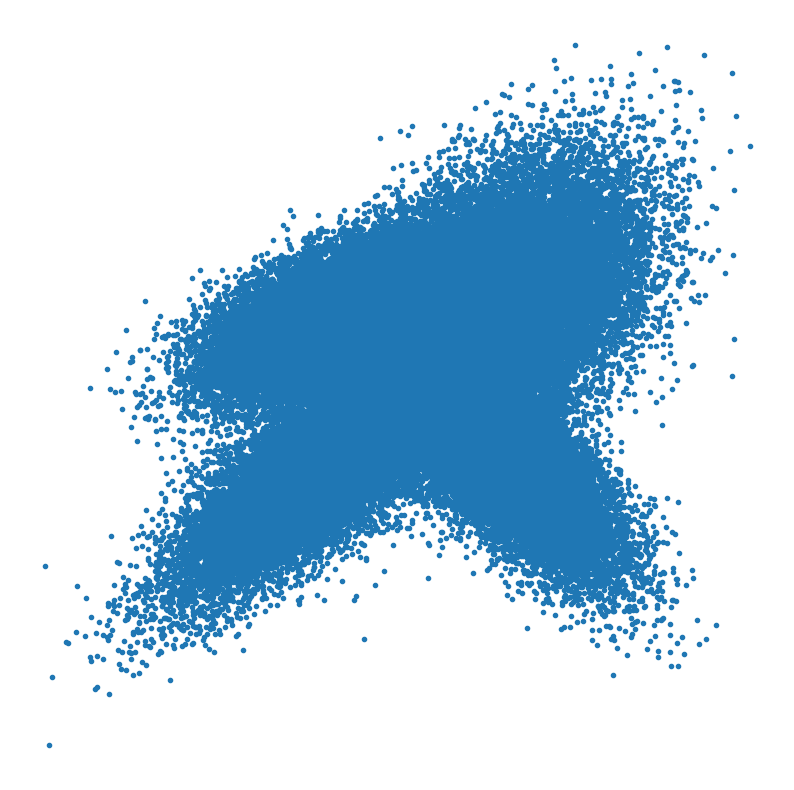

In [2]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10)
plt.scatter(X[:,0], X[:,1], marker='.')
plt.axis('off')
plt.show()

In [3]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr == None:
        distances = [dist(v,p) for v in X]
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist(v,xr) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi]+dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean([dist(x,cen) for x in c], axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

In [4]:
# Vanilla MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
#plot_results(clusters)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

  0%|                                                                             | 5/100000 [00:00<2:02:53, 13.56it/s]

  0%|                                                                            | 10/100000 [00:00<1:22:54, 20.10it/s]

  0%|                                                                            | 15/100000 [00:00<1:38:18, 16.95it/s]

  0%|                                                                            | 20/100000 [00:01<1:26:09, 19.34it/s]

  0%|                                                                            | 25/100000 [00:01<1:36:24, 17.28it/s]

  0%|                                                                            | 30/100000 [00:01<1:24:01, 19.83it/s]

  0%|                                                                            | 35/100000 [00:01<1:32:06, 18.09it/s]

  0%|                                                                            | 40/100000 [00:02<1:20:09, 20.78it/s]

  0%|                                                                            | 45/100000 [00:02<1:31:06, 18.28it/s]

  0%|                                                                            | 50/100000 [00:02<1:20:30, 20.69it/s]

  0%|                                                                            | 55/100000 [00:02<1:32:10, 18.07it/s]

  0%|                                                                            | 60/100000 [00:03<1:22:19, 20.23it/s]

  0%|                                                                            | 65/100000 [00:03<1:30:24, 18.42it/s]

  0%|                                                                            | 70/100000 [00:03<1:19:10, 21.03it/s]

  0%|                                                                            | 75/100000 [00:03<1:27:35, 19.01it/s]

  0%|                                                                            | 80/100000 [00:04<1:17:23, 21.52it/s]

  0%|                                                                            | 85/100000 [00:04<1:26:43, 19.20it/s]

  0%|                                                                            | 90/100000 [00:04<1:17:00, 21.62it/s]

  0%|                                                                            | 95/100000 [00:04<1:27:34, 19.01it/s]

  0%|                                                                           | 100/100000 [00:05<1:17:59, 21.35it/s]

  0%|                                                                           | 105/100000 [00:05<1:27:09, 19.10it/s]

  0%|                                                                           | 110/100000 [00:05<1:35:23, 17.45it/s]

  0%|                                                                           | 115/100000 [00:06<2:41:18, 10.32it/s]

  0%|                                                                           | 120/100000 [00:07<2:39:37, 10.43it/s]

  0%|                                                                           | 125/100000 [00:08<3:26:30,  8.06it/s]

  0%|                                                                           | 130/100000 [00:08<3:11:30,  8.69it/s]

  0%|                                                                           | 135/100000 [00:09<3:48:11,  7.29it/s]

  0%|                                                                           | 140/100000 [00:10<3:26:51,  8.05it/s]

  0%|                                                                           | 145/100000 [00:10<3:58:40,  6.97it/s]

  0%|                                                                           | 150/100000 [00:11<3:33:41,  7.79it/s]

  0%|                                                                           | 155/100000 [00:12<4:03:11,  6.84it/s]

  0%|                                                                           | 160/100000 [00:12<3:37:17,  7.66it/s]

  0%|                                                                           | 165/100000 [00:13<4:05:45,  6.77it/s]

  0%|▏                                                                          | 170/100000 [00:14<3:39:05,  7.59it/s]

  0%|▏                                                                          | 175/100000 [00:15<4:07:10,  6.73it/s]

  0%|▏                                                                          | 180/100000 [00:15<3:39:53,  7.57it/s]

  0%|▏                                                                          | 185/100000 [00:16<4:09:59,  6.65it/s]

  0%|▏                                                                          | 190/100000 [00:17<3:41:51,  7.50it/s]

  0%|▏                                                                          | 195/100000 [00:18<4:09:29,  6.67it/s]

  0%|▏                                                                          | 200/100000 [00:18<3:40:56,  7.53it/s]

  0%|▏                                                                          | 205/100000 [00:19<4:08:53,  6.68it/s]

  0%|▏                                                                          | 210/100000 [00:19<3:41:05,  7.52it/s]

  0%|▏                                                                          | 215/100000 [00:20<4:08:18,  6.70it/s]

  0%|▏                                                                          | 220/100000 [00:21<3:40:32,  7.54it/s]

  0%|▏                                                                          | 225/100000 [00:22<4:08:14,  6.70it/s]

  0%|▏                                                                          | 230/100000 [00:22<3:40:48,  7.53it/s]

  0%|▏                                                                          | 235/100000 [00:23<4:08:29,  6.69it/s]

  0%|▏                                                                          | 240/100000 [00:24<3:41:17,  7.51it/s]

  0%|▏                                                                          | 245/100000 [00:25<4:10:10,  6.65it/s]

  0%|▏                                                                          | 250/100000 [00:25<3:42:26,  7.47it/s]

  0%|▏                                                                          | 255/100000 [00:26<4:09:17,  6.67it/s]

  0%|▏                                                                          | 260/100000 [00:26<3:41:34,  7.50it/s]

  0%|▏                                                                          | 265/100000 [00:27<4:10:06,  6.65it/s]

  0%|▏                                                                          | 270/100000 [00:28<3:41:55,  7.49it/s]

  0%|▏                                                                          | 275/100000 [00:29<4:09:04,  6.67it/s]

  0%|▏                                                                          | 280/100000 [00:29<3:41:19,  7.51it/s]

  0%|▏                                                                          | 285/100000 [00:30<4:09:17,  6.67it/s]

  0%|▏                                                                          | 290/100000 [00:31<3:41:39,  7.50it/s]

  0%|▏                                                                          | 295/100000 [00:32<4:09:21,  6.66it/s]

  0%|▏                                                                          | 300/100000 [00:32<3:41:23,  7.51it/s]

  0%|▏                                                                          | 305/100000 [00:33<4:08:46,  6.68it/s]

  0%|▏                                                                          | 310/100000 [00:34<3:40:58,  7.52it/s]

  0%|▏                                                                          | 315/100000 [00:35<4:08:28,  6.69it/s]

  0%|▏                                                                          | 320/100000 [00:35<3:40:58,  7.52it/s]

  0%|▏                                                                          | 325/100000 [00:36<4:07:52,  6.70it/s]

  0%|▏                                                                          | 330/100000 [00:36<3:40:31,  7.53it/s]

  0%|▎                                                                          | 335/100000 [00:37<4:07:48,  6.70it/s]

  0%|▎                                                                          | 340/100000 [00:38<3:40:18,  7.54it/s]

  0%|▎                                                                          | 345/100000 [00:39<4:07:52,  6.70it/s]

  0%|▎                                                                          | 350/100000 [00:39<3:40:06,  7.55it/s]

  0%|▎                                                                          | 355/100000 [00:40<4:07:39,  6.71it/s]

  0%|▎                                                                          | 360/100000 [00:41<3:40:19,  7.54it/s]

  0%|▎                                                                          | 365/100000 [00:42<4:07:52,  6.70it/s]

  0%|▎                                                                          | 370/100000 [00:42<3:40:15,  7.54it/s]

  0%|▎                                                                          | 375/100000 [00:43<4:08:07,  6.69it/s]

  0%|▎                                                                          | 380/100000 [00:43<3:40:55,  7.52it/s]

  0%|▎                                                                          | 385/100000 [00:44<4:07:58,  6.70it/s]

  0%|▎                                                                          | 390/100000 [00:45<3:40:06,  7.54it/s]

  0%|▎                                                                          | 395/100000 [00:46<4:07:28,  6.71it/s]

  0%|▎                                                                          | 400/100000 [00:46<3:40:33,  7.53it/s]

  0%|▎                                                                          | 405/100000 [00:47<4:07:56,  6.69it/s]

  0%|▎                                                                          | 410/100000 [00:48<3:40:11,  7.54it/s]

  0%|▎                                                                          | 415/100000 [00:49<4:07:19,  6.71it/s]

  0%|▎                                                                          | 420/100000 [00:49<3:39:45,  7.55it/s]

  0%|▎                                                                          | 425/100000 [00:50<4:06:43,  6.73it/s]

  0%|▎                                                                          | 430/100000 [00:50<3:39:59,  7.54it/s]

  0%|▎                                                                          | 435/100000 [00:51<4:07:26,  6.71it/s]

  0%|▎                                                                          | 440/100000 [00:52<3:39:39,  7.55it/s]

  0%|▎                                                                          | 445/100000 [00:53<4:07:16,  6.71it/s]

  0%|▎                                                                          | 450/100000 [00:53<3:39:24,  7.56it/s]

  0%|▎                                                                          | 455/100000 [00:54<4:06:43,  6.72it/s]

  0%|▎                                                                          | 460/100000 [00:55<3:39:13,  7.57it/s]

  0%|▎                                                                          | 465/100000 [00:56<4:06:29,  6.73it/s]

  0%|▎                                                                          | 470/100000 [00:56<3:38:55,  7.58it/s]

  0%|▎                                                                          | 475/100000 [00:57<4:09:48,  6.64it/s]

  0%|▎                                                                          | 480/100000 [00:58<3:41:15,  7.50it/s]

  0%|▎                                                                          | 485/100000 [00:58<4:08:01,  6.69it/s]

  0%|▎                                                                          | 490/100000 [00:59<3:40:00,  7.54it/s]

  0%|▎                                                                          | 495/100000 [01:00<4:08:44,  6.67it/s]

  0%|▍                                                                          | 500/100000 [01:00<3:40:46,  7.51it/s]

  1%|▍                                                                          | 505/100000 [01:01<4:08:06,  6.68it/s]

  1%|▍                                                                          | 510/100000 [01:02<3:40:09,  7.53it/s]

  1%|▍                                                                          | 515/100000 [01:03<4:07:32,  6.70it/s]

  1%|▍                                                                          | 520/100000 [01:03<3:39:36,  7.55it/s]

  1%|▍                                                                          | 525/100000 [01:04<4:06:53,  6.72it/s]

  1%|▍                                                                          | 530/100000 [01:05<3:39:44,  7.54it/s]

  1%|▍                                                                          | 535/100000 [01:06<4:07:31,  6.70it/s]

  1%|▍                                                                          | 540/100000 [01:06<3:39:36,  7.55it/s]

  1%|▍                                                                          | 545/100000 [01:07<4:06:54,  6.71it/s]

  1%|▍                                                                          | 550/100000 [01:07<3:39:44,  7.54it/s]

  1%|▍                                                                          | 555/100000 [01:08<4:08:17,  6.68it/s]

  1%|▍                                                                          | 560/100000 [01:09<3:40:48,  7.51it/s]

  1%|▍                                                                          | 565/100000 [01:10<4:07:45,  6.69it/s]

  1%|▍                                                                          | 570/100000 [01:10<3:39:58,  7.53it/s]

  1%|▍                                                                          | 575/100000 [01:11<4:08:16,  6.67it/s]

  1%|▍                                                                          | 580/100000 [01:12<3:40:52,  7.50it/s]

  1%|▍                                                                          | 585/100000 [01:13<4:09:16,  6.65it/s]

  1%|▍                                                                          | 590/100000 [01:13<3:41:29,  7.48it/s]

  1%|▍                                                                          | 595/100000 [01:14<4:10:00,  6.63it/s]

  1%|▍                                                                          | 600/100000 [01:14<3:41:42,  7.47it/s]

  1%|▍                                                                          | 605/100000 [01:15<4:08:06,  6.68it/s]

  1%|▍                                                                          | 610/100000 [01:16<3:40:40,  7.51it/s]

  1%|▍                                                                          | 615/100000 [01:17<4:08:17,  6.67it/s]

  1%|▍                                                                          | 620/100000 [01:17<3:40:26,  7.51it/s]

  1%|▍                                                                          | 625/100000 [01:18<4:08:32,  6.66it/s]

  1%|▍                                                                          | 630/100000 [01:19<3:40:53,  7.50it/s]

  1%|▍                                                                          | 635/100000 [01:20<4:08:16,  6.67it/s]

  1%|▍                                                                          | 640/100000 [01:20<3:40:28,  7.51it/s]

  1%|▍                                                                          | 645/100000 [01:21<4:08:24,  6.67it/s]

  1%|▍                                                                          | 650/100000 [01:22<3:40:14,  7.52it/s]

  1%|▍                                                                          | 655/100000 [01:23<4:08:13,  6.67it/s]

  1%|▍                                                                          | 660/100000 [01:23<3:39:44,  7.53it/s]

  1%|▍                                                                          | 665/100000 [01:24<4:06:37,  6.71it/s]

  1%|▌                                                                          | 670/100000 [01:24<3:39:54,  7.53it/s]

  1%|▌                                                                          | 675/100000 [01:25<4:07:31,  6.69it/s]

  1%|▌                                                                          | 680/100000 [01:26<3:39:49,  7.53it/s]

  1%|▌                                                                          | 685/100000 [01:27<4:07:07,  6.70it/s]

  1%|▌                                                                          | 690/100000 [01:27<3:39:27,  7.54it/s]

  1%|▌                                                                          | 695/100000 [01:28<4:07:00,  6.70it/s]

  1%|▌                                                                          | 700/100000 [01:29<3:39:56,  7.52it/s]

  1%|▌                                                                          | 705/100000 [01:30<4:08:20,  6.66it/s]

  1%|▌                                                                          | 710/100000 [01:30<3:40:04,  7.52it/s]

  1%|▌                                                                          | 715/100000 [01:31<4:07:11,  6.69it/s]

  1%|▌                                                                          | 720/100000 [01:31<3:39:19,  7.54it/s]

  1%|▌                                                                          | 725/100000 [01:32<4:06:33,  6.71it/s]

  1%|▌                                                                          | 730/100000 [01:33<3:38:54,  7.56it/s]

  1%|▌                                                                          | 735/100000 [01:34<4:06:22,  6.71it/s]

  1%|▌                                                                          | 740/100000 [01:34<3:39:00,  7.55it/s]

  1%|▌                                                                          | 745/100000 [01:35<4:06:53,  6.70it/s]

  1%|▌                                                                          | 750/100000 [01:36<3:39:07,  7.55it/s]

  1%|▌                                                                          | 755/100000 [01:37<4:05:58,  6.72it/s]

  1%|▌                                                                          | 760/100000 [01:37<3:38:27,  7.57it/s]

  1%|▌                                                                          | 765/100000 [01:38<4:05:27,  6.74it/s]

  1%|▌                                                                          | 770/100000 [01:38<3:38:12,  7.58it/s]

  1%|▌                                                                          | 775/100000 [01:39<4:05:58,  6.72it/s]

  1%|▌                                                                          | 780/100000 [01:40<3:41:47,  7.46it/s]

  1%|▌                                                                          | 785/100000 [01:41<4:07:50,  6.67it/s]

  1%|▌                                                                          | 790/100000 [01:41<3:39:59,  7.52it/s]

  1%|▌                                                                          | 795/100000 [01:42<4:07:04,  6.69it/s]

  1%|▌                                                                          | 800/100000 [01:43<3:39:24,  7.54it/s]

  1%|▌                                                                          | 805/100000 [01:44<4:06:42,  6.70it/s]

  1%|▌                                                                          | 810/100000 [01:44<3:39:23,  7.54it/s]

  1%|▌                                                                          | 815/100000 [01:45<4:06:13,  6.71it/s]

  1%|▌                                                                          | 820/100000 [01:46<3:38:29,  7.57it/s]

  1%|▌                                                                          | 825/100000 [01:46<4:05:29,  6.73it/s]

  1%|▌                                                                          | 830/100000 [01:47<3:38:06,  7.58it/s]

  1%|▋                                                                          | 835/100000 [01:48<4:05:59,  6.72it/s]

  1%|▋                                                                          | 840/100000 [01:48<3:38:16,  7.57it/s]

  1%|▋                                                                          | 845/100000 [01:49<4:07:19,  6.68it/s]

  1%|▋                                                                          | 850/100000 [01:50<3:40:24,  7.50it/s]

  1%|▋                                                                          | 855/100000 [01:51<4:09:15,  6.63it/s]

  1%|▋                                                                          | 860/100000 [01:51<3:40:46,  7.48it/s]

  1%|▋                                                                          | 865/100000 [01:52<4:07:16,  6.68it/s]

  1%|▋                                                                          | 870/100000 [01:53<3:39:45,  7.52it/s]

  1%|▋                                                                          | 875/100000 [01:54<4:07:11,  6.68it/s]

  1%|▋                                                                          | 880/100000 [01:54<3:39:15,  7.53it/s]

  1%|▋                                                                          | 885/100000 [01:55<4:06:00,  6.71it/s]

  1%|▋                                                                          | 890/100000 [01:55<3:38:50,  7.55it/s]

  1%|▋                                                                          | 895/100000 [01:56<4:06:15,  6.71it/s]

  1%|▋                                                                          | 900/100000 [01:57<3:38:24,  7.56it/s]

  1%|▋                                                                          | 905/100000 [01:58<4:05:42,  6.72it/s]

  1%|▋                                                                          | 910/100000 [01:58<3:38:17,  7.57it/s]

  1%|▋                                                                          | 915/100000 [01:59<4:05:20,  6.73it/s]

  1%|▋                                                                          | 920/100000 [02:00<3:38:46,  7.55it/s]

  1%|▋                                                                          | 925/100000 [02:01<4:05:59,  6.71it/s]

  1%|▋                                                                          | 930/100000 [02:01<3:38:26,  7.56it/s]

  1%|▋                                                                          | 935/100000 [02:02<4:07:16,  6.68it/s]

  1%|▋                                                                          | 940/100000 [02:02<3:39:31,  7.52it/s]

  1%|▋                                                                          | 945/100000 [02:03<4:06:43,  6.69it/s]

  1%|▋                                                                          | 950/100000 [02:04<3:39:14,  7.53it/s]

  1%|▋                                                                          | 955/100000 [02:05<4:06:28,  6.70it/s]

  1%|▋                                                                          | 960/100000 [02:05<3:38:32,  7.55it/s]

  1%|▋                                                                          | 965/100000 [02:06<4:05:27,  6.72it/s]

  1%|▋                                                                          | 970/100000 [02:07<3:37:48,  7.58it/s]

  1%|▋                                                                          | 975/100000 [02:08<4:06:02,  6.71it/s]

  1%|▋                                                                          | 980/100000 [02:08<3:38:56,  7.54it/s]

  1%|▋                                                                          | 985/100000 [02:09<4:06:14,  6.70it/s]

  1%|▋                                                                          | 990/100000 [02:09<3:38:15,  7.56it/s]

  1%|▋                                                                          | 995/100000 [02:10<4:05:16,  6.73it/s]

  1%|▋                                                                         | 1000/100000 [02:11<3:37:45,  7.58it/s]

  1%|▋                                                                         | 1005/100000 [02:12<4:05:39,  6.72it/s]

  1%|▋                                                                         | 1010/100000 [02:12<3:38:37,  7.55it/s]

  1%|▊                                                                         | 1015/100000 [02:13<4:05:52,  6.71it/s]

  1%|▊                                                                         | 1020/100000 [02:14<3:38:12,  7.56it/s]

  1%|▊                                                                         | 1025/100000 [02:15<4:05:54,  6.71it/s]

  1%|▊                                                                         | 1030/100000 [02:15<3:38:22,  7.55it/s]

  1%|▊                                                                         | 1035/100000 [02:16<4:05:12,  6.73it/s]

  1%|▊                                                                         | 1040/100000 [02:16<3:37:51,  7.57it/s]

  1%|▊                                                                         | 1045/100000 [02:17<4:06:55,  6.68it/s]

  1%|▊                                                                         | 1050/100000 [02:18<3:38:55,  7.53it/s]

  1%|▊                                                                         | 1055/100000 [02:19<4:08:40,  6.63it/s]

  1%|▊                                                                         | 1060/100000 [02:19<3:40:15,  7.49it/s]

  1%|▊                                                                         | 1065/100000 [02:20<4:07:57,  6.65it/s]

  1%|▊                                                                         | 1070/100000 [02:21<3:39:56,  7.50it/s]

  1%|▊                                                                         | 1075/100000 [02:22<4:06:21,  6.69it/s]

  1%|▊                                                                         | 1080/100000 [02:22<3:39:06,  7.52it/s]

  1%|▊                                                                         | 1085/100000 [02:23<4:05:53,  6.70it/s]

  1%|▊                                                                         | 1090/100000 [02:24<3:38:14,  7.55it/s]

  1%|▊                                                                         | 1095/100000 [02:25<4:05:25,  6.72it/s]

  1%|▊                                                                         | 1100/100000 [02:25<3:37:55,  7.56it/s]

  1%|▊                                                                         | 1105/100000 [02:26<4:04:31,  6.74it/s]

  1%|▊                                                                         | 1110/100000 [02:26<3:37:10,  7.59it/s]

  1%|▊                                                                         | 1115/100000 [02:27<4:03:49,  6.76it/s]

  1%|▊                                                                         | 1120/100000 [02:28<3:36:47,  7.60it/s]

  1%|▊                                                                         | 1125/100000 [02:29<4:04:00,  6.75it/s]

  1%|▊                                                                         | 1130/100000 [02:29<3:37:30,  7.58it/s]

  1%|▊                                                                         | 1135/100000 [02:30<4:04:31,  6.74it/s]

  1%|▊                                                                         | 1140/100000 [02:31<3:37:38,  7.57it/s]

  1%|▊                                                                         | 1145/100000 [02:32<4:05:15,  6.72it/s]

  1%|▊                                                                         | 1150/100000 [02:32<3:37:57,  7.56it/s]

  1%|▊                                                                         | 1155/100000 [02:33<4:06:53,  6.67it/s]

  1%|▊                                                                         | 1160/100000 [02:33<3:38:29,  7.54it/s]

  1%|▊                                                                         | 1165/100000 [02:34<4:05:08,  6.72it/s]

  1%|▊                                                                         | 1170/100000 [02:35<3:37:40,  7.57it/s]

  1%|▊                                                                         | 1175/100000 [02:36<4:05:30,  6.71it/s]

  1%|▊                                                                         | 1180/100000 [02:36<3:38:02,  7.55it/s]

  1%|▉                                                                         | 1185/100000 [02:37<4:05:29,  6.71it/s]

  1%|▉                                                                         | 1190/100000 [02:38<3:37:58,  7.56it/s]

  1%|▉                                                                         | 1195/100000 [02:39<4:04:00,  6.75it/s]

  1%|▉                                                                         | 1200/100000 [02:39<3:37:00,  7.59it/s]

  1%|▉                                                                         | 1205/100000 [02:40<4:04:19,  6.74it/s]

  1%|▉                                                                         | 1210/100000 [02:40<3:37:27,  7.57it/s]

  1%|▉                                                                         | 1215/100000 [02:41<4:04:35,  6.73it/s]

  1%|▉                                                                         | 1220/100000 [02:42<3:37:18,  7.58it/s]

  1%|▉                                                                         | 1225/100000 [02:43<4:04:30,  6.73it/s]

  1%|▉                                                                         | 1230/100000 [02:43<3:37:09,  7.58it/s]

  1%|▉                                                                         | 1235/100000 [02:44<4:05:05,  6.72it/s]

  1%|▉                                                                         | 1240/100000 [02:45<3:37:33,  7.57it/s]

  1%|▉                                                                         | 1245/100000 [02:46<4:04:45,  6.72it/s]

  1%|▉                                                                         | 1250/100000 [02:46<3:37:16,  7.57it/s]

  1%|▉                                                                         | 1255/100000 [02:47<4:04:03,  6.74it/s]

  1%|▉                                                                         | 1260/100000 [02:47<3:36:38,  7.60it/s]

  1%|▉                                                                         | 1265/100000 [02:48<4:02:56,  6.77it/s]

  1%|▉                                                                         | 1270/100000 [02:49<3:36:36,  7.60it/s]

  1%|▉                                                                         | 1275/100000 [02:50<4:03:21,  6.76it/s]

  1%|▉                                                                         | 1280/100000 [02:50<3:36:10,  7.61it/s]

  1%|▉                                                                         | 1285/100000 [02:51<4:02:56,  6.77it/s]

  1%|▉                                                                         | 1290/100000 [02:52<3:36:06,  7.61it/s]

  1%|▉                                                                         | 1295/100000 [02:53<4:02:58,  6.77it/s]

  1%|▉                                                                         | 1300/100000 [02:53<3:35:59,  7.62it/s]

  1%|▉                                                                         | 1305/100000 [02:54<4:03:27,  6.76it/s]

  1%|▉                                                                         | 1310/100000 [02:54<3:36:36,  7.59it/s]

  1%|▉                                                                         | 1315/100000 [02:55<4:03:09,  6.76it/s]

  1%|▉                                                                         | 1320/100000 [02:56<3:36:49,  7.59it/s]

  1%|▉                                                                         | 1325/100000 [02:57<4:03:19,  6.76it/s]

  1%|▉                                                                         | 1330/100000 [02:57<3:36:01,  7.61it/s]

  1%|▉                                                                         | 1335/100000 [02:58<4:03:34,  6.75it/s]

  1%|▉                                                                         | 1340/100000 [02:59<3:36:45,  7.59it/s]

  1%|▉                                                                         | 1345/100000 [03:00<4:03:14,  6.76it/s]

  1%|▉                                                                         | 1350/100000 [03:00<3:35:36,  7.63it/s]

  1%|█                                                                         | 1355/100000 [03:01<4:02:28,  6.78it/s]

  1%|█                                                                         | 1360/100000 [03:01<3:38:41,  7.52it/s]

  1%|█                                                                         | 1365/100000 [03:02<4:05:52,  6.69it/s]

  1%|█                                                                         | 1370/100000 [03:03<3:38:25,  7.53it/s]

  1%|█                                                                         | 1375/100000 [03:04<4:04:22,  6.73it/s]

  1%|█                                                                         | 1380/100000 [03:04<3:36:34,  7.59it/s]

  1%|█                                                                         | 1385/100000 [03:05<4:02:45,  6.77it/s]

  1%|█                                                                         | 1390/100000 [03:06<3:36:10,  7.60it/s]

  1%|█                                                                         | 1395/100000 [03:07<4:02:38,  6.77it/s]

  1%|█                                                                         | 1400/100000 [03:07<3:35:18,  7.63it/s]

  1%|█                                                                         | 1405/100000 [03:08<4:03:26,  6.75it/s]

  1%|█                                                                         | 1410/100000 [03:08<3:36:30,  7.59it/s]

  1%|█                                                                         | 1415/100000 [03:09<4:03:18,  6.75it/s]

  1%|█                                                                         | 1420/100000 [03:10<3:36:06,  7.60it/s]

  1%|█                                                                         | 1425/100000 [03:11<4:03:11,  6.76it/s]

  1%|█                                                                         | 1430/100000 [03:11<3:35:34,  7.62it/s]

  1%|█                                                                         | 1435/100000 [03:12<4:01:52,  6.79it/s]

  1%|█                                                                         | 1440/100000 [03:13<3:35:12,  7.63it/s]

  1%|█                                                                         | 1445/100000 [03:14<4:04:20,  6.72it/s]

  1%|█                                                                         | 1450/100000 [03:14<3:37:24,  7.56it/s]

  1%|█                                                                         | 1455/100000 [03:15<4:05:05,  6.70it/s]

  1%|█                                                                         | 1460/100000 [03:15<3:37:51,  7.54it/s]

  1%|█                                                                         | 1465/100000 [03:16<4:04:29,  6.72it/s]

  1%|█                                                                         | 1470/100000 [03:17<3:36:40,  7.58it/s]

  1%|█                                                                         | 1475/100000 [03:18<4:03:19,  6.75it/s]

  1%|█                                                                         | 1480/100000 [03:18<3:35:50,  7.61it/s]

  1%|█                                                                         | 1485/100000 [03:19<4:04:32,  6.71it/s]

  1%|█                                                                         | 1490/100000 [03:20<3:36:47,  7.57it/s]

  1%|█                                                                         | 1495/100000 [03:21<4:03:19,  6.75it/s]

  2%|█                                                                         | 1500/100000 [03:21<3:36:02,  7.60it/s]

  2%|█                                                                         | 1505/100000 [03:22<4:03:00,  6.76it/s]

  2%|█                                                                         | 1510/100000 [03:22<3:35:44,  7.61it/s]

  2%|█                                                                         | 1515/100000 [03:23<4:03:10,  6.75it/s]

  2%|█                                                                         | 1520/100000 [03:24<3:36:12,  7.59it/s]

  2%|█▏                                                                        | 1525/100000 [03:25<4:03:19,  6.75it/s]

  2%|█▏                                                                        | 1530/100000 [03:25<3:35:58,  7.60it/s]

  2%|█▏                                                                        | 1535/100000 [03:26<4:02:47,  6.76it/s]

  2%|█▏                                                                        | 1540/100000 [03:27<3:35:45,  7.61it/s]

  2%|█▏                                                                        | 1545/100000 [03:28<4:02:14,  6.77it/s]

  2%|█▏                                                                        | 1550/100000 [03:28<3:35:54,  7.60it/s]

  2%|█▏                                                                        | 1555/100000 [03:29<4:02:56,  6.75it/s]

  2%|█▏                                                                        | 1560/100000 [03:29<3:35:07,  7.63it/s]

  2%|█▏                                                                        | 1565/100000 [03:30<4:01:26,  6.79it/s]

  2%|█▏                                                                        | 1570/100000 [03:31<3:34:16,  7.66it/s]

  2%|█▏                                                                        | 1575/100000 [03:32<4:00:41,  6.82it/s]

  2%|█▏                                                                        | 1580/100000 [03:32<3:34:06,  7.66it/s]

  2%|█▏                                                                        | 1585/100000 [03:33<4:01:08,  6.80it/s]

  2%|█▏                                                                        | 1590/100000 [03:34<3:34:21,  7.65it/s]

  2%|█▏                                                                        | 1595/100000 [03:34<4:00:54,  6.81it/s]

  2%|█▏                                                                        | 1600/100000 [03:35<3:34:06,  7.66it/s]

  2%|█▏                                                                        | 1605/100000 [03:36<4:01:35,  6.79it/s]

  2%|█▏                                                                        | 1610/100000 [03:36<3:34:48,  7.63it/s]

  2%|█▏                                                                        | 1615/100000 [03:37<4:01:51,  6.78it/s]

  2%|█▏                                                                        | 1620/100000 [03:38<3:36:12,  7.58it/s]

  2%|█▏                                                                        | 1625/100000 [03:39<4:03:19,  6.74it/s]

  2%|█▏                                                                        | 1630/100000 [03:39<3:36:00,  7.59it/s]

  2%|█▏                                                                        | 1635/100000 [03:40<4:03:04,  6.74it/s]

  2%|█▏                                                                        | 1640/100000 [03:41<3:35:22,  7.61it/s]

  2%|█▏                                                                        | 1645/100000 [03:41<4:01:50,  6.78it/s]

  2%|█▏                                                                        | 1650/100000 [03:42<3:34:42,  7.63it/s]

  2%|█▏                                                                        | 1655/100000 [03:43<4:01:49,  6.78it/s]

  2%|█▏                                                                        | 1660/100000 [03:43<3:37:55,  7.52it/s]

  2%|█▏                                                                        | 1665/100000 [03:44<4:03:17,  6.74it/s]

  2%|█▏                                                                        | 1670/100000 [03:45<3:35:49,  7.59it/s]

  2%|█▏                                                                        | 1675/100000 [03:46<4:02:21,  6.76it/s]

  2%|█▏                                                                        | 1680/100000 [03:46<3:35:03,  7.62it/s]

  2%|█▏                                                                        | 1685/100000 [03:47<4:01:42,  6.78it/s]

  2%|█▎                                                                        | 1690/100000 [03:48<3:35:09,  7.62it/s]

  2%|█▎                                                                        | 1695/100000 [03:48<4:01:44,  6.78it/s]

  2%|█▎                                                                        | 1700/100000 [03:49<3:34:50,  7.63it/s]

  2%|█▎                                                                        | 1705/100000 [03:50<4:01:37,  6.78it/s]

  2%|█▎                                                                        | 1710/100000 [03:50<3:34:35,  7.63it/s]

  2%|█▎                                                                        | 1715/100000 [03:51<4:02:03,  6.77it/s]

  2%|█▎                                                                        | 1720/100000 [03:52<3:34:59,  7.62it/s]

  2%|█▎                                                                        | 1725/100000 [03:53<4:02:31,  6.75it/s]

  2%|█▎                                                                        | 1730/100000 [03:53<3:35:06,  7.61it/s]

  2%|█▎                                                                        | 1735/100000 [03:54<4:02:33,  6.75it/s]

  2%|█▎                                                                        | 1740/100000 [03:54<3:34:59,  7.62it/s]

  2%|█▎                                                                        | 1745/100000 [03:55<4:02:10,  6.76it/s]

  2%|█▎                                                                        | 1750/100000 [03:56<3:34:46,  7.62it/s]

  2%|█▎                                                                        | 1755/100000 [03:57<4:01:03,  6.79it/s]

  2%|█▎                                                                        | 1760/100000 [03:57<3:34:44,  7.62it/s]

  2%|█▎                                                                        | 1765/100000 [03:58<4:00:53,  6.80it/s]

  2%|█▎                                                                        | 1770/100000 [03:59<3:34:08,  7.65it/s]

  2%|█▎                                                                        | 1775/100000 [04:00<4:00:39,  6.80it/s]

  2%|█▎                                                                        | 1780/100000 [04:00<3:34:05,  7.65it/s]

  2%|█▎                                                                        | 1785/100000 [04:01<4:01:11,  6.79it/s]

  2%|█▎                                                                        | 1790/100000 [04:01<3:34:13,  7.64it/s]

  2%|█▎                                                                        | 1795/100000 [04:02<4:00:31,  6.81it/s]

  2%|█▎                                                                        | 1800/100000 [04:03<3:33:30,  7.67it/s]

  2%|█▎                                                                        | 1805/100000 [04:04<4:00:27,  6.81it/s]

  2%|█▎                                                                        | 1810/100000 [04:04<3:34:08,  7.64it/s]

  2%|█▎                                                                        | 1815/100000 [04:05<4:01:18,  6.78it/s]

  2%|█▎                                                                        | 1820/100000 [04:06<3:33:55,  7.65it/s]

  2%|█▎                                                                        | 1825/100000 [04:07<4:01:09,  6.79it/s]

  2%|█▎                                                                        | 1830/100000 [04:07<3:34:19,  7.63it/s]

  2%|█▎                                                                        | 1835/100000 [04:08<4:00:54,  6.79it/s]

  2%|█▎                                                                        | 1840/100000 [04:08<3:34:31,  7.63it/s]

  2%|█▎                                                                        | 1845/100000 [04:09<4:00:45,  6.79it/s]

  2%|█▎                                                                        | 1850/100000 [04:10<3:34:32,  7.63it/s]

  2%|█▎                                                                        | 1855/100000 [04:11<4:01:01,  6.79it/s]

  2%|█▍                                                                        | 1860/100000 [04:11<3:34:04,  7.64it/s]

  2%|█▍                                                                        | 1865/100000 [04:12<4:00:29,  6.80it/s]

  2%|█▍                                                                        | 1870/100000 [04:13<3:34:08,  7.64it/s]

  2%|█▍                                                                        | 1875/100000 [04:13<4:00:41,  6.79it/s]

  2%|█▍                                                                        | 1880/100000 [04:14<3:34:08,  7.64it/s]

  2%|█▍                                                                        | 1885/100000 [04:15<4:00:48,  6.79it/s]

  2%|█▍                                                                        | 1890/100000 [04:15<3:33:27,  7.66it/s]

  2%|█▍                                                                        | 1895/100000 [04:16<4:00:25,  6.80it/s]

  2%|█▍                                                                        | 1900/100000 [04:17<3:33:53,  7.64it/s]

  2%|█▍                                                                        | 1905/100000 [04:18<4:01:05,  6.78it/s]

  2%|█▍                                                                        | 1910/100000 [04:18<3:33:49,  7.65it/s]

  2%|█▍                                                                        | 1915/100000 [04:19<4:00:57,  6.78it/s]

  2%|█▍                                                                        | 1920/100000 [04:20<3:33:35,  7.65it/s]

  2%|█▍                                                                        | 1925/100000 [04:20<4:01:21,  6.77it/s]

  2%|█▍                                                                        | 1930/100000 [04:21<3:34:24,  7.62it/s]

  2%|█▍                                                                        | 1935/100000 [04:22<4:01:53,  6.76it/s]

  2%|█▍                                                                        | 1940/100000 [04:22<3:34:57,  7.60it/s]

  2%|█▍                                                                        | 1945/100000 [04:23<4:05:32,  6.66it/s]

  2%|█▍                                                                        | 1950/100000 [04:24<3:37:34,  7.51it/s]

  2%|█▍                                                                        | 1955/100000 [04:25<4:03:07,  6.72it/s]

  2%|█▍                                                                        | 1960/100000 [04:25<3:35:24,  7.59it/s]

  2%|█▍                                                                        | 1965/100000 [04:26<4:02:00,  6.75it/s]

  2%|█▍                                                                        | 1970/100000 [04:27<3:34:37,  7.61it/s]

  2%|█▍                                                                        | 1975/100000 [04:27<4:02:03,  6.75it/s]

  2%|█▍                                                                        | 1980/100000 [04:28<3:35:19,  7.59it/s]

  2%|█▍                                                                        | 1985/100000 [04:29<4:03:35,  6.71it/s]

  2%|█▍                                                                        | 1990/100000 [04:29<3:36:23,  7.55it/s]

  2%|█▍                                                                        | 1995/100000 [04:30<4:03:18,  6.71it/s]

  2%|█▍                                                                        | 2000/100000 [04:31<3:35:35,  7.58it/s]

  2%|█▍                                                                        | 2005/100000 [04:32<4:02:08,  6.74it/s]

  2%|█▍                                                                        | 2010/100000 [04:32<3:35:09,  7.59it/s]

  2%|█▍                                                                        | 2015/100000 [04:33<4:00:17,  6.80it/s]

  2%|█▍                                                                        | 2020/100000 [04:34<3:33:57,  7.63it/s]

  2%|█▍                                                                        | 2025/100000 [04:34<4:00:18,  6.79it/s]

  2%|█▌                                                                        | 2030/100000 [04:35<3:33:18,  7.66it/s]

  2%|█▌                                                                        | 2035/100000 [04:36<3:59:55,  6.81it/s]

  2%|█▌                                                                        | 2040/100000 [04:36<3:33:21,  7.65it/s]

  2%|█▌                                                                        | 2045/100000 [04:37<3:59:25,  6.82it/s]

  2%|█▌                                                                        | 2050/100000 [04:38<3:32:54,  7.67it/s]

  2%|█▌                                                                        | 2055/100000 [04:39<4:00:23,  6.79it/s]

  2%|█▌                                                                        | 2060/100000 [04:39<3:34:22,  7.61it/s]

  2%|█▌                                                                        | 2065/100000 [04:40<4:00:56,  6.77it/s]

  2%|█▌                                                                        | 2070/100000 [04:40<3:34:04,  7.62it/s]

  2%|█▌                                                                        | 2075/100000 [04:41<4:02:29,  6.73it/s]

  2%|█▌                                                                        | 2080/100000 [04:42<3:35:12,  7.58it/s]

  2%|█▌                                                                        | 2085/100000 [04:43<4:02:01,  6.74it/s]

  2%|█▌                                                                        | 2090/100000 [04:43<3:34:29,  7.61it/s]

  2%|█▌                                                                        | 2095/100000 [04:44<3:59:54,  6.80it/s]

  2%|█▌                                                                        | 2100/100000 [04:45<3:32:36,  7.67it/s]

  2%|█▌                                                                        | 2105/100000 [04:46<4:50:19,  5.62it/s]

  2%|█▌                                                                        | 2110/100000 [04:47<4:12:02,  6.47it/s]

  2%|█▌                                                                        | 2115/100000 [04:48<4:26:49,  6.11it/s]

  2%|█▌                                                                        | 2120/100000 [04:48<3:51:42,  7.04it/s]

  2%|█▌                                                                        | 2125/100000 [04:49<4:14:12,  6.42it/s]

  2%|█▌                                                                        | 2130/100000 [04:49<3:43:46,  7.29it/s]

  2%|█▌                                                                        | 2135/100000 [04:50<4:06:49,  6.61it/s]

  2%|█▌                                                                        | 2140/100000 [04:51<3:38:10,  7.48it/s]

  2%|█▌                                                                        | 2145/100000 [04:52<4:04:16,  6.68it/s]

  2%|█▌                                                                        | 2150/100000 [04:52<3:37:58,  7.48it/s]

  2%|█▌                                                                        | 2155/100000 [04:53<4:04:37,  6.67it/s]

  2%|█▌                                                                        | 2160/100000 [04:54<3:37:03,  7.51it/s]

  2%|█▌                                                                        | 2165/100000 [04:55<4:02:42,  6.72it/s]

  2%|█▌                                                                        | 2170/100000 [04:55<3:35:17,  7.57it/s]

  2%|█▌                                                                        | 2175/100000 [04:56<4:02:11,  6.73it/s]

  2%|█▌                                                                        | 2180/100000 [04:56<3:34:04,  7.62it/s]

  2%|█▌                                                                        | 2185/100000 [04:57<3:59:13,  6.81it/s]

  2%|█▌                                                                        | 2190/100000 [04:58<3:32:04,  7.69it/s]

  2%|█▌                                                                        | 2195/100000 [04:59<4:00:01,  6.79it/s]

  2%|█▋                                                                        | 2200/100000 [04:59<3:32:41,  7.66it/s]

  2%|█▋                                                                        | 2205/100000 [05:00<3:59:34,  6.80it/s]

  2%|█▋                                                                        | 2210/100000 [05:01<3:32:19,  7.68it/s]

  2%|█▋                                                                        | 2215/100000 [05:01<3:58:49,  6.82it/s]

  2%|█▋                                                                        | 2220/100000 [05:02<3:31:43,  7.70it/s]

  2%|█▋                                                                        | 2225/100000 [05:03<3:57:29,  6.86it/s]

  2%|█▋                                                                        | 2230/100000 [05:03<3:30:46,  7.73it/s]

  2%|█▋                                                                        | 2235/100000 [05:04<3:57:24,  6.86it/s]

  2%|█▋                                                                        | 2240/100000 [05:05<3:30:56,  7.72it/s]

  2%|█▋                                                                        | 2245/100000 [05:06<3:58:52,  6.82it/s]

  2%|█▋                                                                        | 2250/100000 [05:06<3:31:48,  7.69it/s]

  2%|█▋                                                                        | 2255/100000 [05:07<4:01:37,  6.74it/s]

  2%|█▋                                                                        | 2260/100000 [05:07<3:34:16,  7.60it/s]

  2%|█▋                                                                        | 2265/100000 [05:08<4:00:22,  6.78it/s]

  2%|█▋                                                                        | 2270/100000 [05:09<3:33:21,  7.63it/s]

  2%|█▋                                                                        | 2275/100000 [05:10<3:58:54,  6.82it/s]

  2%|█▋                                                                        | 2280/100000 [05:10<3:32:22,  7.67it/s]

  2%|█▋                                                                        | 2285/100000 [05:11<3:58:36,  6.83it/s]

  2%|█▋                                                                        | 2290/100000 [05:12<3:31:56,  7.68it/s]

  2%|█▋                                                                        | 2295/100000 [05:13<3:59:15,  6.81it/s]

  2%|█▋                                                                        | 2300/100000 [05:13<3:32:14,  7.67it/s]

  2%|█▋                                                                        | 2305/100000 [05:14<3:59:00,  6.81it/s]

  2%|█▋                                                                        | 2310/100000 [05:14<3:31:37,  7.69it/s]

  2%|█▋                                                                        | 2315/100000 [05:15<3:57:45,  6.85it/s]

  2%|█▋                                                                        | 2320/100000 [05:16<3:31:42,  7.69it/s]

  2%|█▋                                                                        | 2325/100000 [05:17<3:58:39,  6.82it/s]

  2%|█▋                                                                        | 2330/100000 [05:17<3:32:03,  7.68it/s]

  2%|█▋                                                                        | 2335/100000 [05:18<3:58:43,  6.82it/s]

  2%|█▋                                                                        | 2340/100000 [05:19<3:31:33,  7.69it/s]

  2%|█▋                                                                        | 2345/100000 [05:19<3:57:29,  6.85it/s]

  2%|█▋                                                                        | 2350/100000 [05:20<3:30:46,  7.72it/s]

  2%|█▋                                                                        | 2355/100000 [05:21<3:58:33,  6.82it/s]

  2%|█▋                                                                        | 2360/100000 [05:21<3:31:50,  7.68it/s]

  2%|█▊                                                                        | 2365/100000 [05:22<3:57:54,  6.84it/s]

  2%|█▊                                                                        | 2370/100000 [05:23<3:31:14,  7.70it/s]

  2%|█▊                                                                        | 2375/100000 [05:24<3:56:48,  6.87it/s]

  2%|█▊                                                                        | 2380/100000 [05:24<3:30:20,  7.74it/s]

  2%|█▊                                                                        | 2385/100000 [05:25<3:56:59,  6.86it/s]

  2%|█▊                                                                        | 2390/100000 [05:25<3:30:02,  7.75it/s]

  2%|█▊                                                                        | 2395/100000 [05:26<3:55:53,  6.90it/s]

  2%|█▊                                                                        | 2400/100000 [05:27<3:29:44,  7.76it/s]

  2%|█▊                                                                        | 2405/100000 [05:28<3:55:22,  6.91it/s]

  2%|█▊                                                                        | 2410/100000 [05:28<3:29:07,  7.78it/s]

  2%|█▊                                                                        | 2415/100000 [05:29<3:55:53,  6.89it/s]

  2%|█▊                                                                        | 2420/100000 [05:30<3:29:35,  7.76it/s]

  2%|█▊                                                                        | 2425/100000 [05:30<3:56:11,  6.89it/s]

  2%|█▊                                                                        | 2430/100000 [05:31<3:29:49,  7.75it/s]

  2%|█▊                                                                        | 2435/100000 [05:32<3:57:06,  6.86it/s]

  2%|█▊                                                                        | 2440/100000 [05:32<3:30:47,  7.71it/s]

  2%|█▊                                                                        | 2445/100000 [05:33<3:56:38,  6.87it/s]

  2%|█▊                                                                        | 2450/100000 [05:34<3:30:42,  7.72it/s]

  2%|█▊                                                                        | 2455/100000 [05:35<3:56:47,  6.87it/s]

  2%|█▊                                                                        | 2460/100000 [05:35<3:30:23,  7.73it/s]

  2%|█▊                                                                        | 2465/100000 [05:36<3:56:40,  6.87it/s]

  2%|█▊                                                                        | 2470/100000 [05:36<3:30:18,  7.73it/s]

  2%|█▊                                                                        | 2475/100000 [05:37<3:57:09,  6.85it/s]

  2%|█▊                                                                        | 2480/100000 [05:38<3:30:36,  7.72it/s]

  2%|█▊                                                                        | 2485/100000 [05:39<3:55:38,  6.90it/s]

  2%|█▊                                                                        | 2490/100000 [05:39<3:29:24,  7.76it/s]

  2%|█▊                                                                        | 2495/100000 [05:40<3:56:10,  6.88it/s]

  2%|█▊                                                                        | 2500/100000 [05:41<3:29:50,  7.74it/s]

  3%|█▊                                                                        | 2505/100000 [05:41<3:55:41,  6.89it/s]

  3%|█▊                                                                        | 2510/100000 [05:42<3:29:45,  7.75it/s]

  3%|█▊                                                                        | 2515/100000 [05:43<3:57:05,  6.85it/s]

  3%|█▊                                                                        | 2520/100000 [05:43<3:30:29,  7.72it/s]

  3%|█▊                                                                        | 2525/100000 [05:44<3:56:05,  6.88it/s]

  3%|█▊                                                                        | 2530/100000 [05:45<3:30:07,  7.73it/s]

  3%|█▉                                                                        | 2535/100000 [05:46<3:56:12,  6.88it/s]

  3%|█▉                                                                        | 2540/100000 [05:46<3:29:51,  7.74it/s]

  3%|█▉                                                                        | 2545/100000 [05:47<3:59:15,  6.79it/s]

  3%|█▉                                                                        | 2550/100000 [05:47<3:31:33,  7.68it/s]

  3%|█▉                                                                        | 2555/100000 [05:48<3:57:17,  6.84it/s]

  3%|█▉                                                                        | 2560/100000 [05:49<3:30:32,  7.71it/s]

  3%|█▉                                                                        | 2565/100000 [05:50<3:55:49,  6.89it/s]

  3%|█▉                                                                        | 2570/100000 [05:50<3:29:13,  7.76it/s]

  3%|█▉                                                                        | 2575/100000 [05:51<3:55:44,  6.89it/s]

  3%|█▉                                                                        | 2580/100000 [05:52<3:29:17,  7.76it/s]

  3%|█▉                                                                        | 2585/100000 [05:52<3:54:44,  6.92it/s]

  3%|█▉                                                                        | 2590/100000 [05:53<3:28:45,  7.78it/s]

  3%|█▉                                                                        | 2595/100000 [05:54<3:55:27,  6.89it/s]

  3%|█▉                                                                        | 2600/100000 [05:54<3:29:23,  7.75it/s]

  3%|█▉                                                                        | 2605/100000 [05:55<3:55:44,  6.89it/s]

  3%|█▉                                                                        | 2610/100000 [05:56<3:29:02,  7.76it/s]

  3%|█▉                                                                        | 2615/100000 [05:57<3:56:36,  6.86it/s]

  3%|█▉                                                                        | 2620/100000 [05:57<3:29:58,  7.73it/s]

  3%|█▉                                                                        | 2625/100000 [05:58<3:56:07,  6.87it/s]

  3%|█▉                                                                        | 2630/100000 [05:58<3:29:41,  7.74it/s]

  3%|█▉                                                                        | 2635/100000 [05:59<3:56:14,  6.87it/s]

  3%|█▉                                                                        | 2640/100000 [06:00<3:29:46,  7.74it/s]

  3%|█▉                                                                        | 2645/100000 [06:01<3:57:07,  6.84it/s]

  3%|█▉                                                                        | 2650/100000 [06:01<3:30:09,  7.72it/s]

  3%|█▉                                                                        | 2655/100000 [06:02<3:56:06,  6.87it/s]

  3%|█▉                                                                        | 2660/100000 [06:02<3:29:31,  7.74it/s]

  3%|█▉                                                                        | 2665/100000 [06:03<3:55:49,  6.88it/s]

  3%|█▉                                                                        | 2670/100000 [06:04<3:29:29,  7.74it/s]

  3%|█▉                                                                        | 2675/100000 [06:05<3:56:16,  6.87it/s]

  3%|█▉                                                                        | 2680/100000 [06:05<3:29:51,  7.73it/s]

  3%|█▉                                                                        | 2685/100000 [06:06<3:55:37,  6.88it/s]

  3%|█▉                                                                        | 2690/100000 [06:07<3:29:40,  7.74it/s]

  3%|█▉                                                                        | 2695/100000 [06:08<3:55:41,  6.88it/s]

  3%|█▉                                                                        | 2700/100000 [06:08<3:29:15,  7.75it/s]

  3%|██                                                                        | 2705/100000 [06:09<3:55:32,  6.88it/s]

  3%|██                                                                        | 2710/100000 [06:09<3:29:11,  7.75it/s]

  3%|██                                                                        | 2715/100000 [06:10<3:56:35,  6.85it/s]

  3%|██                                                                        | 2720/100000 [06:11<3:29:55,  7.72it/s]

  3%|██                                                                        | 2725/100000 [06:12<3:56:00,  6.87it/s]

  3%|██                                                                        | 2730/100000 [06:12<3:29:50,  7.73it/s]

  3%|██                                                                        | 2735/100000 [06:13<3:56:19,  6.86it/s]

  3%|██                                                                        | 2740/100000 [06:13<3:29:37,  7.73it/s]

  3%|██                                                                        | 2745/100000 [06:14<3:56:45,  6.85it/s]

  3%|██                                                                        | 2750/100000 [06:15<3:30:13,  7.71it/s]

  3%|██                                                                        | 2755/100000 [06:16<3:56:36,  6.85it/s]

  3%|██                                                                        | 2760/100000 [06:16<3:29:28,  7.74it/s]

  3%|██                                                                        | 2765/100000 [06:17<3:56:10,  6.86it/s]

  3%|██                                                                        | 2770/100000 [06:18<3:29:22,  7.74it/s]

  3%|██                                                                        | 2775/100000 [06:19<3:59:53,  6.75it/s]

  3%|██                                                                        | 2780/100000 [06:19<3:33:32,  7.59it/s]

  3%|██                                                                        | 2785/100000 [06:20<4:00:42,  6.73it/s]

  3%|██                                                                        | 2790/100000 [06:20<3:33:08,  7.60it/s]

  3%|██                                                                        | 2795/100000 [06:21<3:58:08,  6.80it/s]

  3%|██                                                                        | 2800/100000 [06:22<3:31:16,  7.67it/s]

  3%|██                                                                        | 2805/100000 [06:23<3:58:03,  6.80it/s]

  3%|██                                                                        | 2810/100000 [06:23<3:30:38,  7.69it/s]

  3%|██                                                                        | 2815/100000 [06:24<3:57:41,  6.81it/s]

  3%|██                                                                        | 2820/100000 [06:25<3:31:18,  7.66it/s]

  3%|██                                                                        | 2825/100000 [06:25<3:56:52,  6.84it/s]

  3%|██                                                                        | 2830/100000 [06:26<3:30:34,  7.69it/s]

  3%|██                                                                        | 2835/100000 [06:27<4:00:36,  6.73it/s]

  3%|██                                                                        | 2840/100000 [06:27<3:32:41,  7.61it/s]

  3%|██                                                                        | 2845/100000 [06:28<3:58:35,  6.79it/s]

  3%|██                                                                        | 2850/100000 [06:29<3:31:42,  7.65it/s]

  3%|██                                                                        | 2855/100000 [06:30<3:58:55,  6.78it/s]

  3%|██                                                                        | 2860/100000 [06:30<3:31:50,  7.64it/s]

  3%|██                                                                        | 2865/100000 [06:31<3:58:33,  6.79it/s]

  3%|██                                                                        | 2870/100000 [06:32<3:32:17,  7.63it/s]

  3%|██▏                                                                       | 2875/100000 [06:32<3:57:53,  6.80it/s]

  3%|██▏                                                                       | 2880/100000 [06:33<3:30:47,  7.68it/s]

  3%|██▏                                                                       | 2885/100000 [06:34<3:56:20,  6.85it/s]

  3%|██▏                                                                       | 2890/100000 [06:34<3:30:19,  7.70it/s]

  3%|██▏                                                                       | 2895/100000 [06:35<3:57:10,  6.82it/s]

  3%|██▏                                                                       | 2900/100000 [06:36<3:30:52,  7.67it/s]

  3%|██▏                                                                       | 2905/100000 [06:37<3:57:02,  6.83it/s]

  3%|██▏                                                                       | 2910/100000 [06:37<3:30:22,  7.69it/s]

  3%|██▏                                                                       | 2915/100000 [06:38<3:57:01,  6.83it/s]

  3%|██▏                                                                       | 2920/100000 [06:38<3:29:56,  7.71it/s]

  3%|██▏                                                                       | 2925/100000 [06:39<3:56:48,  6.83it/s]

  3%|██▏                                                                       | 2930/100000 [06:40<3:31:03,  7.67it/s]

  3%|██▏                                                                       | 2935/100000 [06:41<3:56:09,  6.85it/s]

  3%|██▏                                                                       | 2940/100000 [06:41<3:30:20,  7.69it/s]

  3%|██▏                                                                       | 2945/100000 [06:42<3:56:53,  6.83it/s]

  3%|██▏                                                                       | 2950/100000 [06:43<3:31:28,  7.65it/s]

  3%|██▏                                                                       | 2955/100000 [06:44<3:56:32,  6.84it/s]

  3%|██▏                                                                       | 2960/100000 [06:44<3:29:51,  7.71it/s]

  3%|██▏                                                                       | 2965/100000 [06:45<3:56:00,  6.85it/s]

  3%|██▏                                                                       | 2970/100000 [06:45<3:29:03,  7.74it/s]

  3%|██▏                                                                       | 2975/100000 [06:46<3:54:26,  6.90it/s]

  3%|██▏                                                                       | 2980/100000 [06:47<3:28:33,  7.75it/s]

  3%|██▏                                                                       | 2985/100000 [06:48<3:55:01,  6.88it/s]

  3%|██▏                                                                       | 2990/100000 [06:48<3:28:21,  7.76it/s]

  3%|██▏                                                                       | 2995/100000 [06:49<3:53:58,  6.91it/s]

  3%|██▏                                                                       | 3000/100000 [06:49<3:27:59,  7.77it/s]

  3%|██▏                                                                       | 3005/100000 [06:50<3:54:19,  6.90it/s]

  3%|██▏                                                                       | 3010/100000 [06:51<3:27:57,  7.77it/s]

  3%|██▏                                                                       | 3015/100000 [06:52<3:53:35,  6.92it/s]

  3%|██▏                                                                       | 3020/100000 [06:52<3:27:36,  7.79it/s]

  3%|██▏                                                                       | 3025/100000 [06:53<3:53:19,  6.93it/s]

  3%|██▏                                                                       | 3030/100000 [06:54<3:27:41,  7.78it/s]

  3%|██▏                                                                       | 3035/100000 [06:54<3:54:04,  6.90it/s]

  3%|██▏                                                                       | 3040/100000 [06:55<3:27:59,  7.77it/s]

  3%|██▎                                                                       | 3045/100000 [06:56<3:56:17,  6.84it/s]

  3%|██▎                                                                       | 3050/100000 [06:56<3:29:03,  7.73it/s]

  3%|██▎                                                                       | 3055/100000 [06:57<3:54:33,  6.89it/s]

  3%|██▎                                                                       | 3060/100000 [06:58<3:27:52,  7.77it/s]

  3%|██▎                                                                       | 3065/100000 [06:59<3:52:56,  6.94it/s]

  3%|██▎                                                                       | 3070/100000 [06:59<3:27:19,  7.79it/s]

  3%|██▎                                                                       | 3075/100000 [07:00<3:52:51,  6.94it/s]

  3%|██▎                                                                       | 3080/100000 [07:00<3:26:54,  7.81it/s]

  3%|██▎                                                                       | 3085/100000 [07:01<3:53:22,  6.92it/s]

  3%|██▎                                                                       | 3090/100000 [07:02<3:27:26,  7.79it/s]

  3%|██▎                                                                       | 3095/100000 [07:03<3:53:18,  6.92it/s]

  3%|██▎                                                                       | 3100/100000 [07:03<3:27:04,  7.80it/s]

  3%|██▎                                                                       | 3105/100000 [07:04<3:54:26,  6.89it/s]

  3%|██▎                                                                       | 3110/100000 [07:04<3:27:58,  7.76it/s]

  3%|██▎                                                                       | 3115/100000 [07:05<3:53:44,  6.91it/s]

  3%|██▎                                                                       | 3120/100000 [07:06<3:27:46,  7.77it/s]

  3%|██▎                                                                       | 3125/100000 [07:07<3:54:15,  6.89it/s]

  3%|██▎                                                                       | 3130/100000 [07:07<3:27:42,  7.77it/s]

  3%|██▎                                                                       | 3135/100000 [07:08<3:54:05,  6.90it/s]

  3%|██▎                                                                       | 3140/100000 [07:09<3:28:41,  7.74it/s]

  3%|██▎                                                                       | 3145/100000 [07:10<3:57:40,  6.79it/s]

  3%|██▎                                                                       | 3150/100000 [07:10<3:30:24,  7.67it/s]

  3%|██▎                                                                       | 3155/100000 [07:11<3:54:52,  6.87it/s]

  3%|██▎                                                                       | 3160/100000 [07:11<3:28:28,  7.74it/s]

  3%|██▎                                                                       | 3165/100000 [07:12<3:54:58,  6.87it/s]

  3%|██▎                                                                       | 3170/100000 [07:13<3:28:00,  7.76it/s]

  3%|██▎                                                                       | 3175/100000 [07:14<3:54:53,  6.87it/s]

  3%|██▎                                                                       | 3180/100000 [07:14<3:28:57,  7.72it/s]

  3%|██▎                                                                       | 3185/100000 [07:15<3:55:51,  6.84it/s]

  3%|██▎                                                                       | 3190/100000 [07:15<3:29:28,  7.70it/s]

  3%|██▎                                                                       | 3195/100000 [07:16<3:54:28,  6.88it/s]

  3%|██▎                                                                       | 3200/100000 [07:17<3:28:06,  7.75it/s]

  3%|██▎                                                                       | 3205/100000 [07:18<3:54:22,  6.88it/s]

  3%|██▍                                                                       | 3210/100000 [07:18<3:28:02,  7.75it/s]

  3%|██▍                                                                       | 3215/100000 [07:19<3:53:28,  6.91it/s]

  3%|██▍                                                                       | 3220/100000 [07:20<3:27:15,  7.78it/s]

  3%|██▍                                                                       | 3225/100000 [07:20<3:53:00,  6.92it/s]

  3%|██▍                                                                       | 3230/100000 [07:21<3:27:11,  7.78it/s]

  3%|██▍                                                                       | 3235/100000 [07:22<3:53:06,  6.92it/s]

  3%|██▍                                                                       | 3240/100000 [07:22<3:27:55,  7.76it/s]

  3%|██▍                                                                       | 3245/100000 [07:23<3:54:29,  6.88it/s]

  3%|██▍                                                                       | 3250/100000 [07:24<3:27:43,  7.76it/s]

  3%|██▍                                                                       | 3255/100000 [07:25<3:54:08,  6.89it/s]

  3%|██▍                                                                       | 3260/100000 [07:25<3:28:04,  7.75it/s]

  3%|██▍                                                                       | 3265/100000 [07:26<3:53:34,  6.90it/s]

  3%|██▍                                                                       | 3270/100000 [07:26<3:27:26,  7.77it/s]

  3%|██▍                                                                       | 3275/100000 [07:27<3:53:30,  6.90it/s]

  3%|██▍                                                                       | 3280/100000 [07:28<3:27:28,  7.77it/s]

  3%|██▍                                                                       | 3285/100000 [07:29<3:52:25,  6.94it/s]

  3%|██▍                                                                       | 3290/100000 [07:29<3:26:13,  7.82it/s]

  3%|██▍                                                                       | 3295/100000 [07:30<3:52:22,  6.94it/s]

  3%|██▍                                                                       | 3300/100000 [07:31<3:27:09,  7.78it/s]

  3%|██▍                                                                       | 3305/100000 [07:31<3:53:31,  6.90it/s]

  3%|██▍                                                                       | 3310/100000 [07:32<3:27:08,  7.78it/s]

  3%|██▍                                                                       | 3315/100000 [07:33<3:52:14,  6.94it/s]

  3%|██▍                                                                       | 3320/100000 [07:33<3:26:14,  7.81it/s]

  3%|██▍                                                                       | 3325/100000 [07:34<3:52:46,  6.92it/s]

  3%|██▍                                                                       | 3330/100000 [07:35<3:27:11,  7.78it/s]

  3%|██▍                                                                       | 3335/100000 [07:36<3:52:25,  6.93it/s]

  3%|██▍                                                                       | 3340/100000 [07:36<3:26:16,  7.81it/s]

  3%|██▍                                                                       | 3345/100000 [07:37<3:52:33,  6.93it/s]

  3%|██▍                                                                       | 3350/100000 [07:37<3:27:28,  7.76it/s]

  3%|██▍                                                                       | 3355/100000 [07:38<3:53:19,  6.90it/s]

  3%|██▍                                                                       | 3360/100000 [07:39<3:27:15,  7.77it/s]

  3%|██▍                                                                       | 3365/100000 [07:40<3:52:46,  6.92it/s]

  3%|██▍                                                                       | 3370/100000 [07:40<3:27:59,  7.74it/s]

  3%|██▍                                                                       | 3375/100000 [07:41<3:52:36,  6.92it/s]

  3%|██▌                                                                       | 3380/100000 [07:41<3:26:20,  7.80it/s]

  3%|██▌                                                                       | 3385/100000 [07:42<3:52:20,  6.93it/s]

  3%|██▌                                                                       | 3390/100000 [07:43<3:26:05,  7.81it/s]

  3%|██▌                                                                       | 3395/100000 [07:44<3:52:11,  6.93it/s]

  3%|██▌                                                                       | 3400/100000 [07:44<3:26:00,  7.82it/s]

  3%|██▌                                                                       | 3405/100000 [07:45<3:52:15,  6.93it/s]

  3%|██▌                                                                       | 3410/100000 [07:46<3:26:32,  7.79it/s]

  3%|██▌                                                                       | 3415/100000 [07:46<3:52:43,  6.92it/s]

  3%|██▌                                                                       | 3420/100000 [07:47<3:26:22,  7.80it/s]

  3%|██▌                                                                       | 3425/100000 [07:48<3:52:22,  6.93it/s]

  3%|██▌                                                                       | 3430/100000 [07:48<3:26:36,  7.79it/s]

  3%|██▌                                                                       | 3435/100000 [07:49<3:52:31,  6.92it/s]

  3%|██▌                                                                       | 3440/100000 [07:50<3:26:36,  7.79it/s]

  3%|██▌                                                                       | 3445/100000 [07:51<3:52:44,  6.91it/s]

  3%|██▌                                                                       | 3450/100000 [07:51<3:30:39,  7.64it/s]

  3%|██▌                                                                       | 3455/100000 [07:52<3:55:46,  6.82it/s]

  3%|██▌                                                                       | 3460/100000 [07:52<3:28:28,  7.72it/s]

  3%|██▌                                                                       | 3465/100000 [07:53<3:53:31,  6.89it/s]

  3%|██▌                                                                       | 3470/100000 [07:54<3:27:05,  7.77it/s]

  3%|██▌                                                                       | 3475/100000 [07:55<3:53:25,  6.89it/s]

  3%|██▌                                                                       | 3480/100000 [07:55<3:26:49,  7.78it/s]

  3%|██▌                                                                       | 3485/100000 [07:56<3:51:35,  6.95it/s]

  3%|██▌                                                                       | 3490/100000 [07:56<3:25:45,  7.82it/s]

  3%|██▌                                                                       | 3495/100000 [07:57<3:55:23,  6.83it/s]

  4%|██▌                                                                       | 3500/100000 [07:58<3:30:01,  7.66it/s]

  4%|██▌                                                                       | 3505/100000 [07:59<3:56:00,  6.81it/s]

  4%|██▌                                                                       | 3510/100000 [07:59<3:29:11,  7.69it/s]

  4%|██▌                                                                       | 3515/100000 [08:00<3:53:49,  6.88it/s]

  4%|██▌                                                                       | 3520/100000 [08:01<3:28:18,  7.72it/s]

  4%|██▌                                                                       | 3525/100000 [08:02<3:53:32,  6.88it/s]

  4%|██▌                                                                       | 3530/100000 [08:02<3:26:49,  7.77it/s]

  4%|██▌                                                                       | 3535/100000 [08:03<3:52:16,  6.92it/s]

  4%|██▌                                                                       | 3540/100000 [08:03<3:26:39,  7.78it/s]

  4%|██▌                                                                       | 3545/100000 [08:04<3:53:59,  6.87it/s]

  4%|██▋                                                                       | 3550/100000 [08:05<3:27:35,  7.74it/s]

  4%|██▋                                                                       | 3555/100000 [08:06<3:56:24,  6.80it/s]

  4%|██▋                                                                       | 3560/100000 [08:06<3:29:58,  7.65it/s]

  4%|██▋                                                                       | 3565/100000 [08:07<3:54:54,  6.84it/s]

  4%|██▋                                                                       | 3570/100000 [08:08<3:28:49,  7.70it/s]

  4%|██▋                                                                       | 3575/100000 [08:08<3:54:00,  6.87it/s]

  4%|██▋                                                                       | 3580/100000 [08:09<3:27:45,  7.73it/s]

  4%|██▋                                                                       | 3585/100000 [08:10<3:55:03,  6.84it/s]

  4%|██▋                                                                       | 3590/100000 [08:10<3:28:11,  7.72it/s]

  4%|██▋                                                                       | 3595/100000 [08:11<3:53:07,  6.89it/s]

  4%|██▋                                                                       | 3600/100000 [08:12<3:26:51,  7.77it/s]

  4%|██▋                                                                       | 3605/100000 [08:13<3:53:15,  6.89it/s]

  4%|██▋                                                                       | 3610/100000 [08:13<3:27:06,  7.76it/s]

  4%|██▋                                                                       | 3615/100000 [08:14<3:52:17,  6.92it/s]

  4%|██▋                                                                       | 3620/100000 [08:14<3:26:21,  7.78it/s]

  4%|██▋                                                                       | 3625/100000 [08:15<3:51:57,  6.92it/s]

  4%|██▋                                                                       | 3630/100000 [08:16<3:25:38,  7.81it/s]

  4%|██▋                                                                       | 3635/100000 [08:17<3:51:29,  6.94it/s]

  4%|██▋                                                                       | 3640/100000 [08:17<3:25:26,  7.82it/s]

  4%|██▋                                                                       | 3645/100000 [08:18<3:52:45,  6.90it/s]

  4%|██▋                                                                       | 3650/100000 [08:18<3:26:36,  7.77it/s]

  4%|██▋                                                                       | 3655/100000 [08:19<3:51:53,  6.92it/s]

  4%|██▋                                                                       | 3660/100000 [08:20<3:25:20,  7.82it/s]

  4%|██▋                                                                       | 3665/100000 [08:21<3:51:03,  6.95it/s]

  4%|██▋                                                                       | 3670/100000 [08:21<3:25:04,  7.83it/s]

  4%|██▋                                                                       | 3675/100000 [08:22<3:50:41,  6.96it/s]

  4%|██▋                                                                       | 3680/100000 [08:23<3:25:31,  7.81it/s]

  4%|██▋                                                                       | 3685/100000 [08:23<3:52:07,  6.92it/s]

  4%|██▋                                                                       | 3690/100000 [08:24<3:25:47,  7.80it/s]

  4%|██▋                                                                       | 3695/100000 [08:25<3:52:38,  6.90it/s]

  4%|██▋                                                                       | 3700/100000 [08:25<3:26:34,  7.77it/s]

  4%|██▋                                                                       | 3705/100000 [08:26<3:52:40,  6.90it/s]

  4%|██▋                                                                       | 3710/100000 [08:27<3:26:01,  7.79it/s]

  4%|██▋                                                                       | 3715/100000 [08:28<3:51:10,  6.94it/s]

  4%|██▊                                                                       | 3720/100000 [08:28<3:25:12,  7.82it/s]

  4%|██▊                                                                       | 3725/100000 [08:29<3:51:24,  6.93it/s]

  4%|██▊                                                                       | 3730/100000 [08:29<3:25:26,  7.81it/s]

  4%|██▊                                                                       | 3735/100000 [08:30<3:51:25,  6.93it/s]

  4%|██▊                                                                       | 3740/100000 [08:31<3:25:19,  7.81it/s]

  4%|██▊                                                                       | 3745/100000 [08:32<3:52:10,  6.91it/s]

  4%|██▊                                                                       | 3750/100000 [08:32<3:26:09,  7.78it/s]

  4%|██▊                                                                       | 3755/100000 [08:33<3:50:47,  6.95it/s]

  4%|██▊                                                                       | 3760/100000 [08:33<3:25:08,  7.82it/s]

  4%|██▊                                                                       | 3765/100000 [08:34<3:53:08,  6.88it/s]

  4%|██▊                                                                       | 3770/100000 [08:35<3:26:12,  7.78it/s]

  4%|██▊                                                                       | 3775/100000 [08:36<3:52:10,  6.91it/s]

  4%|██▊                                                                       | 3780/100000 [08:36<3:25:49,  7.79it/s]

  4%|██▊                                                                       | 3785/100000 [08:37<3:51:15,  6.93it/s]

  4%|██▊                                                                       | 3790/100000 [08:38<3:25:24,  7.81it/s]

  4%|██▊                                                                       | 3795/100000 [08:38<3:52:17,  6.90it/s]

  4%|██▊                                                                       | 3800/100000 [08:39<3:25:53,  7.79it/s]

  4%|██▊                                                                       | 3805/100000 [08:40<3:52:10,  6.91it/s]

  4%|██▊                                                                       | 3810/100000 [08:40<3:27:12,  7.74it/s]

  4%|██▊                                                                       | 3815/100000 [08:41<3:53:19,  6.87it/s]

  4%|██▊                                                                       | 3820/100000 [08:42<3:26:31,  7.76it/s]

  4%|██▊                                                                       | 3825/100000 [08:43<3:51:41,  6.92it/s]

  4%|██▊                                                                       | 3830/100000 [08:43<3:25:05,  7.81it/s]

  4%|██▊                                                                       | 3835/100000 [08:44<3:51:53,  6.91it/s]

  4%|██▊                                                                       | 3840/100000 [08:44<3:26:14,  7.77it/s]

  4%|██▊                                                                       | 3845/100000 [08:45<3:52:32,  6.89it/s]

  4%|██▊                                                                       | 3850/100000 [08:46<3:25:56,  7.78it/s]

  4%|██▊                                                                       | 3855/100000 [08:47<3:50:54,  6.94it/s]

  4%|██▊                                                                       | 3860/100000 [08:47<3:24:48,  7.82it/s]

  4%|██▊                                                                       | 3865/100000 [08:48<3:50:04,  6.96it/s]

  4%|██▊                                                                       | 3870/100000 [08:48<3:24:07,  7.85it/s]

  4%|██▊                                                                       | 3875/100000 [08:49<3:49:48,  6.97it/s]

  4%|██▊                                                                       | 3880/100000 [08:50<3:23:54,  7.86it/s]

  4%|██▊                                                                       | 3885/100000 [08:51<3:49:38,  6.98it/s]

  4%|██▉                                                                       | 3890/100000 [08:51<3:24:40,  7.83it/s]

  4%|██▉                                                                       | 3895/100000 [08:52<3:50:41,  6.94it/s]

  4%|██▉                                                                       | 3900/100000 [08:53<3:26:03,  7.77it/s]

  4%|██▉                                                                       | 3905/100000 [08:53<3:51:26,  6.92it/s]

  4%|██▉                                                                       | 3910/100000 [08:54<3:25:18,  7.80it/s]

  4%|██▉                                                                       | 3915/100000 [08:55<3:49:36,  6.97it/s]

  4%|██▉                                                                       | 3920/100000 [08:55<3:24:03,  7.85it/s]

  4%|██▉                                                                       | 3925/100000 [08:56<3:49:34,  6.97it/s]

  4%|██▉                                                                       | 3930/100000 [08:57<3:23:34,  7.87it/s]

  4%|██▉                                                                       | 3935/100000 [08:57<3:49:45,  6.97it/s]

  4%|██▉                                                                       | 3940/100000 [08:58<3:24:00,  7.85it/s]

  4%|██▉                                                                       | 3945/100000 [08:59<3:49:50,  6.97it/s]

  4%|██▉                                                                       | 3950/100000 [08:59<3:23:48,  7.85it/s]

  4%|██▉                                                                       | 3955/100000 [09:00<3:48:38,  7.00it/s]

  4%|██▉                                                                       | 3960/100000 [09:01<3:23:37,  7.86it/s]

  4%|██▉                                                                       | 3965/100000 [09:02<3:48:18,  7.01it/s]

  4%|██▉                                                                       | 3970/100000 [09:02<3:22:54,  7.89it/s]

  4%|██▉                                                                       | 3975/100000 [09:03<3:48:39,  7.00it/s]

  4%|██▉                                                                       | 3980/100000 [09:03<3:23:15,  7.87it/s]

  4%|██▉                                                                       | 3985/100000 [09:04<3:49:24,  6.98it/s]

  4%|██▉                                                                       | 3990/100000 [09:05<3:23:51,  7.85it/s]

  4%|██▉                                                                       | 3995/100000 [09:06<3:49:43,  6.96it/s]

  4%|██▉                                                                       | 4000/100000 [09:06<3:23:57,  7.85it/s]

  4%|██▉                                                                       | 4005/100000 [09:07<3:51:00,  6.93it/s]

  4%|██▉                                                                       | 4010/100000 [09:07<3:25:40,  7.78it/s]

  4%|██▉                                                                       | 4015/100000 [09:08<3:49:53,  6.96it/s]

  4%|██▉                                                                       | 4020/100000 [09:09<3:24:04,  7.84it/s]

  4%|██▉                                                                       | 4025/100000 [09:10<3:49:49,  6.96it/s]

  4%|██▉                                                                       | 4030/100000 [09:10<3:23:46,  7.85it/s]

  4%|██▉                                                                       | 4035/100000 [09:11<3:48:40,  6.99it/s]

  4%|██▉                                                                       | 4040/100000 [09:11<3:23:00,  7.88it/s]

  4%|██▉                                                                       | 4045/100000 [09:12<3:48:38,  6.99it/s]

  4%|██▉                                                                       | 4050/100000 [09:13<3:22:48,  7.89it/s]

  4%|███                                                                       | 4055/100000 [09:14<3:51:55,  6.90it/s]

  4%|███                                                                       | 4060/100000 [09:14<3:25:05,  7.80it/s]

  4%|███                                                                       | 4065/100000 [09:15<3:51:05,  6.92it/s]

  4%|███                                                                       | 4070/100000 [09:16<3:25:19,  7.79it/s]

  4%|███                                                                       | 4075/100000 [09:16<3:51:15,  6.91it/s]

  4%|███                                                                       | 4080/100000 [09:17<3:25:01,  7.80it/s]

  4%|███                                                                       | 4085/100000 [09:18<3:50:10,  6.94it/s]

  4%|███                                                                       | 4090/100000 [09:18<3:24:19,  7.82it/s]

  4%|███                                                                       | 4095/100000 [09:19<3:49:31,  6.96it/s]

  4%|███                                                                       | 4100/100000 [09:20<3:23:49,  7.84it/s]

  4%|███                                                                       | 4105/100000 [09:21<3:49:24,  6.97it/s]

  4%|███                                                                       | 4110/100000 [09:21<3:23:24,  7.86it/s]

  4%|███                                                                       | 4115/100000 [09:22<3:50:15,  6.94it/s]

  4%|███                                                                       | 4120/100000 [09:22<3:24:08,  7.83it/s]

  4%|███                                                                       | 4125/100000 [09:23<3:48:55,  6.98it/s]

  4%|███                                                                       | 4130/100000 [09:24<3:22:59,  7.87it/s]

  4%|███                                                                       | 4135/100000 [09:25<3:49:14,  6.97it/s]

  4%|███                                                                       | 4140/100000 [09:25<3:23:31,  7.85it/s]

  4%|███                                                                       | 4145/100000 [09:26<3:48:58,  6.98it/s]

  4%|███                                                                       | 4150/100000 [09:26<3:22:51,  7.88it/s]

  4%|███                                                                       | 4155/100000 [09:27<3:48:25,  6.99it/s]

  4%|███                                                                       | 4160/100000 [09:28<3:22:42,  7.88it/s]

  4%|███                                                                       | 4165/100000 [09:29<3:48:22,  6.99it/s]

  4%|███                                                                       | 4170/100000 [09:29<3:22:49,  7.87it/s]

  4%|███                                                                       | 4175/100000 [09:30<3:48:31,  6.99it/s]

  4%|███                                                                       | 4180/100000 [09:30<3:23:01,  7.87it/s]

  4%|███                                                                       | 4185/100000 [09:31<3:48:18,  6.99it/s]

  4%|███                                                                       | 4190/100000 [09:32<3:22:47,  7.87it/s]

  4%|███                                                                       | 4195/100000 [09:33<3:49:03,  6.97it/s]

  4%|███                                                                       | 4200/100000 [09:33<3:23:13,  7.86it/s]

  4%|███                                                                       | 4205/100000 [09:34<3:49:15,  6.96it/s]

  4%|███                                                                       | 4210/100000 [09:34<3:23:26,  7.85it/s]

  4%|███                                                                       | 4215/100000 [09:35<3:50:16,  6.93it/s]

  4%|███                                                                       | 4220/100000 [09:36<3:25:04,  7.78it/s]

  4%|███▏                                                                      | 4225/100000 [09:37<3:50:18,  6.93it/s]

  4%|███▏                                                                      | 4230/100000 [09:37<3:24:14,  7.81it/s]

  4%|███▏                                                                      | 4235/100000 [09:38<3:50:11,  6.93it/s]

  4%|███▏                                                                      | 4240/100000 [09:39<3:24:17,  7.81it/s]

  4%|███▏                                                                      | 4245/100000 [09:40<3:50:22,  6.93it/s]

  4%|███▏                                                                      | 4250/100000 [09:40<3:24:24,  7.81it/s]

  4%|███▏                                                                      | 4255/100000 [09:41<3:50:12,  6.93it/s]

  4%|███▏                                                                      | 4260/100000 [09:41<3:24:53,  7.79it/s]

  4%|███▏                                                                      | 4265/100000 [09:42<3:49:35,  6.95it/s]

  4%|███▏                                                                      | 4270/100000 [09:43<3:24:52,  7.79it/s]

  4%|███▏                                                                      | 4275/100000 [09:44<3:49:29,  6.95it/s]

  4%|███▏                                                                      | 4280/100000 [09:44<3:24:07,  7.82it/s]

  4%|███▏                                                                      | 4285/100000 [09:45<3:49:36,  6.95it/s]

  4%|███▏                                                                      | 4290/100000 [09:45<3:24:11,  7.81it/s]

  4%|███▏                                                                      | 4295/100000 [09:46<3:49:19,  6.96it/s]

  4%|███▏                                                                      | 4300/100000 [09:47<3:23:16,  7.85it/s]

  4%|███▏                                                                      | 4305/100000 [09:48<3:48:44,  6.97it/s]

  4%|███▏                                                                      | 4310/100000 [09:48<3:22:50,  7.86it/s]

  4%|███▏                                                                      | 4315/100000 [09:49<3:47:53,  7.00it/s]

  4%|███▏                                                                      | 4320/100000 [09:49<3:22:24,  7.88it/s]

  4%|███▏                                                                      | 4325/100000 [09:50<3:48:13,  6.99it/s]

  4%|███▏                                                                      | 4330/100000 [09:51<3:23:04,  7.85it/s]

  4%|███▏                                                                      | 4335/100000 [09:52<3:48:28,  6.98it/s]

  4%|███▏                                                                      | 4340/100000 [09:52<3:22:38,  7.87it/s]

  4%|███▏                                                                      | 4345/100000 [09:53<3:48:33,  6.98it/s]

  4%|███▏                                                                      | 4350/100000 [09:54<3:23:48,  7.82it/s]

  4%|███▏                                                                      | 4355/100000 [09:54<3:48:45,  6.97it/s]

  4%|███▏                                                                      | 4360/100000 [09:55<3:22:40,  7.87it/s]

  4%|███▏                                                                      | 4365/100000 [09:56<3:47:37,  7.00it/s]

  4%|███▏                                                                      | 4370/100000 [09:56<3:25:13,  7.77it/s]

  4%|███▏                                                                      | 4375/100000 [09:57<3:49:13,  6.95it/s]

  4%|███▏                                                                      | 4380/100000 [09:58<3:22:54,  7.85it/s]

  4%|███▏                                                                      | 4385/100000 [09:58<3:48:05,  6.99it/s]

  4%|███▏                                                                      | 4390/100000 [09:59<3:22:37,  7.86it/s]

  4%|███▎                                                                      | 4395/100000 [10:00<3:48:53,  6.96it/s]

  4%|███▎                                                                      | 4400/100000 [10:00<3:23:12,  7.84it/s]

  4%|███▎                                                                      | 4405/100000 [10:01<3:48:57,  6.96it/s]

  4%|███▎                                                                      | 4410/100000 [10:02<3:23:44,  7.82it/s]

  4%|███▎                                                                      | 4415/100000 [10:03<3:49:14,  6.95it/s]

  4%|███▎                                                                      | 4420/100000 [10:03<3:23:10,  7.84it/s]

  4%|███▎                                                                      | 4425/100000 [10:04<3:47:58,  6.99it/s]

  4%|███▎                                                                      | 4430/100000 [10:04<3:22:44,  7.86it/s]

  4%|███▎                                                                      | 4435/100000 [10:05<3:49:34,  6.94it/s]

  4%|███▎                                                                      | 4440/100000 [10:06<3:23:27,  7.83it/s]

  4%|███▎                                                                      | 4445/100000 [10:07<3:47:59,  6.99it/s]

  4%|███▎                                                                      | 4450/100000 [10:07<3:22:24,  7.87it/s]

  4%|███▎                                                                      | 4455/100000 [10:08<3:47:20,  7.00it/s]

  4%|███▎                                                                      | 4460/100000 [10:08<3:22:12,  7.87it/s]

  4%|███▎                                                                      | 4465/100000 [10:09<3:48:14,  6.98it/s]

  4%|███▎                                                                      | 4470/100000 [10:10<3:22:18,  7.87it/s]

  4%|███▎                                                                      | 4475/100000 [10:11<3:47:52,  6.99it/s]

  4%|███▎                                                                      | 4480/100000 [10:11<3:22:27,  7.86it/s]

  4%|███▎                                                                      | 4485/100000 [10:12<3:47:57,  6.98it/s]

  4%|███▎                                                                      | 4490/100000 [10:12<3:22:25,  7.86it/s]

  4%|███▎                                                                      | 4495/100000 [10:13<3:47:04,  7.01it/s]

  4%|███▎                                                                      | 4500/100000 [10:14<3:21:46,  7.89it/s]

  5%|███▎                                                                      | 4505/100000 [10:15<3:46:31,  7.03it/s]

  5%|███▎                                                                      | 4510/100000 [10:15<3:21:29,  7.90it/s]

  5%|███▎                                                                      | 4515/100000 [10:16<3:46:59,  7.01it/s]

  5%|███▎                                                                      | 4520/100000 [10:16<3:21:31,  7.90it/s]

  5%|███▎                                                                      | 4525/100000 [10:17<3:47:06,  7.01it/s]

  5%|███▎                                                                      | 4530/100000 [10:18<3:22:03,  7.87it/s]

  5%|███▎                                                                      | 4535/100000 [10:19<3:47:49,  6.98it/s]

  5%|███▎                                                                      | 4540/100000 [10:19<3:22:02,  7.87it/s]

  5%|███▎                                                                      | 4545/100000 [10:20<3:46:45,  7.02it/s]

  5%|███▎                                                                      | 4550/100000 [10:21<3:21:34,  7.89it/s]

  5%|███▎                                                                      | 4555/100000 [10:21<3:46:34,  7.02it/s]

  5%|███▎                                                                      | 4560/100000 [10:22<3:21:14,  7.90it/s]

  5%|███▍                                                                      | 4565/100000 [10:23<3:47:09,  7.00it/s]

  5%|███▍                                                                      | 4570/100000 [10:23<3:21:40,  7.89it/s]

  5%|███▍                                                                      | 4575/100000 [10:24<3:47:16,  7.00it/s]

  5%|███▍                                                                      | 4580/100000 [10:25<3:21:24,  7.90it/s]

  5%|███▍                                                                      | 4585/100000 [10:25<3:45:58,  7.04it/s]

  5%|███▍                                                                      | 4590/100000 [10:26<3:20:48,  7.92it/s]

  5%|███▍                                                                      | 4595/100000 [10:27<3:46:44,  7.01it/s]

  5%|███▍                                                                      | 4600/100000 [10:27<3:21:41,  7.88it/s]

  5%|███▍                                                                      | 4605/100000 [10:28<3:47:00,  7.00it/s]

  5%|███▍                                                                      | 4610/100000 [10:29<3:21:34,  7.89it/s]

  5%|███▍                                                                      | 4615/100000 [10:30<3:47:03,  7.00it/s]

  5%|███▍                                                                      | 4620/100000 [10:30<3:21:15,  7.90it/s]

  5%|███▍                                                                      | 4625/100000 [10:31<3:46:18,  7.02it/s]

  5%|███▍                                                                      | 4630/100000 [10:31<3:21:10,  7.90it/s]

  5%|███▍                                                                      | 4635/100000 [10:32<3:46:02,  7.03it/s]

  5%|███▍                                                                      | 4640/100000 [10:33<3:20:50,  7.91it/s]

  5%|███▍                                                                      | 4645/100000 [10:34<3:46:10,  7.03it/s]

  5%|███▍                                                                      | 4650/100000 [10:34<3:20:53,  7.91it/s]

  5%|███▍                                                                      | 4655/100000 [10:35<3:47:14,  6.99it/s]

  5%|███▍                                                                      | 4660/100000 [10:35<3:21:32,  7.88it/s]

  5%|███▍                                                                      | 4665/100000 [10:36<3:47:25,  6.99it/s]

  5%|███▍                                                                      | 4670/100000 [10:37<3:21:45,  7.88it/s]

  5%|███▍                                                                      | 4675/100000 [10:38<3:49:05,  6.93it/s]

  5%|███▍                                                                      | 4680/100000 [10:38<3:22:34,  7.84it/s]

  5%|███▍                                                                      | 4685/100000 [10:39<3:48:28,  6.95it/s]

  5%|███▍                                                                      | 4690/100000 [10:39<3:22:30,  7.84it/s]

  5%|███▍                                                                      | 4695/100000 [10:40<3:46:33,  7.01it/s]

  5%|███▍                                                                      | 4700/100000 [10:41<3:21:09,  7.90it/s]

  5%|███▍                                                                      | 4705/100000 [10:42<3:45:49,  7.03it/s]

  5%|███▍                                                                      | 4710/100000 [10:42<3:20:40,  7.91it/s]

  5%|███▍                                                                      | 4715/100000 [10:43<3:45:36,  7.04it/s]

  5%|███▍                                                                      | 4720/100000 [10:43<3:20:05,  7.94it/s]

  5%|███▍                                                                      | 4725/100000 [10:44<3:45:21,  7.05it/s]

  5%|███▌                                                                      | 4730/100000 [10:45<3:20:05,  7.94it/s]

  5%|███▌                                                                      | 4735/100000 [10:46<3:46:52,  7.00it/s]

  5%|███▌                                                                      | 4740/100000 [10:46<3:21:31,  7.88it/s]

  5%|███▌                                                                      | 4745/100000 [10:47<3:46:13,  7.02it/s]

  5%|███▌                                                                      | 4750/100000 [10:47<3:21:10,  7.89it/s]

  5%|███▌                                                                      | 4755/100000 [10:48<3:47:05,  6.99it/s]

  5%|███▌                                                                      | 4760/100000 [10:49<3:21:24,  7.88it/s]

  5%|███▌                                                                      | 4765/100000 [10:50<3:46:43,  7.00it/s]

  5%|███▌                                                                      | 4770/100000 [10:50<3:21:35,  7.87it/s]

  5%|███▌                                                                      | 4775/100000 [10:51<3:47:17,  6.98it/s]

  5%|███▌                                                                      | 4780/100000 [10:52<3:21:21,  7.88it/s]

  5%|███▌                                                                      | 4785/100000 [10:52<3:46:33,  7.00it/s]

  5%|███▌                                                                      | 4790/100000 [10:53<3:21:02,  7.89it/s]

  5%|███▌                                                                      | 4795/100000 [10:54<3:47:50,  6.96it/s]

  5%|███▌                                                                      | 4800/100000 [10:54<3:22:11,  7.85it/s]

  5%|███▌                                                                      | 4805/100000 [10:55<3:46:58,  6.99it/s]

  5%|███▌                                                                      | 4810/100000 [10:56<3:21:19,  7.88it/s]

  5%|███▌                                                                      | 4815/100000 [10:56<3:47:19,  6.98it/s]

  5%|███▌                                                                      | 4820/100000 [10:57<3:21:45,  7.86it/s]

  5%|███▌                                                                      | 4825/100000 [10:58<3:46:02,  7.02it/s]

  5%|███▌                                                                      | 4830/100000 [10:58<3:20:46,  7.90it/s]

  5%|███▌                                                                      | 4835/100000 [10:59<3:45:46,  7.02it/s]

  5%|███▌                                                                      | 4840/100000 [11:00<3:20:30,  7.91it/s]

  5%|███▌                                                                      | 4845/100000 [11:01<3:46:04,  7.01it/s]

  5%|███▌                                                                      | 4850/100000 [11:01<3:20:33,  7.91it/s]

  5%|███▌                                                                      | 4855/100000 [11:02<3:45:45,  7.02it/s]

  5%|███▌                                                                      | 4860/100000 [11:02<3:20:31,  7.91it/s]

  5%|███▌                                                                      | 4865/100000 [11:03<3:45:45,  7.02it/s]

  5%|███▌                                                                      | 4870/100000 [11:04<3:20:03,  7.93it/s]

  5%|███▌                                                                      | 4875/100000 [11:05<3:44:50,  7.05it/s]

  5%|███▌                                                                      | 4880/100000 [11:05<3:19:13,  7.96it/s]

  5%|███▌                                                                      | 4885/100000 [11:06<3:43:51,  7.08it/s]

  5%|███▌                                                                      | 4890/100000 [11:06<3:19:03,  7.96it/s]

  5%|███▌                                                                      | 4895/100000 [11:07<3:44:32,  7.06it/s]

  5%|███▋                                                                      | 4900/100000 [11:08<3:19:36,  7.94it/s]

  5%|███▋                                                                      | 4905/100000 [11:09<3:43:57,  7.08it/s]

  5%|███▋                                                                      | 4910/100000 [11:09<3:19:00,  7.96it/s]

  5%|███▋                                                                      | 4915/100000 [11:10<3:44:25,  7.06it/s]

  5%|███▋                                                                      | 4920/100000 [11:10<3:19:16,  7.95it/s]

  5%|███▋                                                                      | 4925/100000 [11:11<3:44:15,  7.07it/s]

  5%|███▋                                                                      | 4930/100000 [11:12<3:19:41,  7.94it/s]

  5%|███▋                                                                      | 4935/100000 [11:13<3:43:58,  7.07it/s]

  5%|███▋                                                                      | 4940/100000 [11:13<3:19:02,  7.96it/s]

  5%|███▋                                                                      | 4945/100000 [11:14<3:45:50,  7.01it/s]

  5%|███▋                                                                      | 4950/100000 [11:14<3:21:18,  7.87it/s]

  5%|███▋                                                                      | 4955/100000 [11:15<3:48:09,  6.94it/s]

  5%|███▋                                                                      | 4960/100000 [11:16<3:22:38,  7.82it/s]

  5%|███▋                                                                      | 4965/100000 [11:17<3:47:51,  6.95it/s]

  5%|███▋                                                                      | 4970/100000 [11:17<3:24:50,  7.73it/s]

  5%|███▋                                                                      | 4975/100000 [11:18<3:48:29,  6.93it/s]

  5%|███▋                                                                      | 4980/100000 [11:18<3:22:13,  7.83it/s]

  5%|███▋                                                                      | 4985/100000 [11:19<3:46:23,  6.99it/s]

  5%|███▋                                                                      | 4990/100000 [11:20<3:21:04,  7.88it/s]

  5%|███▋                                                                      | 4995/100000 [11:21<3:46:26,  6.99it/s]

  5%|███▋                                                                      | 5000/100000 [11:21<3:21:34,  7.85it/s]

  5%|███▋                                                                      | 5005/100000 [11:22<3:45:55,  7.01it/s]

  5%|███▋                                                                      | 5010/100000 [11:22<3:20:14,  7.91it/s]

  5%|███▋                                                                      | 5015/100000 [11:23<3:44:35,  7.05it/s]

  5%|███▋                                                                      | 5020/100000 [11:24<3:20:52,  7.88it/s]

  5%|███▋                                                                      | 5025/100000 [11:25<3:46:36,  6.99it/s]

  5%|███▋                                                                      | 5030/100000 [11:25<3:20:35,  7.89it/s]

  5%|███▋                                                                      | 5035/100000 [11:26<3:44:39,  7.05it/s]

  5%|███▋                                                                      | 5040/100000 [11:27<3:19:52,  7.92it/s]

  5%|███▋                                                                      | 5045/100000 [11:27<3:45:53,  7.01it/s]

  5%|███▋                                                                      | 5050/100000 [11:28<3:20:32,  7.89it/s]

  5%|███▋                                                                      | 5055/100000 [11:29<3:45:50,  7.01it/s]

  5%|███▋                                                                      | 5060/100000 [11:29<3:20:28,  7.89it/s]

  5%|███▋                                                                      | 5065/100000 [11:30<3:46:02,  7.00it/s]

  5%|███▊                                                                      | 5070/100000 [11:31<3:20:31,  7.89it/s]

  5%|███▊                                                                      | 5075/100000 [11:31<3:46:01,  7.00it/s]

  5%|███▊                                                                      | 5080/100000 [11:32<3:20:26,  7.89it/s]

  5%|███▊                                                                      | 5085/100000 [11:33<3:44:45,  7.04it/s]

  5%|███▊                                                                      | 5090/100000 [11:33<3:20:14,  7.90it/s]

  5%|███▊                                                                      | 5095/100000 [11:34<3:44:50,  7.03it/s]

  5%|███▊                                                                      | 5100/100000 [11:35<3:19:27,  7.93it/s]

  5%|███▊                                                                      | 5105/100000 [11:35<3:44:26,  7.05it/s]

  5%|███▊                                                                      | 5110/100000 [11:36<3:19:46,  7.92it/s]

  5%|███▊                                                                      | 5115/100000 [11:37<3:45:44,  7.01it/s]

  5%|███▊                                                                      | 5120/100000 [11:37<3:20:17,  7.90it/s]

  5%|███▊                                                                      | 5125/100000 [11:38<3:45:58,  7.00it/s]

  5%|███▊                                                                      | 5130/100000 [11:39<3:20:52,  7.87it/s]

  5%|███▊                                                                      | 5135/100000 [11:40<3:45:46,  7.00it/s]

  5%|███▊                                                                      | 5140/100000 [11:40<3:20:01,  7.90it/s]

  5%|███▊                                                                      | 5145/100000 [11:41<3:44:14,  7.05it/s]

  5%|███▊                                                                      | 5150/100000 [11:41<3:18:57,  7.95it/s]

  5%|███▊                                                                      | 5155/100000 [11:42<3:45:14,  7.02it/s]

  5%|███▊                                                                      | 5160/100000 [11:43<3:19:54,  7.91it/s]

  5%|███▊                                                                      | 5165/100000 [11:44<3:44:28,  7.04it/s]

  5%|███▊                                                                      | 5170/100000 [11:44<3:20:15,  7.89it/s]

  5%|███▊                                                                      | 5175/100000 [11:45<3:45:52,  7.00it/s]

  5%|███▊                                                                      | 5180/100000 [11:45<3:20:29,  7.88it/s]

  5%|███▊                                                                      | 5185/100000 [11:46<3:45:12,  7.02it/s]

  5%|███▊                                                                      | 5190/100000 [11:47<3:20:35,  7.88it/s]

  5%|███▊                                                                      | 5195/100000 [11:48<3:44:02,  7.05it/s]

  5%|███▊                                                                      | 5200/100000 [11:48<3:18:53,  7.94it/s]

  5%|███▊                                                                      | 5205/100000 [11:49<3:44:16,  7.04it/s]

  5%|███▊                                                                      | 5210/100000 [11:49<3:19:14,  7.93it/s]

  5%|███▊                                                                      | 5215/100000 [11:50<3:44:35,  7.03it/s]

  5%|███▊                                                                      | 5220/100000 [11:51<3:19:36,  7.91it/s]

  5%|███▊                                                                      | 5225/100000 [11:52<3:43:38,  7.06it/s]

  5%|███▊                                                                      | 5230/100000 [11:52<3:18:48,  7.94it/s]

  5%|███▊                                                                      | 5235/100000 [11:53<3:44:21,  7.04it/s]

  5%|███▉                                                                      | 5240/100000 [11:53<3:19:41,  7.91it/s]

  5%|███▉                                                                      | 5245/100000 [11:54<3:45:34,  7.00it/s]

  5%|███▉                                                                      | 5250/100000 [11:55<3:20:04,  7.89it/s]

  5%|███▉                                                                      | 5255/100000 [11:56<3:45:49,  6.99it/s]

  5%|███▉                                                                      | 5260/100000 [11:56<3:20:46,  7.86it/s]

  5%|███▉                                                                      | 5265/100000 [11:57<3:45:26,  7.00it/s]

  5%|███▉                                                                      | 5270/100000 [11:57<3:19:45,  7.90it/s]

  5%|███▉                                                                      | 5275/100000 [11:58<3:44:39,  7.03it/s]

  5%|███▉                                                                      | 5280/100000 [11:59<3:19:08,  7.93it/s]

  5%|███▉                                                                      | 5285/100000 [12:00<3:43:32,  7.06it/s]

  5%|███▉                                                                      | 5290/100000 [12:00<3:21:04,  7.85it/s]

  5%|███▉                                                                      | 5295/100000 [12:01<3:44:12,  7.04it/s]

  5%|███▉                                                                      | 5300/100000 [12:01<3:18:47,  7.94it/s]

  5%|███▉                                                                      | 5305/100000 [12:02<3:43:00,  7.08it/s]

  5%|███▉                                                                      | 5310/100000 [12:03<3:18:00,  7.97it/s]

  5%|███▉                                                                      | 5315/100000 [12:04<3:42:56,  7.08it/s]

  5%|███▉                                                                      | 5320/100000 [12:04<3:17:59,  7.97it/s]

  5%|███▉                                                                      | 5325/100000 [12:05<3:43:38,  7.06it/s]

  5%|███▉                                                                      | 5330/100000 [12:05<3:18:44,  7.94it/s]

  5%|███▉                                                                      | 5335/100000 [12:06<3:44:55,  7.01it/s]

  5%|███▉                                                                      | 5340/100000 [12:07<3:19:24,  7.91it/s]

  5%|███▉                                                                      | 5345/100000 [12:08<3:44:12,  7.04it/s]

  5%|███▉                                                                      | 5350/100000 [12:08<3:18:53,  7.93it/s]

  5%|███▉                                                                      | 5355/100000 [12:09<3:44:55,  7.01it/s]

  5%|███▉                                                                      | 5360/100000 [12:10<3:20:06,  7.88it/s]

  5%|███▉                                                                      | 5365/100000 [12:10<3:44:25,  7.03it/s]

  5%|███▉                                                                      | 5370/100000 [12:11<3:19:56,  7.89it/s]

  5%|███▉                                                                      | 5375/100000 [12:12<3:44:19,  7.03it/s]

  5%|███▉                                                                      | 5380/100000 [12:12<3:19:07,  7.92it/s]

  5%|███▉                                                                      | 5385/100000 [12:13<3:43:41,  7.05it/s]

  5%|███▉                                                                      | 5390/100000 [12:14<3:18:22,  7.95it/s]

  5%|███▉                                                                      | 5395/100000 [12:14<3:43:28,  7.06it/s]

  5%|███▉                                                                      | 5400/100000 [12:15<3:18:15,  7.95it/s]

  5%|███▉                                                                      | 5405/100000 [12:16<3:43:33,  7.05it/s]

  5%|████                                                                      | 5410/100000 [12:16<3:18:32,  7.94it/s]

  5%|████                                                                      | 5415/100000 [12:17<3:43:37,  7.05it/s]

  5%|████                                                                      | 5420/100000 [12:18<3:18:08,  7.96it/s]

  5%|████                                                                      | 5425/100000 [12:18<3:43:08,  7.06it/s]

  5%|████                                                                      | 5430/100000 [12:19<3:18:12,  7.95it/s]

  5%|████                                                                      | 5435/100000 [12:20<3:42:50,  7.07it/s]

  5%|████                                                                      | 5440/100000 [12:20<3:18:04,  7.96it/s]

  5%|████                                                                      | 5445/100000 [12:21<3:43:21,  7.06it/s]

  5%|████                                                                      | 5450/100000 [12:22<3:18:27,  7.94it/s]

  5%|████                                                                      | 5455/100000 [12:22<3:43:44,  7.04it/s]

  5%|████                                                                      | 5460/100000 [12:23<3:19:26,  7.90it/s]

  5%|████                                                                      | 5465/100000 [12:24<3:44:58,  7.00it/s]

  5%|████                                                                      | 5470/100000 [12:24<3:19:34,  7.89it/s]

  5%|████                                                                      | 5475/100000 [12:25<3:44:44,  7.01it/s]

  5%|████                                                                      | 5480/100000 [12:26<3:19:27,  7.90it/s]

  5%|████                                                                      | 5485/100000 [12:26<3:44:20,  7.02it/s]

  5%|████                                                                      | 5490/100000 [12:27<3:19:57,  7.88it/s]

  5%|████                                                                      | 5495/100000 [12:28<3:44:02,  7.03it/s]

  6%|████                                                                      | 5500/100000 [12:28<3:18:52,  7.92it/s]

  6%|████                                                                      | 5505/100000 [12:29<3:43:01,  7.06it/s]

  6%|████                                                                      | 5510/100000 [12:30<3:17:59,  7.95it/s]

  6%|████                                                                      | 5515/100000 [12:31<3:43:38,  7.04it/s]

  6%|████                                                                      | 5520/100000 [12:31<3:18:48,  7.92it/s]

  6%|████                                                                      | 5525/100000 [12:32<3:44:24,  7.02it/s]

  6%|████                                                                      | 5530/100000 [12:32<3:18:56,  7.91it/s]

  6%|████                                                                      | 5535/100000 [12:33<3:44:51,  7.00it/s]

  6%|████                                                                      | 5540/100000 [12:34<3:19:45,  7.88it/s]

  6%|████                                                                      | 5545/100000 [12:35<3:47:40,  6.91it/s]

  6%|████                                                                      | 5550/100000 [12:35<3:21:45,  7.80it/s]

  6%|████                                                                      | 5555/100000 [12:36<3:46:56,  6.94it/s]

  6%|████                                                                      | 5560/100000 [12:36<3:21:00,  7.83it/s]

  6%|████                                                                      | 5565/100000 [12:37<3:45:20,  6.98it/s]

  6%|████                                                                      | 5570/100000 [12:38<3:19:53,  7.87it/s]

  6%|████▏                                                                     | 5575/100000 [12:39<3:45:01,  6.99it/s]

  6%|████▏                                                                     | 5580/100000 [12:39<3:20:08,  7.86it/s]

  6%|████▏                                                                     | 5585/100000 [12:40<3:48:20,  6.89it/s]

  6%|████▏                                                                     | 5590/100000 [12:40<3:21:51,  7.79it/s]

  6%|████▏                                                                     | 5595/100000 [12:41<3:45:12,  6.99it/s]

  6%|████▏                                                                     | 5600/100000 [12:42<3:20:12,  7.86it/s]

  6%|████▏                                                                     | 5605/100000 [12:43<3:45:49,  6.97it/s]

  6%|████▏                                                                     | 5610/100000 [12:43<3:20:05,  7.86it/s]

  6%|████▏                                                                     | 5615/100000 [12:44<3:44:12,  7.02it/s]

  6%|████▏                                                                     | 5620/100000 [12:45<3:18:52,  7.91it/s]

  6%|████▏                                                                     | 5625/100000 [12:45<3:44:32,  7.01it/s]

  6%|████▏                                                                     | 5630/100000 [12:46<3:18:58,  7.90it/s]

  6%|████▏                                                                     | 5635/100000 [12:47<3:44:40,  7.00it/s]

  6%|████▏                                                                     | 5640/100000 [12:47<3:19:02,  7.90it/s]

  6%|████▏                                                                     | 5645/100000 [12:48<3:44:15,  7.01it/s]

  6%|████▏                                                                     | 5650/100000 [12:49<3:20:00,  7.86it/s]

  6%|████▏                                                                     | 5655/100000 [12:49<3:47:24,  6.91it/s]

  6%|████▏                                                                     | 5660/100000 [12:50<3:22:20,  7.77it/s]

  6%|████▏                                                                     | 5665/100000 [12:51<3:47:36,  6.91it/s]

  6%|████▏                                                                     | 5670/100000 [12:51<3:22:15,  7.77it/s]

  6%|████▏                                                                     | 5675/100000 [12:52<3:46:36,  6.94it/s]

  6%|████▏                                                                     | 5680/100000 [12:53<3:21:39,  7.80it/s]

  6%|████▏                                                                     | 5685/100000 [12:54<3:45:48,  6.96it/s]

  6%|████▏                                                                     | 5690/100000 [12:54<3:20:16,  7.85it/s]

  6%|████▏                                                                     | 5695/100000 [12:55<3:43:50,  7.02it/s]

  6%|████▏                                                                     | 5700/100000 [12:55<3:18:24,  7.92it/s]

  6%|████▏                                                                     | 5705/100000 [12:56<3:42:44,  7.06it/s]

  6%|████▏                                                                     | 5710/100000 [12:57<3:18:59,  7.90it/s]

  6%|████▏                                                                     | 5715/100000 [12:58<3:43:58,  7.02it/s]

  6%|████▏                                                                     | 5720/100000 [12:58<3:18:14,  7.93it/s]

  6%|████▏                                                                     | 5725/100000 [12:59<3:42:46,  7.05it/s]

  6%|████▏                                                                     | 5730/100000 [12:59<3:18:03,  7.93it/s]

  6%|████▏                                                                     | 5735/100000 [13:00<3:42:56,  7.05it/s]

  6%|████▏                                                                     | 5740/100000 [13:01<3:18:05,  7.93it/s]

  6%|████▎                                                                     | 5745/100000 [13:02<3:42:34,  7.06it/s]

  6%|████▎                                                                     | 5750/100000 [13:02<3:19:00,  7.89it/s]

  6%|████▎                                                                     | 5755/100000 [13:03<3:43:17,  7.03it/s]

  6%|████▎                                                                     | 5760/100000 [13:03<3:18:39,  7.91it/s]

  6%|████▎                                                                     | 5765/100000 [13:04<3:42:47,  7.05it/s]

  6%|████▎                                                                     | 5770/100000 [13:05<3:17:51,  7.94it/s]

  6%|████▎                                                                     | 5775/100000 [13:06<3:42:36,  7.05it/s]

  6%|████▎                                                                     | 5780/100000 [13:06<3:17:52,  7.94it/s]

  6%|████▎                                                                     | 5785/100000 [13:07<3:41:58,  7.07it/s]

  6%|████▎                                                                     | 5790/100000 [13:07<3:17:23,  7.95it/s]

  6%|████▎                                                                     | 5795/100000 [13:08<3:42:43,  7.05it/s]

  6%|████▎                                                                     | 5800/100000 [13:09<3:17:38,  7.94it/s]

  6%|████▎                                                                     | 5805/100000 [13:10<3:41:40,  7.08it/s]

  6%|████▎                                                                     | 5810/100000 [13:10<3:16:51,  7.97it/s]

  6%|████▎                                                                     | 5815/100000 [13:11<3:41:51,  7.08it/s]

  6%|████▎                                                                     | 5820/100000 [13:11<3:17:15,  7.96it/s]

  6%|████▎                                                                     | 5825/100000 [13:12<3:41:23,  7.09it/s]

  6%|████▎                                                                     | 5830/100000 [13:13<3:16:43,  7.98it/s]

  6%|████▎                                                                     | 5835/100000 [13:14<3:41:29,  7.09it/s]

  6%|████▎                                                                     | 5840/100000 [13:14<3:17:03,  7.96it/s]

  6%|████▎                                                                     | 5845/100000 [13:15<3:41:53,  7.07it/s]

  6%|████▎                                                                     | 5850/100000 [13:15<3:16:50,  7.97it/s]

  6%|████▎                                                                     | 5855/100000 [13:16<3:41:06,  7.10it/s]

  6%|████▎                                                                     | 5860/100000 [13:17<3:16:24,  7.99it/s]

  6%|████▎                                                                     | 5865/100000 [13:18<3:42:16,  7.06it/s]

  6%|████▎                                                                     | 5870/100000 [13:18<3:18:10,  7.92it/s]

  6%|████▎                                                                     | 5875/100000 [13:19<3:43:11,  7.03it/s]

  6%|████▎                                                                     | 5880/100000 [13:19<3:17:39,  7.94it/s]

  6%|████▎                                                                     | 5885/100000 [13:20<3:42:43,  7.04it/s]

  6%|████▎                                                                     | 5890/100000 [13:21<3:18:09,  7.92it/s]

  6%|████▎                                                                     | 5895/100000 [13:22<3:43:07,  7.03it/s]

  6%|████▎                                                                     | 5900/100000 [13:22<3:17:44,  7.93it/s]

  6%|████▎                                                                     | 5905/100000 [13:23<3:42:50,  7.04it/s]

  6%|████▎                                                                     | 5910/100000 [13:23<3:17:23,  7.94it/s]

  6%|████▍                                                                     | 5915/100000 [13:24<3:44:15,  6.99it/s]

  6%|████▍                                                                     | 5920/100000 [13:25<3:18:51,  7.88it/s]

  6%|████▍                                                                     | 5925/100000 [13:26<3:42:32,  7.05it/s]

  6%|████▍                                                                     | 5930/100000 [13:26<3:17:30,  7.94it/s]

  6%|████▍                                                                     | 5935/100000 [13:27<3:41:20,  7.08it/s]

  6%|████▍                                                                     | 5940/100000 [13:27<3:16:18,  7.99it/s]

  6%|████▍                                                                     | 5945/100000 [13:28<3:40:53,  7.10it/s]

  6%|████▍                                                                     | 5950/100000 [13:29<3:15:58,  8.00it/s]

  6%|████▍                                                                     | 5955/100000 [13:30<3:39:42,  7.13it/s]

  6%|████▍                                                                     | 5960/100000 [13:30<3:15:22,  8.02it/s]

  6%|████▍                                                                     | 5965/100000 [13:31<3:40:02,  7.12it/s]

  6%|████▍                                                                     | 5970/100000 [13:31<3:15:27,  8.02it/s]

  6%|████▍                                                                     | 5975/100000 [13:32<3:39:32,  7.14it/s]

  6%|████▍                                                                     | 5980/100000 [13:33<3:14:55,  8.04it/s]

  6%|████▍                                                                     | 5985/100000 [13:34<3:39:03,  7.15it/s]

  6%|████▍                                                                     | 5990/100000 [13:34<3:14:57,  8.04it/s]

  6%|████▍                                                                     | 5995/100000 [13:35<3:39:38,  7.13it/s]

  6%|████▍                                                                     | 6000/100000 [13:35<3:15:54,  8.00it/s]

  6%|████▍                                                                     | 6005/100000 [13:36<3:41:41,  7.07it/s]

  6%|████▍                                                                     | 6010/100000 [13:37<3:16:44,  7.96it/s]

  6%|████▍                                                                     | 6015/100000 [13:38<3:42:34,  7.04it/s]

  6%|████▍                                                                     | 6020/100000 [13:38<3:17:52,  7.92it/s]

  6%|████▍                                                                     | 6025/100000 [13:39<3:42:06,  7.05it/s]

  6%|████▍                                                                     | 6030/100000 [13:39<3:17:43,  7.92it/s]

  6%|████▍                                                                     | 6035/100000 [13:40<3:42:17,  7.04it/s]

  6%|████▍                                                                     | 6040/100000 [13:41<3:17:40,  7.92it/s]

  6%|████▍                                                                     | 6045/100000 [13:42<3:41:48,  7.06it/s]

  6%|████▍                                                                     | 6050/100000 [13:42<3:16:58,  7.95it/s]

  6%|████▍                                                                     | 6055/100000 [13:43<3:41:54,  7.06it/s]

  6%|████▍                                                                     | 6060/100000 [13:43<3:17:05,  7.94it/s]

  6%|████▍                                                                     | 6065/100000 [13:44<3:41:22,  7.07it/s]

  6%|████▍                                                                     | 6070/100000 [13:45<3:16:56,  7.95it/s]

  6%|████▍                                                                     | 6075/100000 [13:46<3:41:45,  7.06it/s]

  6%|████▍                                                                     | 6080/100000 [13:46<3:16:26,  7.97it/s]

  6%|████▌                                                                     | 6085/100000 [13:47<3:41:04,  7.08it/s]

  6%|████▌                                                                     | 6090/100000 [13:47<3:16:32,  7.96it/s]

  6%|████▌                                                                     | 6095/100000 [13:48<3:41:01,  7.08it/s]

  6%|████▌                                                                     | 6100/100000 [13:49<3:16:30,  7.96it/s]

  6%|████▌                                                                     | 6105/100000 [13:50<3:40:20,  7.10it/s]

  6%|████▌                                                                     | 6110/100000 [13:50<3:16:11,  7.98it/s]

  6%|████▌                                                                     | 6115/100000 [13:51<3:42:04,  7.05it/s]

  6%|████▌                                                                     | 6120/100000 [13:51<3:17:22,  7.93it/s]

  6%|████▌                                                                     | 6125/100000 [13:52<3:41:29,  7.06it/s]

  6%|████▌                                                                     | 6130/100000 [13:53<3:17:12,  7.93it/s]

  6%|████▌                                                                     | 6135/100000 [13:54<3:42:10,  7.04it/s]

  6%|████▌                                                                     | 6140/100000 [13:54<3:17:24,  7.92it/s]

  6%|████▌                                                                     | 6145/100000 [13:55<3:41:30,  7.06it/s]

  6%|████▌                                                                     | 6150/100000 [13:55<3:16:37,  7.96it/s]

  6%|████▌                                                                     | 6155/100000 [13:56<3:40:03,  7.11it/s]

  6%|████▌                                                                     | 6160/100000 [13:57<3:15:50,  7.99it/s]

  6%|████▌                                                                     | 6165/100000 [13:58<3:40:25,  7.10it/s]

  6%|████▌                                                                     | 6170/100000 [13:58<3:15:58,  7.98it/s]

  6%|████▌                                                                     | 6175/100000 [13:59<3:40:03,  7.11it/s]

  6%|████▌                                                                     | 6180/100000 [13:59<3:15:26,  8.00it/s]

  6%|████▌                                                                     | 6185/100000 [14:00<3:39:41,  7.12it/s]

  6%|████▌                                                                     | 6190/100000 [14:01<3:14:52,  8.02it/s]

  6%|████▌                                                                     | 6195/100000 [14:02<3:40:00,  7.11it/s]

  6%|████▌                                                                     | 6200/100000 [14:02<3:15:43,  7.99it/s]

  6%|████▌                                                                     | 6205/100000 [14:03<3:39:28,  7.12it/s]

  6%|████▌                                                                     | 6210/100000 [14:03<3:14:59,  8.02it/s]

  6%|████▌                                                                     | 6215/100000 [14:04<3:39:51,  7.11it/s]

  6%|████▌                                                                     | 6220/100000 [14:05<3:15:39,  7.99it/s]

  6%|████▌                                                                     | 6225/100000 [14:06<3:40:32,  7.09it/s]

  6%|████▌                                                                     | 6230/100000 [14:06<3:18:33,  7.87it/s]

  6%|████▌                                                                     | 6235/100000 [14:07<3:42:44,  7.02it/s]

  6%|████▌                                                                     | 6240/100000 [14:07<3:17:09,  7.93it/s]

  6%|████▌                                                                     | 6245/100000 [14:08<3:40:53,  7.07it/s]

  6%|████▋                                                                     | 6250/100000 [14:09<3:16:33,  7.95it/s]

  6%|████▋                                                                     | 6255/100000 [14:10<3:40:07,  7.10it/s]

  6%|████▋                                                                     | 6260/100000 [14:10<3:15:24,  8.00it/s]

  6%|████▋                                                                     | 6265/100000 [14:11<3:40:12,  7.09it/s]

  6%|████▋                                                                     | 6270/100000 [14:11<3:16:06,  7.97it/s]

  6%|████▋                                                                     | 6275/100000 [14:12<3:40:04,  7.10it/s]

  6%|████▋                                                                     | 6280/100000 [14:13<3:15:24,  7.99it/s]

  6%|████▋                                                                     | 6285/100000 [14:14<3:38:54,  7.14it/s]

  6%|████▋                                                                     | 6290/100000 [14:14<3:14:13,  8.04it/s]

  6%|████▋                                                                     | 6295/100000 [14:15<3:39:20,  7.12it/s]

  6%|████▋                                                                     | 6300/100000 [14:15<3:14:27,  8.03it/s]

  6%|████▋                                                                     | 6305/100000 [14:16<3:39:35,  7.11it/s]

  6%|████▋                                                                     | 6310/100000 [14:17<3:15:20,  7.99it/s]

  6%|████▋                                                                     | 6315/100000 [14:18<3:40:13,  7.09it/s]

  6%|████▋                                                                     | 6320/100000 [14:18<3:15:16,  8.00it/s]

  6%|████▋                                                                     | 6325/100000 [14:19<3:39:37,  7.11it/s]

  6%|████▋                                                                     | 6330/100000 [14:19<3:15:17,  7.99it/s]

  6%|████▋                                                                     | 6335/100000 [14:20<3:40:58,  7.06it/s]

  6%|████▋                                                                     | 6340/100000 [14:21<3:15:45,  7.97it/s]

  6%|████▋                                                                     | 6345/100000 [14:22<3:39:45,  7.10it/s]

  6%|████▋                                                                     | 6350/100000 [14:22<3:15:14,  7.99it/s]

  6%|████▋                                                                     | 6355/100000 [14:23<3:40:29,  7.08it/s]

  6%|████▋                                                                     | 6360/100000 [14:23<3:15:29,  7.98it/s]

  6%|████▋                                                                     | 6365/100000 [14:24<3:39:48,  7.10it/s]

  6%|████▋                                                                     | 6370/100000 [14:25<3:15:36,  7.98it/s]

  6%|████▋                                                                     | 6375/100000 [14:26<3:39:14,  7.12it/s]

  6%|████▋                                                                     | 6380/100000 [14:26<3:15:33,  7.98it/s]

  6%|████▋                                                                     | 6385/100000 [14:27<3:40:01,  7.09it/s]

  6%|████▋                                                                     | 6390/100000 [14:27<3:15:35,  7.98it/s]

  6%|████▋                                                                     | 6395/100000 [14:28<3:41:49,  7.03it/s]

  6%|████▋                                                                     | 6400/100000 [14:29<3:16:07,  7.95it/s]

  6%|████▋                                                                     | 6405/100000 [14:30<3:40:09,  7.09it/s]

  6%|████▋                                                                     | 6410/100000 [14:30<3:15:11,  7.99it/s]

  6%|████▋                                                                     | 6415/100000 [14:31<3:40:07,  7.09it/s]

  6%|████▊                                                                     | 6420/100000 [14:31<3:15:38,  7.97it/s]

  6%|████▊                                                                     | 6425/100000 [14:32<3:39:08,  7.12it/s]

  6%|████▊                                                                     | 6430/100000 [14:33<3:15:18,  7.98it/s]

  6%|████▊                                                                     | 6435/100000 [14:34<3:40:28,  7.07it/s]

  6%|████▊                                                                     | 6440/100000 [14:34<3:16:21,  7.94it/s]

  6%|████▊                                                                     | 6445/100000 [14:35<3:41:01,  7.05it/s]

  6%|████▊                                                                     | 6450/100000 [14:35<3:16:29,  7.94it/s]

  6%|████▊                                                                     | 6455/100000 [14:36<3:41:38,  7.03it/s]

  6%|████▊                                                                     | 6460/100000 [14:37<3:16:23,  7.94it/s]

  6%|████▊                                                                     | 6465/100000 [14:38<3:39:58,  7.09it/s]

  6%|████▊                                                                     | 6470/100000 [14:38<3:15:04,  7.99it/s]

  6%|████▊                                                                     | 6475/100000 [14:39<3:38:49,  7.12it/s]

  6%|████▊                                                                     | 6480/100000 [14:39<3:14:50,  8.00it/s]

  6%|████▊                                                                     | 6485/100000 [14:40<3:38:32,  7.13it/s]

  6%|████▊                                                                     | 6490/100000 [14:41<3:15:58,  7.95it/s]

  6%|████▊                                                                     | 6495/100000 [14:42<3:40:04,  7.08it/s]

  6%|████▊                                                                     | 6500/100000 [14:42<3:14:56,  7.99it/s]

  7%|████▊                                                                     | 6505/100000 [14:43<3:39:40,  7.09it/s]

  7%|████▊                                                                     | 6510/100000 [14:43<3:14:36,  8.01it/s]

  7%|████▊                                                                     | 6515/100000 [14:44<3:37:34,  7.16it/s]

  7%|████▊                                                                     | 6520/100000 [14:45<3:13:24,  8.06it/s]

  7%|████▊                                                                     | 6525/100000 [14:46<4:12:50,  6.16it/s]

  7%|████▊                                                                     | 6530/100000 [14:46<3:44:42,  6.93it/s]

  7%|████▊                                                                     | 6535/100000 [14:47<4:00:46,  6.47it/s]

  7%|████▊                                                                     | 6540/100000 [14:48<3:29:51,  7.42it/s]

  7%|████▊                                                                     | 6545/100000 [14:49<3:52:07,  6.71it/s]

  7%|████▊                                                                     | 6550/100000 [14:49<3:24:35,  7.61it/s]

  7%|████▊                                                                     | 6555/100000 [14:50<3:44:59,  6.92it/s]

  7%|████▊                                                                     | 6560/100000 [14:50<3:18:22,  7.85it/s]

  7%|████▊                                                                     | 6565/100000 [14:51<3:41:56,  7.02it/s]

  7%|████▊                                                                     | 6570/100000 [14:52<3:17:09,  7.90it/s]

  7%|████▊                                                                     | 6575/100000 [14:53<3:40:55,  7.05it/s]

  7%|████▊                                                                     | 6580/100000 [14:53<3:15:48,  7.95it/s]

  7%|████▊                                                                     | 6585/100000 [14:54<3:38:36,  7.12it/s]

  7%|████▉                                                                     | 6590/100000 [14:54<3:13:53,  8.03it/s]

  7%|████▉                                                                     | 6595/100000 [14:55<3:37:57,  7.14it/s]

  7%|████▉                                                                     | 6600/100000 [14:56<3:13:51,  8.03it/s]

  7%|████▉                                                                     | 6605/100000 [14:57<3:38:53,  7.11it/s]

  7%|████▉                                                                     | 6610/100000 [14:57<3:14:15,  8.01it/s]

  7%|████▉                                                                     | 6615/100000 [14:58<3:38:43,  7.12it/s]

  7%|████▉                                                                     | 6620/100000 [14:58<3:14:08,  8.02it/s]

  7%|████▉                                                                     | 6625/100000 [14:59<3:39:48,  7.08it/s]

  7%|████▉                                                                     | 6630/100000 [15:00<3:15:19,  7.97it/s]

  7%|████▉                                                                     | 6635/100000 [15:01<3:39:34,  7.09it/s]

  7%|████▉                                                                     | 6640/100000 [15:01<3:14:40,  7.99it/s]

  7%|████▉                                                                     | 6645/100000 [15:02<3:37:50,  7.14it/s]

  7%|████▉                                                                     | 6650/100000 [15:02<3:13:20,  8.05it/s]

  7%|████▉                                                                     | 6655/100000 [15:03<3:38:00,  7.14it/s]

  7%|████▉                                                                     | 6660/100000 [15:04<3:13:35,  8.04it/s]

  7%|████▉                                                                     | 6665/100000 [15:05<3:37:59,  7.14it/s]

  7%|████▉                                                                     | 6670/100000 [15:05<3:13:31,  8.04it/s]

  7%|████▉                                                                     | 6675/100000 [15:06<3:38:55,  7.10it/s]

  7%|████▉                                                                     | 6680/100000 [15:06<3:14:46,  7.98it/s]

  7%|████▉                                                                     | 6685/100000 [15:07<3:39:01,  7.10it/s]

  7%|████▉                                                                     | 6690/100000 [15:08<3:15:29,  7.95it/s]

  7%|████▉                                                                     | 6695/100000 [15:09<3:39:33,  7.08it/s]

  7%|████▉                                                                     | 6700/100000 [15:09<3:14:24,  8.00it/s]

  7%|████▉                                                                     | 6705/100000 [15:10<3:39:22,  7.09it/s]

  7%|████▉                                                                     | 6710/100000 [15:10<3:14:41,  7.99it/s]

  7%|████▉                                                                     | 6715/100000 [15:11<3:40:28,  7.05it/s]

  7%|████▉                                                                     | 6720/100000 [15:12<3:15:40,  7.95it/s]

  7%|████▉                                                                     | 6725/100000 [15:13<3:41:04,  7.03it/s]

  7%|████▉                                                                     | 6730/100000 [15:13<3:16:58,  7.89it/s]

  7%|████▉                                                                     | 6735/100000 [15:14<3:43:25,  6.96it/s]

  7%|████▉                                                                     | 6740/100000 [15:14<3:18:21,  7.84it/s]

  7%|████▉                                                                     | 6745/100000 [15:15<3:42:10,  7.00it/s]

  7%|████▉                                                                     | 6750/100000 [15:16<3:17:01,  7.89it/s]

  7%|████▉                                                                     | 6755/100000 [15:17<3:39:58,  7.07it/s]

  7%|█████                                                                     | 6760/100000 [15:17<3:15:00,  7.97it/s]

  7%|█████                                                                     | 6765/100000 [15:18<3:38:33,  7.11it/s]

  7%|█████                                                                     | 6770/100000 [15:18<3:14:14,  8.00it/s]

  7%|█████                                                                     | 6775/100000 [15:19<3:37:39,  7.14it/s]

  7%|█████                                                                     | 6780/100000 [15:20<3:13:27,  8.03it/s]

  7%|█████                                                                     | 6785/100000 [15:21<3:37:32,  7.14it/s]

  7%|█████                                                                     | 6790/100000 [15:21<3:13:36,  8.02it/s]

  7%|█████                                                                     | 6795/100000 [15:22<3:37:20,  7.15it/s]

  7%|█████                                                                     | 6800/100000 [15:22<3:13:16,  8.04it/s]

  7%|█████                                                                     | 6805/100000 [15:23<3:37:48,  7.13it/s]

  7%|█████                                                                     | 6810/100000 [15:24<3:13:18,  8.03it/s]

  7%|█████                                                                     | 6815/100000 [15:25<3:37:42,  7.13it/s]

  7%|█████                                                                     | 6820/100000 [15:25<3:13:34,  8.02it/s]

  7%|█████                                                                     | 6825/100000 [15:26<3:41:08,  7.02it/s]

  7%|█████                                                                     | 6830/100000 [15:26<3:17:30,  7.86it/s]

  7%|█████                                                                     | 6835/100000 [15:27<3:41:28,  7.01it/s]

  7%|█████                                                                     | 6840/100000 [15:28<3:15:52,  7.93it/s]

  7%|█████                                                                     | 6845/100000 [15:29<3:38:54,  7.09it/s]

  7%|█████                                                                     | 6850/100000 [15:29<3:15:45,  7.93it/s]

  7%|█████                                                                     | 6855/100000 [15:30<3:40:19,  7.05it/s]

  7%|█████                                                                     | 6860/100000 [15:30<3:15:41,  7.93it/s]

  7%|█████                                                                     | 6865/100000 [15:31<3:38:41,  7.10it/s]

  7%|█████                                                                     | 6870/100000 [15:32<3:14:04,  8.00it/s]

  7%|█████                                                                     | 6875/100000 [15:33<3:38:24,  7.11it/s]

  7%|█████                                                                     | 6880/100000 [15:33<3:13:52,  8.01it/s]

  7%|█████                                                                     | 6885/100000 [15:34<3:38:11,  7.11it/s]

  7%|█████                                                                     | 6890/100000 [15:34<3:13:47,  8.01it/s]

  7%|█████                                                                     | 6895/100000 [15:35<3:37:55,  7.12it/s]

  7%|█████                                                                     | 6900/100000 [15:36<3:13:19,  8.03it/s]

  7%|█████                                                                     | 6905/100000 [15:37<3:37:47,  7.12it/s]

  7%|█████                                                                     | 6910/100000 [15:37<3:13:49,  8.00it/s]

  7%|█████                                                                     | 6915/100000 [15:38<3:38:31,  7.10it/s]

  7%|█████                                                                     | 6920/100000 [15:38<3:13:59,  8.00it/s]

  7%|█████                                                                     | 6925/100000 [15:39<3:38:42,  7.09it/s]

  7%|█████▏                                                                    | 6930/100000 [15:40<3:14:07,  7.99it/s]

  7%|█████▏                                                                    | 6935/100000 [15:41<3:37:24,  7.13it/s]

  7%|█████▏                                                                    | 6940/100000 [15:41<3:12:44,  8.05it/s]

  7%|█████▏                                                                    | 6945/100000 [15:42<3:36:47,  7.15it/s]

  7%|█████▏                                                                    | 6950/100000 [15:42<3:12:21,  8.06it/s]

  7%|█████▏                                                                    | 6955/100000 [15:43<3:37:26,  7.13it/s]

  7%|█████▏                                                                    | 6960/100000 [15:44<3:12:34,  8.05it/s]

  7%|█████▏                                                                    | 6965/100000 [15:45<3:36:09,  7.17it/s]

  7%|█████▏                                                                    | 6970/100000 [15:45<3:12:03,  8.07it/s]

  7%|█████▏                                                                    | 6975/100000 [15:46<3:36:43,  7.15it/s]

  7%|█████▏                                                                    | 6980/100000 [15:46<3:13:57,  7.99it/s]

  7%|█████▏                                                                    | 6985/100000 [15:47<3:38:39,  7.09it/s]

  7%|█████▏                                                                    | 6990/100000 [15:48<3:14:46,  7.96it/s]

  7%|█████▏                                                                    | 6995/100000 [15:49<3:38:12,  7.10it/s]

  7%|█████▏                                                                    | 7000/100000 [15:49<3:13:20,  8.02it/s]

  7%|█████▏                                                                    | 7005/100000 [15:50<3:38:34,  7.09it/s]

  7%|█████▏                                                                    | 7010/100000 [15:50<3:14:15,  7.98it/s]

  7%|█████▏                                                                    | 7015/100000 [15:51<3:39:27,  7.06it/s]

  7%|█████▏                                                                    | 7020/100000 [15:52<3:14:51,  7.95it/s]

  7%|█████▏                                                                    | 7025/100000 [15:53<3:39:35,  7.06it/s]

  7%|█████▏                                                                    | 7030/100000 [15:53<3:18:16,  7.81it/s]

  7%|█████▏                                                                    | 7035/100000 [15:54<3:41:21,  7.00it/s]

  7%|█████▏                                                                    | 7040/100000 [15:54<3:15:43,  7.92it/s]

  7%|█████▏                                                                    | 7045/100000 [15:55<3:39:12,  7.07it/s]

  7%|█████▏                                                                    | 7050/100000 [15:56<3:14:17,  7.97it/s]

  7%|█████▏                                                                    | 7055/100000 [15:57<3:37:28,  7.12it/s]

  7%|█████▏                                                                    | 7060/100000 [15:57<3:12:43,  8.04it/s]

  7%|█████▏                                                                    | 7065/100000 [15:58<3:36:34,  7.15it/s]

  7%|█████▏                                                                    | 7070/100000 [15:58<3:12:28,  8.05it/s]

  7%|█████▏                                                                    | 7075/100000 [15:59<3:36:55,  7.14it/s]

  7%|█████▏                                                                    | 7080/100000 [16:00<3:12:54,  8.03it/s]

  7%|█████▏                                                                    | 7085/100000 [16:01<3:37:06,  7.13it/s]

  7%|█████▏                                                                    | 7090/100000 [16:01<3:13:03,  8.02it/s]

  7%|█████▎                                                                    | 7095/100000 [16:02<3:36:20,  7.16it/s]

  7%|█████▎                                                                    | 7100/100000 [16:02<3:12:31,  8.04it/s]

  7%|█████▎                                                                    | 7105/100000 [16:03<3:35:58,  7.17it/s]

  7%|█████▎                                                                    | 7110/100000 [16:04<3:11:38,  8.08it/s]

  7%|█████▎                                                                    | 7115/100000 [16:04<3:35:50,  7.17it/s]

  7%|█████▎                                                                    | 7120/100000 [16:05<3:12:07,  8.06it/s]

  7%|█████▎                                                                    | 7125/100000 [16:06<3:37:11,  7.13it/s]

  7%|█████▎                                                                    | 7130/100000 [16:06<3:12:28,  8.04it/s]

  7%|█████▎                                                                    | 7135/100000 [16:07<3:36:15,  7.16it/s]

  7%|█████▎                                                                    | 7140/100000 [16:08<3:11:57,  8.06it/s]

  7%|█████▎                                                                    | 7145/100000 [16:08<3:38:59,  7.07it/s]

  7%|█████▎                                                                    | 7150/100000 [16:09<3:14:40,  7.95it/s]

  7%|█████▎                                                                    | 7155/100000 [16:10<3:37:47,  7.10it/s]

  7%|█████▎                                                                    | 7160/100000 [16:10<3:13:17,  8.01it/s]

  7%|█████▎                                                                    | 7165/100000 [16:11<3:37:35,  7.11it/s]

  7%|█████▎                                                                    | 7170/100000 [16:12<3:13:19,  8.00it/s]

  7%|█████▎                                                                    | 7175/100000 [16:12<3:35:57,  7.16it/s]

  7%|█████▎                                                                    | 7180/100000 [16:13<3:11:13,  8.09it/s]

  7%|█████▎                                                                    | 7185/100000 [16:14<3:35:28,  7.18it/s]

  7%|█████▎                                                                    | 7190/100000 [16:14<3:11:09,  8.09it/s]

  7%|█████▎                                                                    | 7195/100000 [16:15<3:35:55,  7.16it/s]

  7%|█████▎                                                                    | 7200/100000 [16:16<3:12:00,  8.06it/s]

  7%|█████▎                                                                    | 7205/100000 [16:16<3:36:42,  7.14it/s]

  7%|█████▎                                                                    | 7210/100000 [16:17<3:12:47,  8.02it/s]

  7%|█████▎                                                                    | 7215/100000 [16:18<3:38:34,  7.08it/s]

  7%|█████▎                                                                    | 7220/100000 [16:18<3:14:08,  7.97it/s]

  7%|█████▎                                                                    | 7225/100000 [16:19<3:38:35,  7.07it/s]

  7%|█████▎                                                                    | 7230/100000 [16:20<3:14:03,  7.97it/s]

  7%|█████▎                                                                    | 7235/100000 [16:20<3:36:37,  7.14it/s]

  7%|█████▎                                                                    | 7240/100000 [16:21<3:12:22,  8.04it/s]

  7%|█████▎                                                                    | 7245/100000 [16:22<3:36:48,  7.13it/s]

  7%|█████▎                                                                    | 7250/100000 [16:22<3:11:52,  8.06it/s]

  7%|█████▎                                                                    | 7255/100000 [16:23<3:36:09,  7.15it/s]

  7%|█████▎                                                                    | 7260/100000 [16:23<3:13:02,  8.01it/s]

  7%|█████▍                                                                    | 7265/100000 [16:24<3:36:19,  7.14it/s]

  7%|█████▍                                                                    | 7270/100000 [16:25<3:11:43,  8.06it/s]

  7%|█████▍                                                                    | 7275/100000 [16:26<3:35:07,  7.18it/s]

  7%|█████▍                                                                    | 7280/100000 [16:26<3:10:48,  8.10it/s]

  7%|█████▍                                                                    | 7285/100000 [16:27<3:34:14,  7.21it/s]

  7%|█████▍                                                                    | 7290/100000 [16:27<3:10:10,  8.13it/s]

  7%|█████▍                                                                    | 7295/100000 [16:28<3:33:39,  7.23it/s]

  7%|█████▍                                                                    | 7300/100000 [16:29<3:09:54,  8.14it/s]

  7%|█████▍                                                                    | 7305/100000 [16:30<3:33:47,  7.23it/s]

  7%|█████▍                                                                    | 7310/100000 [16:30<3:10:06,  8.13it/s]

  7%|█████▍                                                                    | 7315/100000 [16:31<3:33:47,  7.23it/s]

  7%|█████▍                                                                    | 7320/100000 [16:31<3:10:11,  8.12it/s]

  7%|█████▍                                                                    | 7325/100000 [16:32<3:34:09,  7.21it/s]

  7%|█████▍                                                                    | 7330/100000 [16:33<3:10:54,  8.09it/s]

  7%|█████▍                                                                    | 7335/100000 [16:34<3:33:52,  7.22it/s]

  7%|█████▍                                                                    | 7340/100000 [16:34<3:10:48,  8.09it/s]

  7%|█████▍                                                                    | 7345/100000 [16:35<3:35:04,  7.18it/s]

  7%|█████▍                                                                    | 7350/100000 [16:35<3:11:08,  8.08it/s]

  7%|█████▍                                                                    | 7355/100000 [16:36<3:35:58,  7.15it/s]

  7%|█████▍                                                                    | 7360/100000 [16:37<3:11:58,  8.04it/s]

  7%|█████▍                                                                    | 7365/100000 [16:37<3:34:28,  7.20it/s]

  7%|█████▍                                                                    | 7370/100000 [16:38<3:11:29,  8.06it/s]

  7%|█████▍                                                                    | 7375/100000 [16:39<3:36:13,  7.14it/s]

  7%|█████▍                                                                    | 7380/100000 [16:39<3:11:51,  8.05it/s]

  7%|█████▍                                                                    | 7385/100000 [16:40<3:34:42,  7.19it/s]

  7%|█████▍                                                                    | 7390/100000 [16:41<3:10:53,  8.09it/s]

  7%|█████▍                                                                    | 7395/100000 [16:41<3:35:56,  7.15it/s]

  7%|█████▍                                                                    | 7400/100000 [16:42<3:11:30,  8.06it/s]

  7%|█████▍                                                                    | 7405/100000 [16:43<3:35:22,  7.17it/s]

  7%|█████▍                                                                    | 7410/100000 [16:43<3:11:05,  8.08it/s]

  7%|█████▍                                                                    | 7415/100000 [16:44<3:35:51,  7.15it/s]

  7%|█████▍                                                                    | 7420/100000 [16:45<3:12:26,  8.02it/s]

  7%|█████▍                                                                    | 7425/100000 [16:45<3:36:13,  7.14it/s]

  7%|█████▍                                                                    | 7430/100000 [16:46<3:11:36,  8.05it/s]

  7%|█████▌                                                                    | 7435/100000 [16:47<3:34:59,  7.18it/s]

  7%|█████▌                                                                    | 7440/100000 [16:47<3:11:00,  8.08it/s]

  7%|█████▌                                                                    | 7445/100000 [16:48<3:34:51,  7.18it/s]

  7%|█████▌                                                                    | 7450/100000 [16:48<3:10:22,  8.10it/s]

  7%|█████▌                                                                    | 7455/100000 [16:49<3:33:57,  7.21it/s]

  7%|█████▌                                                                    | 7460/100000 [16:50<3:10:09,  8.11it/s]

  7%|█████▌                                                                    | 7465/100000 [16:51<3:36:25,  7.13it/s]

  7%|█████▌                                                                    | 7470/100000 [16:51<3:11:38,  8.05it/s]

  7%|█████▌                                                                    | 7475/100000 [16:52<3:34:56,  7.17it/s]

  7%|█████▌                                                                    | 7480/100000 [16:52<3:11:34,  8.05it/s]

  7%|█████▌                                                                    | 7485/100000 [16:53<3:35:16,  7.16it/s]

  7%|█████▌                                                                    | 7490/100000 [16:54<3:11:06,  8.07it/s]

  7%|█████▌                                                                    | 7495/100000 [16:55<3:35:49,  7.14it/s]

  8%|█████▌                                                                    | 7500/100000 [16:55<3:11:45,  8.04it/s]

  8%|█████▌                                                                    | 7505/100000 [16:56<3:34:13,  7.20it/s]

  8%|█████▌                                                                    | 7510/100000 [16:56<3:10:47,  8.08it/s]

  8%|█████▌                                                                    | 7515/100000 [16:57<3:35:43,  7.15it/s]

  8%|█████▌                                                                    | 7520/100000 [16:58<3:11:02,  8.07it/s]

  8%|█████▌                                                                    | 7525/100000 [16:59<3:35:18,  7.16it/s]

  8%|█████▌                                                                    | 7530/100000 [16:59<3:10:56,  8.07it/s]

  8%|█████▌                                                                    | 7535/100000 [17:00<3:33:43,  7.21it/s]

  8%|█████▌                                                                    | 7540/100000 [17:00<3:09:48,  8.12it/s]

  8%|█████▌                                                                    | 7545/100000 [17:01<3:33:51,  7.21it/s]

  8%|█████▌                                                                    | 7550/100000 [17:02<3:09:41,  8.12it/s]

  8%|█████▌                                                                    | 7555/100000 [17:02<3:34:01,  7.20it/s]

  8%|█████▌                                                                    | 7560/100000 [17:03<3:10:10,  8.10it/s]

  8%|█████▌                                                                    | 7565/100000 [17:04<3:33:43,  7.21it/s]

  8%|█████▌                                                                    | 7570/100000 [17:04<3:09:57,  8.11it/s]

  8%|█████▌                                                                    | 7575/100000 [17:05<3:33:39,  7.21it/s]

  8%|█████▌                                                                    | 7580/100000 [17:06<3:10:40,  8.08it/s]

  8%|█████▌                                                                    | 7585/100000 [17:06<3:34:03,  7.20it/s]

  8%|█████▌                                                                    | 7590/100000 [17:07<3:09:52,  8.11it/s]

  8%|█████▌                                                                    | 7595/100000 [17:08<3:33:24,  7.22it/s]

  8%|█████▌                                                                    | 7600/100000 [17:08<3:09:48,  8.11it/s]

  8%|█████▋                                                                    | 7605/100000 [17:09<3:33:11,  7.22it/s]

  8%|█████▋                                                                    | 7610/100000 [17:09<3:10:07,  8.10it/s]

  8%|█████▋                                                                    | 7615/100000 [17:10<3:34:48,  7.17it/s]

  8%|█████▋                                                                    | 7620/100000 [17:11<3:11:35,  8.04it/s]

  8%|█████▋                                                                    | 7625/100000 [17:12<3:34:35,  7.17it/s]

  8%|█████▋                                                                    | 7630/100000 [17:12<3:10:10,  8.10it/s]

  8%|█████▋                                                                    | 7635/100000 [17:13<3:34:36,  7.17it/s]

  8%|█████▋                                                                    | 7640/100000 [17:13<3:11:00,  8.06it/s]

  8%|█████▋                                                                    | 7645/100000 [17:14<3:34:49,  7.17it/s]

  8%|█████▋                                                                    | 7650/100000 [17:15<3:11:10,  8.05it/s]

  8%|█████▋                                                                    | 7655/100000 [17:16<3:34:28,  7.18it/s]

  8%|█████▋                                                                    | 7660/100000 [17:16<3:10:17,  8.09it/s]

  8%|█████▋                                                                    | 7665/100000 [17:17<3:33:08,  7.22it/s]

  8%|█████▋                                                                    | 7670/100000 [17:17<3:09:03,  8.14it/s]

  8%|█████▋                                                                    | 7675/100000 [17:18<3:32:30,  7.24it/s]

  8%|█████▋                                                                    | 7680/100000 [17:19<3:08:46,  8.15it/s]

  8%|█████▋                                                                    | 7685/100000 [17:20<3:32:44,  7.23it/s]

  8%|█████▋                                                                    | 7690/100000 [17:20<3:08:58,  8.14it/s]

  8%|█████▋                                                                    | 7695/100000 [17:21<3:34:12,  7.18it/s]

  8%|█████▋                                                                    | 7700/100000 [17:21<3:10:35,  8.07it/s]

  8%|█████▋                                                                    | 7705/100000 [17:22<3:33:59,  7.19it/s]

  8%|█████▋                                                                    | 7710/100000 [17:23<3:10:05,  8.09it/s]

  8%|█████▋                                                                    | 7715/100000 [17:23<3:34:46,  7.16it/s]

  8%|█████▋                                                                    | 7720/100000 [17:24<3:10:53,  8.06it/s]

  8%|█████▋                                                                    | 7725/100000 [17:25<3:35:33,  7.13it/s]

  8%|█████▋                                                                    | 7730/100000 [17:25<3:10:49,  8.06it/s]

  8%|█████▋                                                                    | 7735/100000 [17:26<3:35:00,  7.15it/s]

  8%|█████▋                                                                    | 7740/100000 [17:27<3:10:16,  8.08it/s]

  8%|█████▋                                                                    | 7745/100000 [17:27<3:32:55,  7.22it/s]

  8%|█████▋                                                                    | 7750/100000 [17:28<3:09:10,  8.13it/s]

  8%|█████▋                                                                    | 7755/100000 [17:29<3:31:59,  7.25it/s]

  8%|█████▋                                                                    | 7760/100000 [17:29<3:08:57,  8.14it/s]

  8%|█████▋                                                                    | 7765/100000 [17:30<3:33:43,  7.19it/s]

  8%|█████▋                                                                    | 7770/100000 [17:30<3:10:49,  8.06it/s]

  8%|█████▊                                                                    | 7775/100000 [17:31<3:37:55,  7.05it/s]

  8%|█████▊                                                                    | 7780/100000 [17:32<3:12:28,  7.99it/s]

  8%|█████▊                                                                    | 7785/100000 [17:33<3:34:55,  7.15it/s]

  8%|█████▊                                                                    | 7790/100000 [17:33<3:10:19,  8.08it/s]

  8%|█████▊                                                                    | 7795/100000 [17:34<3:33:41,  7.19it/s]

  8%|█████▊                                                                    | 7800/100000 [17:34<3:09:32,  8.11it/s]

  8%|█████▊                                                                    | 7805/100000 [17:35<3:32:22,  7.24it/s]

  8%|█████▊                                                                    | 7810/100000 [17:36<3:09:31,  8.11it/s]

  8%|█████▊                                                                    | 7815/100000 [17:37<3:34:55,  7.15it/s]

  8%|█████▊                                                                    | 7820/100000 [17:37<3:11:18,  8.03it/s]

  8%|█████▊                                                                    | 7825/100000 [17:38<3:36:35,  7.09it/s]

  8%|█████▊                                                                    | 7830/100000 [17:38<3:12:15,  7.99it/s]

  8%|█████▊                                                                    | 7835/100000 [17:39<3:35:02,  7.14it/s]

  8%|█████▊                                                                    | 7840/100000 [17:40<3:11:02,  8.04it/s]

  8%|█████▊                                                                    | 7845/100000 [17:41<3:34:51,  7.15it/s]

  8%|█████▊                                                                    | 7850/100000 [17:41<3:10:40,  8.06it/s]

  8%|█████▊                                                                    | 7855/100000 [17:42<3:33:50,  7.18it/s]

  8%|█████▊                                                                    | 7860/100000 [17:42<3:10:05,  8.08it/s]

  8%|█████▊                                                                    | 7865/100000 [17:43<3:33:08,  7.20it/s]

  8%|█████▊                                                                    | 7870/100000 [17:44<3:09:08,  8.12it/s]

  8%|█████▊                                                                    | 7875/100000 [17:45<3:31:30,  7.26it/s]

  8%|█████▊                                                                    | 7880/100000 [17:45<3:07:52,  8.17it/s]

  8%|█████▊                                                                    | 7885/100000 [17:46<3:30:56,  7.28it/s]

  8%|█████▊                                                                    | 7890/100000 [17:46<3:08:05,  8.16it/s]

  8%|█████▊                                                                    | 7895/100000 [17:47<3:31:44,  7.25it/s]

  8%|█████▊                                                                    | 7900/100000 [17:48<3:07:57,  8.17it/s]

  8%|█████▊                                                                    | 7905/100000 [17:48<3:30:51,  7.28it/s]

  8%|█████▊                                                                    | 7910/100000 [17:49<3:07:17,  8.19it/s]

  8%|█████▊                                                                    | 7915/100000 [17:50<3:30:55,  7.28it/s]

  8%|█████▊                                                                    | 7920/100000 [17:50<3:08:14,  8.15it/s]

  8%|█████▊                                                                    | 7925/100000 [17:51<3:33:14,  7.20it/s]

  8%|█████▊                                                                    | 7930/100000 [17:51<3:08:57,  8.12it/s]

  8%|█████▊                                                                    | 7935/100000 [17:52<3:34:16,  7.16it/s]

  8%|█████▉                                                                    | 7940/100000 [17:53<3:10:05,  8.07it/s]

  8%|█████▉                                                                    | 7945/100000 [17:54<3:34:00,  7.17it/s]

  8%|█████▉                                                                    | 7950/100000 [17:54<3:10:21,  8.06it/s]

  8%|█████▉                                                                    | 7955/100000 [17:55<3:34:23,  7.16it/s]

  8%|█████▉                                                                    | 7960/100000 [17:55<3:10:20,  8.06it/s]

  8%|█████▉                                                                    | 7965/100000 [17:56<3:34:10,  7.16it/s]

  8%|█████▉                                                                    | 7970/100000 [17:57<3:10:11,  8.06it/s]

  8%|█████▉                                                                    | 7975/100000 [17:58<3:34:24,  7.15it/s]

  8%|█████▉                                                                    | 7980/100000 [17:58<3:10:41,  8.04it/s]

  8%|█████▉                                                                    | 7985/100000 [17:59<3:32:50,  7.21it/s]

  8%|█████▉                                                                    | 7990/100000 [17:59<3:08:59,  8.11it/s]

  8%|█████▉                                                                    | 7995/100000 [18:00<3:33:13,  7.19it/s]

  8%|█████▉                                                                    | 8000/100000 [18:01<3:09:06,  8.11it/s]

  8%|█████▉                                                                    | 8005/100000 [18:02<3:32:33,  7.21it/s]

  8%|█████▉                                                                    | 8010/100000 [18:02<3:08:41,  8.12it/s]

  8%|█████▉                                                                    | 8015/100000 [18:03<3:32:27,  7.22it/s]

  8%|█████▉                                                                    | 8020/100000 [18:03<3:08:54,  8.11it/s]

  8%|█████▉                                                                    | 8025/100000 [18:04<3:33:39,  7.17it/s]

  8%|█████▉                                                                    | 8030/100000 [18:05<3:09:30,  8.09it/s]

  8%|█████▉                                                                    | 8035/100000 [18:06<3:33:44,  7.17it/s]

  8%|█████▉                                                                    | 8040/100000 [18:06<3:09:39,  8.08it/s]

  8%|█████▉                                                                    | 8045/100000 [18:07<3:33:12,  7.19it/s]

  8%|█████▉                                                                    | 8050/100000 [18:07<3:08:46,  8.12it/s]

  8%|█████▉                                                                    | 8055/100000 [18:08<3:31:35,  7.24it/s]

  8%|█████▉                                                                    | 8060/100000 [18:09<3:08:02,  8.15it/s]

  8%|█████▉                                                                    | 8065/100000 [18:09<3:30:42,  7.27it/s]

  8%|█████▉                                                                    | 8070/100000 [18:10<3:08:09,  8.14it/s]

  8%|█████▉                                                                    | 8075/100000 [18:11<3:35:21,  7.11it/s]

  8%|█████▉                                                                    | 8080/100000 [18:11<3:10:41,  8.03it/s]

  8%|█████▉                                                                    | 8085/100000 [18:12<3:33:00,  7.19it/s]

  8%|█████▉                                                                    | 8090/100000 [18:13<3:08:38,  8.12it/s]

  8%|█████▉                                                                    | 8095/100000 [18:13<3:32:12,  7.22it/s]

  8%|█████▉                                                                    | 8100/100000 [18:14<3:08:11,  8.14it/s]

  8%|█████▉                                                                    | 8105/100000 [18:15<3:31:06,  7.25it/s]

  8%|██████                                                                    | 8110/100000 [18:15<3:07:17,  8.18it/s]

  8%|██████                                                                    | 8115/100000 [18:16<3:30:54,  7.26it/s]

  8%|██████                                                                    | 8120/100000 [18:16<3:07:25,  8.17it/s]

  8%|██████                                                                    | 8125/100000 [18:17<3:32:55,  7.19it/s]

  8%|██████                                                                    | 8130/100000 [18:18<3:08:50,  8.11it/s]

  8%|██████                                                                    | 8135/100000 [18:19<3:32:04,  7.22it/s]

  8%|██████                                                                    | 8140/100000 [18:19<3:08:25,  8.13it/s]

  8%|██████                                                                    | 8145/100000 [18:20<3:31:43,  7.23it/s]

  8%|██████                                                                    | 8150/100000 [18:20<3:08:09,  8.14it/s]

  8%|██████                                                                    | 8155/100000 [18:21<3:33:11,  7.18it/s]

  8%|██████                                                                    | 8160/100000 [18:22<3:08:44,  8.11it/s]

  8%|██████                                                                    | 8165/100000 [18:23<3:31:54,  7.22it/s]

  8%|██████                                                                    | 8170/100000 [18:23<3:08:01,  8.14it/s]

  8%|██████                                                                    | 8175/100000 [18:24<3:31:15,  7.24it/s]

  8%|██████                                                                    | 8180/100000 [18:24<3:07:27,  8.16it/s]

  8%|██████                                                                    | 8185/100000 [18:25<3:30:39,  7.26it/s]

  8%|██████                                                                    | 8190/100000 [18:26<3:07:10,  8.18it/s]

  8%|██████                                                                    | 8195/100000 [18:26<3:31:12,  7.24it/s]

  8%|██████                                                                    | 8200/100000 [18:27<3:07:45,  8.15it/s]

  8%|██████                                                                    | 8205/100000 [18:28<3:31:05,  7.25it/s]

  8%|██████                                                                    | 8210/100000 [18:28<3:07:55,  8.14it/s]

  8%|██████                                                                    | 8215/100000 [18:29<3:32:38,  7.19it/s]

  8%|██████                                                                    | 8220/100000 [18:30<3:12:42,  7.94it/s]

  8%|██████                                                                    | 8225/100000 [18:30<3:34:34,  7.13it/s]

  8%|██████                                                                    | 8230/100000 [18:31<3:09:59,  8.05it/s]

  8%|██████                                                                    | 8235/100000 [18:32<3:33:09,  7.18it/s]

  8%|██████                                                                    | 8240/100000 [18:32<3:08:37,  8.11it/s]

  8%|██████                                                                    | 8245/100000 [18:33<3:31:46,  7.22it/s]

  8%|██████                                                                    | 8250/100000 [18:33<3:07:49,  8.14it/s]

  8%|██████                                                                    | 8255/100000 [18:34<3:31:07,  7.24it/s]

  8%|██████                                                                    | 8260/100000 [18:35<3:07:32,  8.15it/s]

  8%|██████                                                                    | 8265/100000 [18:36<3:30:02,  7.28it/s]

  8%|██████                                                                    | 8270/100000 [18:36<3:06:45,  8.19it/s]

  8%|██████                                                                    | 8275/100000 [18:37<3:30:24,  7.27it/s]

  8%|██████▏                                                                   | 8280/100000 [18:37<3:06:25,  8.20it/s]

  8%|██████▏                                                                   | 8285/100000 [18:38<3:29:41,  7.29it/s]

  8%|██████▏                                                                   | 8290/100000 [18:39<3:06:22,  8.20it/s]

  8%|██████▏                                                                   | 8295/100000 [18:39<3:29:52,  7.28it/s]

  8%|██████▏                                                                   | 8300/100000 [18:40<3:06:42,  8.19it/s]

  8%|██████▏                                                                   | 8305/100000 [18:41<3:30:43,  7.25it/s]

  8%|██████▏                                                                   | 8310/100000 [18:41<3:06:42,  8.18it/s]

  8%|██████▏                                                                   | 8315/100000 [18:42<3:29:46,  7.28it/s]

  8%|██████▏                                                                   | 8320/100000 [18:43<3:06:16,  8.20it/s]

  8%|██████▏                                                                   | 8325/100000 [18:43<3:30:26,  7.26it/s]

  8%|██████▏                                                                   | 8330/100000 [18:44<3:06:34,  8.19it/s]

  8%|██████▏                                                                   | 8335/100000 [18:45<3:32:08,  7.20it/s]

  8%|██████▏                                                                   | 8340/100000 [18:45<3:08:14,  8.12it/s]

  8%|██████▏                                                                   | 8345/100000 [18:46<3:30:55,  7.24it/s]

  8%|██████▏                                                                   | 8350/100000 [18:46<3:07:40,  8.14it/s]

  8%|██████▏                                                                   | 8355/100000 [18:47<3:30:43,  7.25it/s]

  8%|██████▏                                                                   | 8360/100000 [18:48<3:06:31,  8.19it/s]

  8%|██████▏                                                                   | 8365/100000 [18:49<3:30:12,  7.27it/s]

  8%|██████▏                                                                   | 8370/100000 [18:49<3:06:46,  8.18it/s]

  8%|██████▏                                                                   | 8375/100000 [18:50<3:30:01,  7.27it/s]

  8%|██████▏                                                                   | 8380/100000 [18:50<3:06:25,  8.19it/s]

  8%|██████▏                                                                   | 8385/100000 [18:51<3:29:47,  7.28it/s]

  8%|██████▏                                                                   | 8390/100000 [18:52<3:06:20,  8.19it/s]

  8%|██████▏                                                                   | 8395/100000 [18:52<3:29:31,  7.29it/s]

  8%|██████▏                                                                   | 8400/100000 [18:53<3:06:01,  8.21it/s]

  8%|██████▏                                                                   | 8405/100000 [18:54<3:31:53,  7.20it/s]

  8%|██████▏                                                                   | 8410/100000 [18:54<3:08:29,  8.10it/s]

  8%|██████▏                                                                   | 8415/100000 [18:55<3:30:55,  7.24it/s]

  8%|██████▏                                                                   | 8420/100000 [18:56<3:07:12,  8.15it/s]

  8%|██████▏                                                                   | 8425/100000 [18:56<3:29:27,  7.29it/s]

  8%|██████▏                                                                   | 8430/100000 [18:57<3:05:49,  8.21it/s]

  8%|██████▏                                                                   | 8435/100000 [18:58<3:28:52,  7.31it/s]

  8%|██████▏                                                                   | 8440/100000 [18:58<3:06:25,  8.19it/s]

  8%|██████▏                                                                   | 8445/100000 [18:59<3:30:30,  7.25it/s]

  8%|██████▎                                                                   | 8450/100000 [18:59<3:06:31,  8.18it/s]

  8%|██████▎                                                                   | 8455/100000 [19:00<3:29:15,  7.29it/s]

  8%|██████▎                                                                   | 8460/100000 [19:01<3:05:35,  8.22it/s]

  8%|██████▎                                                                   | 8465/100000 [19:02<3:29:04,  7.30it/s]

  8%|██████▎                                                                   | 8470/100000 [19:02<3:05:47,  8.21it/s]

  8%|██████▎                                                                   | 8475/100000 [19:03<3:29:10,  7.29it/s]

  8%|██████▎                                                                   | 8480/100000 [19:03<3:05:45,  8.21it/s]

  8%|██████▎                                                                   | 8485/100000 [19:04<3:29:21,  7.29it/s]

  8%|██████▎                                                                   | 8490/100000 [19:05<3:05:56,  8.20it/s]

  8%|██████▎                                                                   | 8495/100000 [19:05<3:29:41,  7.27it/s]

  8%|██████▎                                                                   | 8500/100000 [19:06<3:06:03,  8.20it/s]

  9%|██████▎                                                                   | 8505/100000 [19:07<3:28:26,  7.32it/s]

  9%|██████▎                                                                   | 8510/100000 [19:07<3:05:02,  8.24it/s]

  9%|██████▎                                                                   | 8515/100000 [19:08<3:28:36,  7.31it/s]

  9%|██████▎                                                                   | 8520/100000 [19:08<3:05:22,  8.23it/s]

  9%|██████▎                                                                   | 8525/100000 [19:09<3:30:21,  7.25it/s]

  9%|██████▎                                                                   | 8530/100000 [19:10<3:07:04,  8.15it/s]

  9%|██████▎                                                                   | 8535/100000 [19:11<3:30:00,  7.26it/s]

  9%|██████▎                                                                   | 8540/100000 [19:11<3:06:06,  8.19it/s]

  9%|██████▎                                                                   | 8545/100000 [19:12<3:29:20,  7.28it/s]

  9%|██████▎                                                                   | 8550/100000 [19:12<3:06:39,  8.17it/s]

  9%|██████▎                                                                   | 8555/100000 [19:13<3:30:22,  7.24it/s]

  9%|██████▎                                                                   | 8560/100000 [19:14<3:06:59,  8.15it/s]

  9%|██████▎                                                                   | 8565/100000 [19:15<3:31:41,  7.20it/s]

  9%|██████▎                                                                   | 8570/100000 [19:15<3:08:04,  8.10it/s]

  9%|██████▎                                                                   | 8575/100000 [19:16<3:32:03,  7.19it/s]

  9%|██████▎                                                                   | 8580/100000 [19:16<3:08:17,  8.09it/s]

  9%|██████▎                                                                   | 8585/100000 [19:17<3:30:07,  7.25it/s]

  9%|██████▎                                                                   | 8590/100000 [19:18<3:06:00,  8.19it/s]

  9%|██████▎                                                                   | 8595/100000 [19:18<3:29:27,  7.27it/s]

  9%|██████▎                                                                   | 8600/100000 [19:19<3:06:20,  8.17it/s]

  9%|██████▎                                                                   | 8605/100000 [19:20<3:30:26,  7.24it/s]

  9%|██████▎                                                                   | 8610/100000 [19:20<3:07:13,  8.14it/s]

  9%|██████▍                                                                   | 8615/100000 [19:21<3:29:58,  7.25it/s]

  9%|██████▍                                                                   | 8620/100000 [19:22<3:06:54,  8.15it/s]

  9%|██████▍                                                                   | 8625/100000 [19:22<3:29:28,  7.27it/s]

  9%|██████▍                                                                   | 8630/100000 [19:23<3:05:42,  8.20it/s]

  9%|██████▍                                                                   | 8635/100000 [19:24<3:29:58,  7.25it/s]

  9%|██████▍                                                                   | 8640/100000 [19:24<3:06:27,  8.17it/s]

  9%|██████▍                                                                   | 8645/100000 [19:25<3:29:44,  7.26it/s]

  9%|██████▍                                                                   | 8650/100000 [19:25<3:06:26,  8.17it/s]

  9%|██████▍                                                                   | 8655/100000 [19:26<3:29:38,  7.26it/s]

  9%|██████▍                                                                   | 8660/100000 [19:27<3:06:00,  8.18it/s]

  9%|██████▍                                                                   | 8665/100000 [19:28<3:27:57,  7.32it/s]

  9%|██████▍                                                                   | 8670/100000 [19:28<3:04:56,  8.23it/s]

  9%|██████▍                                                                   | 8675/100000 [19:29<3:29:16,  7.27it/s]

  9%|██████▍                                                                   | 8680/100000 [19:29<3:05:43,  8.19it/s]

  9%|██████▍                                                                   | 8685/100000 [19:30<3:28:23,  7.30it/s]

  9%|██████▍                                                                   | 8690/100000 [19:31<3:05:32,  8.20it/s]

  9%|██████▍                                                                   | 8695/100000 [19:31<3:28:56,  7.28it/s]

  9%|██████▍                                                                   | 8700/100000 [19:32<3:06:01,  8.18it/s]

  9%|██████▍                                                                   | 8705/100000 [19:33<3:28:30,  7.30it/s]

  9%|██████▍                                                                   | 8710/100000 [19:33<3:05:35,  8.20it/s]

  9%|██████▍                                                                   | 8715/100000 [19:34<3:28:01,  7.31it/s]

  9%|██████▍                                                                   | 8720/100000 [19:34<3:04:55,  8.23it/s]

  9%|██████▍                                                                   | 8725/100000 [19:35<3:28:30,  7.30it/s]

  9%|██████▍                                                                   | 8730/100000 [19:36<3:05:19,  8.21it/s]

  9%|██████▍                                                                   | 8735/100000 [19:37<3:30:45,  7.22it/s]

  9%|██████▍                                                                   | 8740/100000 [19:37<3:06:45,  8.14it/s]

  9%|██████▍                                                                   | 8745/100000 [19:38<3:29:47,  7.25it/s]

  9%|██████▍                                                                   | 8750/100000 [19:38<3:06:29,  8.15it/s]

  9%|██████▍                                                                   | 8755/100000 [19:39<3:29:36,  7.26it/s]

  9%|██████▍                                                                   | 8760/100000 [19:40<3:06:11,  8.17it/s]

  9%|██████▍                                                                   | 8765/100000 [19:41<3:28:22,  7.30it/s]

  9%|██████▍                                                                   | 8770/100000 [19:41<3:04:44,  8.23it/s]

  9%|██████▍                                                                   | 8775/100000 [19:42<3:28:08,  7.30it/s]

  9%|██████▍                                                                   | 8780/100000 [19:42<3:04:42,  8.23it/s]

  9%|██████▌                                                                   | 8785/100000 [19:43<3:27:23,  7.33it/s]

  9%|██████▌                                                                   | 8790/100000 [19:44<3:04:01,  8.26it/s]

  9%|██████▌                                                                   | 8795/100000 [19:44<3:29:08,  7.27it/s]

  9%|██████▌                                                                   | 8800/100000 [19:45<3:05:53,  8.18it/s]

  9%|██████▌                                                                   | 8805/100000 [19:46<3:28:51,  7.28it/s]

  9%|██████▌                                                                   | 8810/100000 [19:46<3:05:38,  8.19it/s]

  9%|██████▌                                                                   | 8815/100000 [19:47<3:29:01,  7.27it/s]

  9%|██████▌                                                                   | 8820/100000 [19:47<3:05:08,  8.21it/s]

  9%|██████▌                                                                   | 8825/100000 [19:48<3:28:13,  7.30it/s]

  9%|██████▌                                                                   | 8830/100000 [19:49<3:04:49,  8.22it/s]

  9%|██████▌                                                                   | 8835/100000 [19:50<3:28:31,  7.29it/s]

  9%|██████▌                                                                   | 8840/100000 [19:50<3:05:40,  8.18it/s]

  9%|██████▌                                                                   | 8845/100000 [19:51<3:28:49,  7.28it/s]

  9%|██████▌                                                                   | 8850/100000 [19:51<3:05:18,  8.20it/s]

  9%|██████▌                                                                   | 8855/100000 [19:52<3:28:50,  7.27it/s]

  9%|██████▌                                                                   | 8860/100000 [19:53<3:05:34,  8.19it/s]

  9%|██████▌                                                                   | 8865/100000 [19:54<3:30:06,  7.23it/s]

  9%|██████▌                                                                   | 8870/100000 [19:54<3:06:34,  8.14it/s]

  9%|██████▌                                                                   | 8875/100000 [19:55<3:28:58,  7.27it/s]

  9%|██████▌                                                                   | 8880/100000 [19:55<3:05:35,  8.18it/s]

  9%|██████▌                                                                   | 8885/100000 [19:56<3:29:06,  7.26it/s]

  9%|██████▌                                                                   | 8890/100000 [19:57<3:05:33,  8.18it/s]

  9%|██████▌                                                                   | 8895/100000 [19:57<3:29:49,  7.24it/s]

  9%|██████▌                                                                   | 8900/100000 [19:58<3:06:12,  8.15it/s]

  9%|██████▌                                                                   | 8905/100000 [19:59<3:29:03,  7.26it/s]

  9%|██████▌                                                                   | 8910/100000 [19:59<3:05:25,  8.19it/s]

  9%|██████▌                                                                   | 8915/100000 [20:00<3:28:31,  7.28it/s]

  9%|██████▌                                                                   | 8920/100000 [20:00<3:05:43,  8.17it/s]

  9%|██████▌                                                                   | 8925/100000 [20:01<3:28:52,  7.27it/s]

  9%|██████▌                                                                   | 8930/100000 [20:02<3:04:51,  8.21it/s]

  9%|██████▌                                                                   | 8935/100000 [20:03<3:27:46,  7.30it/s]

  9%|██████▌                                                                   | 8940/100000 [20:03<3:04:30,  8.23it/s]

  9%|██████▌                                                                   | 8945/100000 [20:04<3:26:53,  7.33it/s]

  9%|██████▌                                                                   | 8950/100000 [20:04<3:04:05,  8.24it/s]

  9%|██████▋                                                                   | 8955/100000 [20:05<3:26:25,  7.35it/s]

  9%|██████▋                                                                   | 8960/100000 [20:06<3:03:30,  8.27it/s]

  9%|██████▋                                                                   | 8965/100000 [20:06<3:28:06,  7.29it/s]

  9%|██████▋                                                                   | 8970/100000 [20:07<3:04:46,  8.21it/s]

  9%|██████▋                                                                   | 8975/100000 [20:08<3:28:26,  7.28it/s]

  9%|██████▋                                                                   | 8980/100000 [20:08<3:04:52,  8.21it/s]

  9%|██████▋                                                                   | 8985/100000 [20:09<3:29:19,  7.25it/s]

  9%|██████▋                                                                   | 8990/100000 [20:10<3:05:45,  8.17it/s]

  9%|██████▋                                                                   | 8995/100000 [20:10<3:28:50,  7.26it/s]

  9%|██████▋                                                                   | 9000/100000 [20:11<3:05:08,  8.19it/s]

  9%|██████▋                                                                   | 9005/100000 [20:12<3:27:15,  7.32it/s]

  9%|██████▋                                                                   | 9010/100000 [20:12<3:03:54,  8.25it/s]

  9%|██████▋                                                                   | 9015/100000 [20:13<3:27:32,  7.31it/s]

  9%|██████▋                                                                   | 9020/100000 [20:13<3:04:23,  8.22it/s]

  9%|██████▋                                                                   | 9025/100000 [20:14<3:26:21,  7.35it/s]

  9%|██████▋                                                                   | 9030/100000 [20:15<3:03:12,  8.28it/s]

  9%|██████▋                                                                   | 9035/100000 [20:16<3:28:59,  7.25it/s]

  9%|██████▋                                                                   | 9040/100000 [20:16<3:05:22,  8.18it/s]

  9%|██████▋                                                                   | 9045/100000 [20:17<3:27:53,  7.29it/s]

  9%|██████▋                                                                   | 9050/100000 [20:17<3:04:41,  8.21it/s]

  9%|██████▋                                                                   | 9055/100000 [20:18<3:27:27,  7.31it/s]

  9%|██████▋                                                                   | 9060/100000 [20:19<3:04:21,  8.22it/s]

  9%|██████▋                                                                   | 9065/100000 [20:19<3:26:51,  7.33it/s]

  9%|██████▋                                                                   | 9070/100000 [20:20<3:04:46,  8.20it/s]

  9%|██████▋                                                                   | 9075/100000 [20:21<3:28:37,  7.26it/s]

  9%|██████▋                                                                   | 9080/100000 [20:21<3:05:43,  8.16it/s]

  9%|██████▋                                                                   | 9085/100000 [20:22<3:28:34,  7.26it/s]

  9%|██████▋                                                                   | 9090/100000 [20:22<3:04:41,  8.20it/s]

  9%|██████▋                                                                   | 9095/100000 [20:23<3:26:36,  7.33it/s]

  9%|██████▋                                                                   | 9100/100000 [20:24<3:03:22,  8.26it/s]

  9%|██████▋                                                                   | 9105/100000 [20:25<3:25:48,  7.36it/s]

  9%|██████▋                                                                   | 9110/100000 [20:25<3:02:45,  8.29it/s]

  9%|██████▋                                                                   | 9115/100000 [20:26<3:25:10,  7.38it/s]

  9%|██████▋                                                                   | 9120/100000 [20:26<3:02:46,  8.29it/s]

  9%|██████▊                                                                   | 9125/100000 [20:27<3:26:25,  7.34it/s]

  9%|██████▊                                                                   | 9130/100000 [20:28<3:03:34,  8.25it/s]

  9%|██████▊                                                                   | 9135/100000 [20:28<3:26:56,  7.32it/s]

  9%|██████▊                                                                   | 9140/100000 [20:29<3:03:32,  8.25it/s]

  9%|██████▊                                                                   | 9145/100000 [20:30<3:25:56,  7.35it/s]

  9%|██████▊                                                                   | 9150/100000 [20:30<3:02:47,  8.28it/s]

  9%|██████▊                                                                   | 9155/100000 [20:31<3:26:45,  7.32it/s]

  9%|██████▊                                                                   | 9160/100000 [20:31<3:03:36,  8.25it/s]

  9%|██████▊                                                                   | 9165/100000 [20:32<3:27:50,  7.28it/s]

  9%|██████▊                                                                   | 9170/100000 [20:33<3:04:16,  8.21it/s]

  9%|██████▊                                                                   | 9175/100000 [20:34<3:27:05,  7.31it/s]

  9%|██████▊                                                                   | 9180/100000 [20:34<3:04:19,  8.21it/s]

  9%|██████▊                                                                   | 9185/100000 [20:35<3:26:46,  7.32it/s]

  9%|██████▊                                                                   | 9190/100000 [20:35<3:03:56,  8.23it/s]

  9%|██████▊                                                                   | 9195/100000 [20:36<3:27:00,  7.31it/s]

  9%|██████▊                                                                   | 9200/100000 [20:37<3:03:45,  8.24it/s]

  9%|██████▊                                                                   | 9205/100000 [20:37<3:27:05,  7.31it/s]

  9%|██████▊                                                                   | 9210/100000 [20:38<3:04:02,  8.22it/s]

  9%|██████▊                                                                   | 9215/100000 [20:39<3:26:31,  7.33it/s]

  9%|██████▊                                                                   | 9220/100000 [20:39<3:03:38,  8.24it/s]

  9%|██████▊                                                                   | 9225/100000 [20:40<3:26:45,  7.32it/s]

  9%|██████▊                                                                   | 9230/100000 [20:40<3:03:43,  8.23it/s]

  9%|██████▊                                                                   | 9235/100000 [20:41<3:25:57,  7.34it/s]

  9%|██████▊                                                                   | 9240/100000 [20:42<3:02:57,  8.27it/s]

  9%|██████▊                                                                   | 9245/100000 [20:43<3:25:51,  7.35it/s]

  9%|██████▊                                                                   | 9250/100000 [20:43<3:03:10,  8.26it/s]

  9%|██████▊                                                                   | 9255/100000 [20:44<3:27:03,  7.30it/s]

  9%|██████▊                                                                   | 9260/100000 [20:44<3:03:51,  8.23it/s]

  9%|██████▊                                                                   | 9265/100000 [20:45<3:27:50,  7.28it/s]

  9%|██████▊                                                                   | 9270/100000 [20:46<3:04:51,  8.18it/s]

  9%|██████▊                                                                   | 9275/100000 [20:47<3:27:18,  7.29it/s]

  9%|██████▊                                                                   | 9280/100000 [20:47<3:03:40,  8.23it/s]

  9%|██████▊                                                                   | 9285/100000 [20:48<3:26:25,  7.32it/s]

  9%|██████▊                                                                   | 9290/100000 [20:48<3:03:13,  8.25it/s]

  9%|██████▉                                                                   | 9295/100000 [20:49<3:25:42,  7.35it/s]

  9%|██████▉                                                                   | 9300/100000 [20:50<3:02:31,  8.28it/s]

  9%|██████▉                                                                   | 9305/100000 [20:50<3:25:39,  7.35it/s]

  9%|██████▉                                                                   | 9310/100000 [20:51<3:02:45,  8.27it/s]

  9%|██████▉                                                                   | 9315/100000 [20:52<3:25:03,  7.37it/s]

  9%|██████▉                                                                   | 9320/100000 [20:52<3:02:32,  8.28it/s]

  9%|██████▉                                                                   | 9325/100000 [20:53<3:25:28,  7.35it/s]

  9%|██████▉                                                                   | 9330/100000 [20:53<3:02:30,  8.28it/s]

  9%|██████▉                                                                   | 9335/100000 [20:54<3:25:11,  7.36it/s]

  9%|██████▉                                                                   | 9340/100000 [20:55<3:02:19,  8.29it/s]

  9%|██████▉                                                                   | 9345/100000 [20:56<3:26:09,  7.33it/s]

  9%|██████▉                                                                   | 9350/100000 [20:56<3:03:21,  8.24it/s]

  9%|██████▉                                                                   | 9355/100000 [20:57<3:26:45,  7.31it/s]

  9%|██████▉                                                                   | 9360/100000 [20:57<3:06:16,  8.11it/s]

  9%|██████▉                                                                   | 9365/100000 [20:58<3:27:21,  7.28it/s]

  9%|██████▉                                                                   | 9370/100000 [20:59<3:03:42,  8.22it/s]

  9%|██████▉                                                                   | 9375/100000 [20:59<3:25:52,  7.34it/s]

  9%|██████▉                                                                   | 9380/100000 [21:00<3:02:55,  8.26it/s]

  9%|██████▉                                                                   | 9385/100000 [21:01<3:25:28,  7.35it/s]

  9%|██████▉                                                                   | 9390/100000 [21:01<3:02:27,  8.28it/s]

  9%|██████▉                                                                   | 9395/100000 [21:02<3:24:57,  7.37it/s]

  9%|██████▉                                                                   | 9400/100000 [21:02<3:01:59,  8.30it/s]

  9%|██████▉                                                                   | 9405/100000 [21:03<3:25:32,  7.35it/s]

  9%|██████▉                                                                   | 9410/100000 [21:04<3:03:17,  8.24it/s]

  9%|██████▉                                                                   | 9415/100000 [21:05<3:25:29,  7.35it/s]

  9%|██████▉                                                                   | 9420/100000 [21:05<3:02:31,  8.27it/s]

  9%|██████▉                                                                   | 9425/100000 [21:06<3:25:31,  7.34it/s]

  9%|██████▉                                                                   | 9430/100000 [21:06<3:02:49,  8.26it/s]

  9%|██████▉                                                                   | 9435/100000 [21:07<3:25:47,  7.33it/s]

  9%|██████▉                                                                   | 9440/100000 [21:08<3:02:39,  8.26it/s]

  9%|██████▉                                                                   | 9445/100000 [21:08<3:26:03,  7.32it/s]

  9%|██████▉                                                                   | 9450/100000 [21:09<3:03:06,  8.24it/s]

  9%|██████▉                                                                   | 9455/100000 [21:10<3:27:55,  7.26it/s]

  9%|███████                                                                   | 9460/100000 [21:10<3:04:14,  8.19it/s]

  9%|███████                                                                   | 9465/100000 [21:11<3:26:07,  7.32it/s]

  9%|███████                                                                   | 9470/100000 [21:11<3:02:38,  8.26it/s]

  9%|███████                                                                   | 9475/100000 [21:12<3:24:43,  7.37it/s]

  9%|███████                                                                   | 9480/100000 [21:13<3:01:28,  8.31it/s]

  9%|███████                                                                   | 9485/100000 [21:14<3:24:45,  7.37it/s]

  9%|███████                                                                   | 9490/100000 [21:14<3:02:47,  8.25it/s]

  9%|███████                                                                   | 9495/100000 [21:15<3:25:06,  7.35it/s]

 10%|███████                                                                   | 9500/100000 [21:15<3:02:09,  8.28it/s]

 10%|███████                                                                   | 9505/100000 [21:16<3:24:48,  7.36it/s]

 10%|███████                                                                   | 9510/100000 [21:17<3:02:07,  8.28it/s]

 10%|███████                                                                   | 9515/100000 [21:17<3:25:14,  7.35it/s]

 10%|███████                                                                   | 9520/100000 [21:18<3:02:20,  8.27it/s]

 10%|███████                                                                   | 9525/100000 [21:19<3:26:08,  7.31it/s]

 10%|███████                                                                   | 9530/100000 [21:19<3:02:59,  8.24it/s]

 10%|███████                                                                   | 9535/100000 [21:20<3:25:52,  7.32it/s]

 10%|███████                                                                   | 9540/100000 [21:20<3:02:47,  8.25it/s]

 10%|███████                                                                   | 9545/100000 [21:21<3:24:48,  7.36it/s]

 10%|███████                                                                   | 9550/100000 [21:22<3:02:25,  8.26it/s]

 10%|███████                                                                   | 9555/100000 [21:23<3:25:51,  7.32it/s]

 10%|███████                                                                   | 9560/100000 [21:23<3:03:10,  8.23it/s]

 10%|███████                                                                   | 9565/100000 [21:24<3:26:52,  7.29it/s]

 10%|███████                                                                   | 9570/100000 [21:24<3:04:30,  8.17it/s]

 10%|███████                                                                   | 9575/100000 [21:25<3:26:20,  7.30it/s]

 10%|███████                                                                   | 9580/100000 [21:26<3:02:54,  8.24it/s]

 10%|███████                                                                   | 9585/100000 [21:26<3:24:50,  7.36it/s]

 10%|███████                                                                   | 9590/100000 [21:27<3:01:45,  8.29it/s]

 10%|███████                                                                   | 9595/100000 [21:28<3:24:02,  7.38it/s]

 10%|███████                                                                   | 9600/100000 [21:28<3:00:53,  8.33it/s]

 10%|███████                                                                   | 9605/100000 [21:29<3:23:55,  7.39it/s]

 10%|███████                                                                   | 9610/100000 [21:29<3:01:02,  8.32it/s]

 10%|███████                                                                   | 9615/100000 [21:30<3:23:57,  7.39it/s]

 10%|███████                                                                   | 9620/100000 [21:31<3:01:08,  8.32it/s]

 10%|███████                                                                   | 9625/100000 [21:32<3:25:20,  7.34it/s]

 10%|███████▏                                                                  | 9630/100000 [21:32<3:02:14,  8.26it/s]

 10%|███████▏                                                                  | 9635/100000 [21:33<3:25:19,  7.34it/s]

 10%|███████▏                                                                  | 9640/100000 [21:33<3:02:24,  8.26it/s]

 10%|███████▏                                                                  | 9645/100000 [21:34<3:28:41,  7.22it/s]

 10%|███████▏                                                                  | 9650/100000 [21:35<3:04:51,  8.15it/s]

 10%|███████▏                                                                  | 9655/100000 [21:35<3:27:04,  7.27it/s]

 10%|███████▏                                                                  | 9660/100000 [21:36<3:03:21,  8.21it/s]

 10%|███████▏                                                                  | 9665/100000 [21:37<3:24:51,  7.35it/s]

 10%|███████▏                                                                  | 9670/100000 [21:37<3:01:34,  8.29it/s]

 10%|███████▏                                                                  | 9675/100000 [21:38<3:23:34,  7.40it/s]

 10%|███████▏                                                                  | 9680/100000 [21:38<3:00:43,  8.33it/s]

 10%|███████▏                                                                  | 9685/100000 [21:39<3:23:47,  7.39it/s]

 10%|███████▏                                                                  | 9690/100000 [21:40<3:01:38,  8.29it/s]

 10%|███████▏                                                                  | 9695/100000 [21:41<3:26:25,  7.29it/s]

 10%|███████▏                                                                  | 9700/100000 [21:41<3:02:37,  8.24it/s]

 10%|███████▏                                                                  | 9705/100000 [21:42<3:24:59,  7.34it/s]

 10%|███████▏                                                                  | 9710/100000 [21:42<3:01:47,  8.28it/s]

 10%|███████▏                                                                  | 9715/100000 [21:43<3:23:59,  7.38it/s]

 10%|███████▏                                                                  | 9720/100000 [21:44<3:00:46,  8.32it/s]

 10%|███████▏                                                                  | 9725/100000 [21:44<3:23:09,  7.41it/s]

 10%|███████▏                                                                  | 9730/100000 [21:45<3:00:29,  8.34it/s]

 10%|███████▏                                                                  | 9735/100000 [21:46<3:23:40,  7.39it/s]

 10%|███████▏                                                                  | 9740/100000 [21:46<3:01:18,  8.30it/s]

 10%|███████▏                                                                  | 9745/100000 [21:47<3:23:30,  7.39it/s]

 10%|███████▏                                                                  | 9750/100000 [21:47<3:00:54,  8.31it/s]

 10%|███████▏                                                                  | 9755/100000 [21:48<3:24:15,  7.36it/s]

 10%|███████▏                                                                  | 9760/100000 [21:49<3:01:28,  8.29it/s]

 10%|███████▏                                                                  | 9765/100000 [21:50<3:23:59,  7.37it/s]

 10%|███████▏                                                                  | 9770/100000 [21:50<3:00:46,  8.32it/s]

 10%|███████▏                                                                  | 9775/100000 [21:51<3:23:16,  7.40it/s]

 10%|███████▏                                                                  | 9780/100000 [21:51<3:00:35,  8.33it/s]

 10%|███████▏                                                                  | 9785/100000 [21:52<3:23:46,  7.38it/s]

 10%|███████▏                                                                  | 9790/100000 [21:53<3:03:46,  8.18it/s]

 10%|███████▏                                                                  | 9795/100000 [21:53<3:26:20,  7.29it/s]

 10%|███████▎                                                                  | 9800/100000 [21:54<3:02:27,  8.24it/s]

 10%|███████▎                                                                  | 9805/100000 [21:55<3:23:28,  7.39it/s]

 10%|███████▎                                                                  | 9810/100000 [21:55<3:00:30,  8.33it/s]

 10%|███████▎                                                                  | 9815/100000 [21:56<3:22:25,  7.43it/s]

 10%|███████▎                                                                  | 9820/100000 [21:56<2:59:34,  8.37it/s]

 10%|███████▎                                                                  | 9825/100000 [21:57<3:21:57,  7.44it/s]

 10%|███████▎                                                                  | 9830/100000 [21:58<2:59:37,  8.37it/s]

 10%|███████▎                                                                  | 9835/100000 [21:59<3:30:41,  7.13it/s]

 10%|███████▎                                                                  | 9840/100000 [21:59<3:07:13,  8.03it/s]

 10%|███████▎                                                                  | 9845/100000 [22:00<3:27:57,  7.23it/s]

 10%|███████▎                                                                  | 9850/100000 [22:00<3:03:40,  8.18it/s]

 10%|███████▎                                                                  | 9855/100000 [22:01<3:25:19,  7.32it/s]

 10%|██████▋                                                             | 9860/100000 [1:04:55<3869:51:45, 154.55s/it]

 10%|██████▋                                                             | 9865/100000 [1:04:56<2710:01:21, 108.24s/it]

 10%|██████▊                                                              | 9870/100000 [1:04:57<1897:32:40, 75.79s/it]

 10%|██████▊                                                              | 9875/100000 [1:04:58<1329:52:35, 53.12s/it]

 10%|██████▉                                                               | 9880/100000 [1:04:58<931:35:54, 37.21s/it]

 10%|██████▉                                                               | 9885/100000 [1:04:59<653:31:19, 26.11s/it]

 10%|██████▉                                                               | 9890/100000 [1:05:00<458:11:29, 18.31s/it]

 10%|██████▉                                                               | 9895/100000 [1:05:01<322:03:30, 12.87s/it]

 10%|██████▉                                                               | 9900/100000 [1:05:01<226:04:29,  9.03s/it]

 10%|██████▉                                                               | 9905/100000 [1:05:02<159:34:47,  6.38s/it]

 10%|██████▉                                                               | 9910/100000 [1:05:02<112:25:23,  4.49s/it]

 10%|███████                                                                | 9915/100000 [1:05:03<79:58:32,  3.20s/it]

 10%|███████                                                                | 9920/100000 [1:05:04<56:36:43,  2.26s/it]

 10%|███████                                                                | 9925/100000 [1:05:05<41:03:39,  1.64s/it]

 10%|███████                                                                | 9930/100000 [1:05:05<29:22:19,  1.17s/it]

 10%|███████                                                                | 9935/100000 [1:05:06<21:49:46,  1.15it/s]

 10%|███████                                                                | 9940/100000 [1:05:06<15:55:21,  1.57it/s]

 10%|███████                                                                | 9945/100000 [1:05:07<12:25:24,  2.01it/s]

 10%|███████▏                                                                | 9950/100000 [1:05:08<9:22:17,  2.67it/s]

 10%|███████▏                                                                | 9955/100000 [1:05:09<7:49:46,  3.19it/s]

 10%|███████▏                                                                | 9960/100000 [1:05:09<6:07:00,  4.09it/s]

 10%|███████▏                                                                | 9965/100000 [1:05:10<5:32:50,  4.51it/s]

 10%|███████▏                                                                | 9970/100000 [1:05:10<4:30:41,  5.54it/s]

 10%|███████▏                                                                | 9975/100000 [1:05:11<4:25:04,  5.66it/s]

 10%|███████▏                                                                | 9980/100000 [1:05:11<3:43:18,  6.72it/s]

 10%|███████▏                                                                | 9985/100000 [1:05:12<3:54:03,  6.41it/s]

 10%|███████▏                                                                | 9990/100000 [1:05:13<3:22:08,  7.42it/s]

 10%|███████▏                                                                | 9995/100000 [1:05:14<3:37:00,  6.91it/s]

 10%|███████                                                                | 10000/100000 [1:05:14<3:09:50,  7.90it/s]

 10%|███████                                                                | 10005/100000 [1:05:15<3:28:40,  7.19it/s]

 10%|███████                                                                | 10010/100000 [1:05:15<3:04:14,  8.14it/s]

 10%|███████                                                                | 10015/100000 [1:05:16<3:24:13,  7.34it/s]

 10%|███████                                                                | 10020/100000 [1:05:17<3:00:51,  8.29it/s]

 10%|███████                                                                | 10025/100000 [1:05:17<3:24:34,  7.33it/s]

 10%|███████                                                                | 10030/100000 [1:05:18<3:03:33,  8.17it/s]

 10%|███████                                                                | 10035/100000 [1:05:19<3:25:13,  7.31it/s]

 10%|███████▏                                                               | 10040/100000 [1:05:19<3:01:36,  8.26it/s]

 10%|███████▏                                                               | 10045/100000 [1:05:20<3:24:16,  7.34it/s]

 10%|███████▏                                                               | 10050/100000 [1:05:20<3:01:20,  8.27it/s]

 10%|███████▏                                                               | 10055/100000 [1:05:21<3:23:02,  7.38it/s]

 10%|███████▏                                                               | 10060/100000 [1:05:22<3:00:22,  8.31it/s]

 10%|███████▏                                                               | 10065/100000 [1:05:23<3:21:47,  7.43it/s]

 10%|███████▏                                                               | 10070/100000 [1:05:23<2:59:21,  8.36it/s]

 10%|███████▏                                                               | 10075/100000 [1:05:24<3:22:30,  7.40it/s]

 10%|███████▏                                                               | 10080/100000 [1:05:24<2:59:36,  8.34it/s]

 10%|███████▏                                                               | 10085/100000 [1:05:25<3:21:50,  7.42it/s]

 10%|███████▏                                                               | 10090/100000 [1:05:26<3:00:49,  8.29it/s]

 10%|███████▏                                                               | 10095/100000 [1:05:26<3:22:25,  7.40it/s]

 10%|███████▏                                                               | 10100/100000 [1:05:27<2:59:51,  8.33it/s]

 10%|███████▏                                                               | 10105/100000 [1:05:28<3:21:28,  7.44it/s]

 10%|███████▏                                                               | 10110/100000 [1:05:28<2:59:03,  8.37it/s]

 10%|███████▏                                                               | 10115/100000 [1:05:29<3:20:43,  7.46it/s]

 10%|███████▏                                                               | 10120/100000 [1:05:29<2:58:33,  8.39it/s]

 10%|███████▏                                                               | 10125/100000 [1:05:30<3:22:34,  7.39it/s]

 10%|███████▏                                                               | 10130/100000 [1:05:31<2:59:53,  8.33it/s]

 10%|███████▏                                                               | 10135/100000 [1:05:31<3:21:35,  7.43it/s]

 10%|███████▏                                                               | 10140/100000 [1:05:32<2:58:58,  8.37it/s]

 10%|███████▏                                                               | 10145/100000 [1:05:33<3:20:56,  7.45it/s]

 10%|███████▏                                                               | 10150/100000 [1:05:33<2:58:38,  8.38it/s]

 10%|███████▏                                                               | 10155/100000 [1:05:34<3:20:17,  7.48it/s]

 10%|███████▏                                                               | 10160/100000 [1:05:34<2:58:06,  8.41it/s]

 10%|███████▏                                                               | 10165/100000 [1:05:35<3:20:04,  7.48it/s]

 10%|███████▏                                                               | 10170/100000 [1:05:36<2:57:55,  8.41it/s]

 10%|███████▏                                                               | 10175/100000 [1:05:36<3:19:46,  7.49it/s]

 10%|███████▏                                                               | 10180/100000 [1:05:37<2:57:43,  8.42it/s]

 10%|███████▏                                                               | 10185/100000 [1:05:38<3:19:36,  7.50it/s]

 10%|███████▏                                                               | 10190/100000 [1:05:38<2:57:33,  8.43it/s]

 10%|███████▏                                                               | 10195/100000 [1:05:39<3:19:38,  7.50it/s]

 10%|███████▏                                                               | 10200/100000 [1:05:39<2:57:46,  8.42it/s]

 10%|███████▏                                                               | 10205/100000 [1:05:40<3:19:53,  7.49it/s]

 10%|███████▏                                                               | 10210/100000 [1:05:41<2:57:38,  8.42it/s]

 10%|███████▎                                                               | 10215/100000 [1:05:42<3:20:52,  7.45it/s]

 10%|███████▎                                                               | 10220/100000 [1:05:42<2:58:16,  8.39it/s]

 10%|███████▎                                                               | 10225/100000 [1:05:43<3:20:04,  7.48it/s]

 10%|███████▎                                                               | 10230/100000 [1:05:43<2:57:48,  8.41it/s]

 10%|███████▎                                                               | 10235/100000 [1:05:44<3:19:44,  7.49it/s]

 10%|███████▎                                                               | 10240/100000 [1:05:44<2:58:06,  8.40it/s]

 10%|███████▎                                                               | 10245/100000 [1:05:45<3:21:24,  7.43it/s]

 10%|███████▎                                                               | 10250/100000 [1:05:46<2:58:59,  8.36it/s]

 10%|███████▎                                                               | 10255/100000 [1:05:47<3:21:36,  7.42it/s]

 10%|███████▎                                                               | 10260/100000 [1:05:47<2:59:13,  8.35it/s]

 10%|███████▎                                                               | 10265/100000 [1:05:48<3:21:44,  7.41it/s]

 10%|███████▎                                                               | 10270/100000 [1:05:48<2:59:06,  8.35it/s]

 10%|███████▎                                                               | 10275/100000 [1:05:49<3:20:26,  7.46it/s]

 10%|███████▎                                                               | 10280/100000 [1:05:50<2:58:19,  8.39it/s]

 10%|███████▎                                                               | 10285/100000 [1:05:50<3:20:41,  7.45it/s]

 10%|███████▎                                                               | 10290/100000 [1:05:51<2:58:02,  8.40it/s]

 10%|███████▎                                                               | 10295/100000 [1:05:52<3:19:44,  7.48it/s]

 10%|███████▎                                                               | 10300/100000 [1:05:52<2:57:34,  8.42it/s]

 10%|███████▎                                                               | 10305/100000 [1:05:53<3:19:14,  7.50it/s]

 10%|███████▎                                                               | 10310/100000 [1:05:53<2:57:16,  8.43it/s]

 10%|███████▎                                                               | 10315/100000 [1:05:54<3:19:39,  7.49it/s]

 10%|███████▎                                                               | 10320/100000 [1:05:55<2:57:23,  8.43it/s]

 10%|███████▎                                                               | 10325/100000 [1:05:55<3:19:43,  7.48it/s]

 10%|███████▎                                                               | 10330/100000 [1:05:56<2:57:09,  8.44it/s]

 10%|███████▎                                                               | 10335/100000 [1:05:57<3:21:52,  7.40it/s]

 10%|███████▎                                                               | 10340/100000 [1:05:57<2:59:04,  8.34it/s]

 10%|███████▎                                                               | 10345/100000 [1:05:58<3:21:03,  7.43it/s]

 10%|███████▎                                                               | 10350/100000 [1:05:58<2:58:26,  8.37it/s]

 10%|███████▎                                                               | 10355/100000 [1:05:59<3:19:42,  7.48it/s]

 10%|███████▎                                                               | 10360/100000 [1:06:00<2:57:25,  8.42it/s]

 10%|███████▎                                                               | 10365/100000 [1:06:01<3:19:08,  7.50it/s]

 10%|███████▎                                                               | 10370/100000 [1:06:01<2:57:09,  8.43it/s]

 10%|███████▎                                                               | 10375/100000 [1:06:02<3:19:08,  7.50it/s]

 10%|███████▎                                                               | 10380/100000 [1:06:02<2:57:15,  8.43it/s]

 10%|███████▎                                                               | 10385/100000 [1:06:03<3:19:10,  7.50it/s]

 10%|███████▍                                                               | 10390/100000 [1:06:03<2:57:07,  8.43it/s]

 10%|███████▍                                                               | 10395/100000 [1:06:04<3:18:56,  7.51it/s]

 10%|███████▍                                                               | 10400/100000 [1:06:05<2:56:33,  8.46it/s]

 10%|███████▍                                                               | 10405/100000 [1:06:06<3:18:08,  7.54it/s]

 10%|███████▍                                                               | 10410/100000 [1:06:06<2:57:32,  8.41it/s]

 10%|███████▍                                                               | 10415/100000 [1:06:07<3:19:19,  7.49it/s]

 10%|███████▍                                                               | 10420/100000 [1:06:07<2:57:08,  8.43it/s]

 10%|███████▍                                                               | 10425/100000 [1:06:08<3:18:42,  7.51it/s]

 10%|███████▍                                                               | 10430/100000 [1:06:08<2:56:40,  8.45it/s]

 10%|███████▍                                                               | 10435/100000 [1:06:09<3:18:41,  7.51it/s]

 10%|███████▍                                                               | 10440/100000 [1:06:10<2:56:22,  8.46it/s]

 10%|███████▍                                                               | 10445/100000 [1:06:11<3:18:06,  7.53it/s]

 10%|███████▍                                                               | 10450/100000 [1:06:11<2:56:33,  8.45it/s]

 10%|███████▍                                                               | 10455/100000 [1:06:12<3:19:11,  7.49it/s]

 10%|███████▍                                                               | 10460/100000 [1:06:12<2:57:24,  8.41it/s]

 10%|███████▍                                                               | 10465/100000 [1:06:13<3:20:01,  7.46it/s]

 10%|███████▍                                                               | 10470/100000 [1:06:14<2:57:38,  8.40it/s]

 10%|███████▍                                                               | 10475/100000 [1:06:14<3:19:37,  7.47it/s]

 10%|███████▍                                                               | 10480/100000 [1:06:15<2:57:37,  8.40it/s]

 10%|███████▍                                                               | 10485/100000 [1:06:16<3:19:03,  7.49it/s]

 10%|███████▍                                                               | 10490/100000 [1:06:16<2:56:40,  8.44it/s]

 10%|███████▍                                                               | 10495/100000 [1:06:17<3:18:02,  7.53it/s]

 10%|███████▍                                                               | 10500/100000 [1:06:17<2:56:29,  8.45it/s]

 11%|███████▍                                                               | 10505/100000 [1:06:18<3:18:19,  7.52it/s]

 11%|███████▍                                                               | 10510/100000 [1:06:19<2:56:16,  8.46it/s]

 11%|███████▍                                                               | 10515/100000 [1:06:19<3:18:11,  7.53it/s]

 11%|███████▍                                                               | 10520/100000 [1:06:20<2:56:07,  8.47it/s]

 11%|███████▍                                                               | 10525/100000 [1:06:21<3:18:07,  7.53it/s]

 11%|███████▍                                                               | 10530/100000 [1:06:21<2:55:58,  8.47it/s]

 11%|███████▍                                                               | 10535/100000 [1:06:22<3:17:29,  7.55it/s]

 11%|███████▍                                                               | 10540/100000 [1:06:22<2:55:32,  8.49it/s]

 11%|███████▍                                                               | 10545/100000 [1:06:23<3:18:02,  7.53it/s]

 11%|███████▍                                                               | 10550/100000 [1:06:24<2:56:03,  8.47it/s]

 11%|███████▍                                                               | 10555/100000 [1:06:24<3:17:25,  7.55it/s]

 11%|███████▍                                                               | 10560/100000 [1:06:25<2:55:31,  8.49it/s]

 11%|███████▌                                                               | 10565/100000 [1:06:26<3:17:27,  7.55it/s]

 11%|███████▌                                                               | 10570/100000 [1:06:26<2:55:32,  8.49it/s]

 11%|███████▌                                                               | 10575/100000 [1:06:27<3:17:47,  7.54it/s]

 11%|███████▌                                                               | 10580/100000 [1:06:27<2:55:52,  8.47it/s]

 11%|███████▌                                                               | 10585/100000 [1:06:28<3:17:18,  7.55it/s]

 11%|███████▌                                                               | 10590/100000 [1:06:29<2:55:41,  8.48it/s]

 11%|███████▌                                                               | 10595/100000 [1:06:29<3:17:25,  7.55it/s]

 11%|███████▌                                                               | 10600/100000 [1:06:30<2:55:40,  8.48it/s]

 11%|███████▌                                                               | 10605/100000 [1:06:31<3:18:34,  7.50it/s]

 11%|███████▌                                                               | 10610/100000 [1:06:31<2:56:32,  8.44it/s]

 11%|███████▌                                                               | 10615/100000 [1:06:32<3:19:24,  7.47it/s]

 11%|███████▌                                                               | 10620/100000 [1:06:32<2:57:28,  8.39it/s]

 11%|███████▌                                                               | 10625/100000 [1:06:33<3:19:22,  7.47it/s]

 11%|███████▌                                                               | 10630/100000 [1:06:34<2:57:24,  8.40it/s]

 11%|███████▌                                                               | 10635/100000 [1:06:34<3:19:28,  7.47it/s]

 11%|███████▌                                                               | 10640/100000 [1:06:35<2:57:17,  8.40it/s]

 11%|███████▌                                                               | 10645/100000 [1:06:36<3:19:22,  7.47it/s]

 11%|███████▌                                                               | 10650/100000 [1:06:36<2:57:20,  8.40it/s]

 11%|███████▌                                                               | 10655/100000 [1:06:37<3:19:04,  7.48it/s]

 11%|███████▌                                                               | 10660/100000 [1:06:37<2:57:00,  8.41it/s]

 11%|███████▌                                                               | 10665/100000 [1:06:38<3:19:14,  7.47it/s]

 11%|███████▌                                                               | 10670/100000 [1:06:39<2:57:21,  8.39it/s]

 11%|███████▌                                                               | 10675/100000 [1:06:40<3:22:57,  7.34it/s]

 11%|███████▌                                                               | 10680/100000 [1:06:40<2:59:40,  8.29it/s]

 11%|███████▌                                                               | 10685/100000 [1:06:41<3:24:08,  7.29it/s]

 11%|███████▌                                                               | 10690/100000 [1:06:41<3:01:02,  8.22it/s]

 11%|███████▌                                                               | 10695/100000 [1:06:42<3:23:29,  7.31it/s]

 11%|███████▌                                                               | 10700/100000 [1:06:43<3:00:07,  8.26it/s]

 11%|███████▌                                                               | 10705/100000 [1:06:43<3:20:56,  7.41it/s]

 11%|███████▌                                                               | 10710/100000 [1:06:44<2:58:38,  8.33it/s]

 11%|███████▌                                                               | 10715/100000 [1:06:45<3:20:28,  7.42it/s]

 11%|███████▌                                                               | 10720/100000 [1:06:45<2:57:54,  8.36it/s]

 11%|███████▌                                                               | 10725/100000 [1:06:46<3:22:37,  7.34it/s]

 11%|███████▌                                                               | 10730/100000 [1:06:46<3:00:24,  8.25it/s]

 11%|███████▌                                                               | 10735/100000 [1:06:47<3:26:15,  7.21it/s]

 11%|███████▋                                                               | 10740/100000 [1:06:48<3:02:10,  8.17it/s]

 11%|███████▋                                                               | 10745/100000 [1:06:49<3:22:35,  7.34it/s]

 11%|███████▋                                                               | 10750/100000 [1:06:49<2:59:28,  8.29it/s]

 11%|███████▋                                                               | 10755/100000 [1:06:50<3:20:45,  7.41it/s]

 11%|███████▋                                                               | 10760/100000 [1:06:50<2:57:51,  8.36it/s]

 11%|███████▋                                                               | 10765/100000 [1:06:51<3:19:24,  7.46it/s]

 11%|███████▋                                                               | 10770/100000 [1:06:52<2:57:14,  8.39it/s]

 11%|███████▋                                                               | 10775/100000 [1:06:52<3:19:32,  7.45it/s]

 11%|███████▋                                                               | 10780/100000 [1:06:53<2:57:28,  8.38it/s]

 11%|███████▋                                                               | 10785/100000 [1:06:54<3:21:40,  7.37it/s]

 11%|███████▋                                                               | 10790/100000 [1:06:54<2:58:45,  8.32it/s]

 11%|███████▋                                                               | 10795/100000 [1:06:55<3:20:18,  7.42it/s]

 11%|███████▋                                                               | 10800/100000 [1:06:55<2:57:54,  8.36it/s]

 11%|███████▋                                                               | 10805/100000 [1:06:56<3:20:33,  7.41it/s]

 11%|███████▋                                                               | 10810/100000 [1:06:57<2:58:07,  8.35it/s]

 11%|███████▋                                                               | 10815/100000 [1:06:57<3:22:27,  7.34it/s]

 11%|███████▋                                                               | 10820/100000 [1:06:58<3:00:21,  8.24it/s]

 11%|███████▋                                                               | 10825/100000 [1:06:59<3:22:11,  7.35it/s]

 11%|███████▋                                                               | 10830/100000 [1:06:59<2:59:27,  8.28it/s]

 11%|███████▋                                                               | 10835/100000 [1:07:00<3:20:35,  7.41it/s]

 11%|███████▋                                                               | 10840/100000 [1:07:00<2:57:49,  8.36it/s]

 11%|███████▋                                                               | 10845/100000 [1:07:01<3:19:13,  7.46it/s]

 11%|███████▋                                                               | 10850/100000 [1:07:02<2:57:23,  8.38it/s]

 11%|███████▋                                                               | 10855/100000 [1:07:03<3:19:55,  7.43it/s]

 11%|███████▋                                                               | 10860/100000 [1:07:03<2:57:13,  8.38it/s]

 11%|███████▋                                                               | 10865/100000 [1:07:04<3:20:09,  7.42it/s]

 11%|███████▋                                                               | 10870/100000 [1:07:04<2:57:52,  8.35it/s]

 11%|███████▋                                                               | 10875/100000 [1:07:05<3:19:52,  7.43it/s]

 11%|███████▋                                                               | 10880/100000 [1:07:06<2:57:17,  8.38it/s]

 11%|███████▋                                                               | 10885/100000 [1:07:06<3:18:48,  7.47it/s]

 11%|███████▋                                                               | 10890/100000 [1:07:07<2:56:35,  8.41it/s]

 11%|███████▋                                                               | 10895/100000 [1:07:08<3:18:06,  7.50it/s]

 11%|███████▋                                                               | 10900/100000 [1:07:08<2:59:02,  8.29it/s]

 11%|███████▋                                                               | 10905/100000 [1:07:09<3:21:19,  7.38it/s]

 11%|███████▋                                                               | 10910/100000 [1:07:09<2:58:51,  8.30it/s]

 11%|███████▋                                                               | 10915/100000 [1:07:10<3:20:22,  7.41it/s]

 11%|███████▊                                                               | 10920/100000 [1:07:11<2:58:37,  8.31it/s]

 11%|███████▊                                                               | 10925/100000 [1:07:12<3:28:09,  7.13it/s]

 11%|███████▊                                                               | 10930/100000 [1:07:12<3:04:23,  8.05it/s]

 11%|███████▊                                                               | 10935/100000 [1:07:13<3:25:03,  7.24it/s]

 11%|███████▊                                                               | 10940/100000 [1:07:13<3:01:01,  8.20it/s]

 11%|███████▊                                                               | 10945/100000 [1:07:14<3:22:17,  7.34it/s]

 11%|███████▊                                                               | 10950/100000 [1:07:15<2:59:03,  8.29it/s]

 11%|███████▊                                                               | 10955/100000 [1:07:15<3:20:16,  7.41it/s]

 11%|███████▊                                                               | 10960/100000 [1:07:16<2:57:57,  8.34it/s]

 11%|███████▊                                                               | 10965/100000 [1:07:17<3:19:38,  7.43it/s]

 11%|███████▊                                                               | 10970/100000 [1:07:17<2:57:03,  8.38it/s]

 11%|███████▊                                                               | 10975/100000 [1:07:18<3:19:03,  7.45it/s]

 11%|███████▊                                                               | 10980/100000 [1:07:18<2:56:46,  8.39it/s]

 11%|███████▊                                                               | 10985/100000 [1:07:19<3:19:09,  7.45it/s]

 11%|███████▊                                                               | 10990/100000 [1:07:20<2:57:23,  8.36it/s]

 11%|███████▊                                                               | 10995/100000 [1:07:20<3:20:19,  7.41it/s]

 11%|███████▊                                                               | 11000/100000 [1:07:21<2:57:21,  8.36it/s]

 11%|███████▊                                                               | 11005/100000 [1:07:22<3:21:32,  7.36it/s]

 11%|███████▊                                                               | 11010/100000 [1:07:22<2:58:26,  8.31it/s]

 11%|███████▊                                                               | 11015/100000 [1:07:23<3:19:30,  7.43it/s]

 11%|███████▊                                                               | 11020/100000 [1:07:23<2:57:01,  8.38it/s]

 11%|███████▊                                                               | 11025/100000 [1:07:24<3:18:55,  7.45it/s]

 11%|███████▊                                                               | 11030/100000 [1:07:25<2:56:38,  8.39it/s]

 11%|███████▊                                                               | 11035/100000 [1:07:26<3:19:01,  7.45it/s]

 11%|███████▊                                                               | 11040/100000 [1:07:26<2:56:51,  8.38it/s]

 11%|███████▊                                                               | 11045/100000 [1:07:27<3:18:17,  7.48it/s]

 11%|███████▊                                                               | 11050/100000 [1:07:27<2:56:23,  8.40it/s]

 11%|███████▊                                                               | 11055/100000 [1:07:28<3:18:02,  7.49it/s]

 11%|███████▊                                                               | 11060/100000 [1:07:28<2:56:08,  8.42it/s]

 11%|███████▊                                                               | 11065/100000 [1:07:29<3:18:03,  7.48it/s]

 11%|███████▊                                                               | 11070/100000 [1:07:30<2:56:06,  8.42it/s]

 11%|███████▊                                                               | 11075/100000 [1:07:31<3:18:12,  7.48it/s]

 11%|███████▊                                                               | 11080/100000 [1:07:31<2:57:08,  8.37it/s]

 11%|███████▊                                                               | 11085/100000 [1:07:32<3:18:34,  7.46it/s]

 11%|███████▊                                                               | 11090/100000 [1:07:32<2:56:19,  8.40it/s]

 11%|███████▉                                                               | 11095/100000 [1:07:33<3:17:52,  7.49it/s]

 11%|███████▉                                                               | 11100/100000 [1:07:34<2:55:44,  8.43it/s]

 11%|███████▉                                                               | 11105/100000 [1:07:34<3:17:23,  7.51it/s]

 11%|███████▉                                                               | 11110/100000 [1:07:35<2:55:16,  8.45it/s]

 11%|███████▉                                                               | 11115/100000 [1:07:36<3:17:21,  7.51it/s]

 11%|███████▉                                                               | 11120/100000 [1:07:36<2:55:25,  8.44it/s]

 11%|███████▉                                                               | 11125/100000 [1:07:37<3:17:27,  7.50it/s]

 11%|███████▉                                                               | 11130/100000 [1:07:37<2:55:19,  8.45it/s]

 11%|███████▉                                                               | 11135/100000 [1:07:38<3:17:39,  7.49it/s]

 11%|███████▉                                                               | 11140/100000 [1:07:39<2:55:15,  8.45it/s]

 11%|███████▉                                                               | 11145/100000 [1:07:39<3:17:41,  7.49it/s]

 11%|███████▉                                                               | 11150/100000 [1:07:40<2:55:55,  8.42it/s]

 11%|███████▉                                                               | 11155/100000 [1:07:41<3:18:15,  7.47it/s]

 11%|███████▉                                                               | 11160/100000 [1:07:41<2:55:55,  8.42it/s]

 11%|███████▉                                                               | 11165/100000 [1:07:42<3:17:46,  7.49it/s]

 11%|███████▉                                                               | 11170/100000 [1:07:42<2:55:29,  8.44it/s]

 11%|███████▉                                                               | 11175/100000 [1:07:43<3:17:28,  7.50it/s]

 11%|███████▉                                                               | 11180/100000 [1:07:44<2:55:23,  8.44it/s]

 11%|███████▉                                                               | 11185/100000 [1:07:44<3:17:11,  7.51it/s]

 11%|███████▉                                                               | 11190/100000 [1:07:45<2:55:15,  8.45it/s]

 11%|███████▉                                                               | 11195/100000 [1:07:46<3:16:53,  7.52it/s]

 11%|███████▉                                                               | 11200/100000 [1:07:46<2:55:13,  8.45it/s]

 11%|███████▉                                                               | 11205/100000 [1:07:47<3:17:27,  7.49it/s]

 11%|███████▉                                                               | 11210/100000 [1:07:47<2:55:16,  8.44it/s]

 11%|███████▉                                                               | 11215/100000 [1:07:48<3:17:21,  7.50it/s]

 11%|███████▉                                                               | 11220/100000 [1:07:49<2:54:57,  8.46it/s]

 11%|███████▉                                                               | 11225/100000 [1:07:49<3:16:32,  7.53it/s]

 11%|███████▉                                                               | 11230/100000 [1:07:50<2:55:11,  8.45it/s]

 11%|███████▉                                                               | 11235/100000 [1:07:51<3:16:59,  7.51it/s]

 11%|███████▉                                                               | 11240/100000 [1:07:51<2:54:45,  8.46it/s]

 11%|███████▉                                                               | 11245/100000 [1:07:52<3:16:41,  7.52it/s]

 11%|███████▉                                                               | 11250/100000 [1:07:52<2:54:38,  8.47it/s]

 11%|███████▉                                                               | 11255/100000 [1:07:53<3:16:45,  7.52it/s]

 11%|███████▉                                                               | 11260/100000 [1:07:54<2:54:26,  8.48it/s]

 11%|███████▉                                                               | 11265/100000 [1:07:55<3:16:20,  7.53it/s]

 11%|████████                                                               | 11270/100000 [1:07:55<2:54:40,  8.47it/s]

 11%|████████                                                               | 11275/100000 [1:07:56<3:16:18,  7.53it/s]

 11%|████████                                                               | 11280/100000 [1:07:56<2:54:12,  8.49it/s]

 11%|████████                                                               | 11285/100000 [1:07:57<3:15:57,  7.55it/s]

 11%|████████                                                               | 11290/100000 [1:07:57<2:54:39,  8.47it/s]

 11%|████████                                                               | 11295/100000 [1:07:58<3:17:02,  7.50it/s]

 11%|████████                                                               | 11300/100000 [1:07:59<2:55:02,  8.45it/s]

 11%|████████                                                               | 11305/100000 [1:08:00<3:16:40,  7.52it/s]

 11%|████████                                                               | 11310/100000 [1:08:00<2:55:04,  8.44it/s]

 11%|████████                                                               | 11315/100000 [1:08:01<3:17:47,  7.47it/s]

 11%|████████                                                               | 11320/100000 [1:08:01<2:55:24,  8.43it/s]

 11%|████████                                                               | 11325/100000 [1:08:02<3:16:53,  7.51it/s]

 11%|████████                                                               | 11330/100000 [1:08:02<2:55:16,  8.43it/s]

 11%|████████                                                               | 11335/100000 [1:08:03<3:17:11,  7.49it/s]

 11%|████████                                                               | 11340/100000 [1:08:04<2:57:42,  8.31it/s]

 11%|████████                                                               | 11345/100000 [1:08:05<3:18:26,  7.45it/s]

 11%|████████                                                               | 11350/100000 [1:08:05<2:56:07,  8.39it/s]

 11%|████████                                                               | 11355/100000 [1:08:06<3:17:05,  7.50it/s]

 11%|████████                                                               | 11360/100000 [1:08:06<2:54:35,  8.46it/s]

 11%|████████                                                               | 11365/100000 [1:08:07<3:16:18,  7.53it/s]

 11%|████████                                                               | 11370/100000 [1:08:08<2:54:13,  8.48it/s]

 11%|████████                                                               | 11375/100000 [1:08:08<3:15:33,  7.55it/s]

 11%|████████                                                               | 11380/100000 [1:08:09<2:53:55,  8.49it/s]

 11%|████████                                                               | 11385/100000 [1:08:10<3:16:12,  7.53it/s]

 11%|████████                                                               | 11390/100000 [1:08:10<2:54:18,  8.47it/s]

 11%|████████                                                               | 11395/100000 [1:08:11<3:16:39,  7.51it/s]

 11%|████████                                                               | 11400/100000 [1:08:11<2:54:48,  8.45it/s]

 11%|████████                                                               | 11405/100000 [1:08:12<3:15:53,  7.54it/s]

 11%|████████                                                               | 11410/100000 [1:08:13<2:53:55,  8.49it/s]

 11%|████████                                                               | 11415/100000 [1:08:13<3:16:01,  7.53it/s]

 11%|████████                                                               | 11420/100000 [1:08:14<2:54:16,  8.47it/s]

 11%|████████                                                               | 11425/100000 [1:08:15<3:16:21,  7.52it/s]

 11%|████████                                                               | 11430/100000 [1:08:15<2:53:59,  8.48it/s]

 11%|████████                                                               | 11435/100000 [1:08:16<3:15:33,  7.55it/s]

 11%|████████                                                               | 11440/100000 [1:08:16<2:53:46,  8.49it/s]

 11%|████████▏                                                              | 11445/100000 [1:08:17<3:15:30,  7.55it/s]

 11%|████████▏                                                              | 11450/100000 [1:08:18<2:53:39,  8.50it/s]

 11%|████████▏                                                              | 11455/100000 [1:08:18<3:15:49,  7.54it/s]

 11%|████████▏                                                              | 11460/100000 [1:08:19<2:54:01,  8.48it/s]

 11%|████████▏                                                              | 11465/100000 [1:08:20<3:15:33,  7.55it/s]

 11%|████████▏                                                              | 11470/100000 [1:08:20<2:53:28,  8.51it/s]

 11%|████████▏                                                              | 11475/100000 [1:08:21<3:15:08,  7.56it/s]

 11%|████████▏                                                              | 11480/100000 [1:08:21<2:53:26,  8.51it/s]

 11%|████████▏                                                              | 11485/100000 [1:08:22<3:15:06,  7.56it/s]

 11%|████████▏                                                              | 11490/100000 [1:08:23<2:53:25,  8.51it/s]

 11%|████████▏                                                              | 11495/100000 [1:08:23<3:15:42,  7.54it/s]

 12%|████████▏                                                              | 11500/100000 [1:08:24<2:53:42,  8.49it/s]

 12%|████████▏                                                              | 11505/100000 [1:08:25<3:15:21,  7.55it/s]

 12%|████████▏                                                              | 11510/100000 [1:08:25<2:53:44,  8.49it/s]

 12%|████████▏                                                              | 11515/100000 [1:08:26<3:16:20,  7.51it/s]

 12%|████████▏                                                              | 11520/100000 [1:08:26<2:54:28,  8.45it/s]

 12%|████████▏                                                              | 11525/100000 [1:08:27<3:15:51,  7.53it/s]

 12%|████████▏                                                              | 11530/100000 [1:08:28<2:54:12,  8.46it/s]

 12%|████████▏                                                              | 11535/100000 [1:08:28<3:15:17,  7.55it/s]

 12%|████████▏                                                              | 11540/100000 [1:08:29<2:53:39,  8.49it/s]

 12%|████████▏                                                              | 11545/100000 [1:08:30<3:15:33,  7.54it/s]

 12%|████████▏                                                              | 11550/100000 [1:08:30<2:53:44,  8.49it/s]

 12%|████████▏                                                              | 11555/100000 [1:08:31<3:15:13,  7.55it/s]

 12%|████████▏                                                              | 11560/100000 [1:08:31<2:53:48,  8.48it/s]

 12%|████████▏                                                              | 11565/100000 [1:08:32<3:16:12,  7.51it/s]

 12%|████████▏                                                              | 11570/100000 [1:08:33<2:54:11,  8.46it/s]

 12%|████████▏                                                              | 11575/100000 [1:08:33<3:15:57,  7.52it/s]

 12%|████████▏                                                              | 11580/100000 [1:08:34<2:54:03,  8.47it/s]

 12%|████████▏                                                              | 11585/100000 [1:08:35<3:15:42,  7.53it/s]

 12%|████████▏                                                              | 11590/100000 [1:08:35<2:53:45,  8.48it/s]

 12%|████████▏                                                              | 11595/100000 [1:08:36<3:15:27,  7.54it/s]

 12%|████████▏                                                              | 11600/100000 [1:08:36<2:53:34,  8.49it/s]

 12%|████████▏                                                              | 11605/100000 [1:08:37<3:15:33,  7.53it/s]

 12%|████████▏                                                              | 11610/100000 [1:08:38<2:53:26,  8.49it/s]

 12%|████████▏                                                              | 11615/100000 [1:08:38<3:16:09,  7.51it/s]

 12%|████████▎                                                              | 11620/100000 [1:08:39<2:54:14,  8.45it/s]

 12%|████████▎                                                              | 11625/100000 [1:08:40<3:15:52,  7.52it/s]

 12%|████████▎                                                              | 11630/100000 [1:08:40<2:54:03,  8.46it/s]

 12%|████████▎                                                              | 11635/100000 [1:08:41<3:15:20,  7.54it/s]

 12%|████████▎                                                              | 11640/100000 [1:08:41<2:53:45,  8.48it/s]

 12%|████████▎                                                              | 11645/100000 [1:08:42<3:15:07,  7.55it/s]

 12%|████████▎                                                              | 11650/100000 [1:08:43<2:53:16,  8.50it/s]

 12%|████████▎                                                              | 11655/100000 [1:08:43<3:15:12,  7.54it/s]

 12%|████████▎                                                              | 11660/100000 [1:08:44<2:56:26,  8.34it/s]

 12%|████████▎                                                              | 11665/100000 [1:08:45<3:16:40,  7.49it/s]

 12%|████████▎                                                              | 11670/100000 [1:08:45<2:54:09,  8.45it/s]

 12%|████████▎                                                              | 11675/100000 [1:08:46<3:15:26,  7.53it/s]

 12%|████████▎                                                              | 11680/100000 [1:08:46<2:53:21,  8.49it/s]

 12%|████████▎                                                              | 11685/100000 [1:08:47<3:14:32,  7.57it/s]

 12%|████████▎                                                              | 11690/100000 [1:08:48<2:53:24,  8.49it/s]

 12%|████████▎                                                              | 11695/100000 [1:08:48<3:15:10,  7.54it/s]

 12%|████████▎                                                              | 11700/100000 [1:08:49<2:53:12,  8.50it/s]

 12%|████████▎                                                              | 11705/100000 [1:08:50<3:15:10,  7.54it/s]

 12%|████████▎                                                              | 11710/100000 [1:08:50<2:53:18,  8.49it/s]

 12%|████████▎                                                              | 11715/100000 [1:08:51<3:15:11,  7.54it/s]

 12%|████████▎                                                              | 11720/100000 [1:08:51<2:53:21,  8.49it/s]

 12%|████████▎                                                              | 11725/100000 [1:08:52<3:15:05,  7.54it/s]

 12%|████████▎                                                              | 11730/100000 [1:08:53<2:52:56,  8.51it/s]

 12%|████████▎                                                              | 11735/100000 [1:08:53<3:14:20,  7.57it/s]

 12%|████████▎                                                              | 11740/100000 [1:08:54<2:52:51,  8.51it/s]

 12%|████████▎                                                              | 11745/100000 [1:08:55<3:14:39,  7.56it/s]

 12%|████████▎                                                              | 11750/100000 [1:08:55<2:52:53,  8.51it/s]

 12%|████████▎                                                              | 11755/100000 [1:08:56<3:14:59,  7.54it/s]

 12%|████████▎                                                              | 11760/100000 [1:08:56<2:52:37,  8.52it/s]

 12%|████████▎                                                              | 11765/100000 [1:08:57<3:14:31,  7.56it/s]

 12%|████████▎                                                              | 11770/100000 [1:08:58<2:53:29,  8.48it/s]

 12%|████████▎                                                              | 11775/100000 [1:08:58<3:15:17,  7.53it/s]

 12%|████████▎                                                              | 11780/100000 [1:08:59<2:53:24,  8.48it/s]

 12%|████████▎                                                              | 11785/100000 [1:09:00<3:15:40,  7.51it/s]

 12%|████████▎                                                              | 11790/100000 [1:09:00<2:53:58,  8.45it/s]

 12%|████████▎                                                              | 11795/100000 [1:09:01<3:16:00,  7.50it/s]

 12%|████████▍                                                              | 11800/100000 [1:09:01<2:54:49,  8.41it/s]

 12%|████████▍                                                              | 11805/100000 [1:09:02<3:16:58,  7.46it/s]

 12%|████████▍                                                              | 11810/100000 [1:09:03<2:54:04,  8.44it/s]

 12%|████████▍                                                              | 11815/100000 [1:09:04<3:15:37,  7.51it/s]

 12%|████████▍                                                              | 11820/100000 [1:09:04<2:53:41,  8.46it/s]

 12%|████████▍                                                              | 11825/100000 [1:09:05<3:15:07,  7.53it/s]

 12%|████████▍                                                              | 11830/100000 [1:09:05<2:53:15,  8.48it/s]

 12%|████████▍                                                              | 11835/100000 [1:09:06<3:14:46,  7.54it/s]

 12%|████████▍                                                              | 11840/100000 [1:09:06<2:53:03,  8.49it/s]

 12%|████████▍                                                              | 11845/100000 [1:09:07<3:14:29,  7.55it/s]

 12%|████████▍                                                              | 11850/100000 [1:09:08<2:53:13,  8.48it/s]

 12%|████████▍                                                              | 11855/100000 [1:09:09<3:14:22,  7.56it/s]

 12%|████████▍                                                              | 11860/100000 [1:09:09<2:52:47,  8.50it/s]

 12%|████████▍                                                              | 11865/100000 [1:09:10<3:14:20,  7.56it/s]

 12%|████████▍                                                              | 11870/100000 [1:09:10<2:52:43,  8.50it/s]

 12%|████████▍                                                              | 11875/100000 [1:09:11<3:14:26,  7.55it/s]

 12%|████████▍                                                              | 11880/100000 [1:09:11<2:52:57,  8.49it/s]

 12%|████████▍                                                              | 11885/100000 [1:09:12<3:14:57,  7.53it/s]

 12%|████████▍                                                              | 11890/100000 [1:09:13<2:52:57,  8.49it/s]

 12%|████████▍                                                              | 11895/100000 [1:09:14<3:14:05,  7.57it/s]

 12%|████████▍                                                              | 11900/100000 [1:09:14<2:52:14,  8.53it/s]

 12%|████████▍                                                              | 11905/100000 [1:09:15<3:13:57,  7.57it/s]

 12%|████████▍                                                              | 11910/100000 [1:09:15<2:52:20,  8.52it/s]

 12%|████████▍                                                              | 11915/100000 [1:09:16<3:14:19,  7.55it/s]

 12%|████████▍                                                              | 11920/100000 [1:09:16<2:52:48,  8.49it/s]

 12%|████████▍                                                              | 11925/100000 [1:09:17<3:14:46,  7.54it/s]

 12%|████████▍                                                              | 11930/100000 [1:09:18<2:52:50,  8.49it/s]

 12%|████████▍                                                              | 11935/100000 [1:09:19<3:14:12,  7.56it/s]

 12%|████████▍                                                              | 11940/100000 [1:09:19<2:52:20,  8.52it/s]

 12%|████████▍                                                              | 11945/100000 [1:09:20<3:13:48,  7.57it/s]

 12%|████████▍                                                              | 11950/100000 [1:09:20<2:52:13,  8.52it/s]

 12%|████████▍                                                              | 11955/100000 [1:09:21<3:13:12,  7.60it/s]

 12%|████████▍                                                              | 11960/100000 [1:09:21<2:51:32,  8.55it/s]

 12%|████████▍                                                              | 11965/100000 [1:09:22<3:13:34,  7.58it/s]

 12%|████████▍                                                              | 11970/100000 [1:09:23<2:52:02,  8.53it/s]

 12%|████████▌                                                              | 11975/100000 [1:09:23<3:13:37,  7.58it/s]

 12%|████████▌                                                              | 11980/100000 [1:09:24<2:51:58,  8.53it/s]

 12%|████████▌                                                              | 11985/100000 [1:09:25<3:13:23,  7.59it/s]

 12%|████████▌                                                              | 11990/100000 [1:09:25<2:51:44,  8.54it/s]

 12%|████████▌                                                              | 11995/100000 [1:09:26<3:16:10,  7.48it/s]

 12%|████████▌                                                              | 12000/100000 [1:09:26<2:53:51,  8.44it/s]

 12%|████████▌                                                              | 12005/100000 [1:09:27<3:14:33,  7.54it/s]

 12%|████████▌                                                              | 12010/100000 [1:09:28<2:52:56,  8.48it/s]

 12%|████████▌                                                              | 12015/100000 [1:09:28<3:14:01,  7.56it/s]

 12%|████████▌                                                              | 12020/100000 [1:09:29<2:52:23,  8.51it/s]

 12%|████████▌                                                              | 12025/100000 [1:09:30<3:13:34,  7.57it/s]

 12%|████████▌                                                              | 12030/100000 [1:09:30<2:51:57,  8.53it/s]

 12%|████████▌                                                              | 12035/100000 [1:09:31<3:13:20,  7.58it/s]

 12%|████████▌                                                              | 12040/100000 [1:09:31<2:51:39,  8.54it/s]

 12%|████████▌                                                              | 12045/100000 [1:09:32<3:13:14,  7.59it/s]

 12%|████████▌                                                              | 12050/100000 [1:09:33<2:51:37,  8.54it/s]

 12%|████████▌                                                              | 12055/100000 [1:09:33<3:13:35,  7.57it/s]

 12%|████████▌                                                              | 12060/100000 [1:09:34<2:52:01,  8.52it/s]

 12%|████████▌                                                              | 12065/100000 [1:09:35<3:13:03,  7.59it/s]

 12%|████████▌                                                              | 12070/100000 [1:09:35<2:51:21,  8.55it/s]

 12%|████████▌                                                              | 12075/100000 [1:09:36<3:12:50,  7.60it/s]

 12%|████████▌                                                              | 12080/100000 [1:09:36<2:51:52,  8.53it/s]

 12%|████████▌                                                              | 12085/100000 [1:09:37<3:13:41,  7.56it/s]

 12%|████████▌                                                              | 12090/100000 [1:09:38<2:52:27,  8.50it/s]

 12%|████████▌                                                              | 12095/100000 [1:09:38<3:13:42,  7.56it/s]

 12%|████████▌                                                              | 12100/100000 [1:09:39<2:52:02,  8.52it/s]

 12%|████████▌                                                              | 12105/100000 [1:09:40<3:13:12,  7.58it/s]

 12%|████████▌                                                              | 12110/100000 [1:09:40<2:51:32,  8.54it/s]

 12%|████████▌                                                              | 12115/100000 [1:09:41<3:13:09,  7.58it/s]

 12%|████████▌                                                              | 12120/100000 [1:09:41<2:51:51,  8.52it/s]

 12%|████████▌                                                              | 12125/100000 [1:09:42<3:12:59,  7.59it/s]

 12%|████████▌                                                              | 12130/100000 [1:09:43<2:51:21,  8.55it/s]

 12%|████████▌                                                              | 12135/100000 [1:09:43<3:12:46,  7.60it/s]

 12%|████████▌                                                              | 12140/100000 [1:09:44<2:51:27,  8.54it/s]

 12%|████████▌                                                              | 12145/100000 [1:09:45<3:12:53,  7.59it/s]

 12%|████████▋                                                              | 12150/100000 [1:09:45<2:51:29,  8.54it/s]

 12%|████████▋                                                              | 12155/100000 [1:09:46<3:13:19,  7.57it/s]

 12%|████████▋                                                              | 12160/100000 [1:09:46<2:51:48,  8.52it/s]

 12%|████████▋                                                              | 12165/100000 [1:09:47<3:13:57,  7.55it/s]

 12%|████████▋                                                              | 12170/100000 [1:09:48<2:51:51,  8.52it/s]

 12%|████████▋                                                              | 12175/100000 [1:09:48<3:13:21,  7.57it/s]

 12%|████████▋                                                              | 12180/100000 [1:09:49<2:51:51,  8.52it/s]

 12%|████████▋                                                              | 12185/100000 [1:09:50<3:13:14,  7.57it/s]

 12%|████████▋                                                              | 12190/100000 [1:09:50<2:51:29,  8.53it/s]

 12%|████████▋                                                              | 12195/100000 [1:09:51<3:12:46,  7.59it/s]

 12%|████████▋                                                              | 12200/100000 [1:09:51<2:51:02,  8.56it/s]

 12%|████████▋                                                              | 12205/100000 [1:09:52<3:12:57,  7.58it/s]

 12%|████████▋                                                              | 12210/100000 [1:09:53<2:50:58,  8.56it/s]

 12%|████████▋                                                              | 12215/100000 [1:09:53<3:12:48,  7.59it/s]

 12%|████████▋                                                              | 12220/100000 [1:09:54<2:51:24,  8.53it/s]

 12%|████████▋                                                              | 12225/100000 [1:09:55<3:12:57,  7.58it/s]

 12%|████████▋                                                              | 12230/100000 [1:09:55<2:51:22,  8.54it/s]

 12%|████████▋                                                              | 12235/100000 [1:09:56<3:12:43,  7.59it/s]

 12%|████████▋                                                              | 12240/100000 [1:09:56<2:51:16,  8.54it/s]

 12%|████████▋                                                              | 12245/100000 [1:09:57<3:12:13,  7.61it/s]

 12%|████████▋                                                              | 12250/100000 [1:09:58<2:51:24,  8.53it/s]

 12%|████████▋                                                              | 12255/100000 [1:09:58<3:12:13,  7.61it/s]

 12%|████████▋                                                              | 12260/100000 [1:09:59<2:50:47,  8.56it/s]

 12%|████████▋                                                              | 12265/100000 [1:10:00<3:12:49,  7.58it/s]

 12%|████████▋                                                              | 12270/100000 [1:10:00<2:51:45,  8.51it/s]

 12%|████████▋                                                              | 12275/100000 [1:10:01<3:17:19,  7.41it/s]

 12%|████████▋                                                              | 12280/100000 [1:10:01<2:57:30,  8.24it/s]

 12%|████████▋                                                              | 12285/100000 [1:10:02<3:19:30,  7.33it/s]

 12%|████████▋                                                              | 12290/100000 [1:10:03<2:57:27,  8.24it/s]

 12%|████████▋                                                              | 12295/100000 [1:10:04<3:22:17,  7.23it/s]

 12%|████████▋                                                              | 12300/100000 [1:10:04<2:58:53,  8.17it/s]

 12%|████████▋                                                              | 12305/100000 [1:10:05<3:18:55,  7.35it/s]

 12%|████████▋                                                              | 12310/100000 [1:10:05<2:58:08,  8.20it/s]

 12%|████████▋                                                              | 12315/100000 [1:10:06<3:18:02,  7.38it/s]

 12%|████████▋                                                              | 12320/100000 [1:10:07<2:54:36,  8.37it/s]

 12%|████████▊                                                              | 12325/100000 [1:10:07<3:14:27,  7.51it/s]

 12%|████████▊                                                              | 12330/100000 [1:10:08<2:52:08,  8.49it/s]

 12%|████████▊                                                              | 12335/100000 [1:10:09<3:13:47,  7.54it/s]

 12%|████████▊                                                              | 12340/100000 [1:10:09<2:52:02,  8.49it/s]

 12%|████████▊                                                              | 12345/100000 [1:10:10<3:12:37,  7.58it/s]

 12%|████████▊                                                              | 12350/100000 [1:10:10<2:50:54,  8.55it/s]

 12%|████████▊                                                              | 12355/100000 [1:10:11<3:11:31,  7.63it/s]

 12%|████████▊                                                              | 12360/100000 [1:10:11<2:50:06,  8.59it/s]

 12%|████████▊                                                              | 12365/100000 [1:10:12<3:11:35,  7.62it/s]

 12%|████████▊                                                              | 12370/100000 [1:10:13<2:50:07,  8.59it/s]

 12%|████████▊                                                              | 12375/100000 [1:10:14<3:11:38,  7.62it/s]

 12%|████████▊                                                              | 12380/100000 [1:10:14<2:50:30,  8.56it/s]

 12%|████████▊                                                              | 12385/100000 [1:10:15<3:11:19,  7.63it/s]

 12%|████████▊                                                              | 12390/100000 [1:10:15<2:50:16,  8.58it/s]

 12%|████████▊                                                              | 12395/100000 [1:10:16<3:12:08,  7.60it/s]

 12%|████████▊                                                              | 12400/100000 [1:10:16<2:50:33,  8.56it/s]

 12%|████████▊                                                              | 12405/100000 [1:10:17<3:12:05,  7.60it/s]

 12%|████████▊                                                              | 12410/100000 [1:10:18<2:50:13,  8.58it/s]

 12%|████████▊                                                              | 12415/100000 [1:10:18<3:11:26,  7.62it/s]

 12%|████████▊                                                              | 12420/100000 [1:10:19<2:50:17,  8.57it/s]

 12%|████████▊                                                              | 12425/100000 [1:10:20<3:11:31,  7.62it/s]

 12%|████████▊                                                              | 12430/100000 [1:10:20<2:50:01,  8.58it/s]

 12%|████████▊                                                              | 12435/100000 [1:10:21<3:11:27,  7.62it/s]

 12%|████████▊                                                              | 12440/100000 [1:10:21<2:50:29,  8.56it/s]

 12%|████████▊                                                              | 12445/100000 [1:10:22<3:12:06,  7.60it/s]

 12%|████████▊                                                              | 12450/100000 [1:10:23<2:50:37,  8.55it/s]

 12%|████████▊                                                              | 12455/100000 [1:10:23<3:12:19,  7.59it/s]

 12%|████████▊                                                              | 12460/100000 [1:10:24<2:50:30,  8.56it/s]

 12%|████████▊                                                              | 12465/100000 [1:10:25<3:11:46,  7.61it/s]

 12%|████████▊                                                              | 12470/100000 [1:10:25<2:50:45,  8.54it/s]

 12%|████████▊                                                              | 12475/100000 [1:10:26<3:11:53,  7.60it/s]

 12%|████████▊                                                              | 12480/100000 [1:10:26<2:50:28,  8.56it/s]

 12%|████████▊                                                              | 12485/100000 [1:10:27<3:11:49,  7.60it/s]

 12%|████████▊                                                              | 12490/100000 [1:10:28<2:50:24,  8.56it/s]

 12%|████████▊                                                              | 12495/100000 [1:10:28<3:11:20,  7.62it/s]

 12%|████████▉                                                              | 12500/100000 [1:10:29<2:50:03,  8.58it/s]

 13%|████████▉                                                              | 12505/100000 [1:10:30<3:11:54,  7.60it/s]

 13%|████████▉                                                              | 12510/100000 [1:10:30<2:50:04,  8.57it/s]

 13%|████████▉                                                              | 12515/100000 [1:10:31<3:11:17,  7.62it/s]

 13%|████████▉                                                              | 12520/100000 [1:10:31<2:50:02,  8.57it/s]

 13%|████████▉                                                              | 12525/100000 [1:10:32<3:11:29,  7.61it/s]

 13%|████████▉                                                              | 12530/100000 [1:10:33<2:50:21,  8.56it/s]

 13%|████████▉                                                              | 12535/100000 [1:10:33<3:11:54,  7.60it/s]

 13%|████████▉                                                              | 12540/100000 [1:10:34<2:50:28,  8.55it/s]

 13%|████████▉                                                              | 12545/100000 [1:10:35<3:12:23,  7.58it/s]

 13%|████████▉                                                              | 12550/100000 [1:10:35<2:50:58,  8.52it/s]

 13%|████████▉                                                              | 12555/100000 [1:10:36<3:11:56,  7.59it/s]

 13%|████████▉                                                              | 12560/100000 [1:10:36<2:50:23,  8.55it/s]

 13%|████████▉                                                              | 12565/100000 [1:10:37<3:11:04,  7.63it/s]

 13%|████████▉                                                              | 12570/100000 [1:10:38<2:49:45,  8.58it/s]

 13%|████████▉                                                              | 12575/100000 [1:10:38<3:10:31,  7.65it/s]

 13%|████████▉                                                              | 12580/100000 [1:10:39<2:49:12,  8.61it/s]

 13%|████████▉                                                              | 12585/100000 [1:10:40<3:10:55,  7.63it/s]

 13%|████████▉                                                              | 12590/100000 [1:10:40<2:49:45,  8.58it/s]

 13%|████████▉                                                              | 12595/100000 [1:10:41<3:11:20,  7.61it/s]

 13%|████████▉                                                              | 12600/100000 [1:10:41<2:50:03,  8.57it/s]

 13%|████████▉                                                              | 12605/100000 [1:10:42<3:10:39,  7.64it/s]

 13%|████████▉                                                              | 12610/100000 [1:10:42<2:49:20,  8.60it/s]

 13%|████████▉                                                              | 12615/100000 [1:10:43<3:10:46,  7.63it/s]

 13%|████████▉                                                              | 12620/100000 [1:10:44<2:49:29,  8.59it/s]

 13%|████████▉                                                              | 12625/100000 [1:10:45<3:13:23,  7.53it/s]

 13%|████████▉                                                              | 12630/100000 [1:10:45<2:51:26,  8.49it/s]

 13%|████████▉                                                              | 12635/100000 [1:10:46<3:12:27,  7.57it/s]

 13%|████████▉                                                              | 12640/100000 [1:10:46<2:50:40,  8.53it/s]

 13%|████████▉                                                              | 12645/100000 [1:10:47<3:13:47,  7.51it/s]

 13%|████████▉                                                              | 12650/100000 [1:10:47<2:51:41,  8.48it/s]

 13%|████████▉                                                              | 12655/100000 [1:10:48<3:12:07,  7.58it/s]

 13%|████████▉                                                              | 12660/100000 [1:10:49<2:50:35,  8.53it/s]

 13%|████████▉                                                              | 12665/100000 [1:10:50<3:11:57,  7.58it/s]

 13%|████████▉                                                              | 12670/100000 [1:10:50<2:50:06,  8.56it/s]

 13%|████████▉                                                              | 12675/100000 [1:10:51<3:11:07,  7.61it/s]

 13%|█████████                                                              | 12680/100000 [1:10:51<2:49:44,  8.57it/s]

 13%|█████████                                                              | 12685/100000 [1:10:52<3:10:49,  7.63it/s]

 13%|█████████                                                              | 12690/100000 [1:10:52<2:49:13,  8.60it/s]

 13%|█████████                                                              | 12695/100000 [1:10:53<3:10:13,  7.65it/s]

 13%|█████████                                                              | 12700/100000 [1:10:54<2:49:51,  8.57it/s]

 13%|█████████                                                              | 12705/100000 [1:10:54<3:11:13,  7.61it/s]

 13%|█████████                                                              | 12710/100000 [1:10:55<2:49:58,  8.56it/s]

 13%|█████████                                                              | 12715/100000 [1:10:56<3:11:10,  7.61it/s]

 13%|█████████                                                              | 12720/100000 [1:10:56<2:49:42,  8.57it/s]

 13%|█████████                                                              | 12725/100000 [1:10:57<3:10:37,  7.63it/s]

 13%|█████████                                                              | 12730/100000 [1:10:57<2:49:34,  8.58it/s]

 13%|█████████                                                              | 12735/100000 [1:10:58<3:11:01,  7.61it/s]

 13%|█████████                                                              | 12740/100000 [1:10:59<2:49:31,  8.58it/s]

 13%|█████████                                                              | 12745/100000 [1:10:59<3:10:12,  7.65it/s]

 13%|█████████                                                              | 12750/100000 [1:11:00<2:48:49,  8.61it/s]

 13%|█████████                                                              | 12755/100000 [1:11:01<3:11:28,  7.59it/s]

 13%|█████████                                                              | 12760/100000 [1:11:01<2:49:56,  8.56it/s]

 13%|█████████                                                              | 12765/100000 [1:11:02<3:10:26,  7.63it/s]

 13%|█████████                                                              | 12770/100000 [1:11:02<2:48:58,  8.60it/s]

 13%|█████████                                                              | 12775/100000 [1:11:03<3:10:46,  7.62it/s]

 13%|█████████                                                              | 12780/100000 [1:11:04<2:50:05,  8.55it/s]

 13%|█████████                                                              | 12785/100000 [1:11:04<3:10:58,  7.61it/s]

 13%|█████████                                                              | 12790/100000 [1:11:05<2:49:45,  8.56it/s]

 13%|█████████                                                              | 12795/100000 [1:11:06<3:11:00,  7.61it/s]

 13%|█████████                                                              | 12800/100000 [1:11:06<2:49:36,  8.57it/s]

 13%|█████████                                                              | 12805/100000 [1:11:07<3:11:06,  7.60it/s]

 13%|█████████                                                              | 12810/100000 [1:11:07<2:49:40,  8.56it/s]

 13%|█████████                                                              | 12815/100000 [1:11:08<3:10:16,  7.64it/s]

 13%|█████████                                                              | 12820/100000 [1:11:09<2:49:09,  8.59it/s]

 13%|█████████                                                              | 12825/100000 [1:11:09<3:10:13,  7.64it/s]

 13%|█████████                                                              | 12830/100000 [1:11:10<2:48:54,  8.60it/s]

 13%|█████████                                                              | 12835/100000 [1:11:11<3:10:17,  7.63it/s]

 13%|█████████                                                              | 12840/100000 [1:11:11<2:49:01,  8.59it/s]

 13%|█████████                                                              | 12845/100000 [1:11:12<3:10:49,  7.61it/s]

 13%|█████████                                                              | 12850/100000 [1:11:12<2:49:21,  8.58it/s]

 13%|█████████▏                                                             | 12855/100000 [1:11:13<3:10:05,  7.64it/s]

 13%|█████████▏                                                             | 12860/100000 [1:11:13<2:48:54,  8.60it/s]

 13%|█████████▏                                                             | 12865/100000 [1:11:14<3:09:19,  7.67it/s]

 13%|█████████▏                                                             | 12870/100000 [1:11:15<2:48:36,  8.61it/s]

 13%|█████████▏                                                             | 12875/100000 [1:11:16<3:09:32,  7.66it/s]

 13%|█████████▏                                                             | 12880/100000 [1:11:16<2:48:23,  8.62it/s]

 13%|█████████▏                                                             | 12885/100000 [1:11:17<3:09:51,  7.65it/s]

 13%|█████████▏                                                             | 12890/100000 [1:11:17<2:48:53,  8.60it/s]

 13%|█████████▏                                                             | 12895/100000 [1:11:18<3:10:09,  7.63it/s]

 13%|█████████▏                                                             | 12900/100000 [1:11:18<2:48:52,  8.60it/s]

 13%|█████████▏                                                             | 12905/100000 [1:11:19<3:09:35,  7.66it/s]

 13%|█████████▏                                                             | 12910/100000 [1:11:20<2:48:31,  8.61it/s]

 13%|█████████▏                                                             | 12915/100000 [1:11:20<3:09:18,  7.67it/s]

 13%|█████████▏                                                             | 12920/100000 [1:11:21<2:47:56,  8.64it/s]

 13%|█████████▏                                                             | 12925/100000 [1:11:22<3:09:16,  7.67it/s]

 13%|█████████▏                                                             | 12930/100000 [1:11:22<2:49:37,  8.56it/s]

 13%|█████████▏                                                             | 12935/100000 [1:11:23<3:09:48,  7.64it/s]

 13%|█████████▏                                                             | 12940/100000 [1:11:23<2:48:24,  8.62it/s]

 13%|█████████▏                                                             | 12945/100000 [1:11:24<3:09:34,  7.65it/s]

 13%|█████████▏                                                             | 12950/100000 [1:11:25<2:48:37,  8.60it/s]

 13%|█████████▏                                                             | 12955/100000 [1:11:25<3:11:41,  7.57it/s]

 13%|█████████▏                                                             | 12960/100000 [1:11:26<2:49:41,  8.55it/s]

 13%|█████████▏                                                             | 12965/100000 [1:11:27<3:10:25,  7.62it/s]

 13%|█████████▏                                                             | 12970/100000 [1:11:27<2:49:20,  8.57it/s]

 13%|█████████▏                                                             | 12975/100000 [1:11:28<3:10:18,  7.62it/s]

 13%|█████████▏                                                             | 12980/100000 [1:11:28<2:48:38,  8.60it/s]

 13%|█████████▏                                                             | 12985/100000 [1:11:29<3:10:03,  7.63it/s]

 13%|█████████▏                                                             | 12990/100000 [1:11:30<2:49:01,  8.58it/s]

 13%|█████████▏                                                             | 12995/100000 [1:11:30<3:10:12,  7.62it/s]

 13%|█████████▏                                                             | 13000/100000 [1:11:31<2:48:47,  8.59it/s]

 13%|█████████▏                                                             | 13005/100000 [1:11:32<3:09:28,  7.65it/s]

 13%|█████████▏                                                             | 13010/100000 [1:11:32<2:48:01,  8.63it/s]

 13%|█████████▏                                                             | 13015/100000 [1:11:33<3:08:50,  7.68it/s]

 13%|█████████▏                                                             | 13020/100000 [1:11:33<2:47:36,  8.65it/s]

 13%|█████████▏                                                             | 13025/100000 [1:11:34<3:08:30,  7.69it/s]

 13%|█████████▎                                                             | 13030/100000 [1:11:34<2:47:49,  8.64it/s]

 13%|█████████▎                                                             | 13035/100000 [1:11:35<3:09:03,  7.67it/s]

 13%|█████████▎                                                             | 13040/100000 [1:11:36<2:48:05,  8.62it/s]

 13%|█████████▎                                                             | 13045/100000 [1:11:37<3:08:39,  7.68it/s]

 13%|█████████▎                                                             | 13050/100000 [1:11:37<2:47:32,  8.65it/s]

 13%|█████████▎                                                             | 13055/100000 [1:11:38<3:08:28,  7.69it/s]

 13%|█████████▎                                                             | 13060/100000 [1:11:38<2:47:21,  8.66it/s]

 13%|█████████▎                                                             | 13065/100000 [1:11:39<3:08:34,  7.68it/s]

 13%|█████████▎                                                             | 13070/100000 [1:11:39<2:47:36,  8.64it/s]

 13%|█████████▎                                                             | 13075/100000 [1:11:40<3:08:21,  7.69it/s]

 13%|█████████▎                                                             | 13080/100000 [1:11:41<2:47:33,  8.65it/s]

 13%|█████████▎                                                             | 13085/100000 [1:11:41<3:09:18,  7.65it/s]

 13%|█████████▎                                                             | 13090/100000 [1:11:42<2:48:11,  8.61it/s]

 13%|█████████▎                                                             | 13095/100000 [1:11:43<3:09:32,  7.64it/s]

 13%|█████████▎                                                             | 13100/100000 [1:11:43<2:48:09,  8.61it/s]

 13%|█████████▎                                                             | 13105/100000 [1:11:44<3:09:01,  7.66it/s]

 13%|█████████▎                                                             | 13110/100000 [1:11:44<2:47:51,  8.63it/s]

 13%|█████████▎                                                             | 13115/100000 [1:11:45<3:08:52,  7.67it/s]

 13%|█████████▎                                                             | 13120/100000 [1:11:46<2:48:09,  8.61it/s]

 13%|█████████▎                                                             | 13125/100000 [1:11:46<3:09:01,  7.66it/s]

 13%|█████████▎                                                             | 13130/100000 [1:11:47<2:47:35,  8.64it/s]

 13%|█████████▎                                                             | 13135/100000 [1:11:48<3:08:25,  7.68it/s]

 13%|█████████▎                                                             | 13140/100000 [1:11:48<2:47:13,  8.66it/s]

 13%|█████████▎                                                             | 13145/100000 [1:11:49<3:08:03,  7.70it/s]

 13%|█████████▎                                                             | 13150/100000 [1:11:49<2:47:37,  8.63it/s]

 13%|█████████▎                                                             | 13155/100000 [1:11:50<3:08:11,  7.69it/s]

 13%|█████████▎                                                             | 13160/100000 [1:11:50<2:47:00,  8.67it/s]

 13%|█████████▎                                                             | 13165/100000 [1:11:51<3:08:05,  7.69it/s]

 13%|█████████▎                                                             | 13170/100000 [1:11:52<2:47:42,  8.63it/s]

 13%|█████████▎                                                             | 13175/100000 [1:11:53<3:08:36,  7.67it/s]

 13%|█████████▎                                                             | 13180/100000 [1:11:53<2:47:25,  8.64it/s]

 13%|█████████▎                                                             | 13185/100000 [1:11:54<3:08:57,  7.66it/s]

 13%|█████████▎                                                             | 13190/100000 [1:11:54<2:47:41,  8.63it/s]

 13%|█████████▎                                                             | 13195/100000 [1:11:55<3:08:30,  7.67it/s]

 13%|█████████▎                                                             | 13200/100000 [1:11:55<2:47:31,  8.64it/s]

 13%|█████████▍                                                             | 13205/100000 [1:11:56<3:08:27,  7.68it/s]

 13%|█████████▍                                                             | 13210/100000 [1:11:57<2:47:33,  8.63it/s]

 13%|█████████▍                                                             | 13215/100000 [1:11:57<3:08:08,  7.69it/s]

 13%|█████████▍                                                             | 13220/100000 [1:11:58<2:47:17,  8.65it/s]

 13%|█████████▍                                                             | 13225/100000 [1:11:59<3:09:05,  7.65it/s]

 13%|█████████▍                                                             | 13230/100000 [1:11:59<2:47:57,  8.61it/s]

 13%|█████████▍                                                             | 13235/100000 [1:12:00<3:08:13,  7.68it/s]

 13%|█████████▍                                                             | 13240/100000 [1:12:00<2:47:24,  8.64it/s]

 13%|█████████▍                                                             | 13245/100000 [1:12:01<3:08:13,  7.68it/s]

 13%|█████████▍                                                             | 13250/100000 [1:12:02<2:47:08,  8.65it/s]

 13%|█████████▍                                                             | 13255/100000 [1:12:02<3:08:09,  7.68it/s]

 13%|█████████▍                                                             | 13260/100000 [1:12:03<2:47:15,  8.64it/s]

 13%|█████████▍                                                             | 13265/100000 [1:12:04<3:08:26,  7.67it/s]

 13%|█████████▍                                                             | 13270/100000 [1:12:04<2:47:16,  8.64it/s]

 13%|█████████▍                                                             | 13275/100000 [1:12:05<3:07:26,  7.71it/s]

 13%|█████████▍                                                             | 13280/100000 [1:12:05<2:46:23,  8.69it/s]

 13%|█████████▍                                                             | 13285/100000 [1:12:06<3:07:48,  7.70it/s]

 13%|█████████▍                                                             | 13290/100000 [1:12:06<2:46:38,  8.67it/s]

 13%|█████████▍                                                             | 13295/100000 [1:12:07<3:07:46,  7.70it/s]

 13%|█████████▍                                                             | 13300/100000 [1:12:08<2:49:45,  8.51it/s]

 13%|█████████▍                                                             | 13305/100000 [1:12:09<3:09:27,  7.63it/s]

 13%|█████████▍                                                             | 13310/100000 [1:12:09<2:48:00,  8.60it/s]

 13%|█████████▍                                                             | 13315/100000 [1:12:10<3:08:34,  7.66it/s]

 13%|█████████▍                                                             | 13320/100000 [1:12:10<2:47:21,  8.63it/s]

 13%|█████████▍                                                             | 13325/100000 [1:12:11<3:07:47,  7.69it/s]

 13%|█████████▍                                                             | 13330/100000 [1:12:11<2:47:33,  8.62it/s]

 13%|█████████▍                                                             | 13335/100000 [1:12:12<3:08:21,  7.67it/s]

 13%|█████████▍                                                             | 13340/100000 [1:12:13<2:47:18,  8.63it/s]

 13%|█████████▍                                                             | 13345/100000 [1:12:13<3:07:13,  7.71it/s]

 13%|█████████▍                                                             | 13350/100000 [1:12:14<2:46:40,  8.66it/s]

 13%|█████████▍                                                             | 13355/100000 [1:12:15<3:07:36,  7.70it/s]

 13%|█████████▍                                                             | 13360/100000 [1:12:15<2:47:00,  8.65it/s]

 13%|█████████▍                                                             | 13365/100000 [1:12:16<3:07:54,  7.68it/s]

 13%|█████████▍                                                             | 13370/100000 [1:12:16<2:46:58,  8.65it/s]

 13%|█████████▍                                                             | 13375/100000 [1:12:17<3:07:35,  7.70it/s]

 13%|█████████▍                                                             | 13380/100000 [1:12:18<2:46:28,  8.67it/s]

 13%|█████████▌                                                             | 13385/100000 [1:12:18<3:07:24,  7.70it/s]

 13%|█████████▌                                                             | 13390/100000 [1:12:19<2:46:13,  8.68it/s]

 13%|█████████▌                                                             | 13395/100000 [1:12:20<3:06:51,  7.72it/s]

 13%|█████████▌                                                             | 13400/100000 [1:12:20<2:46:15,  8.68it/s]

 13%|█████████▌                                                             | 13405/100000 [1:12:21<3:07:18,  7.71it/s]

 13%|█████████▌                                                             | 13410/100000 [1:12:21<2:46:45,  8.65it/s]

 13%|█████████▌                                                             | 13415/100000 [1:12:22<3:07:28,  7.70it/s]

 13%|█████████▌                                                             | 13420/100000 [1:12:22<2:46:50,  8.65it/s]

 13%|█████████▌                                                             | 13425/100000 [1:12:23<3:07:41,  7.69it/s]

 13%|█████████▌                                                             | 13430/100000 [1:12:24<2:46:40,  8.66it/s]

 13%|█████████▌                                                             | 13435/100000 [1:12:24<3:07:11,  7.71it/s]

 13%|█████████▌                                                             | 13440/100000 [1:12:25<2:46:09,  8.68it/s]

 13%|█████████▌                                                             | 13445/100000 [1:12:26<3:06:42,  7.73it/s]

 13%|█████████▌                                                             | 13450/100000 [1:12:26<2:46:07,  8.68it/s]

 13%|█████████▌                                                             | 13455/100000 [1:12:27<3:07:29,  7.69it/s]

 13%|█████████▌                                                             | 13460/100000 [1:12:27<2:46:20,  8.67it/s]

 13%|█████████▌                                                             | 13465/100000 [1:12:28<3:07:31,  7.69it/s]

 13%|█████████▌                                                             | 13470/100000 [1:12:29<2:46:35,  8.66it/s]

 13%|█████████▌                                                             | 13475/100000 [1:12:29<3:06:46,  7.72it/s]

 13%|█████████▌                                                             | 13480/100000 [1:12:30<2:46:03,  8.68it/s]

 13%|█████████▌                                                             | 13485/100000 [1:12:31<3:06:40,  7.72it/s]

 13%|█████████▌                                                             | 13490/100000 [1:12:31<2:45:47,  8.70it/s]

 13%|█████████▌                                                             | 13495/100000 [1:12:32<3:06:56,  7.71it/s]

 14%|█████████▌                                                             | 13500/100000 [1:12:32<2:46:00,  8.68it/s]

 14%|█████████▌                                                             | 13505/100000 [1:12:33<3:06:57,  7.71it/s]

 14%|█████████▌                                                             | 13510/100000 [1:12:33<2:46:34,  8.65it/s]

 14%|█████████▌                                                             | 13515/100000 [1:12:34<3:06:37,  7.72it/s]

 14%|█████████▌                                                             | 13520/100000 [1:12:35<2:45:46,  8.69it/s]

 14%|█████████▌                                                             | 13525/100000 [1:12:35<3:07:16,  7.70it/s]

 14%|█████████▌                                                             | 13530/100000 [1:12:36<2:46:19,  8.66it/s]

 14%|█████████▌                                                             | 13535/100000 [1:12:37<3:07:03,  7.70it/s]

 14%|█████████▌                                                             | 13540/100000 [1:12:37<2:46:14,  8.67it/s]

 14%|█████████▌                                                             | 13545/100000 [1:12:38<3:07:04,  7.70it/s]

 14%|█████████▌                                                             | 13550/100000 [1:12:38<2:46:16,  8.67it/s]

 14%|█████████▌                                                             | 13555/100000 [1:12:39<3:06:58,  7.71it/s]

 14%|█████████▋                                                             | 13560/100000 [1:12:40<2:45:55,  8.68it/s]

 14%|█████████▋                                                             | 13565/100000 [1:12:40<3:06:49,  7.71it/s]

 14%|█████████▋                                                             | 13570/100000 [1:12:41<2:45:59,  8.68it/s]

 14%|█████████▋                                                             | 13575/100000 [1:12:42<3:06:59,  7.70it/s]

 14%|█████████▋                                                             | 13580/100000 [1:12:42<2:46:08,  8.67it/s]

 14%|█████████▋                                                             | 13585/100000 [1:12:43<3:06:41,  7.71it/s]

 14%|█████████▋                                                             | 13590/100000 [1:12:43<2:45:32,  8.70it/s]

 14%|█████████▋                                                             | 13595/100000 [1:12:44<3:06:26,  7.72it/s]

 14%|█████████▋                                                             | 13600/100000 [1:12:44<2:46:04,  8.67it/s]

 14%|█████████▋                                                             | 13605/100000 [1:12:45<3:07:13,  7.69it/s]

 14%|█████████▋                                                             | 13610/100000 [1:12:46<2:46:39,  8.64it/s]

 14%|█████████▋                                                             | 13615/100000 [1:12:47<3:06:56,  7.70it/s]

 14%|█████████▋                                                             | 13620/100000 [1:12:47<2:46:07,  8.67it/s]

 14%|█████████▋                                                             | 13625/100000 [1:12:48<3:09:21,  7.60it/s]

 14%|█████████▋                                                             | 13630/100000 [1:12:48<2:47:44,  8.58it/s]

 14%|█████████▋                                                             | 13635/100000 [1:12:49<3:07:47,  7.67it/s]

 14%|█████████▋                                                             | 13640/100000 [1:12:49<2:46:15,  8.66it/s]

 14%|█████████▋                                                             | 13645/100000 [1:12:50<3:06:56,  7.70it/s]

 14%|█████████▋                                                             | 13650/100000 [1:12:51<2:46:00,  8.67it/s]

 14%|█████████▋                                                             | 13655/100000 [1:12:51<3:06:53,  7.70it/s]

 14%|█████████▋                                                             | 13660/100000 [1:12:52<2:45:57,  8.67it/s]

 14%|█████████▋                                                             | 13665/100000 [1:12:53<3:06:31,  7.71it/s]

 14%|█████████▋                                                             | 13670/100000 [1:12:53<2:45:37,  8.69it/s]

 14%|█████████▋                                                             | 13675/100000 [1:12:54<3:07:27,  7.68it/s]

 14%|█████████▋                                                             | 13680/100000 [1:12:54<2:46:27,  8.64it/s]

 14%|█████████▋                                                             | 13685/100000 [1:12:55<3:07:02,  7.69it/s]

 14%|█████████▋                                                             | 13690/100000 [1:12:56<2:46:06,  8.66it/s]

 14%|█████████▋                                                             | 13695/100000 [1:12:56<3:07:01,  7.69it/s]

 14%|█████████▋                                                             | 13700/100000 [1:12:57<2:46:00,  8.66it/s]

 14%|█████████▋                                                             | 13705/100000 [1:12:58<3:06:25,  7.71it/s]

 14%|█████████▋                                                             | 13710/100000 [1:12:58<2:45:26,  8.69it/s]

 14%|█████████▋                                                             | 13715/100000 [1:12:59<3:05:51,  7.74it/s]

 14%|█████████▋                                                             | 13720/100000 [1:12:59<2:45:41,  8.68it/s]

 14%|█████████▋                                                             | 13725/100000 [1:13:00<3:07:20,  7.68it/s]

 14%|█████████▋                                                             | 13730/100000 [1:13:00<2:46:36,  8.63it/s]

 14%|█████████▊                                                             | 13735/100000 [1:13:01<3:07:27,  7.67it/s]

 14%|█████████▊                                                             | 13740/100000 [1:13:02<2:46:46,  8.62it/s]

 14%|█████████▊                                                             | 13745/100000 [1:13:02<3:07:25,  7.67it/s]

 14%|█████████▊                                                             | 13750/100000 [1:13:03<2:46:23,  8.64it/s]

 14%|█████████▊                                                             | 13755/100000 [1:13:04<3:06:55,  7.69it/s]

 14%|█████████▊                                                             | 13760/100000 [1:13:04<2:46:00,  8.66it/s]

 14%|█████████▊                                                             | 13765/100000 [1:13:05<3:06:34,  7.70it/s]

 14%|█████████▊                                                             | 13770/100000 [1:13:05<2:46:14,  8.65it/s]

 14%|█████████▊                                                             | 13775/100000 [1:13:06<3:05:59,  7.73it/s]

 14%|█████████▊                                                             | 13780/100000 [1:13:07<2:45:22,  8.69it/s]

 14%|█████████▊                                                             | 13785/100000 [1:13:07<3:06:24,  7.71it/s]

 14%|█████████▊                                                             | 13790/100000 [1:13:08<2:45:29,  8.68it/s]

 14%|█████████▊                                                             | 13795/100000 [1:13:09<3:05:45,  7.73it/s]

 14%|█████████▊                                                             | 13800/100000 [1:13:09<2:45:07,  8.70it/s]

 14%|█████████▊                                                             | 13805/100000 [1:13:10<3:05:38,  7.74it/s]

 14%|█████████▊                                                             | 13810/100000 [1:13:10<2:45:04,  8.70it/s]

 14%|█████████▊                                                             | 13815/100000 [1:13:11<3:05:19,  7.75it/s]

 14%|█████████▊                                                             | 13820/100000 [1:13:11<2:44:30,  8.73it/s]

 14%|█████████▊                                                             | 13825/100000 [1:13:12<3:05:59,  7.72it/s]

 14%|█████████▊                                                             | 13830/100000 [1:13:13<2:45:20,  8.69it/s]

 14%|█████████▊                                                             | 13835/100000 [1:13:13<3:05:35,  7.74it/s]

 14%|█████████▊                                                             | 13840/100000 [1:13:14<2:45:09,  8.70it/s]

 14%|█████████▊                                                             | 13845/100000 [1:13:15<3:06:04,  7.72it/s]

 14%|█████████▊                                                             | 13850/100000 [1:13:15<2:45:15,  8.69it/s]

 14%|█████████▊                                                             | 13855/100000 [1:13:16<3:05:21,  7.75it/s]

 14%|█████████▊                                                             | 13860/100000 [1:13:16<2:44:40,  8.72it/s]

 14%|█████████▊                                                             | 13865/100000 [1:13:17<3:05:33,  7.74it/s]

 14%|█████████▊                                                             | 13870/100000 [1:13:18<2:45:03,  8.70it/s]

 14%|█████████▊                                                             | 13875/100000 [1:13:18<3:05:22,  7.74it/s]

 14%|█████████▊                                                             | 13880/100000 [1:13:19<2:45:01,  8.70it/s]

 14%|█████████▊                                                             | 13885/100000 [1:13:20<3:05:48,  7.72it/s]

 14%|█████████▊                                                             | 13890/100000 [1:13:20<2:45:01,  8.70it/s]

 14%|█████████▊                                                             | 13895/100000 [1:13:21<3:05:45,  7.73it/s]

 14%|█████████▊                                                             | 13900/100000 [1:13:21<2:45:07,  8.69it/s]

 14%|█████████▊                                                             | 13905/100000 [1:13:22<3:05:46,  7.72it/s]

 14%|█████████▉                                                             | 13910/100000 [1:13:22<2:44:47,  8.71it/s]

 14%|█████████▉                                                             | 13915/100000 [1:13:23<3:05:12,  7.75it/s]

 14%|█████████▉                                                             | 13920/100000 [1:13:24<2:44:35,  8.72it/s]

 14%|█████████▉                                                             | 13925/100000 [1:13:24<3:05:23,  7.74it/s]

 14%|█████████▉                                                             | 13930/100000 [1:13:25<2:44:45,  8.71it/s]

 14%|█████████▉                                                             | 13935/100000 [1:13:26<3:05:16,  7.74it/s]

 14%|█████████▉                                                             | 13940/100000 [1:13:26<2:44:39,  8.71it/s]

 14%|█████████▉                                                             | 13945/100000 [1:13:27<3:05:25,  7.74it/s]

 14%|█████████▉                                                             | 13950/100000 [1:13:27<2:44:37,  8.71it/s]

 14%|█████████▉                                                             | 13955/100000 [1:13:28<3:05:11,  7.74it/s]

 14%|█████████▉                                                             | 13960/100000 [1:13:29<2:44:10,  8.73it/s]

 14%|█████████▉                                                             | 13965/100000 [1:13:29<3:07:34,  7.64it/s]

 14%|█████████▉                                                             | 13970/100000 [1:13:30<2:45:48,  8.65it/s]

 14%|█████████▉                                                             | 13975/100000 [1:13:31<3:05:37,  7.72it/s]

 14%|█████████▉                                                             | 13980/100000 [1:13:31<2:44:42,  8.70it/s]

 14%|█████████▉                                                             | 13985/100000 [1:13:32<3:04:38,  7.76it/s]

 14%|█████████▉                                                             | 13990/100000 [1:13:32<2:44:09,  8.73it/s]

 14%|█████████▉                                                             | 13995/100000 [1:13:33<3:04:47,  7.76it/s]

 14%|█████████▉                                                             | 14000/100000 [1:13:33<2:43:51,  8.75it/s]

 14%|█████████▉                                                             | 14005/100000 [1:13:34<3:04:22,  7.77it/s]

 14%|█████████▉                                                             | 14010/100000 [1:13:35<2:44:33,  8.71it/s]

 14%|█████████▉                                                             | 14015/100000 [1:13:35<3:04:55,  7.75it/s]

 14%|█████████▉                                                             | 14020/100000 [1:13:36<2:44:18,  8.72it/s]

 14%|█████████▉                                                             | 14025/100000 [1:13:37<3:04:40,  7.76it/s]

 14%|█████████▉                                                             | 14030/100000 [1:13:37<2:44:23,  8.72it/s]

 14%|█████████▉                                                             | 14035/100000 [1:13:38<3:04:55,  7.75it/s]

 14%|█████████▉                                                             | 14040/100000 [1:13:38<2:44:20,  8.72it/s]

 14%|█████████▉                                                             | 14045/100000 [1:13:39<3:04:27,  7.77it/s]

 14%|█████████▉                                                             | 14050/100000 [1:13:40<2:44:05,  8.73it/s]

 14%|█████████▉                                                             | 14055/100000 [1:13:40<3:05:31,  7.72it/s]

 14%|█████████▉                                                             | 14060/100000 [1:13:41<2:44:33,  8.70it/s]

 14%|█████████▉                                                             | 14065/100000 [1:13:42<3:04:46,  7.75it/s]

 14%|█████████▉                                                             | 14070/100000 [1:13:42<2:44:12,  8.72it/s]

 14%|█████████▉                                                             | 14075/100000 [1:13:43<3:05:11,  7.73it/s]

 14%|█████████▉                                                             | 14080/100000 [1:13:43<2:44:33,  8.70it/s]

 14%|██████████                                                             | 14085/100000 [1:13:44<3:05:15,  7.73it/s]

 14%|██████████                                                             | 14090/100000 [1:13:44<2:44:42,  8.69it/s]

 14%|██████████                                                             | 14095/100000 [1:13:45<3:04:48,  7.75it/s]

 14%|██████████                                                             | 14100/100000 [1:13:46<2:44:21,  8.71it/s]

 14%|██████████                                                             | 14105/100000 [1:13:46<3:05:01,  7.74it/s]

 14%|██████████                                                             | 14110/100000 [1:13:47<2:44:19,  8.71it/s]

 14%|██████████                                                             | 14115/100000 [1:13:48<3:04:21,  7.76it/s]

 14%|██████████                                                             | 14120/100000 [1:13:48<2:43:52,  8.73it/s]

 14%|██████████                                                             | 14125/100000 [1:13:49<3:04:30,  7.76it/s]

 14%|██████████                                                             | 14130/100000 [1:13:49<2:43:42,  8.74it/s]

 14%|██████████                                                             | 14135/100000 [1:13:50<3:04:05,  7.77it/s]

 14%|██████████                                                             | 14140/100000 [1:13:50<2:43:51,  8.73it/s]

 14%|██████████                                                             | 14145/100000 [1:13:51<3:04:41,  7.75it/s]

 14%|██████████                                                             | 14150/100000 [1:13:52<2:44:08,  8.72it/s]

 14%|██████████                                                             | 14155/100000 [1:13:53<3:04:27,  7.76it/s]

 14%|██████████                                                             | 14160/100000 [1:13:53<2:43:33,  8.75it/s]

 14%|██████████                                                             | 14165/100000 [1:13:54<3:04:35,  7.75it/s]

 14%|██████████                                                             | 14170/100000 [1:13:54<2:44:03,  8.72it/s]

 14%|██████████                                                             | 14175/100000 [1:13:55<3:04:21,  7.76it/s]

 14%|██████████                                                             | 14180/100000 [1:13:55<2:43:41,  8.74it/s]

 14%|██████████                                                             | 14185/100000 [1:13:56<3:04:10,  7.77it/s]

 14%|██████████                                                             | 14190/100000 [1:13:57<2:43:50,  8.73it/s]

 14%|██████████                                                             | 14195/100000 [1:13:57<3:04:27,  7.75it/s]

 14%|██████████                                                             | 14200/100000 [1:13:58<2:44:10,  8.71it/s]

 14%|██████████                                                             | 14205/100000 [1:13:59<3:04:52,  7.73it/s]

 14%|██████████                                                             | 14210/100000 [1:13:59<2:44:18,  8.70it/s]

 14%|██████████                                                             | 14215/100000 [1:14:00<3:04:56,  7.73it/s]

 14%|██████████                                                             | 14220/100000 [1:14:00<2:44:02,  8.71it/s]

 14%|██████████                                                             | 14225/100000 [1:14:01<3:06:37,  7.66it/s]

 14%|██████████                                                             | 14230/100000 [1:14:01<2:45:21,  8.65it/s]

 14%|██████████                                                             | 14235/100000 [1:14:02<3:05:51,  7.69it/s]

 14%|██████████                                                             | 14240/100000 [1:14:03<2:44:36,  8.68it/s]

 14%|██████████                                                             | 14245/100000 [1:14:04<3:05:14,  7.72it/s]

 14%|██████████                                                             | 14250/100000 [1:14:04<2:44:05,  8.71it/s]

 14%|██████████                                                             | 14255/100000 [1:14:05<3:04:08,  7.76it/s]

 14%|██████████                                                             | 14260/100000 [1:14:05<2:43:36,  8.73it/s]

 14%|██████████▏                                                            | 14265/100000 [1:14:06<3:04:05,  7.76it/s]

 14%|██████████▏                                                            | 14270/100000 [1:14:06<2:43:25,  8.74it/s]

 14%|██████████▏                                                            | 14275/100000 [1:14:07<3:04:27,  7.75it/s]

 14%|██████████▏                                                            | 14280/100000 [1:14:08<2:43:48,  8.72it/s]

 14%|██████████▏                                                            | 14285/100000 [1:14:08<3:04:14,  7.75it/s]

 14%|██████████▏                                                            | 14290/100000 [1:14:09<2:43:44,  8.72it/s]

 14%|██████████▏                                                            | 14295/100000 [1:14:10<3:04:07,  7.76it/s]

 14%|██████████▏                                                            | 14300/100000 [1:14:10<2:43:20,  8.74it/s]

 14%|██████████▏                                                            | 14305/100000 [1:14:11<3:03:47,  7.77it/s]

 14%|██████████▏                                                            | 14310/100000 [1:14:11<2:43:26,  8.74it/s]

 14%|██████████▏                                                            | 14315/100000 [1:14:12<3:03:56,  7.76it/s]

 14%|██████████▏                                                            | 14320/100000 [1:14:12<2:45:51,  8.61it/s]

 14%|██████████▏                                                            | 14325/100000 [1:14:13<3:05:13,  7.71it/s]

 14%|██████████▏                                                            | 14330/100000 [1:14:14<2:44:02,  8.70it/s]

 14%|██████████▏                                                            | 14335/100000 [1:14:14<3:04:08,  7.75it/s]

 14%|██████████▏                                                            | 14340/100000 [1:14:15<2:43:38,  8.72it/s]

 14%|██████████▏                                                            | 14345/100000 [1:14:16<3:04:12,  7.75it/s]

 14%|██████████▏                                                            | 14350/100000 [1:14:16<2:43:48,  8.71it/s]

 14%|██████████▏                                                            | 14355/100000 [1:14:17<3:03:53,  7.76it/s]

 14%|██████████▏                                                            | 14360/100000 [1:14:17<2:43:39,  8.72it/s]

 14%|██████████▏                                                            | 14365/100000 [1:14:18<3:04:18,  7.74it/s]

 14%|██████████▏                                                            | 14370/100000 [1:14:19<2:43:28,  8.73it/s]

 14%|██████████▏                                                            | 14375/100000 [1:14:19<3:03:57,  7.76it/s]

 14%|██████████▏                                                            | 14380/100000 [1:14:20<2:43:18,  8.74it/s]

 14%|██████████▏                                                            | 14385/100000 [1:14:21<3:03:09,  7.79it/s]

 14%|██████████▏                                                            | 14390/100000 [1:14:21<2:42:45,  8.77it/s]

 14%|██████████▏                                                            | 14395/100000 [1:14:22<3:03:12,  7.79it/s]

 14%|██████████▏                                                            | 14400/100000 [1:14:22<2:42:49,  8.76it/s]

 14%|██████████▏                                                            | 14405/100000 [1:14:23<3:03:04,  7.79it/s]

 14%|██████████▏                                                            | 14410/100000 [1:14:23<2:43:06,  8.75it/s]

 14%|██████████▏                                                            | 14415/100000 [1:14:24<3:03:38,  7.77it/s]

 14%|██████████▏                                                            | 14420/100000 [1:14:25<2:43:18,  8.73it/s]

 14%|██████████▏                                                            | 14425/100000 [1:14:25<3:03:26,  7.77it/s]

 14%|██████████▏                                                            | 14430/100000 [1:14:26<2:42:46,  8.76it/s]

 14%|██████████▏                                                            | 14435/100000 [1:14:27<3:03:36,  7.77it/s]

 14%|██████████▎                                                            | 14440/100000 [1:14:27<2:43:17,  8.73it/s]

 14%|██████████▎                                                            | 14445/100000 [1:14:28<3:03:43,  7.76it/s]

 14%|██████████▎                                                            | 14450/100000 [1:14:28<2:43:02,  8.74it/s]

 14%|██████████▎                                                            | 14455/100000 [1:14:29<3:03:09,  7.78it/s]

 14%|██████████▎                                                            | 14460/100000 [1:14:29<2:42:47,  8.76it/s]

 14%|██████████▎                                                            | 14465/100000 [1:14:30<3:02:48,  7.80it/s]

 14%|██████████▎                                                            | 14470/100000 [1:14:31<2:42:34,  8.77it/s]

 14%|██████████▎                                                            | 14475/100000 [1:14:31<3:02:55,  7.79it/s]

 14%|██████████▎                                                            | 14480/100000 [1:14:32<2:42:41,  8.76it/s]

 14%|██████████▎                                                            | 14485/100000 [1:14:33<3:03:17,  7.78it/s]

 14%|██████████▎                                                            | 14490/100000 [1:14:33<2:42:43,  8.76it/s]

 14%|██████████▎                                                            | 14495/100000 [1:14:34<3:03:14,  7.78it/s]

 14%|██████████▎                                                            | 14500/100000 [1:14:34<2:42:35,  8.76it/s]

 15%|██████████▎                                                            | 14505/100000 [1:14:35<3:01:59,  7.83it/s]

 15%|██████████▎                                                            | 14510/100000 [1:14:36<2:42:06,  8.79it/s]

 15%|██████████▎                                                            | 14515/100000 [1:14:36<3:02:37,  7.80it/s]

 15%|██████████▎                                                            | 14520/100000 [1:14:37<2:42:07,  8.79it/s]

 15%|██████████▎                                                            | 14525/100000 [1:14:38<3:02:07,  7.82it/s]

 15%|██████████▎                                                            | 14530/100000 [1:14:38<2:42:00,  8.79it/s]

 15%|██████████▎                                                            | 14535/100000 [1:14:39<3:02:03,  7.82it/s]

 15%|██████████▎                                                            | 14540/100000 [1:14:39<2:41:51,  8.80it/s]

 15%|██████████▎                                                            | 14545/100000 [1:14:40<3:02:20,  7.81it/s]

 15%|██████████▎                                                            | 14550/100000 [1:14:40<2:42:09,  8.78it/s]

 15%|██████████▎                                                            | 14555/100000 [1:14:41<3:02:50,  7.79it/s]

 15%|██████████▎                                                            | 14560/100000 [1:14:42<2:42:24,  8.77it/s]

 15%|██████████▎                                                            | 14565/100000 [1:14:42<3:02:34,  7.80it/s]

 15%|██████████▎                                                            | 14570/100000 [1:14:43<2:42:05,  8.78it/s]

 15%|██████████▎                                                            | 14575/100000 [1:14:44<3:01:44,  7.83it/s]

 15%|██████████▎                                                            | 14580/100000 [1:14:44<2:41:28,  8.82it/s]

 15%|██████████▎                                                            | 14585/100000 [1:14:45<3:02:02,  7.82it/s]

 15%|██████████▎                                                            | 14590/100000 [1:14:45<2:41:35,  8.81it/s]

 15%|██████████▎                                                            | 14595/100000 [1:14:46<3:01:51,  7.83it/s]

 15%|██████████▎                                                            | 14600/100000 [1:14:46<2:42:13,  8.77it/s]

 15%|██████████▎                                                            | 14605/100000 [1:14:47<3:02:49,  7.78it/s]

 15%|██████████▎                                                            | 14610/100000 [1:14:48<2:42:30,  8.76it/s]

 15%|██████████▍                                                            | 14615/100000 [1:14:48<3:03:03,  7.77it/s]

 15%|██████████▍                                                            | 14620/100000 [1:14:49<2:42:54,  8.74it/s]

 15%|██████████▍                                                            | 14625/100000 [1:14:50<3:02:52,  7.78it/s]

 15%|██████████▍                                                            | 14630/100000 [1:14:50<2:42:33,  8.75it/s]

 15%|██████████▍                                                            | 14635/100000 [1:14:51<3:02:38,  7.79it/s]

 15%|██████████▍                                                            | 14640/100000 [1:14:51<2:42:01,  8.78it/s]

 15%|██████████▍                                                            | 14645/100000 [1:14:52<3:02:44,  7.78it/s]

 15%|██████████▍                                                            | 14650/100000 [1:14:53<2:45:05,  8.62it/s]

 15%|██████████▍                                                            | 14655/100000 [1:14:53<3:04:10,  7.72it/s]

 15%|██████████▍                                                            | 14660/100000 [1:14:54<2:43:50,  8.68it/s]

 15%|██████████▍                                                            | 14665/100000 [1:14:55<3:03:08,  7.77it/s]

 15%|██████████▍                                                            | 14670/100000 [1:14:55<2:42:29,  8.75it/s]

 15%|██████████▍                                                            | 14675/100000 [1:14:56<3:12:17,  7.40it/s]

 15%|██████████▍                                                            | 14680/100000 [1:14:56<2:49:13,  8.40it/s]

 15%|██████████▍                                                            | 14685/100000 [1:14:57<3:07:04,  7.60it/s]

 15%|██████████▍                                                            | 14690/100000 [1:14:57<2:45:09,  8.61it/s]

 15%|██████████▍                                                            | 14695/100000 [1:14:58<3:04:26,  7.71it/s]

 15%|██████████▍                                                            | 14700/100000 [1:14:59<2:43:33,  8.69it/s]

 15%|██████████▍                                                            | 14705/100000 [1:14:59<3:03:09,  7.76it/s]

 15%|██████████▍                                                            | 14710/100000 [1:15:00<2:42:35,  8.74it/s]

 15%|██████████▍                                                            | 14715/100000 [1:15:01<3:02:43,  7.78it/s]

 15%|██████████▍                                                            | 14720/100000 [1:15:01<2:44:10,  8.66it/s]

 15%|██████████▍                                                            | 14725/100000 [1:15:02<3:04:16,  7.71it/s]

 15%|██████████▍                                                            | 14730/100000 [1:15:02<2:43:11,  8.71it/s]

 15%|██████████▍                                                            | 14735/100000 [1:15:03<3:02:24,  7.79it/s]

 15%|██████████▍                                                            | 14740/100000 [1:15:04<2:42:26,  8.75it/s]

 15%|██████████▍                                                            | 14745/100000 [1:15:04<3:02:11,  7.80it/s]

 15%|██████████▍                                                            | 14750/100000 [1:15:05<2:41:59,  8.77it/s]

 15%|██████████▍                                                            | 14755/100000 [1:15:06<3:02:04,  7.80it/s]

 15%|██████████▍                                                            | 14760/100000 [1:15:06<2:42:08,  8.76it/s]

 15%|██████████▍                                                            | 14765/100000 [1:15:07<3:01:54,  7.81it/s]

 15%|██████████▍                                                            | 14770/100000 [1:15:07<2:41:35,  8.79it/s]

 15%|██████████▍                                                            | 14775/100000 [1:15:08<3:01:57,  7.81it/s]

 15%|██████████▍                                                            | 14780/100000 [1:15:08<2:41:39,  8.79it/s]

 15%|██████████▍                                                            | 14785/100000 [1:15:09<3:02:20,  7.79it/s]

 15%|██████████▌                                                            | 14790/100000 [1:15:10<2:41:59,  8.77it/s]

 15%|██████████▌                                                            | 14795/100000 [1:15:10<3:01:39,  7.82it/s]

 15%|██████████▌                                                            | 14800/100000 [1:15:11<2:41:46,  8.78it/s]

 15%|██████████▌                                                            | 14805/100000 [1:15:12<3:02:13,  7.79it/s]

 15%|██████████▌                                                            | 14810/100000 [1:15:12<2:41:43,  8.78it/s]

 15%|██████████▌                                                            | 14815/100000 [1:15:13<3:01:36,  7.82it/s]

 15%|██████████▌                                                            | 14820/100000 [1:15:13<2:41:31,  8.79it/s]

 15%|██████████▌                                                            | 14825/100000 [1:15:14<3:02:13,  7.79it/s]

 15%|██████████▌                                                            | 14830/100000 [1:15:14<2:42:07,  8.76it/s]

 15%|██████████▌                                                            | 14835/100000 [1:15:15<3:02:01,  7.80it/s]

 15%|██████████▌                                                            | 14840/100000 [1:15:16<2:41:55,  8.77it/s]

 15%|██████████▌                                                            | 14845/100000 [1:15:16<3:01:22,  7.82it/s]

 15%|██████████▌                                                            | 14850/100000 [1:15:17<2:41:15,  8.80it/s]

 15%|██████████▌                                                            | 14855/100000 [1:15:18<3:02:03,  7.79it/s]

 15%|██████████▌                                                            | 14860/100000 [1:15:18<2:41:48,  8.77it/s]

 15%|██████████▌                                                            | 14865/100000 [1:15:19<3:02:08,  7.79it/s]

 15%|██████████▌                                                            | 14870/100000 [1:15:19<2:41:48,  8.77it/s]

 15%|██████████▌                                                            | 14875/100000 [1:15:20<3:01:21,  7.82it/s]

 15%|██████████▌                                                            | 14880/100000 [1:15:20<2:41:09,  8.80it/s]

 15%|██████████▌                                                            | 14885/100000 [1:15:21<3:01:10,  7.83it/s]

 15%|██████████▌                                                            | 14890/100000 [1:15:22<2:41:14,  8.80it/s]

 15%|██████████▌                                                            | 14895/100000 [1:15:22<3:01:47,  7.80it/s]

 15%|██████████▌                                                            | 14900/100000 [1:15:23<2:41:05,  8.80it/s]

 15%|██████████▌                                                            | 14905/100000 [1:15:24<3:00:52,  7.84it/s]

 15%|██████████▌                                                            | 14910/100000 [1:15:24<2:40:52,  8.82it/s]

 15%|██████████▌                                                            | 14915/100000 [1:15:25<3:01:32,  7.81it/s]

 15%|██████████▌                                                            | 14920/100000 [1:15:25<2:41:37,  8.77it/s]

 15%|██████████▌                                                            | 14925/100000 [1:15:26<3:01:21,  7.82it/s]

 15%|██████████▌                                                            | 14930/100000 [1:15:27<2:41:18,  8.79it/s]

 15%|██████████▌                                                            | 14935/100000 [1:15:27<3:01:13,  7.82it/s]

 15%|██████████▌                                                            | 14940/100000 [1:15:28<2:40:49,  8.82it/s]

 15%|██████████▌                                                            | 14945/100000 [1:15:29<3:01:14,  7.82it/s]

 15%|██████████▌                                                            | 14950/100000 [1:15:29<2:40:56,  8.81it/s]

 15%|██████████▌                                                            | 14955/100000 [1:15:30<3:01:13,  7.82it/s]

 15%|██████████▌                                                            | 14960/100000 [1:15:30<2:41:03,  8.80it/s]

 15%|██████████▋                                                            | 14965/100000 [1:15:31<3:01:41,  7.80it/s]

 15%|██████████▋                                                            | 14970/100000 [1:15:31<2:41:12,  8.79it/s]

 15%|██████████▋                                                            | 14975/100000 [1:15:32<3:03:48,  7.71it/s]

 15%|██████████▋                                                            | 14980/100000 [1:15:33<2:42:59,  8.69it/s]

 15%|██████████▋                                                            | 14985/100000 [1:15:33<3:01:50,  7.79it/s]

 15%|██████████▋                                                            | 14990/100000 [1:15:34<2:41:24,  8.78it/s]

 15%|██████████▋                                                            | 14995/100000 [1:15:35<3:01:22,  7.81it/s]

 15%|██████████▋                                                            | 15000/100000 [1:15:35<2:41:09,  8.79it/s]

 15%|██████████▋                                                            | 15005/100000 [1:15:36<3:01:16,  7.81it/s]

 15%|██████████▋                                                            | 15010/100000 [1:15:36<2:41:00,  8.80it/s]

 15%|██████████▋                                                            | 15015/100000 [1:15:37<3:01:00,  7.82it/s]

 15%|██████████▋                                                            | 15020/100000 [1:15:37<2:40:41,  8.81it/s]

 15%|██████████▋                                                            | 15025/100000 [1:15:38<3:00:36,  7.84it/s]

 15%|██████████▋                                                            | 15030/100000 [1:15:39<2:40:44,  8.81it/s]

 15%|██████████▋                                                            | 15035/100000 [1:15:39<3:00:02,  7.87it/s]

 15%|██████████▋                                                            | 15040/100000 [1:15:40<2:40:04,  8.85it/s]

 15%|██████████▋                                                            | 15045/100000 [1:15:41<3:00:45,  7.83it/s]

 15%|██████████▋                                                            | 15050/100000 [1:15:41<2:40:50,  8.80it/s]

 15%|██████████▋                                                            | 15055/100000 [1:15:42<3:00:40,  7.84it/s]

 15%|██████████▋                                                            | 15060/100000 [1:15:42<2:41:01,  8.79it/s]

 15%|██████████▋                                                            | 15065/100000 [1:15:43<3:00:39,  7.84it/s]

 15%|██████████▋                                                            | 15070/100000 [1:15:43<2:40:40,  8.81it/s]

 15%|██████████▋                                                            | 15075/100000 [1:15:44<3:01:31,  7.80it/s]

 15%|██████████▋                                                            | 15080/100000 [1:15:45<2:40:58,  8.79it/s]

 15%|██████████▋                                                            | 15085/100000 [1:15:45<3:00:30,  7.84it/s]

 15%|██████████▋                                                            | 15090/100000 [1:15:46<2:40:41,  8.81it/s]

 15%|██████████▋                                                            | 15095/100000 [1:15:47<3:00:16,  7.85it/s]

 15%|██████████▋                                                            | 15100/100000 [1:15:47<2:40:15,  8.83it/s]

 15%|██████████▋                                                            | 15105/100000 [1:15:48<3:00:04,  7.86it/s]

 15%|██████████▋                                                            | 15110/100000 [1:15:48<2:39:51,  8.85it/s]

 15%|██████████▋                                                            | 15115/100000 [1:15:49<2:59:44,  7.87it/s]

 15%|██████████▋                                                            | 15120/100000 [1:15:49<2:39:36,  8.86it/s]

 15%|██████████▋                                                            | 15125/100000 [1:15:50<2:59:51,  7.86it/s]

 15%|██████████▋                                                            | 15130/100000 [1:15:51<2:39:51,  8.85it/s]

 15%|██████████▋                                                            | 15135/100000 [1:15:51<2:59:47,  7.87it/s]

 15%|██████████▋                                                            | 15140/100000 [1:15:52<2:40:41,  8.80it/s]

 15%|██████████▊                                                            | 15145/100000 [1:15:53<3:00:34,  7.83it/s]

 15%|██████████▊                                                            | 15150/100000 [1:15:53<2:40:17,  8.82it/s]

 15%|██████████▊                                                            | 15155/100000 [1:15:54<3:00:22,  7.84it/s]

 15%|██████████▊                                                            | 15160/100000 [1:15:54<2:40:06,  8.83it/s]

 15%|██████████▊                                                            | 15165/100000 [1:15:55<2:59:56,  7.86it/s]

 15%|██████████▊                                                            | 15170/100000 [1:15:55<2:39:46,  8.85it/s]

 15%|██████████▊                                                            | 15175/100000 [1:15:56<2:59:52,  7.86it/s]

 15%|██████████▊                                                            | 15180/100000 [1:15:57<2:39:42,  8.85it/s]

 15%|██████████▊                                                            | 15185/100000 [1:15:57<2:59:57,  7.86it/s]

 15%|██████████▊                                                            | 15190/100000 [1:15:58<2:39:57,  8.84it/s]

 15%|██████████▊                                                            | 15195/100000 [1:15:59<2:59:54,  7.86it/s]

 15%|██████████▊                                                            | 15200/100000 [1:15:59<2:39:56,  8.84it/s]

 15%|██████████▊                                                            | 15205/100000 [1:16:00<2:59:34,  7.87it/s]

 15%|██████████▊                                                            | 15210/100000 [1:16:00<2:39:59,  8.83it/s]

 15%|██████████▊                                                            | 15215/100000 [1:16:01<2:59:59,  7.85it/s]

 15%|██████████▊                                                            | 15220/100000 [1:16:01<2:40:04,  8.83it/s]

 15%|██████████▊                                                            | 15225/100000 [1:16:02<2:59:50,  7.86it/s]

 15%|██████████▊                                                            | 15230/100000 [1:16:03<2:39:47,  8.84it/s]

 15%|██████████▊                                                            | 15235/100000 [1:16:03<3:00:07,  7.84it/s]

 15%|██████████▊                                                            | 15240/100000 [1:16:04<2:39:53,  8.84it/s]

 15%|██████████▊                                                            | 15245/100000 [1:16:05<2:59:48,  7.86it/s]

 15%|██████████▊                                                            | 15250/100000 [1:16:05<2:39:43,  8.84it/s]

 15%|██████████▊                                                            | 15255/100000 [1:16:06<2:59:39,  7.86it/s]

 15%|██████████▊                                                            | 15260/100000 [1:16:06<2:39:31,  8.85it/s]

 15%|██████████▊                                                            | 15265/100000 [1:16:07<2:59:20,  7.87it/s]

 15%|██████████▊                                                            | 15270/100000 [1:16:07<2:39:17,  8.87it/s]

 15%|██████████▊                                                            | 15275/100000 [1:16:08<2:58:51,  7.89it/s]

 15%|██████████▊                                                            | 15280/100000 [1:16:09<2:39:02,  8.88it/s]

 15%|██████████▊                                                            | 15285/100000 [1:16:09<2:59:15,  7.88it/s]

 15%|██████████▊                                                            | 15290/100000 [1:16:10<2:39:12,  8.87it/s]

 15%|██████████▊                                                            | 15295/100000 [1:16:11<2:59:05,  7.88it/s]

 15%|██████████▊                                                            | 15300/100000 [1:16:11<2:39:06,  8.87it/s]

 15%|██████████▊                                                            | 15305/100000 [1:16:12<2:59:40,  7.86it/s]

 15%|██████████▊                                                            | 15310/100000 [1:16:12<2:39:32,  8.85it/s]

 15%|██████████▊                                                            | 15315/100000 [1:16:13<2:59:36,  7.86it/s]

 15%|██████████▉                                                            | 15320/100000 [1:16:13<2:39:54,  8.83it/s]

 15%|██████████▉                                                            | 15325/100000 [1:16:14<2:59:51,  7.85it/s]

 15%|██████████▉                                                            | 15330/100000 [1:16:15<2:39:40,  8.84it/s]

 15%|██████████▉                                                            | 15335/100000 [1:16:15<3:02:03,  7.75it/s]

 15%|██████████▉                                                            | 15340/100000 [1:16:16<2:41:34,  8.73it/s]

 15%|██████████▉                                                            | 15345/100000 [1:16:17<3:00:45,  7.81it/s]

 15%|██████████▉                                                            | 15350/100000 [1:16:17<2:40:27,  8.79it/s]

 15%|██████████▉                                                            | 15355/100000 [1:16:18<3:00:08,  7.83it/s]

 15%|██████████▉                                                            | 15360/100000 [1:16:18<2:40:05,  8.81it/s]

 15%|██████████▉                                                            | 15365/100000 [1:16:19<3:00:09,  7.83it/s]

 15%|██████████▉                                                            | 15370/100000 [1:16:20<2:39:51,  8.82it/s]

 15%|██████████▉                                                            | 15375/100000 [1:16:20<2:59:28,  7.86it/s]

 15%|██████████▉                                                            | 15380/100000 [1:16:21<2:39:15,  8.86it/s]

 15%|██████████▉                                                            | 15385/100000 [1:16:21<2:59:19,  7.86it/s]

 15%|██████████▉                                                            | 15390/100000 [1:16:22<2:39:17,  8.85it/s]

 15%|██████████▉                                                            | 15395/100000 [1:16:23<2:58:36,  7.89it/s]

 15%|██████████▉                                                            | 15400/100000 [1:16:23<2:38:42,  8.88it/s]

 15%|██████████▉                                                            | 15405/100000 [1:16:24<2:59:05,  7.87it/s]

 15%|██████████▉                                                            | 15410/100000 [1:16:24<2:38:55,  8.87it/s]

 15%|██████████▉                                                            | 15415/100000 [1:16:25<2:59:03,  7.87it/s]

 15%|██████████▉                                                            | 15420/100000 [1:16:25<2:39:02,  8.86it/s]

 15%|██████████▉                                                            | 15425/100000 [1:16:26<2:59:16,  7.86it/s]

 15%|██████████▉                                                            | 15430/100000 [1:16:27<2:39:18,  8.85it/s]

 15%|██████████▉                                                            | 15435/100000 [1:16:27<2:59:02,  7.87it/s]

 15%|██████████▉                                                            | 15440/100000 [1:16:28<2:39:03,  8.86it/s]

 15%|██████████▉                                                            | 15445/100000 [1:16:29<2:59:04,  7.87it/s]

 15%|██████████▉                                                            | 15450/100000 [1:16:29<2:39:14,  8.85it/s]

 15%|██████████▉                                                            | 15455/100000 [1:16:30<2:59:22,  7.86it/s]

 15%|██████████▉                                                            | 15460/100000 [1:16:30<2:39:12,  8.85it/s]

 15%|██████████▉                                                            | 15465/100000 [1:16:31<2:58:39,  7.89it/s]

 15%|██████████▉                                                            | 15470/100000 [1:16:31<2:38:55,  8.86it/s]

 15%|██████████▉                                                            | 15475/100000 [1:16:32<2:59:14,  7.86it/s]

 15%|██████████▉                                                            | 15480/100000 [1:16:33<2:39:02,  8.86it/s]

 15%|██████████▉                                                            | 15485/100000 [1:16:33<2:58:45,  7.88it/s]

 15%|██████████▉                                                            | 15490/100000 [1:16:34<2:39:01,  8.86it/s]

 15%|███████████                                                            | 15495/100000 [1:16:35<2:58:46,  7.88it/s]

 16%|███████████                                                            | 15500/100000 [1:16:35<2:39:05,  8.85it/s]

 16%|███████████                                                            | 15505/100000 [1:16:36<2:59:24,  7.85it/s]

 16%|███████████                                                            | 15510/100000 [1:16:36<2:39:09,  8.85it/s]

 16%|███████████                                                            | 15515/100000 [1:16:37<2:58:20,  7.90it/s]

 16%|███████████                                                            | 15520/100000 [1:16:37<2:38:35,  8.88it/s]

 16%|███████████                                                            | 15525/100000 [1:16:38<2:58:27,  7.89it/s]

 16%|███████████                                                            | 15530/100000 [1:16:39<2:38:39,  8.87it/s]

 16%|███████████                                                            | 15535/100000 [1:16:39<2:58:27,  7.89it/s]

 16%|███████████                                                            | 15540/100000 [1:16:40<2:39:12,  8.84it/s]

 16%|███████████                                                            | 15545/100000 [1:16:41<2:59:17,  7.85it/s]

 16%|███████████                                                            | 15550/100000 [1:16:41<2:38:49,  8.86it/s]

 16%|███████████                                                            | 15555/100000 [1:16:42<2:58:34,  7.88it/s]

 16%|███████████                                                            | 15560/100000 [1:16:42<2:38:48,  8.86it/s]

 16%|███████████                                                            | 15565/100000 [1:16:43<2:59:10,  7.85it/s]

 16%|███████████                                                            | 15570/100000 [1:16:43<2:39:15,  8.84it/s]

 16%|███████████                                                            | 15575/100000 [1:16:44<2:58:34,  7.88it/s]

 16%|███████████                                                            | 15580/100000 [1:16:45<2:38:48,  8.86it/s]

 16%|███████████                                                            | 15585/100000 [1:16:45<2:58:45,  7.87it/s]

 16%|███████████                                                            | 15590/100000 [1:16:46<2:38:51,  8.86it/s]

 16%|███████████                                                            | 15595/100000 [1:16:47<2:58:36,  7.88it/s]

 16%|███████████                                                            | 15600/100000 [1:16:47<2:38:42,  8.86it/s]

 16%|███████████                                                            | 15605/100000 [1:16:48<2:57:16,  7.93it/s]

 16%|███████████                                                            | 15610/100000 [1:16:48<2:37:49,  8.91it/s]

 16%|███████████                                                            | 15615/100000 [1:16:49<2:57:47,  7.91it/s]

 16%|███████████                                                            | 15620/100000 [1:16:49<2:38:00,  8.90it/s]

 16%|███████████                                                            | 15625/100000 [1:16:50<2:57:45,  7.91it/s]

 16%|███████████                                                            | 15630/100000 [1:16:51<2:37:57,  8.90it/s]

 16%|███████████                                                            | 15635/100000 [1:16:51<2:57:47,  7.91it/s]

 16%|███████████                                                            | 15640/100000 [1:16:52<2:38:13,  8.89it/s]

 16%|███████████                                                            | 15645/100000 [1:16:53<2:58:15,  7.89it/s]

 16%|███████████                                                            | 15650/100000 [1:16:53<2:38:14,  8.88it/s]

 16%|███████████                                                            | 15655/100000 [1:16:54<2:58:01,  7.90it/s]

 16%|███████████                                                            | 15660/100000 [1:16:54<2:38:02,  8.89it/s]

 16%|███████████                                                            | 15665/100000 [1:16:55<3:00:22,  7.79it/s]

 16%|███████████▏                                                           | 15670/100000 [1:16:55<2:39:53,  8.79it/s]

 16%|███████████▏                                                           | 15675/100000 [1:16:56<2:59:11,  7.84it/s]

 16%|███████████▏                                                           | 15680/100000 [1:16:57<2:38:59,  8.84it/s]

 16%|███████████▏                                                           | 15685/100000 [1:16:57<2:58:11,  7.89it/s]

 16%|███████████▏                                                           | 15690/100000 [1:16:58<2:38:24,  8.87it/s]

 16%|███████████▏                                                           | 15695/100000 [1:16:59<2:57:14,  7.93it/s]

 16%|███████████▏                                                           | 15700/100000 [1:16:59<2:37:41,  8.91it/s]

 16%|███████████▏                                                           | 15705/100000 [1:17:00<2:58:27,  7.87it/s]

 16%|███████████▏                                                           | 15710/100000 [1:17:00<2:39:26,  8.81it/s]

 16%|███████████▏                                                           | 15715/100000 [1:17:01<2:59:15,  7.84it/s]

 16%|███████████▏                                                           | 15720/100000 [1:17:01<2:39:28,  8.81it/s]

 16%|███████████▏                                                           | 15725/100000 [1:17:02<2:59:42,  7.82it/s]

 16%|███████████▏                                                           | 15730/100000 [1:17:03<2:39:07,  8.83it/s]

 16%|███████████▏                                                           | 15735/100000 [1:17:03<2:58:18,  7.88it/s]

 16%|███████████▏                                                           | 15740/100000 [1:17:04<2:38:17,  8.87it/s]

 16%|███████████▏                                                           | 15745/100000 [1:17:05<2:57:53,  7.89it/s]

 16%|███████████▏                                                           | 15750/100000 [1:17:05<2:38:01,  8.89it/s]

 16%|███████████▏                                                           | 15755/100000 [1:17:06<2:57:47,  7.90it/s]

 16%|███████████▏                                                           | 15760/100000 [1:17:06<2:37:43,  8.90it/s]

 16%|███████████▏                                                           | 15765/100000 [1:17:07<2:57:09,  7.92it/s]

 16%|███████████▏                                                           | 15770/100000 [1:17:07<2:37:11,  8.93it/s]

 16%|███████████▏                                                           | 15775/100000 [1:17:08<2:56:41,  7.94it/s]

 16%|███████████▏                                                           | 15780/100000 [1:17:09<2:37:07,  8.93it/s]

 16%|███████████▏                                                           | 15785/100000 [1:17:09<2:56:35,  7.95it/s]

 16%|███████████▏                                                           | 15790/100000 [1:17:10<2:37:17,  8.92it/s]

 16%|███████████▏                                                           | 15795/100000 [1:17:11<2:57:12,  7.92it/s]

 16%|███████████▏                                                           | 15800/100000 [1:17:11<2:37:27,  8.91it/s]

 16%|███████████▏                                                           | 15805/100000 [1:17:12<2:57:02,  7.93it/s]

 16%|███████████▏                                                           | 15810/100000 [1:17:12<2:37:22,  8.92it/s]

 16%|███████████▏                                                           | 15815/100000 [1:17:13<2:57:46,  7.89it/s]

 16%|███████████▏                                                           | 15820/100000 [1:17:13<2:38:07,  8.87it/s]

 16%|███████████▏                                                           | 15825/100000 [1:17:14<2:57:59,  7.88it/s]

 16%|███████████▏                                                           | 15830/100000 [1:17:15<2:38:01,  8.88it/s]

 16%|███████████▏                                                           | 15835/100000 [1:17:15<2:57:17,  7.91it/s]

 16%|███████████▏                                                           | 15840/100000 [1:17:16<2:37:32,  8.90it/s]

 16%|███████████▏                                                           | 15845/100000 [1:17:17<2:57:14,  7.91it/s]

 16%|███████████▎                                                           | 15850/100000 [1:17:17<2:37:41,  8.89it/s]

 16%|███████████▎                                                           | 15855/100000 [1:17:18<2:57:42,  7.89it/s]

 16%|███████████▎                                                           | 15860/100000 [1:17:18<2:37:52,  8.88it/s]

 16%|███████████▎                                                           | 15865/100000 [1:17:19<2:57:27,  7.90it/s]

 16%|███████████▎                                                           | 15870/100000 [1:17:19<2:37:34,  8.90it/s]

 16%|███████████▎                                                           | 15875/100000 [1:17:20<2:56:39,  7.94it/s]

 16%|███████████▎                                                           | 15880/100000 [1:17:21<2:37:02,  8.93it/s]

 16%|███████████▎                                                           | 15885/100000 [1:17:21<2:56:43,  7.93it/s]

 16%|███████████▎                                                           | 15890/100000 [1:17:22<2:37:20,  8.91it/s]

 16%|███████████▎                                                           | 15895/100000 [1:17:23<2:56:59,  7.92it/s]

 16%|███████████▎                                                           | 15900/100000 [1:17:23<2:37:21,  8.91it/s]

 16%|███████████▎                                                           | 15905/100000 [1:17:24<2:57:08,  7.91it/s]

 16%|███████████▎                                                           | 15910/100000 [1:17:24<2:37:31,  8.90it/s]

 16%|███████████▎                                                           | 15915/100000 [1:17:25<2:57:44,  7.88it/s]

 16%|███████████▎                                                           | 15920/100000 [1:17:25<2:37:47,  8.88it/s]

 16%|███████████▎                                                           | 15925/100000 [1:17:26<2:57:15,  7.91it/s]

 16%|███████████▎                                                           | 15930/100000 [1:17:27<2:37:16,  8.91it/s]

 16%|███████████▎                                                           | 15935/100000 [1:17:27<2:56:37,  7.93it/s]

 16%|███████████▎                                                           | 15940/100000 [1:17:28<2:37:07,  8.92it/s]

 16%|███████████▎                                                           | 15945/100000 [1:17:29<2:57:37,  7.89it/s]

 16%|███████████▎                                                           | 15950/100000 [1:17:29<2:37:50,  8.87it/s]

 16%|███████████▎                                                           | 15955/100000 [1:17:30<2:56:55,  7.92it/s]

 16%|███████████▎                                                           | 15960/100000 [1:17:30<2:37:26,  8.90it/s]

 16%|███████████▎                                                           | 15965/100000 [1:17:31<2:57:32,  7.89it/s]

 16%|███████████▎                                                           | 15970/100000 [1:17:31<2:37:31,  8.89it/s]

 16%|███████████▎                                                           | 15975/100000 [1:17:32<2:56:49,  7.92it/s]

 16%|███████████▎                                                           | 15980/100000 [1:17:33<2:37:00,  8.92it/s]

 16%|███████████▎                                                           | 15985/100000 [1:17:33<2:57:18,  7.90it/s]

 16%|███████████▎                                                           | 15990/100000 [1:17:34<2:37:34,  8.89it/s]

 16%|███████████▎                                                           | 15995/100000 [1:17:34<2:56:53,  7.91it/s]

 16%|███████████▎                                                           | 16000/100000 [1:17:35<2:37:16,  8.90it/s]

 16%|███████████▎                                                           | 16005/100000 [1:17:36<2:56:50,  7.92it/s]

 16%|███████████▎                                                           | 16010/100000 [1:17:36<2:37:08,  8.91it/s]

 16%|███████████▎                                                           | 16015/100000 [1:17:37<2:56:29,  7.93it/s]

 16%|███████████▎                                                           | 16020/100000 [1:17:37<2:39:20,  8.78it/s]

 16%|███████████▍                                                           | 16025/100000 [1:17:38<2:57:31,  7.88it/s]

 16%|███████████▍                                                           | 16030/100000 [1:17:38<2:37:32,  8.88it/s]

 16%|███████████▍                                                           | 16035/100000 [1:17:39<2:57:12,  7.90it/s]

 16%|███████████▍                                                           | 16040/100000 [1:17:40<2:37:16,  8.90it/s]

 16%|███████████▍                                                           | 16045/100000 [1:17:40<2:56:30,  7.93it/s]

 16%|███████████▍                                                           | 16050/100000 [1:17:41<2:36:56,  8.92it/s]

 16%|███████████▍                                                           | 16055/100000 [1:17:42<2:56:35,  7.92it/s]

 16%|███████████▍                                                           | 16060/100000 [1:17:42<2:37:01,  8.91it/s]

 16%|███████████▍                                                           | 16065/100000 [1:17:43<2:56:58,  7.90it/s]

 16%|███████████▍                                                           | 16070/100000 [1:17:43<2:37:01,  8.91it/s]

 16%|███████████▍                                                           | 16075/100000 [1:17:44<2:55:54,  7.95it/s]

 16%|███████████▍                                                           | 16080/100000 [1:17:44<2:36:23,  8.94it/s]

 16%|███████████▍                                                           | 16085/100000 [1:17:45<2:56:13,  7.94it/s]

 16%|███████████▍                                                           | 16090/100000 [1:17:46<2:36:53,  8.91it/s]

 16%|███████████▍                                                           | 16095/100000 [1:17:46<2:56:10,  7.94it/s]

 16%|███████████▍                                                           | 16100/100000 [1:17:47<2:36:22,  8.94it/s]

 16%|███████████▍                                                           | 16105/100000 [1:17:48<2:55:43,  7.96it/s]

 16%|███████████▍                                                           | 16110/100000 [1:17:48<2:36:07,  8.96it/s]

 16%|███████████▍                                                           | 16115/100000 [1:17:49<2:56:15,  7.93it/s]

 16%|███████████▍                                                           | 16120/100000 [1:17:49<2:36:29,  8.93it/s]

 16%|███████████▍                                                           | 16125/100000 [1:17:50<2:56:10,  7.93it/s]

 16%|███████████▍                                                           | 16130/100000 [1:17:50<2:36:37,  8.93it/s]

 16%|███████████▍                                                           | 16135/100000 [1:17:51<2:56:15,  7.93it/s]

 16%|███████████▍                                                           | 16140/100000 [1:17:52<2:37:09,  8.89it/s]

 16%|███████████▍                                                           | 16145/100000 [1:17:52<2:56:15,  7.93it/s]

 16%|███████████▍                                                           | 16150/100000 [1:17:53<2:36:28,  8.93it/s]

 16%|███████████▍                                                           | 16155/100000 [1:17:54<2:55:46,  7.95it/s]

 16%|███████████▍                                                           | 16160/100000 [1:17:54<2:36:02,  8.95it/s]

 16%|███████████▍                                                           | 16165/100000 [1:17:55<2:55:47,  7.95it/s]

 16%|███████████▍                                                           | 16170/100000 [1:17:55<2:36:27,  8.93it/s]

 16%|███████████▍                                                           | 16175/100000 [1:17:56<2:55:49,  7.95it/s]

 16%|███████████▍                                                           | 16180/100000 [1:17:56<2:36:26,  8.93it/s]

 16%|███████████▍                                                           | 16185/100000 [1:17:57<2:55:27,  7.96it/s]

 16%|███████████▍                                                           | 16190/100000 [1:17:58<2:36:04,  8.95it/s]

 16%|███████████▍                                                           | 16195/100000 [1:17:58<2:56:04,  7.93it/s]

 16%|███████████▌                                                           | 16200/100000 [1:17:59<2:36:37,  8.92it/s]

 16%|███████████▌                                                           | 16205/100000 [1:18:00<2:56:08,  7.93it/s]

 16%|███████████▌                                                           | 16210/100000 [1:18:00<2:36:13,  8.94it/s]

 16%|███████████▌                                                           | 16215/100000 [1:18:01<2:55:21,  7.96it/s]

 16%|███████████▌                                                           | 16220/100000 [1:18:01<2:35:33,  8.98it/s]

 16%|███████████▌                                                           | 16225/100000 [1:18:02<2:54:48,  7.99it/s]

 16%|███████████▌                                                           | 16230/100000 [1:18:02<2:35:28,  8.98it/s]

 16%|███████████▌                                                           | 16235/100000 [1:18:03<2:55:16,  7.96it/s]

 16%|███████████▌                                                           | 16240/100000 [1:18:03<2:35:54,  8.95it/s]

 16%|███████████▌                                                           | 16245/100000 [1:18:04<2:56:11,  7.92it/s]

 16%|███████████▌                                                           | 16250/100000 [1:18:05<2:36:31,  8.92it/s]

 16%|███████████▌                                                           | 16255/100000 [1:18:05<2:56:27,  7.91it/s]

 16%|███████████▌                                                           | 16260/100000 [1:18:06<2:36:37,  8.91it/s]

 16%|███████████▌                                                           | 16265/100000 [1:18:07<2:56:00,  7.93it/s]

 16%|███████████▌                                                           | 16270/100000 [1:18:07<2:36:00,  8.95it/s]

 16%|███████████▌                                                           | 16275/100000 [1:18:08<2:55:26,  7.95it/s]

 16%|███████████▌                                                           | 16280/100000 [1:18:08<2:36:04,  8.94it/s]

 16%|███████████▌                                                           | 16285/100000 [1:18:09<2:55:11,  7.96it/s]

 16%|███████████▌                                                           | 16290/100000 [1:18:09<2:35:51,  8.95it/s]

 16%|███████████▌                                                           | 16295/100000 [1:18:10<2:55:31,  7.95it/s]

 16%|███████████▌                                                           | 16300/100000 [1:18:11<2:35:54,  8.95it/s]

 16%|███████████▌                                                           | 16305/100000 [1:18:11<2:55:58,  7.93it/s]

 16%|███████████▌                                                           | 16310/100000 [1:18:12<2:36:20,  8.92it/s]

 16%|███████████▌                                                           | 16315/100000 [1:18:13<2:55:31,  7.95it/s]

 16%|███████████▌                                                           | 16320/100000 [1:18:13<2:35:32,  8.97it/s]

 16%|███████████▌                                                           | 16325/100000 [1:18:14<2:54:55,  7.97it/s]

 16%|███████████▌                                                           | 16330/100000 [1:18:14<2:35:23,  8.97it/s]

 16%|███████████▌                                                           | 16335/100000 [1:18:15<2:54:29,  7.99it/s]

 16%|███████████▌                                                           | 16340/100000 [1:18:15<2:34:54,  9.00it/s]

 16%|███████████▌                                                           | 16345/100000 [1:18:16<2:54:16,  8.00it/s]

 16%|███████████▌                                                           | 16350/100000 [1:18:17<2:35:03,  8.99it/s]

 16%|███████████▌                                                           | 16355/100000 [1:18:17<2:54:42,  7.98it/s]

 16%|███████████▌                                                           | 16360/100000 [1:18:18<2:35:17,  8.98it/s]

 16%|███████████▌                                                           | 16365/100000 [1:18:18<2:54:53,  7.97it/s]

 16%|███████████▌                                                           | 16370/100000 [1:18:19<2:35:42,  8.95it/s]

 16%|███████████▋                                                           | 16375/100000 [1:18:20<2:55:49,  7.93it/s]

 16%|███████████▋                                                           | 16380/100000 [1:18:20<2:35:59,  8.93it/s]

 16%|███████████▋                                                           | 16385/100000 [1:18:21<2:56:45,  7.88it/s]

 16%|███████████▋                                                           | 16390/100000 [1:18:21<2:36:36,  8.90it/s]

 16%|███████████▋                                                           | 16395/100000 [1:18:22<2:55:35,  7.94it/s]

 16%|███████████▋                                                           | 16400/100000 [1:18:22<2:35:43,  8.95it/s]

 16%|███████████▋                                                           | 16405/100000 [1:18:23<2:55:00,  7.96it/s]

 16%|███████████▋                                                           | 16410/100000 [1:18:24<2:35:25,  8.96it/s]

 16%|███████████▋                                                           | 16415/100000 [1:18:24<2:54:59,  7.96it/s]

 16%|███████████▋                                                           | 16420/100000 [1:18:25<2:35:34,  8.95it/s]

 16%|███████████▋                                                           | 16425/100000 [1:18:26<2:54:24,  7.99it/s]

 16%|███████████▋                                                           | 16430/100000 [1:18:26<2:35:09,  8.98it/s]

 16%|███████████▋                                                           | 16435/100000 [1:18:27<2:54:45,  7.97it/s]

 16%|███████████▋                                                           | 16440/100000 [1:18:27<2:34:53,  8.99it/s]

 16%|███████████▋                                                           | 16445/100000 [1:18:28<2:54:09,  8.00it/s]

 16%|███████████▋                                                           | 16450/100000 [1:18:28<2:34:55,  8.99it/s]

 16%|███████████▋                                                           | 16455/100000 [1:18:29<2:54:24,  7.98it/s]

 16%|███████████▋                                                           | 16460/100000 [1:18:30<2:34:59,  8.98it/s]

 16%|███████████▋                                                           | 16465/100000 [1:18:30<2:54:51,  7.96it/s]

 16%|███████████▋                                                           | 16470/100000 [1:18:31<2:35:23,  8.96it/s]

 16%|███████████▋                                                           | 16475/100000 [1:18:32<2:54:26,  7.98it/s]

 16%|███████████▋                                                           | 16480/100000 [1:18:32<2:35:04,  8.98it/s]

 16%|███████████▋                                                           | 16485/100000 [1:18:33<2:54:03,  8.00it/s]

 16%|███████████▋                                                           | 16490/100000 [1:18:33<2:34:47,  8.99it/s]

 16%|███████████▋                                                           | 16495/100000 [1:18:34<2:54:13,  7.99it/s]

 16%|███████████▋                                                           | 16500/100000 [1:18:34<2:34:51,  8.99it/s]

 17%|███████████▋                                                           | 16505/100000 [1:18:35<2:54:33,  7.97it/s]

 17%|███████████▋                                                           | 16510/100000 [1:18:35<2:34:49,  8.99it/s]

 17%|███████████▋                                                           | 16515/100000 [1:18:36<2:54:28,  7.97it/s]

 17%|███████████▋                                                           | 16520/100000 [1:18:37<2:35:11,  8.97it/s]

 17%|███████████▋                                                           | 16525/100000 [1:18:37<2:54:44,  7.96it/s]

 17%|███████████▋                                                           | 16530/100000 [1:18:38<2:35:08,  8.97it/s]

 17%|███████████▋                                                           | 16535/100000 [1:18:39<2:53:59,  8.00it/s]

 17%|███████████▋                                                           | 16540/100000 [1:18:39<2:34:29,  9.00it/s]

 17%|███████████▋                                                           | 16545/100000 [1:18:40<2:53:35,  8.01it/s]

 17%|███████████▊                                                           | 16550/100000 [1:18:40<2:34:09,  9.02it/s]

 17%|███████████▊                                                           | 16555/100000 [1:18:41<2:53:10,  8.03it/s]

 17%|███████████▊                                                           | 16560/100000 [1:18:41<2:33:53,  9.04it/s]

 17%|███████████▊                                                           | 16565/100000 [1:18:42<2:53:16,  8.03it/s]

 17%|███████████▊                                                           | 16570/100000 [1:18:43<2:34:05,  9.02it/s]

 17%|███████████▊                                                           | 16575/100000 [1:18:43<2:53:38,  8.01it/s]

 17%|███████████▊                                                           | 16580/100000 [1:18:44<2:34:02,  9.03it/s]

 17%|███████████▊                                                           | 16585/100000 [1:18:45<2:54:06,  7.98it/s]

 17%|███████████▊                                                           | 16590/100000 [1:18:45<2:34:45,  8.98it/s]

 17%|███████████▊                                                           | 16595/100000 [1:18:46<2:54:22,  7.97it/s]

 17%|███████████▊                                                           | 16600/100000 [1:18:46<2:35:08,  8.96it/s]

 17%|███████████▊                                                           | 16605/100000 [1:18:47<2:54:27,  7.97it/s]

 17%|███████████▊                                                           | 16610/100000 [1:18:47<2:35:00,  8.97it/s]

 17%|███████████▊                                                           | 16615/100000 [1:18:48<2:53:55,  7.99it/s]

 17%|███████████▊                                                           | 16620/100000 [1:18:48<2:34:46,  8.98it/s]

 17%|███████████▊                                                           | 16625/100000 [1:18:49<2:53:53,  7.99it/s]

 17%|███████████▊                                                           | 16630/100000 [1:18:50<2:34:33,  8.99it/s]

 17%|███████████▊                                                           | 16635/100000 [1:18:50<2:53:57,  7.99it/s]

 17%|███████████▊                                                           | 16640/100000 [1:18:51<2:34:41,  8.98it/s]

 17%|███████████▊                                                           | 16645/100000 [1:18:52<2:53:37,  8.00it/s]

 17%|███████████▊                                                           | 16650/100000 [1:18:52<2:34:04,  9.02it/s]

 17%|███████████▊                                                           | 16655/100000 [1:18:53<2:53:22,  8.01it/s]

 17%|███████████▊                                                           | 16660/100000 [1:18:53<2:34:07,  9.01it/s]

 17%|███████████▊                                                           | 16665/100000 [1:18:54<2:53:20,  8.01it/s]

 17%|███████████▊                                                           | 16670/100000 [1:18:54<2:34:29,  8.99it/s]

 17%|███████████▊                                                           | 16675/100000 [1:18:55<2:54:09,  7.97it/s]

 17%|███████████▊                                                           | 16680/100000 [1:18:56<2:35:05,  8.95it/s]

 17%|███████████▊                                                           | 16685/100000 [1:18:56<2:54:46,  7.94it/s]

 17%|███████████▊                                                           | 16690/100000 [1:18:57<2:35:33,  8.93it/s]

 17%|███████████▊                                                           | 16695/100000 [1:18:58<2:54:50,  7.94it/s]

 17%|███████████▊                                                           | 16700/100000 [1:18:58<2:35:08,  8.95it/s]

 17%|███████████▊                                                           | 16705/100000 [1:18:59<2:54:12,  7.97it/s]

 17%|███████████▊                                                           | 16710/100000 [1:18:59<2:34:33,  8.98it/s]

 17%|███████████▊                                                           | 16715/100000 [1:19:00<2:53:21,  8.01it/s]

 17%|███████████▊                                                           | 16720/100000 [1:19:00<2:34:26,  8.99it/s]

 17%|███████████▊                                                           | 16725/100000 [1:19:01<2:53:52,  7.98it/s]

 17%|███████████▉                                                           | 16730/100000 [1:19:01<2:34:31,  8.98it/s]

 17%|███████████▉                                                           | 16735/100000 [1:19:02<2:53:39,  7.99it/s]

 17%|███████████▉                                                           | 16740/100000 [1:19:03<2:36:52,  8.85it/s]

 17%|███████████▉                                                           | 16745/100000 [1:19:03<2:55:19,  7.91it/s]

 17%|███████████▉                                                           | 16750/100000 [1:19:04<2:35:55,  8.90it/s]

 17%|███████████▉                                                           | 16755/100000 [1:19:05<2:55:01,  7.93it/s]

 17%|███████████▉                                                           | 16760/100000 [1:19:05<2:35:12,  8.94it/s]

 17%|███████████▉                                                           | 16765/100000 [1:19:06<2:54:05,  7.97it/s]

 17%|███████████▉                                                           | 16770/100000 [1:19:06<2:34:31,  8.98it/s]

 17%|███████████▉                                                           | 16775/100000 [1:19:07<2:53:14,  8.01it/s]

 17%|███████████▉                                                           | 16780/100000 [1:19:07<2:34:04,  9.00it/s]

 17%|███████████▉                                                           | 16785/100000 [1:19:08<2:52:46,  8.03it/s]

 17%|███████████▉                                                           | 16790/100000 [1:19:09<2:33:35,  9.03it/s]

 17%|███████████▉                                                           | 16795/100000 [1:19:09<2:53:09,  8.01it/s]

 17%|███████████▉                                                           | 16800/100000 [1:19:10<2:34:26,  8.98it/s]

 17%|███████████▉                                                           | 16805/100000 [1:19:11<2:53:22,  8.00it/s]

 17%|███████████▉                                                           | 16810/100000 [1:19:11<2:33:56,  9.01it/s]

 17%|███████████▉                                                           | 16815/100000 [1:19:12<2:53:00,  8.01it/s]

 17%|███████████▉                                                           | 16820/100000 [1:19:12<2:33:40,  9.02it/s]

 17%|███████████▉                                                           | 16825/100000 [1:19:13<2:52:42,  8.03it/s]

 17%|███████████▉                                                           | 16830/100000 [1:19:13<2:33:29,  9.03it/s]

 17%|███████████▉                                                           | 16835/100000 [1:19:14<2:53:00,  8.01it/s]

 17%|███████████▉                                                           | 16840/100000 [1:19:15<2:34:01,  9.00it/s]

 17%|███████████▉                                                           | 16845/100000 [1:19:15<2:53:19,  8.00it/s]

 17%|███████████▉                                                           | 16850/100000 [1:19:16<2:34:03,  9.00it/s]

 17%|███████████▉                                                           | 16855/100000 [1:19:16<2:52:42,  8.02it/s]

 17%|███████████▉                                                           | 16860/100000 [1:19:17<2:33:17,  9.04it/s]

 17%|███████████▉                                                           | 16865/100000 [1:19:18<2:52:48,  8.02it/s]

 17%|███████████▉                                                           | 16870/100000 [1:19:18<2:33:46,  9.01it/s]

 17%|███████████▉                                                           | 16875/100000 [1:19:19<2:52:59,  8.01it/s]

 17%|███████████▉                                                           | 16880/100000 [1:19:19<2:33:35,  9.02it/s]

 17%|███████████▉                                                           | 16885/100000 [1:19:20<2:52:25,  8.03it/s]

 17%|███████████▉                                                           | 16890/100000 [1:19:20<2:33:27,  9.03it/s]

 17%|███████████▉                                                           | 16895/100000 [1:19:21<2:52:21,  8.04it/s]

 17%|███████████▉                                                           | 16900/100000 [1:19:22<2:33:24,  9.03it/s]

 17%|████████████                                                           | 16905/100000 [1:19:22<2:52:39,  8.02it/s]

 17%|████████████                                                           | 16910/100000 [1:19:23<2:33:40,  9.01it/s]

 17%|████████████                                                           | 16915/100000 [1:19:24<2:52:48,  8.01it/s]

 17%|████████████                                                           | 16920/100000 [1:19:24<2:33:33,  9.02it/s]

 17%|████████████                                                           | 16925/100000 [1:19:25<2:52:31,  8.03it/s]

 17%|████████████                                                           | 16930/100000 [1:19:25<2:33:19,  9.03it/s]

 17%|████████████                                                           | 16935/100000 [1:19:26<2:52:28,  8.03it/s]

 17%|████████████                                                           | 16940/100000 [1:19:26<2:33:24,  9.02it/s]

 17%|████████████                                                           | 16945/100000 [1:19:27<2:52:14,  8.04it/s]

 17%|████████████                                                           | 16950/100000 [1:19:27<2:33:09,  9.04it/s]

 17%|████████████                                                           | 16955/100000 [1:19:28<2:53:05,  8.00it/s]

 17%|████████████                                                           | 16960/100000 [1:19:29<2:34:01,  8.99it/s]

 17%|████████████                                                           | 16965/100000 [1:19:29<2:52:19,  8.03it/s]

 17%|████████████                                                           | 16970/100000 [1:19:30<2:32:55,  9.05it/s]

 17%|████████████                                                           | 16975/100000 [1:19:31<2:51:52,  8.05it/s]

 17%|████████████                                                           | 16980/100000 [1:19:31<2:33:04,  9.04it/s]

 17%|████████████                                                           | 16985/100000 [1:19:32<2:51:46,  8.05it/s]

 17%|████████████                                                           | 16990/100000 [1:19:32<2:32:46,  9.06it/s]

 17%|████████████                                                           | 16995/100000 [1:19:33<2:52:06,  8.04it/s]

 17%|████████████                                                           | 17000/100000 [1:19:33<2:32:51,  9.05it/s]

 17%|████████████                                                           | 17005/100000 [1:19:34<2:52:05,  8.04it/s]

 17%|████████████                                                           | 17010/100000 [1:19:34<2:32:50,  9.05it/s]

 17%|████████████                                                           | 17015/100000 [1:19:35<2:52:25,  8.02it/s]

 17%|████████████                                                           | 17020/100000 [1:19:36<2:33:05,  9.03it/s]

 17%|████████████                                                           | 17025/100000 [1:19:36<2:52:13,  8.03it/s]

 17%|████████████                                                           | 17030/100000 [1:19:37<2:32:39,  9.06it/s]

 17%|████████████                                                           | 17035/100000 [1:19:38<2:51:57,  8.04it/s]

 17%|████████████                                                           | 17040/100000 [1:19:38<2:32:48,  9.05it/s]

 17%|████████████                                                           | 17045/100000 [1:19:39<2:52:08,  8.03it/s]

 17%|████████████                                                           | 17050/100000 [1:19:39<2:33:42,  8.99it/s]

 17%|████████████                                                           | 17055/100000 [1:19:40<2:52:19,  8.02it/s]

 17%|████████████                                                           | 17060/100000 [1:19:40<2:32:53,  9.04it/s]

 17%|████████████                                                           | 17065/100000 [1:19:41<2:51:58,  8.04it/s]

 17%|████████████                                                           | 17070/100000 [1:19:42<2:32:40,  9.05it/s]

 17%|████████████                                                           | 17075/100000 [1:19:42<2:51:43,  8.05it/s]

 17%|████████████▏                                                          | 17080/100000 [1:19:43<2:35:08,  8.91it/s]

 17%|████████████▏                                                          | 17085/100000 [1:19:44<2:53:36,  7.96it/s]

 17%|████████████▏                                                          | 17090/100000 [1:19:44<2:34:16,  8.96it/s]

 17%|████████████▏                                                          | 17095/100000 [1:19:45<2:52:56,  7.99it/s]

 17%|████████████▏                                                          | 17100/100000 [1:19:45<2:34:12,  8.96it/s]

 17%|████████████▏                                                          | 17105/100000 [1:19:46<2:52:47,  8.00it/s]

 17%|████████████▏                                                          | 17110/100000 [1:19:46<2:33:10,  9.02it/s]

 17%|████████████▏                                                          | 17115/100000 [1:19:47<2:51:32,  8.05it/s]

 17%|████████████▏                                                          | 17120/100000 [1:19:47<2:32:44,  9.04it/s]

 17%|████████████▏                                                          | 17125/100000 [1:19:48<2:52:00,  8.03it/s]

 17%|████████████▏                                                          | 17130/100000 [1:19:49<2:32:42,  9.04it/s]

 17%|████████████▏                                                          | 17135/100000 [1:19:49<2:51:56,  8.03it/s]

 17%|████████████▏                                                          | 17140/100000 [1:19:50<2:32:31,  9.05it/s]

 17%|████████████▏                                                          | 17145/100000 [1:19:51<2:51:35,  8.05it/s]

 17%|████████████▏                                                          | 17150/100000 [1:19:51<2:32:27,  9.06it/s]

 17%|████████████▏                                                          | 17155/100000 [1:19:52<2:51:31,  8.05it/s]

 17%|████████████▏                                                          | 17160/100000 [1:19:52<2:32:31,  9.05it/s]

 17%|████████████▏                                                          | 17165/100000 [1:19:53<2:51:34,  8.05it/s]

 17%|████████████▏                                                          | 17170/100000 [1:19:53<2:32:29,  9.05it/s]

 17%|████████████▏                                                          | 17175/100000 [1:19:54<2:51:24,  8.05it/s]

 17%|████████████▏                                                          | 17180/100000 [1:19:54<2:31:57,  9.08it/s]

 17%|████████████▏                                                          | 17185/100000 [1:19:55<2:51:10,  8.06it/s]

 17%|████████████▏                                                          | 17190/100000 [1:19:56<2:32:10,  9.07it/s]

 17%|████████████▏                                                          | 17195/100000 [1:19:56<2:51:12,  8.06it/s]

 17%|████████████▏                                                          | 17200/100000 [1:19:57<2:32:24,  9.05it/s]

 17%|████████████▏                                                          | 17205/100000 [1:19:58<2:51:23,  8.05it/s]

 17%|████████████▏                                                          | 17210/100000 [1:19:58<2:32:13,  9.06it/s]

 17%|████████████▏                                                          | 17215/100000 [1:19:59<2:51:45,  8.03it/s]

 17%|████████████▏                                                          | 17220/100000 [1:19:59<2:32:52,  9.02it/s]

 17%|████████████▏                                                          | 17225/100000 [1:20:00<2:51:32,  8.04it/s]

 17%|████████████▏                                                          | 17230/100000 [1:20:00<2:32:19,  9.06it/s]

 17%|████████████▏                                                          | 17235/100000 [1:20:01<2:51:31,  8.04it/s]

 17%|████████████▏                                                          | 17240/100000 [1:20:02<2:32:33,  9.04it/s]

 17%|████████████▏                                                          | 17245/100000 [1:20:02<2:51:57,  8.02it/s]

 17%|████████████▏                                                          | 17250/100000 [1:20:03<2:32:40,  9.03it/s]

 17%|████████████▎                                                          | 17255/100000 [1:20:04<2:51:37,  8.04it/s]

 17%|████████████▎                                                          | 17260/100000 [1:20:04<2:32:59,  9.01it/s]

 17%|████████████▎                                                          | 17265/100000 [1:20:05<2:51:32,  8.04it/s]

 17%|████████████▎                                                          | 17270/100000 [1:20:05<2:32:24,  9.05it/s]

 17%|████████████▎                                                          | 17275/100000 [1:20:06<2:51:32,  8.04it/s]

 17%|████████████▎                                                          | 17280/100000 [1:20:06<2:32:29,  9.04it/s]

 17%|████████████▎                                                          | 17285/100000 [1:20:07<2:51:13,  8.05it/s]

 17%|████████████▎                                                          | 17290/100000 [1:20:07<2:32:16,  9.05it/s]

 17%|████████████▎                                                          | 17295/100000 [1:20:08<2:50:59,  8.06it/s]

 17%|████████████▎                                                          | 17300/100000 [1:20:09<2:32:01,  9.07it/s]

 17%|████████████▎                                                          | 17305/100000 [1:20:09<2:50:51,  8.07it/s]

 17%|████████████▎                                                          | 17310/100000 [1:20:10<2:31:52,  9.07it/s]

 17%|████████████▎                                                          | 17315/100000 [1:20:11<2:51:01,  8.06it/s]

 17%|████████████▎                                                          | 17320/100000 [1:20:11<2:32:09,  9.06it/s]

 17%|████████████▎                                                          | 17325/100000 [1:20:12<2:52:40,  7.98it/s]

 17%|████████████▎                                                          | 17330/100000 [1:20:12<2:33:07,  9.00it/s]

 17%|████████████▎                                                          | 17335/100000 [1:20:13<2:51:54,  8.01it/s]

 17%|████████████▎                                                          | 17340/100000 [1:20:13<2:32:19,  9.04it/s]

 17%|████████████▎                                                          | 17345/100000 [1:20:14<2:51:20,  8.04it/s]

 17%|████████████▎                                                          | 17350/100000 [1:20:14<2:32:13,  9.05it/s]

 17%|████████████▎                                                          | 17355/100000 [1:20:15<2:50:52,  8.06it/s]

 17%|████████████▎                                                          | 17360/100000 [1:20:16<2:31:33,  9.09it/s]

 17%|████████████▎                                                          | 17365/100000 [1:20:16<2:51:06,  8.05it/s]

 17%|████████████▎                                                          | 17370/100000 [1:20:17<2:32:11,  9.05it/s]

 17%|████████████▎                                                          | 17375/100000 [1:20:18<2:51:04,  8.05it/s]

 17%|████████████▎                                                          | 17380/100000 [1:20:18<2:32:04,  9.05it/s]

 17%|████████████▎                                                          | 17385/100000 [1:20:19<2:51:17,  8.04it/s]

 17%|████████████▎                                                          | 17390/100000 [1:20:19<2:31:50,  9.07it/s]

 17%|████████████▎                                                          | 17395/100000 [1:20:20<2:50:28,  8.08it/s]

 17%|████████████▎                                                          | 17400/100000 [1:20:20<2:31:32,  9.08it/s]

 17%|████████████▎                                                          | 17405/100000 [1:20:21<2:50:22,  8.08it/s]

 17%|████████████▎                                                          | 17410/100000 [1:20:21<2:31:30,  9.09it/s]

 17%|████████████▎                                                          | 17415/100000 [1:20:22<2:50:28,  8.07it/s]

 17%|████████████▎                                                          | 17420/100000 [1:20:23<2:31:37,  9.08it/s]

 17%|████████████▎                                                          | 17425/100000 [1:20:23<2:50:34,  8.07it/s]

 17%|████████████▍                                                          | 17430/100000 [1:20:24<2:32:04,  9.05it/s]

 17%|████████████▍                                                          | 17435/100000 [1:20:25<2:53:11,  7.95it/s]

 17%|████████████▍                                                          | 17440/100000 [1:20:25<2:33:26,  8.97it/s]

 17%|████████████▍                                                          | 17445/100000 [1:20:26<2:51:34,  8.02it/s]

 17%|████████████▍                                                          | 17450/100000 [1:20:26<2:32:20,  9.03it/s]

 17%|████████████▍                                                          | 17455/100000 [1:20:27<2:50:56,  8.05it/s]

 17%|████████████▍                                                          | 17460/100000 [1:20:27<2:32:11,  9.04it/s]

 17%|████████████▍                                                          | 17465/100000 [1:20:28<2:50:41,  8.06it/s]

 17%|████████████▍                                                          | 17470/100000 [1:20:29<2:31:35,  9.07it/s]

 17%|████████████▍                                                          | 17475/100000 [1:20:29<2:50:38,  8.06it/s]

 17%|████████████▍                                                          | 17480/100000 [1:20:30<2:31:38,  9.07it/s]

 17%|████████████▍                                                          | 17485/100000 [1:20:30<2:50:09,  8.08it/s]

 17%|████████████▍                                                          | 17490/100000 [1:20:31<2:31:37,  9.07it/s]

 17%|████████████▍                                                          | 17495/100000 [1:20:32<2:50:11,  8.08it/s]

 18%|████████████▍                                                          | 17500/100000 [1:20:32<2:31:08,  9.10it/s]

 18%|████████████▍                                                          | 17505/100000 [1:20:33<2:50:14,  8.08it/s]

 18%|████████████▍                                                          | 17510/100000 [1:20:33<2:31:13,  9.09it/s]

 18%|████████████▍                                                          | 17515/100000 [1:20:34<2:50:02,  8.08it/s]

 18%|████████████▍                                                          | 17520/100000 [1:20:34<2:31:19,  9.08it/s]

 18%|████████████▍                                                          | 17525/100000 [1:20:35<2:50:20,  8.07it/s]

 18%|████████████▍                                                          | 17530/100000 [1:20:36<2:31:33,  9.07it/s]

 18%|████████████▍                                                          | 17535/100000 [1:20:36<2:50:50,  8.05it/s]

 18%|████████████▍                                                          | 17540/100000 [1:20:37<2:31:37,  9.06it/s]

 18%|████████████▍                                                          | 17545/100000 [1:20:38<2:50:33,  8.06it/s]

 18%|████████████▍                                                          | 17550/100000 [1:20:38<2:31:22,  9.08it/s]

 18%|████████████▍                                                          | 17555/100000 [1:20:39<2:50:20,  8.07it/s]

 18%|████████████▍                                                          | 17560/100000 [1:20:39<2:31:27,  9.07it/s]

 18%|████████████▍                                                          | 17565/100000 [1:20:40<2:50:31,  8.06it/s]

 18%|████████████▍                                                          | 17570/100000 [1:20:40<2:31:15,  9.08it/s]

 18%|████████████▍                                                          | 17575/100000 [1:20:41<2:50:05,  8.08it/s]

 18%|████████████▍                                                          | 17580/100000 [1:20:41<2:31:07,  9.09it/s]

 18%|████████████▍                                                          | 17585/100000 [1:20:42<2:49:46,  8.09it/s]

 18%|████████████▍                                                          | 17590/100000 [1:20:43<2:31:10,  9.09it/s]

 18%|████████████▍                                                          | 17595/100000 [1:20:43<2:49:41,  8.09it/s]

 18%|████████████▍                                                          | 17600/100000 [1:20:44<2:30:55,  9.10it/s]

 18%|████████████▍                                                          | 17605/100000 [1:20:45<2:50:15,  8.07it/s]

 18%|████████████▌                                                          | 17610/100000 [1:20:45<2:31:15,  9.08it/s]

 18%|████████████▌                                                          | 17615/100000 [1:20:46<2:49:57,  8.08it/s]

 18%|████████████▌                                                          | 17620/100000 [1:20:46<2:31:06,  9.09it/s]

 18%|████████████▌                                                          | 17625/100000 [1:20:47<2:49:41,  8.09it/s]

 18%|████████████▌                                                          | 17630/100000 [1:20:47<2:31:12,  9.08it/s]

 18%|████████████▌                                                          | 17635/100000 [1:20:48<2:50:17,  8.06it/s]

 18%|████████████▌                                                          | 17640/100000 [1:20:48<2:31:01,  9.09it/s]

 18%|████████████▌                                                          | 17645/100000 [1:20:49<2:49:48,  8.08it/s]

 18%|████████████▌                                                          | 17650/100000 [1:20:50<2:30:47,  9.10it/s]

 18%|████████████▌                                                          | 17655/100000 [1:20:50<2:49:55,  8.08it/s]

 18%|████████████▌                                                          | 17660/100000 [1:20:51<2:30:55,  9.09it/s]

 18%|████████████▌                                                          | 17665/100000 [1:20:52<2:49:26,  8.10it/s]

 18%|████████████▌                                                          | 17670/100000 [1:20:52<2:30:48,  9.10it/s]

 18%|████████████▌                                                          | 17675/100000 [1:20:53<2:49:55,  8.07it/s]

 18%|████████████▌                                                          | 17680/100000 [1:20:53<2:31:02,  9.08it/s]

 18%|████████████▌                                                          | 17685/100000 [1:20:54<2:49:52,  8.08it/s]

 18%|████████████▌                                                          | 17690/100000 [1:20:54<2:31:04,  9.08it/s]

 18%|████████████▌                                                          | 17695/100000 [1:20:55<2:49:18,  8.10it/s]

 18%|████████████▌                                                          | 17700/100000 [1:20:55<2:30:28,  9.12it/s]

 18%|████████████▌                                                          | 17705/100000 [1:20:56<2:49:13,  8.11it/s]

 18%|████████████▌                                                          | 17710/100000 [1:20:57<2:30:26,  9.12it/s]

 18%|████████████▌                                                          | 17715/100000 [1:20:57<2:49:59,  8.07it/s]

 18%|████████████▌                                                          | 17720/100000 [1:20:58<2:31:07,  9.07it/s]

 18%|████████████▌                                                          | 17725/100000 [1:20:59<2:50:29,  8.04it/s]

 18%|████████████▌                                                          | 17730/100000 [1:20:59<2:31:24,  9.06it/s]

 18%|████████████▌                                                          | 17735/100000 [1:21:00<2:50:44,  8.03it/s]

 18%|████████████▌                                                          | 17740/100000 [1:21:00<2:32:04,  9.02it/s]

 18%|████████████▌                                                          | 17745/100000 [1:21:01<2:51:04,  8.01it/s]

 18%|████████████▌                                                          | 17750/100000 [1:21:01<2:32:19,  9.00it/s]

 18%|████████████▌                                                          | 17755/100000 [1:21:02<2:51:25,  8.00it/s]

 18%|████████████▌                                                          | 17760/100000 [1:21:02<2:31:44,  9.03it/s]

 18%|████████████▌                                                          | 17765/100000 [1:21:03<2:49:40,  8.08it/s]

 18%|████████████▌                                                          | 17770/100000 [1:21:04<2:31:14,  9.06it/s]

 18%|████████████▌                                                          | 17775/100000 [1:21:04<2:49:43,  8.07it/s]

 18%|████████████▌                                                          | 17780/100000 [1:21:05<2:30:40,  9.09it/s]

 18%|████████████▋                                                          | 17785/100000 [1:21:06<2:49:06,  8.10it/s]

 18%|████████████▋                                                          | 17790/100000 [1:21:06<2:30:36,  9.10it/s]

 18%|████████████▋                                                          | 17795/100000 [1:21:07<2:52:01,  7.96it/s]

 18%|████████████▋                                                          | 17800/100000 [1:21:07<2:32:18,  8.99it/s]

 18%|████████████▋                                                          | 17805/100000 [1:21:08<2:50:50,  8.02it/s]

 18%|████████████▋                                                          | 17810/100000 [1:21:08<2:31:30,  9.04it/s]

 18%|████████████▋                                                          | 17815/100000 [1:21:09<2:50:27,  8.04it/s]

 18%|████████████▋                                                          | 17820/100000 [1:21:10<2:31:11,  9.06it/s]

 18%|████████████▋                                                          | 17825/100000 [1:21:10<2:49:44,  8.07it/s]

 18%|████████████▋                                                          | 17830/100000 [1:21:11<2:30:42,  9.09it/s]

 18%|████████████▋                                                          | 17835/100000 [1:21:11<2:49:19,  8.09it/s]

 18%|████████████▋                                                          | 17840/100000 [1:21:12<2:30:12,  9.12it/s]

 18%|████████████▋                                                          | 17845/100000 [1:21:13<2:49:04,  8.10it/s]

 18%|████████████▋                                                          | 17850/100000 [1:21:13<2:30:12,  9.12it/s]

 18%|████████████▋                                                          | 17855/100000 [1:21:14<2:48:39,  8.12it/s]

 18%|████████████▋                                                          | 17860/100000 [1:21:14<2:29:49,  9.14it/s]

 18%|████████████▋                                                          | 17865/100000 [1:21:15<2:48:15,  8.14it/s]

 18%|████████████▋                                                          | 17870/100000 [1:21:15<2:29:37,  9.15it/s]

 18%|████████████▋                                                          | 17875/100000 [1:21:16<2:48:08,  8.14it/s]

 18%|████████████▋                                                          | 17880/100000 [1:21:17<2:29:29,  9.16it/s]

 18%|████████████▋                                                          | 17885/100000 [1:21:17<2:48:13,  8.14it/s]

 18%|████████████▋                                                          | 17890/100000 [1:21:18<2:29:37,  9.15it/s]

 18%|████████████▋                                                          | 17895/100000 [1:21:18<2:48:29,  8.12it/s]

 18%|████████████▋                                                          | 17900/100000 [1:21:19<2:29:24,  9.16it/s]

 18%|████████████▋                                                          | 17905/100000 [1:21:20<2:48:29,  8.12it/s]

 18%|████████████▋                                                          | 17910/100000 [1:21:20<2:29:27,  9.15it/s]

 18%|████████████▋                                                          | 17915/100000 [1:21:21<2:48:30,  8.12it/s]

 18%|████████████▋                                                          | 17920/100000 [1:21:21<2:29:52,  9.13it/s]

 18%|████████████▋                                                          | 17925/100000 [1:21:22<2:48:31,  8.12it/s]

 18%|████████████▋                                                          | 17930/100000 [1:21:22<2:29:56,  9.12it/s]

 18%|████████████▋                                                          | 17935/100000 [1:21:23<2:48:40,  8.11it/s]

 18%|████████████▋                                                          | 17940/100000 [1:21:23<2:29:51,  9.13it/s]

 18%|████████████▋                                                          | 17945/100000 [1:21:24<2:48:13,  8.13it/s]

 18%|████████████▋                                                          | 17950/100000 [1:21:25<2:29:15,  9.16it/s]

 18%|████████████▋                                                          | 17955/100000 [1:21:25<2:48:06,  8.13it/s]

 18%|████████████▊                                                          | 17960/100000 [1:21:26<2:29:19,  9.16it/s]

 18%|████████████▊                                                          | 17965/100000 [1:21:27<2:48:10,  8.13it/s]

 18%|████████████▊                                                          | 17970/100000 [1:21:27<2:29:18,  9.16it/s]

 18%|████████████▊                                                          | 17975/100000 [1:21:28<2:47:44,  8.15it/s]

 18%|████████████▊                                                          | 17980/100000 [1:21:28<2:29:20,  9.15it/s]

 18%|████████████▊                                                          | 17985/100000 [1:21:29<2:48:24,  8.12it/s]

 18%|████████████▊                                                          | 17990/100000 [1:21:29<2:29:28,  9.14it/s]

 18%|████████████▊                                                          | 17995/100000 [1:21:30<2:48:05,  8.13it/s]

 18%|████████████▊                                                          | 18000/100000 [1:21:30<2:29:21,  9.15it/s]

 18%|████████████▊                                                          | 18005/100000 [1:21:31<2:48:01,  8.13it/s]

 18%|████████████▊                                                          | 18010/100000 [1:21:32<2:29:17,  9.15it/s]

 18%|████████████▊                                                          | 18015/100000 [1:21:32<2:47:29,  8.16it/s]

 18%|████████████▊                                                          | 18020/100000 [1:21:33<2:29:07,  9.16it/s]

 18%|████████████▊                                                          | 18025/100000 [1:21:34<2:48:09,  8.12it/s]

 18%|████████████▊                                                          | 18030/100000 [1:21:34<2:29:09,  9.16it/s]

 18%|████████████▊                                                          | 18035/100000 [1:21:35<2:47:43,  8.14it/s]

 18%|████████████▊                                                          | 18040/100000 [1:21:35<2:29:07,  9.16it/s]

 18%|████████████▊                                                          | 18045/100000 [1:21:36<2:48:09,  8.12it/s]

 18%|████████████▊                                                          | 18050/100000 [1:21:36<2:29:39,  9.13it/s]

 18%|████████████▊                                                          | 18055/100000 [1:21:37<2:48:01,  8.13it/s]

 18%|████████████▊                                                          | 18060/100000 [1:21:37<2:29:10,  9.16it/s]

 18%|████████████▊                                                          | 18065/100000 [1:21:38<2:48:14,  8.12it/s]

 18%|████████████▊                                                          | 18070/100000 [1:21:39<2:29:30,  9.13it/s]

 18%|████████████▊                                                          | 18075/100000 [1:21:39<2:47:54,  8.13it/s]

 18%|████████████▊                                                          | 18080/100000 [1:21:40<2:29:15,  9.15it/s]

 18%|████████████▊                                                          | 18085/100000 [1:21:41<2:47:39,  8.14it/s]

 18%|████████████▊                                                          | 18090/100000 [1:21:41<2:28:51,  9.17it/s]

 18%|████████████▊                                                          | 18095/100000 [1:21:42<2:47:25,  8.15it/s]

 18%|████████████▊                                                          | 18100/100000 [1:21:42<2:29:16,  9.14it/s]

 18%|████████████▊                                                          | 18105/100000 [1:21:43<2:47:41,  8.14it/s]

 18%|████████████▊                                                          | 18110/100000 [1:21:43<2:29:02,  9.16it/s]

 18%|████████████▊                                                          | 18115/100000 [1:21:44<2:47:24,  8.15it/s]

 18%|████████████▊                                                          | 18120/100000 [1:21:44<2:28:58,  9.16it/s]

 18%|████████████▊                                                          | 18125/100000 [1:21:45<2:48:01,  8.12it/s]

 18%|████████████▊                                                          | 18130/100000 [1:21:46<2:29:07,  9.15it/s]

 18%|████████████▉                                                          | 18135/100000 [1:21:46<2:48:03,  8.12it/s]

 18%|████████████▉                                                          | 18140/100000 [1:21:47<2:31:19,  9.02it/s]

 18%|████████████▉                                                          | 18145/100000 [1:21:48<2:49:21,  8.06it/s]

 18%|████████████▉                                                          | 18150/100000 [1:21:48<2:30:07,  9.09it/s]

 18%|████████████▉                                                          | 18155/100000 [1:21:49<2:48:14,  8.11it/s]

 18%|████████████▉                                                          | 18160/100000 [1:21:49<2:29:16,  9.14it/s]

 18%|████████████▉                                                          | 18165/100000 [1:21:50<2:47:53,  8.12it/s]

 18%|████████████▉                                                          | 18170/100000 [1:21:50<2:29:08,  9.14it/s]

 18%|████████████▉                                                          | 18175/100000 [1:21:51<2:47:49,  8.13it/s]

 18%|████████████▉                                                          | 18180/100000 [1:21:51<2:29:06,  9.15it/s]

 18%|████████████▉                                                          | 18185/100000 [1:21:52<2:47:36,  8.14it/s]

 18%|████████████▉                                                          | 18190/100000 [1:21:53<2:28:51,  9.16it/s]

 18%|████████████▉                                                          | 18195/100000 [1:21:53<2:46:56,  8.17it/s]

 18%|████████████▉                                                          | 18200/100000 [1:21:54<2:28:38,  9.17it/s]

 18%|████████████▉                                                          | 18205/100000 [1:21:54<2:47:15,  8.15it/s]

 18%|████████████▉                                                          | 18210/100000 [1:21:55<2:28:33,  9.18it/s]

 18%|████████████▉                                                          | 18215/100000 [1:21:56<2:47:09,  8.15it/s]

 18%|████████████▉                                                          | 18220/100000 [1:21:56<2:28:40,  9.17it/s]

 18%|████████████▉                                                          | 18225/100000 [1:21:57<2:46:56,  8.16it/s]

 18%|████████████▉                                                          | 18230/100000 [1:21:57<2:28:49,  9.16it/s]

 18%|████████████▉                                                          | 18235/100000 [1:21:58<2:47:34,  8.13it/s]

 18%|████████████▉                                                          | 18240/100000 [1:21:58<2:29:20,  9.12it/s]

 18%|████████████▉                                                          | 18245/100000 [1:21:59<2:47:36,  8.13it/s]

 18%|████████████▉                                                          | 18250/100000 [1:21:59<2:29:01,  9.14it/s]

 18%|████████████▉                                                          | 18255/100000 [1:22:00<2:47:48,  8.12it/s]

 18%|████████████▉                                                          | 18260/100000 [1:22:01<2:29:00,  9.14it/s]

 18%|████████████▉                                                          | 18265/100000 [1:22:01<2:47:35,  8.13it/s]

 18%|████████████▉                                                          | 18270/100000 [1:22:02<2:28:32,  9.17it/s]

 18%|████████████▉                                                          | 18275/100000 [1:22:03<2:46:50,  8.16it/s]

 18%|████████████▉                                                          | 18280/100000 [1:22:03<2:28:08,  9.19it/s]

 18%|████████████▉                                                          | 18285/100000 [1:22:04<2:46:34,  8.18it/s]

 18%|████████████▉                                                          | 18290/100000 [1:22:04<2:27:54,  9.21it/s]

 18%|████████████▉                                                          | 18295/100000 [1:22:05<2:46:37,  8.17it/s]

 18%|████████████▉                                                          | 18300/100000 [1:22:05<2:28:10,  9.19it/s]

 18%|████████████▉                                                          | 18305/100000 [1:22:06<2:46:39,  8.17it/s]

 18%|█████████████                                                          | 18310/100000 [1:22:06<2:28:00,  9.20it/s]

 18%|█████████████                                                          | 18315/100000 [1:22:07<2:46:32,  8.17it/s]

 18%|█████████████                                                          | 18320/100000 [1:22:08<2:27:46,  9.21it/s]

 18%|█████████████                                                          | 18325/100000 [1:22:08<2:46:17,  8.19it/s]

 18%|█████████████                                                          | 18330/100000 [1:22:09<2:27:32,  9.23it/s]

 18%|█████████████                                                          | 18335/100000 [1:22:09<2:45:53,  8.20it/s]

 18%|█████████████                                                          | 18340/100000 [1:22:10<2:27:26,  9.23it/s]

 18%|█████████████                                                          | 18345/100000 [1:22:11<2:46:35,  8.17it/s]

 18%|█████████████                                                          | 18350/100000 [1:22:11<2:28:11,  9.18it/s]

 18%|█████████████                                                          | 18355/100000 [1:22:12<2:46:30,  8.17it/s]

 18%|█████████████                                                          | 18360/100000 [1:22:12<2:28:00,  9.19it/s]

 18%|█████████████                                                          | 18365/100000 [1:22:13<2:46:36,  8.17it/s]

 18%|█████████████                                                          | 18370/100000 [1:22:13<2:28:03,  9.19it/s]

 18%|█████████████                                                          | 18375/100000 [1:22:14<2:45:56,  8.20it/s]

 18%|█████████████                                                          | 18380/100000 [1:22:15<2:27:38,  9.21it/s]

 18%|█████████████                                                          | 18385/100000 [1:22:15<2:46:03,  8.19it/s]

 18%|█████████████                                                          | 18390/100000 [1:22:16<2:28:02,  9.19it/s]

 18%|█████████████                                                          | 18395/100000 [1:22:16<2:47:04,  8.14it/s]

 18%|█████████████                                                          | 18400/100000 [1:22:17<2:28:21,  9.17it/s]

 18%|█████████████                                                          | 18405/100000 [1:22:18<2:47:16,  8.13it/s]

 18%|█████████████                                                          | 18410/100000 [1:22:18<2:28:19,  9.17it/s]

 18%|█████████████                                                          | 18415/100000 [1:22:19<2:47:11,  8.13it/s]

 18%|█████████████                                                          | 18420/100000 [1:22:19<2:28:33,  9.15it/s]

 18%|█████████████                                                          | 18425/100000 [1:22:20<2:46:49,  8.15it/s]

 18%|█████████████                                                          | 18430/100000 [1:22:20<2:27:47,  9.20it/s]

 18%|█████████████                                                          | 18435/100000 [1:22:21<2:46:28,  8.17it/s]

 18%|█████████████                                                          | 18440/100000 [1:22:21<2:28:16,  9.17it/s]

 18%|█████████████                                                          | 18445/100000 [1:22:22<2:46:09,  8.18it/s]

 18%|█████████████                                                          | 18450/100000 [1:22:23<2:27:34,  9.21it/s]

 18%|█████████████                                                          | 18455/100000 [1:22:23<2:46:24,  8.17it/s]

 18%|█████████████                                                          | 18460/100000 [1:22:24<2:27:59,  9.18it/s]

 18%|█████████████                                                          | 18465/100000 [1:22:25<2:46:51,  8.14it/s]

 18%|█████████████                                                          | 18470/100000 [1:22:25<2:28:48,  9.13it/s]

 18%|█████████████                                                          | 18475/100000 [1:22:26<2:47:10,  8.13it/s]

 18%|█████████████                                                          | 18480/100000 [1:22:26<2:28:29,  9.15it/s]

 18%|█████████████                                                          | 18485/100000 [1:22:27<2:46:58,  8.14it/s]

 18%|█████████████▏                                                         | 18490/100000 [1:22:27<2:28:15,  9.16it/s]

 18%|█████████████▏                                                         | 18495/100000 [1:22:28<2:46:35,  8.15it/s]

 18%|█████████████▏                                                         | 18500/100000 [1:22:28<2:30:16,  9.04it/s]

 19%|█████████████▏                                                         | 18505/100000 [1:22:29<2:47:39,  8.10it/s]

 19%|█████████████▏                                                         | 18510/100000 [1:22:30<2:28:37,  9.14it/s]

 19%|█████████████▏                                                         | 18515/100000 [1:22:30<2:47:21,  8.12it/s]

 19%|█████████████▏                                                         | 18520/100000 [1:22:31<2:28:25,  9.15it/s]

 19%|█████████████▏                                                         | 18525/100000 [1:22:32<2:46:09,  8.17it/s]

 19%|█████████████▏                                                         | 18530/100000 [1:22:32<2:27:25,  9.21it/s]

 19%|█████████████▏                                                         | 18535/100000 [1:22:33<2:45:46,  8.19it/s]

 19%|█████████████▏                                                         | 18540/100000 [1:22:33<2:27:33,  9.20it/s]

 19%|█████████████▏                                                         | 18545/100000 [1:22:34<2:45:46,  8.19it/s]

 19%|█████████████▏                                                         | 18550/100000 [1:22:34<2:27:22,  9.21it/s]

 19%|█████████████▏                                                         | 18555/100000 [1:22:35<2:45:56,  8.18it/s]

 19%|█████████████▏                                                         | 18560/100000 [1:22:35<2:27:20,  9.21it/s]

 19%|█████████████▏                                                         | 18565/100000 [1:22:36<2:45:59,  8.18it/s]

 19%|█████████████▏                                                         | 18570/100000 [1:22:37<2:27:26,  9.20it/s]

 19%|█████████████▏                                                         | 18575/100000 [1:22:37<2:45:46,  8.19it/s]

 19%|█████████████▏                                                         | 18580/100000 [1:22:38<2:27:30,  9.20it/s]

 19%|█████████████▏                                                         | 18585/100000 [1:22:38<2:46:00,  8.17it/s]

 19%|█████████████▏                                                         | 18590/100000 [1:22:39<2:27:39,  9.19it/s]

 19%|█████████████▏                                                         | 18595/100000 [1:22:40<2:46:05,  8.17it/s]

 19%|█████████████▏                                                         | 18600/100000 [1:22:40<2:27:55,  9.17it/s]

 19%|█████████████▏                                                         | 18605/100000 [1:22:41<2:45:56,  8.17it/s]

 19%|█████████████▏                                                         | 18610/100000 [1:22:41<2:27:37,  9.19it/s]

 19%|█████████████▏                                                         | 18615/100000 [1:22:42<2:45:39,  8.19it/s]

 19%|█████████████▏                                                         | 18620/100000 [1:22:42<2:26:57,  9.23it/s]

 19%|█████████████▏                                                         | 18625/100000 [1:22:43<2:44:59,  8.22it/s]

 19%|█████████████▏                                                         | 18630/100000 [1:22:43<2:26:44,  9.24it/s]

 19%|█████████████▏                                                         | 18635/100000 [1:22:44<2:44:57,  8.22it/s]

 19%|█████████████▏                                                         | 18640/100000 [1:22:45<2:26:32,  9.25it/s]

 19%|█████████████▏                                                         | 18645/100000 [1:22:45<2:44:51,  8.22it/s]

 19%|█████████████▏                                                         | 18650/100000 [1:22:46<2:26:30,  9.25it/s]

 19%|█████████████▏                                                         | 18655/100000 [1:22:46<2:45:01,  8.22it/s]

 19%|█████████████▏                                                         | 18660/100000 [1:22:47<2:26:38,  9.24it/s]

 19%|█████████████▎                                                         | 18665/100000 [1:22:48<2:45:27,  8.19it/s]

 19%|█████████████▎                                                         | 18670/100000 [1:22:48<2:26:49,  9.23it/s]

 19%|█████████████▎                                                         | 18675/100000 [1:22:49<2:45:31,  8.19it/s]

 19%|█████████████▎                                                         | 18680/100000 [1:22:49<2:26:57,  9.22it/s]

 19%|█████████████▎                                                         | 18685/100000 [1:22:50<2:45:46,  8.17it/s]

 19%|█████████████▎                                                         | 18690/100000 [1:22:50<2:27:15,  9.20it/s]

 19%|█████████████▎                                                         | 18695/100000 [1:22:51<2:45:37,  8.18it/s]

 19%|█████████████▎                                                         | 18700/100000 [1:22:52<2:27:17,  9.20it/s]

 19%|█████████████▎                                                         | 18705/100000 [1:22:52<2:45:46,  8.17it/s]

 19%|█████████████▎                                                         | 18710/100000 [1:22:53<2:27:10,  9.21it/s]

 19%|█████████████▎                                                         | 18715/100000 [1:22:53<2:45:48,  8.17it/s]

 19%|█████████████▎                                                         | 18720/100000 [1:22:54<2:27:18,  9.20it/s]

 19%|█████████████▎                                                         | 18725/100000 [1:22:55<2:46:05,  8.16it/s]

 19%|█████████████▎                                                         | 18730/100000 [1:22:55<2:27:26,  9.19it/s]

 19%|█████████████▎                                                         | 18735/100000 [1:22:56<2:45:38,  8.18it/s]

 19%|█████████████▎                                                         | 18740/100000 [1:22:56<2:27:06,  9.21it/s]

 19%|█████████████▎                                                         | 18745/100000 [1:22:57<2:45:10,  8.20it/s]

 19%|█████████████▎                                                         | 18750/100000 [1:22:57<2:26:43,  9.23it/s]

 19%|█████████████▎                                                         | 18755/100000 [1:22:58<2:45:02,  8.20it/s]

 19%|█████████████▎                                                         | 18760/100000 [1:22:58<2:26:27,  9.25it/s]

 19%|█████████████▎                                                         | 18765/100000 [1:22:59<2:44:04,  8.25it/s]

 19%|█████████████▎                                                         | 18770/100000 [1:23:00<2:25:57,  9.28it/s]

 19%|█████████████▎                                                         | 18775/100000 [1:23:00<2:44:23,  8.23it/s]

 19%|█████████████▎                                                         | 18780/100000 [1:23:01<2:26:14,  9.26it/s]

 19%|█████████████▎                                                         | 18785/100000 [1:23:01<2:45:01,  8.20it/s]

 19%|█████████████▎                                                         | 18790/100000 [1:23:02<2:26:49,  9.22it/s]

 19%|█████████████▎                                                         | 18795/100000 [1:23:03<2:45:14,  8.19it/s]

 19%|█████████████▎                                                         | 18800/100000 [1:23:03<2:26:44,  9.22it/s]

 19%|█████████████▎                                                         | 18805/100000 [1:23:04<2:45:05,  8.20it/s]

 19%|█████████████▎                                                         | 18810/100000 [1:23:04<2:26:40,  9.23it/s]

 19%|█████████████▎                                                         | 18815/100000 [1:23:05<2:45:14,  8.19it/s]

 19%|█████████████▎                                                         | 18820/100000 [1:23:05<2:26:48,  9.22it/s]

 19%|█████████████▎                                                         | 18825/100000 [1:23:06<2:45:00,  8.20it/s]

 19%|█████████████▎                                                         | 18830/100000 [1:23:06<2:26:22,  9.24it/s]

 19%|█████████████▎                                                         | 18835/100000 [1:23:07<2:44:52,  8.21it/s]

 19%|█████████████▍                                                         | 18840/100000 [1:23:08<2:26:26,  9.24it/s]

 19%|█████████████▍                                                         | 18845/100000 [1:23:08<2:44:44,  8.21it/s]

 19%|█████████████▍                                                         | 18850/100000 [1:23:09<2:26:15,  9.25it/s]

 19%|█████████████▍                                                         | 18855/100000 [1:23:10<2:44:56,  8.20it/s]

 19%|█████████████▍                                                         | 18860/100000 [1:23:10<2:26:32,  9.23it/s]

 19%|█████████████▍                                                         | 18865/100000 [1:23:11<2:44:31,  8.22it/s]

 19%|█████████████▍                                                         | 18870/100000 [1:23:11<2:26:18,  9.24it/s]

 19%|█████████████▍                                                         | 18875/100000 [1:23:12<2:46:06,  8.14it/s]

 19%|█████████████▍                                                         | 18880/100000 [1:23:12<2:27:21,  9.17it/s]

 19%|█████████████▍                                                         | 18885/100000 [1:23:13<2:45:22,  8.17it/s]

 19%|█████████████▍                                                         | 18890/100000 [1:23:13<2:26:44,  9.21it/s]

 19%|█████████████▍                                                         | 18895/100000 [1:23:14<2:44:28,  8.22it/s]

 19%|█████████████▍                                                         | 18900/100000 [1:23:15<2:26:15,  9.24it/s]

 19%|█████████████▍                                                         | 18905/100000 [1:23:15<2:44:25,  8.22it/s]

 19%|█████████████▍                                                         | 18910/100000 [1:23:16<2:26:18,  9.24it/s]

 19%|█████████████▍                                                         | 18915/100000 [1:23:16<2:44:10,  8.23it/s]

 19%|█████████████▍                                                         | 18920/100000 [1:23:17<2:25:37,  9.28it/s]

 19%|█████████████▍                                                         | 18925/100000 [1:23:18<2:44:45,  8.20it/s]

 19%|█████████████▍                                                         | 18930/100000 [1:23:18<2:26:25,  9.23it/s]

 19%|█████████████▍                                                         | 18935/100000 [1:23:19<2:44:23,  8.22it/s]

 19%|█████████████▍                                                         | 18940/100000 [1:23:19<2:26:09,  9.24it/s]

 19%|█████████████▍                                                         | 18945/100000 [1:23:20<2:44:24,  8.22it/s]

 19%|█████████████▍                                                         | 18950/100000 [1:23:20<2:26:14,  9.24it/s]

 19%|█████████████▍                                                         | 18955/100000 [1:23:21<2:44:38,  8.20it/s]

 19%|█████████████▍                                                         | 18960/100000 [1:23:21<2:26:18,  9.23it/s]

 19%|█████████████▍                                                         | 18965/100000 [1:23:22<2:44:07,  8.23it/s]

 19%|█████████████▍                                                         | 18970/100000 [1:23:23<2:26:01,  9.25it/s]

 19%|█████████████▍                                                         | 18975/100000 [1:23:23<2:44:19,  8.22it/s]

 19%|█████████████▍                                                         | 18980/100000 [1:23:24<2:26:09,  9.24it/s]

 19%|█████████████▍                                                         | 18985/100000 [1:23:24<2:44:02,  8.23it/s]

 19%|█████████████▍                                                         | 18990/100000 [1:23:25<2:25:41,  9.27it/s]

 19%|█████████████▍                                                         | 18995/100000 [1:23:26<2:43:47,  8.24it/s]

 19%|█████████████▍                                                         | 19000/100000 [1:23:26<2:26:33,  9.21it/s]

 19%|█████████████▍                                                         | 19005/100000 [1:23:27<2:45:46,  8.14it/s]

 19%|█████████████▍                                                         | 19010/100000 [1:23:27<2:26:58,  9.18it/s]

 19%|█████████████▌                                                         | 19015/100000 [1:23:28<2:44:56,  8.18it/s]

 19%|█████████████▌                                                         | 19020/100000 [1:23:28<2:26:23,  9.22it/s]

 19%|█████████████▌                                                         | 19025/100000 [1:23:29<2:44:17,  8.21it/s]

 19%|█████████████▌                                                         | 19030/100000 [1:23:29<2:25:48,  9.26it/s]

 19%|█████████████▌                                                         | 19035/100000 [1:23:30<2:43:33,  8.25it/s]

 19%|█████████████▌                                                         | 19040/100000 [1:23:31<2:25:35,  9.27it/s]

 19%|█████████████▌                                                         | 19045/100000 [1:23:31<2:43:16,  8.26it/s]

 19%|█████████████▌                                                         | 19050/100000 [1:23:32<2:25:15,  9.29it/s]

 19%|█████████████▌                                                         | 19055/100000 [1:23:33<2:43:21,  8.26it/s]

 19%|█████████████▌                                                         | 19060/100000 [1:23:33<2:25:27,  9.27it/s]

 19%|█████████████▌                                                         | 19065/100000 [1:23:34<2:43:42,  8.24it/s]

 19%|█████████████▌                                                         | 19070/100000 [1:23:34<2:25:09,  9.29it/s]

 19%|█████████████▌                                                         | 19075/100000 [1:23:35<2:43:20,  8.26it/s]

 19%|█████████████▌                                                         | 19080/100000 [1:23:35<2:25:41,  9.26it/s]

 19%|█████████████▌                                                         | 19085/100000 [1:23:36<2:43:38,  8.24it/s]

 19%|█████████████▌                                                         | 19090/100000 [1:23:36<2:25:25,  9.27it/s]

 19%|█████████████▌                                                         | 19095/100000 [1:23:37<2:43:46,  8.23it/s]

 19%|█████████████▌                                                         | 19100/100000 [1:23:38<2:25:22,  9.27it/s]

 19%|█████████████▌                                                         | 19105/100000 [1:23:38<2:43:30,  8.25it/s]

 19%|█████████████▌                                                         | 19110/100000 [1:23:39<2:25:27,  9.27it/s]

 19%|█████████████▌                                                         | 19115/100000 [1:23:39<2:43:19,  8.25it/s]

 19%|█████████████▌                                                         | 19120/100000 [1:23:40<2:25:09,  9.29it/s]

 19%|█████████████▌                                                         | 19125/100000 [1:23:41<2:43:17,  8.25it/s]

 19%|█████████████▌                                                         | 19130/100000 [1:23:41<2:25:07,  9.29it/s]

 19%|█████████████▌                                                         | 19135/100000 [1:23:42<2:43:20,  8.25it/s]

 19%|█████████████▌                                                         | 19140/100000 [1:23:42<2:25:35,  9.26it/s]

 19%|█████████████▌                                                         | 19145/100000 [1:23:43<2:43:28,  8.24it/s]

 19%|█████████████▌                                                         | 19150/100000 [1:23:43<2:25:26,  9.26it/s]

 19%|█████████████▌                                                         | 19155/100000 [1:23:44<2:44:22,  8.20it/s]

 19%|█████████████▌                                                         | 19160/100000 [1:23:44<2:25:58,  9.23it/s]

 19%|█████████████▌                                                         | 19165/100000 [1:23:45<2:43:46,  8.23it/s]

 19%|█████████████▌                                                         | 19170/100000 [1:23:46<2:25:20,  9.27it/s]

 19%|█████████████▌                                                         | 19175/100000 [1:23:46<2:43:04,  8.26it/s]

 19%|█████████████▌                                                         | 19180/100000 [1:23:47<2:24:46,  9.30it/s]

 19%|█████████████▌                                                         | 19185/100000 [1:23:47<2:42:49,  8.27it/s]

 19%|█████████████▌                                                         | 19190/100000 [1:23:48<2:24:49,  9.30it/s]

 19%|█████████████▋                                                         | 19195/100000 [1:23:49<2:43:39,  8.23it/s]

 19%|█████████████▋                                                         | 19200/100000 [1:23:49<2:25:23,  9.26it/s]

 19%|█████████████▋                                                         | 19205/100000 [1:23:50<2:43:08,  8.25it/s]

 19%|█████████████▋                                                         | 19210/100000 [1:23:50<2:24:52,  9.29it/s]

 19%|█████████████▋                                                         | 19215/100000 [1:23:51<2:43:19,  8.24it/s]

 19%|█████████████▋                                                         | 19220/100000 [1:23:51<2:27:35,  9.12it/s]

 19%|█████████████▋                                                         | 19225/100000 [1:23:52<2:44:57,  8.16it/s]

 19%|█████████████▋                                                         | 19230/100000 [1:23:52<2:26:11,  9.21it/s]

 19%|█████████████▋                                                         | 19235/100000 [1:23:53<2:43:53,  8.21it/s]

 19%|█████████████▋                                                         | 19240/100000 [1:23:54<2:25:34,  9.25it/s]

 19%|█████████████▋                                                         | 19245/100000 [1:23:54<2:43:30,  8.23it/s]

 19%|█████████████▋                                                         | 19250/100000 [1:23:55<2:25:06,  9.27it/s]

 19%|█████████████▋                                                         | 19255/100000 [1:23:55<2:43:00,  8.26it/s]

 19%|█████████████▋                                                         | 19260/100000 [1:23:56<2:24:48,  9.29it/s]

 19%|█████████████▋                                                         | 19265/100000 [1:23:57<2:42:44,  8.27it/s]

 19%|█████████████▋                                                         | 19270/100000 [1:23:57<2:24:34,  9.31it/s]

 19%|█████████████▋                                                         | 19275/100000 [1:23:58<2:42:44,  8.27it/s]

 19%|█████████████▋                                                         | 19280/100000 [1:23:58<2:24:47,  9.29it/s]

 19%|█████████████▋                                                         | 19285/100000 [1:23:59<2:43:12,  8.24it/s]

 19%|█████████████▋                                                         | 19290/100000 [1:23:59<2:25:04,  9.27it/s]

 19%|█████████████▋                                                         | 19295/100000 [1:24:00<2:42:14,  8.29it/s]

 19%|█████████████▋                                                         | 19300/100000 [1:24:00<2:24:19,  9.32it/s]

 19%|█████████████▋                                                         | 19305/100000 [1:24:01<2:42:19,  8.29it/s]

 19%|█████████████▋                                                         | 19310/100000 [1:24:02<2:24:08,  9.33it/s]

 19%|█████████████▋                                                         | 19315/100000 [1:24:02<2:42:27,  8.28it/s]

 19%|█████████████▋                                                         | 19320/100000 [1:24:03<2:24:30,  9.31it/s]

 19%|█████████████▋                                                         | 19325/100000 [1:24:03<2:43:04,  8.25it/s]

 19%|█████████████▋                                                         | 19330/100000 [1:24:04<2:25:16,  9.25it/s]

 19%|█████████████▋                                                         | 19335/100000 [1:24:05<2:43:09,  8.24it/s]

 19%|█████████████▋                                                         | 19340/100000 [1:24:05<2:25:00,  9.27it/s]

 19%|█████████████▋                                                         | 19345/100000 [1:24:06<2:42:53,  8.25it/s]

 19%|█████████████▋                                                         | 19350/100000 [1:24:06<2:24:57,  9.27it/s]

 19%|█████████████▋                                                         | 19355/100000 [1:24:07<2:42:53,  8.25it/s]

 19%|█████████████▋                                                         | 19360/100000 [1:24:07<2:24:58,  9.27it/s]

 19%|█████████████▋                                                         | 19365/100000 [1:24:08<2:43:27,  8.22it/s]

 19%|█████████████▊                                                         | 19370/100000 [1:24:08<2:25:07,  9.26it/s]

 19%|█████████████▊                                                         | 19375/100000 [1:24:09<2:43:09,  8.24it/s]

 19%|█████████████▊                                                         | 19380/100000 [1:24:10<2:25:01,  9.26it/s]

 19%|█████████████▊                                                         | 19385/100000 [1:24:10<2:43:32,  8.22it/s]

 19%|█████████████▊                                                         | 19390/100000 [1:24:11<2:25:26,  9.24it/s]

 19%|█████████████▊                                                         | 19395/100000 [1:24:12<2:43:23,  8.22it/s]

 19%|█████████████▊                                                         | 19400/100000 [1:24:12<2:25:27,  9.23it/s]

 19%|█████████████▊                                                         | 19405/100000 [1:24:13<2:44:38,  8.16it/s]

 19%|█████████████▊                                                         | 19410/100000 [1:24:13<2:26:03,  9.20it/s]

 19%|█████████████▊                                                         | 19415/100000 [1:24:14<2:44:10,  8.18it/s]

 19%|█████████████▊                                                         | 19420/100000 [1:24:14<2:25:57,  9.20it/s]

 19%|█████████████▊                                                         | 19425/100000 [1:24:15<2:43:49,  8.20it/s]

 19%|█████████████▊                                                         | 19430/100000 [1:24:15<2:25:00,  9.26it/s]

 19%|█████████████▊                                                         | 19435/100000 [1:24:16<2:43:26,  8.22it/s]

 19%|█████████████▊                                                         | 19440/100000 [1:24:16<2:25:09,  9.25it/s]

 19%|█████████████▊                                                         | 19445/100000 [1:24:17<2:43:45,  8.20it/s]

 19%|█████████████▊                                                         | 19450/100000 [1:24:18<2:25:29,  9.23it/s]

 19%|█████████████▊                                                         | 19455/100000 [1:24:18<2:44:12,  8.18it/s]

 19%|█████████████▊                                                         | 19460/100000 [1:24:19<2:26:20,  9.17it/s]

 19%|█████████████▊                                                         | 19465/100000 [1:24:20<2:44:29,  8.16it/s]

 19%|█████████████▊                                                         | 19470/100000 [1:24:20<2:25:54,  9.20it/s]

 19%|█████████████▊                                                         | 19475/100000 [1:24:21<2:43:36,  8.20it/s]

 19%|█████████████▊                                                         | 19480/100000 [1:24:21<2:25:19,  9.23it/s]

 19%|█████████████▊                                                         | 19485/100000 [1:24:22<2:43:21,  8.21it/s]

 19%|█████████████▊                                                         | 19490/100000 [1:24:22<2:24:44,  9.27it/s]

 19%|█████████████▊                                                         | 19495/100000 [1:24:23<2:42:29,  8.26it/s]

 20%|█████████████▊                                                         | 19500/100000 [1:24:23<2:24:31,  9.28it/s]

 20%|█████████████▊                                                         | 19505/100000 [1:24:24<2:43:15,  8.22it/s]

 20%|█████████████▊                                                         | 19510/100000 [1:24:25<2:25:22,  9.23it/s]

 20%|█████████████▊                                                         | 19515/100000 [1:24:25<2:44:11,  8.17it/s]

 20%|█████████████▊                                                         | 19520/100000 [1:24:26<2:25:34,  9.21it/s]

 20%|█████████████▊                                                         | 19525/100000 [1:24:26<2:43:53,  8.18it/s]

 20%|█████████████▊                                                         | 19530/100000 [1:24:27<2:25:23,  9.22it/s]

 20%|█████████████▊                                                         | 19535/100000 [1:24:28<2:43:39,  8.19it/s]

 20%|█████████████▊                                                         | 19540/100000 [1:24:28<2:25:16,  9.23it/s]

 20%|█████████████▉                                                         | 19545/100000 [1:24:29<2:25:54,  9.19it/s]

 20%|█████████████▉                                                         | 19550/100000 [1:24:29<1:53:17, 11.84it/s]

 20%|█████████████▉                                                         | 19555/100000 [1:24:29<1:43:19, 12.98it/s]

 20%|█████████████▉                                                         | 19560/100000 [1:24:29<1:22:48, 16.19it/s]

 20%|█████████████▉                                                         | 19565/100000 [1:24:29<1:19:18, 16.90it/s]

 20%|█████████████▉                                                         | 19570/100000 [1:24:30<1:06:13, 20.24it/s]

 20%|█████████████▉                                                         | 19575/100000 [1:24:30<1:08:26, 19.59it/s]

 20%|██████████████▎                                                          | 19580/100000 [1:24:30<58:24, 22.94it/s]

 20%|█████████████▉                                                         | 19585/100000 [1:24:30<1:02:54, 21.31it/s]

 20%|██████████████▎                                                          | 19590/100000 [1:24:30<55:06, 24.32it/s]

 20%|█████████████▉                                                         | 19595/100000 [1:24:31<1:02:36, 21.41it/s]

 20%|██████████████▎                                                          | 19600/100000 [1:24:31<55:09, 24.29it/s]

 20%|█████████████▉                                                         | 19605/100000 [1:24:31<1:01:46, 21.69it/s]

 20%|██████████████▎                                                          | 19610/100000 [1:24:31<54:07, 24.75it/s]

 20%|█████████████▉                                                         | 19615/100000 [1:24:32<1:01:48, 21.67it/s]

 20%|██████████████▎                                                          | 19620/100000 [1:24:32<54:09, 24.74it/s]

 20%|█████████████▉                                                         | 19625/100000 [1:24:32<1:00:56, 21.98it/s]

 20%|██████████████▎                                                          | 19630/100000 [1:24:32<54:56, 24.38it/s]

 20%|█████████████▉                                                         | 19635/100000 [1:24:32<1:00:48, 22.02it/s]

 20%|██████████████▎                                                          | 19640/100000 [1:24:32<52:54, 25.31it/s]

 20%|██████████████▎                                                          | 19645/100000 [1:24:33<59:18, 22.58it/s]

 20%|██████████████▎                                                          | 19650/100000 [1:24:33<51:52, 25.82it/s]

 20%|██████████████▎                                                          | 19655/100000 [1:24:33<57:19, 23.36it/s]

 20%|██████████████▎                                                          | 19660/100000 [1:24:33<50:20, 26.60it/s]

 20%|██████████████▎                                                          | 19665/100000 [1:24:34<56:56, 23.52it/s]

 20%|██████████████▎                                                          | 19670/100000 [1:24:34<51:33, 25.96it/s]

 20%|██████████████▎                                                          | 19675/100000 [1:24:34<58:36, 22.84it/s]

 20%|██████████████▎                                                          | 19680/100000 [1:24:34<52:02, 25.72it/s]

 20%|██████████████▎                                                          | 19685/100000 [1:24:34<59:06, 22.65it/s]

 20%|██████████████▎                                                          | 19690/100000 [1:24:35<52:00, 25.74it/s]

 20%|██████████████▍                                                          | 19695/100000 [1:24:35<57:45, 23.17it/s]

 20%|██████████████▍                                                          | 19700/100000 [1:24:35<51:06, 26.18it/s]

 20%|██████████████▍                                                          | 19705/100000 [1:24:35<57:02, 23.46it/s]

 20%|██████████████▍                                                          | 19710/100000 [1:24:35<50:37, 26.43it/s]

 20%|██████████████▍                                                          | 19715/100000 [1:24:36<57:36, 23.23it/s]

 20%|██████████████▍                                                          | 19720/100000 [1:24:36<50:52, 26.30it/s]

 20%|██████████████▍                                                          | 19725/100000 [1:24:36<57:18, 23.35it/s]

 20%|██████████████▍                                                          | 19730/100000 [1:24:36<50:51, 26.31it/s]

 20%|██████████████▍                                                          | 19735/100000 [1:24:36<58:08, 23.01it/s]

 20%|██████████████▍                                                          | 19740/100000 [1:24:37<52:14, 25.61it/s]

 20%|██████████████▍                                                          | 19745/100000 [1:24:37<58:43, 22.78it/s]

 20%|██████████████▍                                                          | 19750/100000 [1:24:37<51:42, 25.87it/s]

 20%|██████████████▍                                                          | 19755/100000 [1:24:37<58:29, 22.87it/s]

 20%|██████████████▍                                                          | 19760/100000 [1:24:37<53:05, 25.19it/s]

 20%|██████████████▍                                                          | 19765/100000 [1:24:38<58:25, 22.89it/s]

 20%|██████████████▍                                                          | 19770/100000 [1:24:38<53:22, 25.05it/s]

 20%|██████████████▍                                                          | 19775/100000 [1:24:38<59:17, 22.55it/s]

 20%|██████████████▍                                                          | 19780/100000 [1:24:38<52:47, 25.33it/s]

 20%|██████████████                                                         | 19785/100000 [1:24:39<1:02:33, 21.37it/s]

 20%|██████████████▍                                                          | 19790/100000 [1:24:39<55:36, 24.04it/s]

 20%|██████████████                                                         | 19795/100000 [1:24:39<1:05:05, 20.54it/s]

 20%|██████████████▍                                                          | 19800/100000 [1:24:39<55:53, 23.91it/s]

 20%|██████████████                                                         | 19805/100000 [1:24:39<1:00:22, 22.14it/s]

 20%|██████████████▍                                                          | 19810/100000 [1:24:40<52:45, 25.34it/s]

 20%|██████████████▍                                                          | 19815/100000 [1:24:40<58:07, 22.99it/s]

 20%|██████████████▍                                                          | 19820/100000 [1:24:40<51:10, 26.11it/s]

 20%|██████████████▍                                                          | 19825/100000 [1:24:40<56:50, 23.51it/s]

 20%|██████████████▍                                                          | 19830/100000 [1:24:40<50:33, 26.42it/s]

 20%|██████████████▍                                                          | 19835/100000 [1:24:41<57:30, 23.24it/s]

 20%|██████████████▍                                                          | 19840/100000 [1:24:41<51:22, 26.01it/s]

 20%|██████████████▍                                                          | 19845/100000 [1:24:41<57:40, 23.16it/s]

 20%|██████████████▍                                                          | 19850/100000 [1:24:41<51:51, 25.76it/s]

 20%|██████████████▍                                                          | 19855/100000 [1:24:41<58:17, 22.92it/s]

 20%|██████████████▍                                                          | 19860/100000 [1:24:42<52:36, 25.39it/s]

 20%|██████████████▌                                                          | 19865/100000 [1:24:42<59:57, 22.27it/s]

 20%|██████████████▌                                                          | 19870/100000 [1:24:42<52:42, 25.34it/s]

 20%|██████████████▌                                                          | 19875/100000 [1:24:42<58:54, 22.67it/s]

 20%|██████████████▌                                                          | 19880/100000 [1:24:42<52:11, 25.59it/s]

 20%|██████████████▌                                                          | 19885/100000 [1:24:43<58:07, 22.97it/s]

 20%|██████████████▌                                                          | 19890/100000 [1:24:43<51:17, 26.03it/s]

 20%|██████████████▌                                                          | 19895/100000 [1:24:43<56:58, 23.43it/s]

 20%|██████████████▌                                                          | 19900/100000 [1:24:43<50:30, 26.43it/s]

 20%|██████████████▌                                                          | 19905/100000 [1:24:43<56:42, 23.54it/s]

 20%|██████████████▌                                                          | 19910/100000 [1:24:44<51:18, 26.01it/s]

 20%|██████████████▌                                                          | 19915/100000 [1:24:44<59:28, 22.44it/s]

 20%|██████████████▌                                                          | 19920/100000 [1:24:44<52:40, 25.34it/s]

 20%|██████████████▌                                                          | 19925/100000 [1:24:44<58:53, 22.66it/s]

 20%|██████████████▌                                                          | 19930/100000 [1:24:44<52:29, 25.42it/s]

 20%|██████████████▌                                                          | 19935/100000 [1:24:45<58:46, 22.70it/s]

 20%|██████████████▌                                                          | 19940/100000 [1:24:45<55:25, 24.07it/s]

 20%|██████████████▏                                                        | 19945/100000 [1:24:45<1:00:56, 21.90it/s]

 20%|██████████████▌                                                          | 19950/100000 [1:24:45<55:08, 24.19it/s]

 20%|██████████████▏                                                        | 19955/100000 [1:24:46<1:01:03, 21.85it/s]

 20%|██████████████▌                                                          | 19960/100000 [1:24:46<54:22, 24.53it/s]

 20%|██████████████▏                                                        | 19965/100000 [1:24:46<1:01:01, 21.86it/s]

 20%|██████████████▌                                                          | 19970/100000 [1:24:46<54:03, 24.67it/s]

 20%|██████████████▏                                                        | 19975/100000 [1:24:47<1:00:24, 22.08it/s]

 20%|██████████████▌                                                          | 19980/100000 [1:24:47<59:22, 22.46it/s]

 20%|██████████████▏                                                        | 19985/100000 [1:24:47<1:06:19, 20.11it/s]

 20%|██████████████▌                                                          | 19990/100000 [1:24:47<57:54, 23.03it/s]

 20%|██████████████▏                                                        | 19995/100000 [1:24:47<1:02:30, 21.33it/s]

 20%|██████████████▌                                                          | 20000/100000 [1:24:48<53:59, 24.69it/s]

 20%|██████████████▌                                                          | 20005/100000 [1:24:48<59:24, 22.44it/s]

 20%|██████████████▌                                                          | 20010/100000 [1:24:48<51:48, 25.73it/s]

 20%|██████████████▌                                                          | 20015/100000 [1:24:48<57:25, 23.22it/s]

 20%|██████████████▌                                                          | 20020/100000 [1:24:48<51:00, 26.13it/s]

 20%|██████████████▌                                                          | 20025/100000 [1:24:49<56:43, 23.50it/s]

 20%|██████████████▌                                                          | 20030/100000 [1:24:49<50:19, 26.48it/s]

 20%|██████████████▋                                                          | 20035/100000 [1:24:49<58:13, 22.89it/s]

 20%|██████████████▋                                                          | 20040/100000 [1:24:49<51:53, 25.68it/s]

 20%|██████████████▋                                                          | 20045/100000 [1:24:49<58:41, 22.71it/s]

 20%|██████████████▋                                                          | 20050/100000 [1:24:50<52:20, 25.46it/s]

 20%|██████████████▋                                                          | 20055/100000 [1:24:50<57:34, 23.14it/s]

 20%|██████████████▋                                                          | 20060/100000 [1:24:50<50:57, 26.15it/s]

 20%|██████████████▋                                                          | 20065/100000 [1:24:50<56:59, 23.38it/s]

 20%|██████████████▋                                                          | 20070/100000 [1:24:50<50:10, 26.55it/s]

 20%|██████████████▋                                                          | 20075/100000 [1:24:51<56:40, 23.51it/s]

 20%|██████████████▋                                                          | 20080/100000 [1:24:51<50:18, 26.47it/s]

 20%|██████████████▋                                                          | 20085/100000 [1:24:51<55:56, 23.81it/s]

 20%|██████████████▋                                                          | 20090/100000 [1:24:51<49:57, 26.66it/s]

 20%|██████████████▋                                                          | 20095/100000 [1:24:51<55:52, 23.84it/s]

 20%|██████████████▋                                                          | 20100/100000 [1:24:52<49:37, 26.84it/s]

 20%|██████████████▋                                                          | 20105/100000 [1:24:52<58:00, 22.96it/s]

 20%|██████████████▋                                                          | 20110/100000 [1:24:52<53:55, 24.69it/s]

 20%|██████████████▎                                                        | 20115/100000 [1:24:52<1:01:15, 21.74it/s]

 20%|██████████████▋                                                          | 20120/100000 [1:24:53<54:53, 24.25it/s]

 20%|██████████████▎                                                        | 20125/100000 [1:24:53<1:01:37, 21.60it/s]

 20%|██████████████▋                                                          | 20130/100000 [1:24:53<54:31, 24.42it/s]

 20%|██████████████▋                                                          | 20135/100000 [1:24:53<59:57, 22.20it/s]

 20%|██████████████▋                                                          | 20140/100000 [1:24:53<52:47, 25.21it/s]

 20%|██████████████▋                                                          | 20145/100000 [1:24:54<58:07, 22.90it/s]

 20%|██████████████▋                                                          | 20150/100000 [1:24:54<51:47, 25.70it/s]

 20%|██████████████▋                                                          | 20155/100000 [1:24:54<58:46, 22.64it/s]

 20%|██████████████▋                                                          | 20160/100000 [1:24:54<52:24, 25.39it/s]

 20%|██████████████▋                                                          | 20165/100000 [1:24:54<59:40, 22.30it/s]

 20%|██████████████▋                                                          | 20170/100000 [1:24:55<52:52, 25.16it/s]

 20%|██████████████▎                                                        | 20175/100000 [1:24:55<1:00:28, 22.00it/s]

 20%|██████████████▋                                                          | 20180/100000 [1:24:55<54:50, 24.26it/s]

 20%|██████████████▎                                                        | 20185/100000 [1:24:55<1:04:34, 20.60it/s]

 20%|██████████████▎                                                        | 20190/100000 [1:24:56<1:05:48, 20.21it/s]

 20%|██████████████▎                                                        | 20195/100000 [1:24:56<1:16:29, 17.39it/s]

 20%|██████████████▎                                                        | 20200/100000 [1:24:56<1:07:22, 19.74it/s]

 20%|██████████████▎                                                        | 20205/100000 [1:24:56<1:10:42, 18.81it/s]

 20%|██████████████▎                                                        | 20210/100000 [1:24:57<1:01:13, 21.72it/s]

 20%|██████████████▎                                                        | 20215/100000 [1:24:57<1:09:14, 19.20it/s]

 20%|██████████████▎                                                        | 20220/100000 [1:24:57<1:01:21, 21.67it/s]

 20%|██████████████▎                                                        | 20225/100000 [1:24:58<1:21:43, 16.27it/s]

 20%|██████████████▎                                                        | 20230/100000 [1:24:58<1:09:43, 19.07it/s]

 20%|██████████████▎                                                        | 20235/100000 [1:24:58<1:11:04, 18.70it/s]

 20%|██████████████▎                                                        | 20240/100000 [1:24:58<1:01:22, 21.66it/s]

 20%|██████████████▎                                                        | 20245/100000 [1:24:59<1:09:33, 19.11it/s]

 20%|██████████████▍                                                        | 20250/100000 [1:24:59<1:00:04, 22.12it/s]

 20%|██████████████▍                                                        | 20255/100000 [1:24:59<1:03:57, 20.78it/s]

 20%|██████████████▊                                                          | 20260/100000 [1:24:59<55:34, 23.91it/s]

 20%|██████████████▍                                                        | 20265/100000 [1:24:59<1:02:30, 21.26it/s]

 20%|██████████████▊                                                          | 20270/100000 [1:25:00<56:15, 23.62it/s]

 20%|██████████████▍                                                        | 20275/100000 [1:25:00<1:04:10, 20.70it/s]

 20%|██████████████▊                                                          | 20280/100000 [1:25:00<56:36, 23.47it/s]

 20%|██████████████▍                                                        | 20285/100000 [1:25:00<1:06:52, 19.87it/s]

 20%|██████████████▍                                                        | 20290/100000 [1:25:01<1:17:31, 17.14it/s]

 20%|██████████████▍                                                        | 20295/100000 [1:25:01<1:55:20, 11.52it/s]

 20%|██████████████▍                                                        | 20300/100000 [1:25:02<1:51:16, 11.94it/s]

 20%|██████████████▍                                                        | 20305/100000 [1:25:03<2:18:58,  9.56it/s]

 20%|██████████████▍                                                        | 20310/100000 [1:25:03<2:08:14, 10.36it/s]

 20%|██████████████▍                                                        | 20315/100000 [1:25:04<2:30:26,  8.83it/s]

 20%|██████████████▍                                                        | 20320/100000 [1:25:04<2:15:47,  9.78it/s]

 20%|██████████████▍                                                        | 20325/100000 [1:25:05<2:35:37,  8.53it/s]

 20%|██████████████▍                                                        | 20330/100000 [1:25:05<2:18:48,  9.57it/s]

 20%|██████████████▍                                                        | 20335/100000 [1:25:06<2:37:50,  8.41it/s]

 20%|██████████████▍                                                        | 20340/100000 [1:25:06<2:20:43,  9.43it/s]

 20%|██████████████▍                                                        | 20345/100000 [1:25:07<2:38:13,  8.39it/s]

 20%|██████████████▍                                                        | 20350/100000 [1:25:08<2:20:37,  9.44it/s]

 20%|██████████████▍                                                        | 20355/100000 [1:25:08<2:38:52,  8.36it/s]

 20%|██████████████▍                                                        | 20360/100000 [1:25:09<2:21:08,  9.40it/s]

 20%|██████████████▍                                                        | 20365/100000 [1:25:09<2:39:01,  8.35it/s]

 20%|██████████████▍                                                        | 20370/100000 [1:25:10<2:21:04,  9.41it/s]

 20%|██████████████▍                                                        | 20375/100000 [1:25:11<2:38:35,  8.37it/s]

 20%|██████████████▍                                                        | 20380/100000 [1:25:11<2:20:55,  9.42it/s]

 20%|██████████████▍                                                        | 20385/100000 [1:25:12<2:38:52,  8.35it/s]

 20%|██████████████▍                                                        | 20390/100000 [1:25:12<2:21:10,  9.40it/s]

 20%|██████████████▍                                                        | 20395/100000 [1:25:13<2:40:01,  8.29it/s]

 20%|██████████████▍                                                        | 20400/100000 [1:25:13<2:21:46,  9.36it/s]

 20%|██████████████▍                                                        | 20405/100000 [1:25:14<2:39:22,  8.32it/s]

 20%|██████████████▍                                                        | 20410/100000 [1:25:14<2:21:26,  9.38it/s]

 20%|██████████████▍                                                        | 20415/100000 [1:25:15<2:41:02,  8.24it/s]

 20%|██████████████▍                                                        | 20420/100000 [1:25:16<2:22:47,  9.29it/s]

 20%|██████████████▌                                                        | 20425/100000 [1:25:16<2:39:55,  8.29it/s]

 20%|██████████████▌                                                        | 20430/100000 [1:25:17<2:21:52,  9.35it/s]

 20%|██████████████▌                                                        | 20435/100000 [1:25:17<2:39:24,  8.32it/s]

 20%|██████████████▌                                                        | 20440/100000 [1:25:18<2:22:03,  9.33it/s]

 20%|██████████████▌                                                        | 20445/100000 [1:25:19<2:39:01,  8.34it/s]

 20%|██████████████▌                                                        | 20450/100000 [1:25:19<2:21:16,  9.38it/s]

 20%|██████████████▌                                                        | 20455/100000 [1:25:20<2:38:09,  8.38it/s]

 20%|██████████████▌                                                        | 20460/100000 [1:25:20<2:20:24,  9.44it/s]

 20%|██████████████▌                                                        | 20465/100000 [1:25:21<2:38:05,  8.38it/s]

 20%|██████████████▌                                                        | 20470/100000 [1:25:21<2:20:40,  9.42it/s]

 20%|██████████████▌                                                        | 20475/100000 [1:25:22<2:39:38,  8.30it/s]

 20%|██████████████▌                                                        | 20480/100000 [1:25:22<2:21:32,  9.36it/s]

 20%|██████████████▌                                                        | 20485/100000 [1:25:23<2:39:03,  8.33it/s]

 20%|██████████████▌                                                        | 20490/100000 [1:25:23<2:21:24,  9.37it/s]

 20%|██████████████▌                                                        | 20495/100000 [1:25:24<2:39:02,  8.33it/s]

 20%|██████████████▌                                                        | 20500/100000 [1:25:25<2:21:14,  9.38it/s]

 21%|██████████████▌                                                        | 20505/100000 [1:25:25<2:39:05,  8.33it/s]

 21%|██████████████▌                                                        | 20510/100000 [1:25:26<2:21:14,  9.38it/s]

 21%|██████████████▌                                                        | 20515/100000 [1:25:26<2:38:45,  8.34it/s]

 21%|██████████████▌                                                        | 20520/100000 [1:25:27<2:20:54,  9.40it/s]

 21%|██████████████▌                                                        | 20525/100000 [1:25:28<2:38:23,  8.36it/s]

 21%|██████████████▌                                                        | 20530/100000 [1:25:28<2:20:55,  9.40it/s]

 21%|██████████████▌                                                        | 20535/100000 [1:25:29<2:38:31,  8.35it/s]

 21%|██████████████▌                                                        | 20540/100000 [1:25:29<2:20:50,  9.40it/s]

 21%|██████████████▌                                                        | 20545/100000 [1:25:30<2:38:56,  8.33it/s]

 21%|██████████████▌                                                        | 20550/100000 [1:25:30<2:21:16,  9.37it/s]

 21%|██████████████▌                                                        | 20555/100000 [1:25:31<2:38:50,  8.34it/s]

 21%|██████████████▌                                                        | 20560/100000 [1:25:31<2:21:30,  9.36it/s]

 21%|██████████████▌                                                        | 20565/100000 [1:25:32<2:39:07,  8.32it/s]

 21%|██████████████▌                                                        | 20570/100000 [1:25:33<2:21:10,  9.38it/s]

 21%|██████████████▌                                                        | 20575/100000 [1:25:33<2:38:34,  8.35it/s]

 21%|██████████████▌                                                        | 20580/100000 [1:25:34<2:20:34,  9.42it/s]

 21%|██████████████▌                                                        | 20585/100000 [1:25:34<2:38:15,  8.36it/s]

 21%|██████████████▌                                                        | 20590/100000 [1:25:35<2:20:33,  9.42it/s]

 21%|██████████████▌                                                        | 20595/100000 [1:25:36<2:38:36,  8.34it/s]

 21%|██████████████▋                                                        | 20600/100000 [1:25:36<2:20:45,  9.40it/s]

 21%|██████████████▋                                                        | 20605/100000 [1:25:37<2:38:34,  8.34it/s]

 21%|██████████████▋                                                        | 20610/100000 [1:25:37<2:21:08,  9.37it/s]

 21%|██████████████▋                                                        | 20615/100000 [1:25:38<2:38:24,  8.35it/s]

 21%|██████████████▋                                                        | 20620/100000 [1:25:38<2:20:19,  9.43it/s]

 21%|██████████████▋                                                        | 20625/100000 [1:25:39<2:37:30,  8.40it/s]

 21%|██████████████▋                                                        | 20630/100000 [1:25:39<2:19:55,  9.45it/s]

 21%|██████████████▋                                                        | 20635/100000 [1:25:40<2:37:32,  8.40it/s]

 21%|██████████████▋                                                        | 20640/100000 [1:25:40<2:20:15,  9.43it/s]

 21%|██████████████▋                                                        | 20645/100000 [1:25:41<2:38:27,  8.35it/s]

 21%|██████████████▋                                                        | 20650/100000 [1:25:42<2:21:10,  9.37it/s]

 21%|██████████████▋                                                        | 20655/100000 [1:25:42<2:38:20,  8.35it/s]

 21%|██████████████▋                                                        | 20660/100000 [1:25:43<2:20:32,  9.41it/s]

 21%|██████████████▋                                                        | 20665/100000 [1:25:43<2:38:24,  8.35it/s]

 21%|██████████████▋                                                        | 20670/100000 [1:25:44<2:20:34,  9.41it/s]

 21%|██████████████▋                                                        | 20675/100000 [1:25:45<2:37:37,  8.39it/s]

 21%|██████████████▋                                                        | 20680/100000 [1:25:45<2:20:04,  9.44it/s]

 21%|██████████████▋                                                        | 20685/100000 [1:25:46<2:37:37,  8.39it/s]

 21%|██████████████▋                                                        | 20690/100000 [1:25:46<2:20:04,  9.44it/s]

 21%|██████████████▋                                                        | 20695/100000 [1:25:47<2:37:21,  8.40it/s]

 21%|██████████████▋                                                        | 20700/100000 [1:25:47<2:19:40,  9.46it/s]

 21%|██████████████▋                                                        | 20705/100000 [1:25:48<2:37:14,  8.40it/s]

 21%|██████████████▋                                                        | 20710/100000 [1:25:48<2:19:50,  9.45it/s]

 21%|██████████████▋                                                        | 20715/100000 [1:25:49<2:37:29,  8.39it/s]

 21%|██████████████▋                                                        | 20720/100000 [1:25:49<2:19:54,  9.44it/s]

 21%|██████████████▋                                                        | 20725/100000 [1:25:50<2:37:36,  8.38it/s]

 21%|██████████████▋                                                        | 20730/100000 [1:25:51<2:20:23,  9.41it/s]

 21%|██████████████▋                                                        | 20735/100000 [1:25:51<2:38:03,  8.36it/s]

 21%|██████████████▋                                                        | 20740/100000 [1:25:52<2:20:27,  9.41it/s]

 21%|██████████████▋                                                        | 20745/100000 [1:25:52<2:37:43,  8.37it/s]

 21%|██████████████▋                                                        | 20750/100000 [1:25:53<2:20:01,  9.43it/s]

 21%|██████████████▋                                                        | 20755/100000 [1:25:54<2:37:29,  8.39it/s]

 21%|██████████████▋                                                        | 20760/100000 [1:25:54<2:20:31,  9.40it/s]

 21%|██████████████▋                                                        | 20765/100000 [1:25:55<2:37:47,  8.37it/s]

 21%|██████████████▋                                                        | 20770/100000 [1:25:55<2:22:42,  9.25it/s]

 21%|██████████████▊                                                        | 20775/100000 [1:25:56<2:39:08,  8.30it/s]

 21%|██████████████▊                                                        | 20780/100000 [1:25:56<2:20:53,  9.37it/s]

 21%|██████████████▊                                                        | 20785/100000 [1:25:57<2:37:37,  8.38it/s]

 21%|██████████████▊                                                        | 20790/100000 [1:25:57<2:19:55,  9.43it/s]

 21%|██████████████▊                                                        | 20795/100000 [1:25:58<2:37:23,  8.39it/s]

 21%|██████████████▊                                                        | 20800/100000 [1:25:58<2:19:48,  9.44it/s]

 21%|██████████████▊                                                        | 20805/100000 [1:25:59<2:37:41,  8.37it/s]

 21%|██████████████▊                                                        | 20810/100000 [1:26:00<2:20:26,  9.40it/s]

 21%|██████████████▊                                                        | 20815/100000 [1:26:00<2:38:22,  8.33it/s]

 21%|██████████████▊                                                        | 20820/100000 [1:26:01<2:20:19,  9.40it/s]

 21%|██████████████▊                                                        | 20825/100000 [1:26:01<2:38:02,  8.35it/s]

 21%|██████████████▊                                                        | 20830/100000 [1:26:02<2:20:15,  9.41it/s]

 21%|██████████████▊                                                        | 20835/100000 [1:26:03<2:37:17,  8.39it/s]

 21%|██████████████▊                                                        | 20840/100000 [1:26:03<2:19:34,  9.45it/s]

 21%|██████████████▊                                                        | 20845/100000 [1:26:04<2:37:05,  8.40it/s]

 21%|██████████████▊                                                        | 20850/100000 [1:26:04<2:20:13,  9.41it/s]

 21%|██████████████▊                                                        | 20855/100000 [1:26:05<2:37:36,  8.37it/s]

 21%|██████████████▊                                                        | 20860/100000 [1:26:05<2:20:01,  9.42it/s]

 21%|██████████████▊                                                        | 20865/100000 [1:26:06<2:38:19,  8.33it/s]

 21%|██████████████▊                                                        | 20870/100000 [1:26:06<2:20:38,  9.38it/s]

 21%|██████████████▊                                                        | 20875/100000 [1:26:07<2:37:17,  8.38it/s]

 21%|██████████████▊                                                        | 20880/100000 [1:26:07<2:19:40,  9.44it/s]

 21%|██████████████▊                                                        | 20885/100000 [1:26:08<2:36:46,  8.41it/s]

 21%|██████████████▊                                                        | 20890/100000 [1:26:09<2:19:06,  9.48it/s]

 21%|██████████████▊                                                        | 20895/100000 [1:26:09<2:36:09,  8.44it/s]

 21%|██████████████▊                                                        | 20900/100000 [1:26:10<2:18:49,  9.50it/s]

 21%|██████████████▊                                                        | 20905/100000 [1:26:10<2:37:57,  8.35it/s]

 21%|██████████████▊                                                        | 20910/100000 [1:26:11<2:21:05,  9.34it/s]

 21%|██████████████▊                                                        | 20915/100000 [1:26:12<2:39:25,  8.27it/s]

 21%|██████████████▊                                                        | 20920/100000 [1:26:12<2:21:54,  9.29it/s]

 21%|██████████████▊                                                        | 20925/100000 [1:26:13<2:39:32,  8.26it/s]

 21%|██████████████▊                                                        | 20930/100000 [1:26:13<2:21:33,  9.31it/s]

 21%|██████████████▊                                                        | 20935/100000 [1:26:14<2:38:21,  8.32it/s]

 21%|██████████████▊                                                        | 20940/100000 [1:26:14<2:20:32,  9.38it/s]

 21%|██████████████▊                                                        | 20945/100000 [1:26:15<2:37:20,  8.37it/s]

 21%|██████████████▊                                                        | 20950/100000 [1:26:15<2:19:45,  9.43it/s]

 21%|██████████████▉                                                        | 20955/100000 [1:26:16<2:37:58,  8.34it/s]

 21%|██████████████▉                                                        | 20960/100000 [1:26:17<2:20:01,  9.41it/s]

 21%|██████████████▉                                                        | 20965/100000 [1:26:17<2:38:20,  8.32it/s]

 21%|██████████████▉                                                        | 20970/100000 [1:26:18<2:20:41,  9.36it/s]

 21%|██████████████▉                                                        | 20975/100000 [1:26:18<2:37:39,  8.35it/s]

 21%|██████████████▉                                                        | 20980/100000 [1:26:19<2:19:46,  9.42it/s]

 21%|██████████████▉                                                        | 20985/100000 [1:26:20<2:37:09,  8.38it/s]

 21%|██████████████▉                                                        | 20990/100000 [1:26:20<2:19:27,  9.44it/s]

 21%|██████████████▉                                                        | 20995/100000 [1:26:21<2:36:53,  8.39it/s]

 21%|██████████████▉                                                        | 21000/100000 [1:26:21<2:19:23,  9.45it/s]

 21%|██████████████▉                                                        | 21005/100000 [1:26:22<2:36:41,  8.40it/s]

 21%|██████████████▉                                                        | 21010/100000 [1:26:22<2:19:05,  9.47it/s]

 21%|██████████████▉                                                        | 21015/100000 [1:26:23<2:37:27,  8.36it/s]

 21%|██████████████▉                                                        | 21020/100000 [1:26:23<2:19:47,  9.42it/s]

 21%|██████████████▉                                                        | 21025/100000 [1:26:24<2:37:54,  8.34it/s]

 21%|██████████████▉                                                        | 21030/100000 [1:26:24<2:21:15,  9.32it/s]

 21%|██████████████▉                                                        | 21035/100000 [1:26:25<2:39:24,  8.26it/s]

 21%|██████████████▉                                                        | 21040/100000 [1:26:26<2:21:16,  9.31it/s]

 21%|██████████████▉                                                        | 21045/100000 [1:26:26<2:38:22,  8.31it/s]

 21%|██████████████▉                                                        | 21050/100000 [1:26:27<2:20:34,  9.36it/s]

 21%|██████████████▉                                                        | 21055/100000 [1:26:27<2:38:04,  8.32it/s]

 21%|██████████████▉                                                        | 21060/100000 [1:26:28<2:20:09,  9.39it/s]

 21%|██████████████▉                                                        | 21065/100000 [1:26:29<2:37:09,  8.37it/s]

 21%|██████████████▉                                                        | 21070/100000 [1:26:29<2:20:08,  9.39it/s]

 21%|██████████████▉                                                        | 21075/100000 [1:26:30<2:38:03,  8.32it/s]

 21%|██████████████▉                                                        | 21080/100000 [1:26:30<2:20:16,  9.38it/s]

 21%|██████████████▉                                                        | 21085/100000 [1:26:31<2:38:14,  8.31it/s]

 21%|██████████████▉                                                        | 21090/100000 [1:26:31<2:20:13,  9.38it/s]

 21%|██████████████▉                                                        | 21095/100000 [1:26:32<2:37:23,  8.36it/s]

 21%|██████████████▉                                                        | 21100/100000 [1:26:32<2:19:32,  9.42it/s]

 21%|██████████████▉                                                        | 21105/100000 [1:26:33<2:36:59,  8.38it/s]

 21%|██████████████▉                                                        | 21110/100000 [1:26:34<2:19:27,  9.43it/s]

 21%|██████████████▉                                                        | 21115/100000 [1:26:34<2:36:58,  8.38it/s]

 21%|██████████████▉                                                        | 21120/100000 [1:26:35<2:19:10,  9.45it/s]

 21%|██████████████▉                                                        | 21125/100000 [1:26:35<2:36:36,  8.39it/s]

 21%|███████████████                                                        | 21130/100000 [1:26:36<2:19:06,  9.45it/s]

 21%|███████████████                                                        | 21135/100000 [1:26:37<2:36:23,  8.40it/s]

 21%|███████████████                                                        | 21140/100000 [1:26:37<2:18:42,  9.48it/s]

 21%|███████████████                                                        | 21145/100000 [1:26:38<2:31:44,  8.66it/s]

 21%|███████████████                                                        | 21150/100000 [1:26:38<1:56:57, 11.24it/s]

 21%|███████████████                                                        | 21155/100000 [1:26:38<1:42:53, 12.77it/s]

 21%|███████████████                                                        | 21160/100000 [1:26:38<1:22:36, 15.91it/s]

 21%|███████████████                                                        | 21165/100000 [1:26:38<1:19:51, 16.45it/s]

 21%|███████████████                                                        | 21170/100000 [1:26:39<1:07:24, 19.49it/s]

 21%|███████████████                                                        | 21175/100000 [1:26:39<1:09:50, 18.81it/s]

 21%|███████████████▍                                                         | 21180/100000 [1:26:39<59:44, 21.99it/s]

 21%|███████████████                                                        | 21185/100000 [1:26:39<1:03:59, 20.53it/s]

 21%|███████████████▍                                                         | 21190/100000 [1:26:39<55:50, 23.52it/s]

 21%|███████████████                                                        | 21195/100000 [1:26:40<1:00:53, 21.57it/s]

 21%|███████████████▍                                                         | 21200/100000 [1:26:40<54:00, 24.32it/s]

 21%|███████████████                                                        | 21205/100000 [1:26:40<1:00:11, 21.82it/s]

 21%|███████████████▍                                                         | 21210/100000 [1:26:40<53:36, 24.50it/s]

 21%|███████████████▍                                                         | 21215/100000 [1:26:41<58:25, 22.47it/s]

 21%|███████████████▍                                                         | 21220/100000 [1:26:41<51:30, 25.49it/s]

 21%|███████████████▍                                                         | 21225/100000 [1:26:41<58:03, 22.62it/s]

 21%|███████████████▍                                                         | 21230/100000 [1:26:41<55:43, 23.56it/s]

 21%|███████████████                                                        | 21235/100000 [1:26:41<1:00:01, 21.87it/s]

 21%|███████████████▌                                                         | 21240/100000 [1:26:42<52:28, 25.01it/s]

 21%|███████████████▌                                                         | 21245/100000 [1:26:42<57:25, 22.86it/s]

 21%|███████████████▌                                                         | 21250/100000 [1:26:42<50:46, 25.85it/s]

 21%|███████████████▌                                                         | 21255/100000 [1:26:42<58:05, 22.59it/s]

 21%|███████████████▌                                                         | 21260/100000 [1:26:42<50:57, 25.75it/s]

 21%|███████████████                                                        | 21265/100000 [1:26:43<1:00:07, 21.83it/s]

 21%|███████████████▌                                                         | 21270/100000 [1:26:43<54:04, 24.26it/s]

 21%|███████████████▌                                                         | 21275/100000 [1:26:43<59:12, 22.16it/s]

 21%|███████████████▌                                                         | 21280/100000 [1:26:43<51:34, 25.44it/s]

 21%|███████████████▌                                                         | 21285/100000 [1:26:43<56:29, 23.23it/s]

 21%|███████████████▌                                                         | 21290/100000 [1:26:44<49:40, 26.41it/s]

 21%|███████████████▌                                                         | 21295/100000 [1:26:44<55:53, 23.47it/s]

 21%|███████████████▌                                                         | 21300/100000 [1:26:44<49:07, 26.70it/s]

 21%|███████████████▌                                                         | 21305/100000 [1:26:44<55:28, 23.64it/s]

 21%|███████████████▌                                                         | 21310/100000 [1:26:44<49:11, 26.66it/s]

 21%|███████████████▌                                                         | 21315/100000 [1:26:45<55:01, 23.83it/s]

 21%|███████████████▌                                                         | 21320/100000 [1:26:45<48:30, 27.03it/s]

 21%|███████████████▌                                                         | 21325/100000 [1:26:45<55:32, 23.61it/s]

 21%|███████████████▌                                                         | 21330/100000 [1:26:45<51:03, 25.68it/s]

 21%|███████████████▌                                                         | 21335/100000 [1:26:45<59:31, 22.03it/s]

 21%|███████████████▌                                                         | 21340/100000 [1:26:46<53:24, 24.55it/s]

 21%|███████████████▌                                                         | 21345/100000 [1:26:46<58:51, 22.27it/s]

 21%|███████████████▌                                                         | 21350/100000 [1:26:46<53:11, 24.65it/s]

 21%|███████████████▌                                                         | 21355/100000 [1:26:46<58:53, 22.26it/s]

 21%|███████████████▌                                                         | 21360/100000 [1:26:46<53:14, 24.61it/s]

 21%|███████████████▏                                                       | 21365/100000 [1:26:47<1:01:09, 21.43it/s]

 21%|███████████████▌                                                         | 21370/100000 [1:26:47<53:12, 24.63it/s]

 21%|███████████████▏                                                       | 21375/100000 [1:26:47<1:03:26, 20.65it/s]

 21%|███████████████▌                                                         | 21380/100000 [1:26:47<57:08, 22.93it/s]

 21%|███████████████▏                                                       | 21385/100000 [1:26:48<1:04:45, 20.23it/s]

 21%|███████████████▌                                                         | 21390/100000 [1:26:48<55:32, 23.59it/s]

 21%|███████████████▏                                                       | 21395/100000 [1:26:48<1:01:46, 21.21it/s]

 21%|███████████████▌                                                         | 21400/100000 [1:26:48<53:31, 24.47it/s]

 21%|███████████████▏                                                       | 21405/100000 [1:26:49<1:02:05, 21.10it/s]

 21%|███████████████▋                                                         | 21410/100000 [1:26:49<55:58, 23.40it/s]

 21%|███████████████▏                                                       | 21415/100000 [1:26:49<1:02:51, 20.84it/s]

 21%|███████████████▋                                                         | 21420/100000 [1:26:49<54:07, 24.20it/s]

 21%|███████████████▋                                                         | 21425/100000 [1:26:49<58:51, 22.25it/s]

 21%|███████████████▋                                                         | 21430/100000 [1:26:50<52:29, 24.95it/s]

 21%|███████████████▋                                                         | 21435/100000 [1:26:50<56:41, 23.10it/s]

 21%|███████████████▋                                                         | 21440/100000 [1:26:50<49:36, 26.39it/s]

 21%|███████████████▋                                                         | 21445/100000 [1:26:50<54:40, 23.95it/s]

 21%|███████████████▋                                                         | 21450/100000 [1:26:50<48:17, 27.11it/s]

 21%|███████████████▋                                                         | 21455/100000 [1:26:51<53:49, 24.32it/s]

 21%|███████████████▋                                                         | 21460/100000 [1:26:51<49:28, 26.46it/s]

 21%|███████████████▋                                                         | 21465/100000 [1:26:51<55:03, 23.77it/s]

 21%|███████████████▋                                                         | 21470/100000 [1:26:51<48:47, 26.83it/s]

 21%|███████████████▋                                                         | 21475/100000 [1:26:51<54:14, 24.13it/s]

 21%|███████████████▋                                                         | 21480/100000 [1:26:52<47:49, 27.36it/s]

 21%|███████████████▋                                                         | 21485/100000 [1:26:52<55:22, 23.63it/s]

 21%|███████████████▋                                                         | 21490/100000 [1:26:52<50:42, 25.80it/s]

 21%|███████████████▋                                                         | 21495/100000 [1:26:52<55:25, 23.61it/s]

 22%|███████████████▋                                                         | 21500/100000 [1:26:52<50:03, 26.14it/s]

 22%|███████████████▋                                                         | 21505/100000 [1:26:53<56:09, 23.29it/s]

 22%|███████████████▋                                                         | 21510/100000 [1:26:53<51:16, 25.52it/s]

 22%|███████████████▋                                                         | 21515/100000 [1:26:53<57:54, 22.59it/s]

 22%|███████████████▋                                                         | 21520/100000 [1:26:53<52:43, 24.81it/s]

 22%|███████████████▋                                                         | 21525/100000 [1:26:54<58:21, 22.41it/s]

 22%|███████████████▋                                                         | 21530/100000 [1:26:54<52:17, 25.01it/s]

 22%|███████████████▎                                                       | 21535/100000 [1:26:54<1:00:53, 21.47it/s]

 22%|███████████████▋                                                         | 21540/100000 [1:26:54<54:19, 24.07it/s]

 22%|███████████████▎                                                       | 21545/100000 [1:26:54<1:01:04, 21.41it/s]

 22%|███████████████▋                                                         | 21550/100000 [1:26:55<54:50, 23.84it/s]

 22%|███████████████▋                                                         | 21555/100000 [1:26:55<59:04, 22.13it/s]

 22%|███████████████▋                                                         | 21560/100000 [1:26:55<51:13, 25.52it/s]

 22%|███████████████▋                                                         | 21565/100000 [1:26:55<55:49, 23.42it/s]

 22%|███████████████▋                                                         | 21570/100000 [1:26:55<51:06, 25.58it/s]

 22%|███████████████▋                                                         | 21575/100000 [1:26:56<59:04, 22.13it/s]

 22%|███████████████▊                                                         | 21580/100000 [1:26:56<53:07, 24.60it/s]

 22%|███████████████▎                                                       | 21585/100000 [1:26:56<1:00:07, 21.74it/s]

 22%|███████████████▊                                                         | 21590/100000 [1:26:56<53:50, 24.27it/s]

 22%|███████████████▎                                                       | 21595/100000 [1:26:57<1:00:30, 21.60it/s]

 22%|███████████████▊                                                         | 21600/100000 [1:26:57<53:49, 24.28it/s]

 22%|███████████████▊                                                         | 21605/100000 [1:26:57<58:04, 22.50it/s]

 22%|███████████████▊                                                         | 21610/100000 [1:26:57<52:56, 24.68it/s]

 22%|███████████████▊                                                         | 21615/100000 [1:26:57<59:34, 21.93it/s]

 22%|███████████████▊                                                         | 21620/100000 [1:26:58<51:35, 25.32it/s]

 22%|███████████████▊                                                         | 21625/100000 [1:26:58<56:14, 23.22it/s]

 22%|███████████████▊                                                         | 21630/100000 [1:26:58<49:46, 26.24it/s]

 22%|███████████████▊                                                         | 21635/100000 [1:26:58<59:16, 22.03it/s]

 22%|███████████████▊                                                         | 21640/100000 [1:26:58<52:57, 24.66it/s]

 22%|███████████████▎                                                       | 21645/100000 [1:26:59<1:01:18, 21.30it/s]

 22%|███████████████▊                                                         | 21650/100000 [1:26:59<53:21, 24.47it/s]

 22%|███████████████▊                                                         | 21655/100000 [1:26:59<57:30, 22.70it/s]

 22%|███████████████▊                                                         | 21660/100000 [1:26:59<50:32, 25.83it/s]

 22%|███████████████▊                                                         | 21665/100000 [1:26:59<55:18, 23.60it/s]

 22%|███████████████▊                                                         | 21670/100000 [1:27:00<48:47, 26.75it/s]

 22%|███████████████▊                                                         | 21675/100000 [1:27:00<56:55, 22.93it/s]

 22%|███████████████▊                                                         | 21680/100000 [1:27:00<50:54, 25.64it/s]

 22%|███████████████▊                                                         | 21685/100000 [1:27:00<55:32, 23.50it/s]

 22%|███████████████▊                                                         | 21690/100000 [1:27:00<48:54, 26.69it/s]

 22%|███████████████▊                                                         | 21695/100000 [1:27:01<57:22, 22.75it/s]

 22%|███████████████▊                                                         | 21700/100000 [1:27:01<51:49, 25.18it/s]

 22%|███████████████▊                                                         | 21705/100000 [1:27:01<56:27, 23.11it/s]

 22%|███████████████▊                                                         | 21710/100000 [1:27:01<49:19, 26.45it/s]

 22%|███████████████▊                                                         | 21715/100000 [1:27:01<54:45, 23.83it/s]

 22%|███████████████▊                                                         | 21720/100000 [1:27:02<49:00, 26.62it/s]

 22%|███████████████▊                                                         | 21725/100000 [1:27:02<58:07, 22.44it/s]

 22%|███████████████▊                                                         | 21730/100000 [1:27:02<51:39, 25.25it/s]

 22%|███████████████▊                                                         | 21735/100000 [1:27:02<58:30, 22.30it/s]

 22%|███████████████▊                                                         | 21740/100000 [1:27:02<53:00, 24.61it/s]

 22%|███████████████▊                                                         | 21745/100000 [1:27:03<59:55, 21.76it/s]

 22%|███████████████▉                                                         | 21750/100000 [1:27:03<52:59, 24.61it/s]

 22%|███████████████▍                                                       | 21755/100000 [1:27:03<1:00:08, 21.68it/s]

 22%|███████████████▉                                                         | 21760/100000 [1:27:03<52:23, 24.89it/s]

 22%|███████████████▉                                                         | 21765/100000 [1:27:04<57:48, 22.56it/s]

 22%|███████████████▉                                                         | 21770/100000 [1:27:04<51:06, 25.52it/s]

 22%|███████████████▉                                                         | 21775/100000 [1:27:04<59:27, 21.93it/s]

 22%|███████████████▉                                                         | 21780/100000 [1:27:04<53:45, 24.25it/s]

 22%|███████████████▍                                                       | 21785/100000 [1:27:05<1:01:32, 21.18it/s]

 22%|███████████████▉                                                         | 21790/100000 [1:27:05<54:38, 23.86it/s]

 22%|███████████████▍                                                       | 21795/100000 [1:27:05<1:00:08, 21.67it/s]

 22%|███████████████▉                                                         | 21800/100000 [1:27:05<53:33, 24.34it/s]

 22%|███████████████▉                                                         | 21805/100000 [1:27:05<57:58, 22.48it/s]

 22%|███████████████▉                                                         | 21810/100000 [1:27:06<51:51, 25.13it/s]

 22%|███████████████▉                                                         | 21815/100000 [1:27:06<57:21, 22.72it/s]

 22%|███████████████▉                                                         | 21820/100000 [1:27:06<50:43, 25.69it/s]

 22%|███████████████▉                                                         | 21825/100000 [1:27:06<56:35, 23.02it/s]

 22%|███████████████▉                                                         | 21830/100000 [1:27:06<50:01, 26.05it/s]

 22%|███████████████▉                                                         | 21835/100000 [1:27:07<55:50, 23.33it/s]

 22%|███████████████▉                                                         | 21840/100000 [1:27:07<50:59, 25.54it/s]

 22%|███████████████▉                                                         | 21845/100000 [1:27:07<56:41, 22.98it/s]

 22%|███████████████▉                                                         | 21850/100000 [1:27:07<49:49, 26.14it/s]

 22%|███████████████▉                                                         | 21855/100000 [1:27:07<55:47, 23.35it/s]

 22%|███████████████▉                                                         | 21860/100000 [1:27:08<49:20, 26.40it/s]

 22%|███████████████▉                                                         | 21865/100000 [1:27:08<56:50, 22.91it/s]

 22%|███████████████▉                                                         | 21870/100000 [1:27:08<50:17, 25.89it/s]

 22%|███████████████▉                                                         | 21875/100000 [1:27:08<55:02, 23.66it/s]

 22%|███████████████▉                                                         | 21880/100000 [1:27:08<48:29, 26.85it/s]

 22%|███████████████▉                                                         | 21885/100000 [1:27:09<54:14, 24.00it/s]

 22%|███████████████▉                                                         | 21890/100000 [1:27:09<47:49, 27.22it/s]

 22%|███████████████▉                                                         | 21895/100000 [1:27:09<53:16, 24.43it/s]

 22%|███████████████▉                                                         | 21900/100000 [1:27:09<47:22, 27.48it/s]

 22%|███████████████▉                                                         | 21905/100000 [1:27:09<54:17, 23.98it/s]

 22%|███████████████▉                                                         | 21910/100000 [1:27:10<49:51, 26.11it/s]

 22%|███████████████▉                                                         | 21915/100000 [1:27:10<58:20, 22.31it/s]

 22%|████████████████                                                         | 21920/100000 [1:27:10<52:12, 24.93it/s]

 22%|████████████████                                                         | 21925/100000 [1:27:10<59:13, 21.97it/s]

 22%|████████████████                                                         | 21930/100000 [1:27:10<53:08, 24.48it/s]

 22%|████████████████                                                         | 21935/100000 [1:27:11<57:46, 22.52it/s]

 22%|████████████████                                                         | 21940/100000 [1:27:11<52:42, 24.68it/s]

 22%|████████████████                                                         | 21945/100000 [1:27:11<59:11, 21.98it/s]

 22%|████████████████                                                         | 21950/100000 [1:27:11<53:28, 24.32it/s]

 22%|███████████████▌                                                       | 21955/100000 [1:27:12<1:00:59, 21.32it/s]

 22%|████████████████                                                         | 21960/100000 [1:27:12<52:33, 24.75it/s]

 22%|███████████████▌                                                       | 21965/100000 [1:27:12<1:00:09, 21.62it/s]

 22%|████████████████                                                         | 21970/100000 [1:27:12<53:25, 24.34it/s]

 22%|███████████████▌                                                       | 21975/100000 [1:27:12<1:00:32, 21.48it/s]

 22%|████████████████                                                         | 21980/100000 [1:27:13<53:50, 24.15it/s]

 22%|████████████████                                                         | 21985/100000 [1:27:13<58:21, 22.28it/s]

 22%|████████████████                                                         | 21990/100000 [1:27:13<52:25, 24.80it/s]

 22%|████████████████                                                         | 21995/100000 [1:27:13<57:24, 22.64it/s]

 22%|████████████████                                                         | 22000/100000 [1:27:13<50:04, 25.96it/s]

 22%|████████████████                                                         | 22005/100000 [1:27:14<56:59, 22.81it/s]

 22%|████████████████                                                         | 22010/100000 [1:27:14<51:25, 25.27it/s]

 22%|████████████████                                                         | 22015/100000 [1:27:14<56:09, 23.15it/s]

 22%|████████████████                                                         | 22020/100000 [1:27:14<50:46, 25.59it/s]

 22%|████████████████                                                         | 22025/100000 [1:27:14<55:27, 23.43it/s]

 22%|████████████████                                                         | 22030/100000 [1:27:15<50:38, 25.66it/s]

 22%|████████████████                                                         | 22035/100000 [1:27:15<55:20, 23.48it/s]

 22%|████████████████                                                         | 22040/100000 [1:27:15<50:27, 25.75it/s]

 22%|████████████████                                                         | 22045/100000 [1:27:15<56:52, 22.84it/s]

 22%|████████████████                                                         | 22050/100000 [1:27:15<51:30, 25.22it/s]

 22%|████████████████                                                         | 22055/100000 [1:27:16<56:50, 22.86it/s]

 22%|████████████████                                                         | 22060/100000 [1:27:16<50:01, 25.97it/s]

 22%|████████████████                                                         | 22065/100000 [1:27:16<54:51, 23.68it/s]

 22%|████████████████                                                         | 22070/100000 [1:27:16<48:10, 26.96it/s]

 22%|████████████████                                                         | 22075/100000 [1:27:16<53:47, 24.14it/s]

 22%|████████████████                                                         | 22080/100000 [1:27:17<50:47, 25.57it/s]

 22%|████████████████                                                         | 22085/100000 [1:27:17<58:32, 22.18it/s]

 22%|████████████████▏                                                        | 22090/100000 [1:27:17<51:05, 25.41it/s]

 22%|████████████████▏                                                        | 22095/100000 [1:27:17<57:27, 22.60it/s]

 22%|████████████████▏                                                        | 22100/100000 [1:27:18<51:51, 25.03it/s]

 22%|███████████████▋                                                       | 22105/100000 [1:27:18<1:00:06, 21.60it/s]

 22%|████████████████▏                                                        | 22110/100000 [1:27:18<52:59, 24.50it/s]

 22%|███████████████▋                                                       | 22115/100000 [1:27:18<1:00:56, 21.30it/s]

 22%|████████████████▏                                                        | 22120/100000 [1:27:18<54:14, 23.93it/s]

 22%|███████████████▋                                                       | 22125/100000 [1:27:19<1:00:35, 21.42it/s]

 22%|████████████████▏                                                        | 22130/100000 [1:27:19<52:28, 24.73it/s]

 22%|███████████████▋                                                       | 22135/100000 [1:27:19<1:00:12, 21.56it/s]

 22%|████████████████▏                                                        | 22140/100000 [1:27:19<54:02, 24.02it/s]

 22%|████████████████▏                                                        | 22145/100000 [1:27:20<59:19, 21.87it/s]

 22%|████████████████▏                                                        | 22150/100000 [1:27:20<53:34, 24.21it/s]

 22%|████████████████▏                                                        | 22155/100000 [1:27:20<58:33, 22.15it/s]

 22%|████████████████▏                                                        | 22160/100000 [1:27:20<51:00, 25.43it/s]

 22%|████████████████▏                                                        | 22165/100000 [1:27:20<58:49, 22.05it/s]

 22%|████████████████▏                                                        | 22170/100000 [1:27:21<52:35, 24.67it/s]

 22%|████████████████▏                                                        | 22175/100000 [1:27:21<59:05, 21.95it/s]

 22%|████████████████▏                                                        | 22180/100000 [1:27:21<53:04, 24.43it/s]

 22%|███████████████▊                                                       | 22185/100000 [1:27:21<1:00:23, 21.48it/s]

 22%|████████████████▏                                                        | 22190/100000 [1:27:21<53:40, 24.16it/s]

 22%|███████████████▊                                                       | 22195/100000 [1:27:22<1:01:47, 20.99it/s]

 22%|████████████████▏                                                        | 22200/100000 [1:27:22<54:49, 23.65it/s]

 22%|████████████████▏                                                        | 22205/100000 [1:27:22<58:06, 22.31it/s]

 22%|████████████████▏                                                        | 22210/100000 [1:27:22<50:32, 25.65it/s]

 22%|████████████████▏                                                        | 22215/100000 [1:27:23<55:04, 23.54it/s]

 22%|████████████████▏                                                        | 22220/100000 [1:27:23<48:12, 26.89it/s]

 22%|████████████████▏                                                        | 22225/100000 [1:27:23<53:30, 24.22it/s]

 22%|████████████████▏                                                        | 22230/100000 [1:27:23<47:41, 27.18it/s]

 22%|████████████████▏                                                        | 22235/100000 [1:27:23<55:50, 23.21it/s]

 22%|████████████████▏                                                        | 22240/100000 [1:27:23<49:03, 26.42it/s]

 22%|████████████████▏                                                        | 22245/100000 [1:27:24<54:25, 23.81it/s]

 22%|████████████████▏                                                        | 22250/100000 [1:27:24<49:37, 26.12it/s]

 22%|████████████████▏                                                        | 22255/100000 [1:27:24<57:18, 22.61it/s]

 22%|████████████████▏                                                        | 22260/100000 [1:27:24<49:52, 25.98it/s]

 22%|████████████████▎                                                        | 22265/100000 [1:27:25<54:31, 23.76it/s]

 22%|████████████████▎                                                        | 22270/100000 [1:27:25<48:34, 26.67it/s]

 22%|████████████████▎                                                        | 22275/100000 [1:27:25<53:48, 24.08it/s]

 22%|████████████████▎                                                        | 22280/100000 [1:27:25<47:43, 27.14it/s]

 22%|████████████████▎                                                        | 22285/100000 [1:27:25<53:10, 24.36it/s]

 22%|████████████████▎                                                        | 22290/100000 [1:27:25<46:58, 27.57it/s]

 22%|████████████████▎                                                        | 22295/100000 [1:27:26<55:02, 23.53it/s]

 22%|████████████████▎                                                        | 22300/100000 [1:27:26<49:29, 26.16it/s]

 22%|████████████████▎                                                        | 22305/100000 [1:27:26<55:01, 23.53it/s]

 22%|████████████████▎                                                        | 22310/100000 [1:27:26<48:12, 26.86it/s]

 22%|████████████████▎                                                        | 22315/100000 [1:27:27<53:26, 24.22it/s]

 22%|████████████████▎                                                        | 22320/100000 [1:27:27<47:36, 27.19it/s]

 22%|████████████████▎                                                        | 22325/100000 [1:27:27<54:03, 23.95it/s]

 22%|████████████████▎                                                        | 22330/100000 [1:27:27<47:53, 27.03it/s]

 22%|████████████████▎                                                        | 22335/100000 [1:27:27<57:57, 22.34it/s]

 22%|████████████████▎                                                        | 22340/100000 [1:27:28<52:04, 24.85it/s]

 22%|████████████████▎                                                        | 22345/100000 [1:27:28<58:51, 21.99it/s]

 22%|████████████████▎                                                        | 22350/100000 [1:27:28<50:57, 25.39it/s]

 22%|████████████████▎                                                        | 22355/100000 [1:27:28<56:44, 22.81it/s]

 22%|████████████████▎                                                        | 22360/100000 [1:27:28<50:28, 25.63it/s]

 22%|████████████████▎                                                        | 22365/100000 [1:27:29<56:01, 23.10it/s]

 22%|████████████████▎                                                        | 22370/100000 [1:27:29<50:06, 25.82it/s]

 22%|████████████████▎                                                        | 22375/100000 [1:27:29<56:42, 22.82it/s]

 22%|████████████████▎                                                        | 22380/100000 [1:27:29<50:24, 25.66it/s]

 22%|████████████████▎                                                        | 22385/100000 [1:27:29<56:58, 22.70it/s]

 22%|████████████████▎                                                        | 22390/100000 [1:27:30<50:24, 25.66it/s]

 22%|████████████████▎                                                        | 22395/100000 [1:27:30<55:08, 23.46it/s]

 22%|████████████████▎                                                        | 22400/100000 [1:27:30<48:47, 26.51it/s]

 22%|████████████████▎                                                        | 22405/100000 [1:27:30<54:43, 23.63it/s]

 22%|████████████████▎                                                        | 22410/100000 [1:27:30<48:59, 26.40it/s]

 22%|████████████████▎                                                        | 22415/100000 [1:27:31<54:21, 23.79it/s]

 22%|████████████████▎                                                        | 22420/100000 [1:27:31<48:59, 26.39it/s]

 22%|████████████████▎                                                        | 22425/100000 [1:27:31<54:18, 23.81it/s]

 22%|████████████████▎                                                        | 22430/100000 [1:27:31<47:46, 27.06it/s]

 22%|████████████████▍                                                        | 22435/100000 [1:27:31<53:32, 24.14it/s]

 22%|████████████████▍                                                        | 22440/100000 [1:27:32<47:11, 27.39it/s]

 22%|████████████████▍                                                        | 22445/100000 [1:27:32<52:51, 24.46it/s]

 22%|████████████████▍                                                        | 22450/100000 [1:27:32<47:15, 27.35it/s]

 22%|████████████████▍                                                        | 22455/100000 [1:27:32<53:04, 24.35it/s]

 22%|████████████████▍                                                        | 22460/100000 [1:27:32<47:19, 27.31it/s]

 22%|████████████████▍                                                        | 22465/100000 [1:27:33<53:01, 24.37it/s]

 22%|████████████████▍                                                        | 22470/100000 [1:27:33<46:47, 27.62it/s]

 22%|████████████████▍                                                        | 22475/100000 [1:27:33<52:29, 24.61it/s]

 22%|████████████████▍                                                        | 22480/100000 [1:27:33<46:38, 27.70it/s]

 22%|████████████████▍                                                        | 22485/100000 [1:27:33<52:23, 24.66it/s]

 22%|████████████████▍                                                        | 22490/100000 [1:27:33<46:28, 27.80it/s]

 22%|████████████████▍                                                        | 22495/100000 [1:27:34<52:32, 24.59it/s]

 22%|████████████████▍                                                        | 22500/100000 [1:27:34<46:38, 27.69it/s]

 23%|████████████████▍                                                        | 22505/100000 [1:27:34<52:44, 24.49it/s]

 23%|████████████████▍                                                        | 22510/100000 [1:27:34<46:52, 27.55it/s]

 23%|████████████████▍                                                        | 22515/100000 [1:27:34<53:05, 24.33it/s]

 23%|████████████████▍                                                        | 22520/100000 [1:27:35<46:50, 27.57it/s]

 23%|████████████████▍                                                        | 22525/100000 [1:27:35<53:23, 24.19it/s]

 23%|████████████████▍                                                        | 22530/100000 [1:27:35<47:36, 27.12it/s]

 23%|████████████████▍                                                        | 22535/100000 [1:27:35<53:30, 24.13it/s]

 23%|████████████████▍                                                        | 22540/100000 [1:27:35<47:10, 27.37it/s]

 23%|████████████████▍                                                        | 22545/100000 [1:27:36<53:19, 24.21it/s]

 23%|████████████████▍                                                        | 22550/100000 [1:27:36<47:44, 27.03it/s]

 23%|████████████████▍                                                        | 22555/100000 [1:27:36<54:53, 23.52it/s]

 23%|████████████████▍                                                        | 22560/100000 [1:27:36<48:46, 26.46it/s]

 23%|████████████████▍                                                        | 22565/100000 [1:27:36<54:03, 23.87it/s]

 23%|████████████████▍                                                        | 22570/100000 [1:27:37<47:54, 26.93it/s]

 23%|████████████████▍                                                        | 22575/100000 [1:27:37<55:08, 23.40it/s]

 23%|████████████████▍                                                        | 22580/100000 [1:27:37<48:24, 26.65it/s]

 23%|████████████████▍                                                        | 22585/100000 [1:27:37<54:41, 23.59it/s]

 23%|████████████████▍                                                        | 22590/100000 [1:27:37<48:29, 26.61it/s]

 23%|████████████████▍                                                        | 22595/100000 [1:27:38<53:41, 24.03it/s]

 23%|████████████████▍                                                        | 22600/100000 [1:27:38<47:40, 27.06it/s]

 23%|████████████████▌                                                        | 22605/100000 [1:27:38<52:51, 24.40it/s]

 23%|████████████████▌                                                        | 22610/100000 [1:27:38<46:54, 27.49it/s]

 23%|████████████████▌                                                        | 22615/100000 [1:27:38<53:12, 24.24it/s]

 23%|████████████████▌                                                        | 22620/100000 [1:27:39<47:12, 27.32it/s]

 23%|████████████████▌                                                        | 22625/100000 [1:27:39<52:32, 24.54it/s]

 23%|████████████████▌                                                        | 22630/100000 [1:27:39<46:33, 27.69it/s]

 23%|████████████████▌                                                        | 22635/100000 [1:27:39<52:16, 24.67it/s]

 23%|████████████████▌                                                        | 22640/100000 [1:27:39<46:38, 27.65it/s]

 23%|████████████████▌                                                        | 22645/100000 [1:27:40<51:56, 24.82it/s]

 23%|████████████████▌                                                        | 22650/100000 [1:27:40<46:37, 27.65it/s]

 23%|████████████████▌                                                        | 22655/100000 [1:27:40<52:49, 24.41it/s]

 23%|████████████████▌                                                        | 22660/100000 [1:27:40<46:55, 27.47it/s]

 23%|████████████████▌                                                        | 22665/100000 [1:27:40<53:17, 24.19it/s]

 23%|████████████████▌                                                        | 22670/100000 [1:27:40<47:46, 26.98it/s]

 23%|████████████████▌                                                        | 22675/100000 [1:27:41<59:31, 21.65it/s]

 23%|████████████████▌                                                        | 22680/100000 [1:27:41<53:21, 24.15it/s]

 23%|████████████████▌                                                        | 22685/100000 [1:27:41<59:23, 21.70it/s]

 23%|████████████████▌                                                        | 22690/100000 [1:27:41<51:51, 24.85it/s]

 23%|████████████████                                                       | 22695/100000 [1:27:42<1:00:18, 21.36it/s]

 23%|████████████████▌                                                        | 22700/100000 [1:27:42<53:09, 24.24it/s]

 23%|████████████████▌                                                        | 22705/100000 [1:27:42<58:04, 22.18it/s]

 23%|████████████████▌                                                        | 22710/100000 [1:27:42<51:14, 25.14it/s]

 23%|████████████████▌                                                        | 22715/100000 [1:27:43<57:26, 22.42it/s]

 23%|████████████████▌                                                        | 22720/100000 [1:27:43<50:42, 25.40it/s]

 23%|████████████████▌                                                        | 22725/100000 [1:27:43<56:07, 22.95it/s]

 23%|████████████████▌                                                        | 22730/100000 [1:27:43<53:00, 24.29it/s]

 23%|████████████████▏                                                      | 22735/100000 [1:27:43<1:03:28, 20.29it/s]

 23%|████████████████▌                                                        | 22740/100000 [1:27:44<55:11, 23.33it/s]

 23%|████████████████▏                                                      | 22745/100000 [1:27:44<1:03:04, 20.42it/s]

 23%|████████████████▌                                                        | 22750/100000 [1:27:44<54:29, 23.63it/s]

 23%|████████████████▏                                                      | 22755/100000 [1:27:44<1:03:19, 20.33it/s]

 23%|████████████████▌                                                        | 22760/100000 [1:27:45<57:18, 22.47it/s]

 23%|████████████████▏                                                      | 22765/100000 [1:27:45<1:05:57, 19.52it/s]

 23%|████████████████▌                                                        | 22770/100000 [1:27:45<57:38, 22.33it/s]

 23%|████████████████▏                                                      | 22775/100000 [1:27:45<1:02:55, 20.45it/s]

 23%|████████████████▋                                                        | 22780/100000 [1:27:45<55:00, 23.39it/s]

 23%|████████████████▏                                                      | 22785/100000 [1:27:46<1:01:28, 20.93it/s]

 23%|████████████████▋                                                        | 22790/100000 [1:27:46<54:08, 23.77it/s]

 23%|████████████████▏                                                      | 22795/100000 [1:27:46<1:04:15, 20.03it/s]

 23%|████████████████▋                                                        | 22800/100000 [1:27:46<55:04, 23.36it/s]

 23%|████████████████▋                                                        | 22805/100000 [1:27:47<58:12, 22.11it/s]

 23%|████████████████▋                                                        | 22810/100000 [1:27:47<50:32, 25.45it/s]

 23%|████████████████▋                                                        | 22815/100000 [1:27:47<54:44, 23.50it/s]

 23%|████████████████▋                                                        | 22820/100000 [1:27:47<48:10, 26.70it/s]

 23%|████████████████▋                                                        | 22825/100000 [1:27:47<53:49, 23.90it/s]

 23%|████████████████▋                                                        | 22830/100000 [1:27:48<47:45, 26.93it/s]

 23%|████████████████▋                                                        | 22835/100000 [1:27:48<53:36, 23.99it/s]

 23%|████████████████▋                                                        | 22840/100000 [1:27:48<47:19, 27.17it/s]

 23%|████████████████▋                                                        | 22845/100000 [1:27:48<53:33, 24.01it/s]

 23%|████████████████▋                                                        | 22850/100000 [1:27:48<47:22, 27.15it/s]

 23%|████████████████▋                                                        | 22855/100000 [1:27:49<53:17, 24.13it/s]

 23%|████████████████▋                                                        | 22860/100000 [1:27:49<47:04, 27.31it/s]

 23%|████████████████▋                                                        | 22865/100000 [1:27:49<53:13, 24.15it/s]

 23%|████████████████▋                                                        | 22870/100000 [1:27:49<47:24, 27.12it/s]

 23%|████████████████▋                                                        | 22875/100000 [1:27:49<52:34, 24.45it/s]

 23%|████████████████▋                                                        | 22880/100000 [1:27:49<46:27, 27.67it/s]

 23%|████████████████▋                                                        | 22885/100000 [1:27:50<51:58, 24.73it/s]

 23%|████████████████▋                                                        | 22890/100000 [1:27:50<46:26, 27.68it/s]

 23%|████████████████▋                                                        | 22895/100000 [1:27:50<55:06, 23.32it/s]

 23%|████████████████▋                                                        | 22900/100000 [1:27:50<48:18, 26.60it/s]

 23%|████████████████▋                                                        | 22905/100000 [1:27:51<54:19, 23.66it/s]

 23%|████████████████▋                                                        | 22910/100000 [1:27:51<50:19, 25.53it/s]

 23%|████████████████▋                                                        | 22915/100000 [1:27:51<56:48, 22.62it/s]

 23%|████████████████▋                                                        | 22920/100000 [1:27:51<50:03, 25.66it/s]

 23%|████████████████▎                                                      | 22925/100000 [1:27:51<1:00:53, 21.09it/s]

 23%|████████████████▋                                                        | 22930/100000 [1:27:52<52:55, 24.27it/s]

 23%|████████████████▋                                                        | 22935/100000 [1:27:52<59:37, 21.54it/s]

 23%|████████████████▋                                                        | 22940/100000 [1:27:52<53:17, 24.10it/s]

 23%|████████████████▋                                                        | 22945/100000 [1:27:52<59:06, 21.73it/s]

 23%|████████████████▊                                                        | 22950/100000 [1:27:52<51:28, 24.95it/s]

 23%|████████████████▊                                                        | 22955/100000 [1:27:53<58:44, 21.86it/s]

 23%|████████████████▊                                                        | 22960/100000 [1:27:53<53:56, 23.80it/s]

 23%|████████████████▎                                                      | 22965/100000 [1:27:53<1:04:15, 19.98it/s]

 23%|████████████████▊                                                        | 22970/100000 [1:27:53<56:15, 22.82it/s]

 23%|████████████████▎                                                      | 22975/100000 [1:27:54<1:01:02, 21.03it/s]

 23%|████████████████▊                                                        | 22980/100000 [1:27:54<53:42, 23.90it/s]

 23%|████████████████▊                                                        | 22985/100000 [1:27:54<57:19, 22.39it/s]

 23%|████████████████▊                                                        | 22990/100000 [1:27:54<50:48, 25.26it/s]

 23%|████████████████▊                                                        | 22995/100000 [1:27:54<55:06, 23.29it/s]

 23%|████████████████▊                                                        | 23000/100000 [1:27:55<48:34, 26.42it/s]

 23%|████████████████▊                                                        | 23005/100000 [1:27:55<54:31, 23.54it/s]

 23%|████████████████▊                                                        | 23010/100000 [1:27:55<48:36, 26.40it/s]

 23%|████████████████▊                                                        | 23015/100000 [1:27:55<56:55, 22.54it/s]

 23%|████████████████▊                                                        | 23020/100000 [1:27:55<53:48, 23.84it/s]

 23%|████████████████▎                                                      | 23025/100000 [1:27:56<1:02:01, 20.69it/s]

 23%|████████████████▊                                                        | 23030/100000 [1:27:56<57:02, 22.49it/s]

 23%|████████████████▊                                                        | 23035/100000 [1:27:56<59:19, 21.62it/s]

 23%|████████████████▊                                                        | 23040/100000 [1:27:56<51:12, 25.05it/s]

 23%|████████████████▊                                                        | 23045/100000 [1:27:57<54:59, 23.33it/s]

 23%|████████████████▊                                                        | 23050/100000 [1:27:57<48:52, 26.24it/s]

 23%|████████████████▊                                                        | 23055/100000 [1:27:57<54:04, 23.72it/s]

 23%|████████████████▊                                                        | 23060/100000 [1:27:57<47:26, 27.03it/s]

 23%|████████████████▊                                                        | 23065/100000 [1:27:57<53:08, 24.13it/s]

 23%|████████████████▊                                                        | 23070/100000 [1:27:57<48:08, 26.63it/s]

 23%|████████████████▊                                                        | 23075/100000 [1:27:58<54:02, 23.73it/s]

 23%|████████████████▊                                                        | 23080/100000 [1:27:58<47:38, 26.91it/s]

 23%|████████████████▊                                                        | 23085/100000 [1:27:58<53:18, 24.05it/s]

 23%|████████████████▊                                                        | 23090/100000 [1:27:58<48:13, 26.58it/s]

 23%|████████████████▊                                                        | 23095/100000 [1:27:59<54:34, 23.49it/s]

 23%|████████████████▊                                                        | 23100/100000 [1:27:59<49:46, 25.75it/s]

 23%|████████████████▊                                                        | 23105/100000 [1:27:59<55:43, 23.00it/s]

 23%|████████████████▊                                                        | 23110/100000 [1:27:59<48:36, 26.36it/s]

 23%|████████████████▊                                                        | 23115/100000 [1:27:59<55:50, 22.95it/s]

 23%|████████████████▉                                                        | 23120/100000 [1:28:00<49:15, 26.01it/s]

 23%|████████████████▉                                                        | 23125/100000 [1:28:00<55:20, 23.15it/s]

 23%|████████████████▉                                                        | 23130/100000 [1:28:00<48:43, 26.30it/s]

 23%|████████████████▉                                                        | 23135/100000 [1:28:00<53:58, 23.73it/s]

 23%|████████████████▉                                                        | 23140/100000 [1:28:00<47:51, 26.77it/s]

 23%|████████████████▉                                                        | 23145/100000 [1:28:01<53:09, 24.10it/s]

 23%|████████████████▉                                                        | 23150/100000 [1:28:01<48:34, 26.37it/s]

 23%|████████████████▉                                                        | 23155/100000 [1:28:01<54:53, 23.33it/s]

 23%|████████████████▉                                                        | 23160/100000 [1:28:01<49:12, 26.02it/s]

 23%|████████████████▉                                                        | 23165/100000 [1:28:01<54:42, 23.41it/s]

 23%|████████████████▉                                                        | 23170/100000 [1:28:02<48:26, 26.43it/s]

 23%|████████████████▉                                                        | 23175/100000 [1:28:02<54:45, 23.38it/s]

 23%|████████████████▉                                                        | 23180/100000 [1:28:02<49:44, 25.74it/s]

 23%|████████████████▉                                                        | 23185/100000 [1:28:02<54:10, 23.63it/s]

 23%|████████████████▉                                                        | 23190/100000 [1:28:02<47:32, 26.93it/s]

 23%|████████████████▉                                                        | 23195/100000 [1:28:03<52:59, 24.16it/s]

 23%|████████████████▉                                                        | 23200/100000 [1:28:03<47:28, 26.96it/s]

 23%|████████████████▉                                                        | 23205/100000 [1:28:03<54:12, 23.61it/s]

 23%|████████████████▉                                                        | 23210/100000 [1:28:03<47:44, 26.81it/s]

 23%|████████████████▉                                                        | 23215/100000 [1:28:03<59:34, 21.48it/s]

 23%|████████████████▉                                                        | 23220/100000 [1:28:04<52:19, 24.46it/s]

 23%|████████████████▉                                                        | 23225/100000 [1:28:04<56:46, 22.54it/s]

 23%|████████████████▉                                                        | 23230/100000 [1:28:04<49:18, 25.95it/s]

 23%|████████████████▉                                                        | 23235/100000 [1:28:04<54:26, 23.50it/s]

 23%|████████████████▉                                                        | 23240/100000 [1:28:04<47:40, 26.83it/s]

 23%|████████████████▉                                                        | 23245/100000 [1:28:05<56:19, 22.71it/s]

 23%|████████████████▉                                                        | 23250/100000 [1:28:05<49:40, 25.75it/s]

 23%|████████████████▉                                                        | 23255/100000 [1:28:05<56:41, 22.56it/s]

 23%|████████████████▉                                                        | 23260/100000 [1:28:05<50:15, 25.45it/s]

 23%|████████████████▉                                                        | 23265/100000 [1:28:05<56:04, 22.81it/s]

 23%|████████████████▉                                                        | 23270/100000 [1:28:06<50:39, 25.25it/s]

 23%|████████████████▉                                                        | 23275/100000 [1:28:06<58:46, 21.76it/s]

 23%|████████████████▉                                                        | 23280/100000 [1:28:06<51:51, 24.66it/s]

 23%|████████████████▌                                                      | 23285/100000 [1:28:06<1:00:01, 21.30it/s]

 23%|█████████████████                                                        | 23290/100000 [1:28:07<52:53, 24.17it/s]

 23%|████████████████▌                                                      | 23295/100000 [1:28:07<1:01:49, 20.68it/s]

 23%|█████████████████                                                        | 23300/100000 [1:28:07<54:22, 23.51it/s]

 23%|████████████████▌                                                      | 23305/100000 [1:28:07<1:01:47, 20.68it/s]

 23%|█████████████████                                                        | 23310/100000 [1:28:07<54:22, 23.50it/s]

 23%|████████████████▌                                                      | 23315/100000 [1:28:08<1:02:46, 20.36it/s]

 23%|█████████████████                                                        | 23320/100000 [1:28:08<57:23, 22.27it/s]

 23%|████████████████▌                                                      | 23325/100000 [1:28:08<1:06:03, 19.35it/s]

 23%|█████████████████                                                        | 23330/100000 [1:28:08<55:59, 22.82it/s]

 23%|████████████████▌                                                      | 23335/100000 [1:28:09<1:00:04, 21.27it/s]

 23%|█████████████████                                                        | 23340/100000 [1:28:09<53:39, 23.81it/s]

 23%|█████████████████                                                        | 23345/100000 [1:28:09<58:23, 21.88it/s]

 23%|█████████████████                                                        | 23350/100000 [1:28:09<50:42, 25.19it/s]

 23%|█████████████████                                                        | 23355/100000 [1:28:10<56:10, 22.74it/s]

 23%|█████████████████                                                        | 23360/100000 [1:28:10<49:28, 25.81it/s]

 23%|█████████████████                                                        | 23365/100000 [1:28:10<55:23, 23.06it/s]

 23%|█████████████████                                                        | 23370/100000 [1:28:10<49:07, 26.00it/s]

 23%|█████████████████                                                        | 23375/100000 [1:28:10<55:54, 22.84it/s]

 23%|█████████████████                                                        | 23380/100000 [1:28:10<49:09, 25.98it/s]

 23%|█████████████████                                                        | 23385/100000 [1:28:11<54:21, 23.49it/s]

 23%|█████████████████                                                        | 23390/100000 [1:28:11<48:18, 26.44it/s]

 23%|█████████████████                                                        | 23395/100000 [1:28:11<53:12, 24.00it/s]

 23%|█████████████████                                                        | 23400/100000 [1:28:11<46:42, 27.34it/s]

 23%|█████████████████                                                        | 23405/100000 [1:28:12<56:07, 22.75it/s]

 23%|█████████████████                                                        | 23410/100000 [1:28:12<49:57, 25.55it/s]

 23%|█████████████████                                                        | 23415/100000 [1:28:12<55:08, 23.15it/s]

 23%|█████████████████                                                        | 23420/100000 [1:28:12<48:25, 26.36it/s]

 23%|█████████████████                                                        | 23425/100000 [1:28:12<54:33, 23.39it/s]

 23%|█████████████████                                                        | 23430/100000 [1:28:12<48:00, 26.59it/s]

 23%|█████████████████                                                        | 23435/100000 [1:28:13<53:50, 23.70it/s]

 23%|█████████████████                                                        | 23440/100000 [1:28:13<47:53, 26.64it/s]

 23%|█████████████████                                                        | 23445/100000 [1:28:13<54:14, 23.52it/s]

 23%|█████████████████                                                        | 23450/100000 [1:28:13<47:16, 26.99it/s]

 23%|█████████████████                                                        | 23455/100000 [1:28:14<53:51, 23.68it/s]

 23%|█████████████████▏                                                       | 23460/100000 [1:28:14<47:23, 26.92it/s]

 23%|█████████████████▏                                                       | 23465/100000 [1:28:14<54:06, 23.57it/s]

 23%|█████████████████▏                                                       | 23470/100000 [1:28:14<47:39, 26.76it/s]

 23%|█████████████████▏                                                       | 23475/100000 [1:28:14<53:09, 23.99it/s]

 23%|█████████████████▏                                                       | 23480/100000 [1:28:14<47:03, 27.10it/s]

 23%|█████████████████▏                                                       | 23485/100000 [1:28:15<52:15, 24.41it/s]

 23%|█████████████████▏                                                       | 23490/100000 [1:28:15<46:16, 27.56it/s]

 23%|█████████████████▏                                                       | 23495/100000 [1:28:15<52:18, 24.37it/s]

 24%|█████████████████▏                                                       | 23500/100000 [1:28:15<46:10, 27.62it/s]

 24%|█████████████████▏                                                       | 23505/100000 [1:28:15<51:34, 24.72it/s]

 24%|█████████████████▏                                                       | 23510/100000 [1:28:16<45:38, 27.93it/s]

 24%|█████████████████▏                                                       | 23515/100000 [1:28:16<51:28, 24.77it/s]

 24%|█████████████████▏                                                       | 23520/100000 [1:28:16<46:04, 27.67it/s]

 24%|█████████████████▏                                                       | 23525/100000 [1:28:16<51:47, 24.61it/s]

 24%|█████████████████▏                                                       | 23530/100000 [1:28:16<46:16, 27.55it/s]

 24%|█████████████████▏                                                       | 23535/100000 [1:28:17<52:04, 24.47it/s]

 24%|█████████████████▏                                                       | 23540/100000 [1:28:17<46:30, 27.40it/s]

 24%|█████████████████▏                                                       | 23545/100000 [1:28:17<51:55, 24.54it/s]

 24%|█████████████████▏                                                       | 23550/100000 [1:28:17<46:55, 27.15it/s]

 24%|█████████████████▏                                                       | 23555/100000 [1:28:17<54:56, 23.19it/s]

 24%|█████████████████▏                                                       | 23560/100000 [1:28:18<49:27, 25.76it/s]

 24%|█████████████████▏                                                       | 23565/100000 [1:28:18<55:14, 23.06it/s]

 24%|█████████████████▏                                                       | 23570/100000 [1:28:18<48:50, 26.08it/s]

 24%|█████████████████▏                                                       | 23575/100000 [1:28:18<53:49, 23.66it/s]

 24%|█████████████████▏                                                       | 23580/100000 [1:28:18<48:43, 26.14it/s]

 24%|█████████████████▏                                                       | 23585/100000 [1:28:19<53:44, 23.70it/s]

 24%|█████████████████▏                                                       | 23590/100000 [1:28:19<47:02, 27.08it/s]

 24%|█████████████████▏                                                       | 23595/100000 [1:28:19<55:58, 22.75it/s]

 24%|█████████████████▏                                                       | 23600/100000 [1:28:19<49:48, 25.57it/s]

 24%|█████████████████▏                                                       | 23605/100000 [1:28:20<59:15, 21.49it/s]

 24%|█████████████████▏                                                       | 23610/100000 [1:28:20<51:35, 24.68it/s]

 24%|█████████████████▏                                                       | 23615/100000 [1:28:20<55:25, 22.97it/s]

 24%|█████████████████▏                                                       | 23620/100000 [1:28:20<49:29, 25.72it/s]

 24%|█████████████████▏                                                       | 23625/100000 [1:28:20<56:19, 22.60it/s]

 24%|█████████████████▏                                                       | 23630/100000 [1:28:20<49:06, 25.92it/s]

 24%|█████████████████▎                                                       | 23635/100000 [1:28:21<53:38, 23.73it/s]

 24%|█████████████████▎                                                       | 23640/100000 [1:28:21<48:49, 26.07it/s]

 24%|█████████████████▎                                                       | 23645/100000 [1:28:21<55:06, 23.10it/s]

 24%|█████████████████▎                                                       | 23650/100000 [1:28:21<50:18, 25.30it/s]

 24%|████████████████▊                                                      | 23655/100000 [1:28:22<1:01:33, 20.67it/s]

 24%|█████████████████▎                                                       | 23660/100000 [1:28:22<55:42, 22.84it/s]

 24%|████████████████▊                                                      | 23665/100000 [1:28:22<1:01:07, 20.81it/s]

 24%|█████████████████▎                                                       | 23670/100000 [1:28:22<53:43, 23.68it/s]

 24%|████████████████▊                                                      | 23675/100000 [1:28:23<1:00:39, 20.97it/s]

 24%|█████████████████▎                                                       | 23680/100000 [1:28:23<52:47, 24.09it/s]

 24%|█████████████████▎                                                       | 23685/100000 [1:28:23<59:26, 21.40it/s]

 24%|█████████████████▎                                                       | 23690/100000 [1:28:23<51:43, 24.59it/s]

 24%|█████████████████▎                                                       | 23695/100000 [1:28:23<55:27, 22.93it/s]

 24%|█████████████████▎                                                       | 23700/100000 [1:28:23<49:54, 25.48it/s]

 24%|█████████████████▎                                                       | 23705/100000 [1:28:24<56:16, 22.59it/s]

 24%|█████████████████▎                                                       | 23710/100000 [1:28:24<51:02, 24.91it/s]

 24%|█████████████████▎                                                       | 23715/100000 [1:28:24<54:38, 23.27it/s]

 24%|█████████████████▎                                                       | 23720/100000 [1:28:24<47:41, 26.66it/s]

 24%|█████████████████▎                                                       | 23725/100000 [1:28:25<54:46, 23.21it/s]

 24%|█████████████████▎                                                       | 23730/100000 [1:28:25<49:08, 25.87it/s]

 24%|█████████████████▎                                                       | 23735/100000 [1:28:25<55:54, 22.74it/s]

 24%|█████████████████▎                                                       | 23740/100000 [1:28:25<49:57, 25.44it/s]

 24%|█████████████████▎                                                       | 23745/100000 [1:28:25<55:56, 22.72it/s]

 24%|█████████████████▎                                                       | 23750/100000 [1:28:26<49:01, 25.92it/s]

 24%|█████████████████▎                                                       | 23755/100000 [1:28:26<53:27, 23.77it/s]

 24%|█████████████████▎                                                       | 23760/100000 [1:28:26<47:43, 26.63it/s]

 24%|█████████████████▎                                                       | 23765/100000 [1:28:26<52:39, 24.13it/s]

 24%|█████████████████▎                                                       | 23770/100000 [1:28:26<46:23, 27.38it/s]

 24%|█████████████████▎                                                       | 23775/100000 [1:28:27<51:39, 24.60it/s]

 24%|█████████████████▎                                                       | 23780/100000 [1:28:27<47:08, 26.95it/s]

 24%|█████████████████▎                                                       | 23785/100000 [1:28:27<52:55, 24.00it/s]

 24%|█████████████████▎                                                       | 23790/100000 [1:28:27<48:31, 26.17it/s]

 24%|█████████████████▎                                                       | 23795/100000 [1:28:27<55:59, 22.68it/s]

 24%|█████████████████▎                                                       | 23800/100000 [1:28:28<50:08, 25.33it/s]

 24%|█████████████████▍                                                       | 23805/100000 [1:28:28<55:07, 23.04it/s]

 24%|█████████████████▍                                                       | 23810/100000 [1:28:28<49:47, 25.50it/s]

 24%|█████████████████▍                                                       | 23815/100000 [1:28:28<53:53, 23.56it/s]

 24%|█████████████████▍                                                       | 23820/100000 [1:28:28<47:20, 26.82it/s]

 24%|█████████████████▍                                                       | 23825/100000 [1:28:29<53:55, 23.54it/s]

 24%|█████████████████▍                                                       | 23830/100000 [1:28:29<47:12, 26.90it/s]

 24%|█████████████████▍                                                       | 23835/100000 [1:28:29<52:21, 24.24it/s]

 24%|█████████████████▍                                                       | 23840/100000 [1:28:29<46:18, 27.41it/s]

 24%|█████████████████▍                                                       | 23845/100000 [1:28:29<51:34, 24.61it/s]

 24%|█████████████████▍                                                       | 23850/100000 [1:28:30<46:30, 27.28it/s]

 24%|█████████████████▍                                                       | 23855/100000 [1:28:30<55:13, 22.98it/s]

 24%|█████████████████▍                                                       | 23860/100000 [1:28:30<48:18, 26.26it/s]

 24%|█████████████████▍                                                       | 23865/100000 [1:28:30<55:02, 23.05it/s]

 24%|█████████████████▍                                                       | 23870/100000 [1:28:30<49:45, 25.50it/s]

 24%|█████████████████▍                                                       | 23875/100000 [1:28:31<57:40, 22.00it/s]

 24%|█████████████████▍                                                       | 23880/100000 [1:28:31<50:55, 24.91it/s]

 24%|█████████████████▍                                                       | 23885/100000 [1:28:31<57:11, 22.18it/s]

 24%|█████████████████▍                                                       | 23890/100000 [1:28:31<51:17, 24.73it/s]

 24%|█████████████████▍                                                       | 23895/100000 [1:28:32<57:24, 22.09it/s]

 24%|█████████████████▍                                                       | 23900/100000 [1:28:32<49:31, 25.61it/s]

 24%|█████████████████▍                                                       | 23905/100000 [1:28:32<56:19, 22.52it/s]

 24%|█████████████████▍                                                       | 23910/100000 [1:28:32<50:56, 24.89it/s]

 24%|█████████████████▍                                                       | 23915/100000 [1:28:32<57:48, 21.94it/s]

 24%|█████████████████▍                                                       | 23920/100000 [1:28:33<51:36, 24.57it/s]

 24%|█████████████████▍                                                       | 23925/100000 [1:28:33<59:19, 21.37it/s]

 24%|█████████████████▍                                                       | 23930/100000 [1:28:33<52:17, 24.25it/s]

 24%|█████████████████▍                                                       | 23935/100000 [1:28:33<59:07, 21.44it/s]

 24%|█████████████████▍                                                       | 23940/100000 [1:28:33<52:24, 24.19it/s]

 24%|█████████████████▍                                                       | 23945/100000 [1:28:34<57:50, 21.91it/s]

 24%|█████████████████▍                                                       | 23950/100000 [1:28:34<50:04, 25.31it/s]

 24%|█████████████████▍                                                       | 23955/100000 [1:28:34<53:52, 23.53it/s]

 24%|█████████████████▍                                                       | 23960/100000 [1:28:34<47:11, 26.86it/s]

 24%|█████████████████▍                                                       | 23965/100000 [1:28:34<51:55, 24.40it/s]

 24%|█████████████████▍                                                       | 23970/100000 [1:28:35<45:50, 27.64it/s]

 24%|█████████████████▌                                                       | 23975/100000 [1:28:35<52:01, 24.35it/s]

 24%|█████████████████▌                                                       | 23980/100000 [1:28:35<47:06, 26.89it/s]

 24%|█████████████████▌                                                       | 23985/100000 [1:28:35<54:58, 23.04it/s]

 24%|█████████████████▌                                                       | 23990/100000 [1:28:35<49:09, 25.77it/s]

 24%|█████████████████▌                                                       | 23995/100000 [1:28:36<53:13, 23.80it/s]

 24%|█████████████████▌                                                       | 24000/100000 [1:28:36<46:54, 27.00it/s]

 24%|█████████████████▌                                                       | 24005/100000 [1:28:36<53:15, 23.78it/s]

 24%|█████████████████▌                                                       | 24010/100000 [1:28:36<48:02, 26.36it/s]

 24%|█████████████████▌                                                       | 24015/100000 [1:28:36<52:37, 24.06it/s]

 24%|█████████████████▌                                                       | 24020/100000 [1:28:37<46:09, 27.43it/s]

 24%|█████████████████▌                                                       | 24025/100000 [1:28:37<50:56, 24.85it/s]

 24%|█████████████████▌                                                       | 24030/100000 [1:28:37<45:19, 27.93it/s]

 24%|█████████████████▌                                                       | 24035/100000 [1:28:37<50:30, 25.07it/s]

 24%|█████████████████▌                                                       | 24040/100000 [1:28:37<46:28, 27.24it/s]

 24%|█████████████████▌                                                       | 24045/100000 [1:28:38<51:14, 24.70it/s]

 24%|█████████████████▌                                                       | 24050/100000 [1:28:38<46:42, 27.10it/s]

 24%|█████████████████▌                                                       | 24055/100000 [1:28:38<53:59, 23.44it/s]

 24%|█████████████████▌                                                       | 24060/100000 [1:28:38<47:10, 26.83it/s]

 24%|█████████████████▌                                                       | 24065/100000 [1:28:38<54:22, 23.28it/s]

 24%|█████████████████▌                                                       | 24070/100000 [1:28:38<47:38, 26.57it/s]

 24%|█████████████████▌                                                       | 24075/100000 [1:28:39<53:18, 23.74it/s]

 24%|█████████████████▌                                                       | 24080/100000 [1:28:39<48:34, 26.05it/s]

 24%|█████████████████▌                                                       | 24085/100000 [1:28:39<55:53, 22.64it/s]

 24%|█████████████████▌                                                       | 24090/100000 [1:28:39<48:23, 26.15it/s]

 24%|█████████████████▌                                                       | 24095/100000 [1:28:40<56:33, 22.36it/s]

 24%|█████████████████▌                                                       | 24100/100000 [1:28:40<50:54, 24.85it/s]

 24%|█████████████████▌                                                       | 24105/100000 [1:28:40<57:18, 22.07it/s]

 24%|█████████████████▌                                                       | 24110/100000 [1:28:40<50:05, 25.25it/s]

 24%|█████████████████▌                                                       | 24115/100000 [1:28:41<59:53, 21.12it/s]

 24%|█████████████████▌                                                       | 24120/100000 [1:28:41<53:46, 23.52it/s]

 24%|█████████████████▏                                                     | 24125/100000 [1:28:41<1:00:54, 20.76it/s]

 24%|█████████████████▌                                                       | 24130/100000 [1:28:41<52:26, 24.11it/s]

 24%|█████████████████▌                                                       | 24135/100000 [1:28:41<55:55, 22.61it/s]

 24%|█████████████████▌                                                       | 24140/100000 [1:28:41<48:57, 25.83it/s]

 24%|█████████████████▋                                                       | 24145/100000 [1:28:42<56:22, 22.43it/s]

 24%|█████████████████▋                                                       | 24150/100000 [1:28:42<50:38, 24.96it/s]

 24%|█████████████████▋                                                       | 24155/100000 [1:28:42<55:51, 22.63it/s]

 24%|█████████████████▋                                                       | 24160/100000 [1:28:42<48:38, 25.99it/s]

 24%|█████████████████▋                                                       | 24165/100000 [1:28:43<57:22, 22.03it/s]

 24%|█████████████████▋                                                       | 24170/100000 [1:28:43<52:54, 23.89it/s]

 24%|█████████████████▋                                                       | 24175/100000 [1:28:43<58:05, 21.76it/s]

 24%|█████████████████▋                                                       | 24180/100000 [1:28:43<52:11, 24.21it/s]

 24%|█████████████████▋                                                       | 24185/100000 [1:28:44<59:17, 21.31it/s]

 24%|█████████████████▋                                                       | 24190/100000 [1:28:44<51:23, 24.59it/s]

 24%|█████████████████▋                                                       | 24195/100000 [1:28:44<58:45, 21.50it/s]

 24%|█████████████████▋                                                       | 24200/100000 [1:28:44<52:23, 24.11it/s]

 24%|█████████████████▋                                                       | 24205/100000 [1:28:44<55:29, 22.76it/s]

 24%|█████████████████▋                                                       | 24210/100000 [1:28:45<50:19, 25.10it/s]

 24%|█████████████████▋                                                       | 24215/100000 [1:28:45<58:07, 21.73it/s]

 24%|█████████████████▋                                                       | 24220/100000 [1:28:45<50:27, 25.03it/s]

 24%|█████████████████▋                                                       | 24225/100000 [1:28:45<55:45, 22.65it/s]

 24%|█████████████████▋                                                       | 24230/100000 [1:28:45<49:19, 25.60it/s]

 24%|█████████████████▋                                                       | 24235/100000 [1:28:46<54:49, 23.03it/s]

 24%|█████████████████▋                                                       | 24240/100000 [1:28:46<48:43, 25.91it/s]

 24%|█████████████████▋                                                       | 24245/100000 [1:28:46<56:37, 22.30it/s]

 24%|█████████████████▋                                                       | 24250/100000 [1:28:46<50:19, 25.08it/s]

 24%|█████████████████▋                                                       | 24255/100000 [1:28:46<56:47, 22.23it/s]

 24%|█████████████████▋                                                       | 24260/100000 [1:28:47<49:53, 25.30it/s]

 24%|█████████████████▋                                                       | 24265/100000 [1:28:47<55:37, 22.69it/s]

 24%|█████████████████▋                                                       | 24270/100000 [1:28:47<48:18, 26.13it/s]

 24%|█████████████████▋                                                       | 24275/100000 [1:28:47<56:30, 22.34it/s]

 24%|█████████████████▋                                                       | 24280/100000 [1:28:47<51:42, 24.40it/s]

 24%|█████████████████▋                                                       | 24285/100000 [1:28:48<59:59, 21.04it/s]

 24%|█████████████████▋                                                       | 24290/100000 [1:28:48<53:22, 23.64it/s]

 24%|█████████████████▋                                                       | 24295/100000 [1:28:48<57:42, 21.87it/s]

 24%|█████████████████▋                                                       | 24300/100000 [1:28:48<49:38, 25.42it/s]

 24%|█████████████████▋                                                       | 24305/100000 [1:28:49<56:05, 22.49it/s]

 24%|█████████████████▋                                                       | 24310/100000 [1:28:49<49:17, 25.60it/s]

 24%|█████████████████▋                                                       | 24315/100000 [1:28:49<58:00, 21.75it/s]

 24%|█████████████████▊                                                       | 24320/100000 [1:28:49<51:41, 24.40it/s]

 24%|█████████████████▊                                                       | 24325/100000 [1:28:49<56:01, 22.51it/s]

 24%|█████████████████▊                                                       | 24330/100000 [1:28:50<52:53, 23.84it/s]

 24%|█████████████████▊                                                       | 24335/100000 [1:28:50<59:10, 21.31it/s]

 24%|█████████████████▊                                                       | 24340/100000 [1:28:50<51:25, 24.52it/s]

 24%|█████████████████▊                                                       | 24345/100000 [1:28:50<56:39, 22.25it/s]

 24%|█████████████████▊                                                       | 24350/100000 [1:28:50<49:45, 25.34it/s]

 24%|█████████████████▊                                                       | 24355/100000 [1:28:51<54:40, 23.06it/s]

 24%|█████████████████▊                                                       | 24360/100000 [1:28:51<48:03, 26.23it/s]

 24%|█████████████████▊                                                       | 24365/100000 [1:28:51<52:53, 23.83it/s]

 24%|█████████████████▊                                                       | 24370/100000 [1:28:51<47:28, 26.55it/s]

 24%|█████████████████▊                                                       | 24375/100000 [1:28:52<52:32, 23.99it/s]

 24%|█████████████████▊                                                       | 24380/100000 [1:28:52<46:05, 27.35it/s]

 24%|█████████████████▊                                                       | 24385/100000 [1:28:52<51:25, 24.51it/s]

 24%|█████████████████▊                                                       | 24390/100000 [1:28:52<45:07, 27.92it/s]

 24%|█████████████████▊                                                       | 24395/100000 [1:28:52<50:23, 25.01it/s]

 24%|█████████████████▊                                                       | 24400/100000 [1:28:52<44:28, 28.33it/s]

 24%|█████████████████▊                                                       | 24405/100000 [1:28:53<50:30, 24.95it/s]

 24%|█████████████████▊                                                       | 24410/100000 [1:28:53<45:23, 27.75it/s]

 24%|█████████████████▊                                                       | 24415/100000 [1:28:53<51:51, 24.29it/s]

 24%|█████████████████▊                                                       | 24420/100000 [1:28:53<45:53, 27.45it/s]

 24%|█████████████████▊                                                       | 24425/100000 [1:28:53<52:57, 23.79it/s]

 24%|█████████████████▊                                                       | 24430/100000 [1:28:54<46:24, 27.14it/s]

 24%|█████████████████▊                                                       | 24435/100000 [1:28:54<51:22, 24.52it/s]

 24%|█████████████████▊                                                       | 24440/100000 [1:28:54<45:11, 27.87it/s]

 24%|█████████████████▊                                                       | 24445/100000 [1:28:54<51:44, 24.34it/s]

 24%|█████████████████▊                                                       | 24450/100000 [1:28:54<46:20, 27.18it/s]

 24%|█████████████████▊                                                       | 24455/100000 [1:28:55<52:20, 24.06it/s]

 24%|█████████████████▊                                                       | 24460/100000 [1:28:55<46:01, 27.35it/s]

 24%|█████████████████▊                                                       | 24465/100000 [1:28:55<53:36, 23.48it/s]

 24%|█████████████████▊                                                       | 24470/100000 [1:28:55<49:20, 25.51it/s]

 24%|█████████████████▊                                                       | 24475/100000 [1:28:55<55:31, 22.67it/s]

 24%|█████████████████▊                                                       | 24480/100000 [1:28:56<49:58, 25.18it/s]

 24%|█████████████████▊                                                       | 24485/100000 [1:28:56<53:45, 23.42it/s]

 24%|█████████████████▉                                                       | 24490/100000 [1:28:56<46:42, 26.94it/s]

 24%|█████████████████▉                                                       | 24495/100000 [1:28:56<53:23, 23.57it/s]

 24%|█████████████████▉                                                       | 24500/100000 [1:28:56<48:39, 25.86it/s]

 25%|█████████████████▉                                                       | 24505/100000 [1:28:57<56:38, 22.21it/s]

 25%|█████████████████▉                                                       | 24510/100000 [1:28:57<48:48, 25.78it/s]

 25%|█████████████████▉                                                       | 24515/100000 [1:28:57<54:40, 23.01it/s]

 25%|█████████████████▉                                                       | 24520/100000 [1:28:57<47:58, 26.22it/s]

 25%|█████████████████▉                                                       | 24525/100000 [1:28:57<53:45, 23.40it/s]

 25%|█████████████████▉                                                       | 24530/100000 [1:28:58<47:53, 26.26it/s]

 25%|█████████████████▉                                                       | 24535/100000 [1:28:58<53:01, 23.72it/s]

 25%|█████████████████▉                                                       | 24540/100000 [1:28:58<46:22, 27.12it/s]

 25%|█████████████████▉                                                       | 24545/100000 [1:28:58<52:18, 24.04it/s]

 25%|█████████████████▉                                                       | 24550/100000 [1:28:58<46:03, 27.30it/s]

 25%|█████████████████▉                                                       | 24555/100000 [1:28:59<52:04, 24.15it/s]

 25%|█████████████████▉                                                       | 24560/100000 [1:28:59<46:50, 26.84it/s]

 25%|█████████████████▉                                                       | 24565/100000 [1:28:59<52:17, 24.04it/s]

 25%|█████████████████▉                                                       | 24570/100000 [1:28:59<45:49, 27.44it/s]

 25%|█████████████████▉                                                       | 24575/100000 [1:28:59<50:41, 24.80it/s]

 25%|█████████████████▉                                                       | 24580/100000 [1:29:00<45:10, 27.82it/s]

 25%|█████████████████▉                                                       | 24585/100000 [1:29:00<50:49, 24.73it/s]

 25%|█████████████████▉                                                       | 24590/100000 [1:29:00<44:56, 27.96it/s]

 25%|█████████████████▉                                                       | 24595/100000 [1:29:00<51:59, 24.17it/s]

 25%|█████████████████▉                                                       | 24600/100000 [1:29:00<45:43, 27.48it/s]

 25%|█████████████████▉                                                       | 24605/100000 [1:29:01<51:04, 24.60it/s]

 25%|█████████████████▉                                                       | 24610/100000 [1:29:01<44:59, 27.92it/s]

 25%|█████████████████▉                                                       | 24615/100000 [1:29:01<50:26, 24.91it/s]

 25%|█████████████████▉                                                       | 24620/100000 [1:29:01<47:03, 26.70it/s]

 25%|█████████████████▉                                                       | 24625/100000 [1:29:01<51:47, 24.25it/s]

 25%|█████████████████▉                                                       | 24630/100000 [1:29:01<45:31, 27.59it/s]

 25%|█████████████████▉                                                       | 24635/100000 [1:29:02<51:18, 24.48it/s]

 25%|█████████████████▉                                                       | 24640/100000 [1:29:02<45:11, 27.79it/s]

 25%|█████████████████▉                                                       | 24645/100000 [1:29:02<50:26, 24.90it/s]

 25%|█████████████████▉                                                       | 24650/100000 [1:29:02<45:06, 27.84it/s]

 25%|█████████████████▉                                                       | 24655/100000 [1:29:02<50:48, 24.72it/s]

 25%|██████████████████                                                       | 24660/100000 [1:29:03<44:55, 27.95it/s]

 25%|██████████████████                                                       | 24665/100000 [1:29:03<50:06, 25.05it/s]

 25%|██████████████████                                                       | 24670/100000 [1:29:03<45:30, 27.59it/s]

 25%|██████████████████                                                       | 24675/100000 [1:29:03<51:34, 24.34it/s]

 25%|██████████████████                                                       | 24680/100000 [1:29:03<46:31, 26.98it/s]

 25%|██████████████████                                                       | 24685/100000 [1:29:04<52:45, 23.79it/s]

 25%|██████████████████                                                       | 24690/100000 [1:29:04<46:06, 27.23it/s]

 25%|██████████████████                                                       | 24695/100000 [1:29:04<52:32, 23.89it/s]

 25%|██████████████████                                                       | 24700/100000 [1:29:04<45:53, 27.35it/s]

 25%|██████████████████                                                       | 24705/100000 [1:29:04<52:13, 24.03it/s]

 25%|██████████████████                                                       | 24710/100000 [1:29:05<47:06, 26.64it/s]

 25%|██████████████████                                                       | 24715/100000 [1:29:05<52:25, 23.94it/s]

 25%|██████████████████                                                       | 24720/100000 [1:29:05<46:53, 26.76it/s]

 25%|██████████████████                                                       | 24725/100000 [1:29:05<52:13, 24.03it/s]

 25%|██████████████████                                                       | 24730/100000 [1:29:05<46:20, 27.07it/s]

 25%|██████████████████                                                       | 24735/100000 [1:29:06<52:20, 23.97it/s]

 25%|██████████████████                                                       | 24740/100000 [1:29:06<45:42, 27.44it/s]

 25%|██████████████████                                                       | 24745/100000 [1:29:06<50:54, 24.64it/s]

 25%|██████████████████                                                       | 24750/100000 [1:29:06<45:29, 27.57it/s]

 25%|██████████████████                                                       | 24755/100000 [1:29:06<52:17, 23.98it/s]

 25%|██████████████████                                                       | 24760/100000 [1:29:07<45:47, 27.38it/s]

 25%|██████████████████                                                       | 24765/100000 [1:29:07<50:24, 24.88it/s]

 25%|██████████████████                                                       | 24770/100000 [1:29:07<44:27, 28.20it/s]

 25%|██████████████████                                                       | 24775/100000 [1:29:07<49:28, 25.34it/s]

 25%|██████████████████                                                       | 24780/100000 [1:29:07<43:46, 28.64it/s]

 25%|██████████████████                                                       | 24785/100000 [1:29:07<49:34, 25.29it/s]

 25%|██████████████████                                                       | 24790/100000 [1:29:08<43:53, 28.56it/s]

 25%|██████████████████                                                       | 24795/100000 [1:29:08<49:04, 25.54it/s]

 25%|██████████████████                                                       | 24800/100000 [1:29:08<44:33, 28.13it/s]

 25%|██████████████████                                                       | 24805/100000 [1:29:08<49:32, 25.30it/s]

 25%|██████████████████                                                       | 24810/100000 [1:29:08<43:56, 28.52it/s]

 25%|██████████████████                                                       | 24815/100000 [1:29:09<48:59, 25.58it/s]

 25%|██████████████████                                                       | 24820/100000 [1:29:09<43:32, 28.78it/s]

 25%|██████████████████                                                       | 24825/100000 [1:29:09<48:30, 25.83it/s]

 25%|██████████████████▏                                                      | 24830/100000 [1:29:09<43:32, 28.78it/s]

 25%|██████████████████▏                                                      | 24835/100000 [1:29:09<49:10, 25.47it/s]

 25%|██████████████████▏                                                      | 24840/100000 [1:29:09<44:59, 27.84it/s]

 25%|██████████████████▏                                                      | 24845/100000 [1:29:10<51:32, 24.30it/s]

 25%|██████████████████▏                                                      | 24850/100000 [1:29:10<45:55, 27.27it/s]

 25%|██████████████████▏                                                      | 24855/100000 [1:29:10<52:19, 23.94it/s]

 25%|██████████████████▏                                                      | 24860/100000 [1:29:10<46:53, 26.71it/s]

 25%|██████████████████▏                                                      | 24865/100000 [1:29:11<54:24, 23.01it/s]

 25%|██████████████████▏                                                      | 24870/100000 [1:29:11<48:03, 26.06it/s]

 25%|██████████████████▏                                                      | 24875/100000 [1:29:11<53:44, 23.30it/s]

 25%|██████████████████▏                                                      | 24880/100000 [1:29:11<46:47, 26.75it/s]

 25%|██████████████████▏                                                      | 24885/100000 [1:29:11<52:51, 23.68it/s]

 25%|██████████████████▏                                                      | 24890/100000 [1:29:11<46:51, 26.71it/s]

 25%|██████████████████▏                                                      | 24895/100000 [1:29:12<52:51, 23.68it/s]

 25%|██████████████████▏                                                      | 24900/100000 [1:29:12<47:22, 26.42it/s]

 25%|██████████████████▏                                                      | 24905/100000 [1:29:12<53:48, 23.26it/s]

 25%|██████████████████▏                                                      | 24910/100000 [1:29:12<48:29, 25.81it/s]

 25%|██████████████████▏                                                      | 24915/100000 [1:29:13<53:48, 23.26it/s]

 25%|██████████████████▏                                                      | 24920/100000 [1:29:13<46:50, 26.71it/s]

 25%|██████████████████▏                                                      | 24925/100000 [1:29:13<51:26, 24.32it/s]

 25%|██████████████████▏                                                      | 24930/100000 [1:29:13<45:58, 27.21it/s]

 25%|██████████████████▏                                                      | 24935/100000 [1:29:13<51:57, 24.08it/s]

 25%|██████████████████▏                                                      | 24940/100000 [1:29:13<45:22, 27.57it/s]

 25%|██████████████████▏                                                      | 24945/100000 [1:29:14<49:56, 25.05it/s]

 25%|██████████████████▏                                                      | 24950/100000 [1:29:14<45:00, 27.79it/s]

 25%|██████████████████▏                                                      | 24955/100000 [1:29:14<51:02, 24.50it/s]

 25%|██████████████████▏                                                      | 24960/100000 [1:29:14<45:34, 27.45it/s]

 25%|██████████████████▏                                                      | 24965/100000 [1:29:14<51:04, 24.48it/s]

 25%|██████████████████▏                                                      | 24970/100000 [1:29:15<45:32, 27.46it/s]

 25%|██████████████████▏                                                      | 24975/100000 [1:29:15<50:47, 24.62it/s]

 25%|██████████████████▏                                                      | 24980/100000 [1:29:15<46:02, 27.15it/s]

 25%|██████████████████▏                                                      | 24985/100000 [1:29:15<51:26, 24.31it/s]

 25%|██████████████████▏                                                      | 24990/100000 [1:29:15<45:10, 27.68it/s]

 25%|██████████████████▏                                                      | 24995/100000 [1:29:16<50:54, 24.56it/s]

 25%|██████████████████▎                                                      | 25000/100000 [1:29:16<45:06, 27.71it/s]

 25%|██████████████████▎                                                      | 25005/100000 [1:29:16<49:50, 25.08it/s]

 25%|██████████████████▎                                                      | 25010/100000 [1:29:16<44:04, 28.36it/s]

 25%|██████████████████▎                                                      | 25015/100000 [1:29:16<51:06, 24.45it/s]

 25%|██████████████████▎                                                      | 25020/100000 [1:29:17<45:42, 27.34it/s]

 25%|██████████████████▎                                                      | 25025/100000 [1:29:17<51:05, 24.46it/s]

 25%|██████████████████▎                                                      | 25030/100000 [1:29:17<46:08, 27.08it/s]

 25%|██████████████████▎                                                      | 25035/100000 [1:29:17<51:38, 24.19it/s]

 25%|██████████████████▎                                                      | 25040/100000 [1:29:17<45:34, 27.41it/s]

 25%|██████████████████▎                                                      | 25045/100000 [1:29:18<50:46, 24.60it/s]

 25%|██████████████████▎                                                      | 25050/100000 [1:29:18<44:48, 27.88it/s]

 25%|██████████████████▎                                                      | 25055/100000 [1:29:18<51:02, 24.47it/s]

 25%|██████████████████▎                                                      | 25060/100000 [1:29:18<45:53, 27.22it/s]

 25%|██████████████████▎                                                      | 25065/100000 [1:29:18<55:31, 22.49it/s]

 25%|██████████████████▎                                                      | 25070/100000 [1:29:19<49:44, 25.10it/s]

 25%|██████████████████▎                                                      | 25075/100000 [1:29:19<54:59, 22.71it/s]

 25%|██████████████████▎                                                      | 25080/100000 [1:29:19<48:40, 25.65it/s]

 25%|██████████████████▎                                                      | 25085/100000 [1:29:19<54:37, 22.85it/s]

 25%|██████████████████▎                                                      | 25090/100000 [1:29:19<48:08, 25.94it/s]

 25%|██████████████████▎                                                      | 25095/100000 [1:29:20<57:05, 21.86it/s]

 25%|██████████████████▎                                                      | 25100/100000 [1:29:20<51:40, 24.15it/s]

 25%|██████████████████▎                                                      | 25105/100000 [1:29:20<57:44, 21.62it/s]

 25%|██████████████████▎                                                      | 25110/100000 [1:29:20<50:16, 24.83it/s]

 25%|██████████████████▎                                                      | 25115/100000 [1:29:21<54:17, 22.99it/s]

 25%|██████████████████▎                                                      | 25120/100000 [1:29:21<47:55, 26.04it/s]

 25%|██████████████████▎                                                      | 25125/100000 [1:29:21<52:05, 23.96it/s]

 25%|██████████████████▎                                                      | 25130/100000 [1:29:21<45:46, 27.26it/s]

 25%|██████████████████▎                                                      | 25135/100000 [1:29:21<50:31, 24.70it/s]

 25%|██████████████████▎                                                      | 25140/100000 [1:29:21<44:42, 27.90it/s]

 25%|██████████████████▎                                                      | 25145/100000 [1:29:22<50:23, 24.76it/s]

 25%|██████████████████▎                                                      | 25150/100000 [1:29:22<44:47, 27.85it/s]

 25%|██████████████████▎                                                      | 25155/100000 [1:29:22<50:29, 24.70it/s]

 25%|██████████████████▎                                                      | 25160/100000 [1:29:22<44:34, 27.99it/s]

 25%|██████████████████▎                                                      | 25165/100000 [1:29:22<49:41, 25.10it/s]

 25%|██████████████████▎                                                      | 25170/100000 [1:29:23<44:38, 27.93it/s]

 25%|██████████████████▍                                                      | 25175/100000 [1:29:23<50:41, 24.60it/s]

 25%|██████████████████▍                                                      | 25180/100000 [1:29:23<44:44, 27.87it/s]

 25%|██████████████████▍                                                      | 25185/100000 [1:29:23<49:46, 25.05it/s]

 25%|██████████████████▍                                                      | 25190/100000 [1:29:23<44:07, 28.26it/s]

 25%|██████████████████▍                                                      | 25195/100000 [1:29:24<49:06, 25.39it/s]

 25%|██████████████████▍                                                      | 25200/100000 [1:29:24<44:42, 27.88it/s]

 25%|██████████████████▍                                                      | 25205/100000 [1:29:24<49:49, 25.02it/s]

 25%|██████████████████▍                                                      | 25210/100000 [1:29:24<44:25, 28.06it/s]

 25%|██████████████████▍                                                      | 25215/100000 [1:29:24<49:36, 25.13it/s]

 25%|██████████████████▍                                                      | 25220/100000 [1:29:24<44:18, 28.13it/s]

 25%|██████████████████▍                                                      | 25225/100000 [1:29:25<50:48, 24.53it/s]

 25%|██████████████████▍                                                      | 25230/100000 [1:29:25<45:36, 27.32it/s]

 25%|██████████████████▍                                                      | 25235/100000 [1:29:25<51:22, 24.25it/s]

 25%|██████████████████▍                                                      | 25240/100000 [1:29:25<45:10, 27.58it/s]

 25%|██████████████████▍                                                      | 25245/100000 [1:29:25<53:30, 23.29it/s]

 25%|██████████████████▍                                                      | 25250/100000 [1:29:26<48:40, 25.59it/s]

 25%|██████████████████▍                                                      | 25255/100000 [1:29:26<55:30, 22.44it/s]

 25%|██████████████████▍                                                      | 25260/100000 [1:29:26<47:50, 26.03it/s]

 25%|██████████████████▍                                                      | 25265/100000 [1:29:26<51:43, 24.08it/s]

 25%|██████████████████▍                                                      | 25270/100000 [1:29:26<45:10, 27.57it/s]

 25%|██████████████████▍                                                      | 25275/100000 [1:29:27<49:37, 25.10it/s]

 25%|██████████████████▍                                                      | 25280/100000 [1:29:27<43:46, 28.45it/s]

 25%|██████████████████▍                                                      | 25285/100000 [1:29:27<48:50, 25.49it/s]

 25%|██████████████████▍                                                      | 25290/100000 [1:29:27<45:09, 27.58it/s]

 25%|██████████████████▍                                                      | 25295/100000 [1:29:27<51:19, 24.26it/s]

 25%|██████████████████▍                                                      | 25300/100000 [1:29:28<46:46, 26.62it/s]

 25%|██████████████████▍                                                      | 25305/100000 [1:29:28<54:49, 22.71it/s]

 25%|██████████████████▍                                                      | 25310/100000 [1:29:28<49:00, 25.40it/s]

 25%|██████████████████▍                                                      | 25315/100000 [1:29:28<52:39, 23.64it/s]

 25%|██████████████████▍                                                      | 25320/100000 [1:29:28<46:11, 26.94it/s]

 25%|██████████████████▍                                                      | 25325/100000 [1:29:29<53:39, 23.19it/s]

 25%|██████████████████▍                                                      | 25330/100000 [1:29:29<46:35, 26.71it/s]

 25%|██████████████████▍                                                      | 25335/100000 [1:29:29<52:58, 23.49it/s]

 25%|██████████████████▍                                                      | 25340/100000 [1:29:29<46:48, 26.58it/s]

 25%|██████████████████▌                                                      | 25345/100000 [1:29:29<51:02, 24.38it/s]

 25%|██████████████████▌                                                      | 25350/100000 [1:29:30<46:13, 26.92it/s]

 25%|██████████████████▌                                                      | 25355/100000 [1:29:30<53:31, 23.24it/s]

 25%|██████████████████▌                                                      | 25360/100000 [1:29:30<46:35, 26.70it/s]

 25%|██████████████████▌                                                      | 25365/100000 [1:29:30<53:31, 23.24it/s]

 25%|██████████████████▌                                                      | 25370/100000 [1:29:30<46:29, 26.76it/s]

 25%|██████████████████▌                                                      | 25375/100000 [1:29:31<51:38, 24.08it/s]

 25%|██████████████████▌                                                      | 25380/100000 [1:29:31<46:44, 26.61it/s]

 25%|██████████████████▌                                                      | 25385/100000 [1:29:31<50:58, 24.40it/s]

 25%|██████████████████▌                                                      | 25390/100000 [1:29:31<45:06, 27.56it/s]

 25%|██████████████████▌                                                      | 25395/100000 [1:29:31<50:55, 24.41it/s]

 25%|██████████████████▌                                                      | 25400/100000 [1:29:32<46:28, 26.76it/s]

 25%|██████████████████▌                                                      | 25405/100000 [1:29:32<52:51, 23.52it/s]

 25%|██████████████████▌                                                      | 25410/100000 [1:29:32<48:11, 25.79it/s]

 25%|██████████████████▌                                                      | 25415/100000 [1:29:32<52:28, 23.69it/s]

 25%|██████████████████▌                                                      | 25420/100000 [1:29:32<46:11, 26.91it/s]

 25%|██████████████████▌                                                      | 25425/100000 [1:29:33<50:58, 24.38it/s]

 25%|██████████████████▌                                                      | 25430/100000 [1:29:33<44:41, 27.81it/s]

 25%|██████████████████▌                                                      | 25435/100000 [1:29:33<49:19, 25.19it/s]

 25%|██████████████████▌                                                      | 25440/100000 [1:29:33<45:28, 27.33it/s]

 25%|██████████████████▌                                                      | 25445/100000 [1:29:33<52:51, 23.51it/s]

 25%|██████████████████▌                                                      | 25450/100000 [1:29:34<45:58, 27.03it/s]

 25%|██████████████████▌                                                      | 25455/100000 [1:29:34<52:23, 23.71it/s]

 25%|██████████████████▌                                                      | 25460/100000 [1:29:34<47:33, 26.12it/s]

 25%|██████████████████▌                                                      | 25465/100000 [1:29:34<55:09, 22.52it/s]

 25%|██████████████████▌                                                      | 25470/100000 [1:29:34<47:35, 26.10it/s]

 25%|██████████████████▌                                                      | 25475/100000 [1:29:35<55:33, 22.36it/s]

 25%|██████████████████▌                                                      | 25480/100000 [1:29:35<50:43, 24.49it/s]

 25%|██████████████████▌                                                      | 25485/100000 [1:29:35<57:56, 21.43it/s]

 25%|██████████████████▌                                                      | 25490/100000 [1:29:35<53:40, 23.13it/s]

 25%|██████████████████                                                     | 25495/100000 [1:29:36<1:01:13, 20.28it/s]

 26%|██████████████████▌                                                      | 25500/100000 [1:29:36<52:08, 23.81it/s]

 26%|██████████████████▌                                                      | 25505/100000 [1:29:36<57:58, 21.42it/s]

 26%|██████████████████▌                                                      | 25510/100000 [1:29:36<50:41, 24.49it/s]

 26%|██████████████████▋                                                      | 25515/100000 [1:29:36<54:21, 22.84it/s]

 26%|██████████████████▋                                                      | 25520/100000 [1:29:37<48:21, 25.67it/s]

 26%|██████████████████▋                                                      | 25525/100000 [1:29:37<57:55, 21.43it/s]

 26%|██████████████████▋                                                      | 25530/100000 [1:29:37<51:27, 24.12it/s]

 26%|██████████████████▋                                                      | 25535/100000 [1:29:37<58:58, 21.04it/s]

 26%|██████████████████▋                                                      | 25540/100000 [1:29:37<50:30, 24.57it/s]

 26%|██████████████████▋                                                      | 25545/100000 [1:29:38<57:03, 21.75it/s]

 26%|██████████████████▋                                                      | 25550/100000 [1:29:38<50:46, 24.44it/s]

 26%|██████████████████▋                                                      | 25555/100000 [1:29:38<54:02, 22.96it/s]

 26%|██████████████████▋                                                      | 25560/100000 [1:29:38<46:42, 26.56it/s]

 26%|██████████████████▋                                                      | 25565/100000 [1:29:38<50:46, 24.43it/s]

 26%|██████████████████▋                                                      | 25570/100000 [1:29:39<44:53, 27.64it/s]

 26%|██████████████████▋                                                      | 25575/100000 [1:29:39<49:56, 24.84it/s]

 26%|██████████████████▋                                                      | 25580/100000 [1:29:39<44:03, 28.16it/s]

 26%|██████████████████▋                                                      | 25585/100000 [1:29:39<49:03, 25.28it/s]

 26%|██████████████████▋                                                      | 25590/100000 [1:29:39<47:08, 26.31it/s]

 26%|██████████████████▋                                                      | 25595/100000 [1:29:40<52:05, 23.81it/s]

 26%|██████████████████▋                                                      | 25600/100000 [1:29:40<45:58, 26.97it/s]

 26%|██████████████████▋                                                      | 25605/100000 [1:29:40<51:18, 24.17it/s]

 26%|██████████████████▋                                                      | 25610/100000 [1:29:40<44:54, 27.61it/s]

 26%|██████████████████▋                                                      | 25615/100000 [1:29:40<52:43, 23.51it/s]

 26%|██████████████████▋                                                      | 25620/100000 [1:29:41<46:07, 26.88it/s]

 26%|██████████████████▋                                                      | 25625/100000 [1:29:41<55:02, 22.52it/s]

 26%|██████████████████▋                                                      | 25630/100000 [1:29:41<48:30, 25.55it/s]

 26%|██████████████████▋                                                      | 25635/100000 [1:29:41<53:50, 23.02it/s]

 26%|██████████████████▋                                                      | 25640/100000 [1:29:41<49:53, 24.84it/s]

 26%|██████████████████▋                                                      | 25645/100000 [1:29:42<54:57, 22.55it/s]

 26%|██████████████████▋                                                      | 25650/100000 [1:29:42<47:52, 25.88it/s]

 26%|██████████████████▋                                                      | 25655/100000 [1:29:42<53:28, 23.17it/s]

 26%|██████████████████▋                                                      | 25660/100000 [1:29:42<46:32, 26.62it/s]

 26%|██████████████████▋                                                      | 25665/100000 [1:29:43<52:11, 23.74it/s]

 26%|██████████████████▋                                                      | 25670/100000 [1:29:43<47:54, 25.86it/s]

 26%|██████████████████▋                                                      | 25675/100000 [1:29:43<54:00, 22.94it/s]

 26%|██████████████████▋                                                      | 25680/100000 [1:29:43<47:52, 25.87it/s]

 26%|██████████████████▊                                                      | 25685/100000 [1:29:43<53:54, 22.97it/s]

 26%|██████████████████▊                                                      | 25690/100000 [1:29:43<47:19, 26.17it/s]

 26%|██████████████████▊                                                      | 25695/100000 [1:29:44<53:30, 23.15it/s]

 26%|██████████████████▊                                                      | 25700/100000 [1:29:44<47:03, 26.32it/s]

 26%|██████████████████▊                                                      | 25705/100000 [1:29:44<52:54, 23.40it/s]

 26%|██████████████████▊                                                      | 25710/100000 [1:29:44<47:07, 26.28it/s]

 26%|██████████████████▊                                                      | 25715/100000 [1:29:45<51:37, 23.98it/s]

 26%|██████████████████▊                                                      | 25720/100000 [1:29:45<46:36, 26.56it/s]

 26%|██████████████████▊                                                      | 25725/100000 [1:29:45<53:40, 23.06it/s]

 26%|██████████████████▊                                                      | 25730/100000 [1:29:45<46:33, 26.59it/s]

 26%|██████████████████▊                                                      | 25735/100000 [1:29:45<50:56, 24.30it/s]

 26%|██████████████████▊                                                      | 25740/100000 [1:29:45<46:33, 26.58it/s]

 26%|██████████████████▊                                                      | 25745/100000 [1:29:46<51:14, 24.15it/s]

 26%|██████████████████▊                                                      | 25750/100000 [1:29:46<45:08, 27.41it/s]

 26%|██████████████████▊                                                      | 25755/100000 [1:29:46<50:08, 24.68it/s]

 26%|██████████████████▊                                                      | 25760/100000 [1:29:46<45:52, 26.97it/s]

 26%|██████████████████▊                                                      | 25765/100000 [1:29:47<53:35, 23.09it/s]

 26%|██████████████████▊                                                      | 25770/100000 [1:29:47<46:53, 26.38it/s]

 26%|██████████████████▊                                                      | 25775/100000 [1:29:47<52:29, 23.57it/s]

 26%|██████████████████▊                                                      | 25780/100000 [1:29:47<45:37, 27.11it/s]

 26%|██████████████████▊                                                      | 25785/100000 [1:29:47<53:13, 23.24it/s]

 26%|██████████████████▊                                                      | 25790/100000 [1:29:47<46:05, 26.83it/s]

 26%|██████████████████▊                                                      | 25795/100000 [1:29:48<50:15, 24.61it/s]

 26%|██████████████████▊                                                      | 25800/100000 [1:29:48<45:34, 27.13it/s]

 26%|██████████████████▊                                                      | 25805/100000 [1:29:48<49:47, 24.83it/s]

 26%|██████████████████▊                                                      | 25810/100000 [1:29:48<45:07, 27.40it/s]

 26%|██████████████████▊                                                      | 25815/100000 [1:29:48<49:31, 24.96it/s]

 26%|██████████████████▊                                                      | 25820/100000 [1:29:49<43:39, 28.32it/s]

 26%|██████████████████▊                                                      | 25825/100000 [1:29:49<50:26, 24.51it/s]

 26%|██████████████████▊                                                      | 25830/100000 [1:29:49<47:14, 26.16it/s]

 26%|██████████████████▊                                                      | 25835/100000 [1:29:49<52:26, 23.57it/s]

 26%|██████████████████▊                                                      | 25840/100000 [1:29:49<46:12, 26.75it/s]

 26%|██████████████████▊                                                      | 25845/100000 [1:29:50<51:18, 24.09it/s]

 26%|██████████████████▊                                                      | 25850/100000 [1:29:50<44:57, 27.49it/s]

 26%|██████████████████▊                                                      | 25855/100000 [1:29:50<50:09, 24.64it/s]

 26%|██████████████████▉                                                      | 25860/100000 [1:29:50<44:37, 27.69it/s]

 26%|██████████████████▉                                                      | 25865/100000 [1:29:50<50:08, 24.64it/s]

 26%|██████████████████▉                                                      | 25870/100000 [1:29:51<45:41, 27.04it/s]

 26%|██████████████████▉                                                      | 25875/100000 [1:29:51<54:45, 22.56it/s]

 26%|██████████████████▉                                                      | 25880/100000 [1:29:51<48:35, 25.43it/s]

 26%|██████████████████▉                                                      | 25885/100000 [1:29:51<53:04, 23.28it/s]

 26%|██████████████████▉                                                      | 25890/100000 [1:29:51<46:10, 26.75it/s]

 26%|██████████████████▉                                                      | 25895/100000 [1:29:52<50:40, 24.37it/s]

 26%|██████████████████▉                                                      | 25900/100000 [1:29:52<45:16, 27.28it/s]

 26%|██████████████████▉                                                      | 25905/100000 [1:29:52<54:40, 22.59it/s]

 26%|██████████████████▉                                                      | 25910/100000 [1:29:52<49:17, 25.05it/s]

 26%|██████████████████▉                                                      | 25915/100000 [1:29:52<55:40, 22.18it/s]

 26%|██████████████████▉                                                      | 25920/100000 [1:29:53<48:05, 25.67it/s]

 26%|██████████████████▉                                                      | 25925/100000 [1:29:53<54:16, 22.75it/s]

 26%|██████████████████▉                                                      | 25930/100000 [1:29:53<47:45, 25.85it/s]

 26%|██████████████████▉                                                      | 25935/100000 [1:29:53<58:18, 21.17it/s]

 26%|██████████████████▉                                                      | 25940/100000 [1:29:54<52:30, 23.51it/s]

 26%|██████████████████▉                                                      | 25945/100000 [1:29:54<57:04, 21.62it/s]

 26%|██████████████████▉                                                      | 25950/100000 [1:29:54<48:59, 25.19it/s]

 26%|██████████████████▉                                                      | 25955/100000 [1:29:54<54:24, 22.68it/s]

 26%|██████████████████▉                                                      | 25960/100000 [1:29:54<47:28, 25.99it/s]

 26%|██████████████████▉                                                      | 25965/100000 [1:29:55<51:44, 23.85it/s]

 26%|██████████████████▉                                                      | 25970/100000 [1:29:55<45:07, 27.34it/s]

 26%|██████████████████▉                                                      | 25975/100000 [1:29:55<49:20, 25.01it/s]

 26%|██████████████████▉                                                      | 25980/100000 [1:29:55<43:36, 28.29it/s]

 26%|██████████████████▉                                                      | 25985/100000 [1:29:55<48:50, 25.26it/s]

 26%|██████████████████▉                                                      | 25990/100000 [1:29:55<43:27, 28.38it/s]

 26%|██████████████████▉                                                      | 25995/100000 [1:29:56<48:31, 25.42it/s]

 26%|██████████████████▉                                                      | 26000/100000 [1:29:56<43:00, 28.67it/s]

 26%|██████████████████▉                                                      | 26005/100000 [1:29:56<47:48, 25.80it/s]

 26%|██████████████████▉                                                      | 26010/100000 [1:29:56<42:27, 29.04it/s]

 26%|██████████████████▉                                                      | 26015/100000 [1:29:56<47:57, 25.71it/s]

 26%|██████████████████▉                                                      | 26020/100000 [1:29:57<43:10, 28.56it/s]

 26%|██████████████████▉                                                      | 26025/100000 [1:29:57<48:53, 25.22it/s]

 26%|███████████████████                                                      | 26030/100000 [1:29:57<42:59, 28.68it/s]

 26%|███████████████████                                                      | 26035/100000 [1:29:57<47:57, 25.70it/s]

 26%|███████████████████                                                      | 26040/100000 [1:29:57<42:18, 29.13it/s]

 26%|███████████████████                                                      | 26045/100000 [1:29:57<47:23, 26.01it/s]

 26%|███████████████████                                                      | 26050/100000 [1:29:58<42:13, 29.19it/s]

 26%|███████████████████                                                      | 26055/100000 [1:29:58<48:20, 25.50it/s]

 26%|███████████████████                                                      | 26060/100000 [1:29:58<42:49, 28.78it/s]

 26%|███████████████████                                                      | 26065/100000 [1:29:58<49:27, 24.92it/s]

 26%|███████████████████                                                      | 26070/100000 [1:29:58<44:01, 27.99it/s]

 26%|███████████████████                                                      | 26075/100000 [1:29:59<49:33, 24.86it/s]

 26%|███████████████████                                                      | 26080/100000 [1:29:59<44:04, 27.95it/s]

 26%|███████████████████                                                      | 26085/100000 [1:29:59<48:49, 25.23it/s]

 26%|███████████████████                                                      | 26090/100000 [1:29:59<43:10, 28.53it/s]

 26%|███████████████████                                                      | 26095/100000 [1:29:59<49:08, 25.07it/s]

 26%|███████████████████                                                      | 26100/100000 [1:30:00<44:18, 27.79it/s]

 26%|███████████████████                                                      | 26105/100000 [1:30:00<49:10, 25.05it/s]

 26%|███████████████████                                                      | 26110/100000 [1:30:00<43:11, 28.51it/s]

 26%|███████████████████                                                      | 26115/100000 [1:30:00<47:55, 25.69it/s]

 26%|███████████████████                                                      | 26120/100000 [1:30:00<42:26, 29.02it/s]

 26%|███████████████████                                                      | 26125/100000 [1:30:00<47:37, 25.85it/s]

 26%|███████████████████                                                      | 26130/100000 [1:30:01<42:29, 28.98it/s]

 26%|███████████████████                                                      | 26135/100000 [1:30:01<48:03, 25.62it/s]

 26%|███████████████████                                                      | 26140/100000 [1:30:01<42:35, 28.90it/s]

 26%|███████████████████                                                      | 26145/100000 [1:30:01<47:36, 25.85it/s]

 26%|███████████████████                                                      | 26150/100000 [1:30:01<43:40, 28.18it/s]

 26%|███████████████████                                                      | 26155/100000 [1:30:02<48:17, 25.49it/s]

 26%|███████████████████                                                      | 26160/100000 [1:30:02<42:41, 28.83it/s]

 26%|███████████████████                                                      | 26165/100000 [1:30:02<48:18, 25.47it/s]

 26%|███████████████████                                                      | 26170/100000 [1:30:02<42:50, 28.72it/s]

 26%|███████████████████                                                      | 26175/100000 [1:30:02<49:14, 24.99it/s]

 26%|███████████████████                                                      | 26180/100000 [1:30:02<43:43, 28.13it/s]

 26%|███████████████████                                                      | 26185/100000 [1:30:03<49:14, 24.98it/s]

 26%|███████████████████                                                      | 26190/100000 [1:30:03<44:24, 27.70it/s]

 26%|███████████████████                                                      | 26195/100000 [1:30:03<50:09, 24.52it/s]

 26%|███████████████████▏                                                     | 26200/100000 [1:30:03<46:10, 26.64it/s]

 26%|███████████████████▏                                                     | 26205/100000 [1:30:04<53:42, 22.90it/s]

 26%|███████████████████▏                                                     | 26210/100000 [1:30:04<46:35, 26.40it/s]

 26%|███████████████████▏                                                     | 26215/100000 [1:30:04<51:04, 24.08it/s]

 26%|███████████████████▏                                                     | 26220/100000 [1:30:04<44:33, 27.60it/s]

 26%|███████████████████▏                                                     | 26225/100000 [1:30:04<49:46, 24.70it/s]

 26%|███████████████████▏                                                     | 26230/100000 [1:30:04<44:48, 27.44it/s]

 26%|███████████████████▏                                                     | 26235/100000 [1:30:05<50:20, 24.42it/s]

 26%|███████████████████▏                                                     | 26240/100000 [1:30:05<44:30, 27.62it/s]

 26%|███████████████████▏                                                     | 26245/100000 [1:30:05<49:35, 24.78it/s]

 26%|███████████████████▏                                                     | 26250/100000 [1:30:05<43:57, 27.96it/s]

 26%|███████████████████▏                                                     | 26255/100000 [1:30:05<48:57, 25.10it/s]

 26%|███████████████████▏                                                     | 26260/100000 [1:30:06<44:02, 27.91it/s]

 26%|███████████████████▏                                                     | 26265/100000 [1:30:06<48:49, 25.17it/s]

 26%|███████████████████▏                                                     | 26270/100000 [1:30:06<44:38, 27.52it/s]

 26%|███████████████████▏                                                     | 26275/100000 [1:30:06<50:06, 24.52it/s]

 26%|███████████████████▏                                                     | 26280/100000 [1:30:06<44:23, 27.67it/s]

 26%|███████████████████▏                                                     | 26285/100000 [1:30:07<49:16, 24.93it/s]

 26%|███████████████████▏                                                     | 26290/100000 [1:30:07<43:15, 28.40it/s]

 26%|███████████████████▏                                                     | 26295/100000 [1:30:07<48:22, 25.39it/s]

 26%|███████████████████▏                                                     | 26300/100000 [1:30:07<42:45, 28.73it/s]

 26%|███████████████████▏                                                     | 26305/100000 [1:30:07<49:59, 24.57it/s]

 26%|███████████████████▏                                                     | 26310/100000 [1:30:08<45:40, 26.89it/s]

 26%|███████████████████▏                                                     | 26315/100000 [1:30:08<51:13, 23.98it/s]

 26%|███████████████████▏                                                     | 26320/100000 [1:30:08<45:31, 26.97it/s]

 26%|███████████████████▏                                                     | 26325/100000 [1:30:08<51:09, 24.00it/s]

 26%|███████████████████▏                                                     | 26330/100000 [1:30:08<44:55, 27.33it/s]

 26%|███████████████████▏                                                     | 26335/100000 [1:30:09<49:57, 24.58it/s]

 26%|███████████████████▏                                                     | 26340/100000 [1:30:09<44:43, 27.45it/s]

 26%|███████████████████▏                                                     | 26345/100000 [1:30:09<50:46, 24.18it/s]

 26%|███████████████████▏                                                     | 26350/100000 [1:30:09<44:19, 27.69it/s]

 26%|███████████████████▏                                                     | 26355/100000 [1:30:09<50:52, 24.13it/s]

 26%|███████████████████▏                                                     | 26360/100000 [1:30:09<45:36, 26.91it/s]

 26%|███████████████████▏                                                     | 26365/100000 [1:30:10<49:45, 24.66it/s]

 26%|███████████████████▎                                                     | 26370/100000 [1:30:10<44:21, 27.66it/s]

 26%|███████████████████▎                                                     | 26375/100000 [1:30:10<52:44, 23.27it/s]

 26%|███████████████████▎                                                     | 26380/100000 [1:30:10<46:53, 26.17it/s]

 26%|███████████████████▎                                                     | 26385/100000 [1:30:11<51:06, 24.00it/s]

 26%|███████████████████▎                                                     | 26390/100000 [1:30:11<46:21, 26.46it/s]

 26%|███████████████████▎                                                     | 26395/100000 [1:30:11<50:20, 24.37it/s]

 26%|███████████████████▎                                                     | 26400/100000 [1:30:11<45:41, 26.84it/s]

 26%|███████████████████▎                                                     | 26405/100000 [1:30:11<52:38, 23.30it/s]

 26%|███████████████████▎                                                     | 26410/100000 [1:30:11<47:20, 25.91it/s]

 26%|███████████████████▎                                                     | 26415/100000 [1:30:12<54:16, 22.60it/s]

 26%|███████████████████▎                                                     | 26420/100000 [1:30:12<48:10, 25.45it/s]

 26%|███████████████████▎                                                     | 26425/100000 [1:30:12<51:59, 23.59it/s]

 26%|███████████████████▎                                                     | 26430/100000 [1:30:12<45:08, 27.17it/s]

 26%|███████████████████▎                                                     | 26435/100000 [1:30:13<51:08, 23.98it/s]

 26%|███████████████████▎                                                     | 26440/100000 [1:30:13<44:29, 27.56it/s]

 26%|███████████████████▎                                                     | 26445/100000 [1:30:13<49:38, 24.70it/s]

 26%|███████████████████▎                                                     | 26450/100000 [1:30:13<43:48, 27.98it/s]

 26%|███████████████████▎                                                     | 26455/100000 [1:30:13<49:55, 24.55it/s]

 26%|███████████████████▎                                                     | 26460/100000 [1:30:13<43:48, 27.97it/s]

 26%|███████████████████▎                                                     | 26465/100000 [1:30:14<48:26, 25.30it/s]

 26%|███████████████████▎                                                     | 26470/100000 [1:30:14<43:26, 28.21it/s]

 26%|███████████████████▎                                                     | 26475/100000 [1:30:14<49:21, 24.82it/s]

 26%|███████████████████▎                                                     | 26480/100000 [1:30:14<44:23, 27.60it/s]

 26%|███████████████████▎                                                     | 26485/100000 [1:30:14<51:15, 23.91it/s]

 26%|███████████████████▎                                                     | 26490/100000 [1:30:15<44:51, 27.31it/s]

 26%|███████████████████▎                                                     | 26495/100000 [1:30:15<54:01, 22.68it/s]

 26%|███████████████████▎                                                     | 26500/100000 [1:30:15<46:47, 26.18it/s]

 27%|███████████████████▎                                                     | 26505/100000 [1:30:15<54:51, 22.33it/s]

 27%|███████████████████▎                                                     | 26510/100000 [1:30:15<47:28, 25.80it/s]

 27%|███████████████████▎                                                     | 26515/100000 [1:30:16<53:06, 23.06it/s]

 27%|███████████████████▎                                                     | 26520/100000 [1:30:16<46:51, 26.13it/s]

 27%|███████████████████▎                                                     | 26525/100000 [1:30:16<51:19, 23.86it/s]

 27%|███████████████████▎                                                     | 26530/100000 [1:30:16<44:46, 27.35it/s]

 27%|███████████████████▎                                                     | 26535/100000 [1:30:16<52:51, 23.16it/s]

 27%|███████████████████▎                                                     | 26540/100000 [1:30:17<48:25, 25.28it/s]

 27%|███████████████████▍                                                     | 26545/100000 [1:30:17<54:58, 22.27it/s]

 27%|███████████████████▍                                                     | 26550/100000 [1:30:17<47:14, 25.91it/s]

 27%|███████████████████▍                                                     | 26555/100000 [1:30:17<51:44, 23.65it/s]

 27%|███████████████████▍                                                     | 26560/100000 [1:30:17<46:56, 26.07it/s]

 27%|███████████████████▍                                                     | 26565/100000 [1:30:18<53:15, 22.98it/s]

 27%|███████████████████▍                                                     | 26570/100000 [1:30:18<46:48, 26.14it/s]

 27%|███████████████████▍                                                     | 26575/100000 [1:30:18<52:18, 23.39it/s]

 27%|███████████████████▍                                                     | 26580/100000 [1:30:18<46:38, 26.24it/s]

 27%|███████████████████▍                                                     | 26585/100000 [1:30:19<51:52, 23.58it/s]

 27%|███████████████████▍                                                     | 26590/100000 [1:30:19<46:25, 26.35it/s]

 27%|███████████████████▍                                                     | 26595/100000 [1:30:19<51:36, 23.71it/s]

 27%|███████████████████▍                                                     | 26600/100000 [1:30:19<45:14, 27.04it/s]

 27%|███████████████████▍                                                     | 26605/100000 [1:30:19<49:00, 24.96it/s]

 27%|███████████████████▍                                                     | 26610/100000 [1:30:19<42:57, 28.47it/s]

 27%|███████████████████▍                                                     | 26615/100000 [1:30:20<48:29, 25.22it/s]

 27%|███████████████████▍                                                     | 26620/100000 [1:30:20<42:53, 28.52it/s]

 27%|███████████████████▍                                                     | 26625/100000 [1:30:20<49:12, 24.85it/s]

 27%|███████████████████▍                                                     | 26630/100000 [1:30:20<43:12, 28.31it/s]

 27%|███████████████████▍                                                     | 26635/100000 [1:30:20<47:40, 25.65it/s]

 27%|███████████████████▍                                                     | 26640/100000 [1:30:21<43:15, 28.26it/s]

 27%|███████████████████▍                                                     | 26645/100000 [1:30:21<48:14, 25.34it/s]

 27%|███████████████████▍                                                     | 26650/100000 [1:30:21<43:32, 28.07it/s]

 27%|███████████████████▍                                                     | 26655/100000 [1:30:21<49:31, 24.68it/s]

 27%|███████████████████▍                                                     | 26660/100000 [1:30:21<43:48, 27.90it/s]

 27%|███████████████████▍                                                     | 26665/100000 [1:30:22<50:47, 24.06it/s]

 27%|███████████████████▍                                                     | 26670/100000 [1:30:22<47:28, 25.74it/s]

 27%|███████████████████▍                                                     | 26675/100000 [1:30:22<54:20, 22.49it/s]

 27%|███████████████████▍                                                     | 26680/100000 [1:30:22<46:56, 26.04it/s]

 27%|███████████████████▍                                                     | 26685/100000 [1:30:22<51:27, 23.74it/s]

 27%|███████████████████▍                                                     | 26690/100000 [1:30:22<45:09, 27.06it/s]

 27%|███████████████████▍                                                     | 26695/100000 [1:30:23<50:00, 24.43it/s]

 27%|███████████████████▍                                                     | 26700/100000 [1:30:23<43:50, 27.87it/s]

 27%|███████████████████▍                                                     | 26705/100000 [1:30:23<48:31, 25.18it/s]

 27%|███████████████████▍                                                     | 26710/100000 [1:30:23<42:47, 28.55it/s]

 27%|███████████████████▌                                                     | 26715/100000 [1:30:23<47:43, 25.59it/s]

 27%|███████████████████▌                                                     | 26720/100000 [1:30:24<42:23, 28.81it/s]

 27%|███████████████████▌                                                     | 26725/100000 [1:30:24<47:26, 25.74it/s]

 27%|███████████████████▌                                                     | 26730/100000 [1:30:24<42:16, 28.88it/s]

 27%|███████████████████▌                                                     | 26735/100000 [1:30:24<47:23, 25.76it/s]

 27%|███████████████████▌                                                     | 26740/100000 [1:30:24<41:58, 29.09it/s]

 27%|███████████████████▌                                                     | 26745/100000 [1:30:25<47:08, 25.90it/s]

 27%|███████████████████▌                                                     | 26750/100000 [1:30:25<41:50, 29.18it/s]

 27%|███████████████████▌                                                     | 26755/100000 [1:30:25<46:59, 25.97it/s]

 27%|███████████████████▌                                                     | 26760/100000 [1:30:25<41:40, 29.29it/s]

 27%|███████████████████▌                                                     | 26765/100000 [1:30:25<46:48, 26.08it/s]

 27%|███████████████████▌                                                     | 26770/100000 [1:30:25<41:42, 29.26it/s]

 27%|███████████████████▌                                                     | 26775/100000 [1:30:26<46:43, 26.12it/s]

 27%|███████████████████▌                                                     | 26780/100000 [1:30:26<41:18, 29.54it/s]

 27%|███████████████████▌                                                     | 26785/100000 [1:30:26<46:27, 26.27it/s]

 27%|███████████████████▌                                                     | 26790/100000 [1:30:26<41:54, 29.12it/s]

 27%|███████████████████▌                                                     | 26795/100000 [1:30:26<47:16, 25.80it/s]

 27%|███████████████████▌                                                     | 26800/100000 [1:30:27<42:38, 28.61it/s]

 27%|███████████████████▌                                                     | 26805/100000 [1:30:27<48:25, 25.19it/s]

 27%|███████████████████▌                                                     | 26810/100000 [1:30:27<42:51, 28.46it/s]

 27%|███████████████████▌                                                     | 26815/100000 [1:30:27<48:31, 25.13it/s]

 27%|███████████████████▌                                                     | 26820/100000 [1:30:27<43:30, 28.03it/s]

 27%|███████████████████▌                                                     | 26825/100000 [1:30:28<47:53, 25.47it/s]

 27%|███████████████████▌                                                     | 26830/100000 [1:30:28<42:10, 28.92it/s]

 27%|███████████████████▌                                                     | 26835/100000 [1:30:28<47:06, 25.89it/s]

 27%|███████████████████▌                                                     | 26840/100000 [1:30:28<43:06, 28.29it/s]

 27%|███████████████████▌                                                     | 26845/100000 [1:30:28<47:38, 25.60it/s]

 27%|███████████████████▌                                                     | 26850/100000 [1:30:28<42:03, 28.99it/s]

 27%|███████████████████▌                                                     | 26855/100000 [1:30:29<46:55, 25.98it/s]

 27%|███████████████████▌                                                     | 26860/100000 [1:30:29<41:37, 29.28it/s]

 27%|███████████████████▌                                                     | 26865/100000 [1:30:29<48:21, 25.20it/s]

 27%|███████████████████▌                                                     | 26870/100000 [1:30:29<42:36, 28.61it/s]

 27%|███████████████████▌                                                     | 26875/100000 [1:30:29<50:19, 24.22it/s]

 27%|███████████████████▌                                                     | 26880/100000 [1:30:30<45:20, 26.87it/s]

 27%|███████████████████▋                                                     | 26885/100000 [1:30:30<50:22, 24.19it/s]

 27%|███████████████████▋                                                     | 26890/100000 [1:30:30<45:03, 27.04it/s]

 27%|███████████████████▋                                                     | 26895/100000 [1:30:30<50:20, 24.21it/s]

 27%|███████████████████▋                                                     | 26900/100000 [1:30:30<44:07, 27.61it/s]

 27%|███████████████████▋                                                     | 26905/100000 [1:30:31<50:41, 24.03it/s]

 27%|███████████████████▋                                                     | 26910/100000 [1:30:31<44:21, 27.46it/s]

 27%|███████████████████▋                                                     | 26915/100000 [1:30:31<50:39, 24.05it/s]

 27%|███████████████████▋                                                     | 26920/100000 [1:30:31<45:36, 26.71it/s]

 27%|███████████████████▋                                                     | 26925/100000 [1:30:31<53:17, 22.85it/s]

 27%|███████████████████▋                                                     | 26930/100000 [1:30:32<47:28, 25.65it/s]

 27%|███████████████████▋                                                     | 26935/100000 [1:30:32<54:17, 22.43it/s]

 27%|███████████████████▋                                                     | 26940/100000 [1:30:32<48:13, 25.25it/s]

 27%|███████████████████▋                                                     | 26945/100000 [1:30:32<51:26, 23.67it/s]

 27%|███████████████████▋                                                     | 26950/100000 [1:30:32<46:33, 26.15it/s]

 27%|███████████████████▋                                                     | 26955/100000 [1:30:33<52:53, 23.02it/s]

 27%|███████████████████▋                                                     | 26960/100000 [1:30:33<47:27, 25.65it/s]

 27%|███████████████████▋                                                     | 26965/100000 [1:30:33<54:03, 22.52it/s]

 27%|███████████████████▋                                                     | 26970/100000 [1:30:33<48:23, 25.16it/s]

 27%|███████████████████▋                                                     | 26975/100000 [1:30:33<53:43, 22.65it/s]

 27%|███████████████████▋                                                     | 26980/100000 [1:30:34<46:29, 26.17it/s]

 27%|███████████████████▋                                                     | 26985/100000 [1:30:34<51:18, 23.72it/s]

 27%|███████████████████▋                                                     | 26990/100000 [1:30:34<44:43, 27.21it/s]

 27%|███████████████████▋                                                     | 26995/100000 [1:30:34<49:09, 24.75it/s]

 27%|███████████████████▋                                                     | 27000/100000 [1:30:34<44:44, 27.20it/s]

 27%|███████████████████▋                                                     | 27005/100000 [1:30:35<51:51, 23.46it/s]

 27%|███████████████████▋                                                     | 27010/100000 [1:30:35<44:59, 27.04it/s]

 27%|███████████████████▋                                                     | 27015/100000 [1:30:35<50:53, 23.90it/s]

 27%|███████████████████▋                                                     | 27020/100000 [1:30:35<45:59, 26.44it/s]

 27%|███████████████████▋                                                     | 27025/100000 [1:30:35<52:44, 23.06it/s]

 27%|███████████████████▋                                                     | 27030/100000 [1:30:36<46:02, 26.42it/s]

 27%|███████████████████▋                                                     | 27035/100000 [1:30:36<50:52, 23.90it/s]

 27%|███████████████████▋                                                     | 27040/100000 [1:30:36<46:05, 26.38it/s]

 27%|███████████████████▋                                                     | 27045/100000 [1:30:36<51:11, 23.75it/s]

 27%|███████████████████▋                                                     | 27050/100000 [1:30:36<44:35, 27.26it/s]

 27%|███████████████████▊                                                     | 27055/100000 [1:30:37<50:04, 24.28it/s]

 27%|███████████████████▊                                                     | 27060/100000 [1:30:37<44:04, 27.58it/s]

 27%|███████████████████▊                                                     | 27065/100000 [1:30:37<49:59, 24.32it/s]

 27%|███████████████████▊                                                     | 27070/100000 [1:30:37<45:20, 26.81it/s]

 27%|███████████████████▊                                                     | 27075/100000 [1:30:37<52:30, 23.15it/s]

 27%|███████████████████▊                                                     | 27080/100000 [1:30:38<47:59, 25.32it/s]

 27%|███████████████████▊                                                     | 27085/100000 [1:30:38<53:27, 22.73it/s]

 27%|███████████████████▊                                                     | 27090/100000 [1:30:38<47:28, 25.60it/s]

 27%|███████████████████▊                                                     | 27095/100000 [1:30:38<54:20, 22.36it/s]

 27%|███████████████████▊                                                     | 27100/100000 [1:30:38<48:31, 25.04it/s]

 27%|███████████████████▊                                                     | 27105/100000 [1:30:39<52:22, 23.20it/s]

 27%|███████████████████▊                                                     | 27110/100000 [1:30:39<46:48, 25.95it/s]

 27%|███████████████████▊                                                     | 27115/100000 [1:30:39<52:19, 23.22it/s]

 27%|███████████████████▊                                                     | 27120/100000 [1:30:39<45:21, 26.78it/s]

 27%|███████████████████▊                                                     | 27125/100000 [1:30:39<52:11, 23.27it/s]

 27%|███████████████████▊                                                     | 27130/100000 [1:30:40<46:23, 26.18it/s]

 27%|███████████████████▊                                                     | 27135/100000 [1:30:40<51:02, 23.79it/s]

 27%|███████████████████▊                                                     | 27140/100000 [1:30:40<46:01, 26.38it/s]

 27%|███████████████████▊                                                     | 27145/100000 [1:30:40<52:44, 23.02it/s]

 27%|███████████████████▊                                                     | 27150/100000 [1:30:40<46:50, 25.92it/s]

 27%|███████████████████▊                                                     | 27155/100000 [1:30:41<52:43, 23.03it/s]

 27%|███████████████████▊                                                     | 27160/100000 [1:30:41<45:27, 26.71it/s]

 27%|███████████████████▊                                                     | 27165/100000 [1:30:41<48:53, 24.83it/s]

 27%|███████████████████▊                                                     | 27170/100000 [1:30:41<45:15, 26.82it/s]

 27%|███████████████████▊                                                     | 27175/100000 [1:30:41<50:25, 24.07it/s]

 27%|███████████████████▊                                                     | 27180/100000 [1:30:42<44:03, 27.54it/s]

 27%|███████████████████▊                                                     | 27185/100000 [1:30:42<49:17, 24.62it/s]

 27%|███████████████████▊                                                     | 27190/100000 [1:30:42<43:22, 27.97it/s]

 27%|███████████████████▊                                                     | 27195/100000 [1:30:42<49:34, 24.48it/s]

 27%|███████████████████▊                                                     | 27200/100000 [1:30:42<43:50, 27.67it/s]

 27%|███████████████████▊                                                     | 27205/100000 [1:30:43<49:06, 24.70it/s]

 27%|███████████████████▊                                                     | 27210/100000 [1:30:43<44:03, 27.53it/s]

 27%|███████████████████▊                                                     | 27215/100000 [1:30:43<48:05, 25.22it/s]

 27%|███████████████████▊                                                     | 27220/100000 [1:30:43<42:21, 28.64it/s]

 27%|███████████████████▊                                                     | 27225/100000 [1:30:43<47:00, 25.80it/s]

 27%|███████████████████▉                                                     | 27230/100000 [1:30:43<41:38, 29.12it/s]

 27%|███████████████████▉                                                     | 27235/100000 [1:30:44<48:22, 25.07it/s]

 27%|███████████████████▉                                                     | 27240/100000 [1:30:44<43:15, 28.03it/s]

 27%|███████████████████▉                                                     | 27245/100000 [1:30:44<48:20, 25.09it/s]

 27%|███████████████████▉                                                     | 27250/100000 [1:30:44<43:16, 28.02it/s]

 27%|███████████████████▉                                                     | 27255/100000 [1:30:44<48:01, 25.24it/s]

 27%|███████████████████▉                                                     | 27260/100000 [1:30:45<42:20, 28.63it/s]

 27%|███████████████████▉                                                     | 27265/100000 [1:30:45<47:48, 25.35it/s]

 27%|███████████████████▉                                                     | 27270/100000 [1:30:45<42:35, 28.46it/s]

 27%|███████████████████▉                                                     | 27275/100000 [1:30:45<47:11, 25.68it/s]

 27%|███████████████████▉                                                     | 27280/100000 [1:30:45<41:54, 28.93it/s]

 27%|███████████████████▉                                                     | 27285/100000 [1:30:46<48:10, 25.16it/s]

 27%|███████████████████▉                                                     | 27290/100000 [1:30:46<42:59, 28.18it/s]

 27%|███████████████████▉                                                     | 27295/100000 [1:30:46<50:32, 23.98it/s]

 27%|███████████████████▉                                                     | 27300/100000 [1:30:46<44:19, 27.33it/s]

 27%|███████████████████▉                                                     | 27305/100000 [1:30:46<48:48, 24.82it/s]

 27%|███████████████████▉                                                     | 27310/100000 [1:30:46<42:40, 28.39it/s]

 27%|███████████████████▉                                                     | 27315/100000 [1:30:47<48:17, 25.09it/s]

 27%|███████████████████▉                                                     | 27320/100000 [1:30:47<42:59, 28.17it/s]

 27%|███████████████████▉                                                     | 27325/100000 [1:30:47<47:46, 25.35it/s]

 27%|███████████████████▉                                                     | 27330/100000 [1:30:47<41:58, 28.85it/s]

 27%|███████████████████▉                                                     | 27335/100000 [1:30:47<47:09, 25.68it/s]

 27%|███████████████████▉                                                     | 27340/100000 [1:30:48<42:07, 28.75it/s]

 27%|███████████████████▉                                                     | 27345/100000 [1:30:48<47:33, 25.46it/s]

 27%|███████████████████▉                                                     | 27350/100000 [1:30:48<42:06, 28.76it/s]

 27%|███████████████████▉                                                     | 27355/100000 [1:30:48<48:43, 24.85it/s]

 27%|███████████████████▉                                                     | 27360/100000 [1:30:48<43:46, 27.65it/s]

 27%|███████████████████▉                                                     | 27365/100000 [1:30:49<50:23, 24.02it/s]

 27%|███████████████████▉                                                     | 27370/100000 [1:30:49<45:40, 26.50it/s]

 27%|███████████████████▉                                                     | 27375/100000 [1:30:49<52:04, 23.24it/s]

 27%|███████████████████▉                                                     | 27380/100000 [1:30:49<47:56, 25.24it/s]

 27%|███████████████████▉                                                     | 27385/100000 [1:30:49<50:49, 23.82it/s]

 27%|███████████████████▉                                                     | 27390/100000 [1:30:50<44:08, 27.42it/s]

 27%|███████████████████▉                                                     | 27395/100000 [1:30:50<48:43, 24.84it/s]

 27%|████████████████████                                                     | 27400/100000 [1:30:50<43:04, 28.09it/s]

 27%|████████████████████                                                     | 27405/100000 [1:30:50<47:27, 25.49it/s]

 27%|████████████████████                                                     | 27410/100000 [1:30:50<41:52, 28.89it/s]

 27%|████████████████████                                                     | 27415/100000 [1:30:51<47:05, 25.69it/s]

 27%|████████████████████                                                     | 27420/100000 [1:30:51<41:43, 29.00it/s]

 27%|████████████████████                                                     | 27425/100000 [1:30:51<46:33, 25.98it/s]

 27%|████████████████████                                                     | 27430/100000 [1:30:51<41:28, 29.17it/s]

 27%|████████████████████                                                     | 27435/100000 [1:30:51<47:01, 25.72it/s]

 27%|████████████████████                                                     | 27440/100000 [1:30:51<41:25, 29.19it/s]

 27%|████████████████████                                                     | 27445/100000 [1:30:52<46:27, 26.03it/s]

 27%|████████████████████                                                     | 27450/100000 [1:30:52<41:19, 29.26it/s]

 27%|████████████████████                                                     | 27455/100000 [1:30:52<47:08, 25.65it/s]

 27%|████████████████████                                                     | 27460/100000 [1:30:52<41:39, 29.02it/s]

 27%|████████████████████                                                     | 27465/100000 [1:30:52<47:35, 25.41it/s]

 27%|████████████████████                                                     | 27470/100000 [1:30:52<42:12, 28.64it/s]

 27%|████████████████████                                                     | 27475/100000 [1:30:53<47:32, 25.43it/s]

 27%|████████████████████                                                     | 27480/100000 [1:30:53<42:25, 28.50it/s]

 27%|████████████████████                                                     | 27485/100000 [1:30:53<47:46, 25.29it/s]

 27%|████████████████████                                                     | 27490/100000 [1:30:53<42:31, 28.42it/s]

 27%|████████████████████                                                     | 27495/100000 [1:30:54<51:40, 23.39it/s]

 28%|████████████████████                                                     | 27500/100000 [1:30:54<46:52, 25.78it/s]

 28%|████████████████████                                                     | 27505/100000 [1:30:54<51:57, 23.25it/s]

 28%|████████████████████                                                     | 27510/100000 [1:30:54<45:56, 26.30it/s]

 28%|████████████████████                                                     | 27515/100000 [1:30:54<50:20, 24.00it/s]

 28%|████████████████████                                                     | 27520/100000 [1:30:54<44:10, 27.35it/s]

 28%|████████████████████                                                     | 27525/100000 [1:30:55<51:37, 23.40it/s]

 28%|████████████████████                                                     | 27530/100000 [1:30:55<46:17, 26.09it/s]

 28%|████████████████████                                                     | 27535/100000 [1:30:55<52:32, 22.99it/s]

 28%|████████████████████                                                     | 27540/100000 [1:30:55<46:55, 25.74it/s]

 28%|████████████████████                                                     | 27545/100000 [1:30:56<51:31, 23.44it/s]

 28%|████████████████████                                                     | 27550/100000 [1:30:56<44:33, 27.10it/s]

 28%|████████████████████                                                     | 27555/100000 [1:30:56<50:34, 23.88it/s]

 28%|████████████████████                                                     | 27560/100000 [1:30:56<45:08, 26.75it/s]

 28%|████████████████████                                                     | 27565/100000 [1:30:56<50:15, 24.02it/s]

 28%|████████████████████▏                                                    | 27570/100000 [1:30:56<43:50, 27.54it/s]

 28%|████████████████████▏                                                    | 27575/100000 [1:30:57<47:47, 25.26it/s]

 28%|████████████████████▏                                                    | 27580/100000 [1:30:57<43:26, 27.79it/s]

 28%|████████████████████▏                                                    | 27585/100000 [1:30:57<50:39, 23.82it/s]

 28%|████████████████████▏                                                    | 27590/100000 [1:30:57<44:06, 27.36it/s]

 28%|████████████████████▏                                                    | 27595/100000 [1:30:57<50:17, 24.00it/s]

 28%|████████████████████▏                                                    | 27600/100000 [1:30:58<43:42, 27.61it/s]

 28%|████████████████████▏                                                    | 27605/100000 [1:30:58<47:50, 25.22it/s]

 28%|████████████████████▏                                                    | 27610/100000 [1:30:58<42:09, 28.62it/s]

 28%|████████████████████▏                                                    | 27615/100000 [1:30:58<46:40, 25.85it/s]

 28%|████████████████████▏                                                    | 27620/100000 [1:30:58<41:01, 29.41it/s]

 28%|████████████████████▏                                                    | 27625/100000 [1:30:59<48:15, 25.00it/s]

 28%|████████████████████▏                                                    | 27630/100000 [1:30:59<42:26, 28.42it/s]

 28%|████████████████████▏                                                    | 27635/100000 [1:30:59<47:53, 25.18it/s]

 28%|████████████████████▏                                                    | 27640/100000 [1:30:59<43:14, 27.89it/s]

 28%|████████████████████▏                                                    | 27645/100000 [1:30:59<47:35, 25.34it/s]

 28%|████████████████████▏                                                    | 27650/100000 [1:30:59<41:51, 28.81it/s]

 28%|████████████████████▏                                                    | 27655/100000 [1:31:00<46:18, 26.04it/s]

 28%|████████████████████▏                                                    | 27660/100000 [1:31:00<41:48, 28.84it/s]

 28%|████████████████████▏                                                    | 27665/100000 [1:31:00<50:10, 24.03it/s]

 28%|████████████████████▏                                                    | 27670/100000 [1:31:00<45:02, 26.76it/s]

 28%|████████████████████▏                                                    | 27675/100000 [1:31:00<49:16, 24.47it/s]

 28%|████████████████████▏                                                    | 27680/100000 [1:31:01<43:03, 27.99it/s]

 28%|████████████████████▏                                                    | 27685/100000 [1:31:01<50:14, 23.99it/s]

 28%|████████████████████▏                                                    | 27690/100000 [1:31:01<45:43, 26.35it/s]

 28%|████████████████████▏                                                    | 27695/100000 [1:31:01<50:26, 23.89it/s]

 28%|████████████████████▏                                                    | 27700/100000 [1:31:01<45:46, 26.33it/s]

 28%|████████████████████▏                                                    | 27705/100000 [1:31:02<50:54, 23.67it/s]

 28%|████████████████████▏                                                    | 27710/100000 [1:31:02<45:36, 26.42it/s]

 28%|████████████████████▏                                                    | 27715/100000 [1:31:02<52:08, 23.10it/s]

 28%|████████████████████▏                                                    | 27720/100000 [1:31:02<45:41, 26.37it/s]

 28%|████████████████████▏                                                    | 27725/100000 [1:31:02<50:30, 23.85it/s]

 28%|████████████████████▏                                                    | 27730/100000 [1:31:03<45:19, 26.57it/s]

 28%|████████████████████▏                                                    | 27735/100000 [1:31:03<50:58, 23.63it/s]

 28%|████████████████████▎                                                    | 27740/100000 [1:31:03<46:08, 26.10it/s]

 28%|████████████████████▎                                                    | 27745/100000 [1:31:03<51:21, 23.45it/s]

 28%|████████████████████▎                                                    | 27750/100000 [1:31:03<46:09, 26.09it/s]

 28%|████████████████████▎                                                    | 27755/100000 [1:31:04<52:57, 22.73it/s]

 28%|████████████████████▎                                                    | 27760/100000 [1:31:04<47:28, 25.36it/s]

 28%|████████████████████▎                                                    | 27765/100000 [1:31:04<53:41, 22.42it/s]

 28%|████████████████████▎                                                    | 27770/100000 [1:31:04<47:53, 25.13it/s]

 28%|████████████████████▎                                                    | 27775/100000 [1:31:05<52:22, 22.98it/s]

 28%|████████████████████▎                                                    | 27780/100000 [1:31:05<45:56, 26.20it/s]

 28%|████████████████████▎                                                    | 27785/100000 [1:31:05<49:33, 24.29it/s]

 28%|████████████████████▎                                                    | 27790/100000 [1:31:05<44:46, 26.88it/s]

 28%|████████████████████▎                                                    | 27795/100000 [1:31:05<52:02, 23.12it/s]

 28%|████████████████████▎                                                    | 27800/100000 [1:31:05<46:02, 26.13it/s]

 28%|████████████████████▎                                                    | 27805/100000 [1:31:06<52:23, 22.97it/s]

 28%|████████████████████▎                                                    | 27810/100000 [1:31:06<46:11, 26.05it/s]

 28%|████████████████████▎                                                    | 27815/100000 [1:31:06<51:04, 23.55it/s]

 28%|████████████████████▎                                                    | 27820/100000 [1:31:06<44:19, 27.14it/s]

 28%|████████████████████▎                                                    | 27825/100000 [1:31:07<51:02, 23.57it/s]

 28%|████████████████████▎                                                    | 27830/100000 [1:31:07<46:04, 26.10it/s]

 28%|████████████████████▎                                                    | 27835/100000 [1:31:07<51:47, 23.22it/s]

 28%|████████████████████▎                                                    | 27840/100000 [1:31:07<46:29, 25.87it/s]

 28%|████████████████████▎                                                    | 27845/100000 [1:31:07<52:33, 22.88it/s]

 28%|████████████████████▎                                                    | 27850/100000 [1:31:08<45:26, 26.46it/s]

 28%|████████████████████▎                                                    | 27855/100000 [1:31:08<51:26, 23.37it/s]

 28%|████████████████████▎                                                    | 27860/100000 [1:31:08<45:30, 26.42it/s]

 28%|████████████████████▎                                                    | 27865/100000 [1:31:08<49:44, 24.17it/s]

 28%|████████████████████▎                                                    | 27870/100000 [1:31:08<44:45, 26.85it/s]

 28%|████████████████████▎                                                    | 27875/100000 [1:31:09<49:52, 24.10it/s]

 28%|████████████████████▎                                                    | 27880/100000 [1:31:09<43:31, 27.61it/s]

 28%|████████████████████▎                                                    | 27885/100000 [1:31:09<48:51, 24.60it/s]

 28%|████████████████████▎                                                    | 27890/100000 [1:31:09<43:12, 27.82it/s]

 28%|████████████████████▎                                                    | 27895/100000 [1:31:09<49:48, 24.13it/s]

 28%|████████████████████▎                                                    | 27900/100000 [1:31:09<43:34, 27.57it/s]

 28%|████████████████████▎                                                    | 27905/100000 [1:31:10<47:47, 25.14it/s]

 28%|████████████████████▎                                                    | 27910/100000 [1:31:10<42:57, 27.96it/s]

 28%|████████████████████▍                                                    | 27915/100000 [1:31:10<48:07, 24.97it/s]

 28%|████████████████████▍                                                    | 27920/100000 [1:31:10<42:08, 28.51it/s]

 28%|████████████████████▍                                                    | 27925/100000 [1:31:10<49:05, 24.47it/s]

 28%|████████████████████▍                                                    | 27930/100000 [1:31:11<44:14, 27.15it/s]

 28%|████████████████████▍                                                    | 27935/100000 [1:31:11<49:25, 24.30it/s]

 28%|████████████████████▍                                                    | 27940/100000 [1:31:11<42:53, 28.00it/s]

 28%|████████████████████▍                                                    | 27945/100000 [1:31:11<50:25, 23.81it/s]

 28%|████████████████████▍                                                    | 27950/100000 [1:31:11<44:44, 26.84it/s]

 28%|████████████████████▍                                                    | 27955/100000 [1:31:12<50:34, 23.74it/s]

 28%|████████████████████▍                                                    | 27960/100000 [1:31:12<45:18, 26.50it/s]

 28%|████████████████████▍                                                    | 27965/100000 [1:31:12<51:58, 23.10it/s]

 28%|████████████████████▍                                                    | 27970/100000 [1:31:12<44:59, 26.68it/s]

 28%|████████████████████▍                                                    | 27975/100000 [1:31:13<53:49, 22.30it/s]

 28%|████████████████████▍                                                    | 27980/100000 [1:31:13<46:34, 25.78it/s]

 28%|████████████████████▍                                                    | 27985/100000 [1:31:13<56:05, 21.40it/s]

 28%|████████████████████▍                                                    | 27990/100000 [1:31:13<48:45, 24.62it/s]

 28%|████████████████████▍                                                    | 27995/100000 [1:31:13<54:32, 22.00it/s]

 28%|████████████████████▍                                                    | 28000/100000 [1:31:14<48:00, 25.00it/s]

 28%|████████████████████▍                                                    | 28005/100000 [1:31:14<53:18, 22.51it/s]

 28%|████████████████████▍                                                    | 28010/100000 [1:31:14<45:44, 26.23it/s]

 28%|████████████████████▍                                                    | 28015/100000 [1:31:14<50:25, 23.80it/s]

 28%|████████████████████▍                                                    | 28020/100000 [1:31:14<43:41, 27.46it/s]

 28%|████████████████████▍                                                    | 28025/100000 [1:31:15<48:37, 24.67it/s]

 28%|████████████████████▍                                                    | 28030/100000 [1:31:15<42:26, 28.26it/s]

 28%|████████████████████▍                                                    | 28035/100000 [1:31:15<49:24, 24.28it/s]

 28%|████████████████████▍                                                    | 28040/100000 [1:31:15<43:51, 27.35it/s]

 28%|████████████████████▍                                                    | 28045/100000 [1:31:15<49:32, 24.21it/s]

 28%|████████████████████▍                                                    | 28050/100000 [1:31:15<44:32, 26.92it/s]

 28%|████████████████████▍                                                    | 28055/100000 [1:31:16<51:16, 23.39it/s]

 28%|████████████████████▍                                                    | 28060/100000 [1:31:16<45:41, 26.24it/s]

 28%|████████████████████▍                                                    | 28065/100000 [1:31:16<50:36, 23.69it/s]

 28%|████████████████████▍                                                    | 28070/100000 [1:31:16<45:01, 26.62it/s]

 28%|████████████████████▍                                                    | 28075/100000 [1:31:17<51:57, 23.07it/s]

 28%|████████████████████▍                                                    | 28080/100000 [1:31:17<45:08, 26.55it/s]

 28%|████████████████████▌                                                    | 28085/100000 [1:31:17<48:51, 24.53it/s]

 28%|████████████████████▌                                                    | 28090/100000 [1:31:17<44:46, 26.77it/s]

 28%|████████████████████▌                                                    | 28095/100000 [1:31:17<49:24, 24.25it/s]

 28%|████████████████████▌                                                    | 28100/100000 [1:31:17<42:58, 27.88it/s]

 28%|████████████████████▌                                                    | 28105/100000 [1:31:18<47:28, 25.24it/s]

 28%|████████████████████▌                                                    | 28110/100000 [1:31:18<41:30, 28.86it/s]

 28%|████████████████████▌                                                    | 28115/100000 [1:31:18<48:04, 24.92it/s]

 28%|████████████████████▌                                                    | 28120/100000 [1:31:18<42:45, 28.02it/s]

 28%|████████████████████▌                                                    | 28125/100000 [1:31:18<49:01, 24.43it/s]

 28%|████████████████████▌                                                    | 28130/100000 [1:31:19<44:15, 27.07it/s]

 28%|████████████████████▌                                                    | 28135/100000 [1:31:19<50:40, 23.64it/s]

 28%|████████████████████▌                                                    | 28140/100000 [1:31:19<44:09, 27.13it/s]

 28%|████████████████████▌                                                    | 28145/100000 [1:31:19<47:52, 25.01it/s]

 28%|████████████████████▌                                                    | 28150/100000 [1:31:19<43:30, 27.52it/s]

 28%|████████████████████▌                                                    | 28155/100000 [1:31:20<48:53, 24.49it/s]

 28%|████████████████████▌                                                    | 28160/100000 [1:31:20<43:33, 27.48it/s]

 28%|████████████████████▌                                                    | 28165/100000 [1:31:20<48:19, 24.77it/s]

 28%|████████████████████▌                                                    | 28170/100000 [1:31:20<43:54, 27.27it/s]

 28%|████████████████████▌                                                    | 28175/100000 [1:31:20<49:05, 24.39it/s]

 28%|████████████████████▌                                                    | 28180/100000 [1:31:21<44:27, 26.92it/s]

 28%|████████████████████▌                                                    | 28185/100000 [1:31:21<50:31, 23.69it/s]

 28%|████████████████████▌                                                    | 28190/100000 [1:31:21<45:22, 26.37it/s]

 28%|████████████████████▌                                                    | 28195/100000 [1:31:21<51:24, 23.28it/s]

 28%|████████████████████▌                                                    | 28200/100000 [1:31:21<46:22, 25.80it/s]

 28%|████████████████████▌                                                    | 28205/100000 [1:31:22<50:32, 23.68it/s]

 28%|████████████████████▌                                                    | 28210/100000 [1:31:22<44:22, 26.96it/s]

 28%|████████████████████▌                                                    | 28215/100000 [1:31:22<48:54, 24.47it/s]

 28%|████████████████████▌                                                    | 28220/100000 [1:31:22<42:45, 27.98it/s]

 28%|████████████████████▌                                                    | 28225/100000 [1:31:22<46:54, 25.50it/s]

 28%|████████████████████▌                                                    | 28230/100000 [1:31:22<42:18, 28.28it/s]

 28%|████████████████████▌                                                    | 28235/100000 [1:31:23<49:15, 24.28it/s]

 28%|████████████████████▌                                                    | 28240/100000 [1:31:23<46:00, 26.00it/s]

 28%|████████████████████▌                                                    | 28245/100000 [1:31:23<55:06, 21.70it/s]

 28%|████████████████████▌                                                    | 28250/100000 [1:31:23<47:04, 25.40it/s]

 28%|████████████████████▋                                                    | 28255/100000 [1:31:24<50:27, 23.70it/s]

 28%|████████████████████▋                                                    | 28260/100000 [1:31:24<44:00, 27.17it/s]

 28%|████████████████████▋                                                    | 28265/100000 [1:31:24<47:27, 25.19it/s]

 28%|████████████████████▋                                                    | 28270/100000 [1:31:24<42:40, 28.01it/s]

 28%|████████████████████▋                                                    | 28275/100000 [1:31:24<46:47, 25.55it/s]

 28%|████████████████████▋                                                    | 28280/100000 [1:31:24<41:07, 29.06it/s]

 28%|████████████████████▋                                                    | 28285/100000 [1:31:25<45:46, 26.11it/s]

 28%|████████████████████▋                                                    | 28290/100000 [1:31:25<40:39, 29.40it/s]

 28%|████████████████████▋                                                    | 28295/100000 [1:31:25<45:17, 26.38it/s]

 28%|████████████████████▋                                                    | 28300/100000 [1:31:25<40:13, 29.71it/s]

 28%|████████████████████▋                                                    | 28305/100000 [1:31:25<45:01, 26.54it/s]

 28%|████████████████████▋                                                    | 28310/100000 [1:31:25<40:01, 29.86it/s]

 28%|████████████████████▋                                                    | 28315/100000 [1:31:26<46:52, 25.49it/s]

 28%|████████████████████▋                                                    | 28320/100000 [1:31:26<42:13, 28.29it/s]

 28%|████████████████████▋                                                    | 28325/100000 [1:31:26<46:27, 25.72it/s]

 28%|████████████████████▋                                                    | 28330/100000 [1:31:26<40:43, 29.33it/s]

 28%|████████████████████▋                                                    | 28335/100000 [1:31:26<46:07, 25.89it/s]

 28%|████████████████████▋                                                    | 28340/100000 [1:31:27<43:46, 27.28it/s]

 28%|████████████████████▋                                                    | 28345/100000 [1:31:27<48:56, 24.40it/s]

 28%|████████████████████▋                                                    | 28350/100000 [1:31:27<44:10, 27.04it/s]

 28%|████████████████████▋                                                    | 28355/100000 [1:31:27<48:24, 24.66it/s]

 28%|████████████████████▋                                                    | 28360/100000 [1:31:27<43:53, 27.20it/s]

 28%|████████████████████▋                                                    | 28365/100000 [1:31:28<50:41, 23.55it/s]

 28%|████████████████████▋                                                    | 28370/100000 [1:31:28<45:17, 26.36it/s]

 28%|████████████████████▋                                                    | 28375/100000 [1:31:28<51:50, 23.03it/s]

 28%|████████████████████▋                                                    | 28380/100000 [1:31:28<45:08, 26.45it/s]

 28%|████████████████████▋                                                    | 28385/100000 [1:31:28<51:06, 23.35it/s]

 28%|████████████████████▋                                                    | 28390/100000 [1:31:29<45:21, 26.32it/s]

 28%|████████████████████▋                                                    | 28395/100000 [1:31:29<51:28, 23.19it/s]

 28%|████████████████████▋                                                    | 28400/100000 [1:31:29<45:47, 26.06it/s]

 28%|████████████████████▋                                                    | 28405/100000 [1:31:29<49:47, 23.96it/s]

 28%|████████████████████▋                                                    | 28410/100000 [1:31:29<45:06, 26.45it/s]

 28%|████████████████████▋                                                    | 28415/100000 [1:31:30<50:43, 23.52it/s]

 28%|████████████████████▋                                                    | 28420/100000 [1:31:30<45:12, 26.39it/s]

 28%|████████████████████▊                                                    | 28425/100000 [1:31:30<50:27, 23.64it/s]

 28%|████████████████████▊                                                    | 28430/100000 [1:31:30<44:17, 26.93it/s]

 28%|████████████████████▊                                                    | 28435/100000 [1:31:30<48:54, 24.39it/s]

 28%|████████████████████▊                                                    | 28440/100000 [1:31:31<43:11, 27.61it/s]

 28%|████████████████████▊                                                    | 28445/100000 [1:31:31<47:37, 25.04it/s]

 28%|████████████████████▊                                                    | 28450/100000 [1:31:31<42:23, 28.13it/s]

 28%|████████████████████▊                                                    | 28455/100000 [1:31:31<46:39, 25.56it/s]

 28%|████████████████████▊                                                    | 28460/100000 [1:31:31<41:10, 28.95it/s]

 28%|████████████████████▊                                                    | 28465/100000 [1:31:32<48:26, 24.61it/s]

 28%|████████████████████▊                                                    | 28470/100000 [1:31:32<42:29, 28.05it/s]

 28%|████████████████████▊                                                    | 28475/100000 [1:31:32<46:41, 25.53it/s]

 28%|████████████████████▊                                                    | 28480/100000 [1:31:32<42:00, 28.37it/s]

 28%|████████████████████▊                                                    | 28485/100000 [1:31:32<46:40, 25.53it/s]

 28%|████████████████████▊                                                    | 28490/100000 [1:31:32<40:59, 29.08it/s]

 28%|████████████████████▊                                                    | 28495/100000 [1:31:33<47:25, 25.13it/s]

 28%|████████████████████▊                                                    | 28500/100000 [1:31:33<42:23, 28.11it/s]

 29%|████████████████████▊                                                    | 28505/100000 [1:31:33<47:03, 25.32it/s]

 29%|████████████████████▊                                                    | 28510/100000 [1:31:33<41:31, 28.69it/s]

 29%|████████████████████▊                                                    | 28515/100000 [1:31:33<47:28, 25.10it/s]

 29%|████████████████████▊                                                    | 28520/100000 [1:31:34<42:34, 27.98it/s]

 29%|████████████████████▊                                                    | 28525/100000 [1:31:34<47:27, 25.10it/s]

 29%|████████████████████▊                                                    | 28530/100000 [1:31:34<43:27, 27.41it/s]

 29%|████████████████████▊                                                    | 28535/100000 [1:31:34<50:29, 23.59it/s]

 29%|████████████████████▊                                                    | 28540/100000 [1:31:34<45:22, 26.24it/s]

 29%|████████████████████▊                                                    | 28545/100000 [1:31:35<53:59, 22.06it/s]

 29%|████████████████████▊                                                    | 28550/100000 [1:31:35<47:27, 25.10it/s]

 29%|████████████████████▊                                                    | 28555/100000 [1:31:35<52:19, 22.76it/s]

 29%|████████████████████▊                                                    | 28560/100000 [1:31:35<47:31, 25.06it/s]

 29%|████████████████████▊                                                    | 28565/100000 [1:31:35<50:13, 23.70it/s]

 29%|████████████████████▊                                                    | 28570/100000 [1:31:36<45:04, 26.41it/s]

 29%|████████████████████▊                                                    | 28575/100000 [1:31:36<51:10, 23.26it/s]

 29%|████████████████████▊                                                    | 28580/100000 [1:31:36<44:05, 27.00it/s]

 29%|████████████████████▊                                                    | 28585/100000 [1:31:36<47:54, 24.84it/s]

 29%|████████████████████▊                                                    | 28590/100000 [1:31:36<41:45, 28.51it/s]

 29%|████████████████████▊                                                    | 28595/100000 [1:31:37<48:52, 24.35it/s]

 29%|████████████████████▉                                                    | 28600/100000 [1:31:37<43:55, 27.09it/s]

 29%|████████████████████▉                                                    | 28605/100000 [1:31:37<48:29, 24.54it/s]

 29%|████████████████████▉                                                    | 28610/100000 [1:31:37<42:14, 28.17it/s]

 29%|████████████████████▉                                                    | 28615/100000 [1:31:37<47:44, 24.92it/s]

 29%|████████████████████▉                                                    | 28620/100000 [1:31:38<43:30, 27.35it/s]

 29%|████████████████████▉                                                    | 28625/100000 [1:31:38<48:09, 24.70it/s]

 29%|████████████████████▉                                                    | 28630/100000 [1:31:38<42:49, 27.78it/s]

 29%|████████████████████▉                                                    | 28635/100000 [1:31:38<48:59, 24.28it/s]

 29%|████████████████████▉                                                    | 28640/100000 [1:31:38<42:36, 27.92it/s]

 29%|████████████████████▉                                                    | 28645/100000 [1:31:39<46:21, 25.65it/s]

 29%|████████████████████▉                                                    | 28650/100000 [1:31:39<40:45, 29.18it/s]

 29%|████████████████████▉                                                    | 28655/100000 [1:31:39<45:20, 26.23it/s]

 29%|████████████████████▉                                                    | 28660/100000 [1:31:39<40:31, 29.34it/s]

 29%|████████████████████▉                                                    | 28665/100000 [1:31:39<46:12, 25.73it/s]

 29%|████████████████████▉                                                    | 28670/100000 [1:31:39<41:37, 28.56it/s]

 29%|████████████████████▉                                                    | 28675/100000 [1:31:40<47:10, 25.20it/s]

 29%|████████████████████▉                                                    | 28680/100000 [1:31:40<43:36, 27.26it/s]

 29%|████████████████████▉                                                    | 28685/100000 [1:31:40<49:27, 24.03it/s]

 29%|████████████████████▉                                                    | 28690/100000 [1:31:40<44:34, 26.66it/s]

 29%|████████████████████▉                                                    | 28695/100000 [1:31:40<49:45, 23.88it/s]

 29%|████████████████████▉                                                    | 28700/100000 [1:31:41<44:23, 26.77it/s]

 29%|████████████████████▉                                                    | 28705/100000 [1:31:41<50:27, 23.55it/s]

 29%|████████████████████▉                                                    | 28710/100000 [1:31:41<45:54, 25.88it/s]

 29%|████████████████████▉                                                    | 28715/100000 [1:31:41<49:48, 23.85it/s]

 29%|████████████████████▉                                                    | 28720/100000 [1:31:41<44:34, 26.65it/s]

 29%|████████████████████▉                                                    | 28725/100000 [1:31:42<47:55, 24.79it/s]

 29%|████████████████████▉                                                    | 28730/100000 [1:31:42<41:42, 28.48it/s]

 29%|████████████████████▉                                                    | 28735/100000 [1:31:42<47:08, 25.19it/s]

 29%|████████████████████▉                                                    | 28740/100000 [1:31:42<41:17, 28.76it/s]

 29%|████████████████████▉                                                    | 28745/100000 [1:31:42<48:43, 24.38it/s]

 29%|████████████████████▉                                                    | 28750/100000 [1:31:43<46:24, 25.59it/s]

 29%|████████████████████▉                                                    | 28755/100000 [1:31:43<50:00, 23.74it/s]

 29%|████████████████████▉                                                    | 28760/100000 [1:31:43<44:43, 26.55it/s]

 29%|████████████████████▉                                                    | 28765/100000 [1:31:43<51:23, 23.11it/s]

 29%|█████████████████████                                                    | 28770/100000 [1:31:43<45:21, 26.17it/s]

 29%|█████████████████████                                                    | 28775/100000 [1:31:44<52:26, 22.63it/s]

 29%|█████████████████████                                                    | 28780/100000 [1:31:44<47:31, 24.98it/s]

 29%|█████████████████████                                                    | 28785/100000 [1:31:44<54:40, 21.71it/s]

 29%|█████████████████████                                                    | 28790/100000 [1:31:44<48:28, 24.48it/s]

 29%|█████████████████████                                                    | 28795/100000 [1:31:44<50:57, 23.29it/s]

 29%|█████████████████████                                                    | 28800/100000 [1:31:45<45:56, 25.83it/s]

 29%|█████████████████████                                                    | 28805/100000 [1:31:45<54:03, 21.95it/s]

 29%|█████████████████████                                                    | 28810/100000 [1:31:45<47:15, 25.11it/s]

 29%|█████████████████████                                                    | 28815/100000 [1:31:45<50:03, 23.70it/s]

 29%|█████████████████████                                                    | 28820/100000 [1:31:45<45:25, 26.11it/s]

 29%|█████████████████████                                                    | 28825/100000 [1:31:46<51:16, 23.13it/s]

 29%|█████████████████████                                                    | 28830/100000 [1:31:46<45:05, 26.31it/s]

 29%|█████████████████████                                                    | 28835/100000 [1:31:46<50:03, 23.69it/s]

 29%|█████████████████████                                                    | 28840/100000 [1:31:46<44:35, 26.60it/s]

 29%|█████████████████████                                                    | 28845/100000 [1:31:47<50:21, 23.55it/s]

 29%|█████████████████████                                                    | 28850/100000 [1:31:47<45:14, 26.21it/s]

 29%|█████████████████████                                                    | 28855/100000 [1:31:47<50:03, 23.68it/s]

 29%|█████████████████████                                                    | 28860/100000 [1:31:47<43:23, 27.32it/s]

 29%|█████████████████████                                                    | 28865/100000 [1:31:47<48:07, 24.64it/s]

 29%|█████████████████████                                                    | 28870/100000 [1:31:47<42:18, 28.02it/s]

 29%|█████████████████████                                                    | 28875/100000 [1:31:48<47:00, 25.21it/s]

 29%|█████████████████████                                                    | 28880/100000 [1:31:48<42:19, 28.01it/s]

 29%|█████████████████████                                                    | 28885/100000 [1:31:48<50:24, 23.51it/s]

 29%|█████████████████████                                                    | 28890/100000 [1:31:48<45:09, 26.24it/s]

 29%|█████████████████████                                                    | 28895/100000 [1:31:48<49:16, 24.05it/s]

 29%|█████████████████████                                                    | 28900/100000 [1:31:49<44:36, 26.57it/s]

 29%|█████████████████████                                                    | 28905/100000 [1:31:49<48:52, 24.25it/s]

 29%|█████████████████████                                                    | 28910/100000 [1:31:49<42:28, 27.89it/s]

 29%|█████████████████████                                                    | 28915/100000 [1:31:49<48:02, 24.66it/s]

 29%|█████████████████████                                                    | 28920/100000 [1:31:49<42:31, 27.86it/s]

 29%|█████████████████████                                                    | 28925/100000 [1:31:50<47:32, 24.92it/s]

 29%|█████████████████████                                                    | 28930/100000 [1:31:50<41:58, 28.22it/s]

 29%|█████████████████████                                                    | 28935/100000 [1:31:50<46:54, 25.25it/s]

 29%|█████████████████████▏                                                   | 28940/100000 [1:31:50<41:11, 28.75it/s]

 29%|█████████████████████▏                                                   | 28945/100000 [1:31:50<46:34, 25.42it/s]

 29%|█████████████████████▏                                                   | 28950/100000 [1:31:50<41:26, 28.58it/s]

 29%|█████████████████████▏                                                   | 28955/100000 [1:31:51<49:44, 23.80it/s]

 29%|█████████████████████▏                                                   | 28960/100000 [1:31:51<44:12, 26.78it/s]

 29%|█████████████████████▏                                                   | 28965/100000 [1:31:51<51:47, 22.86it/s]

 29%|█████████████████████▏                                                   | 28970/100000 [1:31:51<46:58, 25.20it/s]

 29%|█████████████████████▏                                                   | 28975/100000 [1:31:52<52:53, 22.38it/s]

 29%|█████████████████████▏                                                   | 28980/100000 [1:31:52<47:40, 24.83it/s]

 29%|█████████████████████▏                                                   | 28985/100000 [1:31:52<51:42, 22.89it/s]

 29%|█████████████████████▏                                                   | 28990/100000 [1:31:52<46:41, 25.35it/s]

 29%|█████████████████████▏                                                   | 28995/100000 [1:31:52<51:25, 23.01it/s]

 29%|█████████████████████▏                                                   | 29000/100000 [1:31:53<45:10, 26.20it/s]

 29%|█████████████████████▏                                                   | 29005/100000 [1:31:53<51:06, 23.15it/s]

 29%|█████████████████████▏                                                   | 29010/100000 [1:31:53<45:16, 26.13it/s]

 29%|█████████████████████▏                                                   | 29015/100000 [1:31:53<52:19, 22.61it/s]

 29%|█████████████████████▏                                                   | 29020/100000 [1:31:53<45:57, 25.74it/s]

 29%|█████████████████████▏                                                   | 29025/100000 [1:31:54<50:25, 23.46it/s]

 29%|█████████████████████▏                                                   | 29030/100000 [1:31:54<43:29, 27.19it/s]

 29%|█████████████████████▏                                                   | 29035/100000 [1:31:54<48:12, 24.54it/s]

 29%|█████████████████████▏                                                   | 29040/100000 [1:31:54<42:48, 27.63it/s]

 29%|█████████████████████▏                                                   | 29045/100000 [1:31:54<47:46, 24.75it/s]

 29%|█████████████████████▏                                                   | 29050/100000 [1:31:55<42:28, 27.84it/s]

 29%|█████████████████████▏                                                   | 29055/100000 [1:31:55<47:25, 24.93it/s]

 29%|█████████████████████▏                                                   | 29060/100000 [1:31:55<41:55, 28.20it/s]

 29%|█████████████████████▏                                                   | 29065/100000 [1:31:55<46:30, 25.42it/s]

 29%|█████████████████████▏                                                   | 29070/100000 [1:31:55<43:13, 27.34it/s]

 29%|█████████████████████▏                                                   | 29075/100000 [1:31:56<46:54, 25.20it/s]

 29%|█████████████████████▏                                                   | 29080/100000 [1:31:56<41:11, 28.69it/s]

 29%|█████████████████████▏                                                   | 29085/100000 [1:31:56<46:47, 25.26it/s]

 29%|█████████████████████▏                                                   | 29090/100000 [1:31:56<42:41, 27.69it/s]

 29%|█████████████████████▏                                                   | 29095/100000 [1:31:56<48:43, 24.26it/s]

 29%|█████████████████████▏                                                   | 29100/100000 [1:31:56<43:46, 27.00it/s]

 29%|█████████████████████▏                                                   | 29105/100000 [1:31:57<48:19, 24.45it/s]

 29%|█████████████████████▎                                                   | 29110/100000 [1:31:57<42:40, 27.68it/s]

 29%|█████████████████████▎                                                   | 29115/100000 [1:31:57<46:54, 25.19it/s]

 29%|█████████████████████▎                                                   | 29120/100000 [1:31:57<42:02, 28.10it/s]

 29%|█████████████████████▎                                                   | 29125/100000 [1:31:57<47:12, 25.03it/s]

 29%|█████████████████████▎                                                   | 29130/100000 [1:31:58<41:33, 28.42it/s]

 29%|█████████████████████▎                                                   | 29135/100000 [1:31:58<45:28, 25.98it/s]

 29%|█████████████████████▎                                                   | 29140/100000 [1:31:58<40:43, 29.00it/s]

 29%|█████████████████████▎                                                   | 29145/100000 [1:31:58<47:25, 24.90it/s]

 29%|█████████████████████▎                                                   | 29150/100000 [1:31:58<42:14, 27.95it/s]

 29%|█████████████████████▎                                                   | 29155/100000 [1:31:59<46:53, 25.18it/s]

 29%|█████████████████████▎                                                   | 29160/100000 [1:31:59<41:38, 28.36it/s]

 29%|█████████████████████▎                                                   | 29165/100000 [1:31:59<48:08, 24.52it/s]

 29%|█████████████████████▎                                                   | 29170/100000 [1:31:59<41:53, 28.18it/s]

 29%|█████████████████████▎                                                   | 29175/100000 [1:31:59<48:43, 24.23it/s]

 29%|█████████████████████▎                                                   | 29180/100000 [1:31:59<42:33, 27.73it/s]

 29%|█████████████████████▎                                                   | 29185/100000 [1:32:00<49:05, 24.04it/s]

 29%|█████████████████████▎                                                   | 29190/100000 [1:32:00<44:42, 26.40it/s]

 29%|█████████████████████▎                                                   | 29195/100000 [1:32:00<49:47, 23.70it/s]

 29%|█████████████████████▎                                                   | 29200/100000 [1:32:00<44:40, 26.41it/s]

 29%|█████████████████████▎                                                   | 29205/100000 [1:32:01<50:31, 23.36it/s]

 29%|█████████████████████▎                                                   | 29210/100000 [1:32:01<45:23, 26.00it/s]

 29%|█████████████████████▎                                                   | 29215/100000 [1:32:01<52:08, 22.62it/s]

 29%|█████████████████████▎                                                   | 29220/100000 [1:32:01<46:17, 25.48it/s]

 29%|█████████████████████▎                                                   | 29225/100000 [1:32:01<49:29, 23.83it/s]

 29%|█████████████████████▎                                                   | 29230/100000 [1:32:01<45:00, 26.20it/s]

 29%|█████████████████████▎                                                   | 29235/100000 [1:32:02<48:45, 24.19it/s]

 29%|█████████████████████▎                                                   | 29240/100000 [1:32:02<42:19, 27.86it/s]

 29%|█████████████████████▎                                                   | 29245/100000 [1:32:02<47:52, 24.63it/s]

 29%|█████████████████████▎                                                   | 29250/100000 [1:32:02<42:36, 27.67it/s]

 29%|█████████████████████▎                                                   | 29255/100000 [1:32:02<47:38, 24.75it/s]

 29%|█████████████████████▎                                                   | 29260/100000 [1:32:03<42:28, 27.75it/s]

 29%|█████████████████████▎                                                   | 29265/100000 [1:32:03<47:07, 25.02it/s]

 29%|█████████████████████▎                                                   | 29270/100000 [1:32:03<41:56, 28.10it/s]

 29%|█████████████████████▎                                                   | 29275/100000 [1:32:03<45:33, 25.88it/s]

 29%|█████████████████████▎                                                   | 29280/100000 [1:32:03<40:20, 29.22it/s]

 29%|█████████████████████▍                                                   | 29285/100000 [1:32:04<47:27, 24.84it/s]

 29%|█████████████████████▍                                                   | 29290/100000 [1:32:04<43:42, 26.96it/s]

 29%|█████████████████████▍                                                   | 29295/100000 [1:32:04<49:56, 23.60it/s]

 29%|█████████████████████▍                                                   | 29300/100000 [1:32:04<43:33, 27.05it/s]

 29%|█████████████████████▍                                                   | 29305/100000 [1:32:04<47:40, 24.72it/s]

 29%|█████████████████████▍                                                   | 29310/100000 [1:32:05<41:52, 28.14it/s]

 29%|█████████████████████▍                                                   | 29315/100000 [1:32:05<46:32, 25.31it/s]

 29%|█████████████████████▍                                                   | 29320/100000 [1:32:05<40:46, 28.89it/s]

 29%|█████████████████████▍                                                   | 29325/100000 [1:32:05<45:10, 26.07it/s]

 29%|█████████████████████▍                                                   | 29330/100000 [1:32:05<39:53, 29.53it/s]

 29%|█████████████████████▍                                                   | 29335/100000 [1:32:05<44:21, 26.56it/s]

 29%|█████████████████████▍                                                   | 29340/100000 [1:32:06<39:17, 29.97it/s]

 29%|█████████████████████▍                                                   | 29345/100000 [1:32:06<44:34, 26.42it/s]

 29%|█████████████████████▍                                                   | 29350/100000 [1:32:06<40:38, 28.97it/s]

 29%|█████████████████████▍                                                   | 29355/100000 [1:32:06<47:28, 24.80it/s]

 29%|█████████████████████▍                                                   | 29360/100000 [1:32:06<43:04, 27.33it/s]

 29%|█████████████████████▍                                                   | 29365/100000 [1:32:07<50:11, 23.45it/s]

 29%|█████████████████████▍                                                   | 29370/100000 [1:32:07<45:11, 26.04it/s]

 29%|█████████████████████▍                                                   | 29375/100000 [1:32:07<50:03, 23.51it/s]

 29%|█████████████████████▍                                                   | 29380/100000 [1:32:07<45:10, 26.06it/s]

 29%|█████████████████████▍                                                   | 29385/100000 [1:32:07<51:21, 22.92it/s]

 29%|█████████████████████▍                                                   | 29390/100000 [1:32:08<45:48, 25.69it/s]

 29%|█████████████████████▍                                                   | 29395/100000 [1:32:08<54:11, 21.71it/s]

 29%|█████████████████████▍                                                   | 29400/100000 [1:32:08<46:22, 25.37it/s]

 29%|█████████████████████▍                                                   | 29405/100000 [1:32:08<50:27, 23.32it/s]

 29%|█████████████████████▍                                                   | 29410/100000 [1:32:08<43:47, 26.87it/s]

 29%|█████████████████████▍                                                   | 29415/100000 [1:32:09<48:11, 24.41it/s]

 29%|█████████████████████▍                                                   | 29420/100000 [1:32:09<42:14, 27.85it/s]

 29%|█████████████████████▍                                                   | 29425/100000 [1:32:09<47:23, 24.82it/s]

 29%|█████████████████████▍                                                   | 29430/100000 [1:32:09<41:40, 28.22it/s]

 29%|█████████████████████▍                                                   | 29435/100000 [1:32:09<46:58, 25.04it/s]

 29%|█████████████████████▍                                                   | 29440/100000 [1:32:10<41:14, 28.52it/s]

 29%|█████████████████████▍                                                   | 29445/100000 [1:32:10<47:55, 24.54it/s]

 29%|█████████████████████▍                                                   | 29450/100000 [1:32:10<43:11, 27.22it/s]

 29%|█████████████████████▌                                                   | 29455/100000 [1:32:10<48:02, 24.48it/s]

 29%|█████████████████████▌                                                   | 29460/100000 [1:32:10<42:09, 27.89it/s]

 29%|█████████████████████▌                                                   | 29465/100000 [1:32:11<48:19, 24.32it/s]

 29%|█████████████████████▌                                                   | 29470/100000 [1:32:11<42:38, 27.57it/s]

 29%|█████████████████████▌                                                   | 29475/100000 [1:32:11<49:19, 23.83it/s]

 29%|█████████████████████▌                                                   | 29480/100000 [1:32:11<44:22, 26.48it/s]

 29%|█████████████████████▌                                                   | 29485/100000 [1:32:11<48:22, 24.29it/s]

 29%|█████████████████████▌                                                   | 29490/100000 [1:32:11<42:36, 27.58it/s]

 29%|█████████████████████▌                                                   | 29495/100000 [1:32:12<48:19, 24.32it/s]

 30%|█████████████████████▌                                                   | 29500/100000 [1:32:12<42:25, 27.70it/s]

 30%|█████████████████████▌                                                   | 29505/100000 [1:32:12<48:01, 24.47it/s]

 30%|█████████████████████▌                                                   | 29510/100000 [1:32:12<42:51, 27.41it/s]

 30%|█████████████████████▌                                                   | 29515/100000 [1:32:13<47:04, 24.96it/s]

 30%|█████████████████████▌                                                   | 29520/100000 [1:32:13<41:31, 28.29it/s]

 30%|█████████████████████▌                                                   | 29525/100000 [1:32:13<46:29, 25.26it/s]

 30%|█████████████████████▌                                                   | 29530/100000 [1:32:13<40:30, 28.99it/s]

 30%|█████████████████████▌                                                   | 29535/100000 [1:32:13<44:25, 26.44it/s]

 30%|█████████████████████▌                                                   | 29540/100000 [1:32:13<39:28, 29.75it/s]

 30%|█████████████████████▌                                                   | 29545/100000 [1:32:14<46:56, 25.01it/s]

 30%|█████████████████████▌                                                   | 29550/100000 [1:32:14<41:37, 28.21it/s]

 30%|█████████████████████▌                                                   | 29555/100000 [1:32:14<47:30, 24.71it/s]

 30%|█████████████████████▌                                                   | 29560/100000 [1:32:14<41:38, 28.19it/s]

 30%|█████████████████████▌                                                   | 29565/100000 [1:32:14<45:38, 25.72it/s]

 30%|█████████████████████▌                                                   | 29570/100000 [1:32:14<40:25, 29.04it/s]

 30%|█████████████████████▌                                                   | 29575/100000 [1:32:15<45:11, 25.97it/s]

 30%|█████████████████████▌                                                   | 29580/100000 [1:32:15<39:48, 29.48it/s]

 30%|█████████████████████▌                                                   | 29585/100000 [1:32:15<44:34, 26.33it/s]

 30%|█████████████████████▌                                                   | 29590/100000 [1:32:15<39:32, 29.67it/s]

 30%|█████████████████████▌                                                   | 29595/100000 [1:32:15<47:12, 24.85it/s]

 30%|█████████████████████▌                                                   | 29600/100000 [1:32:16<41:45, 28.09it/s]

 30%|█████████████████████▌                                                   | 29605/100000 [1:32:16<46:43, 25.11it/s]

 30%|█████████████████████▌                                                   | 29610/100000 [1:32:16<41:09, 28.50it/s]

 30%|█████████████████████▌                                                   | 29615/100000 [1:32:16<45:37, 25.71it/s]

 30%|█████████████████████▌                                                   | 29620/100000 [1:32:16<40:27, 28.99it/s]

 30%|█████████████████████▋                                                   | 29625/100000 [1:32:17<44:47, 26.19it/s]

 30%|█████████████████████▋                                                   | 29630/100000 [1:32:17<39:29, 29.69it/s]

 30%|█████████████████████▋                                                   | 29635/100000 [1:32:17<44:14, 26.51it/s]

 30%|█████████████████████▋                                                   | 29640/100000 [1:32:17<39:07, 29.97it/s]

 30%|█████████████████████▋                                                   | 29645/100000 [1:32:17<43:55, 26.70it/s]

 30%|█████████████████████▋                                                   | 29650/100000 [1:32:17<38:52, 30.16it/s]

 30%|█████████████████████▋                                                   | 29655/100000 [1:32:18<43:35, 26.89it/s]

 30%|█████████████████████▋                                                   | 29660/100000 [1:32:18<38:36, 30.37it/s]

 30%|█████████████████████▋                                                   | 29665/100000 [1:32:18<43:30, 26.94it/s]

 30%|█████████████████████▋                                                   | 29670/100000 [1:32:18<38:52, 30.15it/s]

 30%|█████████████████████▋                                                   | 29675/100000 [1:32:18<44:38, 26.25it/s]

 30%|█████████████████████▋                                                   | 29680/100000 [1:32:18<39:54, 29.36it/s]

 30%|█████████████████████▋                                                   | 29685/100000 [1:32:19<45:15, 25.89it/s]

 30%|█████████████████████▋                                                   | 29690/100000 [1:32:19<40:14, 29.12it/s]

 30%|█████████████████████▋                                                   | 29695/100000 [1:32:19<45:00, 26.03it/s]

 30%|█████████████████████▋                                                   | 29700/100000 [1:32:19<39:48, 29.44it/s]

 30%|█████████████████████▋                                                   | 29705/100000 [1:32:19<45:45, 25.60it/s]

 30%|█████████████████████▋                                                   | 29710/100000 [1:32:20<41:01, 28.55it/s]

 30%|█████████████████████▋                                                   | 29715/100000 [1:32:20<45:25, 25.79it/s]

 30%|█████████████████████▋                                                   | 29720/100000 [1:32:20<40:39, 28.81it/s]

 30%|█████████████████████▋                                                   | 29725/100000 [1:32:20<44:53, 26.09it/s]

 30%|█████████████████████▋                                                   | 29730/100000 [1:32:20<39:32, 29.61it/s]

 30%|█████████████████████▋                                                   | 29735/100000 [1:32:21<44:18, 26.43it/s]

 30%|█████████████████████▋                                                   | 29740/100000 [1:32:21<39:07, 29.93it/s]

 30%|█████████████████████▋                                                   | 29745/100000 [1:32:21<44:49, 26.12it/s]

 30%|█████████████████████▋                                                   | 29750/100000 [1:32:21<39:47, 29.43it/s]

 30%|█████████████████████▋                                                   | 29755/100000 [1:32:21<44:03, 26.58it/s]

 30%|█████████████████████▋                                                   | 29760/100000 [1:32:21<39:01, 30.00it/s]

 30%|█████████████████████▋                                                   | 29765/100000 [1:32:22<45:09, 25.92it/s]

 30%|█████████████████████▋                                                   | 29770/100000 [1:32:22<40:30, 28.90it/s]

 30%|█████████████████████▋                                                   | 29775/100000 [1:32:22<46:07, 25.38it/s]

 30%|█████████████████████▋                                                   | 29780/100000 [1:32:22<41:05, 28.48it/s]

 30%|█████████████████████▋                                                   | 29785/100000 [1:32:22<46:19, 25.26it/s]

 30%|█████████████████████▋                                                   | 29790/100000 [1:32:22<41:50, 27.96it/s]

 30%|█████████████████████▊                                                   | 29795/100000 [1:32:23<48:33, 24.09it/s]

 30%|█████████████████████▊                                                   | 29800/100000 [1:32:23<46:22, 25.23it/s]

 30%|█████████████████████▊                                                   | 29805/100000 [1:32:23<53:03, 22.05it/s]

 30%|█████████████████████▊                                                   | 29810/100000 [1:32:23<46:05, 25.38it/s]

 30%|█████████████████████▊                                                   | 29815/100000 [1:32:24<51:10, 22.86it/s]

 30%|█████████████████████▊                                                   | 29820/100000 [1:32:24<45:58, 25.44it/s]

 30%|█████████████████████▊                                                   | 29825/100000 [1:32:24<49:33, 23.60it/s]

 30%|█████████████████████▊                                                   | 29830/100000 [1:32:24<44:21, 26.37it/s]

 30%|█████████████████████▊                                                   | 29835/100000 [1:32:24<51:45, 22.59it/s]

 30%|█████████████████████▊                                                   | 29840/100000 [1:32:25<45:58, 25.44it/s]

 30%|█████████████████████▊                                                   | 29845/100000 [1:32:25<48:49, 23.95it/s]

 30%|█████████████████████▊                                                   | 29850/100000 [1:32:25<42:43, 27.36it/s]

 30%|█████████████████████▊                                                   | 29855/100000 [1:32:25<47:29, 24.61it/s]

 30%|█████████████████████▊                                                   | 29860/100000 [1:32:25<41:54, 27.89it/s]

 30%|█████████████████████▊                                                   | 29865/100000 [1:32:26<46:56, 24.91it/s]

 30%|█████████████████████▊                                                   | 29870/100000 [1:32:26<42:15, 27.66it/s]

 30%|█████████████████████▊                                                   | 29875/100000 [1:32:26<47:59, 24.36it/s]

 30%|█████████████████████▊                                                   | 29880/100000 [1:32:26<43:23, 26.93it/s]

 30%|█████████████████████▊                                                   | 29885/100000 [1:32:26<47:31, 24.59it/s]

 30%|█████████████████████▊                                                   | 29890/100000 [1:32:26<42:34, 27.45it/s]

 30%|█████████████████████▊                                                   | 29895/100000 [1:32:27<46:58, 24.88it/s]

 30%|█████████████████████▊                                                   | 29900/100000 [1:32:27<41:03, 28.46it/s]

 30%|█████████████████████▊                                                   | 29905/100000 [1:32:27<49:21, 23.67it/s]

 30%|█████████████████████▊                                                   | 29910/100000 [1:32:27<43:57, 26.58it/s]

 30%|█████████████████████▊                                                   | 29915/100000 [1:32:28<48:53, 23.89it/s]

 30%|█████████████████████▊                                                   | 29920/100000 [1:32:28<43:10, 27.06it/s]

 30%|█████████████████████▊                                                   | 29925/100000 [1:32:28<49:20, 23.67it/s]

 30%|█████████████████████▊                                                   | 29930/100000 [1:32:28<42:42, 27.34it/s]

 30%|█████████████████████▊                                                   | 29935/100000 [1:32:28<47:33, 24.56it/s]

 30%|█████████████████████▊                                                   | 29940/100000 [1:32:28<42:37, 27.39it/s]

 30%|█████████████████████▊                                                   | 29945/100000 [1:32:29<45:44, 25.52it/s]

 30%|█████████████████████▊                                                   | 29950/100000 [1:32:29<40:12, 29.03it/s]

 30%|█████████████████████▊                                                   | 29955/100000 [1:32:29<45:32, 25.63it/s]

 30%|█████████████████████▊                                                   | 29960/100000 [1:32:29<39:58, 29.20it/s]

 30%|█████████████████████▊                                                   | 29965/100000 [1:32:29<44:19, 26.33it/s]

 30%|█████████████████████▉                                                   | 29970/100000 [1:32:29<39:48, 29.32it/s]

 30%|█████████████████████▉                                                   | 29975/100000 [1:32:30<45:16, 25.78it/s]

 30%|█████████████████████▉                                                   | 29980/100000 [1:32:30<39:49, 29.31it/s]

 30%|█████████████████████▉                                                   | 29985/100000 [1:32:30<46:19, 25.19it/s]

 30%|█████████████████████▉                                                   | 29990/100000 [1:32:30<40:59, 28.47it/s]

 30%|█████████████████████▉                                                   | 29995/100000 [1:32:30<45:43, 25.52it/s]

 30%|█████████████████████▉                                                   | 30000/100000 [1:32:31<40:00, 29.16it/s]

 30%|█████████████████████▉                                                   | 30005/100000 [1:32:31<45:19, 25.74it/s]

 30%|█████████████████████▉                                                   | 30010/100000 [1:32:31<41:04, 28.40it/s]

 30%|█████████████████████▉                                                   | 30015/100000 [1:32:31<45:33, 25.60it/s]

 30%|█████████████████████▉                                                   | 30020/100000 [1:32:31<39:53, 29.24it/s]

 30%|█████████████████████▉                                                   | 30025/100000 [1:32:32<46:51, 24.89it/s]

 30%|█████████████████████▉                                                   | 30030/100000 [1:32:32<42:20, 27.55it/s]

 30%|█████████████████████▉                                                   | 30035/100000 [1:32:32<48:07, 24.23it/s]

 30%|█████████████████████▉                                                   | 30040/100000 [1:32:32<43:06, 27.05it/s]

 30%|█████████████████████▉                                                   | 30045/100000 [1:32:32<48:57, 23.81it/s]

 30%|█████████████████████▉                                                   | 30050/100000 [1:32:33<43:51, 26.58it/s]

 30%|█████████████████████▉                                                   | 30055/100000 [1:32:33<49:44, 23.43it/s]

 30%|█████████████████████▉                                                   | 30060/100000 [1:32:33<44:26, 26.23it/s]

 30%|█████████████████████▉                                                   | 30065/100000 [1:32:33<50:04, 23.28it/s]

 30%|█████████████████████▉                                                   | 30070/100000 [1:32:33<42:58, 27.12it/s]

 30%|█████████████████████▉                                                   | 30075/100000 [1:32:34<48:27, 24.05it/s]

 30%|█████████████████████▉                                                   | 30080/100000 [1:32:34<41:59, 27.75it/s]

 30%|█████████████████████▉                                                   | 30085/100000 [1:32:34<48:30, 24.02it/s]

 30%|█████████████████████▉                                                   | 30090/100000 [1:32:34<43:12, 26.97it/s]

 30%|█████████████████████▉                                                   | 30095/100000 [1:32:34<48:02, 24.25it/s]

 30%|█████████████████████▉                                                   | 30100/100000 [1:32:35<42:34, 27.36it/s]

 30%|█████████████████████▉                                                   | 30105/100000 [1:32:35<48:36, 23.97it/s]

 30%|█████████████████████▉                                                   | 30110/100000 [1:32:35<43:27, 26.81it/s]

 30%|█████████████████████▉                                                   | 30115/100000 [1:32:35<47:13, 24.66it/s]

 30%|█████████████████████▉                                                   | 30120/100000 [1:32:35<41:26, 28.11it/s]

 30%|█████████████████████▉                                                   | 30125/100000 [1:32:36<45:57, 25.34it/s]

 30%|█████████████████████▉                                                   | 30130/100000 [1:32:36<41:17, 28.20it/s]

 30%|█████████████████████▉                                                   | 30135/100000 [1:32:36<48:39, 23.93it/s]

 30%|██████████████████████                                                   | 30140/100000 [1:32:36<42:18, 27.52it/s]

 30%|██████████████████████                                                   | 30145/100000 [1:32:36<46:08, 25.23it/s]

 30%|██████████████████████                                                   | 30150/100000 [1:32:36<41:05, 28.33it/s]

 30%|██████████████████████                                                   | 30155/100000 [1:32:37<45:04, 25.83it/s]

 30%|██████████████████████                                                   | 30160/100000 [1:32:37<40:00, 29.10it/s]

 30%|██████████████████████                                                   | 30165/100000 [1:32:37<44:29, 26.16it/s]

 30%|██████████████████████                                                   | 30170/100000 [1:32:37<39:05, 29.77it/s]

 30%|██████████████████████                                                   | 30175/100000 [1:32:37<43:30, 26.75it/s]

 30%|██████████████████████                                                   | 30180/100000 [1:32:37<38:28, 30.24it/s]

 30%|██████████████████████                                                   | 30185/100000 [1:32:38<44:06, 26.38it/s]

 30%|██████████████████████                                                   | 30190/100000 [1:32:38<39:51, 29.20it/s]

 30%|██████████████████████                                                   | 30195/100000 [1:32:38<45:09, 25.76it/s]

 30%|██████████████████████                                                   | 30200/100000 [1:32:38<39:55, 29.14it/s]

 30%|██████████████████████                                                   | 30205/100000 [1:32:38<45:39, 25.48it/s]

 30%|██████████████████████                                                   | 30210/100000 [1:32:39<39:52, 29.17it/s]

 30%|██████████████████████                                                   | 30215/100000 [1:32:39<44:41, 26.02it/s]

 30%|██████████████████████                                                   | 30220/100000 [1:32:39<39:04, 29.76it/s]

 30%|██████████████████████                                                   | 30225/100000 [1:32:39<43:38, 26.65it/s]

 30%|██████████████████████                                                   | 30230/100000 [1:32:39<39:45, 29.24it/s]

 30%|██████████████████████                                                   | 30235/100000 [1:32:40<45:59, 25.28it/s]

 30%|██████████████████████                                                   | 30240/100000 [1:32:40<41:47, 27.82it/s]

 30%|██████████████████████                                                   | 30245/100000 [1:32:40<48:23, 24.03it/s]

 30%|██████████████████████                                                   | 30250/100000 [1:32:40<41:50, 27.79it/s]

 30%|██████████████████████                                                   | 30255/100000 [1:32:40<46:47, 24.85it/s]

 30%|██████████████████████                                                   | 30260/100000 [1:32:40<40:41, 28.56it/s]

 30%|██████████████████████                                                   | 30265/100000 [1:32:41<47:08, 24.66it/s]

 30%|██████████████████████                                                   | 30270/100000 [1:32:41<42:29, 27.35it/s]

 30%|██████████████████████                                                   | 30275/100000 [1:32:41<46:20, 25.08it/s]

 30%|██████████████████████                                                   | 30280/100000 [1:32:41<40:46, 28.50it/s]

 30%|██████████████████████                                                   | 30285/100000 [1:32:41<45:21, 25.62it/s]

 30%|██████████████████████                                                   | 30290/100000 [1:32:42<40:25, 28.74it/s]

 30%|██████████████████████                                                   | 30295/100000 [1:32:42<44:57, 25.84it/s]

 30%|██████████████████████                                                   | 30300/100000 [1:32:42<39:49, 29.16it/s]

 30%|██████████████████████                                                   | 30305/100000 [1:32:42<45:55, 25.29it/s]

 30%|██████████████████████▏                                                  | 30310/100000 [1:32:42<40:29, 28.68it/s]

 30%|██████████████████████▏                                                  | 30315/100000 [1:32:43<44:52, 25.88it/s]

 30%|██████████████████████▏                                                  | 30320/100000 [1:32:43<39:25, 29.46it/s]

 30%|██████████████████████▏                                                  | 30325/100000 [1:32:43<44:12, 26.27it/s]

 30%|██████████████████████▏                                                  | 30330/100000 [1:32:43<38:52, 29.86it/s]

 30%|██████████████████████▏                                                  | 30335/100000 [1:32:43<43:17, 26.82it/s]

 30%|██████████████████████▏                                                  | 30340/100000 [1:32:43<39:02, 29.73it/s]

 30%|██████████████████████▏                                                  | 30345/100000 [1:32:44<43:39, 26.59it/s]

 30%|██████████████████████▏                                                  | 30350/100000 [1:32:44<38:28, 30.18it/s]

 30%|██████████████████████▏                                                  | 30355/100000 [1:32:44<42:55, 27.04it/s]

 30%|██████████████████████▏                                                  | 30360/100000 [1:32:44<38:00, 30.53it/s]

 30%|██████████████████████▏                                                  | 30365/100000 [1:32:44<43:44, 26.53it/s]

 30%|██████████████████████▏                                                  | 30370/100000 [1:32:44<38:31, 30.12it/s]

 30%|██████████████████████▏                                                  | 30375/100000 [1:32:45<43:15, 26.82it/s]

 30%|██████████████████████▏                                                  | 30380/100000 [1:32:45<39:58, 29.03it/s]

 30%|██████████████████████▏                                                  | 30385/100000 [1:32:45<43:47, 26.49it/s]

 30%|██████████████████████▏                                                  | 30390/100000 [1:32:45<38:45, 29.94it/s]

 30%|██████████████████████▏                                                  | 30395/100000 [1:32:45<45:04, 25.74it/s]

 30%|██████████████████████▏                                                  | 30400/100000 [1:32:46<40:00, 28.99it/s]

 30%|██████████████████████▏                                                  | 30405/100000 [1:32:46<44:35, 26.01it/s]

 30%|██████████████████████▏                                                  | 30410/100000 [1:32:46<40:13, 28.84it/s]

 30%|██████████████████████▏                                                  | 30415/100000 [1:32:46<44:29, 26.06it/s]

 30%|██████████████████████▏                                                  | 30420/100000 [1:32:46<40:23, 28.71it/s]

 30%|██████████████████████▏                                                  | 30425/100000 [1:32:46<44:27, 26.08it/s]

 30%|██████████████████████▏                                                  | 30430/100000 [1:32:47<40:23, 28.70it/s]

 30%|██████████████████████▏                                                  | 30435/100000 [1:32:47<45:14, 25.63it/s]

 30%|██████████████████████▏                                                  | 30440/100000 [1:32:47<39:56, 29.03it/s]

 30%|██████████████████████▏                                                  | 30445/100000 [1:32:47<44:21, 26.14it/s]

 30%|██████████████████████▏                                                  | 30450/100000 [1:32:47<39:20, 29.46it/s]

 30%|██████████████████████▏                                                  | 30455/100000 [1:32:48<43:56, 26.37it/s]

 30%|██████████████████████▏                                                  | 30460/100000 [1:32:48<38:52, 29.81it/s]

 30%|██████████████████████▏                                                  | 30465/100000 [1:32:48<47:14, 24.53it/s]

 30%|██████████████████████▏                                                  | 30470/100000 [1:32:48<43:09, 26.85it/s]

 30%|██████████████████████▏                                                  | 30475/100000 [1:32:48<50:09, 23.10it/s]

 30%|██████████████████████▎                                                  | 30480/100000 [1:32:49<45:12, 25.63it/s]

 30%|██████████████████████▎                                                  | 30485/100000 [1:32:49<51:09, 22.65it/s]

 30%|██████████████████████▎                                                  | 30490/100000 [1:32:49<44:23, 26.10it/s]

 30%|██████████████████████▎                                                  | 30495/100000 [1:32:49<48:19, 23.97it/s]

 30%|██████████████████████▎                                                  | 30500/100000 [1:32:49<42:19, 27.37it/s]

 31%|██████████████████████▎                                                  | 30505/100000 [1:32:50<45:26, 25.49it/s]

 31%|██████████████████████▎                                                  | 30510/100000 [1:32:50<40:23, 28.67it/s]

 31%|██████████████████████▎                                                  | 30515/100000 [1:32:50<44:03, 26.28it/s]

 31%|██████████████████████▎                                                  | 30520/100000 [1:32:50<40:04, 28.90it/s]

 31%|██████████████████████▎                                                  | 30525/100000 [1:32:50<45:53, 25.23it/s]

 31%|██████████████████████▎                                                  | 30530/100000 [1:32:50<40:44, 28.42it/s]

 31%|██████████████████████▎                                                  | 30535/100000 [1:32:51<46:19, 24.99it/s]

 31%|██████████████████████▎                                                  | 30540/100000 [1:32:51<40:14, 28.77it/s]

 31%|██████████████████████▎                                                  | 30545/100000 [1:32:51<46:43, 24.77it/s]

 31%|██████████████████████▎                                                  | 30550/100000 [1:32:51<41:23, 27.97it/s]

 31%|██████████████████████▎                                                  | 30555/100000 [1:32:51<45:58, 25.17it/s]

 31%|██████████████████████▎                                                  | 30560/100000 [1:32:52<41:28, 27.90it/s]

 31%|██████████████████████▎                                                  | 30565/100000 [1:32:52<44:54, 25.77it/s]

 31%|██████████████████████▎                                                  | 30570/100000 [1:32:52<39:18, 29.44it/s]

 31%|██████████████████████▎                                                  | 30575/100000 [1:32:52<43:35, 26.54it/s]

 31%|██████████████████████▎                                                  | 30580/100000 [1:32:52<38:25, 30.11it/s]

 31%|██████████████████████▎                                                  | 30585/100000 [1:32:52<42:50, 27.01it/s]

 31%|██████████████████████▎                                                  | 30590/100000 [1:32:53<37:45, 30.64it/s]

 31%|██████████████████████▎                                                  | 30595/100000 [1:32:53<42:10, 27.43it/s]

 31%|██████████████████████▎                                                  | 30600/100000 [1:32:53<37:31, 30.82it/s]

 31%|██████████████████████▎                                                  | 30605/100000 [1:32:53<43:25, 26.64it/s]

 31%|██████████████████████▎                                                  | 30610/100000 [1:32:53<38:09, 30.30it/s]

 31%|██████████████████████▎                                                  | 30615/100000 [1:32:54<43:16, 26.73it/s]

 31%|██████████████████████▎                                                  | 30620/100000 [1:32:54<38:12, 30.26it/s]

 31%|██████████████████████▎                                                  | 30625/100000 [1:32:54<42:31, 27.19it/s]

 31%|██████████████████████▎                                                  | 30630/100000 [1:32:54<39:01, 29.63it/s]

 31%|██████████████████████▎                                                  | 30635/100000 [1:32:54<43:30, 26.58it/s]

 31%|██████████████████████▎                                                  | 30640/100000 [1:32:54<38:29, 30.03it/s]

 31%|██████████████████████▎                                                  | 30645/100000 [1:32:55<42:39, 27.10it/s]

 31%|██████████████████████▎                                                  | 30650/100000 [1:32:55<37:37, 30.72it/s]

 31%|██████████████████████▍                                                  | 30655/100000 [1:32:55<42:01, 27.50it/s]

 31%|██████████████████████▍                                                  | 30660/100000 [1:32:55<37:09, 31.11it/s]

 31%|██████████████████████▍                                                  | 30665/100000 [1:32:55<44:55, 25.72it/s]

 31%|██████████████████████▍                                                  | 30670/100000 [1:32:55<40:55, 28.23it/s]

 31%|██████████████████████▍                                                  | 30675/100000 [1:32:56<45:28, 25.41it/s]

 31%|██████████████████████▍                                                  | 30680/100000 [1:32:56<40:12, 28.74it/s]

 31%|██████████████████████▍                                                  | 30685/100000 [1:32:56<48:09, 23.99it/s]

 31%|██████████████████████▍                                                  | 30690/100000 [1:32:56<41:52, 27.59it/s]

 31%|██████████████████████▍                                                  | 30695/100000 [1:32:56<44:53, 25.73it/s]

 31%|██████████████████████▍                                                  | 30700/100000 [1:32:57<40:04, 28.82it/s]

 31%|██████████████████████▍                                                  | 30705/100000 [1:32:57<46:25, 24.88it/s]

 31%|██████████████████████▍                                                  | 30710/100000 [1:32:57<41:41, 27.70it/s]

 31%|██████████████████████▍                                                  | 30715/100000 [1:32:57<49:05, 23.52it/s]

 31%|██████████████████████▍                                                  | 30720/100000 [1:32:57<44:23, 26.01it/s]

 31%|██████████████████████▍                                                  | 30725/100000 [1:32:58<49:52, 23.15it/s]

 31%|██████████████████████▍                                                  | 30730/100000 [1:32:58<44:11, 26.13it/s]

 31%|██████████████████████▍                                                  | 30735/100000 [1:32:58<49:27, 23.34it/s]

 31%|██████████████████████▍                                                  | 30740/100000 [1:32:58<43:11, 26.73it/s]

 31%|██████████████████████▍                                                  | 30745/100000 [1:32:58<49:12, 23.46it/s]

 31%|██████████████████████▍                                                  | 30750/100000 [1:32:59<44:10, 26.12it/s]

 31%|██████████████████████▍                                                  | 30755/100000 [1:32:59<49:01, 23.54it/s]

 31%|██████████████████████▍                                                  | 30760/100000 [1:32:59<43:39, 26.43it/s]

 31%|██████████████████████▍                                                  | 30765/100000 [1:32:59<46:31, 24.80it/s]

 31%|██████████████████████▍                                                  | 30770/100000 [1:32:59<40:43, 28.33it/s]

 31%|██████████████████████▍                                                  | 30775/100000 [1:33:00<45:00, 25.64it/s]

 31%|██████████████████████▍                                                  | 30780/100000 [1:33:00<41:05, 28.07it/s]

 31%|██████████████████████▍                                                  | 30785/100000 [1:33:00<45:18, 25.46it/s]

 31%|██████████████████████▍                                                  | 30790/100000 [1:33:00<40:10, 28.71it/s]

 31%|██████████████████████▍                                                  | 30795/100000 [1:33:00<46:18, 24.91it/s]

 31%|██████████████████████▍                                                  | 30800/100000 [1:33:00<40:55, 28.18it/s]

 31%|██████████████████████▍                                                  | 30805/100000 [1:33:01<45:32, 25.32it/s]

 31%|██████████████████████▍                                                  | 30810/100000 [1:33:01<40:07, 28.74it/s]

 31%|██████████████████████▍                                                  | 30815/100000 [1:33:01<45:14, 25.49it/s]

 31%|██████████████████████▍                                                  | 30820/100000 [1:33:01<40:49, 28.24it/s]

 31%|██████████████████████▌                                                  | 30825/100000 [1:33:01<45:18, 25.45it/s]

 31%|██████████████████████▌                                                  | 30830/100000 [1:33:02<39:39, 29.07it/s]

 31%|██████████████████████▌                                                  | 30835/100000 [1:33:02<44:34, 25.86it/s]

 31%|██████████████████████▌                                                  | 30840/100000 [1:33:02<39:19, 29.31it/s]

 31%|██████████████████████▌                                                  | 30845/100000 [1:33:02<44:15, 26.04it/s]

 31%|██████████████████████▌                                                  | 30850/100000 [1:33:02<38:47, 29.71it/s]

 31%|██████████████████████▌                                                  | 30855/100000 [1:33:03<43:05, 26.74it/s]

 31%|██████████████████████▌                                                  | 30860/100000 [1:33:03<38:06, 30.24it/s]

 31%|██████████████████████▌                                                  | 30865/100000 [1:33:03<44:45, 25.75it/s]

 31%|██████████████████████▌                                                  | 30870/100000 [1:33:03<41:32, 27.73it/s]

 31%|██████████████████████▌                                                  | 30875/100000 [1:33:03<46:59, 24.52it/s]

 31%|██████████████████████▌                                                  | 30880/100000 [1:33:03<42:50, 26.89it/s]

 31%|██████████████████████▌                                                  | 30885/100000 [1:33:04<47:59, 24.00it/s]

 31%|██████████████████████▌                                                  | 30890/100000 [1:33:04<44:13, 26.05it/s]

 31%|██████████████████████▌                                                  | 30895/100000 [1:33:04<49:49, 23.11it/s]

 31%|██████████████████████▌                                                  | 30900/100000 [1:33:04<43:06, 26.72it/s]

 31%|██████████████████████▌                                                  | 30905/100000 [1:33:04<46:46, 24.62it/s]

 31%|██████████████████████▌                                                  | 30910/100000 [1:33:05<40:55, 28.13it/s]

 31%|██████████████████████▌                                                  | 30915/100000 [1:33:05<45:07, 25.51it/s]

 31%|██████████████████████▌                                                  | 30920/100000 [1:33:05<39:46, 28.95it/s]

 31%|██████████████████████▌                                                  | 30925/100000 [1:33:05<44:15, 26.01it/s]

 31%|██████████████████████▌                                                  | 30930/100000 [1:33:05<39:00, 29.52it/s]

 31%|██████████████████████▌                                                  | 30935/100000 [1:33:06<42:59, 26.77it/s]

 31%|██████████████████████▌                                                  | 30940/100000 [1:33:06<37:51, 30.40it/s]

 31%|██████████████████████▌                                                  | 30945/100000 [1:33:06<42:19, 27.19it/s]

 31%|██████████████████████▌                                                  | 30950/100000 [1:33:06<37:37, 30.59it/s]

 31%|██████████████████████▌                                                  | 30955/100000 [1:33:06<42:09, 27.29it/s]

 31%|██████████████████████▌                                                  | 30960/100000 [1:33:06<37:21, 30.80it/s]

 31%|██████████████████████▌                                                  | 30965/100000 [1:33:07<42:09, 27.29it/s]

 31%|██████████████████████▌                                                  | 30970/100000 [1:33:07<37:32, 30.64it/s]

 31%|██████████████████████▌                                                  | 30975/100000 [1:33:07<42:02, 27.36it/s]

 31%|██████████████████████▌                                                  | 30980/100000 [1:33:07<37:06, 31.00it/s]

 31%|██████████████████████▌                                                  | 30985/100000 [1:33:07<41:29, 27.72it/s]

 31%|██████████████████████▌                                                  | 30990/100000 [1:33:07<36:53, 31.18it/s]

 31%|██████████████████████▋                                                  | 30995/100000 [1:33:08<41:48, 27.51it/s]

 31%|██████████████████████▋                                                  | 31000/100000 [1:33:08<37:31, 30.65it/s]

 31%|██████████████████████▋                                                  | 31005/100000 [1:33:08<41:59, 27.39it/s]

 31%|██████████████████████▋                                                  | 31010/100000 [1:33:08<37:37, 30.56it/s]

 31%|██████████████████████▋                                                  | 31015/100000 [1:33:08<42:48, 26.86it/s]

 31%|██████████████████████▋                                                  | 31020/100000 [1:33:08<37:49, 30.39it/s]

 31%|██████████████████████▋                                                  | 31025/100000 [1:33:09<42:36, 26.98it/s]

 31%|██████████████████████▋                                                  | 31030/100000 [1:33:09<37:43, 30.47it/s]

 31%|██████████████████████▋                                                  | 31035/100000 [1:33:09<42:51, 26.82it/s]

 31%|██████████████████████▋                                                  | 31040/100000 [1:33:09<38:51, 29.58it/s]

 31%|██████████████████████▋                                                  | 31045/100000 [1:33:09<42:53, 26.80it/s]

 31%|██████████████████████▋                                                  | 31050/100000 [1:33:09<38:11, 30.09it/s]

 31%|██████████████████████▋                                                  | 31055/100000 [1:33:10<42:09, 27.26it/s]

 31%|██████████████████████▋                                                  | 31060/100000 [1:33:10<38:21, 29.96it/s]

 31%|██████████████████████▋                                                  | 31065/100000 [1:33:10<43:31, 26.40it/s]

 31%|██████████████████████▋                                                  | 31070/100000 [1:33:10<39:38, 28.98it/s]

 31%|██████████████████████▋                                                  | 31075/100000 [1:33:10<45:07, 25.46it/s]

 31%|██████████████████████▋                                                  | 31080/100000 [1:33:11<39:21, 29.18it/s]

 31%|██████████████████████▋                                                  | 31085/100000 [1:33:11<45:40, 25.14it/s]

 31%|██████████████████████▋                                                  | 31090/100000 [1:33:11<41:09, 27.91it/s]

 31%|██████████████████████▋                                                  | 31095/100000 [1:33:11<47:57, 23.95it/s]

 31%|██████████████████████▋                                                  | 31100/100000 [1:33:11<42:42, 26.88it/s]

 31%|██████████████████████▋                                                  | 31105/100000 [1:33:12<48:31, 23.66it/s]

 31%|██████████████████████▋                                                  | 31110/100000 [1:33:12<41:40, 27.55it/s]

 31%|██████████████████████▋                                                  | 31115/100000 [1:33:12<47:26, 24.20it/s]

 31%|██████████████████████▋                                                  | 31120/100000 [1:33:12<42:54, 26.75it/s]

 31%|██████████████████████▋                                                  | 31125/100000 [1:33:12<47:12, 24.32it/s]

 31%|██████████████████████▋                                                  | 31130/100000 [1:33:13<40:42, 28.19it/s]

 31%|██████████████████████▋                                                  | 31135/100000 [1:33:13<46:41, 24.58it/s]

 31%|██████████████████████▋                                                  | 31140/100000 [1:33:13<42:09, 27.22it/s]

 31%|██████████████████████▋                                                  | 31145/100000 [1:33:13<47:51, 23.98it/s]

 31%|██████████████████████▋                                                  | 31150/100000 [1:33:13<41:57, 27.34it/s]

 31%|██████████████████████▋                                                  | 31155/100000 [1:33:14<47:14, 24.29it/s]

 31%|██████████████████████▋                                                  | 31160/100000 [1:33:14<42:52, 26.76it/s]

 31%|██████████████████████▊                                                  | 31165/100000 [1:33:14<48:26, 23.68it/s]

 31%|██████████████████████▊                                                  | 31170/100000 [1:33:14<43:18, 26.49it/s]

 31%|██████████████████████▊                                                  | 31175/100000 [1:33:14<45:42, 25.10it/s]

 31%|██████████████████████▊                                                  | 31180/100000 [1:33:14<39:43, 28.87it/s]

 31%|██████████████████████▊                                                  | 31185/100000 [1:33:15<45:34, 25.16it/s]

 31%|██████████████████████▊                                                  | 31190/100000 [1:33:15<40:53, 28.05it/s]

 31%|██████████████████████▊                                                  | 31195/100000 [1:33:15<47:53, 23.94it/s]

 31%|██████████████████████▊                                                  | 31200/100000 [1:33:15<43:00, 26.66it/s]

 31%|██████████████████████▊                                                  | 31205/100000 [1:33:16<48:23, 23.69it/s]

 31%|██████████████████████▊                                                  | 31210/100000 [1:33:16<41:30, 27.62it/s]

 31%|██████████████████████▊                                                  | 31215/100000 [1:33:16<44:50, 25.57it/s]

 31%|██████████████████████▊                                                  | 31220/100000 [1:33:16<39:11, 29.25it/s]

 31%|██████████████████████▊                                                  | 31225/100000 [1:33:16<44:21, 25.84it/s]

 31%|██████████████████████▊                                                  | 31230/100000 [1:33:16<38:45, 29.58it/s]

 31%|██████████████████████▊                                                  | 31235/100000 [1:33:17<42:38, 26.88it/s]

 31%|██████████████████████▊                                                  | 31240/100000 [1:33:17<37:32, 30.53it/s]

 31%|██████████████████████▊                                                  | 31245/100000 [1:33:17<41:57, 27.31it/s]

 31%|██████████████████████▊                                                  | 31250/100000 [1:33:17<38:11, 30.01it/s]

 31%|██████████████████████▊                                                  | 31255/100000 [1:33:17<44:44, 25.61it/s]

 31%|██████████████████████▊                                                  | 31260/100000 [1:33:17<38:53, 29.46it/s]

 31%|██████████████████████▊                                                  | 31265/100000 [1:33:18<42:44, 26.81it/s]

 31%|██████████████████████▊                                                  | 31270/100000 [1:33:18<37:44, 30.35it/s]

 31%|██████████████████████▊                                                  | 31275/100000 [1:33:18<41:45, 27.43it/s]

 31%|██████████████████████▊                                                  | 31280/100000 [1:33:18<37:40, 30.40it/s]

 31%|██████████████████████▊                                                  | 31285/100000 [1:33:18<42:09, 27.17it/s]

 31%|██████████████████████▊                                                  | 31290/100000 [1:33:18<37:28, 30.56it/s]

 31%|██████████████████████▊                                                  | 31295/100000 [1:33:19<41:37, 27.51it/s]

 31%|██████████████████████▊                                                  | 31300/100000 [1:33:19<36:42, 31.20it/s]

 31%|██████████████████████▊                                                  | 31305/100000 [1:33:19<44:41, 25.61it/s]

 31%|██████████████████████▊                                                  | 31310/100000 [1:33:19<38:57, 29.38it/s]

 31%|██████████████████████▊                                                  | 31315/100000 [1:33:19<45:50, 24.97it/s]

 31%|██████████████████████▊                                                  | 31320/100000 [1:33:20<41:24, 27.65it/s]

 31%|██████████████████████▊                                                  | 31325/100000 [1:33:20<47:50, 23.92it/s]

 31%|██████████████████████▊                                                  | 31330/100000 [1:33:20<42:59, 26.62it/s]

 31%|██████████████████████▊                                                  | 31335/100000 [1:33:20<46:30, 24.60it/s]

 31%|██████████████████████▉                                                  | 31340/100000 [1:33:20<40:12, 28.46it/s]

 31%|██████████████████████▉                                                  | 31345/100000 [1:33:21<46:37, 24.54it/s]

 31%|██████████████████████▉                                                  | 31350/100000 [1:33:21<42:21, 27.01it/s]

 31%|██████████████████████▉                                                  | 31355/100000 [1:33:21<48:06, 23.78it/s]

 31%|██████████████████████▉                                                  | 31360/100000 [1:33:21<43:07, 26.52it/s]

 31%|██████████████████████▉                                                  | 31365/100000 [1:33:21<48:08, 23.76it/s]

 31%|██████████████████████▉                                                  | 31370/100000 [1:33:22<42:23, 26.98it/s]

 31%|██████████████████████▉                                                  | 31375/100000 [1:33:22<48:44, 23.46it/s]

 31%|██████████████████████▉                                                  | 31380/100000 [1:33:22<43:34, 26.24it/s]

 31%|██████████████████████▉                                                  | 31385/100000 [1:33:22<48:30, 23.57it/s]

 31%|██████████████████████▉                                                  | 31390/100000 [1:33:22<41:38, 27.46it/s]

 31%|██████████████████████▉                                                  | 31395/100000 [1:33:23<46:57, 24.35it/s]

 31%|██████████████████████▉                                                  | 31400/100000 [1:33:23<41:13, 27.73it/s]

 31%|██████████████████████▉                                                  | 31405/100000 [1:33:23<46:34, 24.54it/s]

 31%|██████████████████████▉                                                  | 31410/100000 [1:33:23<40:42, 28.09it/s]

 31%|██████████████████████▉                                                  | 31415/100000 [1:33:23<44:19, 25.79it/s]

 31%|██████████████████████▉                                                  | 31420/100000 [1:33:23<39:56, 28.62it/s]

 31%|██████████████████████▉                                                  | 31425/100000 [1:33:24<43:30, 26.27it/s]

 31%|██████████████████████▉                                                  | 31430/100000 [1:33:24<39:30, 28.93it/s]

 31%|██████████████████████▉                                                  | 31435/100000 [1:33:24<43:07, 26.50it/s]

 31%|██████████████████████▉                                                  | 31440/100000 [1:33:24<37:58, 30.09it/s]

 31%|██████████████████████▉                                                  | 31445/100000 [1:33:24<43:38, 26.18it/s]

 31%|██████████████████████▉                                                  | 31450/100000 [1:33:25<38:25, 29.74it/s]

 31%|██████████████████████▉                                                  | 31455/100000 [1:33:25<43:09, 26.47it/s]

 31%|██████████████████████▉                                                  | 31460/100000 [1:33:25<38:00, 30.06it/s]

 31%|██████████████████████▉                                                  | 31465/100000 [1:33:25<43:33, 26.22it/s]

 31%|██████████████████████▉                                                  | 31470/100000 [1:33:25<38:31, 29.65it/s]

 31%|██████████████████████▉                                                  | 31475/100000 [1:33:25<42:30, 26.87it/s]

 31%|██████████████████████▉                                                  | 31480/100000 [1:33:26<38:04, 30.00it/s]

 31%|██████████████████████▉                                                  | 31485/100000 [1:33:26<43:15, 26.40it/s]

 31%|██████████████████████▉                                                  | 31490/100000 [1:33:26<37:55, 30.10it/s]

 31%|██████████████████████▉                                                  | 31495/100000 [1:33:26<42:53, 26.62it/s]

 32%|██████████████████████▉                                                  | 31500/100000 [1:33:26<37:41, 30.29it/s]

 32%|██████████████████████▉                                                  | 31505/100000 [1:33:27<44:16, 25.78it/s]

 32%|███████████████████████                                                  | 31510/100000 [1:33:27<39:58, 28.56it/s]

 32%|███████████████████████                                                  | 31515/100000 [1:33:27<44:17, 25.77it/s]

 32%|███████████████████████                                                  | 31520/100000 [1:33:27<38:36, 29.56it/s]

 32%|███████████████████████                                                  | 31525/100000 [1:33:27<45:36, 25.02it/s]

 32%|███████████████████████                                                  | 31530/100000 [1:33:27<39:53, 28.60it/s]

 32%|███████████████████████                                                  | 31535/100000 [1:33:28<43:16, 26.37it/s]

 32%|███████████████████████                                                  | 31540/100000 [1:33:28<39:44, 28.71it/s]

 32%|███████████████████████                                                  | 31545/100000 [1:33:28<43:14, 26.39it/s]

 32%|███████████████████████                                                  | 31550/100000 [1:33:28<39:41, 28.74it/s]

 32%|███████████████████████                                                  | 31555/100000 [1:33:28<45:47, 24.91it/s]

 32%|███████████████████████                                                  | 31560/100000 [1:33:29<40:46, 27.97it/s]

 32%|███████████████████████                                                  | 31565/100000 [1:33:29<47:03, 24.24it/s]

 32%|███████████████████████                                                  | 31570/100000 [1:33:29<42:11, 27.03it/s]

 32%|███████████████████████                                                  | 31575/100000 [1:33:29<47:25, 24.05it/s]

 32%|███████████████████████                                                  | 31580/100000 [1:33:29<40:56, 27.86it/s]

 32%|███████████████████████                                                  | 31585/100000 [1:33:30<46:42, 24.41it/s]

 32%|███████████████████████                                                  | 31590/100000 [1:33:30<40:25, 28.20it/s]

 32%|███████████████████████                                                  | 31595/100000 [1:33:30<44:52, 25.41it/s]

 32%|███████████████████████                                                  | 31600/100000 [1:33:30<40:56, 27.85it/s]

 32%|███████████████████████                                                  | 31605/100000 [1:33:30<46:18, 24.61it/s]

 32%|███████████████████████                                                  | 31610/100000 [1:33:30<40:54, 27.86it/s]

 32%|███████████████████████                                                  | 31615/100000 [1:33:31<48:02, 23.72it/s]

 32%|███████████████████████                                                  | 31620/100000 [1:33:31<41:35, 27.40it/s]

 32%|███████████████████████                                                  | 31625/100000 [1:33:31<46:07, 24.71it/s]

 32%|███████████████████████                                                  | 31630/100000 [1:33:31<39:47, 28.64it/s]

 32%|███████████████████████                                                  | 31635/100000 [1:33:31<43:45, 26.04it/s]

 32%|███████████████████████                                                  | 31640/100000 [1:33:32<38:11, 29.83it/s]

 32%|███████████████████████                                                  | 31645/100000 [1:33:32<43:55, 25.94it/s]

 32%|███████████████████████                                                  | 31650/100000 [1:33:32<38:19, 29.73it/s]

 32%|███████████████████████                                                  | 31655/100000 [1:33:32<42:33, 26.76it/s]

 32%|███████████████████████                                                  | 31660/100000 [1:33:32<37:33, 30.33it/s]

 32%|███████████████████████                                                  | 31665/100000 [1:33:33<43:30, 26.18it/s]

 32%|███████████████████████                                                  | 31670/100000 [1:33:33<38:03, 29.93it/s]

 32%|███████████████████████                                                  | 31675/100000 [1:33:33<42:49, 26.59it/s]

 32%|███████████████████████▏                                                 | 31680/100000 [1:33:33<37:33, 30.31it/s]

 32%|███████████████████████▏                                                 | 31685/100000 [1:33:33<42:38, 26.70it/s]

 32%|███████████████████████▏                                                 | 31690/100000 [1:33:33<37:41, 30.21it/s]

 32%|███████████████████████▏                                                 | 31695/100000 [1:33:34<41:29, 27.44it/s]

 32%|███████████████████████▏                                                 | 31700/100000 [1:33:34<37:02, 30.73it/s]

 32%|███████████████████████▏                                                 | 31705/100000 [1:33:34<41:13, 27.61it/s]

 32%|███████████████████████▏                                                 | 31710/100000 [1:33:34<36:42, 31.01it/s]

 32%|███████████████████████▏                                                 | 31715/100000 [1:33:34<41:20, 27.53it/s]

 32%|███████████████████████▏                                                 | 31720/100000 [1:33:34<37:44, 30.16it/s]

 32%|███████████████████████▏                                                 | 31725/100000 [1:33:35<41:45, 27.25it/s]

 32%|███████████████████████▏                                                 | 31730/100000 [1:33:35<36:43, 30.98it/s]

 32%|███████████████████████▏                                                 | 31735/100000 [1:33:35<42:41, 26.65it/s]

 32%|███████████████████████▏                                                 | 31740/100000 [1:33:35<39:16, 28.97it/s]

 32%|███████████████████████▏                                                 | 31745/100000 [1:33:35<46:17, 24.57it/s]

 32%|███████████████████████▏                                                 | 31750/100000 [1:33:35<40:15, 28.25it/s]

 32%|███████████████████████▏                                                 | 31755/100000 [1:33:36<45:40, 24.90it/s]

 32%|███████████████████████▏                                                 | 31760/100000 [1:33:36<41:18, 27.53it/s]

 32%|███████████████████████▏                                                 | 31765/100000 [1:33:36<45:09, 25.18it/s]

 32%|███████████████████████▏                                                 | 31770/100000 [1:33:36<39:13, 28.99it/s]

 32%|███████████████████████▏                                                 | 31775/100000 [1:33:36<45:41, 24.89it/s]

 32%|███████████████████████▏                                                 | 31780/100000 [1:33:37<41:08, 27.63it/s]

 32%|███████████████████████▏                                                 | 31785/100000 [1:33:37<45:31, 24.97it/s]

 32%|███████████████████████▏                                                 | 31790/100000 [1:33:37<39:24, 28.85it/s]

 32%|███████████████████████▏                                                 | 31795/100000 [1:33:37<44:26, 25.58it/s]

 32%|███████████████████████▏                                                 | 31800/100000 [1:33:37<40:22, 28.15it/s]

 32%|███████████████████████▏                                                 | 31805/100000 [1:33:38<47:20, 24.01it/s]

 32%|███████████████████████▏                                                 | 31810/100000 [1:33:38<40:52, 27.80it/s]

 32%|███████████████████████▏                                                 | 31815/100000 [1:33:38<46:58, 24.19it/s]

 32%|███████████████████████▏                                                 | 31820/100000 [1:33:38<42:17, 26.87it/s]

 32%|███████████████████████▏                                                 | 31825/100000 [1:33:38<48:37, 23.37it/s]

 32%|███████████████████████▏                                                 | 31830/100000 [1:33:39<43:08, 26.34it/s]

 32%|███████████████████████▏                                                 | 31835/100000 [1:33:39<48:57, 23.20it/s]

 32%|███████████████████████▏                                                 | 31840/100000 [1:33:39<43:29, 26.12it/s]

 32%|███████████████████████▏                                                 | 31845/100000 [1:33:39<47:57, 23.68it/s]

 32%|███████████████████████▎                                                 | 31850/100000 [1:33:39<42:32, 26.70it/s]

 32%|███████████████████████▎                                                 | 31855/100000 [1:33:40<47:58, 23.67it/s]

 32%|███████████████████████▎                                                 | 31860/100000 [1:33:40<42:24, 26.78it/s]

 32%|███████████████████████▎                                                 | 31865/100000 [1:33:40<46:15, 24.55it/s]

 32%|███████████████████████▎                                                 | 31870/100000 [1:33:40<40:33, 27.99it/s]

 32%|███████████████████████▎                                                 | 31875/100000 [1:33:40<43:27, 26.13it/s]

 32%|███████████████████████▎                                                 | 31880/100000 [1:33:40<37:59, 29.88it/s]

 32%|███████████████████████▎                                                 | 31885/100000 [1:33:41<43:19, 26.20it/s]

 32%|███████████████████████▎                                                 | 31890/100000 [1:33:41<38:02, 29.84it/s]

 32%|███████████████████████▎                                                 | 31895/100000 [1:33:41<44:03, 25.77it/s]

 32%|███████████████████████▎                                                 | 31900/100000 [1:33:41<38:26, 29.53it/s]

 32%|███████████████████████▎                                                 | 31905/100000 [1:33:41<42:02, 26.99it/s]

 32%|███████████████████████▎                                                 | 31910/100000 [1:33:42<38:18, 29.62it/s]

 32%|███████████████████████▎                                                 | 31915/100000 [1:33:42<42:58, 26.40it/s]

 32%|███████████████████████▎                                                 | 31920/100000 [1:33:42<37:57, 29.90it/s]

 32%|███████████████████████▎                                                 | 31925/100000 [1:33:42<42:42, 26.56it/s]

 32%|███████████████████████▎                                                 | 31930/100000 [1:33:42<37:51, 29.97it/s]

 32%|███████████████████████▎                                                 | 31935/100000 [1:33:42<42:18, 26.82it/s]

 32%|███████████████████████▎                                                 | 31940/100000 [1:33:43<37:23, 30.34it/s]

 32%|███████████████████████▎                                                 | 31945/100000 [1:33:43<42:03, 26.97it/s]

 32%|███████████████████████▎                                                 | 31950/100000 [1:33:43<37:28, 30.27it/s]

 32%|███████████████████████▎                                                 | 31955/100000 [1:33:43<42:03, 26.96it/s]

 32%|███████████████████████▎                                                 | 31960/100000 [1:33:43<37:29, 30.24it/s]

 32%|███████████████████████▎                                                 | 31965/100000 [1:33:44<42:19, 26.79it/s]

 32%|███████████████████████▎                                                 | 31970/100000 [1:33:44<37:21, 30.35it/s]

 32%|███████████████████████▎                                                 | 31975/100000 [1:33:44<42:11, 26.87it/s]

 32%|███████████████████████▎                                                 | 31980/100000 [1:33:44<37:16, 30.41it/s]

 32%|███████████████████████▎                                                 | 31985/100000 [1:33:44<41:27, 27.34it/s]

 32%|███████████████████████▎                                                 | 31990/100000 [1:33:44<36:38, 30.94it/s]

 32%|███████████████████████▎                                                 | 31995/100000 [1:33:45<41:12, 27.50it/s]

 32%|███████████████████████▎                                                 | 32000/100000 [1:33:45<36:36, 30.96it/s]

 32%|███████████████████████▎                                                 | 32005/100000 [1:33:45<42:00, 26.98it/s]

 32%|███████████████████████▎                                                 | 32010/100000 [1:33:45<37:19, 30.35it/s]

 32%|███████████████████████▎                                                 | 32015/100000 [1:33:45<43:37, 25.98it/s]

 32%|███████████████████████▎                                                 | 32020/100000 [1:33:45<39:24, 28.75it/s]

 32%|███████████████████████▍                                                 | 32025/100000 [1:33:46<44:05, 25.70it/s]

 32%|███████████████████████▍                                                 | 32030/100000 [1:33:46<38:42, 29.27it/s]

 32%|███████████████████████▍                                                 | 32035/100000 [1:33:46<44:28, 25.46it/s]

 32%|███████████████████████▍                                                 | 32040/100000 [1:33:46<40:09, 28.20it/s]

 32%|███████████████████████▍                                                 | 32045/100000 [1:33:46<44:03, 25.71it/s]

 32%|███████████████████████▍                                                 | 32050/100000 [1:33:47<38:14, 29.61it/s]

 32%|███████████████████████▍                                                 | 32055/100000 [1:33:47<42:16, 26.79it/s]

 32%|███████████████████████▍                                                 | 32060/100000 [1:33:47<37:36, 30.11it/s]

 32%|███████████████████████▍                                                 | 32065/100000 [1:33:47<42:53, 26.40it/s]

 32%|███████████████████████▍                                                 | 32070/100000 [1:33:47<38:08, 29.68it/s]

 32%|███████████████████████▍                                                 | 32075/100000 [1:33:47<42:56, 26.36it/s]

 32%|███████████████████████▍                                                 | 32080/100000 [1:33:48<38:14, 29.60it/s]

 32%|███████████████████████▍                                                 | 32085/100000 [1:33:48<43:18, 26.13it/s]

 32%|███████████████████████▍                                                 | 32090/100000 [1:33:48<38:09, 29.66it/s]

 32%|███████████████████████▍                                                 | 32095/100000 [1:33:48<42:00, 26.94it/s]

 32%|███████████████████████▍                                                 | 32100/100000 [1:33:48<37:16, 30.37it/s]

 32%|███████████████████████▍                                                 | 32105/100000 [1:33:49<42:26, 26.66it/s]

 32%|███████████████████████▍                                                 | 32110/100000 [1:33:49<37:08, 30.46it/s]

 32%|███████████████████████▍                                                 | 32115/100000 [1:33:49<43:59, 25.72it/s]

 32%|███████████████████████▍                                                 | 32120/100000 [1:33:49<38:57, 29.04it/s]

 32%|███████████████████████▍                                                 | 32125/100000 [1:33:49<44:58, 25.15it/s]

 32%|███████████████████████▍                                                 | 32130/100000 [1:33:49<39:32, 28.61it/s]

 32%|███████████████████████▍                                                 | 32135/100000 [1:33:50<44:47, 25.25it/s]

 32%|███████████████████████▍                                                 | 32140/100000 [1:33:50<39:43, 28.47it/s]

 32%|███████████████████████▍                                                 | 32145/100000 [1:33:50<43:06, 26.24it/s]

 32%|███████████████████████▍                                                 | 32150/100000 [1:33:50<39:00, 28.99it/s]

 32%|███████████████████████▍                                                 | 32155/100000 [1:33:50<44:19, 25.51it/s]

 32%|███████████████████████▍                                                 | 32160/100000 [1:33:51<39:06, 28.91it/s]

 32%|███████████████████████▍                                                 | 32165/100000 [1:33:51<43:25, 26.04it/s]

 32%|███████████████████████▍                                                 | 32170/100000 [1:33:51<38:24, 29.44it/s]

 32%|███████████████████████▍                                                 | 32175/100000 [1:33:51<43:23, 26.05it/s]

 32%|███████████████████████▍                                                 | 32180/100000 [1:33:51<38:06, 29.66it/s]

 32%|███████████████████████▍                                                 | 32185/100000 [1:33:51<42:02, 26.89it/s]

 32%|███████████████████████▍                                                 | 32190/100000 [1:33:52<37:02, 30.52it/s]

 32%|███████████████████████▌                                                 | 32195/100000 [1:33:52<41:58, 26.92it/s]

 32%|███████████████████████▌                                                 | 32200/100000 [1:33:52<38:08, 29.62it/s]

 32%|███████████████████████▌                                                 | 32205/100000 [1:33:52<44:07, 25.61it/s]

 32%|███████████████████████▌                                                 | 32210/100000 [1:33:52<39:22, 28.70it/s]

 32%|███████████████████████▌                                                 | 32215/100000 [1:33:53<45:39, 24.74it/s]

 32%|███████████████████████▌                                                 | 32220/100000 [1:33:53<39:37, 28.51it/s]

 32%|███████████████████████▌                                                 | 32225/100000 [1:33:53<43:52, 25.74it/s]

 32%|███████████████████████▌                                                 | 32230/100000 [1:33:53<39:21, 28.70it/s]

 32%|███████████████████████▌                                                 | 32235/100000 [1:33:53<43:34, 25.91it/s]

 32%|███████████████████████▌                                                 | 32240/100000 [1:33:53<38:09, 29.59it/s]

 32%|███████████████████████▌                                                 | 32245/100000 [1:33:54<43:41, 25.85it/s]

 32%|███████████████████████▌                                                 | 32250/100000 [1:33:54<38:26, 29.37it/s]

 32%|███████████████████████▌                                                 | 32255/100000 [1:33:54<43:20, 26.05it/s]

 32%|███████████████████████▌                                                 | 32260/100000 [1:33:54<38:03, 29.66it/s]

 32%|███████████████████████▌                                                 | 32265/100000 [1:33:54<43:01, 26.24it/s]

 32%|███████████████████████▌                                                 | 32270/100000 [1:33:54<38:18, 29.47it/s]

 32%|███████████████████████▌                                                 | 32275/100000 [1:33:55<42:55, 26.30it/s]

 32%|███████████████████████▌                                                 | 32280/100000 [1:33:55<37:32, 30.06it/s]

 32%|███████████████████████▌                                                 | 32285/100000 [1:33:55<42:22, 26.64it/s]

 32%|███████████████████████▌                                                 | 32290/100000 [1:33:55<38:12, 29.54it/s]

 32%|███████████████████████▌                                                 | 32295/100000 [1:33:55<44:37, 25.29it/s]

 32%|███████████████████████▌                                                 | 32300/100000 [1:33:56<39:52, 28.30it/s]

 32%|███████████████████████▌                                                 | 32305/100000 [1:33:56<43:36, 25.87it/s]

 32%|███████████████████████▌                                                 | 32310/100000 [1:33:56<38:22, 29.40it/s]

 32%|███████████████████████▌                                                 | 32315/100000 [1:33:56<41:54, 26.92it/s]

 32%|███████████████████████▌                                                 | 32320/100000 [1:33:56<36:46, 30.68it/s]

 32%|███████████████████████▌                                                 | 32325/100000 [1:33:56<40:54, 27.58it/s]

 32%|███████████████████████▌                                                 | 32330/100000 [1:33:57<36:24, 30.98it/s]

 32%|███████████████████████▌                                                 | 32335/100000 [1:33:57<41:48, 26.98it/s]

 32%|███████████████████████▌                                                 | 32340/100000 [1:33:57<36:43, 30.70it/s]

 32%|███████████████████████▌                                                 | 32345/100000 [1:33:57<40:43, 27.69it/s]

 32%|███████████████████████▌                                                 | 32350/100000 [1:33:57<35:57, 31.35it/s]

 32%|███████████████████████▌                                                 | 32355/100000 [1:33:58<41:21, 27.26it/s]

 32%|███████████████████████▌                                                 | 32360/100000 [1:33:58<36:15, 31.09it/s]

 32%|███████████████████████▋                                                 | 32365/100000 [1:33:58<41:37, 27.08it/s]

 32%|███████████████████████▋                                                 | 32370/100000 [1:33:58<37:13, 30.28it/s]

 32%|███████████████████████▋                                                 | 32375/100000 [1:33:58<41:48, 26.96it/s]

 32%|███████████████████████▋                                                 | 32380/100000 [1:33:58<36:41, 30.72it/s]

 32%|███████████████████████▋                                                 | 32385/100000 [1:33:59<42:10, 26.72it/s]

 32%|███████████████████████▋                                                 | 32390/100000 [1:33:59<37:44, 29.86it/s]

 32%|███████████████████████▋                                                 | 32395/100000 [1:33:59<42:30, 26.50it/s]

 32%|███████████████████████▋                                                 | 32400/100000 [1:33:59<37:08, 30.34it/s]

 32%|███████████████████████▋                                                 | 32405/100000 [1:33:59<44:11, 25.49it/s]

 32%|███████████████████████▋                                                 | 32410/100000 [1:33:59<40:02, 28.14it/s]

 32%|███████████████████████▋                                                 | 32415/100000 [1:34:00<44:38, 25.23it/s]

 32%|███████████████████████▋                                                 | 32420/100000 [1:34:00<39:18, 28.65it/s]

 32%|███████████████████████▋                                                 | 32425/100000 [1:34:00<43:13, 26.06it/s]

 32%|███████████████████████▋                                                 | 32430/100000 [1:34:00<37:46, 29.81it/s]

 32%|███████████████████████▋                                                 | 32435/100000 [1:34:00<43:05, 26.13it/s]

 32%|███████████████████████▋                                                 | 32440/100000 [1:34:01<38:48, 29.01it/s]

 32%|███████████████████████▋                                                 | 32445/100000 [1:34:01<45:06, 24.96it/s]

 32%|███████████████████████▋                                                 | 32450/100000 [1:34:01<40:48, 27.59it/s]

 32%|███████████████████████▋                                                 | 32455/100000 [1:34:01<44:24, 25.35it/s]

 32%|███████████████████████▋                                                 | 32460/100000 [1:34:01<38:51, 28.97it/s]

 32%|███████████████████████▋                                                 | 32465/100000 [1:34:02<42:24, 26.54it/s]

 32%|███████████████████████▋                                                 | 32470/100000 [1:34:02<37:08, 30.30it/s]

 32%|███████████████████████▋                                                 | 32475/100000 [1:34:02<41:10, 27.34it/s]

 32%|███████████████████████▋                                                 | 32480/100000 [1:34:02<36:13, 31.07it/s]

 32%|███████████████████████▋                                                 | 32485/100000 [1:34:02<40:10, 28.01it/s]

 32%|███████████████████████▋                                                 | 32490/100000 [1:34:02<35:40, 31.55it/s]

 32%|███████████████████████▋                                                 | 32495/100000 [1:34:03<39:51, 28.23it/s]

 32%|███████████████████████▋                                                 | 32500/100000 [1:34:03<35:15, 31.90it/s]

 33%|███████████████████████▋                                                 | 32505/100000 [1:34:03<39:37, 28.39it/s]

 33%|███████████████████████▋                                                 | 32510/100000 [1:34:03<35:09, 32.00it/s]

 33%|███████████████████████▋                                                 | 32515/100000 [1:34:03<39:33, 28.44it/s]

 33%|███████████████████████▋                                                 | 32520/100000 [1:34:03<35:06, 32.03it/s]

 33%|███████████████████████▋                                                 | 32525/100000 [1:34:04<39:15, 28.65it/s]

 33%|███████████████████████▋                                                 | 32530/100000 [1:34:04<35:06, 32.02it/s]

 33%|███████████████████████▊                                                 | 32535/100000 [1:34:04<39:30, 28.46it/s]

 33%|███████████████████████▊                                                 | 32540/100000 [1:34:04<35:09, 31.98it/s]

 33%|███████████████████████▊                                                 | 32545/100000 [1:34:04<39:42, 28.31it/s]

 33%|███████████████████████▊                                                 | 32550/100000 [1:34:04<35:11, 31.94it/s]

 33%|███████████████████████▊                                                 | 32555/100000 [1:34:05<40:51, 27.51it/s]

 33%|███████████████████████▊                                                 | 32560/100000 [1:34:05<36:10, 31.07it/s]

 33%|███████████████████████▊                                                 | 32565/100000 [1:34:05<41:31, 27.07it/s]

 33%|███████████████████████▊                                                 | 32570/100000 [1:34:05<37:28, 29.99it/s]

 33%|███████████████████████▊                                                 | 32575/100000 [1:34:05<41:03, 27.37it/s]

 33%|███████████████████████▊                                                 | 32580/100000 [1:34:05<37:03, 30.33it/s]

 33%|███████████████████████▊                                                 | 32585/100000 [1:34:06<41:23, 27.14it/s]

 33%|███████████████████████▊                                                 | 32590/100000 [1:34:06<37:00, 30.36it/s]

 33%|███████████████████████▊                                                 | 32595/100000 [1:34:06<42:37, 26.36it/s]

 33%|███████████████████████▊                                                 | 32600/100000 [1:34:06<37:19, 30.10it/s]

 33%|███████████████████████▊                                                 | 32605/100000 [1:34:06<41:33, 27.03it/s]

 33%|███████████████████████▊                                                 | 32610/100000 [1:34:06<36:41, 30.62it/s]

 33%|███████████████████████▊                                                 | 32615/100000 [1:34:07<42:20, 26.53it/s]

 33%|███████████████████████▊                                                 | 32620/100000 [1:34:07<36:59, 30.35it/s]

 33%|███████████████████████▊                                                 | 32625/100000 [1:34:07<41:42, 26.92it/s]

 33%|███████████████████████▊                                                 | 32630/100000 [1:34:07<37:19, 30.09it/s]

 33%|███████████████████████▊                                                 | 32635/100000 [1:34:07<42:05, 26.67it/s]

 33%|███████████████████████▊                                                 | 32640/100000 [1:34:07<37:31, 29.91it/s]

 33%|███████████████████████▊                                                 | 32645/100000 [1:34:08<40:58, 27.40it/s]

 33%|███████████████████████▊                                                 | 32650/100000 [1:34:08<36:36, 30.66it/s]

 33%|███████████████████████▊                                                 | 32655/100000 [1:34:08<41:54, 26.79it/s]

 33%|███████████████████████▊                                                 | 32660/100000 [1:34:08<37:12, 30.17it/s]

 33%|███████████████████████▊                                                 | 32665/100000 [1:34:08<41:21, 27.14it/s]

 33%|███████████████████████▊                                                 | 32670/100000 [1:34:09<37:02, 30.29it/s]

 33%|███████████████████████▊                                                 | 32675/100000 [1:34:09<42:21, 26.49it/s]

 33%|███████████████████████▊                                                 | 32680/100000 [1:34:09<37:38, 29.81it/s]

 33%|███████████████████████▊                                                 | 32685/100000 [1:34:09<43:17, 25.91it/s]

 33%|███████████████████████▊                                                 | 32690/100000 [1:34:09<38:27, 29.17it/s]

 33%|███████████████████████▊                                                 | 32695/100000 [1:34:09<43:37, 25.71it/s]

 33%|███████████████████████▊                                                 | 32700/100000 [1:34:10<39:14, 28.58it/s]

 33%|███████████████████████▊                                                 | 32705/100000 [1:34:10<44:13, 25.36it/s]

 33%|███████████████████████▉                                                 | 32710/100000 [1:34:10<38:42, 28.97it/s]

 33%|███████████████████████▉                                                 | 32715/100000 [1:34:10<44:34, 25.16it/s]

 33%|███████████████████████▉                                                 | 32720/100000 [1:34:10<41:29, 27.03it/s]

 33%|███████████████████████▉                                                 | 32725/100000 [1:34:11<44:47, 25.04it/s]

 33%|███████████████████████▉                                                 | 32730/100000 [1:34:11<40:39, 27.57it/s]

 33%|███████████████████████▉                                                 | 32735/100000 [1:34:11<44:28, 25.21it/s]

 33%|███████████████████████▉                                                 | 32740/100000 [1:34:11<40:05, 27.96it/s]

 33%|███████████████████████▉                                                 | 32745/100000 [1:34:11<43:07, 25.99it/s]

 33%|███████████████████████▉                                                 | 32750/100000 [1:34:11<38:11, 29.35it/s]

 33%|███████████████████████▉                                                 | 32755/100000 [1:34:12<42:40, 26.26it/s]

 33%|███████████████████████▉                                                 | 32760/100000 [1:34:12<37:16, 30.06it/s]

 33%|███████████████████████▉                                                 | 32765/100000 [1:34:12<40:51, 27.42it/s]

 33%|███████████████████████▉                                                 | 32770/100000 [1:34:12<36:42, 30.52it/s]

 33%|███████████████████████▉                                                 | 32775/100000 [1:34:12<41:03, 27.29it/s]

 33%|███████████████████████▉                                                 | 32780/100000 [1:34:13<36:51, 30.39it/s]

 33%|███████████████████████▉                                                 | 32785/100000 [1:34:13<45:00, 24.89it/s]

 33%|███████████████████████▉                                                 | 32790/100000 [1:34:13<41:42, 26.86it/s]

 33%|███████████████████████▉                                                 | 32795/100000 [1:34:13<48:53, 22.91it/s]

 33%|███████████████████████▉                                                 | 32800/100000 [1:34:13<42:18, 26.47it/s]

 33%|███████████████████████▉                                                 | 32805/100000 [1:34:14<48:39, 23.02it/s]

 33%|███████████████████████▉                                                 | 32810/100000 [1:34:14<44:04, 25.41it/s]

 33%|███████████████████████▉                                                 | 32815/100000 [1:34:14<47:17, 23.68it/s]

 33%|███████████████████████▉                                                 | 32820/100000 [1:34:14<42:27, 26.37it/s]

 33%|███████████████████████▉                                                 | 32825/100000 [1:34:14<45:42, 24.49it/s]

 33%|███████████████████████▉                                                 | 32830/100000 [1:34:15<40:28, 27.66it/s]

 33%|███████████████████████▉                                                 | 32835/100000 [1:34:15<44:35, 25.11it/s]

 33%|███████████████████████▉                                                 | 32840/100000 [1:34:15<38:59, 28.70it/s]

 33%|███████████████████████▉                                                 | 32845/100000 [1:34:15<45:41, 24.50it/s]

 33%|███████████████████████▉                                                 | 32850/100000 [1:34:15<39:41, 28.19it/s]

 33%|███████████████████████▉                                                 | 32855/100000 [1:34:16<46:04, 24.29it/s]

 33%|███████████████████████▉                                                 | 32860/100000 [1:34:16<39:29, 28.34it/s]

 33%|███████████████████████▉                                                 | 32865/100000 [1:34:16<44:18, 25.25it/s]

 33%|███████████████████████▉                                                 | 32870/100000 [1:34:16<39:02, 28.66it/s]

 33%|███████████████████████▉                                                 | 32875/100000 [1:34:16<46:32, 24.04it/s]

 33%|████████████████████████                                                 | 32880/100000 [1:34:16<40:53, 27.36it/s]

 33%|████████████████████████                                                 | 32885/100000 [1:34:17<47:26, 23.58it/s]

 33%|████████████████████████                                                 | 32890/100000 [1:34:17<42:09, 26.53it/s]

 33%|████████████████████████                                                 | 32895/100000 [1:34:17<48:26, 23.08it/s]

 33%|████████████████████████                                                 | 32900/100000 [1:34:17<41:31, 26.94it/s]

 33%|████████████████████████                                                 | 32905/100000 [1:34:17<43:42, 25.59it/s]

 33%|████████████████████████                                                 | 32910/100000 [1:34:18<38:03, 29.38it/s]

 33%|████████████████████████                                                 | 32915/100000 [1:34:18<41:19, 27.05it/s]

 33%|████████████████████████                                                 | 32920/100000 [1:34:18<36:11, 30.89it/s]

 33%|████████████████████████                                                 | 32925/100000 [1:34:18<40:11, 27.81it/s]

 33%|████████████████████████                                                 | 32930/100000 [1:34:18<35:33, 31.43it/s]

 33%|████████████████████████                                                 | 32935/100000 [1:34:18<40:33, 27.56it/s]

 33%|████████████████████████                                                 | 32940/100000 [1:34:19<35:54, 31.13it/s]

 33%|████████████████████████                                                 | 32945/100000 [1:34:19<39:58, 27.96it/s]

 33%|████████████████████████                                                 | 32950/100000 [1:34:19<35:31, 31.46it/s]

 33%|████████████████████████                                                 | 32955/100000 [1:34:19<39:33, 28.25it/s]

 33%|████████████████████████                                                 | 32960/100000 [1:34:19<35:06, 31.83it/s]

 33%|████████████████████████                                                 | 32965/100000 [1:34:19<39:26, 28.33it/s]

 33%|████████████████████████                                                 | 32970/100000 [1:34:20<34:46, 32.12it/s]

 33%|████████████████████████                                                 | 32975/100000 [1:34:20<39:07, 28.55it/s]

 33%|████████████████████████                                                 | 32980/100000 [1:34:20<34:49, 32.07it/s]

 33%|████████████████████████                                                 | 32985/100000 [1:34:20<39:11, 28.50it/s]

 33%|████████████████████████                                                 | 32990/100000 [1:34:20<34:43, 32.16it/s]

 33%|████████████████████████                                                 | 32995/100000 [1:34:20<39:19, 28.40it/s]

 33%|████████████████████████                                                 | 33000/100000 [1:34:21<35:26, 31.50it/s]

 33%|████████████████████████                                                 | 33005/100000 [1:34:21<39:49, 28.04it/s]

 33%|████████████████████████                                                 | 33010/100000 [1:34:21<35:20, 31.59it/s]

 33%|████████████████████████                                                 | 33015/100000 [1:34:21<39:55, 27.96it/s]

 33%|████████████████████████                                                 | 33020/100000 [1:34:21<35:30, 31.44it/s]

 33%|████████████████████████                                                 | 33025/100000 [1:34:22<41:29, 26.91it/s]

 33%|████████████████████████                                                 | 33030/100000 [1:34:22<38:02, 29.33it/s]

 33%|████████████████████████                                                 | 33035/100000 [1:34:22<41:56, 26.61it/s]

 33%|████████████████████████                                                 | 33040/100000 [1:34:22<36:44, 30.38it/s]

 33%|████████████████████████                                                 | 33045/100000 [1:34:22<41:36, 26.82it/s]

 33%|████████████████████████▏                                                | 33050/100000 [1:34:22<36:29, 30.58it/s]

 33%|████████████████████████▏                                                | 33055/100000 [1:34:23<41:08, 27.12it/s]

 33%|████████████████████████▏                                                | 33060/100000 [1:34:23<36:06, 30.89it/s]

 33%|████████████████████████▏                                                | 33065/100000 [1:34:23<40:30, 27.54it/s]

 33%|████████████████████████▏                                                | 33070/100000 [1:34:23<35:31, 31.40it/s]

 33%|████████████████████████▏                                                | 33075/100000 [1:34:23<39:26, 28.28it/s]

 33%|████████████████████████▏                                                | 33080/100000 [1:34:23<35:37, 31.31it/s]

 33%|████████████████████████▏                                                | 33085/100000 [1:34:24<41:02, 27.17it/s]

 33%|████████████████████████▏                                                | 33090/100000 [1:34:24<37:08, 30.02it/s]

 33%|████████████████████████▏                                                | 33095/100000 [1:34:24<41:19, 26.99it/s]

 33%|████████████████████████▏                                                | 33100/100000 [1:34:24<36:33, 30.49it/s]

 33%|████████████████████████▏                                                | 33105/100000 [1:34:24<40:29, 27.54it/s]

 33%|████████████████████████▏                                                | 33110/100000 [1:34:24<36:11, 30.81it/s]

 33%|████████████████████████▏                                                | 33115/100000 [1:34:25<41:53, 26.61it/s]

 33%|████████████████████████▏                                                | 33120/100000 [1:34:25<37:08, 30.01it/s]

 33%|████████████████████████▏                                                | 33125/100000 [1:34:25<41:49, 26.65it/s]

 33%|████████████████████████▏                                                | 33130/100000 [1:34:25<37:08, 30.01it/s]

 33%|████████████████████████▏                                                | 33135/100000 [1:34:25<41:54, 26.59it/s]

 33%|████████████████████████▏                                                | 33140/100000 [1:34:25<36:50, 30.24it/s]

 33%|████████████████████████▏                                                | 33145/100000 [1:34:26<41:51, 26.62it/s]

 33%|████████████████████████▏                                                | 33150/100000 [1:34:26<37:24, 29.79it/s]

 33%|████████████████████████▏                                                | 33155/100000 [1:34:26<42:46, 26.05it/s]

 33%|████████████████████████▏                                                | 33160/100000 [1:34:26<38:33, 28.89it/s]

 33%|████████████████████████▏                                                | 33165/100000 [1:34:26<42:45, 26.05it/s]

 33%|████████████████████████▏                                                | 33170/100000 [1:34:27<37:52, 29.41it/s]

 33%|████████████████████████▏                                                | 33175/100000 [1:34:27<42:30, 26.20it/s]

 33%|████████████████████████▏                                                | 33180/100000 [1:34:27<37:47, 29.47it/s]

 33%|████████████████████████▏                                                | 33185/100000 [1:34:27<44:18, 25.14it/s]

 33%|████████████████████████▏                                                | 33190/100000 [1:34:27<39:07, 28.46it/s]

 33%|████████████████████████▏                                                | 33195/100000 [1:34:28<43:14, 25.75it/s]

 33%|████████████████████████▏                                                | 33200/100000 [1:34:28<37:29, 29.70it/s]

 33%|████████████████████████▏                                                | 33205/100000 [1:34:28<41:54, 26.56it/s]

 33%|████████████████████████▏                                                | 33210/100000 [1:34:28<37:26, 29.74it/s]

 33%|████████████████████████▏                                                | 33215/100000 [1:34:28<42:50, 25.98it/s]

 33%|████████████████████████▎                                                | 33220/100000 [1:34:28<37:49, 29.43it/s]

 33%|████████████████████████▎                                                | 33225/100000 [1:34:29<41:54, 26.56it/s]

 33%|████████████████████████▎                                                | 33230/100000 [1:34:29<37:25, 29.74it/s]

 33%|████████████████████████▎                                                | 33235/100000 [1:34:29<41:25, 26.86it/s]

 33%|████████████████████████▎                                                | 33240/100000 [1:34:29<36:17, 30.66it/s]

 33%|████████████████████████▎                                                | 33245/100000 [1:34:29<40:01, 27.79it/s]

 33%|████████████████████████▎                                                | 33250/100000 [1:34:29<35:22, 31.45it/s]

 33%|████████████████████████▎                                                | 33255/100000 [1:34:30<41:08, 27.04it/s]

 33%|████████████████████████▎                                                | 33260/100000 [1:34:30<37:49, 29.40it/s]

 33%|████████████████████████▎                                                | 33265/100000 [1:34:30<41:03, 27.09it/s]

 33%|████████████████████████▎                                                | 33270/100000 [1:34:30<36:40, 30.33it/s]

 33%|████████████████████████▎                                                | 33275/100000 [1:34:30<40:11, 27.66it/s]

 33%|████████████████████████▎                                                | 33280/100000 [1:34:30<35:34, 31.26it/s]

 33%|████████████████████████▎                                                | 33285/100000 [1:34:31<39:29, 28.15it/s]

 33%|████████████████████████▎                                                | 33290/100000 [1:34:31<36:07, 30.78it/s]

 33%|████████████████████████▎                                                | 33295/100000 [1:34:31<43:18, 25.67it/s]

 33%|████████████████████████▎                                                | 33300/100000 [1:34:31<39:41, 28.01it/s]

 33%|████████████████████████▎                                                | 33305/100000 [1:34:31<46:12, 24.06it/s]

 33%|████████████████████████▎                                                | 33310/100000 [1:34:32<41:04, 27.06it/s]

 33%|████████████████████████▎                                                | 33315/100000 [1:34:32<45:44, 24.30it/s]

 33%|████████████████████████▎                                                | 33320/100000 [1:34:32<41:41, 26.66it/s]

 33%|████████████████████████▎                                                | 33325/100000 [1:34:32<45:02, 24.67it/s]

 33%|████████████████████████▎                                                | 33330/100000 [1:34:32<41:26, 26.81it/s]

 33%|████████████████████████▎                                                | 33335/100000 [1:34:33<46:09, 24.07it/s]

 33%|████████████████████████▎                                                | 33340/100000 [1:34:33<39:37, 28.03it/s]

 33%|████████████████████████▎                                                | 33345/100000 [1:34:33<43:50, 25.34it/s]

 33%|████████████████████████▎                                                | 33350/100000 [1:34:33<39:14, 28.31it/s]

 33%|████████████████████████▎                                                | 33355/100000 [1:34:33<44:57, 24.71it/s]

 33%|████████████████████████▎                                                | 33360/100000 [1:34:34<39:34, 28.06it/s]

 33%|████████████████████████▎                                                | 33365/100000 [1:34:34<43:27, 25.56it/s]

 33%|████████████████████████▎                                                | 33370/100000 [1:34:34<37:42, 29.44it/s]

 33%|████████████████████████▎                                                | 33375/100000 [1:34:34<44:33, 24.92it/s]

 33%|████████████████████████▎                                                | 33380/100000 [1:34:34<38:58, 28.49it/s]

 33%|████████████████████████▎                                                | 33385/100000 [1:34:34<42:18, 26.24it/s]

 33%|████████████████████████▎                                                | 33390/100000 [1:34:35<37:22, 29.70it/s]

 33%|████████████████████████▍                                                | 33395/100000 [1:34:35<41:16, 26.90it/s]

 33%|████████████████████████▍                                                | 33400/100000 [1:34:35<36:02, 30.80it/s]

 33%|████████████████████████▍                                                | 33405/100000 [1:34:35<42:02, 26.40it/s]

 33%|████████████████████████▍                                                | 33410/100000 [1:34:35<37:09, 29.87it/s]

 33%|████████████████████████▍                                                | 33415/100000 [1:34:36<43:08, 25.72it/s]

 33%|████████████████████████▍                                                | 33420/100000 [1:34:36<37:32, 29.56it/s]

 33%|████████████████████████▍                                                | 33425/100000 [1:34:36<42:12, 26.29it/s]

 33%|████████████████████████▍                                                | 33430/100000 [1:34:36<37:51, 29.30it/s]

 33%|████████████████████████▍                                                | 33435/100000 [1:34:36<43:03, 25.77it/s]

 33%|████████████████████████▍                                                | 33440/100000 [1:34:36<37:37, 29.48it/s]

 33%|████████████████████████▍                                                | 33445/100000 [1:34:37<41:58, 26.43it/s]

 33%|████████████████████████▍                                                | 33450/100000 [1:34:37<36:45, 30.17it/s]

 33%|████████████████████████▍                                                | 33455/100000 [1:34:37<45:49, 24.20it/s]

 33%|████████████████████████▍                                                | 33460/100000 [1:34:37<39:42, 27.93it/s]

 33%|████████████████████████▍                                                | 33465/100000 [1:34:37<42:31, 26.08it/s]

 33%|████████████████████████▍                                                | 33470/100000 [1:34:38<38:07, 29.09it/s]

 33%|████████████████████████▍                                                | 33475/100000 [1:34:38<42:34, 26.04it/s]

 33%|████████████████████████▍                                                | 33480/100000 [1:34:38<37:18, 29.72it/s]

 33%|████████████████████████▍                                                | 33485/100000 [1:34:38<40:38, 27.28it/s]

 33%|████████████████████████▍                                                | 33490/100000 [1:34:38<35:40, 31.08it/s]

 33%|████████████████████████▍                                                | 33495/100000 [1:34:38<39:41, 27.93it/s]

 34%|████████████████████████▍                                                | 33500/100000 [1:34:39<35:12, 31.47it/s]

 34%|████████████████████████▍                                                | 33505/100000 [1:34:39<39:17, 28.21it/s]

 34%|████████████████████████▍                                                | 33510/100000 [1:34:39<34:41, 31.94it/s]

 34%|████████████████████████▍                                                | 33515/100000 [1:34:39<39:38, 27.95it/s]

 34%|████████████████████████▍                                                | 33520/100000 [1:34:39<34:49, 31.82it/s]

 34%|████████████████████████▍                                                | 33525/100000 [1:34:39<39:22, 28.13it/s]

 34%|████████████████████████▍                                                | 33530/100000 [1:34:40<34:48, 31.83it/s]

 34%|████████████████████████▍                                                | 33535/100000 [1:34:40<38:49, 28.53it/s]

 34%|████████████████████████▍                                                | 33540/100000 [1:34:40<34:24, 32.19it/s]

 34%|████████████████████████▍                                                | 33545/100000 [1:34:40<38:37, 28.68it/s]

 34%|████████████████████████▍                                                | 33550/100000 [1:34:40<34:12, 32.37it/s]

 34%|████████████████████████▍                                                | 33555/100000 [1:34:40<38:32, 28.74it/s]

 34%|████████████████████████▍                                                | 33560/100000 [1:34:41<34:15, 32.33it/s]

 34%|████████████████████████▌                                                | 33565/100000 [1:34:41<38:33, 28.72it/s]

 34%|████████████████████████▌                                                | 33570/100000 [1:34:41<34:13, 32.35it/s]

 34%|████████████████████████▌                                                | 33575/100000 [1:34:41<39:02, 28.35it/s]

 34%|████████████████████████▌                                                | 33580/100000 [1:34:41<34:38, 31.96it/s]

 34%|████████████████████████▌                                                | 33585/100000 [1:34:41<38:46, 28.55it/s]

 34%|████████████████████████▌                                                | 33590/100000 [1:34:42<35:08, 31.49it/s]

 34%|████████████████████████▌                                                | 33595/100000 [1:34:42<40:10, 27.55it/s]

 34%|████████████████████████▌                                                | 33600/100000 [1:34:42<36:03, 30.68it/s]

 34%|████████████████████████▌                                                | 33605/100000 [1:34:42<41:18, 26.78it/s]

 34%|████████████████████████▌                                                | 33610/100000 [1:34:42<37:20, 29.63it/s]

 34%|████████████████████████▌                                                | 33615/100000 [1:34:42<42:40, 25.92it/s]

 34%|████████████████████████▌                                                | 33620/100000 [1:34:43<38:08, 29.01it/s]

 34%|████████████████████████▌                                                | 33625/100000 [1:34:43<42:15, 26.17it/s]

 34%|████████████████████████▌                                                | 33630/100000 [1:34:43<37:52, 29.21it/s]

 34%|████████████████████████▌                                                | 33635/100000 [1:34:43<42:18, 26.15it/s]

 34%|████████████████████████▌                                                | 33640/100000 [1:34:43<37:27, 29.52it/s]

 34%|████████████████████████▌                                                | 33645/100000 [1:34:44<40:51, 27.07it/s]

 34%|████████████████████████▌                                                | 33650/100000 [1:34:44<35:40, 30.99it/s]

 34%|████████████████████████▌                                                | 33655/100000 [1:34:44<39:31, 27.97it/s]

 34%|████████████████████████▌                                                | 33660/100000 [1:34:44<35:09, 31.44it/s]

 34%|████████████████████████▌                                                | 33665/100000 [1:34:44<40:00, 27.63it/s]

 34%|████████████████████████▌                                                | 33670/100000 [1:34:44<36:16, 30.48it/s]

 34%|████████████████████████▌                                                | 33675/100000 [1:34:45<41:17, 26.77it/s]

 34%|████████████████████████▌                                                | 33680/100000 [1:34:45<37:36, 29.39it/s]

 34%|████████████████████████▌                                                | 33685/100000 [1:34:45<42:21, 26.09it/s]

 34%|████████████████████████▌                                                | 33690/100000 [1:34:45<38:12, 28.92it/s]

 34%|████████████████████████▌                                                | 33695/100000 [1:34:45<48:27, 22.80it/s]

 34%|████████████████████████▌                                                | 33700/100000 [1:34:46<42:57, 25.72it/s]

 34%|████████████████████████▌                                                | 33705/100000 [1:34:46<47:21, 23.33it/s]

 34%|████████████████████████▌                                                | 33710/100000 [1:34:46<42:12, 26.18it/s]

 34%|████████████████████████▌                                                | 33715/100000 [1:34:46<47:58, 23.02it/s]

 34%|████████████████████████▌                                                | 33720/100000 [1:34:46<42:18, 26.11it/s]

 34%|████████████████████████▌                                                | 33725/100000 [1:34:47<45:43, 24.16it/s]

 34%|████████████████████████▌                                                | 33730/100000 [1:34:47<41:03, 26.90it/s]

 34%|████████████████████████▋                                                | 33735/100000 [1:34:47<44:17, 24.93it/s]

 34%|████████████████████████▋                                                | 33740/100000 [1:34:47<38:39, 28.56it/s]

 34%|████████████████████████▋                                                | 33745/100000 [1:34:47<43:14, 25.54it/s]

 34%|████████████████████████▋                                                | 33750/100000 [1:34:47<40:45, 27.09it/s]

 34%|████████████████████████▋                                                | 33755/100000 [1:34:48<46:04, 23.97it/s]

 34%|████████████████████████▋                                                | 33760/100000 [1:34:48<41:07, 26.85it/s]

 34%|████████████████████████▋                                                | 33765/100000 [1:34:48<44:00, 25.08it/s]

 34%|████████████████████████▋                                                | 33770/100000 [1:34:48<39:26, 27.99it/s]

 34%|████████████████████████▋                                                | 33775/100000 [1:34:48<43:46, 25.22it/s]

 34%|████████████████████████▋                                                | 33780/100000 [1:34:49<39:01, 28.28it/s]

 34%|████████████████████████▋                                                | 33785/100000 [1:34:49<45:04, 24.48it/s]

 34%|████████████████████████▋                                                | 33790/100000 [1:34:49<40:08, 27.49it/s]

 34%|████████████████████████▋                                                | 33795/100000 [1:34:49<44:12, 24.96it/s]

 34%|████████████████████████▋                                                | 33800/100000 [1:34:49<38:07, 28.94it/s]

 34%|████████████████████████▋                                                | 33805/100000 [1:34:50<45:11, 24.41it/s]

 34%|████████████████████████▋                                                | 33810/100000 [1:34:50<39:53, 27.66it/s]

 34%|████████████████████████▋                                                | 33815/100000 [1:34:50<45:04, 24.47it/s]

 34%|████████████████████████▋                                                | 33820/100000 [1:34:50<38:52, 28.37it/s]

 34%|████████████████████████▋                                                | 33825/100000 [1:34:50<41:53, 26.32it/s]

 34%|████████████████████████▋                                                | 33830/100000 [1:34:50<36:38, 30.09it/s]

 34%|████████████████████████▋                                                | 33835/100000 [1:34:51<40:01, 27.56it/s]

 34%|████████████████████████▋                                                | 33840/100000 [1:34:51<35:07, 31.39it/s]

 34%|████████████████████████▋                                                | 33845/100000 [1:34:51<39:47, 27.71it/s]

 34%|████████████████████████▋                                                | 33850/100000 [1:34:51<35:44, 30.85it/s]

 34%|████████████████████████▋                                                | 33855/100000 [1:34:51<40:19, 27.34it/s]

 34%|████████████████████████▋                                                | 33860/100000 [1:34:51<35:41, 30.88it/s]

 34%|████████████████████████▋                                                | 33865/100000 [1:34:52<40:13, 27.40it/s]

 34%|████████████████████████▋                                                | 33870/100000 [1:34:52<35:55, 30.68it/s]

 34%|████████████████████████▋                                                | 33875/100000 [1:34:52<40:23, 27.28it/s]

 34%|████████████████████████▋                                                | 33880/100000 [1:34:52<35:46, 30.80it/s]

 34%|████████████████████████▋                                                | 33885/100000 [1:34:52<40:01, 27.54it/s]

 34%|████████████████████████▋                                                | 33890/100000 [1:34:53<35:25, 31.11it/s]

 34%|████████████████████████▋                                                | 33895/100000 [1:34:53<39:21, 27.99it/s]

 34%|████████████████████████▋                                                | 33900/100000 [1:34:53<34:55, 31.54it/s]

 34%|████████████████████████▊                                                | 33905/100000 [1:34:53<38:50, 28.36it/s]

 34%|████████████████████████▊                                                | 33910/100000 [1:34:53<34:28, 31.96it/s]

 34%|████████████████████████▊                                                | 33915/100000 [1:34:53<39:04, 28.19it/s]

 34%|████████████████████████▊                                                | 33920/100000 [1:34:54<34:30, 31.91it/s]

 34%|████████████████████████▊                                                | 33925/100000 [1:34:54<38:52, 28.32it/s]

 34%|████████████████████████▊                                                | 33930/100000 [1:34:54<34:16, 32.12it/s]

 34%|████████████████████████▊                                                | 33935/100000 [1:34:54<38:28, 28.62it/s]

 34%|████████████████████████▊                                                | 33940/100000 [1:34:54<34:12, 32.18it/s]

 34%|████████████████████████▊                                                | 33945/100000 [1:34:54<38:00, 28.96it/s]

 34%|████████████████████████▊                                                | 33950/100000 [1:34:54<33:42, 32.65it/s]

 34%|████████████████████████▊                                                | 33955/100000 [1:34:55<38:26, 28.64it/s]

 34%|████████████████████████▊                                                | 33960/100000 [1:34:55<34:54, 31.52it/s]

 34%|████████████████████████▊                                                | 33965/100000 [1:34:55<39:10, 28.10it/s]

 34%|████████████████████████▊                                                | 33970/100000 [1:34:55<34:31, 31.88it/s]

 34%|████████████████████████▊                                                | 33975/100000 [1:34:55<41:14, 26.68it/s]

 34%|████████████████████████▊                                                | 33980/100000 [1:34:56<36:57, 29.77it/s]

 34%|████████████████████████▊                                                | 33985/100000 [1:34:56<55:12, 19.93it/s]

 34%|████████████████████████▊                                                | 33990/100000 [1:34:56<51:09, 21.51it/s]

 34%|████████████████████████▊                                                | 33995/100000 [1:34:57<59:09, 18.59it/s]

 34%|████████████████████████▊                                                | 34000/100000 [1:34:57<49:51, 22.06it/s]

 34%|████████████████████████▊                                                | 34005/100000 [1:34:57<52:05, 21.11it/s]

 34%|████████████████████████▊                                                | 34010/100000 [1:34:57<48:27, 22.70it/s]

 34%|████████████████████████▊                                                | 34015/100000 [1:34:57<48:44, 22.57it/s]

 34%|████████████████████████▊                                                | 34020/100000 [1:34:57<41:30, 26.50it/s]

 34%|████████████████████████▊                                                | 34025/100000 [1:34:58<44:04, 24.94it/s]

 34%|████████████████████████▊                                                | 34030/100000 [1:34:58<37:58, 28.96it/s]

 34%|████████████████████████▊                                                | 34035/100000 [1:34:58<41:27, 26.52it/s]

 34%|████████████████████████▊                                                | 34040/100000 [1:34:58<36:22, 30.22it/s]

 34%|████████████████████████▊                                                | 34045/100000 [1:34:58<40:08, 27.38it/s]

 34%|████████████████████████▊                                                | 34050/100000 [1:34:58<35:19, 31.12it/s]

 34%|████████████████████████▊                                                | 34055/100000 [1:34:59<40:11, 27.34it/s]

 34%|████████████████████████▊                                                | 34060/100000 [1:34:59<35:36, 30.87it/s]

 34%|████████████████████████▊                                                | 34065/100000 [1:34:59<39:51, 27.57it/s]

 34%|████████████████████████▊                                                | 34070/100000 [1:34:59<36:18, 30.27it/s]

 34%|████████████████████████▊                                                | 34075/100000 [1:34:59<39:47, 27.61it/s]

 34%|████████████████████████▉                                                | 34080/100000 [1:34:59<35:01, 31.36it/s]

 34%|████████████████████████▉                                                | 34085/100000 [1:35:00<38:41, 28.39it/s]

 34%|████████████████████████▉                                                | 34090/100000 [1:35:00<34:08, 32.17it/s]

 34%|████████████████████████▉                                                | 34095/100000 [1:35:00<37:59, 28.91it/s]

 34%|████████████████████████▉                                                | 34100/100000 [1:35:00<33:38, 32.65it/s]

 34%|████████████████████████▉                                                | 34105/100000 [1:35:00<37:41, 29.14it/s]

 34%|████████████████████████▉                                                | 34110/100000 [1:35:00<33:25, 32.86it/s]

 34%|████████████████████████▉                                                | 34115/100000 [1:35:01<37:42, 29.12it/s]

 34%|████████████████████████▉                                                | 34120/100000 [1:35:01<33:41, 32.59it/s]

 34%|████████████████████████▉                                                | 34125/100000 [1:35:01<38:18, 28.66it/s]

 34%|████████████████████████▉                                                | 34130/100000 [1:35:01<34:27, 31.86it/s]

 34%|████████████████████████▉                                                | 34135/100000 [1:35:01<39:46, 27.60it/s]

 34%|████████████████████████▉                                                | 34140/100000 [1:35:01<35:00, 31.35it/s]

 34%|████████████████████████▉                                                | 34145/100000 [1:35:02<40:13, 27.29it/s]

 34%|████████████████████████▉                                                | 34150/100000 [1:35:02<35:29, 30.92it/s]

 34%|████████████████████████▉                                                | 34155/100000 [1:35:02<39:10, 28.01it/s]

 34%|████████████████████████▉                                                | 34160/100000 [1:35:02<34:36, 31.71it/s]

 34%|████████████████████████▉                                                | 34165/100000 [1:35:02<38:49, 28.27it/s]

 34%|████████████████████████▉                                                | 34170/100000 [1:35:02<34:57, 31.39it/s]

 34%|████████████████████████▉                                                | 34175/100000 [1:35:03<39:16, 27.94it/s]

 34%|████████████████████████▉                                                | 34180/100000 [1:35:03<34:52, 31.46it/s]

 34%|████████████████████████▉                                                | 34185/100000 [1:35:03<39:18, 27.90it/s]

 34%|████████████████████████▉                                                | 34190/100000 [1:35:03<35:01, 31.32it/s]

 34%|████████████████████████▉                                                | 34195/100000 [1:35:03<39:23, 27.84it/s]

 34%|████████████████████████▉                                                | 34200/100000 [1:35:03<34:45, 31.55it/s]

 34%|████████████████████████▉                                                | 34205/100000 [1:35:04<38:47, 28.27it/s]

 34%|████████████████████████▉                                                | 34210/100000 [1:35:04<34:35, 31.70it/s]

 34%|████████████████████████▉                                                | 34215/100000 [1:35:04<40:39, 26.97it/s]

 34%|████████████████████████▉                                                | 34220/100000 [1:35:04<38:35, 28.41it/s]

 34%|████████████████████████▉                                                | 34225/100000 [1:35:04<43:29, 25.20it/s]

 34%|████████████████████████▉                                                | 34230/100000 [1:35:05<39:10, 27.98it/s]

 34%|████████████████████████▉                                                | 34235/100000 [1:35:05<43:04, 25.45it/s]

 34%|████████████████████████▉                                                | 34240/100000 [1:35:05<39:05, 28.03it/s]

 34%|████████████████████████▉                                                | 34245/100000 [1:35:05<45:19, 24.18it/s]

 34%|█████████████████████████                                                | 34250/100000 [1:35:05<40:18, 27.18it/s]

 34%|█████████████████████████                                                | 34255/100000 [1:35:06<45:10, 24.26it/s]

 34%|█████████████████████████                                                | 34260/100000 [1:35:06<40:12, 27.25it/s]

 34%|█████████████████████████                                                | 34265/100000 [1:35:06<45:21, 24.16it/s]

 34%|█████████████████████████                                                | 34270/100000 [1:35:06<39:03, 28.04it/s]

 34%|█████████████████████████                                                | 34275/100000 [1:35:06<44:01, 24.88it/s]

 34%|█████████████████████████                                                | 34280/100000 [1:35:07<39:49, 27.50it/s]

 34%|█████████████████████████                                                | 34285/100000 [1:35:07<44:39, 24.53it/s]

 34%|█████████████████████████                                                | 34290/100000 [1:35:07<40:11, 27.25it/s]

 34%|█████████████████████████                                                | 34295/100000 [1:35:07<45:01, 24.32it/s]

 34%|█████████████████████████                                                | 34300/100000 [1:35:07<40:04, 27.32it/s]

 34%|█████████████████████████                                                | 34305/100000 [1:35:08<44:11, 24.77it/s]

 34%|█████████████████████████                                                | 34310/100000 [1:35:08<38:11, 28.67it/s]

 34%|█████████████████████████                                                | 34315/100000 [1:35:08<43:59, 24.89it/s]

 34%|█████████████████████████                                                | 34320/100000 [1:35:08<37:43, 29.02it/s]

 34%|█████████████████████████                                                | 34325/100000 [1:35:08<40:51, 26.79it/s]

 34%|█████████████████████████                                                | 34330/100000 [1:35:08<42:16, 25.89it/s]

 34%|█████████████████████████                                                | 34335/100000 [1:35:09<43:34, 25.12it/s]

 34%|█████████████████████████                                                | 34340/100000 [1:35:09<37:23, 29.27it/s]

 34%|█████████████████████████                                                | 34345/100000 [1:35:09<40:12, 27.21it/s]

 34%|█████████████████████████                                                | 34350/100000 [1:35:09<36:58, 29.59it/s]

 34%|█████████████████████████                                                | 34355/100000 [1:35:09<43:08, 25.36it/s]

 34%|█████████████████████████                                                | 34360/100000 [1:35:10<37:08, 29.45it/s]

 34%|█████████████████████████                                                | 34365/100000 [1:35:10<40:12, 27.21it/s]

 34%|█████████████████████████                                                | 34370/100000 [1:35:10<36:34, 29.90it/s]

 34%|█████████████████████████                                                | 34375/100000 [1:35:10<40:38, 26.91it/s]

 34%|█████████████████████████                                                | 34380/100000 [1:35:10<35:59, 30.39it/s]

 34%|█████████████████████████                                                | 34385/100000 [1:35:10<39:19, 27.81it/s]

 34%|█████████████████████████                                                | 34390/100000 [1:35:11<37:09, 29.43it/s]

 34%|█████████████████████████                                                | 34395/100000 [1:35:11<41:24, 26.41it/s]

 34%|█████████████████████████                                                | 34400/100000 [1:35:11<35:58, 30.39it/s]

 34%|█████████████████████████                                                | 34405/100000 [1:35:11<41:17, 26.48it/s]

 34%|█████████████████████████                                                | 34410/100000 [1:35:11<36:06, 30.28it/s]

 34%|█████████████████████████                                                | 34415/100000 [1:35:12<41:37, 26.26it/s]

 34%|█████████████████████████▏                                               | 34420/100000 [1:35:12<36:20, 30.07it/s]

 34%|█████████████████████████▏                                               | 34425/100000 [1:35:12<40:59, 26.66it/s]

 34%|█████████████████████████▏                                               | 34430/100000 [1:35:12<36:56, 29.58it/s]

 34%|█████████████████████████▏                                               | 34435/100000 [1:35:12<43:11, 25.30it/s]

 34%|█████████████████████████▏                                               | 34440/100000 [1:35:12<37:30, 29.13it/s]

 34%|█████████████████████████▏                                               | 34445/100000 [1:35:13<43:38, 25.04it/s]

 34%|█████████████████████████▏                                               | 34450/100000 [1:35:13<38:02, 28.72it/s]

 34%|█████████████████████████▏                                               | 34455/100000 [1:35:13<45:25, 24.05it/s]

 34%|█████████████████████████▏                                               | 34460/100000 [1:35:13<40:38, 26.88it/s]

 34%|█████████████████████████▏                                               | 34465/100000 [1:35:13<44:23, 24.61it/s]

 34%|█████████████████████████▏                                               | 34470/100000 [1:35:14<38:09, 28.63it/s]

 34%|█████████████████████████▏                                               | 34475/100000 [1:35:14<43:41, 25.00it/s]

 34%|█████████████████████████▏                                               | 34480/100000 [1:35:14<39:06, 27.92it/s]

 34%|█████████████████████████▏                                               | 34485/100000 [1:35:14<44:40, 24.44it/s]

 34%|█████████████████████████▏                                               | 34490/100000 [1:35:14<39:06, 27.92it/s]

 34%|█████████████████████████▏                                               | 34495/100000 [1:35:15<44:12, 24.69it/s]

 34%|█████████████████████████▏                                               | 34500/100000 [1:35:15<39:03, 27.95it/s]

 35%|█████████████████████████▏                                               | 34505/100000 [1:35:15<44:59, 24.26it/s]

 35%|█████████████████████████▏                                               | 34510/100000 [1:35:15<40:22, 27.04it/s]

 35%|█████████████████████████▏                                               | 34515/100000 [1:35:15<45:22, 24.05it/s]

 35%|█████████████████████████▏                                               | 34520/100000 [1:35:15<40:10, 27.17it/s]

 35%|█████████████████████████▏                                               | 34525/100000 [1:35:16<44:33, 24.49it/s]

 35%|█████████████████████████▏                                               | 34530/100000 [1:35:16<38:31, 28.32it/s]

 35%|█████████████████████████▏                                               | 34535/100000 [1:35:16<41:08, 26.52it/s]

 35%|█████████████████████████▏                                               | 34540/100000 [1:35:16<35:45, 30.51it/s]

 35%|█████████████████████████▏                                               | 34545/100000 [1:35:16<39:19, 27.74it/s]

 35%|█████████████████████████▏                                               | 34550/100000 [1:35:16<36:00, 30.29it/s]

 35%|█████████████████████████▏                                               | 34555/100000 [1:35:17<40:55, 26.65it/s]

 35%|█████████████████████████▏                                               | 34560/100000 [1:35:17<37:02, 29.44it/s]

 35%|█████████████████████████▏                                               | 34565/100000 [1:35:17<40:10, 27.14it/s]

 35%|█████████████████████████▏                                               | 34570/100000 [1:35:17<39:59, 27.27it/s]

 35%|█████████████████████████▏                                               | 34575/100000 [1:35:17<42:40, 25.55it/s]

 35%|█████████████████████████▏                                               | 34580/100000 [1:35:18<38:43, 28.15it/s]

 35%|█████████████████████████▏                                               | 34585/100000 [1:35:18<41:09, 26.49it/s]

 35%|█████████████████████████▎                                               | 34590/100000 [1:35:18<35:52, 30.39it/s]

 35%|█████████████████████████▎                                               | 34595/100000 [1:35:18<40:47, 26.72it/s]

 35%|█████████████████████████▎                                               | 34600/100000 [1:35:18<35:44, 30.50it/s]

 35%|█████████████████████████▎                                               | 34605/100000 [1:35:18<38:54, 28.01it/s]

 35%|█████████████████████████▎                                               | 34610/100000 [1:35:19<34:21, 31.73it/s]

 35%|█████████████████████████▎                                               | 34615/100000 [1:35:19<37:50, 28.80it/s]

 35%|█████████████████████████▎                                               | 34620/100000 [1:35:19<33:34, 32.45it/s]

 35%|█████████████████████████▎                                               | 34625/100000 [1:35:19<37:39, 28.93it/s]

 35%|█████████████████████████▎                                               | 34630/100000 [1:35:19<34:40, 31.41it/s]

 35%|█████████████████████████▎                                               | 34635/100000 [1:35:19<38:35, 28.23it/s]

 35%|█████████████████████████▎                                               | 34640/100000 [1:35:20<34:00, 32.03it/s]

 35%|█████████████████████████▎                                               | 34645/100000 [1:35:20<39:34, 27.52it/s]

 35%|█████████████████████████▎                                               | 34650/100000 [1:35:20<34:35, 31.49it/s]

 35%|█████████████████████████▎                                               | 34655/100000 [1:35:20<41:29, 26.25it/s]

 35%|█████████████████████████▎                                               | 34660/100000 [1:35:20<37:35, 28.96it/s]

 35%|█████████████████████████▎                                               | 34665/100000 [1:35:21<42:25, 25.67it/s]

 35%|█████████████████████████▎                                               | 34670/100000 [1:35:21<38:16, 28.45it/s]

 35%|█████████████████████████▎                                               | 34675/100000 [1:35:21<42:40, 25.52it/s]

 35%|█████████████████████████▎                                               | 34680/100000 [1:35:21<38:30, 28.27it/s]

 35%|█████████████████████████▎                                               | 34685/100000 [1:35:21<43:04, 25.27it/s]

 35%|█████████████████████████▎                                               | 34690/100000 [1:35:21<37:02, 29.38it/s]

 35%|█████████████████████████▎                                               | 34695/100000 [1:35:22<43:18, 25.13it/s]

 35%|█████████████████████████▎                                               | 34700/100000 [1:35:22<37:34, 28.97it/s]

 35%|█████████████████████████▎                                               | 34705/100000 [1:35:22<43:19, 25.12it/s]

 35%|█████████████████████████▎                                               | 34710/100000 [1:35:22<37:36, 28.93it/s]

 35%|█████████████████████████▎                                               | 34715/100000 [1:35:22<40:59, 26.55it/s]

 35%|█████████████████████████▎                                               | 34720/100000 [1:35:23<36:44, 29.61it/s]

 35%|█████████████████████████▎                                               | 34725/100000 [1:35:23<39:32, 27.52it/s]

 35%|█████████████████████████▎                                               | 34730/100000 [1:35:23<36:02, 30.18it/s]

 35%|█████████████████████████▎                                               | 34735/100000 [1:35:23<40:02, 27.17it/s]

 35%|█████████████████████████▎                                               | 34740/100000 [1:35:23<36:49, 29.54it/s]

 35%|█████████████████████████▎                                               | 34745/100000 [1:35:24<43:41, 24.89it/s]

 35%|█████████████████████████▎                                               | 34750/100000 [1:35:24<38:58, 27.90it/s]

 35%|█████████████████████████▎                                               | 34755/100000 [1:35:24<41:20, 26.31it/s]

 35%|█████████████████████████▎                                               | 34760/100000 [1:35:24<37:24, 29.06it/s]

 35%|█████████████████████████▍                                               | 34765/100000 [1:35:24<42:00, 25.89it/s]

 35%|█████████████████████████▍                                               | 34770/100000 [1:35:24<37:41, 28.84it/s]

 35%|█████████████████████████▍                                               | 34775/100000 [1:35:25<42:35, 25.53it/s]

 35%|█████████████████████████▍                                               | 34780/100000 [1:35:25<38:03, 28.56it/s]

 35%|█████████████████████████▍                                               | 34785/100000 [1:35:25<40:27, 26.87it/s]

 35%|█████████████████████████▍                                               | 34790/100000 [1:35:25<35:09, 30.91it/s]

 35%|█████████████████████████▍                                               | 34795/100000 [1:35:25<40:35, 26.78it/s]

 35%|█████████████████████████▍                                               | 34800/100000 [1:35:25<35:19, 30.76it/s]

 35%|█████████████████████████▍                                               | 34805/100000 [1:35:26<38:52, 27.95it/s]

 35%|█████████████████████████▍                                               | 34810/100000 [1:35:26<34:06, 31.85it/s]

 35%|█████████████████████████▍                                               | 34815/100000 [1:35:26<37:43, 28.80it/s]

 35%|█████████████████████████▍                                               | 34820/100000 [1:35:26<33:19, 32.60it/s]

 35%|█████████████████████████▍                                               | 34825/100000 [1:35:26<37:56, 28.63it/s]

 35%|█████████████████████████▍                                               | 34830/100000 [1:35:26<34:02, 31.91it/s]

 35%|█████████████████████████▍                                               | 34835/100000 [1:35:27<38:56, 27.89it/s]

 35%|█████████████████████████▍                                               | 34840/100000 [1:35:27<35:54, 30.24it/s]

 35%|█████████████████████████▍                                               | 34845/100000 [1:35:27<42:31, 25.53it/s]

 35%|█████████████████████████▍                                               | 34850/100000 [1:35:27<36:37, 29.65it/s]

 35%|█████████████████████████▍                                               | 34855/100000 [1:35:27<42:04, 25.80it/s]

 35%|█████████████████████████▍                                               | 34860/100000 [1:35:27<37:14, 29.15it/s]

 35%|█████████████████████████▍                                               | 34865/100000 [1:35:28<40:41, 26.68it/s]

 35%|█████████████████████████▍                                               | 34870/100000 [1:35:28<36:05, 30.08it/s]

 35%|█████████████████████████▍                                               | 34875/100000 [1:35:28<42:07, 25.76it/s]

 35%|█████████████████████████▍                                               | 34880/100000 [1:35:28<36:55, 29.40it/s]

 35%|█████████████████████████▍                                               | 34885/100000 [1:35:28<43:11, 25.13it/s]

 35%|█████████████████████████▍                                               | 34890/100000 [1:35:29<38:23, 28.26it/s]

 35%|█████████████████████████▍                                               | 34895/100000 [1:35:29<43:39, 24.86it/s]

 35%|█████████████████████████▍                                               | 34900/100000 [1:35:29<39:08, 27.72it/s]

 35%|█████████████████████████▍                                               | 34905/100000 [1:35:29<42:28, 25.54it/s]

 35%|█████████████████████████▍                                               | 34910/100000 [1:35:29<38:26, 28.21it/s]

 35%|█████████████████████████▍                                               | 34915/100000 [1:35:30<44:21, 24.45it/s]

 35%|█████████████████████████▍                                               | 34920/100000 [1:35:30<39:27, 27.49it/s]

 35%|█████████████████████████▍                                               | 34925/100000 [1:35:30<43:29, 24.94it/s]

 35%|█████████████████████████▍                                               | 34930/100000 [1:35:30<37:29, 28.92it/s]

 35%|█████████████████████████▌                                               | 34935/100000 [1:35:30<43:06, 25.16it/s]

 35%|█████████████████████████▌                                               | 34940/100000 [1:35:30<38:36, 28.09it/s]

 35%|█████████████████████████▌                                               | 34945/100000 [1:35:31<41:47, 25.94it/s]

 35%|█████████████████████████▌                                               | 34950/100000 [1:35:31<37:36, 28.83it/s]

 35%|█████████████████████████▌                                               | 34955/100000 [1:35:31<42:11, 25.69it/s]

 35%|█████████████████████████▌                                               | 34960/100000 [1:35:31<38:21, 28.26it/s]

 35%|█████████████████████████▌                                               | 34965/100000 [1:35:31<44:14, 24.50it/s]

 35%|█████████████████████████▌                                               | 34970/100000 [1:35:32<42:26, 25.54it/s]

 35%|█████████████████████████▌                                               | 34975/100000 [1:35:32<43:47, 24.75it/s]

 35%|█████████████████████████▌                                               | 34980/100000 [1:35:32<39:28, 27.45it/s]

 35%|█████████████████████████▌                                               | 34985/100000 [1:35:32<41:36, 26.04it/s]

 35%|█████████████████████████▌                                               | 34990/100000 [1:35:32<37:35, 28.82it/s]

 35%|█████████████████████████▌                                               | 34995/100000 [1:35:33<43:29, 24.91it/s]

 35%|█████████████████████████▌                                               | 35000/100000 [1:35:33<37:37, 28.79it/s]

 35%|█████████████████████████▌                                               | 35005/100000 [1:35:33<40:41, 26.62it/s]

 35%|█████████████████████████▌                                               | 35010/100000 [1:35:33<36:04, 30.03it/s]

 35%|█████████████████████████▌                                               | 35015/100000 [1:35:33<39:43, 27.26it/s]

 35%|█████████████████████████▌                                               | 35020/100000 [1:35:33<35:06, 30.85it/s]

 35%|█████████████████████████▌                                               | 35025/100000 [1:35:34<38:50, 27.88it/s]

 35%|█████████████████████████▌                                               | 35030/100000 [1:35:34<34:27, 31.43it/s]

 35%|█████████████████████████▌                                               | 35035/100000 [1:35:34<38:36, 28.05it/s]

 35%|█████████████████████████▌                                               | 35040/100000 [1:35:34<34:16, 31.59it/s]

 35%|█████████████████████████▌                                               | 35045/100000 [1:35:34<38:33, 28.08it/s]

 35%|█████████████████████████▌                                               | 35050/100000 [1:35:34<34:07, 31.73it/s]

 35%|█████████████████████████▌                                               | 35055/100000 [1:35:35<38:07, 28.39it/s]

 35%|█████████████████████████▌                                               | 35060/100000 [1:35:35<33:55, 31.90it/s]

 35%|█████████████████████████▌                                               | 35065/100000 [1:35:35<38:11, 28.34it/s]

 35%|█████████████████████████▌                                               | 35070/100000 [1:35:35<33:51, 31.96it/s]

 35%|█████████████████████████▌                                               | 35075/100000 [1:35:35<37:41, 28.71it/s]

 35%|█████████████████████████▌                                               | 35080/100000 [1:35:35<33:22, 32.42it/s]

 35%|█████████████████████████▌                                               | 35085/100000 [1:35:36<37:23, 28.93it/s]

 35%|█████████████████████████▌                                               | 35090/100000 [1:35:36<33:23, 32.40it/s]

 35%|█████████████████████████▌                                               | 35095/100000 [1:35:36<37:53, 28.54it/s]

 35%|█████████████████████████▌                                               | 35100/100000 [1:35:36<33:44, 32.05it/s]

 35%|█████████████████████████▋                                               | 35105/100000 [1:35:36<38:37, 28.00it/s]

 35%|█████████████████████████▋                                               | 35110/100000 [1:35:36<34:14, 31.58it/s]

 35%|█████████████████████████▋                                               | 35115/100000 [1:35:37<39:08, 27.62it/s]

 35%|█████████████████████████▋                                               | 35120/100000 [1:35:37<34:44, 31.12it/s]

 35%|█████████████████████████▋                                               | 35125/100000 [1:35:37<39:16, 27.53it/s]

 35%|█████████████████████████▋                                               | 35130/100000 [1:35:37<34:21, 31.46it/s]

 35%|█████████████████████████▋                                               | 35135/100000 [1:35:37<38:47, 27.86it/s]

 35%|█████████████████████████▋                                               | 35140/100000 [1:35:37<34:51, 31.02it/s]

 35%|█████████████████████████▋                                               | 35145/100000 [1:35:38<39:22, 27.45it/s]

 35%|█████████████████████████▋                                               | 35150/100000 [1:35:38<34:53, 30.98it/s]

 35%|█████████████████████████▋                                               | 35155/100000 [1:35:38<38:51, 27.81it/s]

 35%|█████████████████████████▋                                               | 35160/100000 [1:35:38<34:29, 31.33it/s]

 35%|█████████████████████████▋                                               | 35165/100000 [1:35:38<39:05, 27.64it/s]

 35%|█████████████████████████▋                                               | 35170/100000 [1:35:38<34:14, 31.56it/s]

 35%|█████████████████████████▋                                               | 35175/100000 [1:35:39<38:37, 27.97it/s]

 35%|█████████████████████████▋                                               | 35180/100000 [1:35:39<33:45, 32.00it/s]

 35%|█████████████████████████▋                                               | 35185/100000 [1:35:39<37:33, 28.76it/s]

 35%|█████████████████████████▋                                               | 35190/100000 [1:35:39<33:42, 32.05it/s]

 35%|█████████████████████████▋                                               | 35195/100000 [1:35:39<38:00, 28.42it/s]

 35%|█████████████████████████▋                                               | 35200/100000 [1:35:39<33:43, 32.02it/s]

 35%|█████████████████████████▋                                               | 35205/100000 [1:35:40<39:07, 27.61it/s]

 35%|█████████████████████████▋                                               | 35210/100000 [1:35:40<35:07, 30.74it/s]

 35%|█████████████████████████▋                                               | 35215/100000 [1:35:40<39:16, 27.49it/s]

 35%|█████████████████████████▋                                               | 35220/100000 [1:35:40<34:54, 30.93it/s]

 35%|█████████████████████████▋                                               | 35225/100000 [1:35:40<38:32, 28.01it/s]

 35%|█████████████████████████▋                                               | 35230/100000 [1:35:40<34:12, 31.56it/s]

 35%|█████████████████████████▋                                               | 35235/100000 [1:35:41<38:04, 28.36it/s]

 35%|█████████████████████████▋                                               | 35240/100000 [1:35:41<33:50, 31.89it/s]

 35%|█████████████████████████▋                                               | 35245/100000 [1:35:41<37:39, 28.65it/s]

 35%|█████████████████████████▋                                               | 35250/100000 [1:35:41<33:22, 32.34it/s]

 35%|█████████████████████████▋                                               | 35255/100000 [1:35:41<38:01, 28.38it/s]

 35%|█████████████████████████▋                                               | 35260/100000 [1:35:41<33:33, 32.15it/s]

 35%|█████████████████████████▋                                               | 35265/100000 [1:35:42<38:34, 27.97it/s]

 35%|█████████████████████████▋                                               | 35270/100000 [1:35:42<34:16, 31.48it/s]

 35%|█████████████████████████▊                                               | 35275/100000 [1:35:42<38:31, 28.00it/s]

 35%|█████████████████████████▊                                               | 35280/100000 [1:35:42<34:27, 31.30it/s]

 35%|█████████████████████████▊                                               | 35285/100000 [1:35:42<38:19, 28.14it/s]

 35%|█████████████████████████▊                                               | 35290/100000 [1:35:42<33:48, 31.91it/s]

 35%|█████████████████████████▊                                               | 35295/100000 [1:35:43<37:24, 28.82it/s]

 35%|█████████████████████████▊                                               | 35300/100000 [1:35:43<33:20, 32.34it/s]

 35%|█████████████████████████▊                                               | 35305/100000 [1:35:43<37:36, 28.67it/s]

 35%|█████████████████████████▊                                               | 35310/100000 [1:35:43<33:11, 32.49it/s]

 35%|█████████████████████████▊                                               | 35315/100000 [1:35:43<37:13, 28.96it/s]

 35%|█████████████████████████▊                                               | 35320/100000 [1:35:43<33:28, 32.21it/s]

 35%|█████████████████████████▊                                               | 35325/100000 [1:35:44<37:18, 28.89it/s]

 35%|█████████████████████████▊                                               | 35330/100000 [1:35:44<32:53, 32.76it/s]

 35%|█████████████████████████▊                                               | 35335/100000 [1:35:44<36:38, 29.41it/s]

 35%|█████████████████████████▊                                               | 35340/100000 [1:35:44<32:34, 33.09it/s]

 35%|█████████████████████████▊                                               | 35345/100000 [1:35:44<37:09, 29.00it/s]

 35%|█████████████████████████▊                                               | 35350/100000 [1:35:44<33:14, 32.41it/s]

 35%|█████████████████████████▊                                               | 35355/100000 [1:35:45<37:55, 28.41it/s]

 35%|█████████████████████████▊                                               | 35360/100000 [1:35:45<33:42, 31.96it/s]

 35%|█████████████████████████▊                                               | 35365/100000 [1:35:45<37:54, 28.41it/s]

 35%|█████████████████████████▊                                               | 35370/100000 [1:35:45<33:51, 31.81it/s]

 35%|█████████████████████████▊                                               | 35375/100000 [1:35:45<40:13, 26.77it/s]

 35%|█████████████████████████▊                                               | 35380/100000 [1:35:45<36:36, 29.41it/s]

 35%|█████████████████████████▊                                               | 35385/100000 [1:35:46<41:07, 26.19it/s]

 35%|█████████████████████████▊                                               | 35390/100000 [1:35:46<36:59, 29.11it/s]

 35%|█████████████████████████▊                                               | 35395/100000 [1:35:46<41:12, 26.13it/s]

 35%|█████████████████████████▊                                               | 35400/100000 [1:35:46<35:40, 30.18it/s]

 35%|█████████████████████████▊                                               | 35405/100000 [1:35:46<39:14, 27.44it/s]

 35%|█████████████████████████▊                                               | 35410/100000 [1:35:47<36:04, 29.83it/s]

 35%|█████████████████████████▊                                               | 35415/100000 [1:35:47<42:11, 25.52it/s]

 35%|█████████████████████████▊                                               | 35420/100000 [1:35:47<37:35, 28.63it/s]

 35%|█████████████████████████▊                                               | 35425/100000 [1:35:47<42:46, 25.16it/s]

 35%|█████████████████████████▊                                               | 35430/100000 [1:35:47<38:06, 28.24it/s]

 35%|█████████████████████████▊                                               | 35435/100000 [1:35:48<42:34, 25.28it/s]

 35%|█████████████████████████▊                                               | 35440/100000 [1:35:48<36:47, 29.24it/s]

 35%|█████████████████████████▊                                               | 35445/100000 [1:35:48<40:34, 26.51it/s]

 35%|█████████████████████████▉                                               | 35450/100000 [1:35:48<36:06, 29.79it/s]

 35%|█████████████████████████▉                                               | 35455/100000 [1:35:48<39:39, 27.12it/s]

 35%|█████████████████████████▉                                               | 35460/100000 [1:35:48<35:21, 30.42it/s]

 35%|█████████████████████████▉                                               | 35465/100000 [1:35:49<38:55, 27.64it/s]

 35%|█████████████████████████▉                                               | 35470/100000 [1:35:49<34:12, 31.45it/s]

 35%|█████████████████████████▉                                               | 35475/100000 [1:35:49<37:41, 28.53it/s]

 35%|█████████████████████████▉                                               | 35480/100000 [1:35:49<33:02, 32.55it/s]

 35%|█████████████████████████▉                                               | 35485/100000 [1:35:49<39:38, 27.13it/s]

 35%|█████████████████████████▉                                               | 35490/100000 [1:35:49<34:29, 31.18it/s]

 35%|█████████████████████████▉                                               | 35495/100000 [1:35:50<37:40, 28.54it/s]

 36%|█████████████████████████▉                                               | 35500/100000 [1:35:50<34:34, 31.08it/s]

 36%|█████████████████████████▉                                               | 35505/100000 [1:35:50<38:22, 28.01it/s]

 36%|█████████████████████████▉                                               | 35510/100000 [1:35:50<33:45, 31.83it/s]

 36%|█████████████████████████▉                                               | 35515/100000 [1:35:50<37:12, 28.89it/s]

 36%|█████████████████████████▉                                               | 35520/100000 [1:35:50<33:14, 32.33it/s]

 36%|█████████████████████████▉                                               | 35525/100000 [1:35:51<36:57, 29.07it/s]

 36%|█████████████████████████▉                                               | 35530/100000 [1:35:51<32:44, 32.82it/s]

 36%|█████████████████████████▉                                               | 35535/100000 [1:35:51<36:39, 29.30it/s]

 36%|█████████████████████████▉                                               | 35540/100000 [1:35:51<32:18, 33.25it/s]

 36%|█████████████████████████▉                                               | 35545/100000 [1:35:51<36:06, 29.75it/s]

 36%|█████████████████████████▉                                               | 35550/100000 [1:35:51<33:38, 31.92it/s]

 36%|█████████████████████████▉                                               | 35555/100000 [1:35:52<37:02, 29.00it/s]

 36%|█████████████████████████▉                                               | 35560/100000 [1:35:52<34:10, 31.43it/s]

 36%|█████████████████████████▉                                               | 35565/100000 [1:35:52<37:52, 28.36it/s]

 36%|█████████████████████████▉                                               | 35570/100000 [1:35:52<33:24, 32.14it/s]

 36%|█████████████████████████▉                                               | 35575/100000 [1:35:52<37:38, 28.53it/s]

 36%|█████████████████████████▉                                               | 35580/100000 [1:35:52<34:30, 31.12it/s]

 36%|█████████████████████████▉                                               | 35585/100000 [1:35:53<38:27, 27.91it/s]

 36%|█████████████████████████▉                                               | 35590/100000 [1:35:53<35:15, 30.45it/s]

 36%|█████████████████████████▉                                               | 35595/100000 [1:35:53<39:01, 27.50it/s]

 36%|█████████████████████████▉                                               | 35600/100000 [1:35:53<34:28, 31.14it/s]

 36%|█████████████████████████▉                                               | 35605/100000 [1:35:53<38:13, 28.07it/s]

 36%|█████████████████████████▉                                               | 35610/100000 [1:35:53<33:54, 31.64it/s]

 36%|█████████████████████████▉                                               | 35615/100000 [1:35:54<37:53, 28.32it/s]

 36%|██████████████████████████                                               | 35620/100000 [1:35:54<33:17, 32.24it/s]

 36%|██████████████████████████                                               | 35625/100000 [1:35:54<36:51, 29.11it/s]

 36%|██████████████████████████                                               | 35630/100000 [1:35:54<32:31, 32.99it/s]

 36%|██████████████████████████                                               | 35635/100000 [1:35:54<37:10, 28.85it/s]

 36%|██████████████████████████                                               | 35640/100000 [1:35:54<33:12, 32.31it/s]

 36%|██████████████████████████                                               | 35645/100000 [1:35:55<37:05, 28.92it/s]

 36%|██████████████████████████                                               | 35650/100000 [1:35:55<32:35, 32.92it/s]

 36%|██████████████████████████                                               | 35655/100000 [1:35:55<36:17, 29.55it/s]

 36%|██████████████████████████                                               | 35660/100000 [1:35:55<32:16, 33.22it/s]

 36%|██████████████████████████                                               | 35665/100000 [1:35:55<36:21, 29.49it/s]

 36%|██████████████████████████                                               | 35670/100000 [1:35:55<32:19, 33.16it/s]

 36%|██████████████████████████                                               | 35675/100000 [1:35:56<36:50, 29.10it/s]

 36%|██████████████████████████                                               | 35680/100000 [1:35:56<32:38, 32.84it/s]

 36%|██████████████████████████                                               | 35685/100000 [1:35:56<36:28, 29.39it/s]

 36%|██████████████████████████                                               | 35690/100000 [1:35:56<32:17, 33.18it/s]

 36%|██████████████████████████                                               | 35695/100000 [1:35:56<36:29, 29.38it/s]

 36%|██████████████████████████                                               | 35700/100000 [1:35:56<32:15, 33.22it/s]

 36%|██████████████████████████                                               | 35705/100000 [1:35:56<36:50, 29.09it/s]

 36%|██████████████████████████                                               | 35710/100000 [1:35:57<32:42, 32.75it/s]

 36%|██████████████████████████                                               | 35715/100000 [1:35:57<36:57, 28.99it/s]

 36%|██████████████████████████                                               | 35720/100000 [1:35:57<32:55, 32.53it/s]

 36%|██████████████████████████                                               | 35725/100000 [1:35:57<36:56, 29.00it/s]

 36%|██████████████████████████                                               | 35730/100000 [1:35:57<32:39, 32.80it/s]

 36%|██████████████████████████                                               | 35735/100000 [1:35:57<36:43, 29.16it/s]

 36%|██████████████████████████                                               | 35740/100000 [1:35:58<32:28, 32.98it/s]

 36%|██████████████████████████                                               | 35745/100000 [1:35:58<37:02, 28.92it/s]

 36%|██████████████████████████                                               | 35750/100000 [1:35:58<32:51, 32.59it/s]

 36%|██████████████████████████                                               | 35755/100000 [1:35:58<36:47, 29.11it/s]

 36%|██████████████████████████                                               | 35760/100000 [1:35:58<32:41, 32.75it/s]

 36%|██████████████████████████                                               | 35765/100000 [1:35:58<37:06, 28.86it/s]

 36%|██████████████████████████                                               | 35770/100000 [1:35:59<33:01, 32.41it/s]

 36%|██████████████████████████                                               | 35775/100000 [1:35:59<37:54, 28.24it/s]

 36%|██████████████████████████                                               | 35780/100000 [1:35:59<33:36, 31.85it/s]

 36%|██████████████████████████                                               | 35785/100000 [1:35:59<37:45, 28.35it/s]

 36%|██████████████████████████▏                                              | 35790/100000 [1:35:59<33:50, 31.62it/s]

 36%|██████████████████████████▏                                              | 35795/100000 [1:35:59<37:48, 28.30it/s]

 36%|██████████████████████████▏                                              | 35800/100000 [1:36:00<33:18, 32.12it/s]

 36%|██████████████████████████▏                                              | 35805/100000 [1:36:00<37:33, 28.48it/s]

 36%|██████████████████████████▏                                              | 35810/100000 [1:36:00<32:56, 32.48it/s]

 36%|██████████████████████████▏                                              | 35815/100000 [1:36:00<37:44, 28.35it/s]

 36%|██████████████████████████▏                                              | 35820/100000 [1:36:00<34:14, 31.24it/s]

 36%|██████████████████████████▏                                              | 35825/100000 [1:36:00<37:28, 28.54it/s]

 36%|██████████████████████████▏                                              | 35830/100000 [1:36:01<33:45, 31.69it/s]

 36%|██████████████████████████▏                                              | 35835/100000 [1:36:01<39:09, 27.31it/s]

 36%|██████████████████████████▏                                              | 35840/100000 [1:36:01<36:44, 29.11it/s]

 36%|██████████████████████████▏                                              | 35845/100000 [1:36:01<42:57, 24.89it/s]

 36%|██████████████████████████▏                                              | 35850/100000 [1:36:01<36:59, 28.90it/s]

 36%|██████████████████████████▏                                              | 35855/100000 [1:36:02<42:27, 25.18it/s]

 36%|██████████████████████████▏                                              | 35860/100000 [1:36:02<38:25, 27.82it/s]

 36%|██████████████████████████▏                                              | 35865/100000 [1:36:02<45:02, 23.73it/s]

 36%|██████████████████████████▏                                              | 35870/100000 [1:36:02<39:25, 27.12it/s]

 36%|██████████████████████████▏                                              | 35875/100000 [1:36:02<44:47, 23.86it/s]

 36%|██████████████████████████▏                                              | 35880/100000 [1:36:03<40:04, 26.67it/s]

 36%|██████████████████████████▏                                              | 35885/100000 [1:36:03<42:40, 25.04it/s]

 36%|██████████████████████████▏                                              | 35890/100000 [1:36:03<36:48, 29.03it/s]

 36%|██████████████████████████▏                                              | 35895/100000 [1:36:03<41:01, 26.04it/s]

 36%|██████████████████████████▏                                              | 35900/100000 [1:36:03<35:55, 29.74it/s]

 36%|██████████████████████████▏                                              | 35905/100000 [1:36:03<38:50, 27.50it/s]

 36%|██████████████████████████▏                                              | 35910/100000 [1:36:04<35:32, 30.06it/s]

 36%|██████████████████████████▏                                              | 35915/100000 [1:36:04<39:55, 26.75it/s]

 36%|██████████████████████████▏                                              | 35920/100000 [1:36:04<35:18, 30.25it/s]

 36%|██████████████████████████▏                                              | 35925/100000 [1:36:04<41:07, 25.97it/s]

 36%|██████████████████████████▏                                              | 35930/100000 [1:36:04<36:08, 29.55it/s]

 36%|██████████████████████████▏                                              | 35935/100000 [1:36:05<40:45, 26.19it/s]

 36%|██████████████████████████▏                                              | 35940/100000 [1:36:05<39:22, 27.12it/s]

 36%|██████████████████████████▏                                              | 35945/100000 [1:36:05<42:36, 25.06it/s]

 36%|██████████████████████████▏                                              | 35950/100000 [1:36:05<36:51, 28.97it/s]

 36%|██████████████████████████▏                                              | 35955/100000 [1:36:05<39:35, 26.96it/s]

 36%|██████████████████████████▎                                              | 35960/100000 [1:36:05<34:42, 30.75it/s]

 36%|██████████████████████████▎                                              | 35965/100000 [1:36:06<38:08, 27.98it/s]

 36%|██████████████████████████▎                                              | 35970/100000 [1:36:06<33:56, 31.44it/s]

 36%|██████████████████████████▎                                              | 35975/100000 [1:36:06<38:39, 27.60it/s]

 36%|██████████████████████████▎                                              | 35980/100000 [1:36:06<33:48, 31.56it/s]

 36%|██████████████████████████▎                                              | 35985/100000 [1:36:06<37:45, 28.25it/s]

 36%|██████████████████████████▎                                              | 35990/100000 [1:36:06<33:48, 31.56it/s]

 36%|██████████████████████████▎                                              | 35995/100000 [1:36:07<38:14, 27.90it/s]

 36%|██████████████████████████▎                                              | 36000/100000 [1:36:07<33:30, 31.84it/s]

 36%|██████████████████████████▎                                              | 36005/100000 [1:36:07<37:26, 28.49it/s]

 36%|██████████████████████████▎                                              | 36010/100000 [1:36:07<33:30, 31.83it/s]

 36%|██████████████████████████▎                                              | 36015/100000 [1:36:07<37:02, 28.79it/s]

 36%|██████████████████████████▎                                              | 36020/100000 [1:36:07<32:47, 32.52it/s]

 36%|██████████████████████████▎                                              | 36025/100000 [1:36:08<36:29, 29.22it/s]

 36%|██████████████████████████▎                                              | 36030/100000 [1:36:08<32:08, 33.17it/s]

 36%|██████████████████████████▎                                              | 36035/100000 [1:36:08<37:01, 28.79it/s]

 36%|██████████████████████████▎                                              | 36040/100000 [1:36:08<33:05, 32.22it/s]

 36%|██████████████████████████▎                                              | 36045/100000 [1:36:08<37:34, 28.37it/s]

 36%|██████████████████████████▎                                              | 36050/100000 [1:36:08<33:43, 31.61it/s]

 36%|██████████████████████████▎                                              | 36055/100000 [1:36:09<37:57, 28.07it/s]

 36%|██████████████████████████▎                                              | 36060/100000 [1:36:09<33:44, 31.58it/s]

 36%|██████████████████████████▎                                              | 36065/100000 [1:36:09<37:06, 28.72it/s]

 36%|██████████████████████████▎                                              | 36070/100000 [1:36:09<32:35, 32.69it/s]

 36%|██████████████████████████▎                                              | 36075/100000 [1:36:09<37:17, 28.57it/s]

 36%|██████████████████████████▎                                              | 36080/100000 [1:36:09<33:19, 31.96it/s]

 36%|██████████████████████████▎                                              | 36085/100000 [1:36:10<37:25, 28.46it/s]

 36%|██████████████████████████▎                                              | 36090/100000 [1:36:10<33:20, 31.95it/s]

 36%|██████████████████████████▎                                              | 36095/100000 [1:36:10<38:11, 27.88it/s]

 36%|██████████████████████████▎                                              | 36100/100000 [1:36:10<33:47, 31.52it/s]

 36%|██████████████████████████▎                                              | 36105/100000 [1:36:10<38:20, 27.77it/s]

 36%|██████████████████████████▎                                              | 36110/100000 [1:36:10<34:02, 31.28it/s]

 36%|██████████████████████████▎                                              | 36115/100000 [1:36:11<37:28, 28.41it/s]

 36%|██████████████████████████▎                                              | 36120/100000 [1:36:11<32:59, 32.26it/s]

 36%|██████████████████████████▎                                              | 36125/100000 [1:36:11<39:34, 26.90it/s]

 36%|██████████████████████████▎                                              | 36130/100000 [1:36:11<34:52, 30.52it/s]

 36%|██████████████████████████▍                                              | 36135/100000 [1:36:11<38:55, 27.34it/s]

 36%|██████████████████████████▍                                              | 36140/100000 [1:36:11<34:27, 30.88it/s]

 36%|██████████████████████████▍                                              | 36145/100000 [1:36:12<38:09, 27.89it/s]

 36%|██████████████████████████▍                                              | 36150/100000 [1:36:12<33:30, 31.76it/s]

 36%|██████████████████████████▍                                              | 36155/100000 [1:36:12<36:48, 28.91it/s]

 36%|██████████████████████████▍                                              | 36160/100000 [1:36:12<32:52, 32.37it/s]

 36%|██████████████████████████▍                                              | 36165/100000 [1:36:12<36:45, 28.95it/s]

 36%|██████████████████████████▍                                              | 36170/100000 [1:36:12<32:33, 32.67it/s]

 36%|██████████████████████████▍                                              | 36175/100000 [1:36:13<36:43, 28.97it/s]

 36%|██████████████████████████▍                                              | 36180/100000 [1:36:13<32:36, 32.62it/s]

 36%|██████████████████████████▍                                              | 36185/100000 [1:36:13<38:43, 27.46it/s]

 36%|██████████████████████████▍                                              | 36190/100000 [1:36:13<34:05, 31.20it/s]

 36%|██████████████████████████▍                                              | 36195/100000 [1:36:13<38:06, 27.90it/s]

 36%|██████████████████████████▍                                              | 36200/100000 [1:36:13<34:17, 31.01it/s]

 36%|██████████████████████████▍                                              | 36205/100000 [1:36:14<39:06, 27.19it/s]

 36%|██████████████████████████▍                                              | 36210/100000 [1:36:14<34:06, 31.17it/s]

 36%|██████████████████████████▍                                              | 36215/100000 [1:36:14<37:54, 28.05it/s]

 36%|██████████████████████████▍                                              | 36220/100000 [1:36:14<33:15, 31.97it/s]

 36%|██████████████████████████▍                                              | 36225/100000 [1:36:14<37:07, 28.64it/s]

 36%|██████████████████████████▍                                              | 36230/100000 [1:36:14<32:53, 32.31it/s]

 36%|██████████████████████████▍                                              | 36235/100000 [1:36:15<36:33, 29.06it/s]

 36%|██████████████████████████▍                                              | 36240/100000 [1:36:15<33:58, 31.27it/s]

 36%|██████████████████████████▍                                              | 36245/100000 [1:36:15<37:38, 28.22it/s]

 36%|██████████████████████████▍                                              | 36250/100000 [1:36:15<33:33, 31.66it/s]

 36%|██████████████████████████▍                                              | 36255/100000 [1:36:15<37:22, 28.42it/s]

 36%|██████████████████████████▍                                              | 36260/100000 [1:36:15<33:00, 32.18it/s]

 36%|██████████████████████████▍                                              | 36265/100000 [1:36:16<36:21, 29.22it/s]

 36%|██████████████████████████▍                                              | 36270/100000 [1:36:16<32:11, 32.99it/s]

 36%|██████████████████████████▍                                              | 36275/100000 [1:36:16<35:53, 29.58it/s]

 36%|██████████████████████████▍                                              | 36280/100000 [1:36:16<31:41, 33.50it/s]

 36%|██████████████████████████▍                                              | 36285/100000 [1:36:16<36:26, 29.14it/s]

 36%|██████████████████████████▍                                              | 36290/100000 [1:36:16<32:34, 32.60it/s]

 36%|██████████████████████████▍                                              | 36295/100000 [1:36:17<36:45, 28.89it/s]

 36%|██████████████████████████▍                                              | 36300/100000 [1:36:17<32:42, 32.46it/s]

 36%|██████████████████████████▌                                              | 36305/100000 [1:36:17<36:54, 28.76it/s]

 36%|██████████████████████████▌                                              | 36310/100000 [1:36:17<32:47, 32.37it/s]

 36%|██████████████████████████▌                                              | 36315/100000 [1:36:17<37:52, 28.02it/s]

 36%|██████████████████████████▌                                              | 36320/100000 [1:36:17<33:38, 31.56it/s]

 36%|██████████████████████████▌                                              | 36325/100000 [1:36:18<37:37, 28.21it/s]

 36%|██████████████████████████▌                                              | 36330/100000 [1:36:18<33:32, 31.63it/s]

 36%|██████████████████████████▌                                              | 36335/100000 [1:36:18<37:30, 28.29it/s]

 36%|██████████████████████████▌                                              | 36340/100000 [1:36:18<33:16, 31.89it/s]

 36%|██████████████████████████▌                                              | 36345/100000 [1:36:18<37:09, 28.56it/s]

 36%|██████████████████████████▌                                              | 36350/100000 [1:36:18<36:34, 29.01it/s]

 36%|██████████████████████████▌                                              | 36355/100000 [1:36:19<40:38, 26.10it/s]

 36%|██████████████████████████▌                                              | 36360/100000 [1:36:19<36:15, 29.25it/s]

 36%|██████████████████████████▌                                              | 36365/100000 [1:36:19<40:35, 26.13it/s]

 36%|██████████████████████████▌                                              | 36370/100000 [1:36:19<36:43, 28.87it/s]

 36%|██████████████████████████▌                                              | 36375/100000 [1:36:19<40:22, 26.26it/s]

 36%|██████████████████████████▌                                              | 36380/100000 [1:36:19<36:08, 29.33it/s]

 36%|██████████████████████████▌                                              | 36385/100000 [1:36:20<42:44, 24.80it/s]

 36%|██████████████████████████▌                                              | 36390/100000 [1:36:20<37:21, 28.38it/s]

 36%|██████████████████████████▌                                              | 36395/100000 [1:36:20<40:51, 25.94it/s]

 36%|██████████████████████████▌                                              | 36400/100000 [1:36:20<35:50, 29.58it/s]

 36%|██████████████████████████▌                                              | 36405/100000 [1:36:20<41:50, 25.33it/s]

 36%|██████████████████████████▌                                              | 36410/100000 [1:36:21<36:50, 28.77it/s]

 36%|██████████████████████████▌                                              | 36415/100000 [1:36:21<40:00, 26.49it/s]

 36%|██████████████████████████▌                                              | 36420/100000 [1:36:21<35:01, 30.25it/s]

 36%|██████████████████████████▌                                              | 36425/100000 [1:36:21<38:42, 27.37it/s]

 36%|██████████████████████████▌                                              | 36430/100000 [1:36:21<33:56, 31.21it/s]

 36%|██████████████████████████▌                                              | 36435/100000 [1:36:21<37:40, 28.12it/s]

 36%|██████████████████████████▌                                              | 36440/100000 [1:36:22<33:18, 31.80it/s]

 36%|██████████████████████████▌                                              | 36445/100000 [1:36:22<37:12, 28.47it/s]

 36%|██████████████████████████▌                                              | 36450/100000 [1:36:22<33:27, 31.66it/s]

 36%|██████████████████████████▌                                              | 36455/100000 [1:36:22<37:17, 28.40it/s]

 36%|██████████████████████████▌                                              | 36460/100000 [1:36:22<33:07, 31.97it/s]

 36%|██████████████████████████▌                                              | 36465/100000 [1:36:22<38:02, 27.84it/s]

 36%|██████████████████████████▌                                              | 36470/100000 [1:36:23<33:36, 31.50it/s]

 36%|██████████████████████████▋                                              | 36475/100000 [1:36:23<37:03, 28.57it/s]

 36%|██████████████████████████▋                                              | 36480/100000 [1:36:23<33:14, 31.85it/s]

 36%|██████████████████████████▋                                              | 36485/100000 [1:36:23<37:58, 27.88it/s]

 36%|██████████████████████████▋                                              | 36490/100000 [1:36:23<33:42, 31.39it/s]

 36%|██████████████████████████▋                                              | 36495/100000 [1:36:23<38:16, 27.65it/s]

 36%|██████████████████████████▋                                              | 36500/100000 [1:36:24<34:34, 30.61it/s]

 37%|██████████████████████████▋                                              | 36505/100000 [1:36:24<39:54, 26.51it/s]

 37%|██████████████████████████▋                                              | 36510/100000 [1:36:24<34:58, 30.25it/s]

 37%|██████████████████████████▋                                              | 36515/100000 [1:36:24<38:57, 27.15it/s]

 37%|██████████████████████████▋                                              | 36520/100000 [1:36:24<33:58, 31.15it/s]

 37%|██████████████████████████▋                                              | 36525/100000 [1:36:25<37:34, 28.15it/s]

 37%|██████████████████████████▋                                              | 36530/100000 [1:36:25<33:47, 31.31it/s]

 37%|██████████████████████████▋                                              | 36535/100000 [1:36:25<38:04, 27.78it/s]

 37%|██████████████████████████▋                                              | 36540/100000 [1:36:25<33:24, 31.66it/s]

 37%|██████████████████████████▋                                              | 36545/100000 [1:36:25<37:47, 27.98it/s]

 37%|██████████████████████████▋                                              | 36550/100000 [1:36:25<35:23, 29.88it/s]

 37%|██████████████████████████▋                                              | 36555/100000 [1:36:26<40:17, 26.24it/s]

 37%|██████████████████████████▋                                              | 36560/100000 [1:36:26<35:20, 29.92it/s]

 37%|██████████████████████████▋                                              | 36565/100000 [1:36:26<41:22, 25.56it/s]

 37%|██████████████████████████▋                                              | 36570/100000 [1:36:26<36:40, 28.82it/s]

 37%|██████████████████████████▋                                              | 36575/100000 [1:36:26<40:59, 25.79it/s]

 37%|██████████████████████████▋                                              | 36580/100000 [1:36:26<37:17, 28.35it/s]

 37%|██████████████████████████▋                                              | 36585/100000 [1:36:27<40:50, 25.88it/s]

 37%|██████████████████████████▋                                              | 36590/100000 [1:36:27<36:06, 29.27it/s]

 37%|██████████████████████████▋                                              | 36595/100000 [1:36:27<40:19, 26.21it/s]

 37%|██████████████████████████▋                                              | 36600/100000 [1:36:27<35:27, 29.80it/s]

 37%|██████████████████████████▋                                              | 36605/100000 [1:36:27<40:54, 25.82it/s]

 37%|██████████████████████████▋                                              | 36610/100000 [1:36:28<37:01, 28.53it/s]

 37%|██████████████████████████▋                                              | 36615/100000 [1:36:28<40:28, 26.10it/s]

 37%|██████████████████████████▋                                              | 36620/100000 [1:36:28<35:26, 29.81it/s]

 37%|██████████████████████████▋                                              | 36625/100000 [1:36:28<38:56, 27.12it/s]

 37%|██████████████████████████▋                                              | 36630/100000 [1:36:28<34:35, 30.53it/s]

 37%|██████████████████████████▋                                              | 36635/100000 [1:36:28<39:53, 26.47it/s]

 37%|██████████████████████████▋                                              | 36640/100000 [1:36:29<35:12, 29.99it/s]

 37%|██████████████████████████▊                                              | 36645/100000 [1:36:29<38:57, 27.10it/s]

 37%|██████████████████████████▊                                              | 36650/100000 [1:36:29<34:19, 30.77it/s]

 37%|██████████████████████████▊                                              | 36655/100000 [1:36:29<38:58, 27.08it/s]

 37%|██████████████████████████▊                                              | 36660/100000 [1:36:29<35:27, 29.77it/s]

 37%|██████████████████████████▊                                              | 36665/100000 [1:36:30<40:54, 25.80it/s]

 37%|██████████████████████████▊                                              | 36670/100000 [1:36:30<36:31, 28.89it/s]

 37%|██████████████████████████▊                                              | 36675/100000 [1:36:30<39:55, 26.44it/s]

 37%|██████████████████████████▊                                              | 36680/100000 [1:36:30<35:01, 30.13it/s]

 37%|██████████████████████████▊                                              | 36685/100000 [1:36:30<38:36, 27.34it/s]

 37%|██████████████████████████▊                                              | 36690/100000 [1:36:30<33:58, 31.06it/s]

 37%|██████████████████████████▊                                              | 36695/100000 [1:36:31<38:00, 27.76it/s]

 37%|██████████████████████████▊                                              | 36700/100000 [1:36:31<33:34, 31.42it/s]

 37%|██████████████████████████▊                                              | 36705/100000 [1:36:31<37:27, 28.17it/s]

 37%|██████████████████████████▊                                              | 36710/100000 [1:36:31<33:36, 31.38it/s]

 37%|██████████████████████████▊                                              | 36715/100000 [1:36:31<38:03, 27.72it/s]

 37%|██████████████████████████▊                                              | 36720/100000 [1:36:31<33:47, 31.21it/s]

 37%|██████████████████████████▊                                              | 36725/100000 [1:36:32<38:06, 27.68it/s]

 37%|██████████████████████████▊                                              | 36730/100000 [1:36:32<33:50, 31.16it/s]

 37%|██████████████████████████▊                                              | 36735/100000 [1:36:32<38:17, 27.54it/s]

 37%|██████████████████████████▊                                              | 36740/100000 [1:36:32<33:55, 31.07it/s]

 37%|██████████████████████████▊                                              | 36745/100000 [1:36:32<37:39, 28.00it/s]

 37%|██████████████████████████▊                                              | 36750/100000 [1:36:32<33:15, 31.69it/s]

 37%|██████████████████████████▊                                              | 36755/100000 [1:36:33<37:57, 27.77it/s]

 37%|██████████████████████████▊                                              | 36760/100000 [1:36:33<33:35, 31.37it/s]

 37%|██████████████████████████▊                                              | 36765/100000 [1:36:33<38:15, 27.55it/s]

 37%|██████████████████████████▊                                              | 36770/100000 [1:36:33<33:52, 31.11it/s]

 37%|██████████████████████████▊                                              | 36775/100000 [1:36:33<38:17, 27.52it/s]

 37%|██████████████████████████▊                                              | 36780/100000 [1:36:33<34:18, 30.71it/s]

 37%|██████████████████████████▊                                              | 36785/100000 [1:36:34<39:33, 26.63it/s]

 37%|██████████████████████████▊                                              | 36790/100000 [1:36:34<34:57, 30.13it/s]

 37%|██████████████████████████▊                                              | 36795/100000 [1:36:34<38:34, 27.31it/s]

 37%|██████████████████████████▊                                              | 36800/100000 [1:36:34<34:50, 30.24it/s]

 37%|██████████████████████████▊                                              | 36805/100000 [1:36:34<39:25, 26.72it/s]

 37%|██████████████████████████▊                                              | 36810/100000 [1:36:34<34:59, 30.10it/s]

 37%|██████████████████████████▊                                              | 36815/100000 [1:36:35<39:05, 26.94it/s]

 37%|██████████████████████████▉                                              | 36820/100000 [1:36:35<34:49, 30.24it/s]

 37%|██████████████████████████▉                                              | 36825/100000 [1:36:35<39:09, 26.89it/s]

 37%|██████████████████████████▉                                              | 36830/100000 [1:36:35<35:01, 30.06it/s]

 37%|██████████████████████████▉                                              | 36835/100000 [1:36:35<39:50, 26.42it/s]

 37%|██████████████████████████▉                                              | 36840/100000 [1:36:36<35:21, 29.78it/s]

 37%|██████████████████████████▉                                              | 36845/100000 [1:36:36<39:34, 26.59it/s]

 37%|██████████████████████████▉                                              | 36850/100000 [1:36:36<35:20, 29.78it/s]

 37%|██████████████████████████▉                                              | 36855/100000 [1:36:36<39:39, 26.54it/s]

 37%|██████████████████████████▉                                              | 36860/100000 [1:36:36<34:46, 30.27it/s]

 37%|██████████████████████████▉                                              | 36865/100000 [1:36:36<41:14, 25.51it/s]

 37%|██████████████████████████▉                                              | 36870/100000 [1:36:37<35:56, 29.28it/s]

 37%|██████████████████████████▉                                              | 36875/100000 [1:36:37<39:12, 26.83it/s]

 37%|██████████████████████████▉                                              | 36880/100000 [1:36:37<34:51, 30.17it/s]

 37%|██████████████████████████▉                                              | 36885/100000 [1:36:37<41:15, 25.50it/s]

 37%|██████████████████████████▉                                              | 36890/100000 [1:36:37<36:00, 29.22it/s]

 37%|██████████████████████████▉                                              | 36895/100000 [1:36:38<43:00, 24.45it/s]

 37%|██████████████████████████▉                                              | 36900/100000 [1:36:38<37:03, 28.37it/s]

 37%|██████████████████████████▉                                              | 36905/100000 [1:36:38<42:11, 24.92it/s]

 37%|██████████████████████████▉                                              | 36910/100000 [1:36:38<36:45, 28.60it/s]

 37%|██████████████████████████▉                                              | 36915/100000 [1:36:38<40:56, 25.69it/s]

 37%|██████████████████████████▉                                              | 36920/100000 [1:36:38<36:09, 29.08it/s]

 37%|██████████████████████████▉                                              | 36925/100000 [1:36:39<41:10, 25.53it/s]

 37%|██████████████████████████▉                                              | 36930/100000 [1:36:39<35:52, 29.30it/s]

 37%|██████████████████████████▉                                              | 36935/100000 [1:36:39<39:11, 26.82it/s]

 37%|██████████████████████████▉                                              | 36940/100000 [1:36:39<35:08, 29.91it/s]

 37%|██████████████████████████▉                                              | 36945/100000 [1:36:39<38:58, 26.97it/s]

 37%|██████████████████████████▉                                              | 36950/100000 [1:36:40<35:03, 29.97it/s]

 37%|██████████████████████████▉                                              | 36955/100000 [1:36:40<38:53, 27.02it/s]

 37%|██████████████████████████▉                                              | 36960/100000 [1:36:40<34:15, 30.67it/s]

 37%|██████████████████████████▉                                              | 36965/100000 [1:36:40<38:45, 27.10it/s]

 37%|██████████████████████████▉                                              | 36970/100000 [1:36:40<34:52, 30.12it/s]

 37%|██████████████████████████▉                                              | 36975/100000 [1:36:40<38:56, 26.97it/s]

 37%|██████████████████████████▉                                              | 36980/100000 [1:36:41<34:04, 30.82it/s]

 37%|██████████████████████████▉                                              | 36985/100000 [1:36:41<38:31, 27.26it/s]

 37%|███████████████████████████                                              | 36990/100000 [1:36:41<34:19, 30.59it/s]

 37%|███████████████████████████                                              | 36995/100000 [1:36:41<39:06, 26.85it/s]

 37%|███████████████████████████                                              | 37000/100000 [1:36:41<34:19, 30.59it/s]

 37%|███████████████████████████                                              | 37005/100000 [1:36:41<38:26, 27.31it/s]

 37%|███████████████████████████                                              | 37010/100000 [1:36:42<34:20, 30.57it/s]

 37%|███████████████████████████                                              | 37015/100000 [1:36:42<38:47, 27.06it/s]

 37%|███████████████████████████                                              | 37020/100000 [1:36:42<34:08, 30.75it/s]

 37%|███████████████████████████                                              | 37025/100000 [1:36:42<39:11, 26.78it/s]

 37%|███████████████████████████                                              | 37030/100000 [1:36:42<35:16, 29.75it/s]

 37%|███████████████████████████                                              | 37035/100000 [1:36:43<38:50, 27.02it/s]

 37%|███████████████████████████                                              | 37040/100000 [1:36:43<34:10, 30.71it/s]

 37%|███████████████████████████                                              | 37045/100000 [1:36:43<38:51, 27.00it/s]

 37%|███████████████████████████                                              | 37050/100000 [1:36:43<34:54, 30.05it/s]

 37%|███████████████████████████                                              | 37055/100000 [1:36:43<39:05, 26.84it/s]

 37%|███████████████████████████                                              | 37060/100000 [1:36:43<34:31, 30.39it/s]

 37%|███████████████████████████                                              | 37065/100000 [1:36:44<41:18, 25.39it/s]

 37%|███████████████████████████                                              | 37070/100000 [1:36:44<35:52, 29.24it/s]

 37%|███████████████████████████                                              | 37075/100000 [1:36:44<42:22, 24.75it/s]

 37%|███████████████████████████                                              | 37080/100000 [1:36:44<38:06, 27.51it/s]

 37%|███████████████████████████                                              | 37085/100000 [1:36:44<41:08, 25.49it/s]

 37%|███████████████████████████                                              | 37090/100000 [1:36:44<35:45, 29.33it/s]

 37%|███████████████████████████                                              | 37095/100000 [1:36:45<38:58, 26.90it/s]

 37%|███████████████████████████                                              | 37100/100000 [1:36:45<34:04, 30.76it/s]

 37%|███████████████████████████                                              | 37105/100000 [1:36:45<37:38, 27.85it/s]

 37%|███████████████████████████                                              | 37110/100000 [1:36:45<33:21, 31.42it/s]

 37%|███████████████████████████                                              | 37115/100000 [1:36:45<36:54, 28.39it/s]

 37%|███████████████████████████                                              | 37120/100000 [1:36:45<32:28, 32.27it/s]

 37%|███████████████████████████                                              | 37125/100000 [1:36:46<36:26, 28.76it/s]

 37%|███████████████████████████                                              | 37130/100000 [1:36:46<32:18, 32.43it/s]

 37%|███████████████████████████                                              | 37135/100000 [1:36:46<36:13, 28.92it/s]

 37%|███████████████████████████                                              | 37140/100000 [1:36:46<32:31, 32.22it/s]

 37%|███████████████████████████                                              | 37145/100000 [1:36:46<36:35, 28.63it/s]

 37%|███████████████████████████                                              | 37150/100000 [1:36:46<32:44, 31.99it/s]

 37%|███████████████████████████                                              | 37155/100000 [1:36:47<36:47, 28.47it/s]

 37%|███████████████████████████▏                                             | 37160/100000 [1:36:47<33:08, 31.61it/s]

 37%|███████████████████████████▏                                             | 37165/100000 [1:36:47<37:18, 28.07it/s]

 37%|███████████████████████████▏                                             | 37170/100000 [1:36:47<33:09, 31.58it/s]

 37%|███████████████████████████▏                                             | 37175/100000 [1:36:47<37:12, 28.14it/s]

 37%|███████████████████████████▏                                             | 37180/100000 [1:36:47<33:04, 31.65it/s]

 37%|███████████████████████████▏                                             | 37185/100000 [1:36:48<37:14, 28.11it/s]

 37%|███████████████████████████▏                                             | 37190/100000 [1:36:48<33:18, 31.42it/s]

 37%|███████████████████████████▏                                             | 37195/100000 [1:36:48<37:10, 28.15it/s]

 37%|███████████████████████████▏                                             | 37200/100000 [1:36:48<32:58, 31.75it/s]

 37%|███████████████████████████▏                                             | 37205/100000 [1:36:48<37:02, 28.25it/s]

 37%|███████████████████████████▏                                             | 37210/100000 [1:36:48<32:47, 31.91it/s]

 37%|███████████████████████████▏                                             | 37215/100000 [1:36:49<36:30, 28.66it/s]

 37%|███████████████████████████▏                                             | 37220/100000 [1:36:49<32:32, 32.15it/s]

 37%|███████████████████████████▏                                             | 37225/100000 [1:36:49<36:48, 28.42it/s]

 37%|███████████████████████████▏                                             | 37230/100000 [1:36:49<32:55, 31.77it/s]

 37%|███████████████████████████▏                                             | 37235/100000 [1:36:49<37:22, 27.99it/s]

 37%|███████████████████████████▏                                             | 37240/100000 [1:36:49<33:12, 31.50it/s]

 37%|███████████████████████████▏                                             | 37245/100000 [1:36:50<37:33, 27.84it/s]

 37%|███████████████████████████▏                                             | 37250/100000 [1:36:50<33:10, 31.52it/s]

 37%|███████████████████████████▏                                             | 37255/100000 [1:36:50<37:08, 28.16it/s]

 37%|███████████████████████████▏                                             | 37260/100000 [1:36:50<32:47, 31.88it/s]

 37%|███████████████████████████▏                                             | 37265/100000 [1:36:50<36:36, 28.56it/s]

 37%|███████████████████████████▏                                             | 37270/100000 [1:36:50<32:25, 32.25it/s]

 37%|███████████████████████████▏                                             | 37275/100000 [1:36:51<36:38, 28.53it/s]

 37%|███████████████████████████▏                                             | 37280/100000 [1:36:51<32:42, 31.96it/s]

 37%|███████████████████████████▏                                             | 37285/100000 [1:36:51<36:33, 28.60it/s]

 37%|███████████████████████████▏                                             | 37290/100000 [1:36:51<32:23, 32.26it/s]

 37%|███████████████████████████▏                                             | 37295/100000 [1:36:51<36:12, 28.86it/s]

 37%|███████████████████████████▏                                             | 37300/100000 [1:36:51<32:03, 32.60it/s]

 37%|███████████████████████████▏                                             | 37305/100000 [1:36:52<36:03, 28.98it/s]

 37%|███████████████████████████▏                                             | 37310/100000 [1:36:52<32:05, 32.56it/s]

 37%|███████████████████████████▏                                             | 37315/100000 [1:36:52<36:20, 28.75it/s]

 37%|███████████████████████████▏                                             | 37320/100000 [1:36:52<32:21, 32.28it/s]

 37%|███████████████████████████▏                                             | 37325/100000 [1:36:52<36:21, 28.74it/s]

 37%|███████████████████████████▎                                             | 37330/100000 [1:36:52<32:16, 32.36it/s]

 37%|███████████████████████████▎                                             | 37335/100000 [1:36:53<36:23, 28.70it/s]

 37%|███████████████████████████▎                                             | 37340/100000 [1:36:53<32:22, 32.25it/s]

 37%|███████████████████████████▎                                             | 37345/100000 [1:36:53<36:36, 28.53it/s]

 37%|███████████████████████████▎                                             | 37350/100000 [1:36:53<32:24, 32.21it/s]

 37%|███████████████████████████▎                                             | 37355/100000 [1:36:53<36:21, 28.71it/s]

 37%|███████████████████████████▎                                             | 37360/100000 [1:36:53<32:23, 32.23it/s]

 37%|███████████████████████████▎                                             | 37365/100000 [1:36:54<36:31, 28.58it/s]

 37%|███████████████████████████▎                                             | 37370/100000 [1:36:54<33:23, 31.26it/s]

 37%|███████████████████████████▎                                             | 37375/100000 [1:36:54<36:59, 28.21it/s]

 37%|███████████████████████████▎                                             | 37380/100000 [1:36:54<32:43, 31.90it/s]

 37%|███████████████████████████▎                                             | 37385/100000 [1:36:54<36:42, 28.43it/s]

 37%|███████████████████████████▎                                             | 37390/100000 [1:36:54<32:33, 32.05it/s]

 37%|███████████████████████████▎                                             | 37395/100000 [1:36:55<36:23, 28.67it/s]

 37%|███████████████████████████▎                                             | 37400/100000 [1:36:55<32:10, 32.42it/s]

 37%|███████████████████████████▎                                             | 37405/100000 [1:36:55<36:15, 28.77it/s]

 37%|███████████████████████████▎                                             | 37410/100000 [1:36:55<32:23, 32.21it/s]

 37%|███████████████████████████▎                                             | 37415/100000 [1:36:55<36:35, 28.50it/s]

 37%|███████████████████████████▎                                             | 37420/100000 [1:36:55<32:42, 31.89it/s]

 37%|███████████████████████████▎                                             | 37425/100000 [1:36:56<37:28, 27.83it/s]

 37%|███████████████████████████▎                                             | 37430/100000 [1:36:56<33:20, 31.28it/s]

 37%|███████████████████████████▎                                             | 37435/100000 [1:36:56<38:10, 27.31it/s]

 37%|███████████████████████████▎                                             | 37440/100000 [1:36:56<33:33, 31.08it/s]

 37%|███████████████████████████▎                                             | 37445/100000 [1:36:56<37:25, 27.86it/s]

 37%|███████████████████████████▎                                             | 37450/100000 [1:36:56<33:54, 30.74it/s]

 37%|███████████████████████████▎                                             | 37455/100000 [1:36:57<37:32, 27.77it/s]

 37%|███████████████████████████▎                                             | 37460/100000 [1:36:57<33:08, 31.45it/s]

 37%|███████████████████████████▎                                             | 37465/100000 [1:36:57<37:27, 27.83it/s]

 37%|███████████████████████████▎                                             | 37470/100000 [1:36:57<33:11, 31.40it/s]

 37%|███████████████████████████▎                                             | 37475/100000 [1:36:57<37:38, 27.69it/s]

 37%|███████████████████████████▎                                             | 37480/100000 [1:36:57<33:16, 31.31it/s]

 37%|███████████████████████████▎                                             | 37485/100000 [1:36:58<37:27, 27.81it/s]

 37%|███████████████████████████▎                                             | 37490/100000 [1:36:58<33:13, 31.36it/s]

 37%|███████████████████████████▎                                             | 37495/100000 [1:36:58<37:04, 28.09it/s]

 38%|███████████████████████████▍                                             | 37500/100000 [1:36:58<33:54, 30.72it/s]

 38%|███████████████████████████▍                                             | 37505/100000 [1:36:58<37:51, 27.51it/s]

 38%|███████████████████████████▍                                             | 37510/100000 [1:36:58<33:26, 31.15it/s]

 38%|███████████████████████████▍                                             | 37515/100000 [1:36:59<37:07, 28.05it/s]

 38%|███████████████████████████▍                                             | 37520/100000 [1:36:59<32:55, 31.64it/s]

 38%|███████████████████████████▍                                             | 37525/100000 [1:36:59<37:08, 28.03it/s]

 38%|███████████████████████████▍                                             | 37530/100000 [1:36:59<32:47, 31.75it/s]

 38%|███████████████████████████▍                                             | 37535/100000 [1:36:59<36:52, 28.24it/s]

 38%|███████████████████████████▍                                             | 37540/100000 [1:36:59<32:48, 31.73it/s]

 38%|███████████████████████████▍                                             | 37545/100000 [1:37:00<37:11, 27.99it/s]

 38%|███████████████████████████▍                                             | 37550/100000 [1:37:00<33:20, 31.22it/s]

 38%|███████████████████████████▍                                             | 37555/100000 [1:37:00<37:26, 27.79it/s]

 38%|███████████████████████████▍                                             | 37560/100000 [1:37:00<33:10, 31.36it/s]

 38%|███████████████████████████▍                                             | 37565/100000 [1:37:00<37:46, 27.54it/s]

 38%|███████████████████████████▍                                             | 37570/100000 [1:37:01<33:40, 30.90it/s]

 38%|███████████████████████████▍                                             | 37575/100000 [1:37:01<38:13, 27.22it/s]

 38%|███████████████████████████▍                                             | 37580/100000 [1:37:01<35:24, 29.38it/s]

 38%|███████████████████████████▍                                             | 37585/100000 [1:37:01<39:58, 26.03it/s]

 38%|███████████████████████████▍                                             | 37590/100000 [1:37:01<35:45, 29.09it/s]

 38%|███████████████████████████▍                                             | 37595/100000 [1:37:02<39:59, 26.00it/s]

 38%|███████████████████████████▍                                             | 37600/100000 [1:37:02<36:07, 28.79it/s]

 38%|███████████████████████████▍                                             | 37605/100000 [1:37:02<41:18, 25.18it/s]

 38%|███████████████████████████▍                                             | 37610/100000 [1:37:02<36:02, 28.85it/s]

 38%|███████████████████████████▍                                             | 37615/100000 [1:37:02<39:25, 26.38it/s]

 38%|███████████████████████████▍                                             | 37620/100000 [1:37:02<34:23, 30.23it/s]

 38%|███████████████████████████▍                                             | 37625/100000 [1:37:03<38:44, 26.84it/s]

 38%|███████████████████████████▍                                             | 37630/100000 [1:37:03<34:16, 30.32it/s]

 38%|███████████████████████████▍                                             | 37635/100000 [1:37:03<37:54, 27.42it/s]

 38%|███████████████████████████▍                                             | 37640/100000 [1:37:03<33:40, 30.87it/s]

 38%|███████████████████████████▍                                             | 37645/100000 [1:37:03<37:34, 27.65it/s]

 38%|███████████████████████████▍                                             | 37650/100000 [1:37:03<33:28, 31.05it/s]

 38%|███████████████████████████▍                                             | 37655/100000 [1:37:04<37:35, 27.64it/s]

 38%|███████████████████████████▍                                             | 37660/100000 [1:37:04<33:14, 31.25it/s]

 38%|███████████████████████████▍                                             | 37665/100000 [1:37:04<37:18, 27.85it/s]

 38%|███████████████████████████▍                                             | 37670/100000 [1:37:04<33:02, 31.44it/s]

 38%|███████████████████████████▌                                             | 37675/100000 [1:37:04<37:09, 27.95it/s]

 38%|███████████████████████████▌                                             | 37680/100000 [1:37:04<33:17, 31.20it/s]

 38%|███████████████████████████▌                                             | 37685/100000 [1:37:05<37:30, 27.69it/s]

 38%|███████████████████████████▌                                             | 37690/100000 [1:37:05<33:12, 31.28it/s]

 38%|███████████████████████████▌                                             | 37695/100000 [1:37:05<37:01, 28.05it/s]

 38%|███████████████████████████▌                                             | 37700/100000 [1:37:05<32:45, 31.69it/s]

 38%|███████████████████████████▌                                             | 37705/100000 [1:37:05<37:06, 27.98it/s]

 38%|███████████████████████████▌                                             | 37710/100000 [1:37:05<32:44, 31.71it/s]

 38%|███████████████████████████▌                                             | 37715/100000 [1:37:06<36:42, 28.28it/s]

 38%|███████████████████████████▌                                             | 37720/100000 [1:37:06<32:31, 31.92it/s]

 38%|███████████████████████████▌                                             | 37725/100000 [1:37:06<36:29, 28.44it/s]

 38%|███████████████████████████▌                                             | 37730/100000 [1:37:06<32:30, 31.93it/s]

 38%|███████████████████████████▌                                             | 37735/100000 [1:37:06<36:37, 28.34it/s]

 38%|███████████████████████████▌                                             | 37740/100000 [1:37:06<32:13, 32.21it/s]

 38%|███████████████████████████▌                                             | 37745/100000 [1:37:07<36:12, 28.65it/s]

 38%|███████████████████████████▌                                             | 37750/100000 [1:37:07<32:07, 32.29it/s]

 38%|███████████████████████████▌                                             | 37755/100000 [1:37:07<36:06, 28.73it/s]

 38%|███████████████████████████▌                                             | 37760/100000 [1:37:07<32:27, 31.96it/s]

 38%|███████████████████████████▌                                             | 37765/100000 [1:37:07<37:49, 27.42it/s]

 38%|███████████████████████████▌                                             | 37770/100000 [1:37:07<33:46, 30.70it/s]

 38%|███████████████████████████▌                                             | 37775/100000 [1:37:08<38:47, 26.74it/s]

 38%|███████████████████████████▌                                             | 37780/100000 [1:37:08<34:29, 30.06it/s]

 38%|███████████████████████████▌                                             | 37785/100000 [1:37:08<39:02, 26.56it/s]

 38%|███████████████████████████▌                                             | 37790/100000 [1:37:08<34:08, 30.37it/s]

 38%|███████████████████████████▌                                             | 37795/100000 [1:37:08<38:26, 26.97it/s]

 38%|███████████████████████████▌                                             | 37800/100000 [1:37:08<33:56, 30.54it/s]

 38%|███████████████████████████▌                                             | 37805/100000 [1:37:09<37:31, 27.63it/s]

 38%|███████████████████████████▌                                             | 37810/100000 [1:37:09<33:12, 31.22it/s]

 38%|███████████████████████████▌                                             | 37815/100000 [1:37:09<37:07, 27.92it/s]

 38%|███████████████████████████▌                                             | 37820/100000 [1:37:09<32:32, 31.85it/s]

 38%|███████████████████████████▌                                             | 37825/100000 [1:37:09<36:12, 28.62it/s]

 38%|███████████████████████████▌                                             | 37830/100000 [1:37:09<31:52, 32.51it/s]

 38%|███████████████████████████▌                                             | 37835/100000 [1:37:10<35:52, 28.89it/s]

 38%|███████████████████████████▌                                             | 37840/100000 [1:37:10<31:45, 32.63it/s]

 38%|███████████████████████████▋                                             | 37845/100000 [1:37:10<35:38, 29.06it/s]

 38%|███████████████████████████▋                                             | 37850/100000 [1:37:10<31:38, 32.73it/s]

 38%|███████████████████████████▋                                             | 37855/100000 [1:37:10<35:56, 28.82it/s]

 38%|███████████████████████████▋                                             | 37860/100000 [1:37:10<32:03, 32.30it/s]

 38%|███████████████████████████▋                                             | 37865/100000 [1:37:11<35:53, 28.85it/s]

 38%|███████████████████████████▋                                             | 37870/100000 [1:37:11<31:54, 32.45it/s]

 38%|███████████████████████████▋                                             | 37875/100000 [1:37:11<36:08, 28.65it/s]

 38%|███████████████████████████▋                                             | 37880/100000 [1:37:11<32:01, 32.33it/s]

 38%|███████████████████████████▋                                             | 37885/100000 [1:37:11<36:10, 28.61it/s]

 38%|███████████████████████████▋                                             | 37890/100000 [1:37:11<32:06, 32.23it/s]

 38%|███████████████████████████▋                                             | 37895/100000 [1:37:12<36:09, 28.62it/s]

 38%|███████████████████████████▋                                             | 37900/100000 [1:37:12<32:06, 32.24it/s]

 38%|███████████████████████████▋                                             | 37905/100000 [1:37:12<36:15, 28.54it/s]

 38%|███████████████████████████▋                                             | 37910/100000 [1:37:12<32:19, 32.02it/s]

 38%|███████████████████████████▋                                             | 37915/100000 [1:37:12<36:16, 28.52it/s]

 38%|███████████████████████████▋                                             | 37920/100000 [1:37:12<32:08, 32.19it/s]

 38%|███████████████████████████▋                                             | 37925/100000 [1:37:13<35:52, 28.83it/s]

 38%|███████████████████████████▋                                             | 37930/100000 [1:37:13<31:58, 32.36it/s]

 38%|███████████████████████████▋                                             | 37935/100000 [1:37:13<35:55, 28.80it/s]

 38%|███████████████████████████▋                                             | 37940/100000 [1:37:13<32:23, 31.93it/s]

 38%|███████████████████████████▋                                             | 37945/100000 [1:37:13<37:09, 27.83it/s]

 38%|███████████████████████████▋                                             | 37950/100000 [1:37:13<32:50, 31.49it/s]

 38%|███████████████████████████▋                                             | 37955/100000 [1:37:14<37:24, 27.64it/s]

 38%|███████████████████████████▋                                             | 37960/100000 [1:37:14<33:37, 30.75it/s]

 38%|███████████████████████████▋                                             | 37965/100000 [1:37:14<37:21, 27.67it/s]

 38%|███████████████████████████▋                                             | 37970/100000 [1:37:14<32:58, 31.36it/s]

 38%|███████████████████████████▋                                             | 37975/100000 [1:37:14<36:18, 28.47it/s]

 38%|███████████████████████████▋                                             | 37980/100000 [1:37:14<32:15, 32.05it/s]

 38%|███████████████████████████▋                                             | 37985/100000 [1:37:15<35:58, 28.74it/s]

 38%|███████████████████████████▋                                             | 37990/100000 [1:37:15<31:55, 32.38it/s]

 38%|███████████████████████████▋                                             | 37995/100000 [1:37:15<35:41, 28.95it/s]

 38%|███████████████████████████▋                                             | 38000/100000 [1:37:15<31:35, 32.71it/s]

 38%|███████████████████████████▋                                             | 38005/100000 [1:37:15<35:49, 28.84it/s]

 38%|███████████████████████████▋                                             | 38010/100000 [1:37:15<31:46, 32.52it/s]

 38%|███████████████████████████▊                                             | 38015/100000 [1:37:16<35:43, 28.91it/s]

 38%|███████████████████████████▊                                             | 38020/100000 [1:37:16<31:39, 32.63it/s]

 38%|███████████████████████████▊                                             | 38025/100000 [1:37:16<35:34, 29.03it/s]

 38%|███████████████████████████▊                                             | 38030/100000 [1:37:16<31:31, 32.76it/s]

 38%|███████████████████████████▊                                             | 38035/100000 [1:37:16<35:05, 29.42it/s]

 38%|███████████████████████████▊                                             | 38040/100000 [1:37:16<31:22, 32.91it/s]

 38%|███████████████████████████▊                                             | 38045/100000 [1:37:17<35:41, 28.92it/s]

 38%|███████████████████████████▊                                             | 38050/100000 [1:37:17<31:42, 32.56it/s]

 38%|███████████████████████████▊                                             | 38055/100000 [1:37:17<35:45, 28.88it/s]

 38%|███████████████████████████▊                                             | 38060/100000 [1:37:17<31:47, 32.47it/s]

 38%|███████████████████████████▊                                             | 38065/100000 [1:37:17<35:33, 29.03it/s]

 38%|███████████████████████████▊                                             | 38070/100000 [1:37:17<31:38, 32.62it/s]

 38%|███████████████████████████▊                                             | 38075/100000 [1:37:18<35:16, 29.25it/s]

 38%|███████████████████████████▊                                             | 38080/100000 [1:37:18<31:23, 32.88it/s]

 38%|███████████████████████████▊                                             | 38085/100000 [1:37:18<35:40, 28.92it/s]

 38%|███████████████████████████▊                                             | 38090/100000 [1:37:18<31:41, 32.56it/s]

 38%|███████████████████████████▊                                             | 38095/100000 [1:37:18<35:51, 28.78it/s]

 38%|███████████████████████████▊                                             | 38100/100000 [1:37:18<32:01, 32.22it/s]

 38%|███████████████████████████▊                                             | 38105/100000 [1:37:19<35:59, 28.66it/s]

 38%|███████████████████████████▊                                             | 38110/100000 [1:37:19<32:02, 32.19it/s]

 38%|███████████████████████████▊                                             | 38115/100000 [1:37:19<36:15, 28.45it/s]

 38%|███████████████████████████▊                                             | 38120/100000 [1:37:19<33:18, 30.96it/s]

 38%|███████████████████████████▊                                             | 38125/100000 [1:37:19<37:37, 27.41it/s]

 38%|███████████████████████████▊                                             | 38130/100000 [1:37:19<33:41, 30.61it/s]

 38%|███████████████████████████▊                                             | 38135/100000 [1:37:20<37:38, 27.40it/s]

 38%|███████████████████████████▊                                             | 38140/100000 [1:37:20<33:27, 30.81it/s]

 38%|███████████████████████████▊                                             | 38145/100000 [1:37:20<37:45, 27.30it/s]

 38%|███████████████████████████▊                                             | 38150/100000 [1:37:20<33:09, 31.09it/s]

 38%|███████████████████████████▊                                             | 38155/100000 [1:37:20<37:15, 27.67it/s]

 38%|███████████████████████████▊                                             | 38160/100000 [1:37:20<33:04, 31.16it/s]

 38%|███████████████████████████▊                                             | 38165/100000 [1:37:21<36:56, 27.89it/s]

 38%|███████████████████████████▊                                             | 38170/100000 [1:37:21<32:41, 31.53it/s]

 38%|███████████████████████████▊                                             | 38175/100000 [1:37:21<36:22, 28.33it/s]

 38%|███████████████████████████▊                                             | 38180/100000 [1:37:21<32:05, 32.11it/s]

 38%|███████████████████████████▉                                             | 38185/100000 [1:37:21<35:46, 28.80it/s]

 38%|███████████████████████████▉                                             | 38190/100000 [1:37:21<32:21, 31.83it/s]

 38%|███████████████████████████▉                                             | 38195/100000 [1:37:22<36:06, 28.53it/s]

 38%|███████████████████████████▉                                             | 38200/100000 [1:37:22<31:55, 32.26it/s]

 38%|███████████████████████████▉                                             | 38205/100000 [1:37:22<35:51, 28.72it/s]

 38%|███████████████████████████▉                                             | 38210/100000 [1:37:22<31:49, 32.36it/s]

 38%|███████████████████████████▉                                             | 38215/100000 [1:37:22<35:46, 28.79it/s]

 38%|███████████████████████████▉                                             | 38220/100000 [1:37:22<31:55, 32.25it/s]

 38%|███████████████████████████▉                                             | 38225/100000 [1:37:23<36:01, 28.58it/s]

 38%|███████████████████████████▉                                             | 38230/100000 [1:37:23<32:02, 32.12it/s]

 38%|███████████████████████████▉                                             | 38235/100000 [1:37:23<35:36, 28.91it/s]

 38%|███████████████████████████▉                                             | 38240/100000 [1:37:23<31:30, 32.67it/s]

 38%|███████████████████████████▉                                             | 38245/100000 [1:37:23<35:16, 29.18it/s]

 38%|███████████████████████████▉                                             | 38250/100000 [1:37:23<31:25, 32.74it/s]

 38%|███████████████████████████▉                                             | 38255/100000 [1:37:24<35:04, 29.34it/s]

 38%|███████████████████████████▉                                             | 38260/100000 [1:37:24<31:08, 33.05it/s]

 38%|███████████████████████████▉                                             | 38265/100000 [1:37:24<35:10, 29.25it/s]

 38%|███████████████████████████▉                                             | 38270/100000 [1:37:24<31:12, 32.97it/s]

 38%|███████████████████████████▉                                             | 38275/100000 [1:37:24<35:06, 29.30it/s]

 38%|███████████████████████████▉                                             | 38280/100000 [1:37:24<31:19, 32.84it/s]

 38%|███████████████████████████▉                                             | 38285/100000 [1:37:25<35:14, 29.18it/s]

 38%|███████████████████████████▉                                             | 38290/100000 [1:37:25<31:17, 32.87it/s]

 38%|███████████████████████████▉                                             | 38295/100000 [1:37:25<35:05, 29.31it/s]

 38%|███████████████████████████▉                                             | 38300/100000 [1:37:25<31:11, 32.97it/s]

 38%|███████████████████████████▉                                             | 38305/100000 [1:37:25<35:36, 28.87it/s]

 38%|███████████████████████████▉                                             | 38310/100000 [1:37:25<31:56, 32.19it/s]

 38%|███████████████████████████▉                                             | 38315/100000 [1:37:26<36:42, 28.00it/s]

 38%|███████████████████████████▉                                             | 38320/100000 [1:37:26<32:38, 31.49it/s]

 38%|███████████████████████████▉                                             | 38325/100000 [1:37:26<36:47, 27.94it/s]

 38%|███████████████████████████▉                                             | 38330/100000 [1:37:26<32:18, 31.82it/s]

 38%|███████████████████████████▉                                             | 38335/100000 [1:37:26<36:03, 28.50it/s]

 38%|███████████████████████████▉                                             | 38340/100000 [1:37:26<31:54, 32.21it/s]

 38%|███████████████████████████▉                                             | 38345/100000 [1:37:27<35:41, 28.79it/s]

 38%|███████████████████████████▉                                             | 38350/100000 [1:37:27<31:30, 32.60it/s]

 38%|███████████████████████████▉                                             | 38355/100000 [1:37:27<35:22, 29.05it/s]

 38%|████████████████████████████                                             | 38360/100000 [1:37:27<31:27, 32.66it/s]

 38%|████████████████████████████                                             | 38365/100000 [1:37:27<35:35, 28.87it/s]

 38%|████████████████████████████                                             | 38370/100000 [1:37:27<31:35, 32.51it/s]

 38%|████████████████████████████                                             | 38375/100000 [1:37:27<35:30, 28.92it/s]

 38%|████████████████████████████                                             | 38380/100000 [1:37:28<31:23, 32.72it/s]

 38%|████████████████████████████                                             | 38385/100000 [1:37:28<35:13, 29.16it/s]

 38%|████████████████████████████                                             | 38390/100000 [1:37:28<32:11, 31.90it/s]

 38%|████████████████████████████                                             | 38395/100000 [1:37:28<36:04, 28.46it/s]

 38%|████████████████████████████                                             | 38400/100000 [1:37:28<31:50, 32.24it/s]

 38%|████████████████████████████                                             | 38405/100000 [1:37:28<35:33, 28.88it/s]

 38%|████████████████████████████                                             | 38410/100000 [1:37:29<31:26, 32.64it/s]

 38%|████████████████████████████                                             | 38415/100000 [1:37:29<35:18, 29.07it/s]

 38%|████████████████████████████                                             | 38420/100000 [1:37:29<31:32, 32.53it/s]

 38%|████████████████████████████                                             | 38425/100000 [1:37:29<35:23, 28.99it/s]

 38%|████████████████████████████                                             | 38430/100000 [1:37:29<31:27, 32.62it/s]

 38%|████████████████████████████                                             | 38435/100000 [1:37:30<38:56, 26.35it/s]

 38%|████████████████████████████                                             | 38440/100000 [1:37:30<34:29, 29.74it/s]

 38%|████████████████████████████                                             | 38445/100000 [1:37:30<37:51, 27.10it/s]

 38%|████████████████████████████                                             | 38450/100000 [1:37:30<33:21, 30.75it/s]

 38%|████████████████████████████                                             | 38455/100000 [1:37:30<36:45, 27.90it/s]

 38%|████████████████████████████                                             | 38460/100000 [1:37:30<32:39, 31.41it/s]

 38%|████████████████████████████                                             | 38465/100000 [1:37:31<36:11, 28.34it/s]

 38%|████████████████████████████                                             | 38470/100000 [1:37:31<31:53, 32.16it/s]

 38%|████████████████████████████                                             | 38475/100000 [1:37:31<35:52, 28.58it/s]

 38%|████████████████████████████                                             | 38480/100000 [1:37:31<32:03, 31.99it/s]

 38%|████████████████████████████                                             | 38485/100000 [1:37:31<36:35, 28.01it/s]

 38%|████████████████████████████                                             | 38490/100000 [1:37:31<32:36, 31.44it/s]

 38%|████████████████████████████                                             | 38495/100000 [1:37:32<36:04, 28.42it/s]

 38%|████████████████████████████                                             | 38500/100000 [1:37:32<32:05, 31.95it/s]

 39%|████████████████████████████                                             | 38505/100000 [1:37:32<36:10, 28.34it/s]

 39%|████████████████████████████                                             | 38510/100000 [1:37:32<32:33, 31.47it/s]

 39%|████████████████████████████                                             | 38515/100000 [1:37:32<36:08, 28.35it/s]

 39%|████████████████████████████                                             | 38520/100000 [1:37:32<31:57, 32.07it/s]

 39%|████████████████████████████                                             | 38525/100000 [1:37:32<35:37, 28.76it/s]

 39%|████████████████████████████▏                                            | 38530/100000 [1:37:33<31:46, 32.25it/s]

 39%|████████████████████████████▏                                            | 38535/100000 [1:37:33<36:23, 28.16it/s]

 39%|████████████████████████████▏                                            | 38540/100000 [1:37:33<32:27, 31.57it/s]

 39%|████████████████████████████▏                                            | 38545/100000 [1:37:33<36:15, 28.25it/s]

 39%|████████████████████████████▏                                            | 38550/100000 [1:37:33<32:12, 31.79it/s]

 39%|████████████████████████████▏                                            | 38555/100000 [1:37:33<35:37, 28.75it/s]

 39%|████████████████████████████▏                                            | 38560/100000 [1:37:34<31:43, 32.27it/s]

 39%|████████████████████████████▏                                            | 38565/100000 [1:37:34<35:42, 28.68it/s]

 39%|████████████████████████████▏                                            | 38570/100000 [1:37:34<31:45, 32.24it/s]

 39%|████████████████████████████▏                                            | 38575/100000 [1:37:34<36:11, 28.29it/s]

 39%|████████████████████████████▏                                            | 38580/100000 [1:37:34<32:00, 31.98it/s]

 39%|████████████████████████████▏                                            | 38585/100000 [1:37:35<36:24, 28.12it/s]

 39%|████████████████████████████▏                                            | 38590/100000 [1:37:35<34:05, 30.02it/s]

 39%|████████████████████████████▏                                            | 38595/100000 [1:37:35<38:14, 26.76it/s]

 39%|████████████████████████████▏                                            | 38600/100000 [1:37:35<34:13, 29.90it/s]

 39%|████████████████████████████▏                                            | 38605/100000 [1:37:35<38:38, 26.49it/s]

 39%|████████████████████████████▏                                            | 38610/100000 [1:37:35<34:04, 30.02it/s]

 39%|████████████████████████████▏                                            | 38615/100000 [1:37:36<37:35, 27.21it/s]

 39%|████████████████████████████▏                                            | 38620/100000 [1:37:36<40:16, 25.40it/s]

 39%|████████████████████████████▏                                            | 38625/100000 [1:37:36<53:11, 19.23it/s]

 39%|████████████████████████████▏                                            | 38630/100000 [1:37:36<49:23, 20.71it/s]

 39%|████████████████████████████▏                                            | 38635/100000 [1:37:37<54:20, 18.82it/s]

 39%|████████████████████████████▏                                            | 38640/100000 [1:37:37<48:30, 21.08it/s]

 39%|████████████████████████████▏                                            | 38645/100000 [1:37:37<54:57, 18.60it/s]

 39%|████████████████████████████▏                                            | 38650/100000 [1:37:37<49:13, 20.77it/s]

 39%|████████████████████████████▏                                            | 38655/100000 [1:37:38<52:46, 19.38it/s]

 39%|████████████████████████████▏                                            | 38660/100000 [1:37:38<46:12, 22.13it/s]

 39%|████████████████████████████▏                                            | 38665/100000 [1:37:38<47:19, 21.60it/s]

 39%|████████████████████████████▏                                            | 38670/100000 [1:37:38<40:12, 25.42it/s]

 39%|████████████████████████████▏                                            | 38675/100000 [1:37:38<42:44, 23.91it/s]

 39%|████████████████████████████▏                                            | 38680/100000 [1:37:39<37:09, 27.50it/s]

 39%|████████████████████████████▏                                            | 38685/100000 [1:37:39<39:33, 25.83it/s]

 39%|████████████████████████████▏                                            | 38690/100000 [1:37:39<34:50, 29.33it/s]

 39%|████████████████████████████▏                                            | 38695/100000 [1:37:39<37:21, 27.36it/s]

 39%|████████████████████████████▎                                            | 38700/100000 [1:37:39<33:03, 30.90it/s]

 39%|████████████████████████████▎                                            | 38705/100000 [1:37:39<36:03, 28.34it/s]

 39%|████████████████████████████▎                                            | 38710/100000 [1:37:40<31:53, 32.04it/s]

 39%|████████████████████████████▎                                            | 38715/100000 [1:37:40<36:12, 28.20it/s]

 39%|████████████████████████████▎                                            | 38720/100000 [1:37:40<32:01, 31.90it/s]

 39%|████████████████████████████▎                                            | 38725/100000 [1:37:40<35:38, 28.65it/s]

 39%|████████████████████████████▎                                            | 38730/100000 [1:37:40<31:36, 32.31it/s]

 39%|████████████████████████████▎                                            | 38735/100000 [1:37:40<36:13, 28.19it/s]

 39%|████████████████████████████▎                                            | 38740/100000 [1:37:41<32:11, 31.72it/s]

 39%|████████████████████████████▎                                            | 38745/100000 [1:37:41<36:45, 27.77it/s]

 39%|████████████████████████████▎                                            | 38750/100000 [1:37:41<32:32, 31.36it/s]

 39%|████████████████████████████▎                                            | 38755/100000 [1:37:41<37:30, 27.22it/s]

 39%|████████████████████████████▎                                            | 38760/100000 [1:37:41<34:10, 29.86it/s]

 39%|████████████████████████████▎                                            | 38765/100000 [1:37:42<37:58, 26.87it/s]

 39%|████████████████████████████▎                                            | 38770/100000 [1:37:42<33:42, 30.28it/s]

 39%|████████████████████████████▎                                            | 38775/100000 [1:37:42<37:33, 27.17it/s]

 39%|████████████████████████████▎                                            | 38780/100000 [1:37:42<33:27, 30.50it/s]

 39%|████████████████████████████▎                                            | 38785/100000 [1:37:42<37:22, 27.30it/s]

 39%|████████████████████████████▎                                            | 38790/100000 [1:37:42<33:04, 30.85it/s]

 39%|████████████████████████████▎                                            | 38795/100000 [1:37:43<36:38, 27.84it/s]

 39%|████████████████████████████▎                                            | 38800/100000 [1:37:43<33:21, 30.57it/s]

 39%|████████████████████████████▎                                            | 38805/100000 [1:37:43<36:51, 27.67it/s]

 39%|████████████████████████████▎                                            | 38810/100000 [1:37:43<32:45, 31.12it/s]

 39%|████████████████████████████▎                                            | 38815/100000 [1:37:43<36:57, 27.59it/s]

 39%|████████████████████████████▎                                            | 38820/100000 [1:37:43<33:08, 30.76it/s]

 39%|████████████████████████████▎                                            | 38825/100000 [1:37:44<37:11, 27.41it/s]

 39%|████████████████████████████▎                                            | 38830/100000 [1:37:44<33:14, 30.67it/s]

 39%|████████████████████████████▎                                            | 38835/100000 [1:37:44<37:25, 27.24it/s]

 39%|████████████████████████████▎                                            | 38840/100000 [1:37:44<33:53, 30.08it/s]

 39%|████████████████████████████▎                                            | 38845/100000 [1:37:44<38:22, 26.56it/s]

 39%|████████████████████████████▎                                            | 38850/100000 [1:37:44<33:48, 30.14it/s]

 39%|████████████████████████████▎                                            | 38855/100000 [1:37:45<37:58, 26.84it/s]

 39%|████████████████████████████▎                                            | 38860/100000 [1:37:45<33:37, 30.31it/s]

 39%|████████████████████████████▎                                            | 38865/100000 [1:37:45<38:14, 26.65it/s]

 39%|████████████████████████████▍                                            | 38870/100000 [1:37:45<33:21, 30.54it/s]

 39%|████████████████████████████▍                                            | 38875/100000 [1:37:45<36:49, 27.67it/s]

 39%|████████████████████████████▍                                            | 38880/100000 [1:37:45<32:48, 31.05it/s]

 39%|████████████████████████████▍                                            | 38885/100000 [1:37:46<38:28, 26.47it/s]

 39%|████████████████████████████▍                                            | 38890/100000 [1:37:46<33:40, 30.24it/s]

 39%|████████████████████████████▍                                            | 38895/100000 [1:37:46<37:54, 26.86it/s]

 39%|████████████████████████████▍                                            | 38900/100000 [1:37:46<33:55, 30.01it/s]

 39%|████████████████████████████▍                                            | 38905/100000 [1:37:46<38:20, 26.56it/s]

 39%|████████████████████████████▍                                            | 38910/100000 [1:37:47<33:34, 30.32it/s]

 39%|████████████████████████████▍                                            | 38915/100000 [1:37:47<37:36, 27.07it/s]

 39%|████████████████████████████▍                                            | 38920/100000 [1:37:47<32:52, 30.96it/s]

 39%|████████████████████████████▍                                            | 38925/100000 [1:37:47<36:40, 27.76it/s]

 39%|████████████████████████████▍                                            | 38930/100000 [1:37:47<33:11, 30.67it/s]

 39%|████████████████████████████▍                                            | 38935/100000 [1:37:47<36:53, 27.58it/s]

 39%|████████████████████████████▍                                            | 38940/100000 [1:37:48<32:25, 31.38it/s]

 39%|████████████████████████████▍                                            | 38945/100000 [1:37:48<35:59, 28.27it/s]

 39%|████████████████████████████▍                                            | 38950/100000 [1:37:48<31:53, 31.91it/s]

 39%|████████████████████████████▍                                            | 38955/100000 [1:37:48<35:21, 28.78it/s]

 39%|████████████████████████████▍                                            | 38960/100000 [1:37:48<31:20, 32.47it/s]

 39%|████████████████████████████▍                                            | 38965/100000 [1:37:49<47:12, 21.55it/s]

 39%|████████████████████████████▍                                            | 38970/100000 [1:37:49<43:20, 23.47it/s]

 39%|████████████████████████████▍                                            | 38975/100000 [1:37:49<53:33, 18.99it/s]

 39%|████████████████████████████▍                                            | 38980/100000 [1:37:49<48:09, 21.12it/s]

 39%|████████████████████████████▍                                            | 38985/100000 [1:37:50<57:27, 17.70it/s]

 39%|████████████████████████████▍                                            | 38990/100000 [1:37:50<50:38, 20.08it/s]

 39%|████████████████████████████▍                                            | 38995/100000 [1:37:50<51:46, 19.63it/s]

 39%|████████████████████████████▍                                            | 39000/100000 [1:37:50<43:09, 23.56it/s]

 39%|████████████████████████████▍                                            | 39005/100000 [1:37:50<44:23, 22.90it/s]

 39%|████████████████████████████▍                                            | 39010/100000 [1:37:51<37:43, 26.95it/s]

 39%|████████████████████████████▍                                            | 39015/100000 [1:37:51<39:59, 25.42it/s]

 39%|████████████████████████████▍                                            | 39020/100000 [1:37:51<34:45, 29.24it/s]

 39%|████████████████████████████▍                                            | 39025/100000 [1:37:51<37:35, 27.04it/s]

 39%|████████████████████████████▍                                            | 39030/100000 [1:37:51<32:49, 30.95it/s]

 39%|████████████████████████████▍                                            | 39035/100000 [1:37:51<36:37, 27.74it/s]

 39%|████████████████████████████▍                                            | 39040/100000 [1:37:52<32:13, 31.52it/s]

 39%|████████████████████████████▌                                            | 39045/100000 [1:37:52<35:37, 28.52it/s]

 39%|████████████████████████████▌                                            | 39050/100000 [1:37:52<31:30, 32.23it/s]

 39%|████████████████████████████▌                                            | 39055/100000 [1:37:52<35:36, 28.52it/s]

 39%|████████████████████████████▌                                            | 39060/100000 [1:37:52<31:39, 32.09it/s]

 39%|████████████████████████████▌                                            | 39065/100000 [1:37:52<35:47, 28.38it/s]

 39%|████████████████████████████▌                                            | 39070/100000 [1:37:53<31:38, 32.09it/s]

 39%|████████████████████████████▌                                            | 39075/100000 [1:37:53<35:17, 28.77it/s]

 39%|████████████████████████████▌                                            | 39080/100000 [1:37:53<31:32, 32.19it/s]

 39%|████████████████████████████▌                                            | 39085/100000 [1:37:53<35:49, 28.34it/s]

 39%|████████████████████████████▌                                            | 39090/100000 [1:37:53<31:38, 32.08it/s]

 39%|████████████████████████████▌                                            | 39095/100000 [1:37:53<35:32, 28.56it/s]

 39%|████████████████████████████▌                                            | 39100/100000 [1:37:54<31:21, 32.37it/s]

 39%|████████████████████████████▌                                            | 39105/100000 [1:37:54<34:53, 29.08it/s]

 39%|████████████████████████████▌                                            | 39110/100000 [1:37:54<30:48, 32.94it/s]

 39%|████████████████████████████▌                                            | 39115/100000 [1:37:54<35:14, 28.79it/s]

 39%|████████████████████████████▌                                            | 39120/100000 [1:37:54<31:36, 32.10it/s]

 39%|████████████████████████████▌                                            | 39125/100000 [1:37:54<35:00, 28.98it/s]

 39%|████████████████████████████▌                                            | 39130/100000 [1:37:55<30:56, 32.78it/s]

 39%|████████████████████████████▌                                            | 39135/100000 [1:37:55<35:05, 28.91it/s]

 39%|████████████████████████████▌                                            | 39140/100000 [1:37:55<31:09, 32.56it/s]

 39%|████████████████████████████▌                                            | 39145/100000 [1:37:55<35:16, 28.75it/s]

 39%|████████████████████████████▌                                            | 39150/100000 [1:37:55<31:37, 32.06it/s]

 39%|████████████████████████████▌                                            | 39155/100000 [1:37:55<36:39, 27.66it/s]

 39%|████████████████████████████▌                                            | 39160/100000 [1:37:56<33:02, 30.69it/s]

 39%|████████████████████████████▌                                            | 39165/100000 [1:37:56<37:25, 27.09it/s]

 39%|████████████████████████████▌                                            | 39170/100000 [1:37:56<33:19, 30.42it/s]

 39%|████████████████████████████▌                                            | 39175/100000 [1:37:56<36:42, 27.62it/s]

 39%|████████████████████████████▌                                            | 39180/100000 [1:37:56<32:27, 31.22it/s]

 39%|████████████████████████████▌                                            | 39185/100000 [1:37:56<35:49, 28.30it/s]

 39%|████████████████████████████▌                                            | 39190/100000 [1:37:57<31:49, 31.85it/s]

 39%|████████████████████████████▌                                            | 39195/100000 [1:37:57<35:31, 28.53it/s]

 39%|████████████████████████████▌                                            | 39200/100000 [1:37:57<31:19, 32.34it/s]

 39%|████████████████████████████▌                                            | 39205/100000 [1:37:57<34:41, 29.20it/s]

 39%|████████████████████████████▌                                            | 39210/100000 [1:37:57<30:45, 32.93it/s]

 39%|████████████████████████████▋                                            | 39215/100000 [1:37:57<34:46, 29.13it/s]

 39%|████████████████████████████▋                                            | 39220/100000 [1:37:58<31:15, 32.41it/s]

 39%|████████████████████████████▋                                            | 39225/100000 [1:37:58<37:20, 27.12it/s]

 39%|████████████████████████████▋                                            | 39230/100000 [1:37:58<32:39, 31.02it/s]

 39%|████████████████████████████▋                                            | 39235/100000 [1:37:58<36:15, 27.93it/s]

 39%|████████████████████████████▋                                            | 39240/100000 [1:37:58<31:54, 31.74it/s]

 39%|████████████████████████████▋                                            | 39245/100000 [1:37:58<35:27, 28.55it/s]

 39%|████████████████████████████▋                                            | 39250/100000 [1:37:59<31:24, 32.24it/s]

 39%|████████████████████████████▋                                            | 39255/100000 [1:37:59<35:24, 28.59it/s]

 39%|████████████████████████████▋                                            | 39260/100000 [1:37:59<31:39, 31.97it/s]

 39%|████████████████████████████▋                                            | 39265/100000 [1:37:59<35:02, 28.88it/s]

 39%|████████████████████████████▋                                            | 39270/100000 [1:37:59<31:24, 32.23it/s]

 39%|████████████████████████████▋                                            | 39275/100000 [1:37:59<35:15, 28.70it/s]

 39%|████████████████████████████▋                                            | 39280/100000 [1:38:00<31:48, 31.82it/s]

 39%|████████████████████████████▋                                            | 39285/100000 [1:38:00<35:35, 28.43it/s]

 39%|████████████████████████████▋                                            | 39290/100000 [1:38:00<31:18, 32.32it/s]

 39%|████████████████████████████▋                                            | 39295/100000 [1:38:00<34:44, 29.12it/s]

 39%|████████████████████████████▋                                            | 39300/100000 [1:38:00<31:09, 32.47it/s]

 39%|████████████████████████████▋                                            | 39305/100000 [1:38:00<35:36, 28.41it/s]

 39%|████████████████████████████▋                                            | 39310/100000 [1:38:01<31:52, 31.73it/s]

 39%|████████████████████████████▋                                            | 39315/100000 [1:38:01<35:33, 28.44it/s]

 39%|████████████████████████████▋                                            | 39320/100000 [1:38:01<31:23, 32.22it/s]

 39%|████████████████████████████▋                                            | 39325/100000 [1:38:01<35:28, 28.50it/s]

 39%|████████████████████████████▋                                            | 39330/100000 [1:38:01<31:25, 32.18it/s]

 39%|████████████████████████████▋                                            | 39335/100000 [1:38:01<36:52, 27.42it/s]

 39%|████████████████████████████▋                                            | 39340/100000 [1:38:02<32:51, 30.77it/s]

 39%|████████████████████████████▋                                            | 39345/100000 [1:38:02<37:09, 27.20it/s]

 39%|████████████████████████████▋                                            | 39350/100000 [1:38:02<33:32, 30.13it/s]

 39%|████████████████████████████▋                                            | 39355/100000 [1:38:02<38:27, 26.29it/s]

 39%|████████████████████████████▋                                            | 39360/100000 [1:38:02<33:31, 30.15it/s]

 39%|████████████████████████████▋                                            | 39365/100000 [1:38:02<37:09, 27.20it/s]

 39%|████████████████████████████▋                                            | 39370/100000 [1:38:03<33:21, 30.29it/s]

 39%|████████████████████████████▋                                            | 39375/100000 [1:38:03<36:34, 27.62it/s]

 39%|████████████████████████████▋                                            | 39380/100000 [1:38:03<32:07, 31.45it/s]

 39%|████████████████████████████▊                                            | 39385/100000 [1:38:03<35:35, 28.38it/s]

 39%|████████████████████████████▊                                            | 39390/100000 [1:38:03<31:35, 31.98it/s]

 39%|████████████████████████████▊                                            | 39395/100000 [1:38:03<35:16, 28.63it/s]

 39%|████████████████████████████▊                                            | 39400/100000 [1:38:04<31:06, 32.47it/s]

 39%|████████████████████████████▊                                            | 39405/100000 [1:38:04<35:44, 28.26it/s]

 39%|████████████████████████████▊                                            | 39410/100000 [1:38:04<32:09, 31.40it/s]

 39%|████████████████████████████▊                                            | 39415/100000 [1:38:04<36:18, 27.81it/s]

 39%|████████████████████████████▊                                            | 39420/100000 [1:38:04<31:52, 31.68it/s]

 39%|████████████████████████████▊                                            | 39425/100000 [1:38:05<36:04, 27.99it/s]

 39%|████████████████████████████▊                                            | 39430/100000 [1:38:05<31:48, 31.74it/s]

 39%|████████████████████████████▊                                            | 39435/100000 [1:38:05<35:05, 28.77it/s]

 39%|████████████████████████████▊                                            | 39440/100000 [1:38:05<31:03, 32.50it/s]

 39%|████████████████████████████▊                                            | 39445/100000 [1:38:05<34:47, 29.01it/s]

 39%|████████████████████████████▊                                            | 39450/100000 [1:38:05<30:54, 32.65it/s]

 39%|████████████████████████████▊                                            | 39455/100000 [1:38:05<34:48, 28.99it/s]

 39%|████████████████████████████▊                                            | 39460/100000 [1:38:06<30:53, 32.67it/s]

 39%|████████████████████████████▊                                            | 39465/100000 [1:38:06<34:56, 28.87it/s]

 39%|████████████████████████████▊                                            | 39470/100000 [1:38:06<31:19, 32.21it/s]

 39%|████████████████████████████▊                                            | 39475/100000 [1:38:06<37:19, 27.03it/s]

 39%|████████████████████████████▊                                            | 39480/100000 [1:38:06<32:37, 30.92it/s]

 39%|████████████████████████████▊                                            | 39485/100000 [1:38:06<35:44, 28.22it/s]

 39%|████████████████████████████▊                                            | 39490/100000 [1:38:07<31:32, 31.98it/s]

 39%|████████████████████████████▊                                            | 39495/100000 [1:38:07<35:18, 28.56it/s]

 40%|████████████████████████████▊                                            | 39500/100000 [1:38:07<31:10, 32.34it/s]

 40%|████████████████████████████▊                                            | 39505/100000 [1:38:07<36:48, 27.39it/s]

 40%|████████████████████████████▊                                            | 39510/100000 [1:38:07<32:31, 30.99it/s]

 40%|████████████████████████████▊                                            | 39515/100000 [1:38:08<36:37, 27.53it/s]

 40%|████████████████████████████▊                                            | 39520/100000 [1:38:08<33:05, 30.45it/s]

 40%|████████████████████████████▊                                            | 39525/100000 [1:38:08<37:21, 26.98it/s]

 40%|████████████████████████████▊                                            | 39530/100000 [1:38:08<34:04, 29.58it/s]

 40%|████████████████████████████▊                                            | 39535/100000 [1:38:08<37:11, 27.10it/s]

 40%|████████████████████████████▊                                            | 39540/100000 [1:38:08<32:43, 30.80it/s]

 40%|████████████████████████████▊                                            | 39545/100000 [1:38:09<35:41, 28.23it/s]

 40%|████████████████████████████▊                                            | 39550/100000 [1:38:09<31:49, 31.67it/s]

 40%|████████████████████████████▉                                            | 39555/100000 [1:38:09<35:38, 28.27it/s]

 40%|████████████████████████████▉                                            | 39560/100000 [1:38:09<31:30, 31.97it/s]

 40%|████████████████████████████▉                                            | 39565/100000 [1:38:09<34:49, 28.92it/s]

 40%|████████████████████████████▉                                            | 39570/100000 [1:38:09<30:50, 32.66it/s]

 40%|████████████████████████████▉                                            | 39575/100000 [1:38:10<34:18, 29.35it/s]

 40%|████████████████████████████▉                                            | 39580/100000 [1:38:10<30:36, 32.90it/s]

 40%|████████████████████████████▉                                            | 39585/100000 [1:38:10<34:45, 28.97it/s]

 40%|████████████████████████████▉                                            | 39590/100000 [1:38:10<30:56, 32.54it/s]

 40%|████████████████████████████▉                                            | 39595/100000 [1:38:10<34:17, 29.36it/s]

 40%|████████████████████████████▉                                            | 39600/100000 [1:38:10<30:38, 32.86it/s]

 40%|████████████████████████████▉                                            | 39605/100000 [1:38:10<34:33, 29.12it/s]

 40%|████████████████████████████▉                                            | 39610/100000 [1:38:11<31:26, 32.02it/s]

 40%|████████████████████████████▉                                            | 39615/100000 [1:38:11<35:06, 28.67it/s]

 40%|████████████████████████████▉                                            | 39620/100000 [1:38:11<30:51, 32.62it/s]

 40%|████████████████████████████▉                                            | 39625/100000 [1:38:11<34:44, 28.96it/s]

 40%|████████████████████████████▉                                            | 39630/100000 [1:38:11<31:04, 32.38it/s]

 40%|████████████████████████████▉                                            | 39635/100000 [1:38:11<35:05, 28.67it/s]

 40%|████████████████████████████▉                                            | 39640/100000 [1:38:12<31:30, 31.93it/s]

 40%|████████████████████████████▉                                            | 39645/100000 [1:38:12<35:45, 28.13it/s]

 40%|████████████████████████████▉                                            | 39650/100000 [1:38:12<31:36, 31.82it/s]

 40%|████████████████████████████▉                                            | 39655/100000 [1:38:12<35:29, 28.34it/s]

 40%|████████████████████████████▉                                            | 39660/100000 [1:38:12<31:26, 31.98it/s]

 40%|████████████████████████████▉                                            | 39665/100000 [1:38:12<34:44, 28.94it/s]

 40%|████████████████████████████▉                                            | 39670/100000 [1:38:13<31:07, 32.30it/s]

 40%|████████████████████████████▉                                            | 39675/100000 [1:38:13<35:18, 28.47it/s]

 40%|████████████████████████████▉                                            | 39680/100000 [1:38:13<31:27, 31.96it/s]

 40%|████████████████████████████▉                                            | 39685/100000 [1:38:13<35:55, 27.98it/s]

 40%|████████████████████████████▉                                            | 39690/100000 [1:38:13<31:52, 31.54it/s]

 40%|████████████████████████████▉                                            | 39695/100000 [1:38:13<35:55, 27.97it/s]

 40%|████████████████████████████▉                                            | 39700/100000 [1:38:14<32:13, 31.18it/s]

 40%|████████████████████████████▉                                            | 39705/100000 [1:38:14<36:23, 27.62it/s]

 40%|████████████████████████████▉                                            | 39710/100000 [1:38:14<32:43, 30.71it/s]

 40%|████████████████████████████▉                                            | 39715/100000 [1:38:14<35:46, 28.09it/s]

 40%|████████████████████████████▉                                            | 39720/100000 [1:38:14<31:26, 31.96it/s]

 40%|████████████████████████████▉                                            | 39725/100000 [1:38:14<34:46, 28.89it/s]

 40%|█████████████████████████████                                            | 39730/100000 [1:38:15<30:49, 32.58it/s]

 40%|█████████████████████████████                                            | 39735/100000 [1:38:15<34:38, 28.99it/s]

 40%|█████████████████████████████                                            | 39740/100000 [1:38:15<30:49, 32.57it/s]

 40%|█████████████████████████████                                            | 39745/100000 [1:38:15<34:26, 29.16it/s]

 40%|█████████████████████████████                                            | 39750/100000 [1:38:15<30:44, 32.67it/s]

 40%|█████████████████████████████                                            | 39755/100000 [1:38:15<34:29, 29.10it/s]

 40%|█████████████████████████████                                            | 39760/100000 [1:38:16<30:46, 32.62it/s]

 40%|█████████████████████████████                                            | 39765/100000 [1:38:16<34:38, 28.98it/s]

 40%|█████████████████████████████                                            | 39770/100000 [1:38:16<30:55, 32.47it/s]

 40%|█████████████████████████████                                            | 39775/100000 [1:38:16<34:31, 29.07it/s]

 40%|█████████████████████████████                                            | 39780/100000 [1:38:16<30:36, 32.79it/s]

 40%|█████████████████████████████                                            | 39785/100000 [1:38:16<34:19, 29.23it/s]

 40%|█████████████████████████████                                            | 39790/100000 [1:38:17<30:24, 33.00it/s]

 40%|█████████████████████████████                                            | 39795/100000 [1:38:17<34:29, 29.09it/s]

 40%|█████████████████████████████                                            | 39800/100000 [1:38:17<30:38, 32.74it/s]

 40%|█████████████████████████████                                            | 39805/100000 [1:38:17<34:31, 29.06it/s]

 40%|█████████████████████████████                                            | 39810/100000 [1:38:17<30:42, 32.66it/s]

 40%|█████████████████████████████                                            | 39815/100000 [1:38:17<34:19, 29.23it/s]

 40%|█████████████████████████████                                            | 39820/100000 [1:38:18<30:31, 32.86it/s]

 40%|█████████████████████████████                                            | 39825/100000 [1:38:18<34:11, 29.33it/s]

 40%|█████████████████████████████                                            | 39830/100000 [1:38:18<30:19, 33.07it/s]

 40%|█████████████████████████████                                            | 39835/100000 [1:38:18<34:21, 29.18it/s]

 40%|█████████████████████████████                                            | 39840/100000 [1:38:18<30:35, 32.78it/s]

 40%|█████████████████████████████                                            | 39845/100000 [1:38:18<34:50, 28.77it/s]

 40%|█████████████████████████████                                            | 39850/100000 [1:38:18<30:58, 32.37it/s]

 40%|█████████████████████████████                                            | 39855/100000 [1:38:19<34:44, 28.86it/s]

 40%|█████████████████████████████                                            | 39860/100000 [1:38:19<30:49, 32.52it/s]

 40%|█████████████████████████████                                            | 39865/100000 [1:38:19<35:13, 28.46it/s]

 40%|█████████████████████████████                                            | 39870/100000 [1:38:19<31:31, 31.78it/s]

 40%|█████████████████████████████                                            | 39875/100000 [1:38:19<36:51, 27.19it/s]

 40%|█████████████████████████████                                            | 39880/100000 [1:38:20<32:56, 30.42it/s]

 40%|█████████████████████████████                                            | 39885/100000 [1:38:20<36:49, 27.21it/s]

 40%|█████████████████████████████                                            | 39890/100000 [1:38:20<32:44, 30.60it/s]

 40%|█████████████████████████████                                            | 39895/100000 [1:38:20<36:10, 27.70it/s]

 40%|█████████████████████████████▏                                           | 39900/100000 [1:38:20<32:35, 30.74it/s]

 40%|█████████████████████████████▏                                           | 39905/100000 [1:38:20<36:38, 27.34it/s]

 40%|█████████████████████████████▏                                           | 39910/100000 [1:38:21<32:22, 30.93it/s]

 40%|█████████████████████████████▏                                           | 39915/100000 [1:38:21<36:24, 27.51it/s]

 40%|█████████████████████████████▏                                           | 39920/100000 [1:38:21<32:01, 31.27it/s]

 40%|█████████████████████████████▏                                           | 39925/100000 [1:38:21<36:12, 27.65it/s]

 40%|█████████████████████████████▏                                           | 39930/100000 [1:38:21<32:13, 31.07it/s]

 40%|█████████████████████████████▏                                           | 39935/100000 [1:38:21<36:10, 27.67it/s]

 40%|█████████████████████████████▏                                           | 39940/100000 [1:38:22<31:59, 31.29it/s]

 40%|█████████████████████████████▏                                           | 39945/100000 [1:38:22<35:47, 27.96it/s]

 40%|█████████████████████████████▏                                           | 39950/100000 [1:38:22<31:38, 31.63it/s]

 40%|█████████████████████████████▏                                           | 39955/100000 [1:38:22<35:25, 28.25it/s]

 40%|█████████████████████████████▏                                           | 39960/100000 [1:38:22<31:24, 31.86it/s]

 40%|█████████████████████████████▏                                           | 39965/100000 [1:38:22<35:11, 28.43it/s]

 40%|█████████████████████████████▏                                           | 39970/100000 [1:38:23<31:23, 31.87it/s]

 40%|█████████████████████████████▏                                           | 39975/100000 [1:38:23<34:52, 28.68it/s]

 40%|█████████████████████████████▏                                           | 39980/100000 [1:38:23<31:00, 32.25it/s]

 40%|█████████████████████████████▏                                           | 39985/100000 [1:38:23<34:33, 28.94it/s]

 40%|█████████████████████████████▏                                           | 39990/100000 [1:38:23<30:36, 32.67it/s]

 40%|█████████████████████████████▏                                           | 39995/100000 [1:38:23<34:51, 28.70it/s]

 40%|█████████████████████████████▏                                           | 40000/100000 [1:38:24<30:47, 32.48it/s]

 40%|█████████████████████████████▏                                           | 40005/100000 [1:38:24<34:32, 28.95it/s]

 40%|█████████████████████████████▏                                           | 40010/100000 [1:38:24<31:06, 32.14it/s]

 40%|█████████████████████████████▏                                           | 40015/100000 [1:38:24<35:05, 28.49it/s]

 40%|█████████████████████████████▏                                           | 40020/100000 [1:38:24<31:27, 31.78it/s]

 40%|█████████████████████████████▏                                           | 40025/100000 [1:38:24<35:17, 28.33it/s]

 40%|█████████████████████████████▏                                           | 40030/100000 [1:38:25<31:24, 31.83it/s]

 40%|█████████████████████████████▏                                           | 40035/100000 [1:38:25<34:54, 28.64it/s]

 40%|█████████████████████████████▏                                           | 40040/100000 [1:38:25<31:03, 32.18it/s]

 40%|█████████████████████████████▏                                           | 40045/100000 [1:38:25<39:16, 25.44it/s]

 40%|█████████████████████████████▏                                           | 40050/100000 [1:38:25<35:14, 28.36it/s]

 40%|█████████████████████████████▏                                           | 40055/100000 [1:38:26<39:43, 25.15it/s]

 40%|█████████████████████████████▏                                           | 40060/100000 [1:38:26<35:14, 28.35it/s]

 40%|█████████████████████████████▏                                           | 40065/100000 [1:38:26<38:41, 25.82it/s]

 40%|█████████████████████████████▎                                           | 40070/100000 [1:38:26<33:40, 29.66it/s]

 40%|█████████████████████████████▎                                           | 40075/100000 [1:38:26<37:33, 26.59it/s]

 40%|█████████████████████████████▎                                           | 40080/100000 [1:38:26<33:26, 29.86it/s]

 40%|█████████████████████████████▎                                           | 40085/100000 [1:38:27<36:43, 27.19it/s]

 40%|█████████████████████████████▎                                           | 40090/100000 [1:38:27<32:26, 30.78it/s]

 40%|█████████████████████████████▎                                           | 40095/100000 [1:38:27<36:33, 27.31it/s]

 40%|█████████████████████████████▎                                           | 40100/100000 [1:38:27<33:00, 30.24it/s]

 40%|█████████████████████████████▎                                           | 40105/100000 [1:38:27<36:22, 27.44it/s]

 40%|█████████████████████████████▎                                           | 40110/100000 [1:38:27<31:56, 31.25it/s]

 40%|█████████████████████████████▎                                           | 40115/100000 [1:38:28<35:17, 28.29it/s]

 40%|█████████████████████████████▎                                           | 40120/100000 [1:38:28<31:05, 32.10it/s]

 40%|█████████████████████████████▎                                           | 40125/100000 [1:38:28<34:48, 28.67it/s]

 40%|█████████████████████████████▎                                           | 40130/100000 [1:38:28<30:44, 32.46it/s]

 40%|█████████████████████████████▎                                           | 40135/100000 [1:38:28<34:38, 28.80it/s]

 40%|█████████████████████████████▎                                           | 40140/100000 [1:38:28<30:47, 32.39it/s]

 40%|█████████████████████████████▎                                           | 40145/100000 [1:38:29<34:14, 29.13it/s]

 40%|█████████████████████████████▎                                           | 40150/100000 [1:38:29<30:17, 32.93it/s]

 40%|█████████████████████████████▎                                           | 40155/100000 [1:38:29<36:35, 27.26it/s]

 40%|█████████████████████████████▎                                           | 40160/100000 [1:38:29<32:37, 30.58it/s]

 40%|█████████████████████████████▎                                           | 40165/100000 [1:38:29<36:41, 27.18it/s]

 40%|█████████████████████████████▎                                           | 40170/100000 [1:38:29<32:19, 30.85it/s]

 40%|█████████████████████████████▎                                           | 40175/100000 [1:38:30<37:07, 26.85it/s]

 40%|█████████████████████████████▎                                           | 40180/100000 [1:38:30<33:35, 29.68it/s]

 40%|█████████████████████████████▎                                           | 40185/100000 [1:38:30<37:32, 26.55it/s]

 40%|█████████████████████████████▎                                           | 40190/100000 [1:38:30<33:14, 29.99it/s]

 40%|█████████████████████████████▎                                           | 40195/100000 [1:38:30<36:39, 27.19it/s]

 40%|█████████████████████████████▎                                           | 40200/100000 [1:38:30<32:05, 31.06it/s]

 40%|█████████████████████████████▎                                           | 40205/100000 [1:38:31<36:28, 27.33it/s]

 40%|█████████████████████████████▎                                           | 40210/100000 [1:38:31<32:07, 31.03it/s]

 40%|█████████████████████████████▎                                           | 40215/100000 [1:38:31<36:30, 27.29it/s]

 40%|█████████████████████████████▎                                           | 40220/100000 [1:38:31<33:15, 29.96it/s]

 40%|█████████████████████████████▎                                           | 40225/100000 [1:38:31<38:23, 25.95it/s]

 40%|█████████████████████████████▎                                           | 40230/100000 [1:38:32<34:26, 28.92it/s]

 40%|█████████████████████████████▎                                           | 40235/100000 [1:38:32<38:11, 26.08it/s]

 40%|█████████████████████████████▍                                           | 40240/100000 [1:38:32<33:19, 29.88it/s]

 40%|█████████████████████████████▍                                           | 40245/100000 [1:38:32<36:42, 27.14it/s]

 40%|█████████████████████████████▍                                           | 40250/100000 [1:38:32<32:07, 30.99it/s]

 40%|█████████████████████████████▍                                           | 40255/100000 [1:38:32<36:19, 27.41it/s]

 40%|█████████████████████████████▍                                           | 40260/100000 [1:38:33<32:47, 30.37it/s]

 40%|█████████████████████████████▍                                           | 40265/100000 [1:38:33<36:26, 27.32it/s]

 40%|█████████████████████████████▍                                           | 40270/100000 [1:38:33<32:02, 31.07it/s]

 40%|█████████████████████████████▍                                           | 40275/100000 [1:38:33<35:36, 27.96it/s]

 40%|█████████████████████████████▍                                           | 40280/100000 [1:38:33<31:47, 31.31it/s]

 40%|█████████████████████████████▍                                           | 40285/100000 [1:38:33<35:10, 28.30it/s]

 40%|█████████████████████████████▍                                           | 40290/100000 [1:38:34<31:08, 31.96it/s]

 40%|█████████████████████████████▍                                           | 40295/100000 [1:38:34<35:20, 28.15it/s]

 40%|█████████████████████████████▍                                           | 40300/100000 [1:38:34<31:31, 31.57it/s]

 40%|█████████████████████████████▍                                           | 40305/100000 [1:38:34<37:09, 26.77it/s]

 40%|█████████████████████████████▍                                           | 40310/100000 [1:38:34<32:29, 30.61it/s]

 40%|█████████████████████████████▍                                           | 40315/100000 [1:38:34<36:05, 27.57it/s]

 40%|█████████████████████████████▍                                           | 40320/100000 [1:38:35<32:00, 31.07it/s]

 40%|█████████████████████████████▍                                           | 40325/100000 [1:38:35<35:58, 27.65it/s]

 40%|█████████████████████████████▍                                           | 40330/100000 [1:38:35<31:28, 31.59it/s]

 40%|█████████████████████████████▍                                           | 40335/100000 [1:38:35<34:54, 28.49it/s]

 40%|█████████████████████████████▍                                           | 40340/100000 [1:38:35<31:12, 31.85it/s]

 40%|█████████████████████████████▍                                           | 40345/100000 [1:38:35<35:03, 28.36it/s]

 40%|█████████████████████████████▍                                           | 40350/100000 [1:38:36<31:12, 31.85it/s]

 40%|█████████████████████████████▍                                           | 40355/100000 [1:38:36<35:14, 28.21it/s]

 40%|█████████████████████████████▍                                           | 40360/100000 [1:38:36<31:11, 31.86it/s]

 40%|█████████████████████████████▍                                           | 40365/100000 [1:38:36<35:31, 27.98it/s]

 40%|█████████████████████████████▍                                           | 40370/100000 [1:38:36<31:29, 31.57it/s]

 40%|█████████████████████████████▍                                           | 40375/100000 [1:38:37<35:39, 27.87it/s]

 40%|█████████████████████████████▍                                           | 40380/100000 [1:38:37<31:40, 31.37it/s]

 40%|█████████████████████████████▍                                           | 40385/100000 [1:38:37<35:08, 28.27it/s]

 40%|█████████████████████████████▍                                           | 40390/100000 [1:38:37<31:10, 31.86it/s]

 40%|█████████████████████████████▍                                           | 40395/100000 [1:38:37<36:21, 27.32it/s]

 40%|█████████████████████████████▍                                           | 40400/100000 [1:38:37<32:16, 30.77it/s]

 40%|█████████████████████████████▍                                           | 40405/100000 [1:38:38<37:32, 26.45it/s]

 40%|█████████████████████████████▍                                           | 40410/100000 [1:38:38<33:38, 29.53it/s]

 40%|█████████████████████████████▌                                           | 40415/100000 [1:38:38<37:53, 26.21it/s]

 40%|█████████████████████████████▌                                           | 40420/100000 [1:38:38<33:12, 29.91it/s]

 40%|█████████████████████████████▌                                           | 40425/100000 [1:38:38<36:23, 27.28it/s]

 40%|█████████████████████████████▌                                           | 40430/100000 [1:38:38<31:35, 31.43it/s]

 40%|█████████████████████████████▌                                           | 40435/100000 [1:38:39<35:24, 28.03it/s]

 40%|█████████████████████████████▌                                           | 40440/100000 [1:38:39<31:19, 31.69it/s]

 40%|█████████████████████████████▌                                           | 40445/100000 [1:38:39<34:47, 28.53it/s]

 40%|█████████████████████████████▌                                           | 40450/100000 [1:38:39<31:14, 31.77it/s]

 40%|█████████████████████████████▌                                           | 40455/100000 [1:38:39<35:49, 27.70it/s]

 40%|█████████████████████████████▌                                           | 40460/100000 [1:38:39<31:36, 31.40it/s]

 40%|█████████████████████████████▌                                           | 40465/100000 [1:38:40<34:51, 28.46it/s]

 40%|█████████████████████████████▌                                           | 40470/100000 [1:38:40<31:20, 31.65it/s]

 40%|█████████████████████████████▌                                           | 40475/100000 [1:38:40<35:20, 28.08it/s]

 40%|█████████████████████████████▌                                           | 40480/100000 [1:38:40<32:21, 30.66it/s]

 40%|█████████████████████████████▌                                           | 40485/100000 [1:38:40<35:26, 27.98it/s]

 40%|█████████████████████████████▌                                           | 40490/100000 [1:38:40<31:15, 31.73it/s]

 40%|█████████████████████████████▌                                           | 40495/100000 [1:38:41<34:27, 28.78it/s]

 40%|█████████████████████████████▌                                           | 40500/100000 [1:38:41<30:34, 32.43it/s]

 41%|█████████████████████████████▌                                           | 40505/100000 [1:38:41<34:01, 29.15it/s]

 41%|█████████████████████████████▌                                           | 40510/100000 [1:38:41<30:10, 32.86it/s]

 41%|█████████████████████████████▌                                           | 40515/100000 [1:38:41<33:50, 29.30it/s]

 41%|█████████████████████████████▌                                           | 40520/100000 [1:38:41<30:00, 33.03it/s]

 41%|█████████████████████████████▌                                           | 40525/100000 [1:38:42<33:44, 29.38it/s]

 41%|█████████████████████████████▌                                           | 40530/100000 [1:38:42<29:55, 33.11it/s]

 41%|█████████████████████████████▌                                           | 40535/100000 [1:38:42<33:35, 29.51it/s]

 41%|█████████████████████████████▌                                           | 40540/100000 [1:38:42<30:36, 32.39it/s]

 41%|█████████████████████████████▌                                           | 40545/100000 [1:38:42<34:57, 28.34it/s]

 41%|█████████████████████████████▌                                           | 40550/100000 [1:38:42<30:57, 32.01it/s]

 41%|█████████████████████████████▌                                           | 40555/100000 [1:38:43<34:27, 28.75it/s]

 41%|█████████████████████████████▌                                           | 40560/100000 [1:38:43<30:30, 32.48it/s]

 41%|█████████████████████████████▌                                           | 40565/100000 [1:38:43<34:27, 28.75it/s]

 41%|█████████████████████████████▌                                           | 40570/100000 [1:38:43<31:06, 31.84it/s]

 41%|█████████████████████████████▌                                           | 40575/100000 [1:38:43<36:08, 27.41it/s]

 41%|█████████████████████████████▌                                           | 40580/100000 [1:38:43<32:48, 30.18it/s]

 41%|█████████████████████████████▋                                           | 40585/100000 [1:38:44<36:43, 26.97it/s]

 41%|█████████████████████████████▋                                           | 40590/100000 [1:38:44<32:03, 30.88it/s]

 41%|█████████████████████████████▋                                           | 40595/100000 [1:38:44<35:48, 27.64it/s]

 41%|█████████████████████████████▋                                           | 40600/100000 [1:38:44<31:36, 31.32it/s]

 41%|█████████████████████████████▋                                           | 40605/100000 [1:38:44<35:24, 27.95it/s]

 41%|█████████████████████████████▋                                           | 40610/100000 [1:38:44<31:38, 31.28it/s]

 41%|█████████████████████████████▋                                           | 40615/100000 [1:38:45<36:07, 27.40it/s]

 41%|█████████████████████████████▋                                           | 40620/100000 [1:38:45<32:06, 30.81it/s]

 41%|█████████████████████████████▋                                           | 40625/100000 [1:38:45<36:55, 26.80it/s]

 41%|█████████████████████████████▋                                           | 40630/100000 [1:38:45<32:21, 30.58it/s]

 41%|█████████████████████████████▋                                           | 40635/100000 [1:38:45<36:01, 27.47it/s]

 41%|█████████████████████████████▋                                           | 40640/100000 [1:38:45<32:09, 30.77it/s]

 41%|█████████████████████████████▋                                           | 40645/100000 [1:38:46<35:50, 27.59it/s]

 41%|█████████████████████████████▋                                           | 40650/100000 [1:38:46<31:40, 31.23it/s]

 41%|█████████████████████████████▋                                           | 40655/100000 [1:38:46<36:57, 26.76it/s]

 41%|█████████████████████████████▋                                           | 40660/100000 [1:38:46<32:42, 30.24it/s]

 41%|█████████████████████████████▋                                           | 40665/100000 [1:38:46<36:14, 27.28it/s]

 41%|█████████████████████████████▋                                           | 40670/100000 [1:38:46<32:05, 30.81it/s]

 41%|█████████████████████████████▋                                           | 40675/100000 [1:38:47<36:49, 26.85it/s]

 41%|█████████████████████████████▋                                           | 40680/100000 [1:38:47<32:05, 30.81it/s]

 41%|█████████████████████████████▋                                           | 40685/100000 [1:38:47<35:35, 27.78it/s]

 41%|█████████████████████████████▋                                           | 40690/100000 [1:38:47<31:05, 31.79it/s]

 41%|█████████████████████████████▋                                           | 40695/100000 [1:38:47<34:53, 28.33it/s]

 41%|█████████████████████████████▋                                           | 40700/100000 [1:38:47<31:41, 31.19it/s]

 41%|█████████████████████████████▋                                           | 40705/100000 [1:38:48<35:06, 28.15it/s]

 41%|█████████████████████████████▋                                           | 40710/100000 [1:38:48<31:32, 31.33it/s]

 41%|█████████████████████████████▋                                           | 40715/100000 [1:38:48<35:04, 28.17it/s]

 41%|█████████████████████████████▋                                           | 40720/100000 [1:38:48<31:04, 31.79it/s]

 41%|█████████████████████████████▋                                           | 40725/100000 [1:38:48<34:19, 28.78it/s]

 41%|█████████████████████████████▋                                           | 40730/100000 [1:38:48<30:29, 32.40it/s]

 41%|█████████████████████████████▋                                           | 40735/100000 [1:38:49<35:04, 28.16it/s]

 41%|█████████████████████████████▋                                           | 40740/100000 [1:38:49<30:48, 32.06it/s]

 41%|█████████████████████████████▋                                           | 40745/100000 [1:38:49<34:17, 28.80it/s]

 41%|█████████████████████████████▋                                           | 40750/100000 [1:38:49<30:32, 32.33it/s]

 41%|█████████████████████████████▊                                           | 40755/100000 [1:38:49<35:11, 28.05it/s]

 41%|█████████████████████████████▊                                           | 40760/100000 [1:38:49<32:26, 30.43it/s]

 41%|█████████████████████████████▊                                           | 40765/100000 [1:38:50<36:37, 26.96it/s]

 41%|█████████████████████████████▊                                           | 40770/100000 [1:38:50<32:45, 30.14it/s]

 41%|█████████████████████████████▊                                           | 40775/100000 [1:38:50<37:35, 26.26it/s]

 41%|█████████████████████████████▊                                           | 40780/100000 [1:38:50<33:07, 29.79it/s]

 41%|█████████████████████████████▊                                           | 40785/100000 [1:38:50<36:34, 26.98it/s]

 41%|█████████████████████████████▊                                           | 40790/100000 [1:38:51<32:00, 30.83it/s]

 41%|█████████████████████████████▊                                           | 40795/100000 [1:38:51<35:45, 27.59it/s]

 41%|█████████████████████████████▊                                           | 40800/100000 [1:38:51<31:33, 31.27it/s]

 41%|█████████████████████████████▊                                           | 40805/100000 [1:38:51<35:18, 27.95it/s]

 41%|█████████████████████████████▊                                           | 40810/100000 [1:38:51<31:06, 31.71it/s]

 41%|█████████████████████████████▊                                           | 40815/100000 [1:38:51<35:18, 27.93it/s]

 41%|█████████████████████████████▊                                           | 40820/100000 [1:38:52<31:40, 31.13it/s]

 41%|█████████████████████████████▊                                           | 40825/100000 [1:38:52<35:57, 27.43it/s]

 41%|█████████████████████████████▊                                           | 40830/100000 [1:38:52<31:41, 31.11it/s]

 41%|█████████████████████████████▊                                           | 40835/100000 [1:38:52<35:25, 27.83it/s]

 41%|█████████████████████████████▊                                           | 40840/100000 [1:38:52<31:11, 31.61it/s]

 41%|█████████████████████████████▊                                           | 40845/100000 [1:38:52<35:55, 27.44it/s]

 41%|█████████████████████████████▊                                           | 40850/100000 [1:38:53<32:03, 30.76it/s]

 41%|█████████████████████████████▊                                           | 40855/100000 [1:38:53<35:53, 27.47it/s]

 41%|█████████████████████████████▊                                           | 40860/100000 [1:38:53<31:29, 31.30it/s]

 41%|█████████████████████████████▊                                           | 40865/100000 [1:38:53<35:56, 27.43it/s]

 41%|█████████████████████████████▊                                           | 40870/100000 [1:38:53<31:53, 30.90it/s]

 41%|█████████████████████████████▊                                           | 40875/100000 [1:38:53<36:21, 27.10it/s]

 41%|█████████████████████████████▊                                           | 40880/100000 [1:38:54<31:58, 30.81it/s]

 41%|█████████████████████████████▊                                           | 40885/100000 [1:38:54<36:24, 27.06it/s]

 41%|█████████████████████████████▊                                           | 40890/100000 [1:38:54<32:01, 30.77it/s]

 41%|█████████████████████████████▊                                           | 40895/100000 [1:38:54<36:14, 27.18it/s]

 41%|█████████████████████████████▊                                           | 40900/100000 [1:38:54<32:00, 30.77it/s]

 41%|█████████████████████████████▊                                           | 40905/100000 [1:38:55<35:07, 28.03it/s]

 41%|█████████████████████████████▊                                           | 40910/100000 [1:38:55<31:05, 31.67it/s]

 41%|█████████████████████████████▊                                           | 40915/100000 [1:38:55<34:46, 28.31it/s]

 41%|█████████████████████████████▊                                           | 40920/100000 [1:38:55<30:29, 32.30it/s]

 41%|█████████████████████████████▉                                           | 40925/100000 [1:38:55<34:50, 28.26it/s]

 41%|█████████████████████████████▉                                           | 40930/100000 [1:38:55<31:03, 31.70it/s]

 41%|█████████████████████████████▉                                           | 40935/100000 [1:38:56<35:24, 27.81it/s]

 41%|█████████████████████████████▉                                           | 40940/100000 [1:38:56<31:32, 31.21it/s]

 41%|█████████████████████████████▉                                           | 40945/100000 [1:38:56<35:36, 27.65it/s]

 41%|█████████████████████████████▉                                           | 40950/100000 [1:38:56<31:12, 31.53it/s]

 41%|█████████████████████████████▉                                           | 40955/100000 [1:38:56<35:15, 27.91it/s]

 41%|█████████████████████████████▉                                           | 40960/100000 [1:38:56<30:55, 31.82it/s]

 41%|█████████████████████████████▉                                           | 40965/100000 [1:38:57<34:41, 28.36it/s]

 41%|█████████████████████████████▉                                           | 40970/100000 [1:38:57<30:38, 32.12it/s]

 41%|█████████████████████████████▉                                           | 40975/100000 [1:38:57<34:47, 28.28it/s]

 41%|█████████████████████████████▉                                           | 40980/100000 [1:38:57<30:34, 32.17it/s]

 41%|█████████████████████████████▉                                           | 40985/100000 [1:38:57<33:54, 29.01it/s]

 41%|█████████████████████████████▉                                           | 40990/100000 [1:38:57<29:50, 32.95it/s]

 41%|█████████████████████████████▉                                           | 40995/100000 [1:38:58<34:01, 28.91it/s]

 41%|█████████████████████████████▉                                           | 41000/100000 [1:38:58<30:08, 32.63it/s]

 41%|█████████████████████████████▉                                           | 41005/100000 [1:38:58<33:57, 28.96it/s]

 41%|█████████████████████████████▉                                           | 41010/100000 [1:38:58<29:55, 32.85it/s]

 41%|█████████████████████████████▉                                           | 41015/100000 [1:38:58<33:14, 29.57it/s]

 41%|█████████████████████████████▉                                           | 41020/100000 [1:38:58<29:39, 33.15it/s]

 41%|█████████████████████████████▉                                           | 41025/100000 [1:38:58<33:49, 29.06it/s]

 41%|█████████████████████████████▉                                           | 41030/100000 [1:38:59<30:45, 31.95it/s]

 41%|█████████████████████████████▉                                           | 41035/100000 [1:38:59<34:13, 28.72it/s]

 41%|█████████████████████████████▉                                           | 41040/100000 [1:38:59<30:15, 32.47it/s]

 41%|█████████████████████████████▉                                           | 41045/100000 [1:38:59<33:48, 29.07it/s]

 41%|█████████████████████████████▉                                           | 41050/100000 [1:38:59<30:14, 32.49it/s]

 41%|█████████████████████████████▉                                           | 41055/100000 [1:38:59<33:50, 29.03it/s]

 41%|█████████████████████████████▉                                           | 41060/100000 [1:39:00<30:01, 32.72it/s]

 41%|█████████████████████████████▉                                           | 41065/100000 [1:39:00<33:35, 29.24it/s]

 41%|█████████████████████████████▉                                           | 41070/100000 [1:39:00<29:45, 33.00it/s]

 41%|█████████████████████████████▉                                           | 41075/100000 [1:39:00<33:11, 29.58it/s]

 41%|█████████████████████████████▉                                           | 41080/100000 [1:39:00<29:38, 33.13it/s]

 41%|█████████████████████████████▉                                           | 41085/100000 [1:39:00<33:19, 29.46it/s]

 41%|█████████████████████████████▉                                           | 41090/100000 [1:39:01<29:31, 33.26it/s]

 41%|█████████████████████████████▉                                           | 41095/100000 [1:39:01<33:09, 29.61it/s]

 41%|██████████████████████████████                                           | 41100/100000 [1:39:01<29:27, 33.32it/s]

 41%|██████████████████████████████                                           | 41105/100000 [1:39:01<34:31, 28.43it/s]

 41%|██████████████████████████████                                           | 41110/100000 [1:39:01<30:35, 32.09it/s]

 41%|██████████████████████████████                                           | 41115/100000 [1:39:01<34:35, 28.37it/s]

 41%|██████████████████████████████                                           | 41120/100000 [1:39:02<30:43, 31.94it/s]

 41%|██████████████████████████████                                           | 41125/100000 [1:39:02<34:53, 28.13it/s]

 41%|██████████████████████████████                                           | 41130/100000 [1:39:02<31:03, 31.59it/s]

 41%|██████████████████████████████                                           | 41135/100000 [1:39:02<34:39, 28.31it/s]

 41%|██████████████████████████████                                           | 41140/100000 [1:39:02<30:22, 32.30it/s]

 41%|██████████████████████████████                                           | 41145/100000 [1:39:02<33:47, 29.03it/s]

 41%|██████████████████████████████                                           | 41150/100000 [1:39:02<29:42, 33.02it/s]

 41%|██████████████████████████████                                           | 41155/100000 [1:39:03<33:22, 29.38it/s]

 41%|██████████████████████████████                                           | 41160/100000 [1:39:03<30:01, 32.66it/s]

 41%|██████████████████████████████                                           | 41165/100000 [1:39:03<33:33, 29.23it/s]

 41%|██████████████████████████████                                           | 41170/100000 [1:39:03<29:55, 32.77it/s]

 41%|██████████████████████████████                                           | 41175/100000 [1:39:03<33:40, 29.11it/s]

 41%|██████████████████████████████                                           | 41180/100000 [1:39:03<29:57, 32.73it/s]

 41%|██████████████████████████████                                           | 41185/100000 [1:39:04<33:16, 29.45it/s]

 41%|██████████████████████████████                                           | 41190/100000 [1:39:04<29:52, 32.80it/s]

 41%|██████████████████████████████                                           | 41195/100000 [1:39:04<33:56, 28.87it/s]

 41%|██████████████████████████████                                           | 41200/100000 [1:39:04<30:18, 32.34it/s]

 41%|██████████████████████████████                                           | 41205/100000 [1:39:04<34:50, 28.13it/s]

 41%|██████████████████████████████                                           | 41210/100000 [1:39:04<31:13, 31.38it/s]

 41%|██████████████████████████████                                           | 41215/100000 [1:39:05<35:35, 27.53it/s]

 41%|██████████████████████████████                                           | 41220/100000 [1:39:05<31:16, 31.32it/s]

 41%|██████████████████████████████                                           | 41225/100000 [1:39:05<36:25, 26.89it/s]

 41%|██████████████████████████████                                           | 41230/100000 [1:39:05<32:25, 30.20it/s]

 41%|██████████████████████████████                                           | 41235/100000 [1:39:05<35:22, 27.69it/s]

 41%|██████████████████████████████                                           | 41240/100000 [1:39:06<31:12, 31.39it/s]

 41%|██████████████████████████████                                           | 41245/100000 [1:39:06<35:08, 27.86it/s]

 41%|██████████████████████████████                                           | 41250/100000 [1:39:06<31:02, 31.55it/s]

 41%|██████████████████████████████                                           | 41255/100000 [1:39:06<35:05, 27.91it/s]

 41%|██████████████████████████████                                           | 41260/100000 [1:39:06<30:53, 31.70it/s]

 41%|██████████████████████████████                                           | 41265/100000 [1:39:06<34:45, 28.17it/s]

 41%|██████████████████████████████▏                                          | 41270/100000 [1:39:07<31:29, 31.08it/s]

 41%|██████████████████████████████▏                                          | 41275/100000 [1:39:07<35:59, 27.20it/s]

 41%|██████████████████████████████▏                                          | 41280/100000 [1:39:07<31:50, 30.74it/s]

 41%|██████████████████████████████▏                                          | 41285/100000 [1:39:07<37:06, 26.37it/s]

 41%|██████████████████████████████▏                                          | 41290/100000 [1:39:07<32:43, 29.90it/s]

 41%|██████████████████████████████▏                                          | 41295/100000 [1:39:07<37:54, 25.81it/s]

 41%|██████████████████████████████▏                                          | 41300/100000 [1:39:08<33:08, 29.52it/s]

 41%|██████████████████████████████▏                                          | 41305/100000 [1:39:08<37:38, 25.98it/s]

 41%|██████████████████████████████▏                                          | 41310/100000 [1:39:08<33:01, 29.61it/s]

 41%|██████████████████████████████▏                                          | 41315/100000 [1:39:08<36:09, 27.04it/s]

 41%|██████████████████████████████▏                                          | 41320/100000 [1:39:08<32:00, 30.55it/s]

 41%|██████████████████████████████▏                                          | 41325/100000 [1:39:09<36:03, 27.12it/s]

 41%|██████████████████████████████▏                                          | 41330/100000 [1:39:09<31:28, 31.07it/s]

 41%|██████████████████████████████▏                                          | 41335/100000 [1:39:09<35:13, 27.76it/s]

 41%|██████████████████████████████▏                                          | 41340/100000 [1:39:09<30:59, 31.55it/s]

 41%|██████████████████████████████▏                                          | 41345/100000 [1:39:09<34:48, 28.08it/s]

 41%|██████████████████████████████▏                                          | 41350/100000 [1:39:09<30:44, 31.79it/s]

 41%|██████████████████████████████▏                                          | 41355/100000 [1:39:10<35:42, 27.37it/s]

 41%|██████████████████████████████▏                                          | 41360/100000 [1:39:10<31:17, 31.24it/s]

 41%|██████████████████████████████▏                                          | 41365/100000 [1:39:10<34:46, 28.10it/s]

 41%|██████████████████████████████▏                                          | 41370/100000 [1:39:10<30:42, 31.82it/s]

 41%|██████████████████████████████▏                                          | 41375/100000 [1:39:10<34:31, 28.30it/s]

 41%|██████████████████████████████▏                                          | 41380/100000 [1:39:10<30:41, 31.83it/s]

 41%|██████████████████████████████▏                                          | 41385/100000 [1:39:11<34:33, 28.27it/s]

 41%|██████████████████████████████▏                                          | 41390/100000 [1:39:11<30:24, 32.13it/s]

 41%|██████████████████████████████▏                                          | 41395/100000 [1:39:11<34:58, 27.92it/s]

 41%|██████████████████████████████▏                                          | 41400/100000 [1:39:11<31:51, 30.66it/s]

 41%|██████████████████████████████▏                                          | 41405/100000 [1:39:11<34:58, 27.92it/s]

 41%|██████████████████████████████▏                                          | 41410/100000 [1:39:11<30:40, 31.83it/s]

 41%|██████████████████████████████▏                                          | 41415/100000 [1:39:12<34:15, 28.50it/s]

 41%|██████████████████████████████▏                                          | 41420/100000 [1:39:12<30:12, 32.32it/s]

 41%|██████████████████████████████▏                                          | 41425/100000 [1:39:12<33:50, 28.85it/s]

 41%|██████████████████████████████▏                                          | 41430/100000 [1:39:12<29:54, 32.64it/s]

 41%|██████████████████████████████▏                                          | 41435/100000 [1:39:12<34:07, 28.60it/s]

 41%|██████████████████████████████▎                                          | 41440/100000 [1:39:12<30:17, 32.22it/s]

 41%|██████████████████████████████▎                                          | 41445/100000 [1:39:13<33:47, 28.89it/s]

 41%|██████████████████████████████▎                                          | 41450/100000 [1:39:13<30:07, 32.39it/s]

 41%|██████████████████████████████▎                                          | 41455/100000 [1:39:13<33:35, 29.05it/s]

 41%|██████████████████████████████▎                                          | 41460/100000 [1:39:13<30:10, 32.33it/s]

 41%|██████████████████████████████▎                                          | 41465/100000 [1:39:13<34:09, 28.56it/s]

 41%|██████████████████████████████▎                                          | 41470/100000 [1:39:13<30:47, 31.68it/s]

 41%|██████████████████████████████▎                                          | 41475/100000 [1:39:14<36:19, 26.85it/s]

 41%|██████████████████████████████▎                                          | 41480/100000 [1:39:14<31:51, 30.61it/s]

 41%|██████████████████████████████▎                                          | 41485/100000 [1:39:14<35:25, 27.53it/s]

 41%|██████████████████████████████▎                                          | 41490/100000 [1:39:14<31:21, 31.09it/s]

 41%|██████████████████████████████▎                                          | 41495/100000 [1:39:14<34:56, 27.90it/s]

 42%|██████████████████████████████▎                                          | 41500/100000 [1:39:14<30:57, 31.49it/s]

 42%|██████████████████████████████▎                                          | 41505/100000 [1:39:15<33:53, 28.77it/s]

 42%|██████████████████████████████▎                                          | 41510/100000 [1:39:15<29:54, 32.59it/s]

 42%|██████████████████████████████▎                                          | 41515/100000 [1:39:15<33:19, 29.25it/s]

 42%|██████████████████████████████▎                                          | 41520/100000 [1:39:15<30:01, 32.46it/s]

 42%|██████████████████████████████▎                                          | 41525/100000 [1:39:15<33:49, 28.81it/s]

 42%|██████████████████████████████▎                                          | 41530/100000 [1:39:15<30:09, 32.31it/s]

 42%|██████████████████████████████▎                                          | 41535/100000 [1:39:16<33:25, 29.15it/s]

 42%|██████████████████████████████▎                                          | 41540/100000 [1:39:16<29:43, 32.78it/s]

 42%|██████████████████████████████▎                                          | 41545/100000 [1:39:16<33:44, 28.87it/s]

 42%|██████████████████████████████▎                                          | 41550/100000 [1:39:16<29:58, 32.50it/s]

 42%|██████████████████████████████▎                                          | 41555/100000 [1:39:16<33:32, 29.04it/s]

 42%|██████████████████████████████▎                                          | 41560/100000 [1:39:16<29:33, 32.95it/s]

 42%|██████████████████████████████▎                                          | 41565/100000 [1:39:16<33:03, 29.45it/s]

 42%|██████████████████████████████▎                                          | 41570/100000 [1:39:17<29:13, 33.32it/s]

 42%|██████████████████████████████▎                                          | 41575/100000 [1:39:17<33:14, 29.30it/s]

 42%|██████████████████████████████▎                                          | 41580/100000 [1:39:17<29:39, 32.82it/s]

 42%|██████████████████████████████▎                                          | 41585/100000 [1:39:17<33:19, 29.22it/s]

 42%|██████████████████████████████▎                                          | 41590/100000 [1:39:17<29:33, 32.93it/s]

 42%|██████████████████████████████▎                                          | 41595/100000 [1:39:17<33:22, 29.16it/s]

 42%|██████████████████████████████▎                                          | 41600/100000 [1:39:18<29:45, 32.71it/s]

 42%|██████████████████████████████▎                                          | 41605/100000 [1:39:18<34:02, 28.59it/s]

 42%|██████████████████████████████▍                                          | 41610/100000 [1:39:18<30:47, 31.60it/s]

 42%|██████████████████████████████▍                                          | 41615/100000 [1:39:18<34:42, 28.04it/s]

 42%|██████████████████████████████▍                                          | 41620/100000 [1:39:18<30:32, 31.85it/s]

 42%|██████████████████████████████▍                                          | 41625/100000 [1:39:18<34:14, 28.41it/s]

 42%|██████████████████████████████▍                                          | 41630/100000 [1:39:19<30:02, 32.37it/s]

 42%|██████████████████████████████▍                                          | 41635/100000 [1:39:19<33:18, 29.21it/s]

 42%|██████████████████████████████▍                                          | 41640/100000 [1:39:19<29:24, 33.08it/s]

 42%|██████████████████████████████▍                                          | 41645/100000 [1:39:19<34:17, 28.37it/s]

 42%|██████████████████████████████▍                                          | 41650/100000 [1:39:19<30:50, 31.54it/s]

 42%|██████████████████████████████▍                                          | 41655/100000 [1:39:19<34:38, 28.06it/s]

 42%|██████████████████████████████▍                                          | 41660/100000 [1:39:20<30:48, 31.55it/s]

 42%|██████████████████████████████▍                                          | 41665/100000 [1:39:20<34:54, 27.85it/s]

 42%|██████████████████████████████▍                                          | 41670/100000 [1:39:20<30:44, 31.62it/s]

 42%|██████████████████████████████▍                                          | 41675/100000 [1:39:20<34:02, 28.56it/s]

 42%|██████████████████████████████▍                                          | 41680/100000 [1:39:20<30:16, 32.11it/s]

 42%|██████████████████████████████▍                                          | 41685/100000 [1:39:20<34:16, 28.35it/s]

 42%|██████████████████████████████▍                                          | 41690/100000 [1:39:21<30:33, 31.80it/s]

 42%|██████████████████████████████▍                                          | 41695/100000 [1:39:21<34:12, 28.41it/s]

 42%|██████████████████████████████▍                                          | 41700/100000 [1:39:21<30:08, 32.24it/s]

 42%|██████████████████████████████▍                                          | 41705/100000 [1:39:21<33:14, 29.22it/s]

 42%|██████████████████████████████▍                                          | 41710/100000 [1:39:21<29:31, 32.91it/s]

 42%|██████████████████████████████▍                                          | 41715/100000 [1:39:21<33:26, 29.05it/s]

 42%|██████████████████████████████▍                                          | 41720/100000 [1:39:22<29:30, 32.92it/s]

 42%|██████████████████████████████▍                                          | 41725/100000 [1:39:22<33:49, 28.72it/s]

 42%|██████████████████████████████▍                                          | 41730/100000 [1:39:22<29:52, 32.52it/s]

 42%|██████████████████████████████▍                                          | 41735/100000 [1:39:22<33:22, 29.09it/s]

 42%|██████████████████████████████▍                                          | 41740/100000 [1:39:22<29:33, 32.85it/s]

 42%|██████████████████████████████▍                                          | 41745/100000 [1:39:22<33:12, 29.23it/s]

 42%|██████████████████████████████▍                                          | 41750/100000 [1:39:23<29:30, 32.90it/s]

 42%|██████████████████████████████▍                                          | 41755/100000 [1:39:23<33:01, 29.40it/s]

 42%|██████████████████████████████▍                                          | 41760/100000 [1:39:23<29:08, 33.30it/s]

 42%|██████████████████████████████▍                                          | 41765/100000 [1:39:23<32:47, 29.60it/s]

 42%|██████████████████████████████▍                                          | 41770/100000 [1:39:23<29:27, 32.94it/s]

 42%|██████████████████████████████▍                                          | 41775/100000 [1:39:23<33:03, 29.36it/s]

 42%|██████████████████████████████▍                                          | 41780/100000 [1:39:23<29:15, 33.17it/s]

 42%|██████████████████████████████▌                                          | 41785/100000 [1:39:24<33:04, 29.34it/s]

 42%|██████████████████████████████▌                                          | 41790/100000 [1:39:24<29:20, 33.06it/s]

 42%|██████████████████████████████▌                                          | 41795/100000 [1:39:24<33:22, 29.06it/s]

 42%|██████████████████████████████▌                                          | 41800/100000 [1:39:24<29:34, 32.80it/s]

 42%|██████████████████████████████▌                                          | 41805/100000 [1:39:24<33:12, 29.21it/s]

 42%|██████████████████████████████▌                                          | 41810/100000 [1:39:24<29:20, 33.05it/s]

 42%|██████████████████████████████▌                                          | 41815/100000 [1:39:25<33:18, 29.11it/s]

 42%|██████████████████████████████▌                                          | 41820/100000 [1:39:25<29:46, 32.56it/s]

 42%|██████████████████████████████▌                                          | 41825/100000 [1:39:25<33:24, 29.03it/s]

 42%|██████████████████████████████▌                                          | 41830/100000 [1:39:25<29:34, 32.77it/s]

 42%|██████████████████████████████▌                                          | 41835/100000 [1:39:25<34:34, 28.04it/s]

 42%|██████████████████████████████▌                                          | 41840/100000 [1:39:25<31:36, 30.67it/s]

 42%|██████████████████████████████▌                                          | 41845/100000 [1:39:26<35:18, 27.45it/s]

 42%|██████████████████████████████▌                                          | 41850/100000 [1:39:26<31:53, 30.39it/s]

 42%|██████████████████████████████▌                                          | 41855/100000 [1:39:26<35:57, 26.95it/s]

 42%|██████████████████████████████▌                                          | 41860/100000 [1:39:26<31:23, 30.86it/s]

 42%|██████████████████████████████▌                                          | 41865/100000 [1:39:26<34:15, 28.28it/s]

 42%|██████████████████████████████▌                                          | 41870/100000 [1:39:26<30:29, 31.77it/s]

 42%|██████████████████████████████▌                                          | 41875/100000 [1:39:27<33:49, 28.64it/s]

 42%|██████████████████████████████▌                                          | 41880/100000 [1:39:27<29:56, 32.35it/s]

 42%|██████████████████████████████▌                                          | 41885/100000 [1:39:27<33:34, 28.85it/s]

 42%|██████████████████████████████▌                                          | 41890/100000 [1:39:27<29:58, 32.30it/s]

 42%|██████████████████████████████▌                                          | 41895/100000 [1:39:27<33:30, 28.90it/s]

 42%|██████████████████████████████▌                                          | 41900/100000 [1:39:27<29:36, 32.71it/s]

 42%|██████████████████████████████▌                                          | 41905/100000 [1:39:28<33:36, 28.81it/s]

 42%|██████████████████████████████▌                                          | 41910/100000 [1:39:28<29:39, 32.64it/s]

 42%|██████████████████████████████▌                                          | 41915/100000 [1:39:28<33:18, 29.07it/s]

 42%|██████████████████████████████▌                                          | 41920/100000 [1:39:28<29:22, 32.96it/s]

 42%|██████████████████████████████▌                                          | 41925/100000 [1:39:28<32:46, 29.53it/s]

 42%|██████████████████████████████▌                                          | 41930/100000 [1:39:28<29:01, 33.34it/s]

 42%|██████████████████████████████▌                                          | 41935/100000 [1:39:29<32:55, 29.39it/s]

 42%|██████████████████████████████▌                                          | 41940/100000 [1:39:29<29:00, 33.35it/s]

 42%|██████████████████████████████▌                                          | 41945/100000 [1:39:29<33:07, 29.22it/s]

 42%|██████████████████████████████▌                                          | 41950/100000 [1:39:29<29:13, 33.10it/s]

 42%|██████████████████████████████▋                                          | 41955/100000 [1:39:29<32:31, 29.75it/s]

 42%|██████████████████████████████▋                                          | 41960/100000 [1:39:29<28:50, 33.54it/s]

 42%|██████████████████████████████▋                                          | 41965/100000 [1:39:30<32:45, 29.52it/s]

 42%|██████████████████████████████▋                                          | 41970/100000 [1:39:30<29:02, 33.30it/s]

 42%|██████████████████████████████▋                                          | 41975/100000 [1:39:30<32:49, 29.46it/s]

 42%|██████████████████████████████▋                                          | 41980/100000 [1:39:30<28:58, 33.38it/s]

 42%|██████████████████████████████▋                                          | 41985/100000 [1:39:30<32:41, 29.58it/s]

 42%|██████████████████████████████▋                                          | 41990/100000 [1:39:30<29:14, 33.06it/s]

 42%|██████████████████████████████▋                                          | 41995/100000 [1:39:31<33:00, 29.28it/s]

 42%|██████████████████████████████▋                                          | 42000/100000 [1:39:31<29:08, 33.17it/s]

 42%|██████████████████████████████▋                                          | 42005/100000 [1:39:31<33:09, 29.14it/s]

 42%|██████████████████████████████▋                                          | 42010/100000 [1:39:31<29:27, 32.81it/s]

 42%|██████████████████████████████▋                                          | 42015/100000 [1:39:31<33:35, 28.77it/s]

 42%|██████████████████████████████▋                                          | 42020/100000 [1:39:31<30:06, 32.09it/s]

 42%|██████████████████████████████▋                                          | 42025/100000 [1:39:32<34:27, 28.04it/s]

 42%|██████████████████████████████▋                                          | 42030/100000 [1:39:32<31:02, 31.13it/s]

 42%|██████████████████████████████▋                                          | 42035/100000 [1:39:32<34:28, 28.02it/s]

 42%|██████████████████████████████▋                                          | 42040/100000 [1:39:32<31:05, 31.07it/s]

 42%|██████████████████████████████▋                                          | 42045/100000 [1:39:32<33:58, 28.43it/s]

 42%|██████████████████████████████▋                                          | 42050/100000 [1:39:32<29:39, 32.57it/s]

 42%|██████████████████████████████▋                                          | 42055/100000 [1:39:33<32:42, 29.52it/s]

 42%|██████████████████████████████▋                                          | 42060/100000 [1:39:33<29:40, 32.54it/s]

 42%|██████████████████████████████▋                                          | 42065/100000 [1:39:33<33:30, 28.81it/s]

 42%|██████████████████████████████▋                                          | 42070/100000 [1:39:33<29:29, 32.74it/s]

 42%|██████████████████████████████▋                                          | 42075/100000 [1:39:33<33:35, 28.74it/s]

 42%|██████████████████████████████▋                                          | 42080/100000 [1:39:33<29:36, 32.60it/s]

 42%|██████████████████████████████▋                                          | 42085/100000 [1:39:34<33:33, 28.77it/s]

 42%|██████████████████████████████▋                                          | 42090/100000 [1:39:34<29:31, 32.70it/s]

 42%|██████████████████████████████▋                                          | 42095/100000 [1:39:34<33:06, 29.15it/s]

 42%|██████████████████████████████▋                                          | 42100/100000 [1:39:34<29:50, 32.33it/s]

 42%|██████████████████████████████▋                                          | 42105/100000 [1:39:34<33:29, 28.82it/s]

 42%|██████████████████████████████▋                                          | 42110/100000 [1:39:34<29:58, 32.19it/s]

 42%|██████████████████████████████▋                                          | 42115/100000 [1:39:35<33:26, 28.84it/s]

 42%|██████████████████████████████▋                                          | 42120/100000 [1:39:35<29:28, 32.72it/s]

 42%|██████████████████████████████▊                                          | 42125/100000 [1:39:35<33:34, 28.73it/s]

 42%|██████████████████████████████▊                                          | 42130/100000 [1:39:35<29:49, 32.35it/s]

 42%|██████████████████████████████▊                                          | 42135/100000 [1:39:35<33:28, 28.81it/s]

 42%|██████████████████████████████▊                                          | 42140/100000 [1:39:35<29:33, 32.62it/s]

 42%|██████████████████████████████▊                                          | 42145/100000 [1:39:35<33:23, 28.88it/s]

 42%|██████████████████████████████▊                                          | 42150/100000 [1:39:36<29:44, 32.42it/s]

 42%|██████████████████████████████▊                                          | 42155/100000 [1:39:36<33:20, 28.92it/s]

 42%|██████████████████████████████▊                                          | 42160/100000 [1:39:36<29:23, 32.79it/s]

 42%|██████████████████████████████▊                                          | 42165/100000 [1:39:36<33:08, 29.09it/s]

 42%|██████████████████████████████▊                                          | 42170/100000 [1:39:36<29:32, 32.64it/s]

 42%|██████████████████████████████▊                                          | 42175/100000 [1:39:36<33:02, 29.16it/s]

 42%|██████████████████████████████▊                                          | 42180/100000 [1:39:37<29:18, 32.87it/s]

 42%|██████████████████████████████▊                                          | 42185/100000 [1:39:37<32:28, 29.67it/s]

 42%|██████████████████████████████▊                                          | 42190/100000 [1:39:37<28:48, 33.45it/s]

 42%|██████████████████████████████▊                                          | 42195/100000 [1:39:37<32:54, 29.28it/s]

 42%|██████████████████████████████▊                                          | 42200/100000 [1:39:37<29:28, 32.68it/s]

 42%|██████████████████████████████▊                                          | 42205/100000 [1:39:37<34:41, 27.77it/s]

 42%|██████████████████████████████▊                                          | 42210/100000 [1:39:38<30:36, 31.47it/s]

 42%|██████████████████████████████▊                                          | 42215/100000 [1:39:38<34:23, 28.00it/s]

 42%|██████████████████████████████▊                                          | 42220/100000 [1:39:38<31:31, 30.55it/s]

 42%|██████████████████████████████▊                                          | 42225/100000 [1:39:38<35:05, 27.44it/s]

 42%|██████████████████████████████▊                                          | 42230/100000 [1:39:38<30:40, 31.38it/s]

 42%|██████████████████████████████▊                                          | 42235/100000 [1:39:38<33:32, 28.70it/s]

 42%|██████████████████████████████▊                                          | 42240/100000 [1:39:39<29:17, 32.87it/s]

 42%|██████████████████████████████▊                                          | 42245/100000 [1:39:39<32:29, 29.63it/s]

 42%|██████████████████████████████▊                                          | 42250/100000 [1:39:39<29:01, 33.17it/s]

 42%|██████████████████████████████▊                                          | 42255/100000 [1:39:39<32:36, 29.51it/s]

 42%|██████████████████████████████▊                                          | 42260/100000 [1:39:39<29:08, 33.02it/s]

 42%|██████████████████████████████▊                                          | 42265/100000 [1:39:39<32:24, 29.70it/s]

 42%|██████████████████████████████▊                                          | 42270/100000 [1:39:40<28:51, 33.35it/s]

 42%|██████████████████████████████▊                                          | 42275/100000 [1:39:40<32:14, 29.84it/s]

 42%|██████████████████████████████▊                                          | 42280/100000 [1:39:40<28:53, 33.30it/s]

 42%|██████████████████████████████▊                                          | 42285/100000 [1:39:40<32:41, 29.42it/s]

 42%|██████████████████████████████▊                                          | 42290/100000 [1:39:40<29:00, 33.16it/s]

 42%|██████████████████████████████▉                                          | 42295/100000 [1:39:40<33:15, 28.92it/s]

 42%|██████████████████████████████▉                                          | 42300/100000 [1:39:40<29:06, 33.04it/s]

 42%|██████████████████████████████▉                                          | 42305/100000 [1:39:41<33:13, 28.94it/s]

 42%|██████████████████████████████▉                                          | 42310/100000 [1:39:41<29:26, 32.66it/s]

 42%|██████████████████████████████▉                                          | 42315/100000 [1:39:41<32:45, 29.35it/s]

 42%|██████████████████████████████▉                                          | 42320/100000 [1:39:41<29:07, 33.01it/s]

 42%|██████████████████████████████▉                                          | 42325/100000 [1:39:41<32:25, 29.64it/s]

 42%|██████████████████████████████▉                                          | 42330/100000 [1:39:41<28:48, 33.37it/s]

 42%|██████████████████████████████▉                                          | 42335/100000 [1:39:42<32:50, 29.26it/s]

 42%|██████████████████████████████▉                                          | 42340/100000 [1:39:42<29:08, 32.97it/s]

 42%|██████████████████████████████▉                                          | 42345/100000 [1:39:42<32:31, 29.55it/s]

 42%|██████████████████████████████▉                                          | 42350/100000 [1:39:42<29:15, 32.84it/s]

 42%|██████████████████████████████▉                                          | 42355/100000 [1:39:42<32:59, 29.13it/s]

 42%|██████████████████████████████▉                                          | 42360/100000 [1:39:42<29:26, 32.63it/s]

 42%|██████████████████████████████▉                                          | 42365/100000 [1:39:43<34:15, 28.04it/s]

 42%|██████████████████████████████▉                                          | 42370/100000 [1:39:43<30:49, 31.17it/s]

 42%|██████████████████████████████▉                                          | 42375/100000 [1:39:43<34:09, 28.12it/s]

 42%|██████████████████████████████▉                                          | 42380/100000 [1:39:43<30:54, 31.07it/s]

 42%|██████████████████████████████▉                                          | 42385/100000 [1:39:43<35:06, 27.36it/s]

 42%|██████████████████████████████▉                                          | 42390/100000 [1:39:43<31:42, 30.28it/s]

 42%|██████████████████████████████▉                                          | 42395/100000 [1:39:44<35:24, 27.12it/s]

 42%|██████████████████████████████▉                                          | 42400/100000 [1:39:44<31:49, 30.16it/s]

 42%|██████████████████████████████▉                                          | 42405/100000 [1:39:44<35:25, 27.09it/s]

 42%|██████████████████████████████▉                                          | 42410/100000 [1:39:44<31:03, 30.91it/s]

 42%|██████████████████████████████▉                                          | 42415/100000 [1:39:44<34:11, 28.06it/s]

 42%|██████████████████████████████▉                                          | 42420/100000 [1:39:44<29:57, 32.04it/s]

 42%|██████████████████████████████▉                                          | 42425/100000 [1:39:45<33:05, 29.00it/s]

 42%|██████████████████████████████▉                                          | 42430/100000 [1:39:45<29:26, 32.59it/s]

 42%|██████████████████████████████▉                                          | 42435/100000 [1:39:45<32:45, 29.29it/s]

 42%|██████████████████████████████▉                                          | 42440/100000 [1:39:45<29:32, 32.48it/s]

 42%|██████████████████████████████▉                                          | 42445/100000 [1:39:45<32:43, 29.32it/s]

 42%|██████████████████████████████▉                                          | 42450/100000 [1:39:45<28:44, 33.37it/s]

 42%|██████████████████████████████▉                                          | 42455/100000 [1:39:46<32:30, 29.50it/s]

 42%|██████████████████████████████▉                                          | 42460/100000 [1:39:46<28:51, 33.23it/s]

 42%|██████████████████████████████▉                                          | 42465/100000 [1:39:46<32:22, 29.62it/s]

 42%|███████████████████████████████                                          | 42470/100000 [1:39:46<28:46, 33.33it/s]

 42%|███████████████████████████████                                          | 42475/100000 [1:39:46<32:44, 29.29it/s]

 42%|███████████████████████████████                                          | 42480/100000 [1:39:46<29:44, 32.23it/s]

 42%|███████████████████████████████                                          | 42485/100000 [1:39:47<33:06, 28.95it/s]

 42%|███████████████████████████████                                          | 42490/100000 [1:39:47<29:14, 32.78it/s]

 42%|███████████████████████████████                                          | 42495/100000 [1:39:47<33:03, 28.99it/s]

 42%|███████████████████████████████                                          | 42500/100000 [1:39:47<29:17, 32.72it/s]

 43%|███████████████████████████████                                          | 42505/100000 [1:39:47<32:40, 29.33it/s]

 43%|███████████████████████████████                                          | 42510/100000 [1:39:47<29:03, 32.97it/s]

 43%|███████████████████████████████                                          | 42515/100000 [1:39:48<32:27, 29.51it/s]

 43%|███████████████████████████████                                          | 42520/100000 [1:39:48<28:50, 33.22it/s]

 43%|███████████████████████████████                                          | 42525/100000 [1:39:48<32:57, 29.06it/s]

 43%|███████████████████████████████                                          | 42530/100000 [1:39:48<28:53, 33.15it/s]

 43%|███████████████████████████████                                          | 42535/100000 [1:39:48<32:40, 29.31it/s]

 43%|███████████████████████████████                                          | 42540/100000 [1:39:48<29:13, 32.76it/s]

 43%|███████████████████████████████                                          | 42545/100000 [1:39:49<32:23, 29.56it/s]

 43%|███████████████████████████████                                          | 42550/100000 [1:39:49<28:35, 33.48it/s]

 43%|███████████████████████████████                                          | 42555/100000 [1:39:49<32:36, 29.36it/s]

 43%|███████████████████████████████                                          | 42560/100000 [1:39:49<29:14, 32.73it/s]

 43%|███████████████████████████████                                          | 42565/100000 [1:39:49<34:04, 28.09it/s]

 43%|███████████████████████████████                                          | 42570/100000 [1:39:49<30:07, 31.78it/s]

 43%|███████████████████████████████                                          | 42575/100000 [1:39:50<34:30, 27.74it/s]

 43%|███████████████████████████████                                          | 42580/100000 [1:39:50<31:09, 30.72it/s]

 43%|███████████████████████████████                                          | 42585/100000 [1:39:50<34:49, 27.48it/s]

 43%|███████████████████████████████                                          | 42590/100000 [1:39:50<30:33, 31.31it/s]

 43%|███████████████████████████████                                          | 42595/100000 [1:39:50<34:36, 27.65it/s]

 43%|███████████████████████████████                                          | 42600/100000 [1:39:50<30:23, 31.47it/s]

 43%|███████████████████████████████                                          | 42605/100000 [1:39:51<33:22, 28.66it/s]

 43%|███████████████████████████████                                          | 42610/100000 [1:39:51<29:40, 32.23it/s]

 43%|███████████████████████████████                                          | 42615/100000 [1:39:51<32:58, 29.00it/s]

 43%|███████████████████████████████                                          | 42620/100000 [1:39:51<29:04, 32.90it/s]

 43%|███████████████████████████████                                          | 42625/100000 [1:39:51<33:01, 28.95it/s]

 43%|███████████████████████████████                                          | 42630/100000 [1:39:51<29:25, 32.50it/s]

 43%|███████████████████████████████                                          | 42635/100000 [1:39:52<33:00, 28.97it/s]

 43%|███████████████████████████████▏                                         | 42640/100000 [1:39:52<29:31, 32.38it/s]

 43%|███████████████████████████████▏                                         | 42645/100000 [1:39:52<32:51, 29.09it/s]

 43%|███████████████████████████████▏                                         | 42650/100000 [1:39:52<29:05, 32.86it/s]

 43%|███████████████████████████████▏                                         | 42655/100000 [1:39:52<32:31, 29.39it/s]

 43%|███████████████████████████████▏                                         | 42660/100000 [1:39:52<28:40, 33.33it/s]

 43%|███████████████████████████████▏                                         | 42665/100000 [1:39:52<31:55, 29.93it/s]

 43%|███████████████████████████████▏                                         | 42670/100000 [1:39:53<28:57, 32.99it/s]

 43%|███████████████████████████████▏                                         | 42675/100000 [1:39:53<32:38, 29.27it/s]

 43%|███████████████████████████████▏                                         | 42680/100000 [1:39:53<28:55, 33.02it/s]

 43%|███████████████████████████████▏                                         | 42685/100000 [1:39:53<32:55, 29.01it/s]

 43%|███████████████████████████████▏                                         | 42690/100000 [1:39:53<28:53, 33.06it/s]

 43%|███████████████████████████████▏                                         | 42695/100000 [1:39:53<32:13, 29.64it/s]

 43%|███████████████████████████████▏                                         | 42700/100000 [1:39:54<28:24, 33.61it/s]

 43%|███████████████████████████████▏                                         | 42705/100000 [1:39:54<32:10, 29.68it/s]

 43%|███████████████████████████████▏                                         | 42710/100000 [1:39:54<28:30, 33.49it/s]

 43%|███████████████████████████████▏                                         | 42715/100000 [1:39:54<32:56, 28.98it/s]

 43%|███████████████████████████████▏                                         | 42720/100000 [1:39:54<29:24, 32.46it/s]

 43%|███████████████████████████████▏                                         | 42725/100000 [1:39:54<33:32, 28.46it/s]

 43%|███████████████████████████████▏                                         | 42730/100000 [1:39:55<29:28, 32.38it/s]

 43%|███████████████████████████████▏                                         | 42735/100000 [1:39:55<32:28, 29.39it/s]

 43%|███████████████████████████████▏                                         | 42740/100000 [1:39:55<28:42, 33.25it/s]

 43%|███████████████████████████████▏                                         | 42745/100000 [1:39:55<32:39, 29.22it/s]

 43%|███████████████████████████████▏                                         | 42750/100000 [1:39:55<29:22, 32.49it/s]

 43%|███████████████████████████████▏                                         | 42755/100000 [1:39:55<33:32, 28.45it/s]

 43%|███████████████████████████████▏                                         | 42760/100000 [1:39:56<29:34, 32.25it/s]

 43%|███████████████████████████████▏                                         | 42765/100000 [1:39:56<33:52, 28.17it/s]

 43%|███████████████████████████████▏                                         | 42770/100000 [1:39:56<30:14, 31.55it/s]

 43%|███████████████████████████████▏                                         | 42775/100000 [1:39:56<33:53, 28.14it/s]

 43%|███████████████████████████████▏                                         | 42780/100000 [1:39:56<30:48, 30.95it/s]

 43%|███████████████████████████████▏                                         | 42785/100000 [1:39:56<33:40, 28.32it/s]

 43%|███████████████████████████████▏                                         | 42790/100000 [1:39:57<29:52, 31.92it/s]

 43%|███████████████████████████████▏                                         | 42795/100000 [1:39:57<34:33, 27.58it/s]

 43%|███████████████████████████████▏                                         | 42800/100000 [1:39:57<30:12, 31.55it/s]

 43%|███████████████████████████████▏                                         | 42805/100000 [1:39:57<33:39, 28.32it/s]

 43%|███████████████████████████████▎                                         | 42810/100000 [1:39:57<30:13, 31.53it/s]

 43%|███████████████████████████████▎                                         | 42815/100000 [1:39:57<33:32, 28.41it/s]

 43%|███████████████████████████████▎                                         | 42820/100000 [1:39:58<29:57, 31.81it/s]

 43%|███████████████████████████████▎                                         | 42825/100000 [1:39:58<35:10, 27.09it/s]

 43%|███████████████████████████████▎                                         | 42830/100000 [1:39:58<31:55, 29.84it/s]

 43%|███████████████████████████████▎                                         | 42835/100000 [1:39:58<34:52, 27.31it/s]

 43%|███████████████████████████████▎                                         | 42840/100000 [1:39:58<30:44, 30.98it/s]

 43%|███████████████████████████████▎                                         | 42845/100000 [1:39:58<34:28, 27.63it/s]

 43%|███████████████████████████████▎                                         | 42850/100000 [1:39:59<30:21, 31.37it/s]

 43%|███████████████████████████████▎                                         | 42855/100000 [1:39:59<34:43, 27.42it/s]

 43%|███████████████████████████████▎                                         | 42860/100000 [1:39:59<31:16, 30.45it/s]

 43%|███████████████████████████████▎                                         | 42865/100000 [1:39:59<34:41, 27.45it/s]

 43%|███████████████████████████████▎                                         | 42870/100000 [1:39:59<30:42, 31.00it/s]

 43%|███████████████████████████████▎                                         | 42875/100000 [1:40:00<34:50, 27.32it/s]

 43%|███████████████████████████████▎                                         | 42880/100000 [1:40:00<30:41, 31.01it/s]

 43%|███████████████████████████████▎                                         | 42885/100000 [1:40:00<33:54, 28.07it/s]

 43%|███████████████████████████████▎                                         | 42890/100000 [1:40:00<30:17, 31.42it/s]

 43%|███████████████████████████████▎                                         | 42895/100000 [1:40:00<33:24, 28.49it/s]

 43%|███████████████████████████████▎                                         | 42900/100000 [1:40:00<30:31, 31.18it/s]

 43%|███████████████████████████████▎                                         | 42905/100000 [1:40:01<34:18, 27.74it/s]

 43%|███████████████████████████████▎                                         | 42910/100000 [1:40:01<30:24, 31.28it/s]

 43%|███████████████████████████████▎                                         | 42915/100000 [1:40:01<33:54, 28.05it/s]

 43%|███████████████████████████████▎                                         | 42920/100000 [1:40:01<29:43, 32.00it/s]

 43%|███████████████████████████████▎                                         | 42925/100000 [1:40:01<33:12, 28.65it/s]

 43%|███████████████████████████████▎                                         | 42930/100000 [1:40:01<29:34, 32.17it/s]

 43%|███████████████████████████████▎                                         | 42935/100000 [1:40:02<34:09, 27.84it/s]

 43%|███████████████████████████████▎                                         | 42940/100000 [1:40:02<30:26, 31.23it/s]

 43%|███████████████████████████████▎                                         | 42945/100000 [1:40:02<34:02, 27.93it/s]

 43%|███████████████████████████████▎                                         | 42950/100000 [1:40:02<30:00, 31.68it/s]

 43%|███████████████████████████████▎                                         | 42955/100000 [1:40:02<33:07, 28.70it/s]

 43%|███████████████████████████████▎                                         | 42960/100000 [1:40:02<29:09, 32.60it/s]

 43%|███████████████████████████████▎                                         | 42965/100000 [1:40:03<32:48, 28.98it/s]

 43%|███████████████████████████████▎                                         | 42970/100000 [1:40:03<29:04, 32.69it/s]

 43%|███████████████████████████████▎                                         | 42975/100000 [1:40:03<32:23, 29.34it/s]

 43%|███████████████████████████████▍                                         | 42980/100000 [1:40:03<29:17, 32.45it/s]

 43%|███████████████████████████████▍                                         | 42985/100000 [1:40:03<32:31, 29.21it/s]

 43%|███████████████████████████████▍                                         | 42990/100000 [1:40:03<28:52, 32.91it/s]

 43%|███████████████████████████████▍                                         | 42995/100000 [1:40:03<32:36, 29.14it/s]

 43%|███████████████████████████████▍                                         | 43000/100000 [1:40:04<28:56, 32.82it/s]

 43%|███████████████████████████████▍                                         | 43005/100000 [1:40:04<32:46, 28.99it/s]

 43%|███████████████████████████████▍                                         | 43010/100000 [1:40:04<28:59, 32.77it/s]

 43%|███████████████████████████████▍                                         | 43015/100000 [1:40:04<33:29, 28.36it/s]

 43%|███████████████████████████████▍                                         | 43020/100000 [1:40:04<29:41, 31.99it/s]

 43%|███████████████████████████████▍                                         | 43025/100000 [1:40:04<32:29, 29.23it/s]

 43%|███████████████████████████████▍                                         | 43030/100000 [1:40:05<28:59, 32.76it/s]

 43%|███████████████████████████████▍                                         | 43035/100000 [1:40:05<32:09, 29.52it/s]

 43%|███████████████████████████████▍                                         | 43040/100000 [1:40:05<28:19, 33.52it/s]

 43%|███████████████████████████████▍                                         | 43045/100000 [1:40:05<32:03, 29.61it/s]

 43%|███████████████████████████████▍                                         | 43050/100000 [1:40:05<28:36, 33.18it/s]

 43%|███████████████████████████████▍                                         | 43055/100000 [1:40:05<33:25, 28.39it/s]

 43%|███████████████████████████████▍                                         | 43060/100000 [1:40:06<29:51, 31.78it/s]

 43%|███████████████████████████████▍                                         | 43065/100000 [1:40:06<33:24, 28.40it/s]

 43%|███████████████████████████████▍                                         | 43070/100000 [1:40:06<29:04, 32.63it/s]

 43%|███████████████████████████████▍                                         | 43075/100000 [1:40:06<32:03, 29.60it/s]

 43%|███████████████████████████████▍                                         | 43080/100000 [1:40:06<28:10, 33.68it/s]

 43%|███████████████████████████████▍                                         | 43085/100000 [1:40:06<31:18, 30.30it/s]

 43%|███████████████████████████████▍                                         | 43095/100000 [1:40:07<29:56, 31.68it/s]

 43%|███████████████████████████████▍                                         | 43105/100000 [1:40:07<29:21, 32.29it/s]

 43%|███████████████████████████████▍                                         | 43110/100000 [1:40:07<27:34, 34.38it/s]

 43%|███████████████████████████████▍                                         | 43115/100000 [1:40:07<30:36, 30.97it/s]

 43%|███████████████████████████████▍                                         | 43120/100000 [1:40:07<28:47, 32.93it/s]

 43%|███████████████████████████████▍                                         | 43125/100000 [1:40:08<32:57, 28.77it/s]

 43%|███████████████████████████████▍                                         | 43130/100000 [1:40:08<29:24, 32.23it/s]

 43%|███████████████████████████████▍                                         | 43135/100000 [1:40:08<32:05, 29.53it/s]

 43%|███████████████████████████████▍                                         | 43140/100000 [1:40:08<28:46, 32.93it/s]

 43%|███████████████████████████████▍                                         | 43145/100000 [1:40:08<32:12, 29.43it/s]

 43%|███████████████████████████████▍                                         | 43150/100000 [1:40:08<28:30, 33.24it/s]

 43%|███████████████████████████████▌                                         | 43155/100000 [1:40:09<32:32, 29.11it/s]

 43%|███████████████████████████████▌                                         | 43160/100000 [1:40:09<29:14, 32.40it/s]

 43%|███████████████████████████████▌                                         | 43165/100000 [1:40:09<32:25, 29.22it/s]

 43%|███████████████████████████████▌                                         | 43170/100000 [1:40:09<28:47, 32.91it/s]

 43%|███████████████████████████████▌                                         | 43175/100000 [1:40:09<32:55, 28.76it/s]

 43%|███████████████████████████████▌                                         | 43180/100000 [1:40:09<29:36, 31.98it/s]

 43%|███████████████████████████████▌                                         | 43185/100000 [1:40:10<33:13, 28.50it/s]

 43%|███████████████████████████████▌                                         | 43190/100000 [1:40:10<29:10, 32.45it/s]

 43%|███████████████████████████████▌                                         | 43195/100000 [1:40:10<32:38, 29.00it/s]

 43%|███████████████████████████████▌                                         | 43200/100000 [1:40:10<29:10, 32.46it/s]

 43%|███████████████████████████████▌                                         | 43205/100000 [1:40:10<32:24, 29.20it/s]

 43%|███████████████████████████████▌                                         | 43210/100000 [1:40:10<28:40, 33.01it/s]

 43%|███████████████████████████████▌                                         | 43215/100000 [1:40:11<32:31, 29.10it/s]

 43%|███████████████████████████████▌                                         | 43220/100000 [1:40:11<28:53, 32.75it/s]

 43%|███████████████████████████████▌                                         | 43225/100000 [1:40:11<33:31, 28.23it/s]

 43%|███████████████████████████████▌                                         | 43230/100000 [1:40:11<29:38, 31.92it/s]

 43%|███████████████████████████████▌                                         | 43235/100000 [1:40:11<33:57, 27.86it/s]

 43%|███████████████████████████████▌                                         | 43240/100000 [1:40:11<30:10, 31.34it/s]

 43%|███████████████████████████████▌                                         | 43245/100000 [1:40:12<33:40, 28.09it/s]

 43%|███████████████████████████████▌                                         | 43250/100000 [1:40:12<29:35, 31.97it/s]

 43%|███████████████████████████████▌                                         | 43255/100000 [1:40:12<33:54, 27.89it/s]

 43%|███████████████████████████████▌                                         | 43260/100000 [1:40:12<29:36, 31.94it/s]

 43%|███████████████████████████████▌                                         | 43265/100000 [1:40:12<33:33, 28.17it/s]

 43%|███████████████████████████████▌                                         | 43270/100000 [1:40:12<30:36, 30.89it/s]

 43%|███████████████████████████████▌                                         | 43275/100000 [1:40:13<34:59, 27.02it/s]

 43%|███████████████████████████████▌                                         | 43280/100000 [1:40:13<31:05, 30.40it/s]

 43%|███████████████████████████████▌                                         | 43285/100000 [1:40:13<35:24, 26.69it/s]

 43%|███████████████████████████████▌                                         | 43290/100000 [1:40:13<31:02, 30.45it/s]

 43%|███████████████████████████████▌                                         | 43295/100000 [1:40:13<35:41, 26.48it/s]

 43%|███████████████████████████████▌                                         | 43300/100000 [1:40:13<31:23, 30.11it/s]

 43%|███████████████████████████████▌                                         | 43305/100000 [1:40:14<34:43, 27.21it/s]

 43%|███████████████████████████████▌                                         | 43310/100000 [1:40:14<31:03, 30.42it/s]

 43%|███████████████████████████████▌                                         | 43315/100000 [1:40:14<34:17, 27.55it/s]

 43%|███████████████████████████████▌                                         | 43320/100000 [1:40:14<30:05, 31.39it/s]

 43%|███████████████████████████████▋                                         | 43325/100000 [1:40:14<33:37, 28.09it/s]

 43%|███████████████████████████████▋                                         | 43330/100000 [1:40:14<29:50, 31.66it/s]

 43%|███████████████████████████████▋                                         | 43335/100000 [1:40:15<33:02, 28.58it/s]

 43%|███████████████████████████████▋                                         | 43340/100000 [1:40:15<29:04, 32.48it/s]

 43%|███████████████████████████████▋                                         | 43345/100000 [1:40:15<32:16, 29.26it/s]

 43%|███████████████████████████████▋                                         | 43350/100000 [1:40:15<28:35, 33.03it/s]

 43%|███████████████████████████████▋                                         | 43355/100000 [1:40:15<31:54, 29.59it/s]

 43%|███████████████████████████████▋                                         | 43360/100000 [1:40:15<28:05, 33.60it/s]

 43%|███████████████████████████████▋                                         | 43365/100000 [1:40:16<32:43, 28.85it/s]

 43%|███████████████████████████████▋                                         | 43370/100000 [1:40:16<28:45, 32.82it/s]

 43%|███████████████████████████████▋                                         | 43375/100000 [1:40:16<32:31, 29.01it/s]

 43%|███████████████████████████████▋                                         | 43380/100000 [1:40:16<28:42, 32.86it/s]

 43%|███████████████████████████████▋                                         | 43385/100000 [1:40:16<31:57, 29.52it/s]

 43%|███████████████████████████████▋                                         | 43390/100000 [1:40:16<28:44, 32.82it/s]

 43%|███████████████████████████████▋                                         | 43395/100000 [1:40:17<32:22, 29.13it/s]

 43%|███████████████████████████████▋                                         | 43400/100000 [1:40:17<29:28, 32.01it/s]

 43%|███████████████████████████████▋                                         | 43405/100000 [1:40:17<32:55, 28.65it/s]

 43%|███████████████████████████████▋                                         | 43410/100000 [1:40:17<29:07, 32.38it/s]

 43%|███████████████████████████████▋                                         | 43415/100000 [1:40:17<32:52, 28.69it/s]

 43%|███████████████████████████████▋                                         | 43420/100000 [1:40:17<28:57, 32.57it/s]

 43%|███████████████████████████████▋                                         | 43425/100000 [1:40:18<32:54, 28.65it/s]

 43%|███████████████████████████████▋                                         | 43430/100000 [1:40:18<29:05, 32.41it/s]

 43%|███████████████████████████████▋                                         | 43435/100000 [1:40:18<32:39, 28.86it/s]

 43%|███████████████████████████████▋                                         | 43440/100000 [1:40:18<28:48, 32.73it/s]

 43%|███████████████████████████████▋                                         | 43445/100000 [1:40:18<32:25, 29.08it/s]

 43%|███████████████████████████████▋                                         | 43450/100000 [1:40:18<28:51, 32.67it/s]

 43%|███████████████████████████████▋                                         | 43455/100000 [1:40:19<32:22, 29.11it/s]

 43%|███████████████████████████████▋                                         | 43460/100000 [1:40:19<28:42, 32.82it/s]

 43%|███████████████████████████████▋                                         | 43465/100000 [1:40:19<32:24, 29.08it/s]

 43%|███████████████████████████████▋                                         | 43470/100000 [1:40:19<29:31, 31.91it/s]

 43%|███████████████████████████████▋                                         | 43475/100000 [1:40:19<33:47, 27.88it/s]

 43%|███████████████████████████████▋                                         | 43480/100000 [1:40:19<30:11, 31.21it/s]

 43%|███████████████████████████████▋                                         | 43485/100000 [1:40:20<33:24, 28.19it/s]

 43%|███████████████████████████████▋                                         | 43490/100000 [1:40:20<29:37, 31.79it/s]

 43%|███████████████████████████████▊                                         | 43495/100000 [1:40:20<33:12, 28.36it/s]

 44%|███████████████████████████████▊                                         | 43500/100000 [1:40:20<29:07, 32.33it/s]

 44%|███████████████████████████████▊                                         | 43505/100000 [1:40:20<32:29, 28.97it/s]

 44%|███████████████████████████████▊                                         | 43510/100000 [1:40:20<28:51, 32.63it/s]

 44%|███████████████████████████████▊                                         | 43515/100000 [1:40:21<32:44, 28.75it/s]

 44%|███████████████████████████████▊                                         | 43520/100000 [1:40:21<29:13, 32.21it/s]

 44%|███████████████████████████████▊                                         | 43525/100000 [1:40:21<32:31, 28.93it/s]

 44%|███████████████████████████████▊                                         | 43530/100000 [1:40:21<28:48, 32.67it/s]

 44%|███████████████████████████████▊                                         | 43535/100000 [1:40:21<32:11, 29.23it/s]

 44%|███████████████████████████████▊                                         | 43540/100000 [1:40:21<28:32, 32.96it/s]

 44%|███████████████████████████████▊                                         | 43545/100000 [1:40:22<31:59, 29.41it/s]

 44%|███████████████████████████████▊                                         | 43550/100000 [1:40:22<28:18, 33.24it/s]

 44%|███████████████████████████████▊                                         | 43555/100000 [1:40:22<32:48, 28.67it/s]

 44%|███████████████████████████████▊                                         | 43560/100000 [1:40:22<28:54, 32.54it/s]

 44%|███████████████████████████████▊                                         | 43565/100000 [1:40:22<32:46, 28.70it/s]

 44%|███████████████████████████████▊                                         | 43570/100000 [1:40:22<29:00, 32.43it/s]

 44%|███████████████████████████████▊                                         | 43575/100000 [1:40:23<32:11, 29.21it/s]

 44%|███████████████████████████████▊                                         | 43580/100000 [1:40:23<29:04, 32.34it/s]

 44%|███████████████████████████████▊                                         | 43585/100000 [1:40:23<33:11, 28.33it/s]

 44%|███████████████████████████████▊                                         | 43590/100000 [1:40:23<29:16, 32.12it/s]

 44%|███████████████████████████████▊                                         | 43595/100000 [1:40:23<32:59, 28.50it/s]

 44%|███████████████████████████████▊                                         | 43600/100000 [1:40:23<29:04, 32.33it/s]

 44%|███████████████████████████████▊                                         | 43605/100000 [1:40:24<32:38, 28.79it/s]

 44%|███████████████████████████████▊                                         | 43610/100000 [1:40:24<29:08, 32.25it/s]

 44%|███████████████████████████████▊                                         | 43615/100000 [1:40:24<32:22, 29.02it/s]

 44%|███████████████████████████████▊                                         | 43620/100000 [1:40:24<28:58, 32.42it/s]

 44%|███████████████████████████████▊                                         | 43625/100000 [1:40:24<33:20, 28.18it/s]

 44%|███████████████████████████████▊                                         | 43630/100000 [1:40:24<30:08, 31.17it/s]

 44%|███████████████████████████████▊                                         | 43635/100000 [1:40:25<33:25, 28.10it/s]

 44%|███████████████████████████████▊                                         | 43640/100000 [1:40:25<29:18, 32.04it/s]

 44%|███████████████████████████████▊                                         | 43645/100000 [1:40:25<32:17, 29.09it/s]

 44%|███████████████████████████████▊                                         | 43650/100000 [1:40:25<29:07, 32.25it/s]

 44%|███████████████████████████████▊                                         | 43655/100000 [1:40:25<33:03, 28.40it/s]

 44%|███████████████████████████████▊                                         | 43660/100000 [1:40:25<29:05, 32.28it/s]

 44%|███████████████████████████████▉                                         | 43665/100000 [1:40:26<33:21, 28.15it/s]

 44%|███████████████████████████████▉                                         | 43670/100000 [1:40:26<29:17, 32.06it/s]

 44%|███████████████████████████████▉                                         | 43675/100000 [1:40:26<32:28, 28.91it/s]

 44%|███████████████████████████████▉                                         | 43680/100000 [1:40:26<28:51, 32.52it/s]

 44%|███████████████████████████████▉                                         | 43685/100000 [1:40:26<33:01, 28.41it/s]

 44%|███████████████████████████████▉                                         | 43690/100000 [1:40:26<29:15, 32.07it/s]

 44%|███████████████████████████████▉                                         | 43695/100000 [1:40:26<32:07, 29.22it/s]

 44%|███████████████████████████████▉                                         | 43700/100000 [1:40:27<28:09, 33.33it/s]

 44%|███████████████████████████████▉                                         | 43705/100000 [1:40:27<31:36, 29.68it/s]

 44%|███████████████████████████████▉                                         | 43710/100000 [1:40:27<28:24, 33.03it/s]

 44%|███████████████████████████████▉                                         | 43715/100000 [1:40:27<31:58, 29.34it/s]

 44%|███████████████████████████████▉                                         | 43720/100000 [1:40:27<28:12, 33.24it/s]

 44%|███████████████████████████████▉                                         | 43725/100000 [1:40:27<32:09, 29.17it/s]

 44%|███████████████████████████████▉                                         | 43730/100000 [1:40:28<28:18, 33.13it/s]

 44%|███████████████████████████████▉                                         | 43735/100000 [1:40:28<31:32, 29.73it/s]

 44%|███████████████████████████████▉                                         | 43740/100000 [1:40:28<27:56, 33.55it/s]

 44%|███████████████████████████████▉                                         | 43745/100000 [1:40:28<31:44, 29.54it/s]

 44%|███████████████████████████████▉                                         | 43750/100000 [1:40:28<28:15, 33.18it/s]

 44%|███████████████████████████████▉                                         | 43755/100000 [1:40:28<31:22, 29.88it/s]

 44%|███████████████████████████████▉                                         | 43760/100000 [1:40:28<27:53, 33.61it/s]

 44%|███████████████████████████████▉                                         | 43765/100000 [1:40:29<32:08, 29.16it/s]

 44%|███████████████████████████████▉                                         | 43770/100000 [1:40:29<28:25, 32.98it/s]

 44%|███████████████████████████████▉                                         | 43775/100000 [1:40:29<31:47, 29.47it/s]

 44%|███████████████████████████████▉                                         | 43780/100000 [1:40:29<28:18, 33.10it/s]

 44%|███████████████████████████████▉                                         | 43785/100000 [1:40:29<31:27, 29.78it/s]

 44%|███████████████████████████████▉                                         | 43790/100000 [1:40:29<27:59, 33.48it/s]

 44%|███████████████████████████████▉                                         | 43795/100000 [1:40:30<31:22, 29.86it/s]

 44%|███████████████████████████████▉                                         | 43800/100000 [1:40:30<27:50, 33.64it/s]

 44%|███████████████████████████████▉                                         | 43805/100000 [1:40:30<31:27, 29.77it/s]

 44%|███████████████████████████████▉                                         | 43810/100000 [1:40:30<27:45, 33.74it/s]

 44%|███████████████████████████████▉                                         | 43815/100000 [1:40:30<31:14, 29.97it/s]

 44%|███████████████████████████████▉                                         | 43820/100000 [1:40:30<27:49, 33.66it/s]

 44%|███████████████████████████████▉                                         | 43825/100000 [1:40:31<31:15, 29.96it/s]

 44%|███████████████████████████████▉                                         | 43830/100000 [1:40:31<27:38, 33.87it/s]

 44%|███████████████████████████████▉                                         | 43835/100000 [1:40:31<31:36, 29.62it/s]

 44%|████████████████████████████████                                         | 43840/100000 [1:40:31<28:10, 33.22it/s]

 44%|████████████████████████████████                                         | 43845/100000 [1:40:31<32:33, 28.74it/s]

 44%|████████████████████████████████                                         | 43850/100000 [1:40:31<29:01, 32.25it/s]

 44%|████████████████████████████████                                         | 43855/100000 [1:40:32<32:48, 28.52it/s]

 44%|████████████████████████████████                                         | 43860/100000 [1:40:32<29:19, 31.90it/s]

 44%|████████████████████████████████                                         | 43865/100000 [1:40:32<32:59, 28.36it/s]

 44%|████████████████████████████████                                         | 43870/100000 [1:40:32<29:02, 32.22it/s]

 44%|████████████████████████████████                                         | 43875/100000 [1:40:32<32:27, 28.82it/s]

 44%|████████████████████████████████                                         | 43880/100000 [1:40:32<28:34, 32.73it/s]

 44%|████████████████████████████████                                         | 43885/100000 [1:40:33<32:05, 29.15it/s]

 44%|████████████████████████████████                                         | 43890/100000 [1:40:33<28:32, 32.76it/s]

 44%|████████████████████████████████                                         | 43895/100000 [1:40:33<32:13, 29.01it/s]

 44%|████████████████████████████████                                         | 43900/100000 [1:40:33<28:24, 32.91it/s]

 44%|████████████████████████████████                                         | 43905/100000 [1:40:33<32:41, 28.59it/s]

 44%|████████████████████████████████                                         | 43910/100000 [1:40:33<29:06, 32.12it/s]

 44%|████████████████████████████████                                         | 43915/100000 [1:40:34<32:27, 28.79it/s]

 44%|████████████████████████████████                                         | 43920/100000 [1:40:34<28:49, 32.43it/s]

 44%|████████████████████████████████                                         | 43925/100000 [1:40:34<32:09, 29.07it/s]

 44%|████████████████████████████████                                         | 43930/100000 [1:40:34<28:20, 32.98it/s]

 44%|████████████████████████████████                                         | 43935/100000 [1:40:34<32:40, 28.59it/s]

 44%|████████████████████████████████                                         | 43940/100000 [1:40:34<28:38, 32.62it/s]

 44%|████████████████████████████████                                         | 43945/100000 [1:40:35<31:41, 29.48it/s]

 44%|████████████████████████████████                                         | 43950/100000 [1:40:35<28:21, 32.95it/s]

 44%|████████████████████████████████                                         | 43955/100000 [1:40:35<31:36, 29.55it/s]

 44%|████████████████████████████████                                         | 43960/100000 [1:40:35<27:53, 33.49it/s]

 44%|████████████████████████████████                                         | 43965/100000 [1:40:35<31:25, 29.72it/s]

 44%|████████████████████████████████                                         | 43970/100000 [1:40:35<27:44, 33.67it/s]

 44%|████████████████████████████████                                         | 43975/100000 [1:40:35<31:55, 29.25it/s]

 44%|████████████████████████████████                                         | 43980/100000 [1:40:36<28:30, 32.75it/s]

 44%|████████████████████████████████                                         | 43985/100000 [1:40:36<31:52, 29.28it/s]

 44%|████████████████████████████████                                         | 43990/100000 [1:40:36<28:15, 33.04it/s]

 44%|████████████████████████████████                                         | 43995/100000 [1:40:36<32:06, 29.07it/s]

 44%|████████████████████████████████                                         | 44000/100000 [1:40:36<28:28, 32.79it/s]

 44%|████████████████████████████████                                         | 44005/100000 [1:40:36<31:45, 29.39it/s]

 44%|████████████████████████████████▏                                        | 44010/100000 [1:40:37<28:28, 32.77it/s]

 44%|████████████████████████████████▏                                        | 44015/100000 [1:40:37<32:44, 28.50it/s]

 44%|████████████████████████████████▏                                        | 44020/100000 [1:40:37<29:23, 31.75it/s]

 44%|████████████████████████████████▏                                        | 44025/100000 [1:40:37<32:48, 28.44it/s]

 44%|████████████████████████████████▏                                        | 44030/100000 [1:40:37<29:45, 31.34it/s]

 44%|████████████████████████████████▏                                        | 44035/100000 [1:40:37<34:01, 27.41it/s]

 44%|████████████████████████████████▏                                        | 44040/100000 [1:40:38<30:58, 30.11it/s]

 44%|████████████████████████████████▏                                        | 44045/100000 [1:40:38<33:47, 27.60it/s]

 44%|████████████████████████████████▏                                        | 44050/100000 [1:40:38<29:54, 31.18it/s]

 44%|████████████████████████████████▏                                        | 44055/100000 [1:40:38<32:54, 28.33it/s]

 44%|████████████████████████████████▏                                        | 44060/100000 [1:40:38<28:43, 32.46it/s]

 44%|████████████████████████████████▏                                        | 44065/100000 [1:40:38<32:01, 29.11it/s]

 44%|████████████████████████████████▏                                        | 44075/100000 [1:40:39<30:28, 30.59it/s]

 44%|████████████████████████████████▏                                        | 44080/100000 [1:40:39<27:43, 33.62it/s]

 44%|████████████████████████████████▏                                        | 44085/100000 [1:40:39<30:58, 30.08it/s]

 44%|████████████████████████████████▏                                        | 44090/100000 [1:40:39<27:38, 33.71it/s]

 44%|████████████████████████████████▏                                        | 44095/100000 [1:40:39<31:07, 29.94it/s]

 44%|████████████████████████████████▏                                        | 44100/100000 [1:40:40<27:45, 33.57it/s]

 44%|████████████████████████████████▏                                        | 44105/100000 [1:40:40<30:53, 30.16it/s]

 44%|████████████████████████████████▏                                        | 44110/100000 [1:40:40<27:19, 34.08it/s]

 44%|████████████████████████████████▏                                        | 44115/100000 [1:40:40<30:39, 30.38it/s]

 44%|████████████████████████████████▏                                        | 44120/100000 [1:40:40<27:45, 33.54it/s]

 44%|████████████████████████████████▏                                        | 44125/100000 [1:40:40<31:33, 29.52it/s]

 44%|████████████████████████████████▏                                        | 44130/100000 [1:40:40<28:32, 32.63it/s]

 44%|████████████████████████████████▏                                        | 44135/100000 [1:40:41<31:31, 29.54it/s]

 44%|████████████████████████████████▏                                        | 44140/100000 [1:40:41<27:58, 33.28it/s]

 44%|████████████████████████████████▏                                        | 44145/100000 [1:40:41<31:12, 29.84it/s]

 44%|████████████████████████████████▏                                        | 44150/100000 [1:40:41<27:41, 33.61it/s]

 44%|████████████████████████████████▏                                        | 44155/100000 [1:40:41<32:26, 28.69it/s]

 44%|████████████████████████████████▏                                        | 44160/100000 [1:40:41<28:53, 32.22it/s]

 44%|████████████████████████████████▏                                        | 44165/100000 [1:40:42<32:00, 29.08it/s]

 44%|████████████████████████████████▏                                        | 44170/100000 [1:40:42<28:07, 33.08it/s]

 44%|████████████████████████████████▏                                        | 44175/100000 [1:40:42<31:00, 30.01it/s]

 44%|████████████████████████████████▎                                        | 44180/100000 [1:40:42<27:37, 33.67it/s]

 44%|████████████████████████████████▎                                        | 44185/100000 [1:40:42<30:45, 30.24it/s]

 44%|████████████████████████████████▎                                        | 44190/100000 [1:40:42<27:22, 33.98it/s]

 44%|████████████████████████████████▎                                        | 44195/100000 [1:40:43<31:55, 29.14it/s]

 44%|████████████████████████████████▎                                        | 44200/100000 [1:40:43<28:40, 32.43it/s]

 44%|████████████████████████████████▎                                        | 44205/100000 [1:40:43<31:42, 29.32it/s]

 44%|████████████████████████████████▎                                        | 44210/100000 [1:40:43<28:12, 32.97it/s]

 44%|████████████████████████████████▎                                        | 44215/100000 [1:40:43<31:59, 29.06it/s]

 44%|████████████████████████████████▎                                        | 44220/100000 [1:40:43<28:51, 32.22it/s]

 44%|████████████████████████████████▎                                        | 44225/100000 [1:40:44<32:45, 28.37it/s]

 44%|████████████████████████████████▎                                        | 44230/100000 [1:40:44<29:18, 31.72it/s]

 44%|████████████████████████████████▎                                        | 44235/100000 [1:40:44<32:43, 28.40it/s]

 44%|████████████████████████████████▎                                        | 44240/100000 [1:40:44<29:03, 31.98it/s]

 44%|████████████████████████████████▎                                        | 44245/100000 [1:40:44<32:03, 28.99it/s]

 44%|████████████████████████████████▎                                        | 44250/100000 [1:40:44<28:01, 33.15it/s]

 44%|████████████████████████████████▎                                        | 44255/100000 [1:40:45<31:20, 29.65it/s]

 44%|████████████████████████████████▎                                        | 44260/100000 [1:40:45<27:41, 33.54it/s]

 44%|████████████████████████████████▎                                        | 44265/100000 [1:40:45<31:13, 29.74it/s]

 44%|████████████████████████████████▎                                        | 44275/100000 [1:40:45<30:04, 30.89it/s]

 44%|████████████████████████████████▎                                        | 44280/100000 [1:40:45<27:14, 34.09it/s]

 44%|████████████████████████████████▎                                        | 44285/100000 [1:40:46<30:13, 30.72it/s]

 44%|████████████████████████████████▎                                        | 44290/100000 [1:40:46<27:19, 33.98it/s]

 44%|████████████████████████████████▎                                        | 44295/100000 [1:40:46<30:06, 30.84it/s]

 44%|████████████████████████████████▎                                        | 44300/100000 [1:40:46<26:51, 34.56it/s]

 44%|████████████████████████████████▎                                        | 44305/100000 [1:40:46<30:23, 30.54it/s]

 44%|████████████████████████████████▎                                        | 44310/100000 [1:40:46<27:00, 34.37it/s]

 44%|████████████████████████████████▎                                        | 44315/100000 [1:40:46<30:24, 30.52it/s]

 44%|████████████████████████████████▎                                        | 44320/100000 [1:40:47<27:04, 34.28it/s]

 44%|████████████████████████████████▎                                        | 44325/100000 [1:40:47<30:50, 30.08it/s]

 44%|████████████████████████████████▎                                        | 44330/100000 [1:40:47<27:35, 33.62it/s]

 44%|████████████████████████████████▎                                        | 44335/100000 [1:40:47<30:57, 29.96it/s]

 44%|████████████████████████████████▎                                        | 44340/100000 [1:40:47<27:27, 33.79it/s]

 44%|████████████████████████████████▎                                        | 44345/100000 [1:40:47<30:41, 30.23it/s]

 44%|████████████████████████████████▍                                        | 44350/100000 [1:40:47<27:14, 34.05it/s]

 44%|████████████████████████████████▍                                        | 44355/100000 [1:40:48<30:22, 30.52it/s]

 44%|████████████████████████████████▍                                        | 44360/100000 [1:40:48<26:58, 34.38it/s]

 44%|████████████████████████████████▍                                        | 44365/100000 [1:40:48<30:28, 30.43it/s]

 44%|████████████████████████████████▍                                        | 44370/100000 [1:40:48<27:03, 34.26it/s]

 44%|████████████████████████████████▍                                        | 44375/100000 [1:40:48<30:03, 30.85it/s]

 44%|████████████████████████████████▍                                        | 44380/100000 [1:40:48<26:52, 34.49it/s]

 44%|████████████████████████████████▍                                        | 44385/100000 [1:40:49<30:59, 29.90it/s]

 44%|████████████████████████████████▍                                        | 44390/100000 [1:40:49<27:42, 33.45it/s]

 44%|████████████████████████████████▍                                        | 44395/100000 [1:40:49<30:40, 30.21it/s]

 44%|████████████████████████████████▍                                        | 44400/100000 [1:40:49<27:13, 34.03it/s]

 44%|████████████████████████████████▍                                        | 44405/100000 [1:40:49<30:54, 29.98it/s]

 44%|████████████████████████████████▍                                        | 44410/100000 [1:40:49<27:41, 33.45it/s]

 44%|████████████████████████████████▍                                        | 44415/100000 [1:40:50<31:26, 29.46it/s]

 44%|████████████████████████████████▍                                        | 44420/100000 [1:40:50<28:32, 32.46it/s]

 44%|████████████████████████████████▍                                        | 44425/100000 [1:40:50<32:08, 28.82it/s]

 44%|████████████████████████████████▍                                        | 44430/100000 [1:40:50<28:11, 32.86it/s]

 44%|████████████████████████████████▍                                        | 44435/100000 [1:40:50<31:13, 29.66it/s]

 44%|████████████████████████████████▍                                        | 44445/100000 [1:40:51<29:32, 31.34it/s]

 44%|████████████████████████████████▍                                        | 44450/100000 [1:40:51<27:02, 34.23it/s]

 44%|████████████████████████████████▍                                        | 44455/100000 [1:40:51<29:43, 31.14it/s]

 44%|████████████████████████████████▍                                        | 44465/100000 [1:40:51<28:49, 32.12it/s]

 44%|████████████████████████████████▍                                        | 44470/100000 [1:40:51<26:37, 34.77it/s]

 44%|████████████████████████████████▍                                        | 44475/100000 [1:40:51<29:45, 31.10it/s]

 44%|████████████████████████████████▍                                        | 44480/100000 [1:40:52<27:09, 34.07it/s]

 44%|████████████████████████████████▍                                        | 44485/100000 [1:40:52<29:59, 30.85it/s]

 44%|████████████████████████████████▍                                        | 44490/100000 [1:40:52<27:53, 33.17it/s]

 44%|████████████████████████████████▍                                        | 44495/100000 [1:40:52<31:20, 29.51it/s]

 44%|████████████████████████████████▍                                        | 44500/100000 [1:40:52<27:39, 33.44it/s]

 45%|████████████████████████████████▍                                        | 44505/100000 [1:40:52<30:40, 30.15it/s]

 45%|████████████████████████████████▍                                        | 44510/100000 [1:40:52<27:17, 33.89it/s]

 45%|████████████████████████████████▍                                        | 44515/100000 [1:40:53<30:28, 30.34it/s]

 45%|████████████████████████████████▍                                        | 44520/100000 [1:40:53<26:56, 34.31it/s]

 45%|████████████████████████████████▌                                        | 44525/100000 [1:40:53<29:53, 30.92it/s]

 45%|████████████████████████████████▌                                        | 44530/100000 [1:40:53<26:43, 34.59it/s]

 45%|████████████████████████████████▌                                        | 44535/100000 [1:40:53<30:24, 30.41it/s]

 45%|████████████████████████████████▌                                        | 44540/100000 [1:40:53<27:24, 33.72it/s]

 45%|████████████████████████████████▌                                        | 44545/100000 [1:40:54<30:34, 30.23it/s]

 45%|████████████████████████████████▌                                        | 44550/100000 [1:40:54<27:14, 33.92it/s]

 45%|████████████████████████████████▌                                        | 44555/100000 [1:40:54<31:24, 29.42it/s]

 45%|████████████████████████████████▌                                        | 44560/100000 [1:40:54<27:53, 33.12it/s]

 45%|████████████████████████████████▌                                        | 44565/100000 [1:40:54<31:10, 29.63it/s]

 45%|████████████████████████████████▌                                        | 44570/100000 [1:40:54<27:42, 33.34it/s]

 45%|████████████████████████████████▌                                        | 44575/100000 [1:40:55<31:25, 29.40it/s]

 45%|████████████████████████████████▌                                        | 44580/100000 [1:40:55<27:56, 33.06it/s]

 45%|████████████████████████████████▌                                        | 44585/100000 [1:40:55<31:02, 29.75it/s]

 45%|████████████████████████████████▌                                        | 44590/100000 [1:40:55<27:38, 33.41it/s]

 45%|████████████████████████████████▌                                        | 44595/100000 [1:40:55<31:04, 29.71it/s]

 45%|████████████████████████████████▌                                        | 44600/100000 [1:40:55<27:31, 33.54it/s]

 45%|████████████████████████████████▌                                        | 44605/100000 [1:40:56<31:17, 29.51it/s]

 45%|████████████████████████████████▌                                        | 44610/100000 [1:40:56<27:49, 33.17it/s]

 45%|████████████████████████████████▌                                        | 44615/100000 [1:40:56<31:20, 29.45it/s]

 45%|████████████████████████████████▌                                        | 44620/100000 [1:40:56<27:30, 33.56it/s]

 45%|████████████████████████████████▌                                        | 44625/100000 [1:40:56<31:45, 29.06it/s]

 45%|████████████████████████████████▌                                        | 44630/100000 [1:40:56<28:19, 32.57it/s]

 45%|████████████████████████████████▌                                        | 44635/100000 [1:40:57<31:10, 29.61it/s]

 45%|████████████████████████████████▌                                        | 44645/100000 [1:40:57<29:56, 30.80it/s]

 45%|████████████████████████████████▌                                        | 44650/100000 [1:40:57<27:25, 33.64it/s]

 45%|████████████████████████████████▌                                        | 44655/100000 [1:40:57<30:04, 30.66it/s]

 45%|████████████████████████████████▌                                        | 44665/100000 [1:40:57<30:04, 30.66it/s]

 45%|████████████████████████████████▌                                        | 44670/100000 [1:40:58<27:51, 33.09it/s]

 45%|████████████████████████████████▌                                        | 44675/100000 [1:40:58<30:25, 30.31it/s]

 45%|████████████████████████████████▌                                        | 44680/100000 [1:40:58<27:31, 33.49it/s]

 45%|████████████████████████████████▌                                        | 44685/100000 [1:40:58<30:51, 29.87it/s]

 45%|████████████████████████████████▌                                        | 44690/100000 [1:40:58<27:24, 33.63it/s]

 45%|████████████████████████████████▋                                        | 44695/100000 [1:40:58<30:41, 30.04it/s]

 45%|████████████████████████████████▋                                        | 44700/100000 [1:40:59<27:17, 33.78it/s]

 45%|████████████████████████████████▋                                        | 44705/100000 [1:40:59<30:43, 30.00it/s]

 45%|████████████████████████████████▋                                        | 44710/100000 [1:40:59<27:52, 33.06it/s]

 45%|████████████████████████████████▋                                        | 44715/100000 [1:40:59<31:16, 29.47it/s]

 45%|████████████████████████████████▋                                        | 44720/100000 [1:40:59<27:40, 33.28it/s]

 45%|████████████████████████████████▋                                        | 44725/100000 [1:40:59<31:45, 29.01it/s]

 45%|████████████████████████████████▋                                        | 44730/100000 [1:40:59<28:26, 32.39it/s]

 45%|████████████████████████████████▋                                        | 44735/100000 [1:41:00<31:24, 29.32it/s]

 45%|████████████████████████████████▋                                        | 44740/100000 [1:41:00<27:55, 32.98it/s]

 45%|████████████████████████████████▋                                        | 44745/100000 [1:41:00<31:32, 29.19it/s]

 45%|████████████████████████████████▋                                        | 44750/100000 [1:41:00<27:53, 33.01it/s]

 45%|████████████████████████████████▋                                        | 44755/100000 [1:41:00<31:03, 29.64it/s]

 45%|████████████████████████████████▋                                        | 44760/100000 [1:41:00<27:43, 33.21it/s]

 45%|████████████████████████████████▋                                        | 44765/100000 [1:41:01<31:33, 29.17it/s]

 45%|████████████████████████████████▋                                        | 44770/100000 [1:41:01<27:58, 32.90it/s]

 45%|████████████████████████████████▋                                        | 44775/100000 [1:41:01<31:30, 29.21it/s]

 45%|████████████████████████████████▋                                        | 44780/100000 [1:41:01<28:05, 32.76it/s]

 45%|████████████████████████████████▋                                        | 44785/100000 [1:41:01<33:12, 27.71it/s]

 45%|████████████████████████████████▋                                        | 44790/100000 [1:41:01<29:10, 31.55it/s]

 45%|████████████████████████████████▋                                        | 44795/100000 [1:41:02<32:15, 28.53it/s]

 45%|████████████████████████████████▋                                        | 44800/100000 [1:41:02<28:52, 31.86it/s]

 45%|████████████████████████████████▋                                        | 44805/100000 [1:41:02<32:49, 28.03it/s]

 45%|████████████████████████████████▋                                        | 44810/100000 [1:41:02<28:48, 31.92it/s]

 45%|████████████████████████████████▋                                        | 44815/100000 [1:41:02<32:49, 28.03it/s]

 45%|████████████████████████████████▋                                        | 44820/100000 [1:41:02<28:58, 31.74it/s]

 45%|████████████████████████████████▋                                        | 44825/100000 [1:41:03<32:18, 28.47it/s]

 45%|████████████████████████████████▋                                        | 44830/100000 [1:41:03<29:14, 31.44it/s]

 45%|████████████████████████████████▋                                        | 44835/100000 [1:41:03<32:01, 28.71it/s]

 45%|████████████████████████████████▋                                        | 44840/100000 [1:41:03<27:57, 32.88it/s]

 45%|████████████████████████████████▋                                        | 44845/100000 [1:41:03<31:22, 29.30it/s]

 45%|████████████████████████████████▋                                        | 44850/100000 [1:41:03<27:43, 33.15it/s]

 45%|████████████████████████████████▋                                        | 44855/100000 [1:41:04<30:41, 29.94it/s]

 45%|████████████████████████████████▋                                        | 44860/100000 [1:41:04<27:16, 33.69it/s]

 45%|████████████████████████████████▊                                        | 44865/100000 [1:41:04<30:59, 29.65it/s]

 45%|████████████████████████████████▊                                        | 44870/100000 [1:41:04<27:39, 33.22it/s]

 45%|████████████████████████████████▊                                        | 44875/100000 [1:41:04<31:03, 29.58it/s]

 45%|████████████████████████████████▊                                        | 44880/100000 [1:41:04<27:32, 33.36it/s]

 45%|████████████████████████████████▊                                        | 44885/100000 [1:41:05<30:54, 29.72it/s]

 45%|████████████████████████████████▊                                        | 44890/100000 [1:41:05<27:23, 33.52it/s]

 45%|████████████████████████████████▊                                        | 44895/100000 [1:41:05<31:10, 29.46it/s]

 45%|████████████████████████████████▊                                        | 44900/100000 [1:41:05<28:57, 31.71it/s]

 45%|████████████████████████████████▊                                        | 44905/100000 [1:41:05<32:22, 28.37it/s]

 45%|████████████████████████████████▊                                        | 44910/100000 [1:41:05<28:19, 32.41it/s]

 45%|████████████████████████████████▊                                        | 44915/100000 [1:41:06<31:22, 29.26it/s]

 45%|████████████████████████████████▊                                        | 44920/100000 [1:41:06<27:29, 33.38it/s]

 45%|████████████████████████████████▊                                        | 44925/100000 [1:41:06<30:33, 30.04it/s]

 45%|████████████████████████████████▊                                        | 44930/100000 [1:41:06<27:01, 33.97it/s]

 45%|████████████████████████████████▊                                        | 44935/100000 [1:41:06<30:53, 29.72it/s]

 45%|████████████████████████████████▊                                        | 44940/100000 [1:41:06<27:57, 32.82it/s]

 45%|████████████████████████████████▊                                        | 44945/100000 [1:41:07<30:44, 29.85it/s]

 45%|████████████████████████████████▊                                        | 44950/100000 [1:41:07<28:03, 32.69it/s]

 45%|████████████████████████████████▊                                        | 44955/100000 [1:41:07<31:33, 29.08it/s]

 45%|████████████████████████████████▊                                        | 44965/100000 [1:41:07<30:15, 30.32it/s]

 45%|████████████████████████████████▊                                        | 44970/100000 [1:41:07<27:37, 33.20it/s]

 45%|████████████████████████████████▊                                        | 44975/100000 [1:41:07<30:37, 29.95it/s]

 45%|████████████████████████████████▊                                        | 44980/100000 [1:41:08<27:35, 33.24it/s]

 45%|████████████████████████████████▊                                        | 44985/100000 [1:41:08<30:57, 29.62it/s]

 45%|████████████████████████████████▊                                        | 44990/100000 [1:41:08<27:26, 33.41it/s]

 45%|████████████████████████████████▊                                        | 44995/100000 [1:41:08<30:42, 29.85it/s]

 45%|████████████████████████████████▊                                        | 45000/100000 [1:41:08<27:25, 33.42it/s]

 45%|████████████████████████████████▊                                        | 45005/100000 [1:41:08<30:22, 30.18it/s]

 45%|████████████████████████████████▊                                        | 45010/100000 [1:41:09<26:56, 34.02it/s]

 45%|████████████████████████████████▊                                        | 45015/100000 [1:41:09<30:19, 30.22it/s]

 45%|████████████████████████████████▊                                        | 45025/100000 [1:41:09<29:36, 30.95it/s]

 45%|████████████████████████████████▉                                        | 45035/100000 [1:41:09<28:50, 31.76it/s]

 45%|████████████████████████████████▉                                        | 45040/100000 [1:41:09<26:37, 34.41it/s]

 45%|████████████████████████████████▉                                        | 45045/100000 [1:41:10<29:06, 31.46it/s]

 45%|████████████████████████████████▉                                        | 45050/100000 [1:41:10<26:28, 34.60it/s]

 45%|████████████████████████████████▉                                        | 45055/100000 [1:41:10<29:36, 30.93it/s]

 45%|████████████████████████████████▉                                        | 45060/100000 [1:41:10<26:38, 34.36it/s]

 45%|████████████████████████████████▉                                        | 45065/100000 [1:41:10<30:18, 30.22it/s]

 45%|████████████████████████████████▉                                        | 45070/100000 [1:41:10<27:14, 33.61it/s]

 45%|████████████████████████████████▉                                        | 45075/100000 [1:41:11<29:57, 30.55it/s]

 45%|████████████████████████████████▉                                        | 45080/100000 [1:41:11<26:38, 34.37it/s]

 45%|████████████████████████████████▉                                        | 45085/100000 [1:41:11<30:07, 30.38it/s]

 45%|████████████████████████████████▉                                        | 45090/100000 [1:41:11<27:02, 33.85it/s]

 45%|████████████████████████████████▉                                        | 45095/100000 [1:41:11<31:20, 29.19it/s]

 45%|████████████████████████████████▉                                        | 45100/100000 [1:41:11<28:03, 32.61it/s]

 45%|████████████████████████████████▉                                        | 45105/100000 [1:41:12<30:43, 29.78it/s]

 45%|████████████████████████████████▉                                        | 45110/100000 [1:41:12<27:11, 33.64it/s]

 45%|████████████████████████████████▉                                        | 45115/100000 [1:41:12<30:30, 29.99it/s]

 45%|████████████████████████████████▉                                        | 45120/100000 [1:41:12<27:05, 33.76it/s]

 45%|████████████████████████████████▉                                        | 45125/100000 [1:41:12<30:09, 30.33it/s]

 45%|████████████████████████████████▉                                        | 45130/100000 [1:41:12<26:44, 34.19it/s]

 45%|████████████████████████████████▉                                        | 45135/100000 [1:41:12<30:06, 30.37it/s]

 45%|████████████████████████████████▉                                        | 45140/100000 [1:41:13<26:43, 34.21it/s]

 45%|████████████████████████████████▉                                        | 45145/100000 [1:41:13<29:48, 30.68it/s]

 45%|████████████████████████████████▉                                        | 45150/100000 [1:41:13<26:32, 34.45it/s]

 45%|████████████████████████████████▉                                        | 45155/100000 [1:41:13<29:59, 30.48it/s]

 45%|████████████████████████████████▉                                        | 45160/100000 [1:41:13<26:59, 33.87it/s]

 45%|████████████████████████████████▉                                        | 45165/100000 [1:41:13<30:20, 30.11it/s]

 45%|████████████████████████████████▉                                        | 45170/100000 [1:41:14<27:13, 33.56it/s]

 45%|████████████████████████████████▉                                        | 45175/100000 [1:41:14<30:50, 29.62it/s]

 45%|████████████████████████████████▉                                        | 45180/100000 [1:41:14<27:26, 33.30it/s]

 45%|████████████████████████████████▉                                        | 45185/100000 [1:41:14<31:03, 29.41it/s]

 45%|████████████████████████████████▉                                        | 45190/100000 [1:41:14<27:22, 33.37it/s]

 45%|████████████████████████████████▉                                        | 45195/100000 [1:41:14<30:23, 30.05it/s]

 45%|████████████████████████████████▉                                        | 45200/100000 [1:41:14<26:51, 34.01it/s]

 45%|████████████████████████████████▉                                        | 45205/100000 [1:41:15<30:26, 30.00it/s]

 45%|█████████████████████████████████                                        | 45210/100000 [1:41:15<27:12, 33.56it/s]

 45%|█████████████████████████████████                                        | 45215/100000 [1:41:15<30:23, 30.04it/s]

 45%|█████████████████████████████████                                        | 45220/100000 [1:41:15<28:07, 32.46it/s]

 45%|█████████████████████████████████                                        | 45225/100000 [1:41:15<31:06, 29.34it/s]

 45%|█████████████████████████████████                                        | 45230/100000 [1:41:15<27:29, 33.20it/s]

 45%|█████████████████████████████████                                        | 45235/100000 [1:41:16<30:27, 29.96it/s]

 45%|█████████████████████████████████                                        | 45240/100000 [1:41:16<26:53, 33.93it/s]

 45%|█████████████████████████████████                                        | 45245/100000 [1:41:16<31:13, 29.23it/s]

 45%|█████████████████████████████████                                        | 45250/100000 [1:41:16<27:27, 33.22it/s]

 45%|█████████████████████████████████                                        | 45255/100000 [1:41:16<30:39, 29.76it/s]

 45%|█████████████████████████████████                                        | 45260/100000 [1:41:16<27:10, 33.58it/s]

 45%|█████████████████████████████████                                        | 45265/100000 [1:41:17<31:03, 29.37it/s]

 45%|█████████████████████████████████                                        | 45270/100000 [1:41:17<27:34, 33.08it/s]

 45%|█████████████████████████████████                                        | 45275/100000 [1:41:17<30:53, 29.53it/s]

 45%|█████████████████████████████████                                        | 45280/100000 [1:41:17<27:25, 33.25it/s]

 45%|█████████████████████████████████                                        | 45285/100000 [1:41:17<30:44, 29.67it/s]

 45%|█████████████████████████████████                                        | 45290/100000 [1:41:17<27:08, 33.61it/s]

 45%|█████████████████████████████████                                        | 45295/100000 [1:41:18<30:07, 30.26it/s]

 45%|█████████████████████████████████                                        | 45300/100000 [1:41:18<26:40, 34.17it/s]

 45%|█████████████████████████████████                                        | 45305/100000 [1:41:18<30:20, 30.04it/s]

 45%|█████████████████████████████████                                        | 45315/100000 [1:41:18<29:00, 31.42it/s]

 45%|█████████████████████████████████                                        | 45320/100000 [1:41:18<26:25, 34.50it/s]

 45%|█████████████████████████████████                                        | 45325/100000 [1:41:18<29:22, 31.03it/s]

 45%|█████████████████████████████████                                        | 45335/100000 [1:41:19<28:30, 31.96it/s]

 45%|█████████████████████████████████                                        | 45340/100000 [1:41:19<26:06, 34.89it/s]

 45%|█████████████████████████████████                                        | 45345/100000 [1:41:19<29:00, 31.40it/s]

 45%|█████████████████████████████████                                        | 45350/100000 [1:41:19<26:46, 34.02it/s]

 45%|█████████████████████████████████                                        | 45355/100000 [1:41:19<29:31, 30.85it/s]

 45%|█████████████████████████████████                                        | 45360/100000 [1:41:20<26:33, 34.28it/s]

 45%|█████████████████████████████████                                        | 45365/100000 [1:41:20<29:52, 30.48it/s]

 45%|█████████████████████████████████                                        | 45370/100000 [1:41:20<27:38, 32.94it/s]

 45%|█████████████████████████████████                                        | 45375/100000 [1:41:20<30:28, 29.87it/s]

 45%|█████████████████████████████████▏                                       | 45380/100000 [1:41:20<27:10, 33.49it/s]

 45%|█████████████████████████████████▏                                       | 45385/100000 [1:41:20<30:16, 30.07it/s]

 45%|█████████████████████████████████▏                                       | 45390/100000 [1:41:20<27:27, 33.15it/s]

 45%|█████████████████████████████████▏                                       | 45395/100000 [1:41:21<31:03, 29.31it/s]

 45%|█████████████████████████████████▏                                       | 45400/100000 [1:41:21<27:14, 33.41it/s]

 45%|█████████████████████████████████▏                                       | 45405/100000 [1:41:21<30:11, 30.14it/s]

 45%|█████████████████████████████████▏                                       | 45410/100000 [1:41:21<26:38, 34.15it/s]

 45%|█████████████████████████████████▏                                       | 45415/100000 [1:41:21<30:25, 29.90it/s]

 45%|█████████████████████████████████▏                                       | 45420/100000 [1:41:21<27:18, 33.31it/s]

 45%|█████████████████████████████████▏                                       | 45425/100000 [1:41:22<30:40, 29.65it/s]

 45%|█████████████████████████████████▏                                       | 45430/100000 [1:41:22<27:57, 32.53it/s]

 45%|█████████████████████████████████▏                                       | 45435/100000 [1:41:22<31:04, 29.27it/s]

 45%|█████████████████████████████████▏                                       | 45440/100000 [1:41:22<27:41, 32.83it/s]

 45%|█████████████████████████████████▏                                       | 45445/100000 [1:41:22<31:00, 29.33it/s]

 45%|█████████████████████████████████▏                                       | 45450/100000 [1:41:22<27:34, 32.98it/s]

 45%|█████████████████████████████████▏                                       | 45455/100000 [1:41:23<31:44, 28.64it/s]

 45%|█████████████████████████████████▏                                       | 45460/100000 [1:41:23<27:48, 32.68it/s]

 45%|█████████████████████████████████▏                                       | 45465/100000 [1:41:23<30:45, 29.55it/s]

 45%|█████████████████████████████████▏                                       | 45470/100000 [1:41:23<27:22, 33.20it/s]

 45%|█████████████████████████████████▏                                       | 45475/100000 [1:41:23<30:20, 29.96it/s]

 45%|█████████████████████████████████▏                                       | 45480/100000 [1:41:23<26:49, 33.87it/s]

 45%|█████████████████████████████████▏                                       | 45485/100000 [1:41:24<29:34, 30.72it/s]

 45%|█████████████████████████████████▏                                       | 45495/100000 [1:41:24<28:18, 32.09it/s]

 46%|█████████████████████████████████▏                                       | 45505/100000 [1:41:24<28:02, 32.38it/s]

 46%|█████████████████████████████████▏                                       | 45510/100000 [1:41:24<25:56, 35.00it/s]

 46%|█████████████████████████████████▏                                       | 45515/100000 [1:41:24<28:37, 31.73it/s]

 46%|█████████████████████████████████▏                                       | 45525/100000 [1:41:25<27:45, 32.72it/s]

 46%|█████████████████████████████████▏                                       | 45535/100000 [1:41:25<27:42, 32.76it/s]

 46%|█████████████████████████████████▏                                       | 45540/100000 [1:41:25<25:48, 35.16it/s]

 46%|█████████████████████████████████▏                                       | 45545/100000 [1:41:25<28:49, 31.48it/s]

 46%|█████████████████████████████████▎                                       | 45555/100000 [1:41:26<28:22, 31.97it/s]

 46%|█████████████████████████████████▎                                       | 45560/100000 [1:41:26<26:19, 34.47it/s]

 46%|█████████████████████████████████▎                                       | 45565/100000 [1:41:26<29:27, 30.80it/s]

 46%|█████████████████████████████████▎                                       | 45570/100000 [1:41:26<26:46, 33.89it/s]

 46%|█████████████████████████████████▎                                       | 45575/100000 [1:41:26<29:24, 30.85it/s]

 46%|█████████████████████████████████▎                                       | 45585/100000 [1:41:27<28:33, 31.76it/s]

 46%|█████████████████████████████████▎                                       | 45590/100000 [1:41:27<26:13, 34.57it/s]

 46%|█████████████████████████████████▎                                       | 45595/100000 [1:41:27<29:11, 31.06it/s]

 46%|█████████████████████████████████▎                                       | 45600/100000 [1:41:27<26:19, 34.45it/s]

 46%|█████████████████████████████████▎                                       | 45605/100000 [1:41:27<29:20, 30.89it/s]

 46%|█████████████████████████████████▎                                       | 45610/100000 [1:41:27<27:02, 33.52it/s]

 46%|█████████████████████████████████▎                                       | 45615/100000 [1:41:28<30:26, 29.77it/s]

 46%|█████████████████████████████████▎                                       | 45620/100000 [1:41:28<27:18, 33.20it/s]

 46%|█████████████████████████████████▎                                       | 45625/100000 [1:41:28<30:00, 30.20it/s]

 46%|█████████████████████████████████▎                                       | 45630/100000 [1:41:28<26:41, 33.95it/s]

 46%|█████████████████████████████████▎                                       | 45635/100000 [1:41:28<30:31, 29.68it/s]

 46%|█████████████████████████████████▎                                       | 45640/100000 [1:41:28<27:07, 33.41it/s]

 46%|█████████████████████████████████▎                                       | 45645/100000 [1:41:29<30:27, 29.75it/s]

 46%|█████████████████████████████████▎                                       | 45650/100000 [1:41:29<26:52, 33.71it/s]

 46%|█████████████████████████████████▎                                       | 45655/100000 [1:41:29<30:08, 30.05it/s]

 46%|█████████████████████████████████▎                                       | 45660/100000 [1:41:29<26:38, 33.99it/s]

 46%|█████████████████████████████████▎                                       | 45665/100000 [1:41:29<30:02, 30.15it/s]

 46%|█████████████████████████████████▎                                       | 45670/100000 [1:41:29<26:37, 34.00it/s]

 46%|█████████████████████████████████▎                                       | 45675/100000 [1:41:29<30:46, 29.42it/s]

 46%|█████████████████████████████████▎                                       | 45680/100000 [1:41:30<27:39, 32.72it/s]

 46%|█████████████████████████████████▎                                       | 45685/100000 [1:41:30<31:40, 28.57it/s]

 46%|█████████████████████████████████▎                                       | 45690/100000 [1:41:30<27:40, 32.70it/s]

 46%|█████████████████████████████████▎                                       | 45695/100000 [1:41:30<31:06, 29.09it/s]

 46%|█████████████████████████████████▎                                       | 45700/100000 [1:41:30<27:34, 32.82it/s]

 46%|█████████████████████████████████▎                                       | 45705/100000 [1:41:30<30:24, 29.75it/s]

 46%|█████████████████████████████████▎                                       | 45710/100000 [1:41:31<26:51, 33.70it/s]

 46%|█████████████████████████████████▎                                       | 45715/100000 [1:41:31<30:12, 29.94it/s]

 46%|█████████████████████████████████▍                                       | 45720/100000 [1:41:31<26:37, 33.98it/s]

 46%|█████████████████████████████████▍                                       | 45725/100000 [1:41:31<29:28, 30.70it/s]

 46%|█████████████████████████████████▍                                       | 45730/100000 [1:41:31<26:05, 34.66it/s]

 46%|█████████████████████████████████▍                                       | 45735/100000 [1:41:31<30:38, 29.51it/s]

 46%|█████████████████████████████████▍                                       | 45745/100000 [1:41:32<29:30, 30.64it/s]

 46%|█████████████████████████████████▍                                       | 45750/100000 [1:41:32<26:59, 33.49it/s]

 46%|█████████████████████████████████▍                                       | 45755/100000 [1:41:32<29:51, 30.28it/s]

 46%|█████████████████████████████████▍                                       | 45760/100000 [1:41:32<26:53, 33.62it/s]

 46%|█████████████████████████████████▍                                       | 45765/100000 [1:41:32<29:29, 30.66it/s]

 46%|█████████████████████████████████▍                                       | 45770/100000 [1:41:32<26:37, 33.95it/s]

 46%|█████████████████████████████████▍                                       | 45775/100000 [1:41:33<29:19, 30.82it/s]

 46%|█████████████████████████████████▍                                       | 45785/100000 [1:41:33<28:24, 31.81it/s]

 46%|█████████████████████████████████▍                                       | 45790/100000 [1:41:33<26:00, 34.75it/s]

 46%|█████████████████████████████████▍                                       | 45795/100000 [1:41:33<28:44, 31.44it/s]

 46%|█████████████████████████████████▍                                       | 45800/100000 [1:41:33<26:14, 34.41it/s]

 46%|█████████████████████████████████▍                                       | 45805/100000 [1:41:34<29:11, 30.94it/s]

 46%|█████████████████████████████████▍                                       | 45815/100000 [1:41:34<28:42, 31.47it/s]

 46%|█████████████████████████████████▍                                       | 45820/100000 [1:41:34<27:05, 33.34it/s]

 46%|█████████████████████████████████▍                                       | 45825/100000 [1:41:34<30:09, 29.93it/s]

 46%|█████████████████████████████████▍                                       | 45830/100000 [1:41:34<27:14, 33.14it/s]

 46%|█████████████████████████████████▍                                       | 45835/100000 [1:41:34<29:48, 30.29it/s]

 46%|█████████████████████████████████▍                                       | 45840/100000 [1:41:35<26:36, 33.93it/s]

 46%|█████████████████████████████████▍                                       | 45845/100000 [1:41:35<29:52, 30.21it/s]

 46%|█████████████████████████████████▍                                       | 45850/100000 [1:41:35<26:35, 33.93it/s]

 46%|█████████████████████████████████▍                                       | 45855/100000 [1:41:35<29:41, 30.40it/s]

 46%|█████████████████████████████████▍                                       | 45860/100000 [1:41:35<27:25, 32.91it/s]

 46%|█████████████████████████████████▍                                       | 45865/100000 [1:41:35<31:36, 28.54it/s]

 46%|█████████████████████████████████▍                                       | 45870/100000 [1:41:36<27:43, 32.53it/s]

 46%|█████████████████████████████████▍                                       | 45875/100000 [1:41:36<32:03, 28.15it/s]

 46%|█████████████████████████████████▍                                       | 45880/100000 [1:41:36<27:57, 32.27it/s]

 46%|█████████████████████████████████▍                                       | 45885/100000 [1:41:36<30:47, 29.29it/s]

 46%|█████████████████████████████████▍                                       | 45890/100000 [1:41:36<27:08, 33.23it/s]

 46%|█████████████████████████████████▌                                       | 45895/100000 [1:41:36<29:45, 30.30it/s]

 46%|█████████████████████████████████▌                                       | 45905/100000 [1:41:37<28:40, 31.44it/s]

 46%|█████████████████████████████████▌                                       | 45910/100000 [1:41:37<26:30, 34.00it/s]

 46%|█████████████████████████████████▌                                       | 45915/100000 [1:41:37<29:43, 30.33it/s]

 46%|█████████████████████████████████▌                                       | 45920/100000 [1:41:37<26:51, 33.56it/s]

 46%|█████████████████████████████████▌                                       | 45925/100000 [1:41:37<29:56, 30.10it/s]

 46%|█████████████████████████████████▌                                       | 45930/100000 [1:41:37<26:51, 33.56it/s]

 46%|█████████████████████████████████▌                                       | 45935/100000 [1:41:38<30:03, 29.98it/s]

 46%|█████████████████████████████████▌                                       | 45940/100000 [1:41:38<26:32, 33.94it/s]

 46%|█████████████████████████████████▌                                       | 45945/100000 [1:41:38<29:35, 30.45it/s]

 46%|█████████████████████████████████▌                                       | 45950/100000 [1:41:38<26:17, 34.26it/s]

 46%|█████████████████████████████████▌                                       | 45955/100000 [1:41:38<29:05, 30.96it/s]

 46%|█████████████████████████████████▌                                       | 45965/100000 [1:41:39<28:02, 32.12it/s]

 46%|█████████████████████████████████▌                                       | 45975/100000 [1:41:39<27:38, 32.57it/s]

 46%|█████████████████████████████████▌                                       | 45985/100000 [1:41:39<27:17, 32.99it/s]

 46%|█████████████████████████████████▌                                       | 45995/100000 [1:41:39<26:57, 33.38it/s]

 46%|█████████████████████████████████▌                                       | 46000/100000 [1:41:40<26:06, 34.47it/s]

 46%|█████████████████████████████████▌                                       | 46005/100000 [1:41:40<29:03, 30.97it/s]

 46%|█████████████████████████████████▌                                       | 46010/100000 [1:41:40<26:39, 33.76it/s]

 46%|█████████████████████████████████▌                                       | 46015/100000 [1:41:40<29:12, 30.80it/s]

 46%|█████████████████████████████████▌                                       | 46020/100000 [1:41:40<29:46, 30.22it/s]

 46%|█████████████████████████████████▌                                       | 46025/100000 [1:41:41<40:18, 22.31it/s]

 46%|█████████████████████████████████▌                                       | 46030/100000 [1:41:41<36:52, 24.40it/s]

 46%|█████████████████████████████████▌                                       | 46035/100000 [1:41:41<42:10, 21.32it/s]

 46%|█████████████████████████████████▌                                       | 46040/100000 [1:41:41<37:00, 24.30it/s]

 46%|█████████████████████████████████▌                                       | 46045/100000 [1:41:42<40:25, 22.25it/s]

 46%|█████████████████████████████████▌                                       | 46050/100000 [1:41:42<34:21, 26.18it/s]

 46%|█████████████████████████████████▌                                       | 46055/100000 [1:41:42<35:46, 25.13it/s]

 46%|█████████████████████████████████▌                                       | 46060/100000 [1:41:42<31:14, 28.77it/s]

 46%|█████████████████████████████████▋                                       | 46065/100000 [1:41:42<33:51, 26.56it/s]

 46%|█████████████████████████████████▋                                       | 46070/100000 [1:41:42<30:05, 29.87it/s]

 46%|█████████████████████████████████▋                                       | 46075/100000 [1:41:43<32:35, 27.58it/s]

 46%|█████████████████████████████████▋                                       | 46080/100000 [1:41:43<29:17, 30.68it/s]

 46%|█████████████████████████████████▋                                       | 46085/100000 [1:41:43<31:14, 28.77it/s]

 46%|█████████████████████████████████▋                                       | 46090/100000 [1:41:43<27:17, 32.92it/s]

 46%|█████████████████████████████████▋                                       | 46095/100000 [1:41:43<32:19, 27.79it/s]

 46%|█████████████████████████████████▋                                       | 46100/100000 [1:41:43<28:28, 31.54it/s]

 46%|█████████████████████████████████▋                                       | 46105/100000 [1:41:44<31:20, 28.67it/s]

 46%|█████████████████████████████████▋                                       | 46110/100000 [1:41:44<27:34, 32.58it/s]

 46%|█████████████████████████████████▋                                       | 46115/100000 [1:41:44<31:27, 28.55it/s]

 46%|█████████████████████████████████▋                                       | 46120/100000 [1:41:44<27:58, 32.11it/s]

 46%|█████████████████████████████████▋                                       | 46125/100000 [1:41:44<30:53, 29.07it/s]

 46%|█████████████████████████████████▋                                       | 46135/100000 [1:41:44<28:48, 31.17it/s]

 46%|█████████████████████████████████▋                                       | 46145/100000 [1:41:45<28:09, 31.88it/s]

 46%|█████████████████████████████████▋                                       | 46155/100000 [1:41:45<27:34, 32.54it/s]

 46%|█████████████████████████████████▋                                       | 46160/100000 [1:41:45<25:37, 35.02it/s]

 46%|█████████████████████████████████▋                                       | 46165/100000 [1:41:45<27:51, 32.22it/s]

 46%|█████████████████████████████████▋                                       | 46170/100000 [1:41:45<25:27, 35.24it/s]

 46%|█████████████████████████████████▋                                       | 46175/100000 [1:41:46<29:25, 30.49it/s]

 46%|█████████████████████████████████▋                                       | 46180/100000 [1:41:46<26:19, 34.07it/s]

 46%|█████████████████████████████████▋                                       | 46185/100000 [1:41:46<28:45, 31.19it/s]

 46%|█████████████████████████████████▋                                       | 46195/100000 [1:41:46<27:35, 32.50it/s]

 46%|█████████████████████████████████▋                                       | 46205/100000 [1:41:47<27:03, 33.14it/s]

 46%|█████████████████████████████████▋                                       | 46215/100000 [1:41:47<26:31, 33.80it/s]

 46%|█████████████████████████████████▋                                       | 46225/100000 [1:41:47<26:09, 34.26it/s]

 46%|█████████████████████████████████▊                                       | 46235/100000 [1:41:47<26:05, 34.35it/s]

 46%|█████████████████████████████████▊                                       | 46245/100000 [1:41:48<25:54, 34.59it/s]

 46%|█████████████████████████████████▊                                       | 46255/100000 [1:41:48<25:50, 34.67it/s]

 46%|█████████████████████████████████▊                                       | 46265/100000 [1:41:48<25:48, 34.70it/s]

 46%|█████████████████████████████████▊                                       | 46275/100000 [1:41:49<25:47, 34.72it/s]

 46%|█████████████████████████████████▊                                       | 46285/100000 [1:41:49<25:43, 34.80it/s]

 46%|█████████████████████████████████▊                                       | 46295/100000 [1:41:49<25:56, 34.50it/s]

 46%|█████████████████████████████████▊                                       | 46300/100000 [1:41:49<24:33, 36.44it/s]

 46%|█████████████████████████████████▊                                       | 46305/100000 [1:41:49<26:48, 33.38it/s]

 46%|█████████████████████████████████▊                                       | 46315/100000 [1:41:50<27:10, 32.93it/s]

 46%|█████████████████████████████████▊                                       | 46320/100000 [1:41:50<25:38, 34.89it/s]

 46%|█████████████████████████████████▊                                       | 46325/100000 [1:41:50<28:33, 31.32it/s]

 46%|█████████████████████████████████▊                                       | 46330/100000 [1:41:50<26:07, 34.24it/s]

 46%|█████████████████████████████████▊                                       | 46335/100000 [1:41:50<29:21, 30.46it/s]

 46%|█████████████████████████████████▊                                       | 46340/100000 [1:41:51<26:24, 33.88it/s]

 46%|█████████████████████████████████▊                                       | 46345/100000 [1:41:51<28:42, 31.15it/s]

 46%|█████████████████████████████████▊                                       | 46350/100000 [1:41:51<25:58, 34.42it/s]

 46%|█████████████████████████████████▊                                       | 46355/100000 [1:41:51<28:46, 31.07it/s]

 46%|█████████████████████████████████▊                                       | 46365/100000 [1:41:51<27:23, 32.64it/s]

 46%|█████████████████████████████████▊                                       | 46375/100000 [1:41:52<26:40, 33.50it/s]

 46%|█████████████████████████████████▊                                       | 46385/100000 [1:41:52<26:21, 33.89it/s]

 46%|█████████████████████████████████▊                                       | 46395/100000 [1:41:52<26:12, 34.10it/s]

 46%|█████████████████████████████████▊                                       | 46400/100000 [1:41:52<24:45, 36.09it/s]

 46%|█████████████████████████████████▉                                       | 46405/100000 [1:41:52<27:08, 32.90it/s]

 46%|█████████████████████████████████▉                                       | 46415/100000 [1:41:53<26:40, 33.49it/s]

 46%|█████████████████████████████████▉                                       | 46425/100000 [1:41:53<26:32, 33.64it/s]

 46%|█████████████████████████████████▉                                       | 46435/100000 [1:41:53<26:16, 33.98it/s]

 46%|█████████████████████████████████▉                                       | 46445/100000 [1:41:54<25:55, 34.44it/s]

 46%|█████████████████████████████████▉                                       | 46455/100000 [1:41:54<25:59, 34.34it/s]

 46%|█████████████████████████████████▉                                       | 46465/100000 [1:41:54<25:50, 34.53it/s]

 46%|█████████████████████████████████▉                                       | 46470/100000 [1:41:54<24:29, 36.44it/s]

 46%|█████████████████████████████████▉                                       | 46475/100000 [1:41:55<26:27, 33.71it/s]

 46%|█████████████████████████████████▉                                       | 46485/100000 [1:41:55<26:05, 34.18it/s]

 46%|█████████████████████████████████▉                                       | 46495/100000 [1:41:55<26:02, 34.24it/s]

 47%|█████████████████████████████████▉                                       | 46505/100000 [1:41:55<26:09, 34.08it/s]

 47%|█████████████████████████████████▉                                       | 46515/100000 [1:41:56<26:17, 33.90it/s]

 47%|█████████████████████████████████▉                                       | 46525/100000 [1:41:56<26:19, 33.86it/s]

 47%|█████████████████████████████████▉                                       | 46535/100000 [1:41:56<26:08, 34.08it/s]

 47%|█████████████████████████████████▉                                       | 46545/100000 [1:41:57<26:10, 34.05it/s]

 47%|█████████████████████████████████▉                                       | 46555/100000 [1:41:57<26:18, 33.86it/s]

 47%|█████████████████████████████████▉                                       | 46565/100000 [1:41:57<26:01, 34.23it/s]

 47%|█████████████████████████████████▉                                       | 46575/100000 [1:41:57<25:48, 34.49it/s]

 47%|██████████████████████████████████                                       | 46585/100000 [1:41:58<25:38, 34.71it/s]

 47%|██████████████████████████████████                                       | 46595/100000 [1:41:58<25:30, 34.90it/s]

 47%|██████████████████████████████████                                       | 46605/100000 [1:41:58<25:54, 34.35it/s]

 47%|██████████████████████████████████                                       | 46615/100000 [1:41:59<25:51, 34.41it/s]

 47%|██████████████████████████████████                                       | 46625/100000 [1:41:59<25:40, 34.65it/s]

 47%|██████████████████████████████████                                       | 46635/100000 [1:41:59<25:41, 34.61it/s]

 47%|██████████████████████████████████                                       | 46645/100000 [1:41:59<25:33, 34.80it/s]

 47%|██████████████████████████████████                                       | 46655/100000 [1:42:00<25:35, 34.75it/s]

 47%|██████████████████████████████████                                       | 46665/100000 [1:42:00<25:29, 34.88it/s]

 47%|██████████████████████████████████                                       | 46675/100000 [1:42:00<25:23, 35.00it/s]

 47%|██████████████████████████████████                                       | 46685/100000 [1:42:01<25:20, 35.08it/s]

 47%|██████████████████████████████████                                       | 46695/100000 [1:42:01<25:18, 35.09it/s]

 47%|██████████████████████████████████                                       | 46705/100000 [1:42:01<25:30, 34.81it/s]

 47%|██████████████████████████████████                                       | 46715/100000 [1:42:01<25:45, 34.48it/s]

 47%|██████████████████████████████████                                       | 46720/100000 [1:42:02<24:26, 36.33it/s]

 47%|██████████████████████████████████                                       | 46725/100000 [1:42:02<26:30, 33.51it/s]

 47%|██████████████████████████████████                                       | 46730/100000 [1:42:02<24:33, 36.16it/s]

 47%|██████████████████████████████████                                       | 46735/100000 [1:42:02<27:00, 32.86it/s]

 47%|██████████████████████████████████                                       | 46745/100000 [1:42:02<26:16, 33.78it/s]

 47%|██████████████████████████████████▏                                      | 46755/100000 [1:42:03<25:51, 34.31it/s]

 47%|██████████████████████████████████▏                                      | 46765/100000 [1:42:03<25:43, 34.49it/s]

 47%|██████████████████████████████████▏                                      | 46775/100000 [1:42:03<25:33, 34.71it/s]

 47%|██████████████████████████████████▏                                      | 46785/100000 [1:42:03<25:24, 34.91it/s]

 47%|██████████████████████████████████▏                                      | 46795/100000 [1:42:04<25:20, 35.00it/s]

 47%|██████████████████████████████████▏                                      | 46805/100000 [1:42:04<25:23, 34.91it/s]

 47%|██████████████████████████████████▏                                      | 46815/100000 [1:42:04<25:27, 34.81it/s]

 47%|██████████████████████████████████▏                                      | 46825/100000 [1:42:05<25:24, 34.87it/s]

 47%|██████████████████████████████████▏                                      | 46835/100000 [1:42:05<25:14, 35.09it/s]

 47%|██████████████████████████████████▏                                      | 46845/100000 [1:42:05<25:10, 35.19it/s]

 47%|██████████████████████████████████▏                                      | 46855/100000 [1:42:05<25:13, 35.11it/s]

 47%|██████████████████████████████████▏                                      | 46865/100000 [1:42:06<25:07, 35.25it/s]

 47%|██████████████████████████████████▏                                      | 46875/100000 [1:42:06<25:06, 35.26it/s]

 47%|██████████████████████████████████▏                                      | 46885/100000 [1:42:06<25:11, 35.14it/s]

 47%|██████████████████████████████████▏                                      | 46895/100000 [1:42:07<25:15, 35.05it/s]

 47%|██████████████████████████████████▏                                      | 46905/100000 [1:42:07<25:10, 35.15it/s]

 47%|██████████████████████████████████▏                                      | 46915/100000 [1:42:07<25:17, 34.99it/s]

 47%|██████████████████████████████████▎                                      | 46925/100000 [1:42:07<25:26, 34.77it/s]

 47%|██████████████████████████████████▎                                      | 46935/100000 [1:42:08<25:37, 34.50it/s]

 47%|██████████████████████████████████▎                                      | 46945/100000 [1:42:08<25:30, 34.66it/s]

 47%|██████████████████████████████████▎                                      | 46955/100000 [1:42:08<25:27, 34.73it/s]

 47%|██████████████████████████████████▎                                      | 46965/100000 [1:42:09<25:23, 34.82it/s]

 47%|██████████████████████████████████▎                                      | 46975/100000 [1:42:09<25:16, 34.96it/s]

 47%|██████████████████████████████████▎                                      | 46985/100000 [1:42:09<25:09, 35.13it/s]

 47%|██████████████████████████████████▎                                      | 46995/100000 [1:42:09<25:02, 35.27it/s]

 47%|██████████████████████████████████▎                                      | 47005/100000 [1:42:10<25:00, 35.31it/s]

 47%|██████████████████████████████████▎                                      | 47015/100000 [1:42:10<25:02, 35.27it/s]

 47%|██████████████████████████████████▎                                      | 47025/100000 [1:42:10<24:59, 35.32it/s]

 47%|██████████████████████████████████▎                                      | 47035/100000 [1:42:11<25:02, 35.24it/s]

 47%|██████████████████████████████████▎                                      | 47045/100000 [1:42:11<25:04, 35.19it/s]

 47%|██████████████████████████████████▎                                      | 47055/100000 [1:42:11<24:59, 35.30it/s]

 47%|██████████████████████████████████▎                                      | 47065/100000 [1:42:11<24:54, 35.43it/s]

 47%|██████████████████████████████████▎                                      | 47075/100000 [1:42:12<24:48, 35.57it/s]

 47%|██████████████████████████████████▎                                      | 47085/100000 [1:42:12<24:46, 35.60it/s]

 47%|██████████████████████████████████▍                                      | 47095/100000 [1:42:12<24:53, 35.42it/s]

 47%|██████████████████████████████████▍                                      | 47105/100000 [1:42:13<24:57, 35.31it/s]

 47%|██████████████████████████████████▍                                      | 47115/100000 [1:42:13<24:58, 35.29it/s]

 47%|██████████████████████████████████▍                                      | 47125/100000 [1:42:13<25:03, 35.16it/s]

 47%|██████████████████████████████████▍                                      | 47130/100000 [1:42:13<23:50, 36.95it/s]

 47%|██████████████████████████████████▍                                      | 47135/100000 [1:42:13<26:05, 33.76it/s]

 47%|██████████████████████████████████▍                                      | 47145/100000 [1:42:14<25:55, 33.98it/s]

 47%|██████████████████████████████████▍                                      | 47150/100000 [1:42:14<24:14, 36.33it/s]

 47%|██████████████████████████████████▍                                      | 47155/100000 [1:42:14<26:35, 33.12it/s]

 47%|██████████████████████████████████▍                                      | 47165/100000 [1:42:14<26:33, 33.16it/s]

 47%|██████████████████████████████████▍                                      | 47175/100000 [1:42:15<26:04, 33.76it/s]

 47%|██████████████████████████████████▍                                      | 47185/100000 [1:42:15<25:39, 34.31it/s]

 47%|██████████████████████████████████▍                                      | 47195/100000 [1:42:15<25:43, 34.22it/s]

 47%|██████████████████████████████████▍                                      | 47205/100000 [1:42:15<25:31, 34.47it/s]

 47%|██████████████████████████████████▍                                      | 47215/100000 [1:42:16<25:22, 34.67it/s]

 47%|██████████████████████████████████▍                                      | 47225/100000 [1:42:16<25:06, 35.04it/s]

 47%|██████████████████████████████████▍                                      | 47235/100000 [1:42:16<24:59, 35.18it/s]

 47%|██████████████████████████████████▍                                      | 47245/100000 [1:42:17<24:50, 35.39it/s]

 47%|██████████████████████████████████▍                                      | 47255/100000 [1:42:17<24:48, 35.44it/s]

 47%|██████████████████████████████████▌                                      | 47265/100000 [1:42:17<24:41, 35.59it/s]

 47%|██████████████████████████████████▌                                      | 47275/100000 [1:42:17<24:44, 35.52it/s]

 47%|██████████████████████████████████▌                                      | 47285/100000 [1:42:18<24:43, 35.53it/s]

 47%|██████████████████████████████████▌                                      | 47295/100000 [1:42:18<24:41, 35.56it/s]

 47%|██████████████████████████████████▌                                      | 47305/100000 [1:42:18<24:40, 35.60it/s]

 47%|██████████████████████████████████▌                                      | 47315/100000 [1:42:19<24:39, 35.62it/s]

 47%|██████████████████████████████████▌                                      | 47325/100000 [1:42:19<24:39, 35.60it/s]

 47%|██████████████████████████████████▌                                      | 47335/100000 [1:42:19<24:47, 35.41it/s]

 47%|██████████████████████████████████▌                                      | 47345/100000 [1:42:19<25:06, 34.95it/s]

 47%|██████████████████████████████████▌                                      | 47355/100000 [1:42:20<25:19, 34.65it/s]

 47%|██████████████████████████████████▌                                      | 47365/100000 [1:42:20<25:46, 34.03it/s]

 47%|██████████████████████████████████▌                                      | 47375/100000 [1:42:20<25:35, 34.27it/s]

 47%|██████████████████████████████████▌                                      | 47385/100000 [1:42:21<25:12, 34.80it/s]

 47%|██████████████████████████████████▌                                      | 47395/100000 [1:42:21<24:53, 35.22it/s]

 47%|██████████████████████████████████▌                                      | 47405/100000 [1:42:21<24:43, 35.45it/s]

 47%|██████████████████████████████████▌                                      | 47415/100000 [1:42:21<24:38, 35.56it/s]

 47%|██████████████████████████████████▌                                      | 47425/100000 [1:42:22<24:38, 35.56it/s]

 47%|██████████████████████████████████▋                                      | 47435/100000 [1:42:22<24:47, 35.33it/s]

 47%|██████████████████████████████████▋                                      | 47445/100000 [1:42:22<24:43, 35.41it/s]

 47%|██████████████████████████████████▋                                      | 47455/100000 [1:42:23<24:39, 35.52it/s]

 47%|██████████████████████████████████▋                                      | 47465/100000 [1:42:23<24:31, 35.70it/s]

 47%|██████████████████████████████████▋                                      | 47475/100000 [1:42:23<24:29, 35.75it/s]

 47%|██████████████████████████████████▋                                      | 47485/100000 [1:42:23<24:29, 35.73it/s]

 47%|██████████████████████████████████▋                                      | 47495/100000 [1:42:24<24:25, 35.82it/s]

 48%|██████████████████████████████████▋                                      | 47505/100000 [1:42:24<24:26, 35.80it/s]

 48%|██████████████████████████████████▋                                      | 47515/100000 [1:42:24<24:23, 35.87it/s]

 48%|██████████████████████████████████▋                                      | 47525/100000 [1:42:25<24:21, 35.92it/s]

 48%|██████████████████████████████████▋                                      | 47535/100000 [1:42:25<24:22, 35.87it/s]

 48%|██████████████████████████████████▋                                      | 47545/100000 [1:42:25<24:22, 35.86it/s]

 48%|██████████████████████████████████▋                                      | 47555/100000 [1:42:25<25:03, 34.89it/s]

 48%|██████████████████████████████████▋                                      | 47565/100000 [1:42:26<25:09, 34.73it/s]

 48%|██████████████████████████████████▋                                      | 47575/100000 [1:42:26<25:04, 34.85it/s]

 48%|██████████████████████████████████▋                                      | 47585/100000 [1:42:26<25:28, 34.30it/s]

 48%|██████████████████████████████████▋                                      | 47590/100000 [1:42:26<24:11, 36.11it/s]

 48%|██████████████████████████████████▋                                      | 47595/100000 [1:42:27<26:14, 33.28it/s]

 48%|██████████████████████████████████▊                                      | 47605/100000 [1:42:27<25:55, 33.67it/s]

 48%|██████████████████████████████████▊                                      | 47615/100000 [1:42:27<25:50, 33.79it/s]

 48%|██████████████████████████████████▊                                      | 47625/100000 [1:42:27<25:35, 34.10it/s]

 48%|██████████████████████████████████▊                                      | 47635/100000 [1:42:28<25:14, 34.58it/s]

 48%|██████████████████████████████████▊                                      | 47645/100000 [1:42:28<25:08, 34.71it/s]

 48%|██████████████████████████████████▊                                      | 47655/100000 [1:42:28<25:15, 34.53it/s]

 48%|██████████████████████████████████▊                                      | 47665/100000 [1:42:29<25:03, 34.82it/s]

 48%|██████████████████████████████████▊                                      | 47675/100000 [1:42:29<24:47, 35.17it/s]

 48%|██████████████████████████████████▊                                      | 47685/100000 [1:42:29<24:40, 35.33it/s]

 48%|██████████████████████████████████▊                                      | 47695/100000 [1:42:29<24:38, 35.37it/s]

 48%|██████████████████████████████████▊                                      | 47705/100000 [1:42:30<24:59, 34.86it/s]

 48%|██████████████████████████████████▊                                      | 47715/100000 [1:42:30<24:50, 35.08it/s]

 48%|██████████████████████████████████▊                                      | 47725/100000 [1:42:30<24:42, 35.26it/s]

 48%|██████████████████████████████████▊                                      | 47735/100000 [1:42:31<24:40, 35.29it/s]

 48%|██████████████████████████████████▊                                      | 47745/100000 [1:42:31<24:35, 35.42it/s]

 48%|██████████████████████████████████▊                                      | 47755/100000 [1:42:31<24:43, 35.22it/s]

 48%|██████████████████████████████████▊                                      | 47760/100000 [1:42:31<23:37, 36.85it/s]

 48%|██████████████████████████████████▊                                      | 47765/100000 [1:42:31<25:45, 33.81it/s]

 48%|██████████████████████████████████▊                                      | 47770/100000 [1:42:32<23:59, 36.27it/s]

 48%|██████████████████████████████████▉                                      | 47775/100000 [1:42:32<26:34, 32.75it/s]

 48%|██████████████████████████████████▉                                      | 47780/100000 [1:42:32<24:27, 35.59it/s]

 48%|██████████████████████████████████▉                                      | 47785/100000 [1:42:32<26:46, 32.49it/s]

 48%|██████████████████████████████████▉                                      | 47795/100000 [1:42:32<26:10, 33.25it/s]

 48%|██████████████████████████████████▉                                      | 47805/100000 [1:42:33<25:21, 34.31it/s]

 48%|██████████████████████████████████▉                                      | 47815/100000 [1:42:33<24:55, 34.89it/s]

 48%|██████████████████████████████████▉                                      | 47825/100000 [1:42:33<24:37, 35.32it/s]

 48%|██████████████████████████████████▉                                      | 47835/100000 [1:42:33<24:36, 35.33it/s]

 48%|██████████████████████████████████▉                                      | 47845/100000 [1:42:34<24:31, 35.45it/s]

 48%|██████████████████████████████████▉                                      | 47855/100000 [1:42:34<24:25, 35.59it/s]

 48%|██████████████████████████████████▉                                      | 47865/100000 [1:42:34<24:16, 35.80it/s]

 48%|██████████████████████████████████▉                                      | 47875/100000 [1:42:35<24:33, 35.38it/s]

 48%|██████████████████████████████████▉                                      | 47885/100000 [1:42:35<24:21, 35.65it/s]

 48%|██████████████████████████████████▉                                      | 47895/100000 [1:42:35<24:20, 35.67it/s]

 48%|██████████████████████████████████▉                                      | 47905/100000 [1:42:35<24:09, 35.94it/s]

 48%|██████████████████████████████████▉                                      | 47915/100000 [1:42:36<24:05, 36.03it/s]

 48%|██████████████████████████████████▉                                      | 47925/100000 [1:42:36<24:00, 36.15it/s]

 48%|██████████████████████████████████▉                                      | 47935/100000 [1:42:36<24:01, 36.12it/s]

 48%|██████████████████████████████████▉                                      | 47945/100000 [1:42:36<24:01, 36.11it/s]

 48%|███████████████████████████████████                                      | 47955/100000 [1:42:37<23:58, 36.17it/s]

 48%|███████████████████████████████████                                      | 47965/100000 [1:42:37<23:57, 36.19it/s]

 48%|███████████████████████████████████                                      | 47975/100000 [1:42:37<24:16, 35.72it/s]

 48%|███████████████████████████████████                                      | 47980/100000 [1:42:37<23:05, 37.56it/s]

 48%|███████████████████████████████████                                      | 47985/100000 [1:42:38<25:16, 34.30it/s]

 48%|███████████████████████████████████                                      | 47995/100000 [1:42:38<25:12, 34.38it/s]

 48%|███████████████████████████████████                                      | 48005/100000 [1:42:38<25:09, 34.44it/s]

 48%|███████████████████████████████████                                      | 48015/100000 [1:42:38<24:36, 35.21it/s]

 48%|███████████████████████████████████                                      | 48025/100000 [1:42:39<24:21, 35.56it/s]

 48%|███████████████████████████████████                                      | 48035/100000 [1:42:39<24:15, 35.70it/s]

 48%|███████████████████████████████████                                      | 48045/100000 [1:42:39<24:07, 35.88it/s]

 48%|███████████████████████████████████                                      | 48055/100000 [1:42:40<24:05, 35.94it/s]

 48%|███████████████████████████████████                                      | 48065/100000 [1:42:40<24:05, 35.92it/s]

 48%|███████████████████████████████████                                      | 48075/100000 [1:42:40<24:05, 35.91it/s]

 48%|███████████████████████████████████                                      | 48085/100000 [1:42:40<23:59, 36.06it/s]

 48%|███████████████████████████████████                                      | 48095/100000 [1:42:41<24:00, 36.03it/s]

 48%|███████████████████████████████████                                      | 48105/100000 [1:42:41<23:57, 36.09it/s]

 48%|███████████████████████████████████                                      | 48115/100000 [1:42:41<23:56, 36.11it/s]

 48%|███████████████████████████████████▏                                     | 48125/100000 [1:42:42<24:04, 35.91it/s]

 48%|███████████████████████████████████▏                                     | 48135/100000 [1:42:42<24:02, 35.97it/s]

 48%|███████████████████████████████████▏                                     | 48145/100000 [1:42:42<24:01, 35.97it/s]

 48%|███████████████████████████████████▏                                     | 48155/100000 [1:42:42<24:11, 35.72it/s]

 48%|███████████████████████████████████▏                                     | 48165/100000 [1:42:43<24:06, 35.84it/s]

 48%|███████████████████████████████████▏                                     | 48175/100000 [1:42:43<24:02, 35.92it/s]

 48%|███████████████████████████████████▏                                     | 48185/100000 [1:42:43<24:20, 35.47it/s]

 48%|███████████████████████████████████▏                                     | 48195/100000 [1:42:43<24:29, 35.26it/s]

 48%|███████████████████████████████████▏                                     | 48205/100000 [1:42:44<24:39, 35.00it/s]

 48%|███████████████████████████████████▏                                     | 48215/100000 [1:42:44<25:15, 34.17it/s]

 48%|███████████████████████████████████▏                                     | 48225/100000 [1:42:44<24:57, 34.58it/s]

 48%|███████████████████████████████████▏                                     | 48235/100000 [1:42:45<24:41, 34.95it/s]

 48%|███████████████████████████████████▏                                     | 48245/100000 [1:42:45<24:57, 34.56it/s]

 48%|███████████████████████████████████▏                                     | 48255/100000 [1:42:45<24:34, 35.09it/s]

 48%|███████████████████████████████████▏                                     | 48265/100000 [1:42:45<24:26, 35.28it/s]

 48%|███████████████████████████████████▏                                     | 48275/100000 [1:42:46<24:29, 35.19it/s]

 48%|███████████████████████████████████▏                                     | 48285/100000 [1:42:46<24:23, 35.33it/s]

 48%|███████████████████████████████████▎                                     | 48295/100000 [1:42:46<24:14, 35.54it/s]

 48%|███████████████████████████████████▎                                     | 48305/100000 [1:42:47<24:03, 35.82it/s]

 48%|███████████████████████████████████▎                                     | 48315/100000 [1:42:47<23:58, 35.93it/s]

 48%|███████████████████████████████████▎                                     | 48325/100000 [1:42:47<23:53, 36.06it/s]

 48%|███████████████████████████████████▎                                     | 48335/100000 [1:42:47<23:57, 35.95it/s]

 48%|███████████████████████████████████▎                                     | 48345/100000 [1:42:48<23:53, 36.03it/s]

 48%|███████████████████████████████████▎                                     | 48355/100000 [1:42:48<23:47, 36.19it/s]

 48%|███████████████████████████████████▎                                     | 48365/100000 [1:42:48<23:40, 36.35it/s]

 48%|███████████████████████████████████▎                                     | 48375/100000 [1:42:49<23:42, 36.30it/s]

 48%|███████████████████████████████████▎                                     | 48385/100000 [1:42:49<23:37, 36.40it/s]

 48%|███████████████████████████████████▎                                     | 48395/100000 [1:42:49<23:43, 36.25it/s]

 48%|███████████████████████████████████▎                                     | 48405/100000 [1:42:49<24:10, 35.58it/s]

 48%|███████████████████████████████████▎                                     | 48410/100000 [1:42:50<23:44, 36.21it/s]

 48%|███████████████████████████████████▎                                     | 48415/100000 [1:42:50<25:47, 33.33it/s]

 48%|███████████████████████████████████▎                                     | 48425/100000 [1:42:50<25:29, 33.73it/s]

 48%|███████████████████████████████████▎                                     | 48435/100000 [1:42:50<24:50, 34.60it/s]

 48%|███████████████████████████████████▎                                     | 48445/100000 [1:42:51<24:27, 35.13it/s]

 48%|███████████████████████████████████▎                                     | 48455/100000 [1:42:51<24:10, 35.54it/s]

 48%|███████████████████████████████████▍                                     | 48465/100000 [1:42:51<23:59, 35.80it/s]

 48%|███████████████████████████████████▍                                     | 48475/100000 [1:42:51<23:48, 36.07it/s]

 48%|███████████████████████████████████▍                                     | 48485/100000 [1:42:52<23:44, 36.17it/s]

 48%|███████████████████████████████████▍                                     | 48495/100000 [1:42:52<23:43, 36.19it/s]

 49%|███████████████████████████████████▍                                     | 48505/100000 [1:42:52<23:43, 36.18it/s]

 49%|███████████████████████████████████▍                                     | 48515/100000 [1:42:52<23:36, 36.33it/s]

 49%|███████████████████████████████████▍                                     | 48525/100000 [1:42:53<23:39, 36.26it/s]

 49%|███████████████████████████████████▍                                     | 48535/100000 [1:42:53<23:39, 36.25it/s]

 49%|███████████████████████████████████▍                                     | 48545/100000 [1:42:53<23:31, 36.46it/s]

 49%|███████████████████████████████████▍                                     | 48555/100000 [1:42:54<23:29, 36.50it/s]

 49%|███████████████████████████████████▍                                     | 48565/100000 [1:42:54<23:21, 36.70it/s]

 49%|███████████████████████████████████▍                                     | 48575/100000 [1:42:54<23:23, 36.65it/s]

 49%|███████████████████████████████████▍                                     | 48585/100000 [1:42:54<23:42, 36.14it/s]

 49%|███████████████████████████████████▍                                     | 48595/100000 [1:42:55<23:36, 36.30it/s]

 49%|███████████████████████████████████▍                                     | 48605/100000 [1:42:55<23:26, 36.55it/s]

 49%|███████████████████████████████████▍                                     | 48615/100000 [1:42:55<23:50, 35.92it/s]

 49%|███████████████████████████████████▍                                     | 48625/100000 [1:42:56<24:04, 35.56it/s]

 49%|███████████████████████████████████▌                                     | 48635/100000 [1:42:56<24:13, 35.35it/s]

 49%|███████████████████████████████████▌                                     | 48645/100000 [1:42:56<24:16, 35.27it/s]

 49%|███████████████████████████████████▌                                     | 48655/100000 [1:42:56<24:25, 35.04it/s]

 49%|███████████████████████████████████▌                                     | 48660/100000 [1:42:56<23:20, 36.65it/s]

 49%|███████████████████████████████████▌                                     | 48665/100000 [1:42:57<25:35, 33.43it/s]

 49%|███████████████████████████████████▌                                     | 48675/100000 [1:42:57<24:51, 34.42it/s]

 49%|███████████████████████████████████▌                                     | 48685/100000 [1:42:57<24:22, 35.08it/s]

 49%|███████████████████████████████████▌                                     | 48695/100000 [1:42:58<24:05, 35.48it/s]

 49%|███████████████████████████████████▌                                     | 48705/100000 [1:42:58<23:52, 35.80it/s]

 49%|███████████████████████████████████▌                                     | 48715/100000 [1:42:58<23:45, 35.97it/s]

 49%|███████████████████████████████████▌                                     | 48725/100000 [1:42:58<23:48, 35.90it/s]

 49%|███████████████████████████████████▌                                     | 48735/100000 [1:42:59<23:37, 36.17it/s]

 49%|███████████████████████████████████▌                                     | 48745/100000 [1:42:59<23:41, 36.07it/s]

 49%|███████████████████████████████████▌                                     | 48755/100000 [1:42:59<23:37, 36.15it/s]

 49%|███████████████████████████████████▌                                     | 48765/100000 [1:42:59<23:30, 36.33it/s]

 49%|███████████████████████████████████▌                                     | 48775/100000 [1:43:00<23:25, 36.46it/s]

 49%|███████████████████████████████████▌                                     | 48785/100000 [1:43:00<23:17, 36.64it/s]

 49%|███████████████████████████████████▌                                     | 48795/100000 [1:43:00<23:24, 36.45it/s]

 49%|███████████████████████████████████▌                                     | 48800/100000 [1:43:00<22:34, 37.80it/s]

 49%|███████████████████████████████████▋                                     | 48805/100000 [1:43:01<24:39, 34.60it/s]

 49%|███████████████████████████████████▋                                     | 48815/100000 [1:43:01<24:14, 35.20it/s]

 49%|███████████████████████████████████▋                                     | 48825/100000 [1:43:01<24:02, 35.48it/s]

 49%|███████████████████████████████████▋                                     | 48835/100000 [1:43:01<24:01, 35.49it/s]

 49%|███████████████████████████████████▋                                     | 48840/100000 [1:43:01<22:45, 37.48it/s]

 49%|███████████████████████████████████▋                                     | 48845/100000 [1:43:02<24:59, 34.12it/s]

 49%|███████████████████████████████████▋                                     | 48855/100000 [1:43:02<24:34, 34.69it/s]

 49%|███████████████████████████████████▋                                     | 48865/100000 [1:43:02<24:11, 35.22it/s]

 49%|███████████████████████████████████▋                                     | 48875/100000 [1:43:03<23:53, 35.66it/s]

 49%|███████████████████████████████████▋                                     | 48885/100000 [1:43:03<23:41, 35.97it/s]

 49%|███████████████████████████████████▋                                     | 48895/100000 [1:43:03<23:33, 36.15it/s]

 49%|███████████████████████████████████▋                                     | 48905/100000 [1:43:03<23:28, 36.28it/s]

 49%|███████████████████████████████████▋                                     | 48915/100000 [1:43:04<23:17, 36.57it/s]

 49%|███████████████████████████████████▋                                     | 48925/100000 [1:43:04<23:15, 36.61it/s]

 49%|███████████████████████████████████▋                                     | 48935/100000 [1:43:04<23:13, 36.64it/s]

 49%|███████████████████████████████████▋                                     | 48945/100000 [1:43:04<23:06, 36.83it/s]

 49%|███████████████████████████████████▋                                     | 48955/100000 [1:43:05<23:25, 36.32it/s]

 49%|███████████████████████████████████▋                                     | 48965/100000 [1:43:05<23:33, 36.10it/s]

 49%|███████████████████████████████████▊                                     | 48975/100000 [1:43:05<23:44, 35.83it/s]

 49%|███████████████████████████████████▊                                     | 48985/100000 [1:43:06<23:40, 35.92it/s]

 49%|███████████████████████████████████▊                                     | 48995/100000 [1:43:06<23:27, 36.23it/s]

 49%|███████████████████████████████████▊                                     | 49005/100000 [1:43:06<23:37, 35.99it/s]

 49%|███████████████████████████████████▊                                     | 49015/100000 [1:43:06<23:26, 36.24it/s]

 49%|███████████████████████████████████▊                                     | 49025/100000 [1:43:07<23:18, 36.45it/s]

 49%|███████████████████████████████████▊                                     | 49035/100000 [1:43:07<23:11, 36.63it/s]

 49%|███████████████████████████████████▊                                     | 49045/100000 [1:43:07<23:17, 36.46it/s]

 49%|███████████████████████████████████▊                                     | 49055/100000 [1:43:07<23:41, 35.84it/s]

 49%|███████████████████████████████████▊                                     | 49065/100000 [1:43:08<23:54, 35.50it/s]

 49%|███████████████████████████████████▊                                     | 49070/100000 [1:43:08<22:46, 37.26it/s]

 49%|███████████████████████████████████▊                                     | 49075/100000 [1:43:08<24:39, 34.42it/s]

 49%|███████████████████████████████████▊                                     | 49085/100000 [1:43:08<24:02, 35.29it/s]

 49%|███████████████████████████████████▊                                     | 49095/100000 [1:43:09<23:45, 35.72it/s]

 49%|███████████████████████████████████▊                                     | 49105/100000 [1:43:09<23:31, 36.05it/s]

 49%|███████████████████████████████████▊                                     | 49115/100000 [1:43:09<23:23, 36.26it/s]

 49%|███████████████████████████████████▊                                     | 49125/100000 [1:43:09<23:16, 36.43it/s]

 49%|███████████████████████████████████▊                                     | 49135/100000 [1:43:10<23:13, 36.51it/s]

 49%|███████████████████████████████████▉                                     | 49145/100000 [1:43:10<23:02, 36.77it/s]

 49%|███████████████████████████████████▉                                     | 49155/100000 [1:43:10<23:01, 36.81it/s]

 49%|███████████████████████████████████▉                                     | 49165/100000 [1:43:11<22:59, 36.86it/s]

 49%|███████████████████████████████████▉                                     | 49175/100000 [1:43:11<22:51, 37.05it/s]

 49%|███████████████████████████████████▉                                     | 49185/100000 [1:43:11<22:53, 36.99it/s]

 49%|███████████████████████████████████▉                                     | 49195/100000 [1:43:11<22:57, 36.88it/s]

 49%|███████████████████████████████████▉                                     | 49205/100000 [1:43:12<22:56, 36.91it/s]

 49%|███████████████████████████████████▉                                     | 49215/100000 [1:43:12<22:53, 36.97it/s]

 49%|███████████████████████████████████▉                                     | 49225/100000 [1:43:12<22:49, 37.08it/s]

 49%|███████████████████████████████████▉                                     | 49235/100000 [1:43:12<22:54, 36.93it/s]

 49%|███████████████████████████████████▉                                     | 49245/100000 [1:43:13<22:52, 36.97it/s]

 49%|███████████████████████████████████▉                                     | 49255/100000 [1:43:13<22:46, 37.14it/s]

 49%|███████████████████████████████████▉                                     | 49265/100000 [1:43:13<23:06, 36.59it/s]

 49%|███████████████████████████████████▉                                     | 49275/100000 [1:43:13<23:16, 36.32it/s]

 49%|███████████████████████████████████▉                                     | 49285/100000 [1:43:14<23:24, 36.12it/s]

 49%|███████████████████████████████████▉                                     | 49295/100000 [1:43:14<23:45, 35.56it/s]

 49%|███████████████████████████████████▉                                     | 49305/100000 [1:43:14<23:33, 35.87it/s]

 49%|███████████████████████████████████▉                                     | 49315/100000 [1:43:15<23:11, 36.41it/s]

 49%|████████████████████████████████████                                     | 49325/100000 [1:43:15<23:24, 36.08it/s]

 49%|████████████████████████████████████                                     | 49335/100000 [1:43:15<23:13, 36.36it/s]

 49%|████████████████████████████████████                                     | 49340/100000 [1:43:15<22:09, 38.11it/s]

 49%|████████████████████████████████████                                     | 49345/100000 [1:43:15<23:57, 35.24it/s]

 49%|████████████████████████████████████                                     | 49355/100000 [1:43:16<23:39, 35.67it/s]

 49%|████████████████████████████████████                                     | 49365/100000 [1:43:16<23:42, 35.60it/s]

 49%|████████████████████████████████████                                     | 49375/100000 [1:43:16<23:34, 35.80it/s]

 49%|████████████████████████████████████                                     | 49385/100000 [1:43:17<23:14, 36.31it/s]

 49%|████████████████████████████████████                                     | 49395/100000 [1:43:17<23:06, 36.50it/s]

 49%|████████████████████████████████████                                     | 49405/100000 [1:43:17<22:59, 36.68it/s]

 49%|████████████████████████████████████                                     | 49415/100000 [1:43:17<22:55, 36.76it/s]

 49%|████████████████████████████████████                                     | 49425/100000 [1:43:18<22:53, 36.82it/s]

 49%|████████████████████████████████████                                     | 49430/100000 [1:43:18<21:50, 38.59it/s]

 49%|████████████████████████████████████                                     | 49435/100000 [1:43:18<23:36, 35.71it/s]

 49%|████████████████████████████████████                                     | 49445/100000 [1:43:18<23:17, 36.17it/s]

 49%|████████████████████████████████████                                     | 49455/100000 [1:43:18<23:01, 36.58it/s]

 49%|████████████████████████████████████                                     | 49465/100000 [1:43:19<22:52, 36.82it/s]

 49%|████████████████████████████████████                                     | 49475/100000 [1:43:19<22:41, 37.11it/s]

 49%|████████████████████████████████████                                     | 49485/100000 [1:43:19<22:58, 36.63it/s]

 49%|████████████████████████████████████▏                                    | 49495/100000 [1:43:20<23:01, 36.57it/s]

 50%|████████████████████████████████████▏                                    | 49505/100000 [1:43:20<23:21, 36.03it/s]

 50%|████████████████████████████████████▏                                    | 49515/100000 [1:43:20<23:21, 36.02it/s]

 50%|████████████████████████████████████▏                                    | 49525/100000 [1:43:20<23:09, 36.34it/s]

 50%|████████████████████████████████████▏                                    | 49535/100000 [1:43:21<22:54, 36.72it/s]

 50%|████████████████████████████████████▏                                    | 49545/100000 [1:43:21<22:47, 36.90it/s]

 50%|████████████████████████████████████▏                                    | 49555/100000 [1:43:21<22:45, 36.95it/s]

 50%|████████████████████████████████████▏                                    | 49565/100000 [1:43:21<22:44, 36.97it/s]

 50%|████████████████████████████████████▏                                    | 49575/100000 [1:43:22<22:41, 37.05it/s]

 50%|████████████████████████████████████▏                                    | 49585/100000 [1:43:22<22:49, 36.82it/s]

 50%|████████████████████████████████████▏                                    | 49595/100000 [1:43:22<22:56, 36.63it/s]

 50%|████████████████████████████████████▏                                    | 49605/100000 [1:43:23<22:51, 36.74it/s]

 50%|████████████████████████████████████▏                                    | 49615/100000 [1:43:23<22:48, 36.81it/s]

 50%|████████████████████████████████████▏                                    | 49625/100000 [1:43:23<22:40, 37.03it/s]

 50%|████████████████████████████████████▏                                    | 49635/100000 [1:43:23<22:40, 37.02it/s]

 50%|████████████████████████████████████▏                                    | 49645/100000 [1:43:24<22:38, 37.07it/s]

 50%|████████████████████████████████████▏                                    | 49655/100000 [1:43:24<22:37, 37.08it/s]

 50%|████████████████████████████████████▎                                    | 49665/100000 [1:43:24<23:06, 36.30it/s]

 50%|████████████████████████████████████▎                                    | 49675/100000 [1:43:24<23:34, 35.57it/s]

 50%|████████████████████████████████████▎                                    | 49685/100000 [1:43:25<23:15, 36.05it/s]

 50%|████████████████████████████████████▎                                    | 49695/100000 [1:43:25<22:59, 36.46it/s]

 50%|████████████████████████████████████▎                                    | 49705/100000 [1:43:25<23:33, 35.57it/s]

 50%|████████████████████████████████████▎                                    | 49715/100000 [1:43:26<23:46, 35.24it/s]

 50%|████████████████████████████████████▎                                    | 49725/100000 [1:43:26<23:53, 35.07it/s]

 50%|████████████████████████████████████▎                                    | 49735/100000 [1:43:26<23:41, 35.36it/s]

 50%|████████████████████████████████████▎                                    | 49745/100000 [1:43:26<23:38, 35.44it/s]

 50%|████████████████████████████████████▎                                    | 49755/100000 [1:43:27<23:35, 35.50it/s]

 50%|████████████████████████████████████▎                                    | 49765/100000 [1:43:27<23:19, 35.90it/s]

 50%|████████████████████████████████████▎                                    | 49775/100000 [1:43:27<22:57, 36.45it/s]

 50%|████████████████████████████████████▎                                    | 49785/100000 [1:43:28<22:45, 36.79it/s]

 50%|████████████████████████████████████▎                                    | 49795/100000 [1:43:28<22:37, 36.97it/s]

 50%|████████████████████████████████████▎                                    | 49805/100000 [1:43:28<22:47, 36.71it/s]

 50%|████████████████████████████████████▎                                    | 49815/100000 [1:43:28<22:52, 36.57it/s]

 50%|████████████████████████████████████▎                                    | 49825/100000 [1:43:29<22:39, 36.91it/s]

 50%|████████████████████████████████████▍                                    | 49835/100000 [1:43:29<22:30, 37.15it/s]

 50%|████████████████████████████████████▍                                    | 49845/100000 [1:43:29<22:34, 37.04it/s]

 50%|████████████████████████████████████▍                                    | 49855/100000 [1:43:29<22:34, 37.01it/s]

 50%|████████████████████████████████████▍                                    | 49865/100000 [1:43:30<22:27, 37.21it/s]

 50%|████████████████████████████████████▍                                    | 49875/100000 [1:43:30<22:18, 37.45it/s]

 50%|████████████████████████████████████▍                                    | 49885/100000 [1:43:30<22:20, 37.39it/s]

 50%|████████████████████████████████████▍                                    | 49895/100000 [1:43:30<22:21, 37.35it/s]

 50%|████████████████████████████████████▍                                    | 49905/100000 [1:43:31<22:36, 36.94it/s]

 50%|████████████████████████████████████▍                                    | 49915/100000 [1:43:31<22:37, 36.91it/s]

 50%|████████████████████████████████████▍                                    | 49925/100000 [1:43:31<22:59, 36.30it/s]

 50%|████████████████████████████████████▍                                    | 49935/100000 [1:43:32<23:08, 36.06it/s]

 50%|████████████████████████████████████▍                                    | 49945/100000 [1:43:32<23:21, 35.73it/s]

 50%|████████████████████████████████████▍                                    | 49955/100000 [1:43:32<23:25, 35.62it/s]

 50%|████████████████████████████████████▍                                    | 49965/100000 [1:43:32<23:00, 36.25it/s]

 50%|████████████████████████████████████▍                                    | 49975/100000 [1:43:33<22:39, 36.80it/s]

 50%|████████████████████████████████████▍                                    | 49985/100000 [1:43:33<23:22, 35.66it/s]

 50%|████████████████████████████████████▍                                    | 49995/100000 [1:43:33<23:10, 35.97it/s]

 50%|████████████████████████████████████▌                                    | 50005/100000 [1:43:34<22:50, 36.49it/s]

 50%|████████████████████████████████████▌                                    | 50015/100000 [1:43:34<22:42, 36.70it/s]

 50%|████████████████████████████████████▌                                    | 50025/100000 [1:43:34<22:35, 36.86it/s]

 50%|████████████████████████████████████▌                                    | 50035/100000 [1:43:34<22:22, 37.21it/s]

 50%|████████████████████████████████████▌                                    | 50045/100000 [1:43:35<22:57, 36.27it/s]

 50%|████████████████████████████████████▌                                    | 50055/100000 [1:43:35<23:06, 36.03it/s]

 50%|████████████████████████████████████▌                                    | 50065/100000 [1:43:35<22:49, 36.45it/s]

 50%|████████████████████████████████████▌                                    | 50075/100000 [1:43:35<22:38, 36.75it/s]

 50%|████████████████████████████████████▌                                    | 50085/100000 [1:43:36<22:31, 36.95it/s]

 50%|████████████████████████████████████▌                                    | 50095/100000 [1:43:36<22:38, 36.75it/s]

 50%|████████████████████████████████████▌                                    | 50100/100000 [1:43:36<22:00, 37.80it/s]

 50%|████████████████████████████████████▌                                    | 50105/100000 [1:43:36<23:41, 35.10it/s]

 50%|████████████████████████████████████▌                                    | 50115/100000 [1:43:37<23:11, 35.86it/s]

 50%|████████████████████████████████████▌                                    | 50125/100000 [1:43:37<22:43, 36.57it/s]

 50%|████████████████████████████████████▌                                    | 50135/100000 [1:43:37<22:38, 36.70it/s]

 50%|████████████████████████████████████▌                                    | 50145/100000 [1:43:37<22:44, 36.55it/s]

 50%|████████████████████████████████████▌                                    | 50150/100000 [1:43:37<21:39, 38.35it/s]

 50%|████████████████████████████████████▌                                    | 50155/100000 [1:43:38<25:00, 33.22it/s]

 50%|████████████████████████████████████▌                                    | 50165/100000 [1:43:38<25:27, 32.62it/s]

 50%|████████████████████████████████████▌                                    | 50170/100000 [1:43:38<23:35, 35.19it/s]

 50%|████████████████████████████████████▋                                    | 50175/100000 [1:43:38<25:13, 32.93it/s]

 50%|████████████████████████████████████▋                                    | 50185/100000 [1:43:39<24:06, 34.44it/s]

 50%|████████████████████████████████████▋                                    | 50195/100000 [1:43:39<23:31, 35.29it/s]

 50%|████████████████████████████████████▋                                    | 50200/100000 [1:43:39<22:06, 37.53it/s]

 50%|████████████████████████████████████▋                                    | 50205/100000 [1:43:39<24:26, 33.96it/s]

 50%|████████████████████████████████████▋                                    | 50215/100000 [1:43:39<23:34, 35.19it/s]

 50%|████████████████████████████████████▋                                    | 50225/100000 [1:43:40<23:05, 35.93it/s]

 50%|████████████████████████████████████▋                                    | 50235/100000 [1:43:40<22:41, 36.55it/s]

 50%|████████████████████████████████████▋                                    | 50245/100000 [1:43:40<22:28, 36.89it/s]

 50%|████████████████████████████████████▋                                    | 50255/100000 [1:43:40<22:12, 37.34it/s]

 50%|████████████████████████████████████▋                                    | 50265/100000 [1:43:41<22:03, 37.58it/s]

 50%|████████████████████████████████████▋                                    | 50275/100000 [1:43:41<22:28, 36.88it/s]

 50%|████████████████████████████████████▋                                    | 50285/100000 [1:43:41<22:44, 36.42it/s]

 50%|████████████████████████████████████▋                                    | 50290/100000 [1:43:41<21:38, 38.27it/s]

 50%|████████████████████████████████████▋                                    | 50295/100000 [1:43:42<26:00, 31.85it/s]

 50%|████████████████████████████████████▋                                    | 50300/100000 [1:43:42<24:52, 33.31it/s]

 50%|████████████████████████████████████▋                                    | 50305/100000 [1:43:42<26:48, 30.89it/s]

 50%|████████████████████████████████████▋                                    | 50310/100000 [1:43:42<24:27, 33.86it/s]

 50%|████████████████████████████████████▋                                    | 50315/100000 [1:43:42<26:23, 31.38it/s]

 50%|████████████████████████████████████▋                                    | 50325/100000 [1:43:43<24:54, 33.25it/s]

 50%|████████████████████████████████████▋                                    | 50335/100000 [1:43:43<24:32, 33.73it/s]

 50%|████████████████████████████████████▊                                    | 50345/100000 [1:43:43<24:15, 34.11it/s]

 50%|████████████████████████████████████▊                                    | 50350/100000 [1:43:43<22:50, 36.24it/s]

 50%|████████████████████████████████████▊                                    | 50355/100000 [1:43:43<25:14, 32.78it/s]

 50%|████████████████████████████████████▊                                    | 50365/100000 [1:43:44<24:48, 33.34it/s]

 50%|████████████████████████████████████▊                                    | 50375/100000 [1:43:44<24:31, 33.72it/s]

 50%|████████████████████████████████████▊                                    | 50385/100000 [1:43:44<24:15, 34.09it/s]

 50%|████████████████████████████████████▊                                    | 50395/100000 [1:43:45<24:00, 34.43it/s]

 50%|████████████████████████████████████▊                                    | 50400/100000 [1:43:45<22:36, 36.57it/s]

 50%|████████████████████████████████████▊                                    | 50405/100000 [1:43:45<24:21, 33.93it/s]

 50%|████████████████████████████████████▊                                    | 50415/100000 [1:43:45<24:04, 34.34it/s]

 50%|████████████████████████████████████▊                                    | 50425/100000 [1:43:45<23:30, 35.14it/s]

 50%|████████████████████████████████████▊                                    | 50435/100000 [1:43:46<23:11, 35.63it/s]

 50%|████████████████████████████████████▊                                    | 50445/100000 [1:43:46<23:13, 35.55it/s]

 50%|████████████████████████████████████▊                                    | 50455/100000 [1:43:46<23:07, 35.70it/s]

 50%|████████████████████████████████████▊                                    | 50465/100000 [1:43:47<23:00, 35.87it/s]

 50%|████████████████████████████████████▊                                    | 50475/100000 [1:43:47<22:59, 35.91it/s]

 50%|████████████████████████████████████▊                                    | 50485/100000 [1:43:47<22:51, 36.11it/s]

 50%|████████████████████████████████████▊                                    | 50495/100000 [1:43:47<22:53, 36.04it/s]

 51%|████████████████████████████████████▊                                    | 50505/100000 [1:43:48<22:46, 36.22it/s]

 51%|████████████████████████████████████▉                                    | 50515/100000 [1:43:48<22:35, 36.50it/s]

 51%|████████████████████████████████████▉                                    | 50525/100000 [1:43:48<22:30, 36.63it/s]

 51%|████████████████████████████████████▉                                    | 50535/100000 [1:43:48<22:31, 36.61it/s]

 51%|████████████████████████████████████▉                                    | 50545/100000 [1:43:49<22:55, 35.96it/s]

 51%|████████████████████████████████████▉                                    | 50555/100000 [1:43:49<22:44, 36.24it/s]

 51%|████████████████████████████████████▉                                    | 50560/100000 [1:43:49<21:52, 37.66it/s]

 51%|████████████████████████████████████▉                                    | 50565/100000 [1:43:49<23:53, 34.47it/s]

 51%|████████████████████████████████████▉                                    | 50575/100000 [1:43:50<24:06, 34.17it/s]

 51%|████████████████████████████████████▉                                    | 50585/100000 [1:43:50<24:05, 34.18it/s]

 51%|████████████████████████████████████▉                                    | 50595/100000 [1:43:50<24:33, 33.53it/s]

 51%|████████████████████████████████████▉                                    | 50605/100000 [1:43:50<23:42, 34.73it/s]

 51%|████████████████████████████████████▉                                    | 50615/100000 [1:43:51<23:38, 34.82it/s]

 51%|████████████████████████████████████▉                                    | 50620/100000 [1:43:51<22:19, 36.85it/s]

 51%|████████████████████████████████████▉                                    | 50625/100000 [1:43:51<24:05, 34.15it/s]

 51%|████████████████████████████████████▉                                    | 50630/100000 [1:43:51<22:21, 36.79it/s]

 51%|████████████████████████████████████▉                                    | 50635/100000 [1:43:51<24:18, 33.84it/s]

 51%|████████████████████████████████████▉                                    | 50645/100000 [1:43:52<23:56, 34.36it/s]

 51%|████████████████████████████████████▉                                    | 50650/100000 [1:43:52<22:30, 36.54it/s]

 51%|████████████████████████████████████▉                                    | 50655/100000 [1:43:52<24:45, 33.23it/s]

 51%|████████████████████████████████████▉                                    | 50665/100000 [1:43:52<23:56, 34.35it/s]

 51%|████████████████████████████████████▉                                    | 50675/100000 [1:43:52<23:31, 34.96it/s]

 51%|█████████████████████████████████████                                    | 50685/100000 [1:43:53<22:53, 35.90it/s]

 51%|█████████████████████████████████████                                    | 50695/100000 [1:43:53<22:37, 36.32it/s]

 51%|█████████████████████████████████████                                    | 50705/100000 [1:43:53<22:39, 36.25it/s]

 51%|█████████████████████████████████████                                    | 50710/100000 [1:43:53<21:55, 37.48it/s]

 51%|█████████████████████████████████████                                    | 50715/100000 [1:43:54<23:56, 34.31it/s]

 51%|█████████████████████████████████████                                    | 50725/100000 [1:43:54<23:45, 34.56it/s]

 51%|█████████████████████████████████████                                    | 50735/100000 [1:43:54<23:43, 34.60it/s]

 51%|█████████████████████████████████████                                    | 50745/100000 [1:43:54<24:05, 34.07it/s]

 51%|█████████████████████████████████████                                    | 50750/100000 [1:43:55<22:39, 36.22it/s]

 51%|█████████████████████████████████████                                    | 50755/100000 [1:43:55<24:35, 33.38it/s]

 51%|█████████████████████████████████████                                    | 50765/100000 [1:43:55<24:00, 34.19it/s]

 51%|█████████████████████████████████████                                    | 50775/100000 [1:43:55<23:52, 34.36it/s]

 51%|█████████████████████████████████████                                    | 50785/100000 [1:43:56<23:31, 34.87it/s]

 51%|█████████████████████████████████████                                    | 50795/100000 [1:43:56<23:13, 35.30it/s]

 51%|█████████████████████████████████████                                    | 50805/100000 [1:43:56<23:22, 35.08it/s]

 51%|█████████████████████████████████████                                    | 50815/100000 [1:43:56<23:05, 35.50it/s]

 51%|█████████████████████████████████████                                    | 50825/100000 [1:43:57<23:05, 35.49it/s]

 51%|█████████████████████████████████████                                    | 50835/100000 [1:43:57<23:12, 35.31it/s]

 51%|█████████████████████████████████████                                    | 50845/100000 [1:43:57<23:21, 35.06it/s]

 51%|█████████████████████████████████████                                    | 50855/100000 [1:43:58<23:07, 35.43it/s]

 51%|█████████████████████████████████████▏                                   | 50865/100000 [1:43:58<22:57, 35.66it/s]

 51%|█████████████████████████████████████▏                                   | 50875/100000 [1:43:58<22:48, 35.91it/s]

 51%|█████████████████████████████████████▏                                   | 50885/100000 [1:43:58<22:50, 35.83it/s]

 51%|█████████████████████████████████████▏                                   | 50895/100000 [1:43:59<22:45, 35.96it/s]

 51%|█████████████████████████████████████▏                                   | 50905/100000 [1:43:59<22:48, 35.87it/s]

 51%|█████████████████████████████████████▏                                   | 50915/100000 [1:43:59<22:52, 35.77it/s]

 51%|█████████████████████████████████████▏                                   | 50925/100000 [1:44:00<22:50, 35.82it/s]

 51%|█████████████████████████████████████▏                                   | 50935/100000 [1:44:00<22:40, 36.06it/s]

 51%|█████████████████████████████████████▏                                   | 50945/100000 [1:44:00<22:25, 36.45it/s]

 51%|█████████████████████████████████████▏                                   | 50955/100000 [1:44:00<22:37, 36.13it/s]

 51%|█████████████████████████████████████▏                                   | 50965/100000 [1:44:01<22:39, 36.07it/s]

 51%|█████████████████████████████████████▏                                   | 50975/100000 [1:44:01<22:33, 36.22it/s]

 51%|█████████████████████████████████████▏                                   | 50985/100000 [1:44:01<22:48, 35.81it/s]

 51%|█████████████████████████████████████▏                                   | 50990/100000 [1:44:01<21:48, 37.45it/s]

 51%|█████████████████████████████████████▏                                   | 50995/100000 [1:44:01<23:37, 34.58it/s]

 51%|█████████████████████████████████████▏                                   | 51005/100000 [1:44:02<23:19, 35.00it/s]

 51%|█████████████████████████████████████▏                                   | 51015/100000 [1:44:02<23:04, 35.39it/s]

 51%|█████████████████████████████████████▏                                   | 51025/100000 [1:44:02<22:54, 35.63it/s]

 51%|█████████████████████████████████████▎                                   | 51035/100000 [1:44:03<22:53, 35.66it/s]

 51%|█████████████████████████████████████▎                                   | 51045/100000 [1:44:03<22:41, 35.95it/s]

 51%|█████████████████████████████████████▎                                   | 51055/100000 [1:44:03<22:37, 36.06it/s]

 51%|█████████████████████████████████████▎                                   | 51060/100000 [1:44:03<21:31, 37.90it/s]

 51%|█████████████████████████████████████▎                                   | 51065/100000 [1:44:03<23:08, 35.23it/s]

 51%|█████████████████████████████████████▎                                   | 51075/100000 [1:44:04<22:38, 36.02it/s]

 51%|█████████████████████████████████████▎                                   | 51085/100000 [1:44:04<22:29, 36.25it/s]

 51%|█████████████████████████████████████▎                                   | 51095/100000 [1:44:04<22:37, 36.03it/s]

 51%|█████████████████████████████████████▎                                   | 51105/100000 [1:44:05<22:22, 36.43it/s]

 51%|█████████████████████████████████████▎                                   | 51115/100000 [1:44:05<22:12, 36.68it/s]

 51%|█████████████████████████████████████▎                                   | 51125/100000 [1:44:05<22:06, 36.85it/s]

 51%|█████████████████████████████████████▎                                   | 51135/100000 [1:44:05<22:06, 36.83it/s]

 51%|█████████████████████████████████████▎                                   | 51145/100000 [1:44:06<22:00, 37.00it/s]

 51%|█████████████████████████████████████▎                                   | 51155/100000 [1:44:06<21:55, 37.14it/s]

 51%|█████████████████████████████████████▎                                   | 51165/100000 [1:44:06<21:55, 37.12it/s]

 51%|█████████████████████████████████████▎                                   | 51175/100000 [1:44:06<22:08, 36.75it/s]

 51%|█████████████████████████████████████▎                                   | 51185/100000 [1:44:07<22:09, 36.71it/s]

 51%|█████████████████████████████████████▎                                   | 51195/100000 [1:44:07<22:02, 36.89it/s]

 51%|█████████████████████████████████████▍                                   | 51205/100000 [1:44:07<22:10, 36.66it/s]

 51%|█████████████████████████████████████▍                                   | 51215/100000 [1:44:07<22:21, 36.37it/s]

 51%|█████████████████████████████████████▍                                   | 51225/100000 [1:44:08<22:32, 36.07it/s]

 51%|█████████████████████████████████████▍                                   | 51230/100000 [1:44:08<21:40, 37.49it/s]

 51%|█████████████████████████████████████▍                                   | 51235/100000 [1:44:08<23:28, 34.61it/s]

 51%|█████████████████████████████████████▍                                   | 51245/100000 [1:44:08<23:02, 35.26it/s]

 51%|█████████████████████████████████████▍                                   | 51255/100000 [1:44:09<23:03, 35.24it/s]

 51%|█████████████████████████████████████▍                                   | 51265/100000 [1:44:09<22:50, 35.55it/s]

 51%|█████████████████████████████████████▍                                   | 51275/100000 [1:44:09<22:53, 35.48it/s]

 51%|█████████████████████████████████████▍                                   | 51285/100000 [1:44:09<23:07, 35.11it/s]

 51%|█████████████████████████████████████▍                                   | 51295/100000 [1:44:10<23:10, 35.03it/s]

 51%|█████████████████████████████████████▍                                   | 51305/100000 [1:44:10<23:10, 35.01it/s]

 51%|█████████████████████████████████████▍                                   | 51315/100000 [1:44:10<22:58, 35.33it/s]

 51%|█████████████████████████████████████▍                                   | 51325/100000 [1:44:11<22:40, 35.77it/s]

 51%|█████████████████████████████████████▍                                   | 51335/100000 [1:44:11<22:24, 36.20it/s]

 51%|█████████████████████████████████████▍                                   | 51345/100000 [1:44:11<22:24, 36.20it/s]

 51%|█████████████████████████████████████▍                                   | 51350/100000 [1:44:11<21:20, 38.00it/s]

 51%|█████████████████████████████████████▍                                   | 51355/100000 [1:44:11<23:07, 35.07it/s]

 51%|█████████████████████████████████████▍                                   | 51360/100000 [1:44:12<21:36, 37.52it/s]

 51%|█████████████████████████████████████▍                                   | 51365/100000 [1:44:12<23:36, 34.34it/s]

 51%|█████████████████████████████████████▌                                   | 51375/100000 [1:44:12<22:42, 35.68it/s]

 51%|█████████████████████████████████████▌                                   | 51385/100000 [1:44:12<22:08, 36.58it/s]

 51%|█████████████████████████████████████▌                                   | 51395/100000 [1:44:13<21:51, 37.06it/s]

 51%|█████████████████████████████████████▌                                   | 51405/100000 [1:44:13<21:45, 37.22it/s]

 51%|█████████████████████████████████████▌                                   | 51415/100000 [1:44:13<21:45, 37.21it/s]

 51%|█████████████████████████████████████▌                                   | 51420/100000 [1:44:13<20:50, 38.86it/s]

 51%|█████████████████████████████████████▌                                   | 51425/100000 [1:44:13<23:10, 34.93it/s]

 51%|█████████████████████████████████████▌                                   | 51430/100000 [1:44:13<21:51, 37.03it/s]

 51%|█████████████████████████████████████▌                                   | 51435/100000 [1:44:14<24:38, 32.84it/s]

 51%|█████████████████████████████████████▌                                   | 51445/100000 [1:44:14<24:53, 32.50it/s]

 51%|█████████████████████████████████████▌                                   | 51455/100000 [1:44:14<23:59, 33.73it/s]

 51%|█████████████████████████████████████▌                                   | 51465/100000 [1:44:15<23:02, 35.11it/s]

 51%|█████████████████████████████████████▌                                   | 51475/100000 [1:44:15<22:26, 36.03it/s]

 51%|█████████████████████████████████████▌                                   | 51485/100000 [1:44:15<21:56, 36.85it/s]

 51%|█████████████████████████████████████▌                                   | 51495/100000 [1:44:15<21:42, 37.25it/s]

 52%|█████████████████████████████████████▌                                   | 51505/100000 [1:44:16<21:41, 37.27it/s]

 52%|█████████████████████████████████████▌                                   | 51515/100000 [1:44:16<21:36, 37.39it/s]

 52%|█████████████████████████████████████▌                                   | 51525/100000 [1:44:16<21:26, 37.69it/s]

 52%|█████████████████████████████████████▌                                   | 51535/100000 [1:44:16<21:23, 37.76it/s]

 52%|█████████████████████████████████████▋                                   | 51545/100000 [1:44:17<21:34, 37.43it/s]

 52%|█████████████████████████████████████▋                                   | 51555/100000 [1:44:17<21:32, 37.48it/s]

 52%|█████████████████████████████████████▋                                   | 51565/100000 [1:44:17<21:36, 37.35it/s]

 52%|█████████████████████████████████████▋                                   | 51575/100000 [1:44:17<21:40, 37.25it/s]

 52%|█████████████████████████████████████▋                                   | 51585/100000 [1:44:18<21:50, 36.94it/s]

 52%|█████████████████████████████████████▋                                   | 51595/100000 [1:44:18<22:00, 36.66it/s]

 52%|█████████████████████████████████████▋                                   | 51605/100000 [1:44:18<21:56, 36.77it/s]

 52%|█████████████████████████████████████▋                                   | 51615/100000 [1:44:19<22:06, 36.49it/s]

 52%|█████████████████████████████████████▋                                   | 51625/100000 [1:44:19<21:47, 36.99it/s]

 52%|█████████████████████████████████████▋                                   | 51635/100000 [1:44:19<21:50, 36.90it/s]

 52%|█████████████████████████████████████▋                                   | 51645/100000 [1:44:19<22:02, 36.56it/s]

 52%|█████████████████████████████████████▋                                   | 51655/100000 [1:44:20<22:29, 35.82it/s]

 52%|█████████████████████████████████████▋                                   | 51660/100000 [1:44:20<21:23, 37.65it/s]

 52%|█████████████████████████████████████▋                                   | 51665/100000 [1:44:20<23:50, 33.78it/s]

 52%|█████████████████████████████████████▋                                   | 51675/100000 [1:44:20<24:04, 33.46it/s]

 52%|█████████████████████████████████████▋                                   | 51685/100000 [1:44:21<23:06, 34.85it/s]

 52%|█████████████████████████████████████▋                                   | 51695/100000 [1:44:21<22:35, 35.64it/s]

 52%|█████████████████████████████████████▋                                   | 51705/100000 [1:44:21<22:16, 36.12it/s]

 52%|█████████████████████████████████████▊                                   | 51715/100000 [1:44:21<22:02, 36.52it/s]

 52%|█████████████████████████████████████▊                                   | 51725/100000 [1:44:22<21:57, 36.63it/s]

 52%|█████████████████████████████████████▊                                   | 51735/100000 [1:44:22<21:59, 36.59it/s]

 52%|█████████████████████████████████████▊                                   | 51745/100000 [1:44:22<21:58, 36.60it/s]

 52%|█████████████████████████████████████▊                                   | 51755/100000 [1:44:22<22:00, 36.53it/s]

 52%|█████████████████████████████████████▊                                   | 51765/100000 [1:44:23<21:49, 36.85it/s]

 52%|█████████████████████████████████████▊                                   | 51775/100000 [1:44:23<21:42, 37.04it/s]

 52%|█████████████████████████████████████▊                                   | 51785/100000 [1:44:23<21:45, 36.94it/s]

 52%|█████████████████████████████████████▊                                   | 51795/100000 [1:44:23<21:25, 37.51it/s]

 52%|█████████████████████████████████████▊                                   | 51805/100000 [1:44:24<21:13, 37.84it/s]

 52%|█████████████████████████████████████▊                                   | 51815/100000 [1:44:24<21:14, 37.82it/s]

 52%|█████████████████████████████████████▊                                   | 51825/100000 [1:44:24<21:07, 38.00it/s]

 52%|█████████████████████████████████████▊                                   | 51835/100000 [1:44:25<21:02, 38.16it/s]

 52%|█████████████████████████████████████▊                                   | 51845/100000 [1:44:25<21:05, 38.05it/s]

 52%|█████████████████████████████████████▊                                   | 51855/100000 [1:44:25<21:13, 37.80it/s]

 52%|█████████████████████████████████████▊                                   | 51860/100000 [1:44:25<20:19, 39.47it/s]

 52%|█████████████████████████████████████▊                                   | 51865/100000 [1:44:25<22:21, 35.89it/s]

 52%|█████████████████████████████████████▊                                   | 51875/100000 [1:44:26<22:17, 35.99it/s]

 52%|█████████████████████████████████████▉                                   | 51885/100000 [1:44:26<22:07, 36.24it/s]

 52%|█████████████████████████████████████▉                                   | 51895/100000 [1:44:26<22:02, 36.36it/s]

 52%|█████████████████████████████████████▉                                   | 51905/100000 [1:44:26<22:06, 36.25it/s]

 52%|█████████████████████████████████████▉                                   | 51915/100000 [1:44:27<21:51, 36.66it/s]

 52%|█████████████████████████████████████▉                                   | 51925/100000 [1:44:27<21:49, 36.71it/s]

 52%|█████████████████████████████████████▉                                   | 51935/100000 [1:44:27<22:10, 36.12it/s]

 52%|█████████████████████████████████████▉                                   | 51945/100000 [1:44:28<21:46, 36.77it/s]

 52%|█████████████████████████████████████▉                                   | 51955/100000 [1:44:28<21:45, 36.81it/s]

 52%|█████████████████████████████████████▉                                   | 51965/100000 [1:44:28<21:40, 36.95it/s]

 52%|█████████████████████████████████████▉                                   | 51975/100000 [1:44:28<21:27, 37.31it/s]

 52%|█████████████████████████████████████▉                                   | 51985/100000 [1:44:29<21:16, 37.60it/s]

 52%|█████████████████████████████████████▉                                   | 51995/100000 [1:44:29<21:07, 37.86it/s]

 52%|█████████████████████████████████████▉                                   | 52005/100000 [1:44:29<20:59, 38.12it/s]

 52%|█████████████████████████████████████▉                                   | 52015/100000 [1:44:29<21:00, 38.05it/s]

 52%|█████████████████████████████████████▉                                   | 52025/100000 [1:44:30<21:09, 37.78it/s]

 52%|█████████████████████████████████████▉                                   | 52035/100000 [1:44:30<21:07, 37.85it/s]

 52%|█████████████████████████████████████▉                                   | 52045/100000 [1:44:30<21:22, 37.40it/s]

 52%|██████████████████████████████████████                                   | 52055/100000 [1:44:30<21:29, 37.18it/s]

 52%|██████████████████████████████████████                                   | 52065/100000 [1:44:31<21:16, 37.54it/s]

 52%|██████████████████████████████████████                                   | 52075/100000 [1:44:31<21:04, 37.90it/s]

 52%|██████████████████████████████████████                                   | 52085/100000 [1:44:31<21:14, 37.59it/s]

 52%|██████████████████████████████████████                                   | 52095/100000 [1:44:32<21:28, 37.19it/s]

 52%|██████████████████████████████████████                                   | 52105/100000 [1:44:32<21:40, 36.82it/s]

 52%|██████████████████████████████████████                                   | 52115/100000 [1:44:32<21:37, 36.91it/s]

 52%|██████████████████████████████████████                                   | 52125/100000 [1:44:32<21:35, 36.95it/s]

 52%|██████████████████████████████████████                                   | 52135/100000 [1:44:33<21:25, 37.22it/s]

 52%|██████████████████████████████████████                                   | 52145/100000 [1:44:33<21:23, 37.29it/s]

 52%|██████████████████████████████████████                                   | 52155/100000 [1:44:33<21:25, 37.22it/s]

 52%|██████████████████████████████████████                                   | 52165/100000 [1:44:33<21:25, 37.20it/s]

 52%|██████████████████████████████████████                                   | 52175/100000 [1:44:34<21:18, 37.41it/s]

 52%|██████████████████████████████████████                                   | 52185/100000 [1:44:34<21:22, 37.30it/s]

 52%|██████████████████████████████████████                                   | 52195/100000 [1:44:34<21:31, 37.03it/s]

 52%|██████████████████████████████████████                                   | 52205/100000 [1:44:34<21:24, 37.20it/s]

 52%|██████████████████████████████████████                                   | 52215/100000 [1:44:35<21:31, 37.01it/s]

 52%|██████████████████████████████████████                                   | 52225/100000 [1:44:35<21:40, 36.72it/s]

 52%|██████████████████████████████████████▏                                  | 52235/100000 [1:44:35<21:42, 36.66it/s]

 52%|██████████████████████████████████████▏                                  | 52245/100000 [1:44:36<21:29, 37.04it/s]

 52%|██████████████████████████████████████▏                                  | 52255/100000 [1:44:36<22:10, 35.88it/s]

 52%|██████████████████████████████████████▏                                  | 52265/100000 [1:44:36<21:57, 36.22it/s]

 52%|██████████████████████████████████████▏                                  | 52275/100000 [1:44:36<22:04, 36.04it/s]

 52%|██████████████████████████████████████▏                                  | 52285/100000 [1:44:37<21:47, 36.49it/s]

 52%|██████████████████████████████████████▏                                  | 52295/100000 [1:44:37<21:31, 36.93it/s]

 52%|██████████████████████████████████████▏                                  | 52305/100000 [1:44:37<21:45, 36.53it/s]

 52%|██████████████████████████████████████▏                                  | 52315/100000 [1:44:38<21:59, 36.14it/s]

 52%|██████████████████████████████████████▏                                  | 52325/100000 [1:44:38<21:58, 36.15it/s]

 52%|██████████████████████████████████████▏                                  | 52335/100000 [1:44:38<21:55, 36.22it/s]

 52%|██████████████████████████████████████▏                                  | 52340/100000 [1:44:38<20:54, 38.00it/s]

 52%|██████████████████████████████████████▏                                  | 52345/100000 [1:44:38<22:24, 35.44it/s]

 52%|██████████████████████████████████████▏                                  | 52355/100000 [1:44:39<21:50, 36.37it/s]

 52%|██████████████████████████████████████▏                                  | 52365/100000 [1:44:39<21:47, 36.43it/s]

 52%|██████████████████████████████████████▏                                  | 52375/100000 [1:44:39<22:06, 35.91it/s]

 52%|██████████████████████████████████████▏                                  | 52385/100000 [1:44:39<21:57, 36.15it/s]

 52%|██████████████████████████████████████▏                                  | 52395/100000 [1:44:40<21:49, 36.34it/s]

 52%|██████████████████████████████████████▎                                  | 52405/100000 [1:44:40<21:49, 36.34it/s]

 52%|██████████████████████████████████████▎                                  | 52415/100000 [1:44:40<22:11, 35.74it/s]

 52%|██████████████████████████████████████▎                                  | 52425/100000 [1:44:41<21:58, 36.08it/s]

 52%|██████████████████████████████████████▎                                  | 52435/100000 [1:44:41<21:45, 36.44it/s]

 52%|██████████████████████████████████████▎                                  | 52445/100000 [1:44:41<21:29, 36.88it/s]

 52%|██████████████████████████████████████▎                                  | 52455/100000 [1:44:41<21:18, 37.18it/s]

 52%|██████████████████████████████████████▎                                  | 52465/100000 [1:44:42<21:28, 36.88it/s]

 52%|██████████████████████████████████████▎                                  | 52475/100000 [1:44:42<21:24, 36.99it/s]

 52%|██████████████████████████████████████▎                                  | 52485/100000 [1:44:42<21:27, 36.92it/s]

 52%|██████████████████████████████████████▎                                  | 52495/100000 [1:44:42<21:27, 36.90it/s]

 53%|██████████████████████████████████████▎                                  | 52505/100000 [1:44:43<21:36, 36.64it/s]

 53%|██████████████████████████████████████▎                                  | 52515/100000 [1:44:43<21:24, 36.98it/s]

 53%|██████████████████████████████████████▎                                  | 52525/100000 [1:44:43<21:33, 36.71it/s]

 53%|██████████████████████████████████████▎                                  | 52530/100000 [1:44:43<20:58, 37.71it/s]

 53%|██████████████████████████████████████▎                                  | 52535/100000 [1:44:44<22:54, 34.54it/s]

 53%|██████████████████████████████████████▎                                  | 52545/100000 [1:44:44<22:40, 34.87it/s]

 53%|██████████████████████████████████████▎                                  | 52555/100000 [1:44:44<22:20, 35.40it/s]

 53%|██████████████████████████████████████▎                                  | 52565/100000 [1:44:44<22:14, 35.55it/s]

 53%|██████████████████████████████████████▍                                  | 52575/100000 [1:44:45<22:09, 35.68it/s]

 53%|██████████████████████████████████████▍                                  | 52585/100000 [1:44:45<21:47, 36.26it/s]

 53%|██████████████████████████████████████▍                                  | 52595/100000 [1:44:45<21:25, 36.89it/s]

 53%|██████████████████████████████████████▍                                  | 52605/100000 [1:44:45<21:25, 36.87it/s]

 53%|██████████████████████████████████████▍                                  | 52615/100000 [1:44:46<21:23, 36.92it/s]

 53%|██████████████████████████████████████▍                                  | 52625/100000 [1:44:46<21:17, 37.08it/s]

 53%|██████████████████████████████████████▍                                  | 52635/100000 [1:44:46<21:15, 37.14it/s]

 53%|██████████████████████████████████████▍                                  | 52645/100000 [1:44:47<21:14, 37.16it/s]

 53%|██████████████████████████████████████▍                                  | 52655/100000 [1:44:47<22:18, 35.37it/s]

 53%|██████████████████████████████████████▍                                  | 52665/100000 [1:44:47<22:04, 35.75it/s]

 53%|██████████████████████████████████████▍                                  | 52675/100000 [1:44:47<21:46, 36.22it/s]

 53%|██████████████████████████████████████▍                                  | 52685/100000 [1:44:48<21:45, 36.24it/s]

 53%|██████████████████████████████████████▍                                  | 52695/100000 [1:44:48<21:26, 36.77it/s]

 53%|██████████████████████████████████████▍                                  | 52705/100000 [1:44:48<21:08, 37.28it/s]

 53%|██████████████████████████████████████▍                                  | 52715/100000 [1:44:48<21:45, 36.22it/s]

 53%|██████████████████████████████████████▍                                  | 52725/100000 [1:44:49<21:33, 36.54it/s]

 53%|██████████████████████████████████████▍                                  | 52735/100000 [1:44:49<21:20, 36.92it/s]

 53%|██████████████████████████████████████▌                                  | 52745/100000 [1:44:49<21:29, 36.64it/s]

 53%|██████████████████████████████████████▌                                  | 52750/100000 [1:44:49<20:37, 38.19it/s]

 53%|██████████████████████████████████████▌                                  | 52755/100000 [1:44:50<22:20, 35.25it/s]

 53%|██████████████████████████████████████▌                                  | 52765/100000 [1:44:50<22:08, 35.56it/s]

 53%|██████████████████████████████████████▌                                  | 52775/100000 [1:44:50<21:34, 36.47it/s]

 53%|██████████████████████████████████████▌                                  | 52785/100000 [1:44:50<21:52, 35.98it/s]

 53%|██████████████████████████████████████▌                                  | 52795/100000 [1:44:51<21:40, 36.31it/s]

 53%|██████████████████████████████████████▌                                  | 52805/100000 [1:44:51<21:32, 36.51it/s]

 53%|██████████████████████████████████████▌                                  | 52815/100000 [1:44:51<21:22, 36.79it/s]

 53%|██████████████████████████████████████▌                                  | 52825/100000 [1:44:51<21:27, 36.63it/s]

 53%|██████████████████████████████████████▌                                  | 52835/100000 [1:44:52<21:08, 37.19it/s]

 53%|██████████████████████████████████████▌                                  | 52845/100000 [1:44:52<21:11, 37.07it/s]

 53%|██████████████████████████████████████▌                                  | 52855/100000 [1:44:52<21:09, 37.13it/s]

 53%|██████████████████████████████████████▌                                  | 52865/100000 [1:44:53<21:01, 37.38it/s]

 53%|██████████████████████████████████████▌                                  | 52875/100000 [1:44:53<20:49, 37.73it/s]

 53%|██████████████████████████████████████▌                                  | 52885/100000 [1:44:53<20:53, 37.60it/s]

 53%|██████████████████████████████████████▌                                  | 52895/100000 [1:44:53<21:14, 36.97it/s]

 53%|██████████████████████████████████████▌                                  | 52905/100000 [1:44:54<21:16, 36.89it/s]

 53%|██████████████████████████████████████▋                                  | 52915/100000 [1:44:54<21:20, 36.76it/s]

 53%|██████████████████████████████████████▋                                  | 52925/100000 [1:44:54<21:34, 36.35it/s]

 53%|██████████████████████████████████████▋                                  | 52935/100000 [1:44:54<21:14, 36.93it/s]

 53%|██████████████████████████████████████▋                                  | 52945/100000 [1:44:55<21:06, 37.14it/s]

 53%|██████████████████████████████████████▋                                  | 52955/100000 [1:44:55<20:51, 37.60it/s]

 53%|██████████████████████████████████████▋                                  | 52965/100000 [1:44:55<21:02, 37.27it/s]

 53%|██████████████████████████████████████▋                                  | 52975/100000 [1:44:56<22:01, 35.60it/s]

 53%|██████████████████████████████████████▋                                  | 52980/100000 [1:44:56<21:19, 36.76it/s]

 53%|██████████████████████████████████████▋                                  | 52985/100000 [1:44:56<23:33, 33.26it/s]

 53%|██████████████████████████████████████▋                                  | 52995/100000 [1:44:56<23:10, 33.81it/s]

 53%|██████████████████████████████████████▋                                  | 53005/100000 [1:44:56<22:48, 34.35it/s]

 53%|██████████████████████████████████████▋                                  | 53015/100000 [1:44:57<23:05, 33.91it/s]

 53%|██████████████████████████████████████▋                                  | 53020/100000 [1:44:57<21:55, 35.70it/s]

 53%|██████████████████████████████████████▋                                  | 53025/100000 [1:44:57<24:10, 32.39it/s]

 53%|██████████████████████████████████████▋                                  | 53030/100000 [1:44:57<22:11, 35.27it/s]

 53%|██████████████████████████████████████▋                                  | 53035/100000 [1:44:57<24:44, 31.63it/s]

 53%|██████████████████████████████████████▋                                  | 53040/100000 [1:44:57<22:46, 34.37it/s]

 53%|██████████████████████████████████████▋                                  | 53045/100000 [1:44:58<26:08, 29.93it/s]

 53%|██████████████████████████████████████▋                                  | 53050/100000 [1:44:58<23:25, 33.41it/s]

 53%|██████████████████████████████████████▋                                  | 53055/100000 [1:44:58<26:29, 29.53it/s]

 53%|██████████████████████████████████████▋                                  | 53065/100000 [1:44:58<24:24, 32.05it/s]

 53%|██████████████████████████████████████▋                                  | 53075/100000 [1:44:59<23:28, 33.30it/s]

 53%|██████████████████████████████████████▊                                  | 53085/100000 [1:44:59<22:35, 34.62it/s]

 53%|██████████████████████████████████████▊                                  | 53095/100000 [1:44:59<22:19, 35.01it/s]

 53%|██████████████████████████████████████▊                                  | 53105/100000 [1:44:59<22:01, 35.50it/s]

 53%|██████████████████████████████████████▊                                  | 53115/100000 [1:45:00<21:46, 35.87it/s]

 53%|██████████████████████████████████████▊                                  | 53125/100000 [1:45:00<21:40, 36.06it/s]

 53%|██████████████████████████████████████▊                                  | 53135/100000 [1:45:00<21:32, 36.25it/s]

 53%|██████████████████████████████████████▊                                  | 53145/100000 [1:45:01<21:41, 35.99it/s]

 53%|██████████████████████████████████████▊                                  | 53155/100000 [1:45:01<21:39, 36.05it/s]

 53%|██████████████████████████████████████▊                                  | 53165/100000 [1:45:01<21:51, 35.71it/s]

 53%|██████████████████████████████████████▊                                  | 53175/100000 [1:45:01<21:40, 36.02it/s]

 53%|██████████████████████████████████████▊                                  | 53185/100000 [1:45:02<21:50, 35.73it/s]

 53%|██████████████████████████████████████▊                                  | 53195/100000 [1:45:02<21:49, 35.74it/s]

 53%|██████████████████████████████████████▊                                  | 53205/100000 [1:45:02<21:30, 36.25it/s]

 53%|██████████████████████████████████████▊                                  | 53215/100000 [1:45:02<21:17, 36.61it/s]

 53%|██████████████████████████████████████▊                                  | 53225/100000 [1:45:03<20:56, 37.21it/s]

 53%|██████████████████████████████████████▊                                  | 53235/100000 [1:45:03<20:38, 37.75it/s]

 53%|██████████████████████████████████████▊                                  | 53245/100000 [1:45:03<20:45, 37.53it/s]

 53%|██████████████████████████████████████▊                                  | 53250/100000 [1:45:03<19:54, 39.13it/s]

 53%|██████████████████████████████████████▉                                  | 53255/100000 [1:45:04<21:39, 35.97it/s]

 53%|██████████████████████████████████████▉                                  | 53265/100000 [1:45:04<21:54, 35.55it/s]

 53%|██████████████████████████████████████▉                                  | 53275/100000 [1:45:04<21:33, 36.12it/s]

 53%|██████████████████████████████████████▉                                  | 53285/100000 [1:45:04<21:14, 36.67it/s]

 53%|██████████████████████████████████████▉                                  | 53295/100000 [1:45:05<20:54, 37.23it/s]

 53%|██████████████████████████████████████▉                                  | 53305/100000 [1:45:05<20:50, 37.33it/s]

 53%|██████████████████████████████████████▉                                  | 53315/100000 [1:45:05<20:50, 37.33it/s]

 53%|██████████████████████████████████████▉                                  | 53325/100000 [1:45:05<20:58, 37.09it/s]

 53%|██████████████████████████████████████▉                                  | 53335/100000 [1:45:06<20:50, 37.33it/s]

 53%|██████████████████████████████████████▉                                  | 53345/100000 [1:45:06<20:49, 37.34it/s]

 53%|██████████████████████████████████████▉                                  | 53355/100000 [1:45:06<20:44, 37.49it/s]

 53%|██████████████████████████████████████▉                                  | 53365/100000 [1:45:06<20:26, 38.02it/s]

 53%|██████████████████████████████████████▉                                  | 53375/100000 [1:45:07<20:22, 38.15it/s]

 53%|██████████████████████████████████████▉                                  | 53385/100000 [1:45:07<20:16, 38.32it/s]

 53%|██████████████████████████████████████▉                                  | 53395/100000 [1:45:07<20:45, 37.42it/s]

 53%|██████████████████████████████████████▉                                  | 53405/100000 [1:45:08<20:53, 37.17it/s]

 53%|██████████████████████████████████████▉                                  | 53415/100000 [1:45:08<20:58, 37.02it/s]

 53%|███████████████████████████████████████                                  | 53425/100000 [1:45:08<20:55, 37.10it/s]

 53%|███████████████████████████████████████                                  | 53435/100000 [1:45:08<20:54, 37.11it/s]

 53%|███████████████████████████████████████                                  | 53445/100000 [1:45:09<20:41, 37.49it/s]

 53%|███████████████████████████████████████                                  | 53455/100000 [1:45:09<20:30, 37.83it/s]

 53%|███████████████████████████████████████                                  | 53465/100000 [1:45:09<20:20, 38.12it/s]

 53%|███████████████████████████████████████                                  | 53475/100000 [1:45:09<20:22, 38.07it/s]

 53%|███████████████████████████████████████                                  | 53485/100000 [1:45:10<20:14, 38.31it/s]

 53%|███████████████████████████████████████                                  | 53495/100000 [1:45:10<20:08, 38.47it/s]

 54%|███████████████████████████████████████                                  | 53505/100000 [1:45:10<20:17, 38.18it/s]

 54%|███████████████████████████████████████                                  | 53515/100000 [1:45:10<20:08, 38.48it/s]

 54%|███████████████████████████████████████                                  | 53525/100000 [1:45:11<20:40, 37.47it/s]

 54%|███████████████████████████████████████                                  | 53535/100000 [1:45:11<20:34, 37.64it/s]

 54%|███████████████████████████████████████                                  | 53545/100000 [1:45:11<20:23, 37.98it/s]

 54%|███████████████████████████████████████                                  | 53555/100000 [1:45:11<20:30, 37.75it/s]

 54%|███████████████████████████████████████                                  | 53565/100000 [1:45:12<20:20, 38.05it/s]

 54%|███████████████████████████████████████                                  | 53575/100000 [1:45:12<20:23, 37.96it/s]

 54%|███████████████████████████████████████                                  | 53585/100000 [1:45:12<20:17, 38.13it/s]

 54%|███████████████████████████████████████                                  | 53595/100000 [1:45:13<20:07, 38.42it/s]

 54%|███████████████████████████████████████▏                                 | 53605/100000 [1:45:13<20:01, 38.61it/s]

 54%|███████████████████████████████████████▏                                 | 53615/100000 [1:45:13<19:59, 38.69it/s]

 54%|███████████████████████████████████████▏                                 | 53625/100000 [1:45:13<20:29, 37.72it/s]

 54%|███████████████████████████████████████▏                                 | 53635/100000 [1:45:14<20:30, 37.67it/s]

 54%|███████████████████████████████████████▏                                 | 53645/100000 [1:45:14<20:37, 37.47it/s]

 54%|███████████████████████████████████████▏                                 | 53655/100000 [1:45:14<20:32, 37.60it/s]

 54%|███████████████████████████████████████▏                                 | 53665/100000 [1:45:14<20:26, 37.77it/s]

 54%|███████████████████████████████████████▏                                 | 53675/100000 [1:45:15<20:17, 38.04it/s]

 54%|███████████████████████████████████████▏                                 | 53685/100000 [1:45:15<20:17, 38.03it/s]

 54%|███████████████████████████████████████▏                                 | 53695/100000 [1:45:15<20:15, 38.10it/s]

 54%|███████████████████████████████████████▏                                 | 53705/100000 [1:45:15<20:06, 38.36it/s]

 54%|███████████████████████████████████████▏                                 | 53715/100000 [1:45:16<20:22, 37.87it/s]

 54%|███████████████████████████████████████▏                                 | 53725/100000 [1:45:16<20:14, 38.10it/s]

 54%|███████████████████████████████████████▏                                 | 53735/100000 [1:45:16<20:18, 37.98it/s]

 54%|███████████████████████████████████████▏                                 | 53745/100000 [1:45:16<20:32, 37.52it/s]

 54%|███████████████████████████████████████▏                                 | 53755/100000 [1:45:17<20:24, 37.75it/s]

 54%|███████████████████████████████████████▏                                 | 53765/100000 [1:45:17<20:17, 37.97it/s]

 54%|███████████████████████████████████████▎                                 | 53775/100000 [1:45:17<20:11, 38.15it/s]

 54%|███████████████████████████████████████▎                                 | 53785/100000 [1:45:18<20:11, 38.15it/s]

 54%|███████████████████████████████████████▎                                 | 53795/100000 [1:45:18<20:19, 37.90it/s]

 54%|███████████████████████████████████████▎                                 | 53805/100000 [1:45:18<20:12, 38.08it/s]

 54%|███████████████████████████████████████▎                                 | 53815/100000 [1:45:18<20:09, 38.17it/s]

 54%|███████████████████████████████████████▎                                 | 53825/100000 [1:45:19<20:36, 37.36it/s]

 54%|███████████████████████████████████████▎                                 | 53835/100000 [1:45:19<20:39, 37.25it/s]

 54%|███████████████████████████████████████▎                                 | 53845/100000 [1:45:19<20:30, 37.49it/s]

 54%|███████████████████████████████████████▎                                 | 53855/100000 [1:45:19<20:27, 37.61it/s]

 54%|███████████████████████████████████████▎                                 | 53865/100000 [1:45:20<20:36, 37.31it/s]

 54%|███████████████████████████████████████▎                                 | 53875/100000 [1:45:20<20:33, 37.38it/s]

 54%|███████████████████████████████████████▎                                 | 53885/100000 [1:45:20<20:29, 37.52it/s]

 54%|███████████████████████████████████████▎                                 | 53895/100000 [1:45:20<20:38, 37.22it/s]

 54%|███████████████████████████████████████▎                                 | 53905/100000 [1:45:21<20:35, 37.31it/s]

 54%|███████████████████████████████████████▎                                 | 53915/100000 [1:45:21<20:12, 38.00it/s]

 54%|███████████████████████████████████████▎                                 | 53925/100000 [1:45:21<20:02, 38.32it/s]

 54%|███████████████████████████████████████▎                                 | 53935/100000 [1:45:22<20:00, 38.37it/s]

 54%|███████████████████████████████████████▍                                 | 53945/100000 [1:45:22<20:03, 38.26it/s]

 54%|███████████████████████████████████████▍                                 | 53955/100000 [1:45:22<20:15, 37.87it/s]

 54%|███████████████████████████████████████▍                                 | 53965/100000 [1:45:22<20:04, 38.21it/s]

 54%|███████████████████████████████████████▍                                 | 53975/100000 [1:45:23<19:55, 38.51it/s]

 54%|███████████████████████████████████████▍                                 | 53985/100000 [1:45:23<19:57, 38.41it/s]

 54%|███████████████████████████████████████▍                                 | 53995/100000 [1:45:23<19:56, 38.44it/s]

 54%|███████████████████████████████████████▍                                 | 54005/100000 [1:45:23<20:16, 37.80it/s]

 54%|███████████████████████████████████████▍                                 | 54015/100000 [1:45:24<20:14, 37.88it/s]

 54%|███████████████████████████████████████▍                                 | 54025/100000 [1:45:24<19:55, 38.45it/s]

 54%|███████████████████████████████████████▍                                 | 54035/100000 [1:45:24<19:43, 38.85it/s]

 54%|███████████████████████████████████████▍                                 | 54045/100000 [1:45:24<19:36, 39.07it/s]

 54%|███████████████████████████████████████▍                                 | 54055/100000 [1:45:25<19:29, 39.27it/s]

 54%|███████████████████████████████████████▍                                 | 54065/100000 [1:45:25<19:36, 39.04it/s]

 54%|███████████████████████████████████████▍                                 | 54075/100000 [1:45:25<19:43, 38.80it/s]

 54%|███████████████████████████████████████▍                                 | 54085/100000 [1:45:25<20:16, 37.74it/s]

 54%|███████████████████████████████████████▍                                 | 54095/100000 [1:45:26<20:14, 37.81it/s]

 54%|███████████████████████████████████████▍                                 | 54105/100000 [1:45:26<20:23, 37.52it/s]

 54%|███████████████████████████████████████▌                                 | 54115/100000 [1:45:26<19:59, 38.24it/s]

 54%|███████████████████████████████████████▌                                 | 54125/100000 [1:45:26<19:57, 38.30it/s]

 54%|███████████████████████████████████████▌                                 | 54135/100000 [1:45:27<19:56, 38.33it/s]

 54%|███████████████████████████████████████▌                                 | 54145/100000 [1:45:27<19:50, 38.52it/s]

 54%|███████████████████████████████████████▌                                 | 54155/100000 [1:45:27<19:48, 38.58it/s]

 54%|███████████████████████████████████████▌                                 | 54165/100000 [1:45:28<20:12, 37.81it/s]

 54%|███████████████████████████████████████▌                                 | 54175/100000 [1:45:28<19:58, 38.25it/s]

 54%|███████████████████████████████████████▌                                 | 54185/100000 [1:45:28<19:55, 38.32it/s]

 54%|███████████████████████████████████████▌                                 | 54195/100000 [1:45:28<20:13, 37.73it/s]

 54%|███████████████████████████████████████▌                                 | 54205/100000 [1:45:29<20:09, 37.87it/s]

 54%|███████████████████████████████████████▌                                 | 54215/100000 [1:45:29<20:21, 37.49it/s]

 54%|███████████████████████████████████████▌                                 | 54225/100000 [1:45:29<20:09, 37.83it/s]

 54%|███████████████████████████████████████▌                                 | 54235/100000 [1:45:29<20:03, 38.03it/s]

 54%|███████████████████████████████████████▌                                 | 54245/100000 [1:45:30<19:50, 38.44it/s]

 54%|███████████████████████████████████████▌                                 | 54255/100000 [1:45:30<19:46, 38.55it/s]

 54%|███████████████████████████████████████▌                                 | 54265/100000 [1:45:30<21:21, 35.68it/s]

 54%|███████████████████████████████████████▌                                 | 54275/100000 [1:45:30<21:04, 36.15it/s]

 54%|███████████████████████████████████████▋                                 | 54285/100000 [1:45:31<20:45, 36.69it/s]

 54%|███████████████████████████████████████▋                                 | 54295/100000 [1:45:31<21:07, 36.05it/s]

 54%|███████████████████████████████████████▋                                 | 54305/100000 [1:45:31<21:21, 35.67it/s]

 54%|███████████████████████████████████████▋                                 | 54315/100000 [1:45:32<20:56, 36.37it/s]

 54%|███████████████████████████████████████▋                                 | 54325/100000 [1:45:32<20:55, 36.39it/s]

 54%|███████████████████████████████████████▋                                 | 54335/100000 [1:45:32<20:45, 36.66it/s]

 54%|███████████████████████████████████████▋                                 | 54345/100000 [1:45:32<20:24, 37.27it/s]

 54%|███████████████████████████████████████▋                                 | 54355/100000 [1:45:33<20:16, 37.52it/s]

 54%|███████████████████████████████████████▋                                 | 54365/100000 [1:45:33<20:03, 37.93it/s]

 54%|███████████████████████████████████████▋                                 | 54375/100000 [1:45:33<20:02, 37.94it/s]

 54%|███████████████████████████████████████▋                                 | 54385/100000 [1:45:33<20:01, 37.97it/s]

 54%|███████████████████████████████████████▋                                 | 54395/100000 [1:45:34<19:53, 38.20it/s]

 54%|███████████████████████████████████████▋                                 | 54405/100000 [1:45:34<20:07, 37.75it/s]

 54%|███████████████████████████████████████▋                                 | 54415/100000 [1:45:34<20:08, 37.72it/s]

 54%|███████████████████████████████████████▋                                 | 54425/100000 [1:45:34<19:57, 38.04it/s]

 54%|███████████████████████████████████████▋                                 | 54435/100000 [1:45:35<19:58, 38.02it/s]

 54%|███████████████████████████████████████▋                                 | 54445/100000 [1:45:35<19:44, 38.45it/s]

 54%|███████████████████████████████████████▊                                 | 54455/100000 [1:45:35<19:38, 38.66it/s]

 54%|███████████████████████████████████████▊                                 | 54465/100000 [1:45:36<19:50, 38.26it/s]

 54%|███████████████████████████████████████▊                                 | 54475/100000 [1:45:36<19:47, 38.34it/s]

 54%|███████████████████████████████████████▊                                 | 54485/100000 [1:45:36<19:36, 38.67it/s]

 54%|███████████████████████████████████████▊                                 | 54495/100000 [1:45:36<19:30, 38.88it/s]

 55%|███████████████████████████████████████▊                                 | 54505/100000 [1:45:37<19:26, 38.99it/s]

 55%|███████████████████████████████████████▊                                 | 54515/100000 [1:45:37<19:35, 38.68it/s]

 55%|███████████████████████████████████████▊                                 | 54525/100000 [1:45:37<19:25, 39.01it/s]

 55%|███████████████████████████████████████▊                                 | 54535/100000 [1:45:37<20:05, 37.70it/s]

 55%|███████████████████████████████████████▊                                 | 54545/100000 [1:45:38<20:09, 37.58it/s]

 55%|███████████████████████████████████████▊                                 | 54555/100000 [1:45:38<20:04, 37.73it/s]

 55%|███████████████████████████████████████▊                                 | 54565/100000 [1:45:38<20:08, 37.60it/s]

 55%|███████████████████████████████████████▊                                 | 54575/100000 [1:45:38<19:49, 38.19it/s]

 55%|███████████████████████████████████████▊                                 | 54585/100000 [1:45:39<19:55, 38.00it/s]

 55%|███████████████████████████████████████▊                                 | 54595/100000 [1:45:39<19:42, 38.40it/s]

 55%|███████████████████████████████████████▊                                 | 54605/100000 [1:45:39<19:47, 38.24it/s]

 55%|███████████████████████████████████████▊                                 | 54615/100000 [1:45:39<19:37, 38.55it/s]

 55%|███████████████████████████████████████▉                                 | 54625/100000 [1:45:40<19:37, 38.53it/s]

 55%|███████████████████████████████████████▉                                 | 54635/100000 [1:45:40<19:44, 38.30it/s]

 55%|███████████████████████████████████████▉                                 | 54645/100000 [1:45:40<19:30, 38.75it/s]

 55%|███████████████████████████████████████▉                                 | 54655/100000 [1:45:40<19:30, 38.74it/s]

 55%|███████████████████████████████████████▉                                 | 54665/100000 [1:45:41<19:24, 38.93it/s]

 55%|███████████████████████████████████████▉                                 | 54675/100000 [1:45:41<19:19, 39.10it/s]

 55%|███████████████████████████████████████▉                                 | 54685/100000 [1:45:41<19:23, 38.95it/s]

 55%|███████████████████████████████████████▉                                 | 54695/100000 [1:45:41<19:29, 38.73it/s]

 55%|███████████████████████████████████████▉                                 | 54705/100000 [1:45:42<19:33, 38.60it/s]

 55%|███████████████████████████████████████▉                                 | 54715/100000 [1:45:42<19:18, 39.08it/s]

 55%|███████████████████████████████████████▉                                 | 54725/100000 [1:45:42<19:17, 39.11it/s]

 55%|███████████████████████████████████████▉                                 | 54735/100000 [1:45:43<19:20, 38.99it/s]

 55%|███████████████████████████████████████▉                                 | 54745/100000 [1:45:43<19:12, 39.27it/s]

 55%|███████████████████████████████████████▉                                 | 54755/100000 [1:45:43<19:05, 39.49it/s]

 55%|███████████████████████████████████████▉                                 | 54765/100000 [1:45:43<19:22, 38.90it/s]

 55%|███████████████████████████████████████▉                                 | 54775/100000 [1:45:44<19:30, 38.64it/s]

 55%|███████████████████████████████████████▉                                 | 54785/100000 [1:45:44<19:25, 38.78it/s]

 55%|████████████████████████████████████████                                 | 54795/100000 [1:45:44<19:26, 38.77it/s]

 55%|████████████████████████████████████████                                 | 54805/100000 [1:45:44<19:43, 38.18it/s]

 55%|████████████████████████████████████████                                 | 54815/100000 [1:45:45<19:28, 38.66it/s]

 55%|████████████████████████████████████████                                 | 54825/100000 [1:45:45<19:34, 38.47it/s]

 55%|████████████████████████████████████████                                 | 54835/100000 [1:45:45<19:29, 38.63it/s]

 55%|████████████████████████████████████████                                 | 54845/100000 [1:45:45<19:23, 38.81it/s]

 55%|████████████████████████████████████████                                 | 54855/100000 [1:45:46<19:19, 38.93it/s]

 55%|████████████████████████████████████████                                 | 54865/100000 [1:45:46<19:09, 39.28it/s]

 55%|████████████████████████████████████████                                 | 54875/100000 [1:45:46<19:05, 39.38it/s]

 55%|████████████████████████████████████████                                 | 54885/100000 [1:45:46<19:29, 38.59it/s]

 55%|████████████████████████████████████████                                 | 54895/100000 [1:45:47<19:32, 38.48it/s]

 55%|████████████████████████████████████████                                 | 54905/100000 [1:45:47<19:26, 38.65it/s]

 55%|████████████████████████████████████████                                 | 54915/100000 [1:45:47<19:21, 38.80it/s]

 55%|████████████████████████████████████████                                 | 54925/100000 [1:45:47<19:29, 38.55it/s]

 55%|████████████████████████████████████████                                 | 54935/100000 [1:45:48<19:17, 38.92it/s]

 55%|████████████████████████████████████████                                 | 54945/100000 [1:45:48<19:07, 39.27it/s]

 55%|████████████████████████████████████████                                 | 54955/100000 [1:45:48<18:57, 39.60it/s]

 55%|████████████████████████████████████████                                 | 54965/100000 [1:45:48<19:07, 39.26it/s]

 55%|████████████████████████████████████████▏                                | 54975/100000 [1:45:49<19:01, 39.43it/s]

 55%|████████████████████████████████████████▏                                | 54985/100000 [1:45:49<18:55, 39.66it/s]

 55%|████████████████████████████████████████▏                                | 54995/100000 [1:45:49<19:00, 39.46it/s]

 55%|████████████████████████████████████████▏                                | 55005/100000 [1:45:49<19:12, 39.04it/s]

 55%|████████████████████████████████████████▏                                | 55015/100000 [1:45:50<19:27, 38.54it/s]

 55%|████████████████████████████████████████▏                                | 55025/100000 [1:45:50<19:25, 38.60it/s]

 55%|████████████████████████████████████████▏                                | 55035/100000 [1:45:50<19:39, 38.13it/s]

 55%|████████████████████████████████████████▏                                | 55045/100000 [1:45:51<19:47, 37.87it/s]

 55%|████████████████████████████████████████▏                                | 55055/100000 [1:45:51<19:34, 38.28it/s]

 55%|████████████████████████████████████████▏                                | 55065/100000 [1:45:51<19:33, 38.29it/s]

 55%|████████████████████████████████████████▏                                | 55075/100000 [1:45:51<19:26, 38.50it/s]

 55%|████████████████████████████████████████▏                                | 55085/100000 [1:45:52<19:25, 38.53it/s]

 55%|████████████████████████████████████████▏                                | 55095/100000 [1:45:52<19:19, 38.71it/s]

 55%|████████████████████████████████████████▏                                | 55105/100000 [1:45:52<19:24, 38.56it/s]

 55%|████████████████████████████████████████▏                                | 55115/100000 [1:45:52<19:18, 38.76it/s]

 55%|████████████████████████████████████████▏                                | 55125/100000 [1:45:53<19:40, 38.02it/s]

 55%|████████████████████████████████████████▏                                | 55135/100000 [1:45:53<19:23, 38.57it/s]

 55%|████████████████████████████████████████▎                                | 55145/100000 [1:45:53<19:20, 38.64it/s]

 55%|████████████████████████████████████████▎                                | 55155/100000 [1:45:53<19:18, 38.72it/s]

 55%|████████████████████████████████████████▎                                | 55165/100000 [1:45:54<19:02, 39.26it/s]

 55%|████████████████████████████████████████▎                                | 55175/100000 [1:45:54<19:04, 39.18it/s]

 55%|████████████████████████████████████████▎                                | 55185/100000 [1:45:54<19:08, 39.02it/s]

 55%|████████████████████████████████████████▎                                | 55195/100000 [1:45:54<19:18, 38.67it/s]

 55%|████████████████████████████████████████▎                                | 55205/100000 [1:45:55<19:19, 38.64it/s]

 55%|████████████████████████████████████████▎                                | 55215/100000 [1:45:55<19:36, 38.07it/s]

 55%|████████████████████████████████████████▎                                | 55225/100000 [1:45:55<19:29, 38.29it/s]

 55%|████████████████████████████████████████▎                                | 55235/100000 [1:45:55<19:56, 37.43it/s]

 55%|████████████████████████████████████████▎                                | 55245/100000 [1:45:56<20:13, 36.89it/s]

 55%|████████████████████████████████████████▎                                | 55255/100000 [1:45:56<19:53, 37.48it/s]

 55%|████████████████████████████████████████▎                                | 55265/100000 [1:45:56<19:33, 38.12it/s]

 55%|████████████████████████████████████████▎                                | 55275/100000 [1:45:57<19:42, 37.83it/s]

 55%|████████████████████████████████████████▎                                | 55285/100000 [1:45:57<19:28, 38.28it/s]

 55%|████████████████████████████████████████▎                                | 55295/100000 [1:45:57<19:06, 38.99it/s]

 55%|████████████████████████████████████████▎                                | 55305/100000 [1:45:57<18:52, 39.47it/s]

 55%|████████████████████████████████████████▍                                | 55315/100000 [1:45:58<18:51, 39.48it/s]

 55%|████████████████████████████████████████▍                                | 55325/100000 [1:45:58<18:47, 39.63it/s]

 55%|████████████████████████████████████████▍                                | 55335/100000 [1:45:58<19:26, 38.29it/s]

 55%|████████████████████████████████████████▍                                | 55345/100000 [1:45:58<19:19, 38.51it/s]

 55%|████████████████████████████████████████▍                                | 55355/100000 [1:45:59<19:24, 38.34it/s]

 55%|████████████████████████████████████████▍                                | 55365/100000 [1:45:59<19:05, 38.96it/s]

 55%|████████████████████████████████████████▍                                | 55375/100000 [1:45:59<19:00, 39.13it/s]

 55%|████████████████████████████████████████▍                                | 55385/100000 [1:45:59<18:58, 39.17it/s]

 55%|████████████████████████████████████████▍                                | 55395/100000 [1:46:00<18:59, 39.15it/s]

 55%|████████████████████████████████████████▍                                | 55405/100000 [1:46:00<18:56, 39.24it/s]

 55%|████████████████████████████████████████▍                                | 55415/100000 [1:46:00<18:56, 39.22it/s]

 55%|████████████████████████████████████████▍                                | 55425/100000 [1:46:00<18:51, 39.38it/s]

 55%|████████████████████████████████████████▍                                | 55435/100000 [1:46:01<18:41, 39.74it/s]

 55%|████████████████████████████████████████▍                                | 55445/100000 [1:46:01<18:33, 40.00it/s]

 55%|████████████████████████████████████████▍                                | 55455/100000 [1:46:01<18:33, 40.01it/s]

 55%|████████████████████████████████████████▍                                | 55465/100000 [1:46:01<18:58, 39.12it/s]

 55%|████████████████████████████████████████▍                                | 55475/100000 [1:46:02<19:38, 37.78it/s]

 55%|████████████████████████████████████████▌                                | 55485/100000 [1:46:02<19:30, 38.05it/s]

 55%|████████████████████████████████████████▌                                | 55495/100000 [1:46:02<19:16, 38.49it/s]

 56%|████████████████████████████████████████▌                                | 55505/100000 [1:46:02<19:03, 38.92it/s]

 56%|████████████████████████████████████████▌                                | 55515/100000 [1:46:03<18:41, 39.67it/s]

 56%|████████████████████████████████████████▌                                | 55525/100000 [1:46:03<18:35, 39.86it/s]

 56%|████████████████████████████████████████▌                                | 55535/100000 [1:46:03<18:25, 40.21it/s]

 56%|████████████████████████████████████████▌                                | 55545/100000 [1:46:03<18:25, 40.21it/s]

 56%|████████████████████████████████████████▌                                | 55555/100000 [1:46:04<18:20, 40.37it/s]

 56%|████████████████████████████████████████▌                                | 55565/100000 [1:46:04<18:22, 40.31it/s]

 56%|████████████████████████████████████████▌                                | 55575/100000 [1:46:04<18:43, 39.53it/s]

 56%|████████████████████████████████████████▌                                | 55585/100000 [1:46:04<18:54, 39.14it/s]

 56%|████████████████████████████████████████▌                                | 55595/100000 [1:46:05<18:48, 39.35it/s]

 56%|████████████████████████████████████████▌                                | 55605/100000 [1:46:05<18:44, 39.47it/s]

 56%|████████████████████████████████████████▌                                | 55615/100000 [1:46:05<18:44, 39.48it/s]

 56%|████████████████████████████████████████▌                                | 55625/100000 [1:46:05<19:03, 38.82it/s]

 56%|████████████████████████████████████████▌                                | 55635/100000 [1:46:06<19:02, 38.85it/s]

 56%|████████████████████████████████████████▌                                | 55645/100000 [1:46:06<19:06, 38.70it/s]

 56%|████████████████████████████████████████▋                                | 55655/100000 [1:46:06<19:06, 38.68it/s]

 56%|████████████████████████████████████████▋                                | 55665/100000 [1:46:06<19:03, 38.78it/s]

 56%|████████████████████████████████████████▋                                | 55675/100000 [1:46:07<18:56, 39.00it/s]

 56%|████████████████████████████████████████▋                                | 55685/100000 [1:46:07<18:54, 39.06it/s]

 56%|████████████████████████████████████████▋                                | 55695/100000 [1:46:07<19:03, 38.76it/s]

 56%|████████████████████████████████████████▋                                | 55705/100000 [1:46:07<19:21, 38.12it/s]

 56%|████████████████████████████████████████▋                                | 55710/100000 [1:46:08<18:56, 38.98it/s]

 56%|████████████████████████████████████████▋                                | 55715/100000 [1:46:08<20:14, 36.45it/s]

 56%|████████████████████████████████████████▋                                | 55725/100000 [1:46:08<19:44, 37.38it/s]

 56%|████████████████████████████████████████▋                                | 55735/100000 [1:46:08<19:20, 38.15it/s]

 56%|████████████████████████████████████████▋                                | 55745/100000 [1:46:09<19:06, 38.59it/s]

 56%|████████████████████████████████████████▋                                | 55755/100000 [1:46:09<18:53, 39.03it/s]

 56%|████████████████████████████████████████▋                                | 55765/100000 [1:46:09<18:44, 39.35it/s]

 56%|████████████████████████████████████████▋                                | 55775/100000 [1:46:09<18:36, 39.60it/s]

 56%|████████████████████████████████████████▋                                | 55785/100000 [1:46:10<18:39, 39.50it/s]

 56%|████████████████████████████████████████▋                                | 55795/100000 [1:46:10<18:42, 39.40it/s]

 56%|████████████████████████████████████████▋                                | 55805/100000 [1:46:10<18:35, 39.63it/s]

 56%|████████████████████████████████████████▋                                | 55815/100000 [1:46:10<18:26, 39.93it/s]

 56%|████████████████████████████████████████▊                                | 55825/100000 [1:46:11<18:22, 40.05it/s]

 56%|████████████████████████████████████████▊                                | 55835/100000 [1:46:11<18:23, 40.03it/s]

 56%|████████████████████████████████████████▊                                | 55845/100000 [1:46:11<18:37, 39.51it/s]

 56%|████████████████████████████████████████▊                                | 55855/100000 [1:46:11<18:30, 39.75it/s]

 56%|████████████████████████████████████████▊                                | 55865/100000 [1:46:12<18:31, 39.71it/s]

 56%|████████████████████████████████████████▊                                | 55875/100000 [1:46:12<18:50, 39.02it/s]

 56%|████████████████████████████████████████▊                                | 55885/100000 [1:46:12<18:37, 39.47it/s]

 56%|████████████████████████████████████████▊                                | 55895/100000 [1:46:12<18:19, 40.13it/s]

 56%|████████████████████████████████████████▊                                | 55905/100000 [1:46:13<18:14, 40.28it/s]

 56%|████████████████████████████████████████▊                                | 55915/100000 [1:46:13<18:10, 40.42it/s]

 56%|████████████████████████████████████████▊                                | 55925/100000 [1:46:13<18:04, 40.63it/s]

 56%|████████████████████████████████████████▊                                | 55935/100000 [1:46:13<18:22, 39.96it/s]

 56%|████████████████████████████████████████▊                                | 55945/100000 [1:46:14<18:56, 38.77it/s]

 56%|████████████████████████████████████████▊                                | 55955/100000 [1:46:14<19:00, 38.62it/s]

 56%|████████████████████████████████████████▊                                | 55965/100000 [1:46:14<19:00, 38.60it/s]

 56%|████████████████████████████████████████▊                                | 55975/100000 [1:46:14<18:50, 38.94it/s]

 56%|████████████████████████████████████████▊                                | 55985/100000 [1:46:15<18:43, 39.18it/s]

 56%|████████████████████████████████████████▉                                | 55995/100000 [1:46:15<18:35, 39.45it/s]

 56%|████████████████████████████████████████▉                                | 56005/100000 [1:46:15<18:29, 39.65it/s]

 56%|████████████████████████████████████████▉                                | 56015/100000 [1:46:15<18:22, 39.88it/s]

 56%|████████████████████████████████████████▉                                | 56025/100000 [1:46:16<18:27, 39.70it/s]

 56%|████████████████████████████████████████▉                                | 56035/100000 [1:46:16<18:17, 40.07it/s]

 56%|████████████████████████████████████████▉                                | 56045/100000 [1:46:16<18:23, 39.82it/s]

 56%|████████████████████████████████████████▉                                | 56055/100000 [1:46:16<18:12, 40.22it/s]

 56%|████████████████████████████████████████▉                                | 56065/100000 [1:46:17<18:43, 39.10it/s]

 56%|████████████████████████████████████████▉                                | 56075/100000 [1:46:17<18:30, 39.54it/s]

 56%|████████████████████████████████████████▉                                | 56085/100000 [1:46:17<18:41, 39.17it/s]

 56%|████████████████████████████████████████▉                                | 56095/100000 [1:46:17<19:06, 38.30it/s]

 56%|████████████████████████████████████████▉                                | 56105/100000 [1:46:18<19:07, 38.27it/s]

 56%|████████████████████████████████████████▉                                | 56115/100000 [1:46:18<18:42, 39.08it/s]

 56%|████████████████████████████████████████▉                                | 56125/100000 [1:46:18<19:02, 38.41it/s]

 56%|████████████████████████████████████████▉                                | 56135/100000 [1:46:18<18:38, 39.23it/s]

 56%|████████████████████████████████████████▉                                | 56145/100000 [1:46:19<18:44, 38.99it/s]

 56%|████████████████████████████████████████▉                                | 56155/100000 [1:46:19<18:34, 39.33it/s]

 56%|█████████████████████████████████████████                                | 56165/100000 [1:46:19<18:22, 39.76it/s]

 56%|█████████████████████████████████████████                                | 56175/100000 [1:46:19<18:42, 39.03it/s]

 56%|█████████████████████████████████████████                                | 56185/100000 [1:46:20<18:38, 39.19it/s]

 56%|█████████████████████████████████████████                                | 56195/100000 [1:46:20<18:28, 39.51it/s]

 56%|█████████████████████████████████████████                                | 56205/100000 [1:46:20<18:24, 39.65it/s]

 56%|█████████████████████████████████████████                                | 56215/100000 [1:46:20<18:16, 39.95it/s]

 56%|█████████████████████████████████████████                                | 56225/100000 [1:46:21<18:08, 40.20it/s]

 56%|█████████████████████████████████████████                                | 56235/100000 [1:46:21<18:00, 40.50it/s]

 56%|█████████████████████████████████████████                                | 56245/100000 [1:46:21<18:02, 40.41it/s]

 56%|█████████████████████████████████████████                                | 56255/100000 [1:46:21<18:01, 40.44it/s]

 56%|█████████████████████████████████████████                                | 56265/100000 [1:46:22<18:19, 39.76it/s]

 56%|█████████████████████████████████████████                                | 56275/100000 [1:46:22<18:17, 39.85it/s]

 56%|█████████████████████████████████████████                                | 56285/100000 [1:46:22<18:15, 39.89it/s]

 56%|█████████████████████████████████████████                                | 56295/100000 [1:46:22<18:19, 39.75it/s]

 56%|█████████████████████████████████████████                                | 56305/100000 [1:46:23<18:20, 39.69it/s]

 56%|█████████████████████████████████████████                                | 56315/100000 [1:46:23<18:16, 39.83it/s]

 56%|█████████████████████████████████████████                                | 56325/100000 [1:46:23<18:08, 40.14it/s]

 56%|█████████████████████████████████████████                                | 56335/100000 [1:46:23<18:05, 40.24it/s]

 56%|█████████████████████████████████████████▏                               | 56345/100000 [1:46:24<18:23, 39.58it/s]

 56%|█████████████████████████████████████████▏                               | 56355/100000 [1:46:24<18:36, 39.10it/s]

 56%|█████████████████████████████████████████▏                               | 56365/100000 [1:46:24<18:43, 38.84it/s]

 56%|█████████████████████████████████████████▏                               | 56375/100000 [1:46:24<18:40, 38.94it/s]

 56%|█████████████████████████████████████████▏                               | 56385/100000 [1:46:25<18:45, 38.77it/s]

 56%|█████████████████████████████████████████▏                               | 56395/100000 [1:46:25<18:31, 39.23it/s]

 56%|█████████████████████████████████████████▏                               | 56405/100000 [1:46:25<18:33, 39.16it/s]

 56%|█████████████████████████████████████████▏                               | 56415/100000 [1:46:25<18:40, 38.88it/s]

 56%|█████████████████████████████████████████▏                               | 56420/100000 [1:46:26<17:57, 40.46it/s]

 56%|█████████████████████████████████████████▏                               | 56425/100000 [1:46:26<19:09, 37.91it/s]

 56%|█████████████████████████████████████████▏                               | 56435/100000 [1:46:26<18:46, 38.67it/s]

 56%|█████████████████████████████████████████▏                               | 56445/100000 [1:46:26<18:22, 39.52it/s]

 56%|█████████████████████████████████████████▏                               | 56450/100000 [1:46:26<17:43, 40.94it/s]

 56%|█████████████████████████████████████████▏                               | 56455/100000 [1:46:27<18:58, 38.25it/s]

 56%|█████████████████████████████████████████▏                               | 56465/100000 [1:46:27<18:34, 39.05it/s]

 56%|█████████████████████████████████████████▏                               | 56475/100000 [1:46:27<18:20, 39.54it/s]

 56%|█████████████████████████████████████████▏                               | 56485/100000 [1:46:27<18:10, 39.91it/s]

 56%|█████████████████████████████████████████▏                               | 56495/100000 [1:46:27<18:04, 40.13it/s]

 57%|█████████████████████████████████████████▏                               | 56505/100000 [1:46:28<18:02, 40.17it/s]

 57%|█████████████████████████████████████████▎                               | 56515/100000 [1:46:28<18:09, 39.90it/s]

 57%|█████████████████████████████████████████▎                               | 56525/100000 [1:46:28<18:02, 40.16it/s]

 57%|█████████████████████████████████████████▎                               | 56535/100000 [1:46:28<17:56, 40.36it/s]

 57%|█████████████████████████████████████████▎                               | 56545/100000 [1:46:29<18:03, 40.10it/s]

 57%|█████████████████████████████████████████▎                               | 56555/100000 [1:46:29<17:52, 40.50it/s]

 57%|█████████████████████████████████████████▎                               | 56565/100000 [1:46:29<17:48, 40.64it/s]

 57%|█████████████████████████████████████████▎                               | 56575/100000 [1:46:29<18:01, 40.15it/s]

 57%|█████████████████████████████████████████▎                               | 56585/100000 [1:46:30<17:59, 40.20it/s]

 57%|█████████████████████████████████████████▎                               | 56595/100000 [1:46:30<17:52, 40.48it/s]

 57%|█████████████████████████████████████████▎                               | 56605/100000 [1:46:30<18:19, 39.48it/s]

 57%|█████████████████████████████████████████▎                               | 56615/100000 [1:46:30<17:59, 40.20it/s]

 57%|█████████████████████████████████████████▎                               | 56625/100000 [1:46:31<17:37, 41.00it/s]

 57%|█████████████████████████████████████████▎                               | 56635/100000 [1:46:31<17:45, 40.69it/s]

 57%|█████████████████████████████████████████▎                               | 56645/100000 [1:46:31<18:19, 39.43it/s]

 57%|█████████████████████████████████████████▎                               | 56655/100000 [1:46:31<18:23, 39.27it/s]

 57%|█████████████████████████████████████████▎                               | 56665/100000 [1:46:32<18:29, 39.04it/s]

 57%|█████████████████████████████████████████▎                               | 56675/100000 [1:46:32<18:56, 38.12it/s]

 57%|█████████████████████████████████████████▍                               | 56685/100000 [1:46:32<19:17, 37.43it/s]

 57%|█████████████████████████████████████████▍                               | 56695/100000 [1:46:33<19:09, 37.66it/s]

 57%|█████████████████████████████████████████▍                               | 56705/100000 [1:46:33<18:50, 38.31it/s]

 57%|█████████████████████████████████████████▍                               | 56715/100000 [1:46:33<18:29, 39.02it/s]

 57%|█████████████████████████████████████████▍                               | 56725/100000 [1:46:33<18:16, 39.46it/s]

 57%|█████████████████████████████████████████▍                               | 56735/100000 [1:46:34<17:56, 40.21it/s]

 57%|█████████████████████████████████████████▍                               | 56745/100000 [1:46:34<17:55, 40.21it/s]

 57%|█████████████████████████████████████████▍                               | 56755/100000 [1:46:34<17:40, 40.78it/s]

 57%|█████████████████████████████████████████▍                               | 56765/100000 [1:46:34<17:35, 40.97it/s]

 57%|█████████████████████████████████████████▍                               | 56775/100000 [1:46:35<17:45, 40.55it/s]

 57%|█████████████████████████████████████████▍                               | 56785/100000 [1:46:35<17:44, 40.60it/s]

 57%|█████████████████████████████████████████▍                               | 56795/100000 [1:46:35<17:40, 40.75it/s]

 57%|█████████████████████████████████████████▍                               | 56805/100000 [1:46:35<17:50, 40.34it/s]

 57%|█████████████████████████████████████████▍                               | 56815/100000 [1:46:36<17:45, 40.55it/s]

 57%|█████████████████████████████████████████▍                               | 56825/100000 [1:46:36<17:57, 40.06it/s]

 57%|█████████████████████████████████████████▍                               | 56835/100000 [1:46:36<17:50, 40.32it/s]

 57%|█████████████████████████████████████████▍                               | 56845/100000 [1:46:36<17:56, 40.11it/s]

 57%|█████████████████████████████████████████▌                               | 56855/100000 [1:46:37<17:48, 40.36it/s]

 57%|█████████████████████████████████████████▌                               | 56865/100000 [1:46:37<17:45, 40.48it/s]

 57%|█████████████████████████████████████████▌                               | 56875/100000 [1:46:37<17:49, 40.33it/s]

 57%|█████████████████████████████████████████▌                               | 56885/100000 [1:46:37<18:13, 39.44it/s]

 57%|█████████████████████████████████████████▌                               | 56895/100000 [1:46:38<18:08, 39.59it/s]

 57%|█████████████████████████████████████████▌                               | 56905/100000 [1:46:38<18:10, 39.53it/s]

 57%|█████████████████████████████████████████▌                               | 56915/100000 [1:46:38<18:31, 38.75it/s]

 57%|█████████████████████████████████████████▌                               | 56925/100000 [1:46:38<18:24, 39.00it/s]

 57%|█████████████████████████████████████████▌                               | 56935/100000 [1:46:39<18:28, 38.84it/s]

 57%|█████████████████████████████████████████▌                               | 56945/100000 [1:46:39<18:19, 39.17it/s]

 57%|█████████████████████████████████████████▌                               | 56955/100000 [1:46:39<18:11, 39.44it/s]

 57%|█████████████████████████████████████████▌                               | 56965/100000 [1:46:39<18:13, 39.35it/s]

 57%|█████████████████████████████████████████▌                               | 56975/100000 [1:46:40<18:11, 39.41it/s]

 57%|█████████████████████████████████████████▌                               | 56985/100000 [1:46:40<18:01, 39.77it/s]

 57%|█████████████████████████████████████████▌                               | 56995/100000 [1:46:40<17:43, 40.42it/s]

 57%|█████████████████████████████████████████▌                               | 57005/100000 [1:46:40<17:34, 40.77it/s]

 57%|█████████████████████████████████████████▌                               | 57015/100000 [1:46:41<17:29, 40.97it/s]

 57%|█████████████████████████████████████████▋                               | 57025/100000 [1:46:41<17:18, 41.39it/s]

 57%|█████████████████████████████████████████▋                               | 57035/100000 [1:46:41<17:05, 41.90it/s]

 57%|█████████████████████████████████████████▋                               | 57045/100000 [1:46:41<17:25, 41.09it/s]

 57%|█████████████████████████████████████████▋                               | 57055/100000 [1:46:41<17:26, 41.05it/s]

 57%|█████████████████████████████████████████▋                               | 57065/100000 [1:46:42<17:28, 40.95it/s]

 57%|█████████████████████████████████████████▋                               | 57075/100000 [1:46:42<17:32, 40.80it/s]

 57%|█████████████████████████████████████████▋                               | 57085/100000 [1:46:42<17:35, 40.68it/s]

 57%|█████████████████████████████████████████▋                               | 57095/100000 [1:46:42<17:23, 41.12it/s]

 57%|█████████████████████████████████████████▋                               | 57105/100000 [1:46:43<17:17, 41.34it/s]

 57%|█████████████████████████████████████████▋                               | 57115/100000 [1:46:43<17:16, 41.39it/s]

 57%|█████████████████████████████████████████▋                               | 57125/100000 [1:46:43<17:18, 41.29it/s]

 57%|█████████████████████████████████████████▋                               | 57135/100000 [1:46:43<17:33, 40.69it/s]

 57%|█████████████████████████████████████████▋                               | 57145/100000 [1:46:44<18:08, 39.38it/s]

 57%|█████████████████████████████████████████▋                               | 57155/100000 [1:46:44<18:08, 39.34it/s]

 57%|█████████████████████████████████████████▋                               | 57165/100000 [1:46:44<18:12, 39.20it/s]

 57%|█████████████████████████████████████████▋                               | 57175/100000 [1:46:44<17:53, 39.89it/s]

 57%|█████████████████████████████████████████▋                               | 57185/100000 [1:46:45<17:46, 40.15it/s]

 57%|█████████████████████████████████████████▊                               | 57195/100000 [1:46:45<17:47, 40.09it/s]

 57%|█████████████████████████████████████████▊                               | 57205/100000 [1:46:45<17:45, 40.16it/s]

 57%|█████████████████████████████████████████▊                               | 57215/100000 [1:46:45<17:36, 40.52it/s]

 57%|█████████████████████████████████████████▊                               | 57225/100000 [1:46:46<17:26, 40.88it/s]

 57%|█████████████████████████████████████████▊                               | 57235/100000 [1:46:46<17:28, 40.78it/s]

 57%|█████████████████████████████████████████▊                               | 57245/100000 [1:46:46<17:34, 40.54it/s]

 57%|█████████████████████████████████████████▊                               | 57255/100000 [1:46:46<17:21, 41.05it/s]

 57%|█████████████████████████████████████████▊                               | 57265/100000 [1:46:47<17:14, 41.32it/s]

 57%|█████████████████████████████████████████▊                               | 57275/100000 [1:46:47<17:16, 41.22it/s]

 57%|█████████████████████████████████████████▊                               | 57285/100000 [1:46:47<17:21, 41.02it/s]

 57%|█████████████████████████████████████████▊                               | 57295/100000 [1:46:47<17:26, 40.80it/s]

 57%|█████████████████████████████████████████▊                               | 57305/100000 [1:46:48<17:13, 41.32it/s]

 57%|█████████████████████████████████████████▊                               | 57315/100000 [1:46:48<17:25, 40.83it/s]

 57%|█████████████████████████████████████████▊                               | 57325/100000 [1:46:48<17:16, 41.18it/s]

 57%|█████████████████████████████████████████▊                               | 57335/100000 [1:46:48<17:13, 41.28it/s]

 57%|█████████████████████████████████████████▊                               | 57345/100000 [1:46:49<17:09, 41.43it/s]

 57%|█████████████████████████████████████████▊                               | 57355/100000 [1:46:49<17:08, 41.45it/s]

 57%|█████████████████████████████████████████▉                               | 57365/100000 [1:46:49<17:06, 41.54it/s]

 57%|█████████████████████████████████████████▉                               | 57375/100000 [1:46:49<17:20, 40.98it/s]

 57%|█████████████████████████████████████████▉                               | 57385/100000 [1:46:50<17:33, 40.44it/s]

 57%|█████████████████████████████████████████▉                               | 57395/100000 [1:46:50<17:35, 40.37it/s]

 57%|█████████████████████████████████████████▉                               | 57405/100000 [1:46:50<17:36, 40.31it/s]

 57%|█████████████████████████████████████████▉                               | 57415/100000 [1:46:50<17:28, 40.61it/s]

 57%|█████████████████████████████████████████▉                               | 57425/100000 [1:46:51<17:29, 40.58it/s]

 57%|█████████████████████████████████████████▉                               | 57435/100000 [1:46:51<17:28, 40.60it/s]

 57%|█████████████████████████████████████████▉                               | 57440/100000 [1:46:51<16:59, 41.75it/s]

 57%|█████████████████████████████████████████▉                               | 57445/100000 [1:46:51<18:59, 37.34it/s]

 57%|█████████████████████████████████████████▉                               | 57450/100000 [1:46:51<19:07, 37.09it/s]

 57%|█████████████████████████████████████████▉                               | 57455/100000 [1:46:52<25:57, 27.32it/s]

 57%|█████████████████████████████████████████▉                               | 57460/100000 [1:46:52<25:14, 28.10it/s]

 57%|█████████████████████████████████████████▉                               | 57465/100000 [1:46:52<29:32, 23.99it/s]

 57%|█████████████████████████████████████████▉                               | 57470/100000 [1:46:52<25:58, 27.30it/s]

 57%|█████████████████████████████████████████▉                               | 57475/100000 [1:46:52<29:06, 24.34it/s]

 57%|█████████████████████████████████████████▉                               | 57480/100000 [1:46:53<25:50, 27.42it/s]

 57%|█████████████████████████████████████████▉                               | 57485/100000 [1:46:53<30:14, 23.43it/s]

 57%|█████████████████████████████████████████▉                               | 57490/100000 [1:46:53<26:26, 26.79it/s]

 57%|█████████████████████████████████████████▉                               | 57495/100000 [1:46:53<28:57, 24.47it/s]

 58%|█████████████████████████████████████████▉                               | 57505/100000 [1:46:54<26:44, 26.49it/s]

 58%|█████████████████████████████████████████▉                               | 57510/100000 [1:46:54<23:53, 29.64it/s]

 58%|█████████████████████████████████████████▉                               | 57515/100000 [1:46:54<25:56, 27.30it/s]

 58%|█████████████████████████████████████████▉                               | 57520/100000 [1:46:54<23:11, 30.52it/s]

 58%|█████████████████████████████████████████▉                               | 57525/100000 [1:46:54<25:25, 27.84it/s]

 58%|██████████████████████████████████████████                               | 57535/100000 [1:46:55<26:08, 27.08it/s]

 58%|██████████████████████████████████████████                               | 57540/100000 [1:46:55<23:24, 30.24it/s]

 58%|██████████████████████████████████████████                               | 57545/100000 [1:46:55<24:21, 29.05it/s]

 58%|██████████████████████████████████████████                               | 57555/100000 [1:46:55<22:15, 31.79it/s]

 58%|██████████████████████████████████████████                               | 57565/100000 [1:46:55<20:52, 33.87it/s]

 58%|██████████████████████████████████████████                               | 57575/100000 [1:46:56<20:08, 35.11it/s]

 58%|██████████████████████████████████████████                               | 57585/100000 [1:46:56<19:24, 36.44it/s]

 58%|██████████████████████████████████████████                               | 57595/100000 [1:46:56<18:38, 37.92it/s]

 58%|██████████████████████████████████████████                               | 57605/100000 [1:46:56<18:10, 38.89it/s]

 58%|██████████████████████████████████████████                               | 57615/100000 [1:46:57<17:49, 39.64it/s]

 58%|██████████████████████████████████████████                               | 57625/100000 [1:46:57<17:40, 39.95it/s]

 58%|██████████████████████████████████████████                               | 57635/100000 [1:46:57<17:20, 40.72it/s]

 58%|██████████████████████████████████████████                               | 57645/100000 [1:46:57<17:31, 40.29it/s]

 58%|██████████████████████████████████████████                               | 57655/100000 [1:46:58<18:00, 39.21it/s]

 58%|██████████████████████████████████████████                               | 57665/100000 [1:46:58<17:45, 39.73it/s]

 58%|██████████████████████████████████████████                               | 57670/100000 [1:46:58<17:15, 40.90it/s]

 58%|██████████████████████████████████████████                               | 57675/100000 [1:46:58<18:44, 37.65it/s]

 58%|██████████████████████████████████████████                               | 57685/100000 [1:46:58<18:24, 38.32it/s]

 58%|██████████████████████████████████████████                               | 57695/100000 [1:46:59<19:21, 36.43it/s]

 58%|██████████████████████████████████████████                               | 57705/100000 [1:46:59<19:28, 36.20it/s]

 58%|██████████████████████████████████████████▏                              | 57715/100000 [1:46:59<19:00, 37.08it/s]

 58%|██████████████████████████████████████████▏                              | 57725/100000 [1:47:00<18:31, 38.03it/s]

 58%|██████████████████████████████████████████▏                              | 57735/100000 [1:47:00<18:18, 38.49it/s]

 58%|██████████████████████████████████████████▏                              | 57745/100000 [1:47:00<18:43, 37.60it/s]

 58%|██████████████████████████████████████████▏                              | 57755/100000 [1:47:00<18:34, 37.90it/s]

 58%|██████████████████████████████████████████▏                              | 57765/100000 [1:47:01<18:28, 38.10it/s]

 58%|██████████████████████████████████████████▏                              | 57775/100000 [1:47:01<18:20, 38.37it/s]

 58%|██████████████████████████████████████████▏                              | 57785/100000 [1:47:01<18:13, 38.62it/s]

 58%|██████████████████████████████████████████▏                              | 57795/100000 [1:47:01<18:15, 38.52it/s]

 58%|██████████████████████████████████████████▏                              | 57805/100000 [1:47:02<18:17, 38.46it/s]

 58%|██████████████████████████████████████████▏                              | 57815/100000 [1:47:02<18:27, 38.11it/s]

 58%|██████████████████████████████████████████▏                              | 57825/100000 [1:47:02<18:40, 37.63it/s]

 58%|██████████████████████████████████████████▏                              | 57835/100000 [1:47:02<18:14, 38.52it/s]

 58%|██████████████████████████████████████████▏                              | 57845/100000 [1:47:03<18:05, 38.84it/s]

 58%|██████████████████████████████████████████▏                              | 57855/100000 [1:47:03<17:58, 39.06it/s]

 58%|██████████████████████████████████████████▏                              | 57865/100000 [1:47:03<17:52, 39.30it/s]

 58%|██████████████████████████████████████████▏                              | 57875/100000 [1:47:03<18:06, 38.76it/s]

 58%|██████████████████████████████████████████▎                              | 57885/100000 [1:47:04<17:48, 39.42it/s]

 58%|██████████████████████████████████████████▎                              | 57895/100000 [1:47:04<17:36, 39.87it/s]

 58%|██████████████████████████████████████████▎                              | 57905/100000 [1:47:04<17:24, 40.29it/s]

 58%|██████████████████████████████████████████▎                              | 57915/100000 [1:47:04<17:23, 40.33it/s]

 58%|██████████████████████████████████████████▎                              | 57925/100000 [1:47:05<17:30, 40.03it/s]

 58%|██████████████████████████████████████████▎                              | 57935/100000 [1:47:05<17:31, 39.99it/s]

 58%|██████████████████████████████████████████▎                              | 57945/100000 [1:47:05<18:04, 38.79it/s]

 58%|██████████████████████████████████████████▎                              | 57955/100000 [1:47:05<18:11, 38.52it/s]

 58%|██████████████████████████████████████████▎                              | 57965/100000 [1:47:06<17:41, 39.60it/s]

 58%|██████████████████████████████████████████▎                              | 57975/100000 [1:47:06<17:19, 40.44it/s]

 58%|██████████████████████████████████████████▎                              | 57985/100000 [1:47:06<17:13, 40.65it/s]

 58%|██████████████████████████████████████████▎                              | 57995/100000 [1:47:06<17:21, 40.32it/s]

 58%|██████████████████████████████████████████▎                              | 58005/100000 [1:47:07<17:22, 40.29it/s]

 58%|██████████████████████████████████████████▎                              | 58015/100000 [1:47:07<17:46, 39.37it/s]

 58%|██████████████████████████████████████████▎                              | 58025/100000 [1:47:07<17:46, 39.36it/s]

 58%|██████████████████████████████████████████▎                              | 58035/100000 [1:47:07<17:44, 39.41it/s]

 58%|██████████████████████████████████████████▎                              | 58045/100000 [1:47:08<17:45, 39.38it/s]

 58%|██████████████████████████████████████████▍                              | 58055/100000 [1:47:08<17:37, 39.67it/s]

 58%|██████████████████████████████████████████▍                              | 58065/100000 [1:47:08<17:30, 39.93it/s]

 58%|██████████████████████████████████████████▍                              | 58075/100000 [1:47:08<17:39, 39.57it/s]

 58%|██████████████████████████████████████████▍                              | 58085/100000 [1:47:09<17:31, 39.85it/s]

 58%|██████████████████████████████████████████▍                              | 58095/100000 [1:47:09<17:41, 39.48it/s]

 58%|██████████████████████████████████████████▍                              | 58105/100000 [1:47:09<17:20, 40.28it/s]

 58%|██████████████████████████████████████████▍                              | 58115/100000 [1:47:09<17:50, 39.11it/s]

 58%|██████████████████████████████████████████▍                              | 58125/100000 [1:47:10<17:42, 39.43it/s]

 58%|██████████████████████████████████████████▍                              | 58135/100000 [1:47:10<17:28, 39.91it/s]

 58%|██████████████████████████████████████████▍                              | 58145/100000 [1:47:10<17:34, 39.71it/s]

 58%|██████████████████████████████████████████▍                              | 58155/100000 [1:47:10<17:33, 39.73it/s]

 58%|██████████████████████████████████████████▍                              | 58165/100000 [1:47:11<17:28, 39.90it/s]

 58%|██████████████████████████████████████████▍                              | 58175/100000 [1:47:11<17:10, 40.59it/s]

 58%|██████████████████████████████████████████▍                              | 58185/100000 [1:47:11<17:09, 40.63it/s]

 58%|██████████████████████████████████████████▍                              | 58195/100000 [1:47:11<17:10, 40.56it/s]

 58%|██████████████████████████████████████████▍                              | 58205/100000 [1:47:12<17:02, 40.89it/s]

 58%|██████████████████████████████████████████▍                              | 58215/100000 [1:47:12<16:54, 41.19it/s]

 58%|██████████████████████████████████████████▌                              | 58225/100000 [1:47:12<17:00, 40.94it/s]

 58%|██████████████████████████████████████████▌                              | 58235/100000 [1:47:12<16:48, 41.40it/s]

 58%|██████████████████████████████████████████▌                              | 58245/100000 [1:47:13<16:41, 41.67it/s]

 58%|██████████████████████████████████████████▌                              | 58255/100000 [1:47:13<16:42, 41.62it/s]

 58%|██████████████████████████████████████████▌                              | 58265/100000 [1:47:13<17:03, 40.79it/s]

 58%|██████████████████████████████████████████▌                              | 58275/100000 [1:47:13<17:11, 40.46it/s]

 58%|██████████████████████████████████████████▌                              | 58285/100000 [1:47:14<17:08, 40.55it/s]

 58%|██████████████████████████████████████████▌                              | 58295/100000 [1:47:14<17:32, 39.61it/s]

 58%|██████████████████████████████████████████▌                              | 58305/100000 [1:47:14<17:39, 39.35it/s]

 58%|██████████████████████████████████████████▌                              | 58315/100000 [1:47:14<17:32, 39.60it/s]

 58%|██████████████████████████████████████████▌                              | 58325/100000 [1:47:15<17:23, 39.95it/s]

 58%|██████████████████████████████████████████▌                              | 58335/100000 [1:47:15<17:24, 39.89it/s]

 58%|██████████████████████████████████████████▌                              | 58345/100000 [1:47:15<17:18, 40.12it/s]

 58%|██████████████████████████████████████████▌                              | 58355/100000 [1:47:15<17:05, 40.59it/s]

 58%|██████████████████████████████████████████▌                              | 58365/100000 [1:47:16<16:58, 40.87it/s]

 58%|██████████████████████████████████████████▌                              | 58375/100000 [1:47:16<16:49, 41.23it/s]

 58%|██████████████████████████████████████████▌                              | 58385/100000 [1:47:16<16:47, 41.30it/s]

 58%|██████████████████████████████████████████▋                              | 58395/100000 [1:47:16<16:53, 41.07it/s]

 58%|██████████████████████████████████████████▋                              | 58405/100000 [1:47:17<17:00, 40.75it/s]

 58%|██████████████████████████████████████████▋                              | 58415/100000 [1:47:17<17:19, 40.00it/s]

 58%|██████████████████████████████████████████▋                              | 58425/100000 [1:47:17<17:29, 39.63it/s]

 58%|██████████████████████████████████████████▋                              | 58435/100000 [1:47:17<17:15, 40.13it/s]

 58%|██████████████████████████████████████████▋                              | 58445/100000 [1:47:18<17:08, 40.39it/s]

 58%|██████████████████████████████████████████▋                              | 58455/100000 [1:47:18<17:23, 39.81it/s]

 58%|██████████████████████████████████████████▋                              | 58465/100000 [1:47:18<17:02, 40.62it/s]

 58%|██████████████████████████████████████████▋                              | 58475/100000 [1:47:18<17:14, 40.14it/s]

 58%|██████████████████████████████████████████▋                              | 58485/100000 [1:47:19<17:10, 40.30it/s]

 58%|██████████████████████████████████████████▋                              | 58495/100000 [1:47:19<17:02, 40.59it/s]

 59%|██████████████████████████████████████████▋                              | 58505/100000 [1:47:19<16:56, 40.81it/s]

 59%|██████████████████████████████████████████▋                              | 58515/100000 [1:47:19<16:50, 41.07it/s]

 59%|██████████████████████████████████████████▋                              | 58525/100000 [1:47:20<16:50, 41.06it/s]

 59%|██████████████████████████████████████████▋                              | 58535/100000 [1:47:20<16:58, 40.70it/s]

 59%|██████████████████████████████████████████▋                              | 58545/100000 [1:47:20<16:50, 41.00it/s]

 59%|██████████████████████████████████████████▋                              | 58555/100000 [1:47:20<16:59, 40.65it/s]

 59%|██████████████████████████████████████████▊                              | 58565/100000 [1:47:21<17:00, 40.62it/s]

 59%|██████████████████████████████████████████▊                              | 58575/100000 [1:47:21<16:46, 41.17it/s]

 59%|██████████████████████████████████████████▊                              | 58585/100000 [1:47:21<16:34, 41.66it/s]

 59%|██████████████████████████████████████████▊                              | 58595/100000 [1:47:21<16:36, 41.56it/s]

 59%|██████████████████████████████████████████▊                              | 58605/100000 [1:47:22<16:31, 41.73it/s]

 59%|██████████████████████████████████████████▊                              | 58615/100000 [1:47:22<16:29, 41.83it/s]

 59%|██████████████████████████████████████████▊                              | 58625/100000 [1:47:22<16:40, 41.34it/s]

 59%|██████████████████████████████████████████▊                              | 58635/100000 [1:47:22<16:56, 40.71it/s]

 59%|██████████████████████████████████████████▊                              | 58645/100000 [1:47:23<16:46, 41.07it/s]

 59%|██████████████████████████████████████████▊                              | 58655/100000 [1:47:23<17:09, 40.17it/s]

 59%|██████████████████████████████████████████▊                              | 58665/100000 [1:47:23<16:57, 40.63it/s]

 59%|██████████████████████████████████████████▊                              | 58675/100000 [1:47:23<16:43, 41.17it/s]

 59%|██████████████████████████████████████████▊                              | 58685/100000 [1:47:23<16:45, 41.10it/s]

 59%|██████████████████████████████████████████▊                              | 58695/100000 [1:47:24<17:20, 39.71it/s]

 59%|██████████████████████████████████████████▊                              | 58705/100000 [1:47:24<17:29, 39.34it/s]

 59%|██████████████████████████████████████████▊                              | 58715/100000 [1:47:24<17:09, 40.09it/s]

 59%|██████████████████████████████████████████▊                              | 58725/100000 [1:47:24<17:06, 40.21it/s]

 59%|██████████████████████████████████████████▉                              | 58735/100000 [1:47:25<17:06, 40.21it/s]

 59%|██████████████████████████████████████████▉                              | 58745/100000 [1:47:25<16:51, 40.77it/s]

 59%|██████████████████████████████████████████▉                              | 58755/100000 [1:47:25<16:51, 40.76it/s]

 59%|██████████████████████████████████████████▉                              | 58765/100000 [1:47:25<16:57, 40.52it/s]

 59%|██████████████████████████████████████████▉                              | 58775/100000 [1:47:26<17:09, 40.03it/s]

 59%|██████████████████████████████████████████▉                              | 58785/100000 [1:47:26<17:16, 39.76it/s]

 59%|██████████████████████████████████████████▉                              | 58795/100000 [1:47:26<16:57, 40.49it/s]

 59%|██████████████████████████████████████████▉                              | 58805/100000 [1:47:26<17:03, 40.26it/s]

 59%|██████████████████████████████████████████▉                              | 58815/100000 [1:47:27<16:48, 40.86it/s]

 59%|██████████████████████████████████████████▉                              | 58825/100000 [1:47:27<16:45, 40.96it/s]

 59%|██████████████████████████████████████████▉                              | 58835/100000 [1:47:27<16:26, 41.73it/s]

 59%|██████████████████████████████████████████▉                              | 58845/100000 [1:47:27<16:41, 41.09it/s]

 59%|██████████████████████████████████████████▉                              | 58855/100000 [1:47:28<16:45, 40.93it/s]

 59%|██████████████████████████████████████████▉                              | 58865/100000 [1:47:28<16:36, 41.27it/s]

 59%|██████████████████████████████████████████▉                              | 58875/100000 [1:47:28<16:18, 42.03it/s]

 59%|██████████████████████████████████████████▉                              | 58885/100000 [1:47:28<16:28, 41.59it/s]

 59%|██████████████████████████████████████████▉                              | 58895/100000 [1:47:29<16:54, 40.50it/s]

 59%|███████████████████████████████████████████                              | 58905/100000 [1:47:29<16:54, 40.50it/s]

 59%|███████████████████████████████████████████                              | 58915/100000 [1:47:29<16:35, 41.28it/s]

 59%|███████████████████████████████████████████                              | 58925/100000 [1:47:29<16:31, 41.42it/s]

 59%|███████████████████████████████████████████                              | 58935/100000 [1:47:30<16:22, 41.79it/s]

 59%|███████████████████████████████████████████                              | 58945/100000 [1:47:30<16:22, 41.77it/s]

 59%|███████████████████████████████████████████                              | 58955/100000 [1:47:30<16:20, 41.85it/s]

 59%|███████████████████████████████████████████                              | 58965/100000 [1:47:30<16:18, 41.93it/s]

 59%|███████████████████████████████████████████                              | 58975/100000 [1:47:31<16:14, 42.11it/s]

 59%|███████████████████████████████████████████                              | 58985/100000 [1:47:31<16:03, 42.56it/s]

 59%|███████████████████████████████████████████                              | 58995/100000 [1:47:31<15:58, 42.78it/s]

 59%|███████████████████████████████████████████                              | 59005/100000 [1:47:31<16:12, 42.17it/s]

 59%|███████████████████████████████████████████                              | 59015/100000 [1:47:32<16:27, 41.51it/s]

 59%|███████████████████████████████████████████                              | 59025/100000 [1:47:32<16:30, 41.37it/s]

 59%|███████████████████████████████████████████                              | 59035/100000 [1:47:32<16:34, 41.19it/s]

 59%|███████████████████████████████████████████                              | 59045/100000 [1:47:32<16:31, 41.29it/s]

 59%|███████████████████████████████████████████                              | 59055/100000 [1:47:32<16:10, 42.18it/s]

 59%|███████████████████████████████████████████                              | 59065/100000 [1:47:33<16:15, 41.95it/s]

 59%|███████████████████████████████████████████                              | 59075/100000 [1:47:33<16:11, 42.12it/s]

 59%|███████████████████████████████████████████▏                             | 59085/100000 [1:47:33<16:15, 41.94it/s]

 59%|███████████████████████████████████████████▏                             | 59095/100000 [1:47:33<16:23, 41.58it/s]

 59%|███████████████████████████████████████████▏                             | 59105/100000 [1:47:34<16:33, 41.16it/s]

 59%|███████████████████████████████████████████▏                             | 59115/100000 [1:47:34<16:25, 41.49it/s]

 59%|███████████████████████████████████████████▏                             | 59125/100000 [1:47:34<16:10, 42.12it/s]

 59%|███████████████████████████████████████████▏                             | 59135/100000 [1:47:34<16:08, 42.19it/s]

 59%|███████████████████████████████████████████▏                             | 59145/100000 [1:47:35<15:58, 42.61it/s]

 59%|███████████████████████████████████████████▏                             | 59155/100000 [1:47:35<15:50, 42.98it/s]

 59%|███████████████████████████████████████████▏                             | 59165/100000 [1:47:35<16:06, 42.25it/s]

 59%|███████████████████████████████████████████▏                             | 59175/100000 [1:47:35<16:01, 42.45it/s]

 59%|███████████████████████████████████████████▏                             | 59185/100000 [1:47:36<15:52, 42.87it/s]

 59%|███████████████████████████████████████████▏                             | 59195/100000 [1:47:36<15:39, 43.45it/s]

 59%|███████████████████████████████████████████▏                             | 59205/100000 [1:47:36<15:33, 43.71it/s]

 59%|███████████████████████████████████████████▏                             | 59215/100000 [1:47:36<15:21, 44.25it/s]

 59%|███████████████████████████████████████████▏                             | 59225/100000 [1:47:36<15:20, 44.31it/s]

 59%|███████████████████████████████████████████▏                             | 59235/100000 [1:47:37<15:29, 43.86it/s]

 59%|███████████████████████████████████████████▏                             | 59245/100000 [1:47:37<15:29, 43.83it/s]

 59%|███████████████████████████████████████████▎                             | 59255/100000 [1:47:37<15:41, 43.29it/s]

 59%|███████████████████████████████████████████▎                             | 59265/100000 [1:47:37<16:00, 42.40it/s]

 59%|███████████████████████████████████████████▎                             | 59275/100000 [1:47:38<16:05, 42.19it/s]

 59%|███████████████████████████████████████████▎                             | 59285/100000 [1:47:38<16:22, 41.43it/s]

 59%|███████████████████████████████████████████▎                             | 59295/100000 [1:47:38<16:13, 41.81it/s]

 59%|███████████████████████████████████████████▎                             | 59305/100000 [1:47:38<16:11, 41.89it/s]

 59%|███████████████████████████████████████████▎                             | 59315/100000 [1:47:39<16:11, 41.88it/s]

 59%|███████████████████████████████████████████▎                             | 59325/100000 [1:47:39<16:08, 42.02it/s]

 59%|███████████████████████████████████████████▎                             | 59335/100000 [1:47:39<16:03, 42.22it/s]

 59%|███████████████████████████████████████████▎                             | 59345/100000 [1:47:39<15:49, 42.83it/s]

 59%|███████████████████████████████████████████▎                             | 59355/100000 [1:47:40<15:42, 43.13it/s]

 59%|███████████████████████████████████████████▎                             | 59365/100000 [1:47:40<15:46, 42.92it/s]

 59%|███████████████████████████████████████████▎                             | 59375/100000 [1:47:40<15:45, 42.95it/s]

 59%|███████████████████████████████████████████▎                             | 59385/100000 [1:47:40<15:43, 43.04it/s]

 59%|███████████████████████████████████████████▎                             | 59395/100000 [1:47:40<15:40, 43.16it/s]

 59%|███████████████████████████████████████████▎                             | 59405/100000 [1:47:41<15:37, 43.30it/s]

 59%|███████████████████████████████████████████▎                             | 59415/100000 [1:47:41<15:35, 43.38it/s]

 59%|███████████████████████████████████████████▍                             | 59425/100000 [1:47:41<15:30, 43.58it/s]

 59%|███████████████████████████████████████████▍                             | 59435/100000 [1:47:41<15:17, 44.20it/s]

 59%|███████████████████████████████████████████▍                             | 59445/100000 [1:47:42<15:15, 44.32it/s]

 59%|███████████████████████████████████████████▍                             | 59455/100000 [1:47:42<15:15, 44.31it/s]

 59%|███████████████████████████████████████████▍                             | 59465/100000 [1:47:42<15:10, 44.54it/s]

 59%|███████████████████████████████████████████▍                             | 59475/100000 [1:47:42<15:17, 44.15it/s]

 59%|███████████████████████████████████████████▍                             | 59485/100000 [1:47:42<15:35, 43.30it/s]

 59%|███████████████████████████████████████████▍                             | 59495/100000 [1:47:43<15:45, 42.86it/s]

 60%|███████████████████████████████████████████▍                             | 59505/100000 [1:47:43<15:41, 43.01it/s]

 60%|███████████████████████████████████████████▍                             | 59515/100000 [1:47:43<15:39, 43.11it/s]

 60%|███████████████████████████████████████████▍                             | 59525/100000 [1:47:43<15:42, 42.94it/s]

 60%|███████████████████████████████████████████▍                             | 59535/100000 [1:47:44<15:55, 42.34it/s]

 60%|███████████████████████████████████████████▍                             | 59545/100000 [1:47:44<15:54, 42.39it/s]

 60%|███████████████████████████████████████████▍                             | 59555/100000 [1:47:44<15:42, 42.93it/s]

 60%|███████████████████████████████████████████▍                             | 59565/100000 [1:47:44<15:36, 43.18it/s]

 60%|███████████████████████████████████████████▍                             | 59575/100000 [1:47:45<15:32, 43.33it/s]

 60%|███████████████████████████████████████████▍                             | 59585/100000 [1:47:45<15:45, 42.73it/s]

 60%|███████████████████████████████████████████▌                             | 59595/100000 [1:47:45<15:45, 42.76it/s]

 60%|███████████████████████████████████████████▌                             | 59605/100000 [1:47:45<15:43, 42.80it/s]

 60%|███████████████████████████████████████████▌                             | 59615/100000 [1:47:46<15:45, 42.74it/s]

 60%|███████████████████████████████████████████▌                             | 59625/100000 [1:47:46<15:35, 43.14it/s]

 60%|███████████████████████████████████████████▌                             | 59635/100000 [1:47:46<15:35, 43.16it/s]

 60%|███████████████████████████████████████████▌                             | 59645/100000 [1:47:46<15:25, 43.61it/s]

 60%|███████████████████████████████████████████▌                             | 59655/100000 [1:47:46<15:38, 42.99it/s]

 60%|███████████████████████████████████████████▌                             | 59665/100000 [1:47:47<15:37, 43.04it/s]

 60%|███████████████████████████████████████████▌                             | 59675/100000 [1:47:47<15:40, 42.88it/s]

 60%|███████████████████████████████████████████▌                             | 59685/100000 [1:47:47<15:35, 43.08it/s]

 60%|███████████████████████████████████████████▌                             | 59695/100000 [1:47:47<15:27, 43.47it/s]

 60%|███████████████████████████████████████████▌                             | 59705/100000 [1:47:48<15:24, 43.61it/s]

 60%|███████████████████████████████████████████▌                             | 59715/100000 [1:47:48<15:16, 43.93it/s]

 60%|███████████████████████████████████████████▌                             | 59725/100000 [1:47:48<15:23, 43.60it/s]

 60%|███████████████████████████████████████████▌                             | 59735/100000 [1:47:48<15:29, 43.33it/s]

 60%|███████████████████████████████████████████▌                             | 59745/100000 [1:47:49<15:42, 42.70it/s]

 60%|███████████████████████████████████████████▌                             | 59755/100000 [1:47:49<15:49, 42.41it/s]

 60%|███████████████████████████████████████████▋                             | 59765/100000 [1:47:49<15:44, 42.61it/s]

 60%|███████████████████████████████████████████▋                             | 59775/100000 [1:47:49<15:41, 42.74it/s]

 60%|███████████████████████████████████████████▋                             | 59785/100000 [1:47:49<15:45, 42.55it/s]

 60%|███████████████████████████████████████████▋                             | 59795/100000 [1:47:50<15:50, 42.28it/s]

 60%|███████████████████████████████████████████▋                             | 59800/100000 [1:47:50<15:32, 43.13it/s]

 60%|███████████████████████████████████████████▋                             | 59805/100000 [1:47:50<16:37, 40.29it/s]

 60%|███████████████████████████████████████████▋                             | 59815/100000 [1:47:50<16:07, 41.52it/s]

 60%|███████████████████████████████████████████▋                             | 59825/100000 [1:47:50<15:45, 42.50it/s]

 60%|███████████████████████████████████████████▋                             | 59835/100000 [1:47:51<15:33, 43.03it/s]

 60%|███████████████████████████████████████████▋                             | 59845/100000 [1:47:51<15:23, 43.46it/s]

 60%|███████████████████████████████████████████▋                             | 59855/100000 [1:47:51<15:20, 43.59it/s]

 60%|███████████████████████████████████████████▋                             | 59865/100000 [1:47:51<15:15, 43.86it/s]

 60%|███████████████████████████████████████████▋                             | 59875/100000 [1:47:52<15:27, 43.27it/s]

 60%|███████████████████████████████████████████▋                             | 59885/100000 [1:47:52<15:26, 43.29it/s]

 60%|███████████████████████████████████████████▋                             | 59895/100000 [1:47:52<15:40, 42.64it/s]

 60%|███████████████████████████████████████████▋                             | 59905/100000 [1:47:52<15:46, 42.38it/s]

 60%|███████████████████████████████████████████▋                             | 59915/100000 [1:47:53<15:28, 43.19it/s]

 60%|███████████████████████████████████████████▋                             | 59925/100000 [1:47:53<15:21, 43.50it/s]

 60%|███████████████████████████████████████████▊                             | 59935/100000 [1:47:53<15:18, 43.64it/s]

 60%|███████████████████████████████████████████▊                             | 59945/100000 [1:47:53<15:14, 43.80it/s]

 60%|███████████████████████████████████████████▊                             | 59955/100000 [1:47:53<15:17, 43.64it/s]

 60%|███████████████████████████████████████████▊                             | 59965/100000 [1:47:54<15:09, 44.02it/s]

 60%|███████████████████████████████████████████▊                             | 59975/100000 [1:47:54<15:22, 43.38it/s]

 60%|███████████████████████████████████████████▊                             | 59985/100000 [1:47:54<15:24, 43.27it/s]

 60%|███████████████████████████████████████████▊                             | 59995/100000 [1:47:54<15:42, 42.44it/s]

 60%|███████████████████████████████████████████▊                             | 60005/100000 [1:47:55<15:39, 42.57it/s]

 60%|███████████████████████████████████████████▊                             | 60015/100000 [1:47:55<15:27, 43.12it/s]

 60%|███████████████████████████████████████████▊                             | 60025/100000 [1:47:55<15:31, 42.93it/s]

 60%|███████████████████████████████████████████▊                             | 60035/100000 [1:47:55<15:42, 42.39it/s]

 60%|███████████████████████████████████████████▊                             | 60045/100000 [1:47:56<15:47, 42.16it/s]

 60%|███████████████████████████████████████████▊                             | 60055/100000 [1:47:56<16:06, 41.34it/s]

 60%|███████████████████████████████████████████▊                             | 60065/100000 [1:47:56<15:49, 42.06it/s]

 60%|███████████████████████████████████████████▊                             | 60075/100000 [1:47:56<15:34, 42.71it/s]

 60%|███████████████████████████████████████████▊                             | 60085/100000 [1:47:56<15:16, 43.54it/s]

 60%|███████████████████████████████████████████▊                             | 60095/100000 [1:47:57<15:31, 42.86it/s]

 60%|███████████████████████████████████████████▉                             | 60105/100000 [1:47:57<15:43, 42.30it/s]

 60%|███████████████████████████████████████████▉                             | 60115/100000 [1:47:57<15:36, 42.58it/s]

 60%|███████████████████████████████████████████▉                             | 60125/100000 [1:47:57<15:25, 43.10it/s]

 60%|███████████████████████████████████████████▉                             | 60135/100000 [1:47:58<15:21, 43.27it/s]

 60%|███████████████████████████████████████████▉                             | 60145/100000 [1:47:58<15:15, 43.54it/s]

 60%|███████████████████████████████████████████▉                             | 60155/100000 [1:47:58<15:14, 43.55it/s]

 60%|███████████████████████████████████████████▉                             | 60165/100000 [1:47:58<15:06, 43.95it/s]

 60%|███████████████████████████████████████████▉                             | 60175/100000 [1:47:59<15:02, 44.13it/s]

 60%|███████████████████████████████████████████▉                             | 60185/100000 [1:47:59<15:08, 43.82it/s]

 60%|███████████████████████████████████████████▉                             | 60195/100000 [1:47:59<15:02, 44.12it/s]

 60%|███████████████████████████████████████████▉                             | 60205/100000 [1:47:59<14:54, 44.47it/s]

 60%|███████████████████████████████████████████▉                             | 60215/100000 [1:47:59<15:00, 44.19it/s]

 60%|███████████████████████████████████████████▉                             | 60225/100000 [1:48:00<14:50, 44.66it/s]

 60%|███████████████████████████████████████████▉                             | 60235/100000 [1:48:00<15:01, 44.11it/s]

 60%|███████████████████████████████████████████▉                             | 60245/100000 [1:48:00<15:16, 43.37it/s]

 60%|███████████████████████████████████████████▉                             | 60255/100000 [1:48:00<15:06, 43.85it/s]

 60%|███████████████████████████████████████████▉                             | 60260/100000 [1:48:00<14:50, 44.61it/s]

 60%|███████████████████████████████████████████▉                             | 60265/100000 [1:48:01<16:33, 39.99it/s]

 60%|████████████████████████████████████████████                             | 60275/100000 [1:48:01<16:40, 39.70it/s]

 60%|████████████████████████████████████████████                             | 60285/100000 [1:48:01<16:05, 41.12it/s]

 60%|████████████████████████████████████████████                             | 60295/100000 [1:48:01<15:54, 41.60it/s]

 60%|████████████████████████████████████████████                             | 60305/100000 [1:48:02<15:46, 41.93it/s]

 60%|████████████████████████████████████████████                             | 60315/100000 [1:48:02<15:34, 42.46it/s]

 60%|████████████████████████████████████████████                             | 60325/100000 [1:48:02<15:44, 42.00it/s]

 60%|████████████████████████████████████████████                             | 60335/100000 [1:48:02<15:33, 42.51it/s]

 60%|████████████████████████████████████████████                             | 60345/100000 [1:48:03<15:26, 42.81it/s]

 60%|████████████████████████████████████████████                             | 60355/100000 [1:48:03<15:27, 42.74it/s]

 60%|████████████████████████████████████████████                             | 60365/100000 [1:48:03<15:48, 41.80it/s]

 60%|████████████████████████████████████████████                             | 60375/100000 [1:48:03<15:48, 41.78it/s]

 60%|████████████████████████████████████████████                             | 60385/100000 [1:48:03<16:01, 41.18it/s]

 60%|████████████████████████████████████████████                             | 60395/100000 [1:48:04<16:07, 40.93it/s]

 60%|████████████████████████████████████████████                             | 60405/100000 [1:48:04<15:59, 41.29it/s]

 60%|████████████████████████████████████████████                             | 60415/100000 [1:48:04<15:45, 41.85it/s]

 60%|████████████████████████████████████████████                             | 60425/100000 [1:48:04<15:42, 42.00it/s]

 60%|████████████████████████████████████████████                             | 60435/100000 [1:48:05<15:25, 42.75it/s]

 60%|████████████████████████████████████████████                             | 60445/100000 [1:48:05<15:14, 43.26it/s]

 60%|████████████████████████████████████████████▏                            | 60455/100000 [1:48:05<15:26, 42.69it/s]

 60%|████████████████████████████████████████████▏                            | 60465/100000 [1:48:05<15:28, 42.58it/s]

 60%|████████████████████████████████████████████▏                            | 60475/100000 [1:48:06<15:19, 42.97it/s]

 60%|████████████████████████████████████████████▏                            | 60485/100000 [1:48:06<15:15, 43.14it/s]

 60%|████████████████████████████████████████████▏                            | 60495/100000 [1:48:06<15:15, 43.17it/s]

 61%|████████████████████████████████████████████▏                            | 60505/100000 [1:48:06<15:19, 42.97it/s]

 61%|████████████████████████████████████████████▏                            | 60515/100000 [1:48:07<15:26, 42.60it/s]

 61%|████████████████████████████████████████████▏                            | 60525/100000 [1:48:07<15:05, 43.58it/s]

 61%|████████████████████████████████████████████▏                            | 60535/100000 [1:48:07<16:02, 41.00it/s]

 61%|████████████████████████████████████████████▏                            | 60545/100000 [1:48:07<16:32, 39.75it/s]

 61%|████████████████████████████████████████████▏                            | 60555/100000 [1:48:08<16:35, 39.63it/s]

 61%|████████████████████████████████████████████▏                            | 60565/100000 [1:48:08<16:06, 40.80it/s]

 61%|████████████████████████████████████████████▏                            | 60575/100000 [1:48:08<15:56, 41.22it/s]

 61%|████████████████████████████████████████████▏                            | 60585/100000 [1:48:08<15:41, 41.88it/s]

 61%|████████████████████████████████████████████▏                            | 60595/100000 [1:48:08<15:46, 41.63it/s]

 61%|████████████████████████████████████████████▏                            | 60605/100000 [1:48:09<15:35, 42.11it/s]

 61%|████████████████████████████████████████████▏                            | 60615/100000 [1:48:09<15:30, 42.31it/s]

 61%|████████████████████████████████████████████▎                            | 60625/100000 [1:48:09<15:16, 42.96it/s]

 61%|████████████████████████████████████████████▎                            | 60635/100000 [1:48:09<14:59, 43.78it/s]

 61%|████████████████████████████████████████████▎                            | 60645/100000 [1:48:10<14:59, 43.73it/s]

 61%|████████████████████████████████████████████▎                            | 60655/100000 [1:48:10<15:13, 43.06it/s]

 61%|████████████████████████████████████████████▎                            | 60665/100000 [1:48:10<15:19, 42.76it/s]

 61%|████████████████████████████████████████████▎                            | 60675/100000 [1:48:10<15:26, 42.46it/s]

 61%|████████████████████████████████████████████▎                            | 60685/100000 [1:48:11<15:28, 42.34it/s]

 61%|████████████████████████████████████████████▎                            | 60695/100000 [1:48:11<15:35, 42.02it/s]

 61%|████████████████████████████████████████████▎                            | 60705/100000 [1:48:11<15:26, 42.41it/s]

 61%|████████████████████████████████████████████▎                            | 60715/100000 [1:48:11<15:26, 42.40it/s]

 61%|████████████████████████████████████████████▎                            | 60725/100000 [1:48:12<15:19, 42.72it/s]

 61%|████████████████████████████████████████████▎                            | 60735/100000 [1:48:12<15:11, 43.06it/s]

 61%|████████████████████████████████████████████▎                            | 60745/100000 [1:48:12<15:11, 43.09it/s]

 61%|████████████████████████████████████████████▎                            | 60755/100000 [1:48:12<15:06, 43.31it/s]

 61%|████████████████████████████████████████████▎                            | 60765/100000 [1:48:12<15:05, 43.32it/s]

 61%|████████████████████████████████████████████▎                            | 60775/100000 [1:48:13<14:57, 43.72it/s]

 61%|████████████████████████████████████████████▎                            | 60785/100000 [1:48:13<14:58, 43.63it/s]

 61%|████████████████████████████████████████████▍                            | 60795/100000 [1:48:13<14:56, 43.72it/s]

 61%|████████████████████████████████████████████▍                            | 60805/100000 [1:48:13<14:58, 43.64it/s]

 61%|████████████████████████████████████████████▍                            | 60815/100000 [1:48:14<15:03, 43.39it/s]

 61%|████████████████████████████████████████████▍                            | 60825/100000 [1:48:14<15:14, 42.86it/s]

 61%|████████████████████████████████████████████▍                            | 60835/100000 [1:48:14<15:41, 41.62it/s]

 61%|████████████████████████████████████████████▍                            | 60845/100000 [1:48:14<15:36, 41.80it/s]

 61%|████████████████████████████████████████████▍                            | 60855/100000 [1:48:15<15:30, 42.05it/s]

 61%|████████████████████████████████████████████▍                            | 60865/100000 [1:48:15<15:26, 42.24it/s]

 61%|████████████████████████████████████████████▍                            | 60875/100000 [1:48:15<15:13, 42.84it/s]

 61%|████████████████████████████████████████████▍                            | 60885/100000 [1:48:15<15:14, 42.77it/s]

 61%|████████████████████████████████████████████▍                            | 60895/100000 [1:48:15<15:28, 42.13it/s]

 61%|████████████████████████████████████████████▍                            | 60905/100000 [1:48:16<15:25, 42.22it/s]

 61%|████████████████████████████████████████████▍                            | 60915/100000 [1:48:16<15:11, 42.87it/s]

 61%|████████████████████████████████████████████▍                            | 60925/100000 [1:48:16<15:08, 43.01it/s]

 61%|████████████████████████████████████████████▍                            | 60935/100000 [1:48:16<15:06, 43.10it/s]

 61%|████████████████████████████████████████████▍                            | 60945/100000 [1:48:17<15:13, 42.77it/s]

 61%|████████████████████████████████████████████▍                            | 60955/100000 [1:48:17<15:19, 42.44it/s]

 61%|████████████████████████████████████████████▌                            | 60965/100000 [1:48:17<15:58, 40.72it/s]

 61%|████████████████████████████████████████████▌                            | 60975/100000 [1:48:17<15:37, 41.64it/s]

 61%|████████████████████████████████████████████▌                            | 60985/100000 [1:48:18<15:30, 41.93it/s]

 61%|████████████████████████████████████████████▌                            | 60995/100000 [1:48:18<15:28, 41.99it/s]

 61%|████████████████████████████████████████████▌                            | 61005/100000 [1:48:18<15:50, 41.02it/s]

 61%|████████████████████████████████████████████▌                            | 61015/100000 [1:48:18<15:34, 41.71it/s]

 61%|████████████████████████████████████████████▌                            | 61025/100000 [1:48:19<15:29, 41.95it/s]

 61%|████████████████████████████████████████████▌                            | 61035/100000 [1:48:19<15:22, 42.22it/s]

 61%|████████████████████████████████████████████▌                            | 61045/100000 [1:48:19<15:51, 40.95it/s]

 61%|████████████████████████████████████████████▌                            | 61055/100000 [1:48:19<15:45, 41.18it/s]

 61%|████████████████████████████████████████████▌                            | 61065/100000 [1:48:20<15:40, 41.38it/s]

 61%|████████████████████████████████████████████▌                            | 61075/100000 [1:48:20<15:26, 42.03it/s]

 61%|████████████████████████████████████████████▌                            | 61085/100000 [1:48:20<15:23, 42.15it/s]

 61%|████████████████████████████████████████████▌                            | 61095/100000 [1:48:20<15:25, 42.06it/s]

 61%|████████████████████████████████████████████▌                            | 61105/100000 [1:48:21<15:23, 42.13it/s]

 61%|████████████████████████████████████████████▌                            | 61115/100000 [1:48:21<15:31, 41.77it/s]

 61%|████████████████████████████████████████████▌                            | 61125/100000 [1:48:21<15:08, 42.78it/s]

 61%|████████████████████████████████████████████▋                            | 61135/100000 [1:48:21<14:57, 43.33it/s]

 61%|████████████████████████████████████████████▋                            | 61145/100000 [1:48:21<15:03, 43.00it/s]

 61%|████████████████████████████████████████████▋                            | 61155/100000 [1:48:22<15:34, 41.58it/s]

 61%|████████████████████████████████████████████▋                            | 61165/100000 [1:48:22<15:23, 42.06it/s]

 61%|████████████████████████████████████████████▋                            | 61175/100000 [1:48:22<14:58, 43.21it/s]

 61%|████████████████████████████████████████████▋                            | 61185/100000 [1:48:22<14:45, 43.84it/s]

 61%|████████████████████████████████████████████▋                            | 61195/100000 [1:48:23<14:55, 43.31it/s]

 61%|████████████████████████████████████████████▋                            | 61205/100000 [1:48:23<15:25, 41.92it/s]

 61%|████████████████████████████████████████████▋                            | 61215/100000 [1:48:23<15:12, 42.49it/s]

 61%|████████████████████████████████████████████▋                            | 61225/100000 [1:48:23<14:57, 43.19it/s]

 61%|████████████████████████████████████████████▋                            | 61235/100000 [1:48:24<14:37, 44.18it/s]

 61%|████████████████████████████████████████████▋                            | 61245/100000 [1:48:24<14:20, 45.06it/s]

 61%|████████████████████████████████████████████▋                            | 61255/100000 [1:48:24<14:22, 44.92it/s]

 61%|████████████████████████████████████████████▋                            | 61265/100000 [1:48:24<14:30, 44.48it/s]

 61%|████████████████████████████████████████████▋                            | 61275/100000 [1:48:24<14:33, 44.34it/s]

 61%|████████████████████████████████████████████▋                            | 61285/100000 [1:48:25<14:20, 45.00it/s]

 61%|████████████████████████████████████████████▋                            | 61295/100000 [1:48:25<14:21, 44.94it/s]

 61%|████████████████████████████████████████████▊                            | 61305/100000 [1:48:25<14:33, 44.30it/s]

 61%|████████████████████████████████████████████▊                            | 61315/100000 [1:48:25<14:34, 44.25it/s]

 61%|████████████████████████████████████████████▊                            | 61325/100000 [1:48:26<15:09, 42.51it/s]

 61%|████████████████████████████████████████████▊                            | 61335/100000 [1:48:26<15:57, 40.39it/s]

 61%|████████████████████████████████████████████▊                            | 61345/100000 [1:48:26<15:57, 40.39it/s]

 61%|████████████████████████████████████████████▊                            | 61355/100000 [1:48:26<15:20, 41.96it/s]

 61%|████████████████████████████████████████████▊                            | 61365/100000 [1:48:27<15:28, 41.63it/s]

 61%|████████████████████████████████████████████▊                            | 61375/100000 [1:48:27<15:02, 42.80it/s]

 61%|████████████████████████████████████████████▊                            | 61385/100000 [1:48:27<14:51, 43.31it/s]

 61%|████████████████████████████████████████████▊                            | 61395/100000 [1:48:27<14:38, 43.93it/s]

 61%|████████████████████████████████████████████▊                            | 61405/100000 [1:48:27<14:51, 43.27it/s]

 61%|████████████████████████████████████████████▊                            | 61415/100000 [1:48:28<14:43, 43.65it/s]

 61%|████████████████████████████████████████████▊                            | 61425/100000 [1:48:28<14:37, 43.97it/s]

 61%|████████████████████████████████████████████▊                            | 61435/100000 [1:48:28<14:40, 43.78it/s]

 61%|████████████████████████████████████████████▊                            | 61445/100000 [1:48:28<14:30, 44.27it/s]

 61%|████████████████████████████████████████████▊                            | 61455/100000 [1:48:29<14:31, 44.22it/s]

 61%|████████████████████████████████████████████▊                            | 61465/100000 [1:48:29<14:32, 44.17it/s]

 61%|████████████████████████████████████████████▉                            | 61475/100000 [1:48:29<14:26, 44.45it/s]

 61%|████████████████████████████████████████████▉                            | 61485/100000 [1:48:29<14:38, 43.86it/s]

 61%|████████████████████████████████████████████▉                            | 61495/100000 [1:48:29<14:46, 43.44it/s]

 62%|████████████████████████████████████████████▉                            | 61505/100000 [1:48:30<14:42, 43.60it/s]

 62%|████████████████████████████████████████████▉                            | 61515/100000 [1:48:30<14:35, 43.93it/s]

 62%|████████████████████████████████████████████▉                            | 61525/100000 [1:48:30<14:55, 42.95it/s]

 62%|████████████████████████████████████████████▉                            | 61535/100000 [1:48:30<14:34, 43.99it/s]

 62%|████████████████████████████████████████████▉                            | 61545/100000 [1:48:31<14:23, 44.53it/s]

 62%|████████████████████████████████████████████▉                            | 61555/100000 [1:48:31<14:18, 44.79it/s]

 62%|████████████████████████████████████████████▉                            | 61565/100000 [1:48:31<14:19, 44.72it/s]

 62%|████████████████████████████████████████████▉                            | 61575/100000 [1:48:31<14:26, 44.32it/s]

 62%|████████████████████████████████████████████▉                            | 61585/100000 [1:48:32<14:38, 43.73it/s]

 62%|████████████████████████████████████████████▉                            | 61595/100000 [1:48:32<14:47, 43.30it/s]

 62%|████████████████████████████████████████████▉                            | 61605/100000 [1:48:32<14:45, 43.38it/s]

 62%|████████████████████████████████████████████▉                            | 61615/100000 [1:48:32<14:30, 44.10it/s]

 62%|████████████████████████████████████████████▉                            | 61625/100000 [1:48:32<14:25, 44.33it/s]

 62%|████████████████████████████████████████████▉                            | 61635/100000 [1:48:33<14:29, 44.14it/s]

 62%|█████████████████████████████████████████████                            | 61645/100000 [1:48:33<14:21, 44.53it/s]

 62%|█████████████████████████████████████████████                            | 61655/100000 [1:48:33<14:08, 45.20it/s]

 62%|█████████████████████████████████████████████                            | 61665/100000 [1:48:33<14:13, 44.92it/s]

 62%|█████████████████████████████████████████████                            | 61675/100000 [1:48:34<14:03, 45.45it/s]

 62%|█████████████████████████████████████████████                            | 61685/100000 [1:48:34<14:12, 44.93it/s]

 62%|█████████████████████████████████████████████                            | 61695/100000 [1:48:34<14:02, 45.45it/s]

 62%|█████████████████████████████████████████████                            | 61705/100000 [1:48:34<14:18, 44.59it/s]

 62%|█████████████████████████████████████████████                            | 61715/100000 [1:48:34<14:52, 42.90it/s]

 62%|█████████████████████████████████████████████                            | 61725/100000 [1:48:35<15:03, 42.38it/s]

 62%|█████████████████████████████████████████████                            | 61735/100000 [1:48:35<14:45, 43.20it/s]

 62%|█████████████████████████████████████████████                            | 61745/100000 [1:48:35<14:47, 43.09it/s]

 62%|█████████████████████████████████████████████                            | 61755/100000 [1:48:35<14:43, 43.27it/s]

 62%|█████████████████████████████████████████████                            | 61765/100000 [1:48:36<14:34, 43.74it/s]

 62%|█████████████████████████████████████████████                            | 61775/100000 [1:48:36<14:51, 42.88it/s]

 62%|█████████████████████████████████████████████                            | 61785/100000 [1:48:36<14:39, 43.44it/s]

 62%|█████████████████████████████████████████████                            | 61795/100000 [1:48:36<14:37, 43.54it/s]

 62%|█████████████████████████████████████████████                            | 61805/100000 [1:48:37<14:32, 43.79it/s]

 62%|█████████████████████████████████████████████                            | 61810/100000 [1:48:37<14:13, 44.74it/s]

 62%|█████████████████████████████████████████████                            | 61815/100000 [1:48:37<15:08, 42.02it/s]

 62%|█████████████████████████████████████████████▏                           | 61825/100000 [1:48:37<14:47, 43.03it/s]

 62%|█████████████████████████████████████████████▏                           | 61835/100000 [1:48:37<14:29, 43.88it/s]

 62%|█████████████████████████████████████████████▏                           | 61845/100000 [1:48:37<14:27, 43.98it/s]

 62%|█████████████████████████████████████████████▏                           | 61855/100000 [1:48:38<14:20, 44.34it/s]

 62%|█████████████████████████████████████████████▏                           | 61865/100000 [1:48:38<14:21, 44.29it/s]

 62%|█████████████████████████████████████████████▏                           | 61875/100000 [1:48:38<14:22, 44.20it/s]

 62%|█████████████████████████████████████████████▏                           | 61885/100000 [1:48:38<14:06, 45.01it/s]

 62%|█████████████████████████████████████████████▏                           | 61895/100000 [1:48:39<13:49, 45.91it/s]

 62%|█████████████████████████████████████████████▏                           | 61905/100000 [1:48:39<13:47, 46.02it/s]

 62%|█████████████████████████████████████████████▏                           | 61915/100000 [1:48:39<13:59, 45.34it/s]

 62%|█████████████████████████████████████████████▏                           | 61925/100000 [1:48:39<14:14, 44.55it/s]

 62%|█████████████████████████████████████████████▏                           | 61935/100000 [1:48:39<14:10, 44.76it/s]

 62%|█████████████████████████████████████████████▏                           | 61945/100000 [1:48:40<14:02, 45.19it/s]

 62%|█████████████████████████████████████████████▏                           | 61955/100000 [1:48:40<14:27, 43.86it/s]

 62%|█████████████████████████████████████████████▏                           | 61965/100000 [1:48:40<14:33, 43.54it/s]

 62%|█████████████████████████████████████████████▏                           | 61975/100000 [1:48:40<14:21, 44.14it/s]

 62%|█████████████████████████████████████████████▏                           | 61985/100000 [1:48:41<14:18, 44.27it/s]

 62%|█████████████████████████████████████████████▎                           | 61995/100000 [1:48:41<14:11, 44.61it/s]

 62%|█████████████████████████████████████████████▎                           | 62005/100000 [1:48:41<13:59, 45.25it/s]

 62%|█████████████████████████████████████████████▎                           | 62015/100000 [1:48:41<14:01, 45.13it/s]

 62%|█████████████████████████████████████████████▎                           | 62025/100000 [1:48:41<14:04, 44.97it/s]

 62%|█████████████████████████████████████████████▎                           | 62035/100000 [1:48:42<13:59, 45.22it/s]

 62%|█████████████████████████████████████████████▎                           | 62045/100000 [1:48:42<14:11, 44.57it/s]

 62%|█████████████████████████████████████████████▎                           | 62055/100000 [1:48:42<13:59, 45.18it/s]

 62%|█████████████████████████████████████████████▎                           | 62065/100000 [1:48:42<14:16, 44.28it/s]

 62%|█████████████████████████████████████████████▎                           | 62075/100000 [1:48:43<14:10, 44.57it/s]

 62%|█████████████████████████████████████████████▎                           | 62085/100000 [1:48:43<14:05, 44.83it/s]

 62%|█████████████████████████████████████████████▎                           | 62095/100000 [1:48:43<13:52, 45.54it/s]

 62%|█████████████████████████████████████████████▎                           | 62105/100000 [1:48:43<14:06, 44.79it/s]

 62%|█████████████████████████████████████████████▎                           | 62115/100000 [1:48:43<14:13, 44.41it/s]

 62%|█████████████████████████████████████████████▎                           | 62125/100000 [1:48:44<14:16, 44.23it/s]

 62%|█████████████████████████████████████████████▎                           | 62135/100000 [1:48:44<14:16, 44.18it/s]

 62%|█████████████████████████████████████████████▎                           | 62145/100000 [1:48:44<14:22, 43.87it/s]

 62%|█████████████████████████████████████████████▎                           | 62155/100000 [1:48:44<14:21, 43.93it/s]

 62%|█████████████████████████████████████████████▍                           | 62165/100000 [1:48:45<14:16, 44.15it/s]

 62%|█████████████████████████████████████████████▍                           | 62175/100000 [1:48:45<14:13, 44.31it/s]

 62%|█████████████████████████████████████████████▍                           | 62185/100000 [1:48:45<14:17, 44.12it/s]

 62%|█████████████████████████████████████████████▍                           | 62195/100000 [1:48:45<14:05, 44.73it/s]

 62%|█████████████████████████████████████████████▍                           | 62205/100000 [1:48:46<14:05, 44.73it/s]

 62%|█████████████████████████████████████████████▍                           | 62215/100000 [1:48:46<13:53, 45.33it/s]

 62%|█████████████████████████████████████████████▍                           | 62225/100000 [1:48:46<13:51, 45.45it/s]

 62%|█████████████████████████████████████████████▍                           | 62235/100000 [1:48:46<13:54, 45.23it/s]

 62%|█████████████████████████████████████████████▍                           | 62245/100000 [1:48:46<14:04, 44.69it/s]

 62%|█████████████████████████████████████████████▍                           | 62255/100000 [1:48:47<14:03, 44.76it/s]

 62%|█████████████████████████████████████████████▍                           | 62265/100000 [1:48:47<14:12, 44.27it/s]

 62%|█████████████████████████████████████████████▍                           | 62275/100000 [1:48:47<14:12, 44.27it/s]

 62%|█████████████████████████████████████████████▍                           | 62285/100000 [1:48:47<14:08, 44.46it/s]

 62%|█████████████████████████████████████████████▍                           | 62295/100000 [1:48:48<14:03, 44.72it/s]

 62%|█████████████████████████████████████████████▍                           | 62305/100000 [1:48:48<14:00, 44.87it/s]

 62%|█████████████████████████████████████████████▍                           | 62315/100000 [1:48:48<14:10, 44.31it/s]

 62%|█████████████████████████████████████████████▍                           | 62325/100000 [1:48:48<14:10, 44.28it/s]

 62%|█████████████████████████████████████████████▌                           | 62335/100000 [1:48:48<14:13, 44.12it/s]

 62%|█████████████████████████████████████████████▌                           | 62345/100000 [1:48:49<13:58, 44.90it/s]

 62%|█████████████████████████████████████████████▌                           | 62355/100000 [1:48:49<13:51, 45.26it/s]

 62%|█████████████████████████████████████████████▌                           | 62365/100000 [1:48:49<13:47, 45.45it/s]

 62%|█████████████████████████████████████████████▌                           | 62375/100000 [1:48:49<13:54, 45.09it/s]

 62%|█████████████████████████████████████████████▌                           | 62385/100000 [1:48:50<14:03, 44.60it/s]

 62%|█████████████████████████████████████████████▌                           | 62395/100000 [1:48:50<14:04, 44.52it/s]

 62%|█████████████████████████████████████████████▌                           | 62405/100000 [1:48:50<14:14, 43.99it/s]

 62%|█████████████████████████████████████████████▌                           | 62415/100000 [1:48:50<14:19, 43.73it/s]

 62%|█████████████████████████████████████████████▌                           | 62425/100000 [1:48:50<14:00, 44.70it/s]

 62%|█████████████████████████████████████████████▌                           | 62435/100000 [1:48:51<13:40, 45.76it/s]

 62%|█████████████████████████████████████████████▌                           | 62445/100000 [1:48:51<13:32, 46.20it/s]

 62%|█████████████████████████████████████████████▌                           | 62455/100000 [1:48:51<13:45, 45.50it/s]

 62%|█████████████████████████████████████████████▌                           | 62465/100000 [1:48:51<13:41, 45.67it/s]

 62%|█████████████████████████████████████████████▌                           | 62475/100000 [1:48:52<14:15, 43.87it/s]

 62%|█████████████████████████████████████████████▌                           | 62485/100000 [1:48:52<14:25, 43.37it/s]

 62%|█████████████████████████████████████████████▌                           | 62495/100000 [1:48:52<14:33, 42.92it/s]

 63%|█████████████████████████████████████████████▋                           | 62505/100000 [1:48:52<14:35, 42.81it/s]

 63%|█████████████████████████████████████████████▋                           | 62515/100000 [1:48:52<14:34, 42.88it/s]

 63%|█████████████████████████████████████████████▋                           | 62525/100000 [1:48:53<14:23, 43.41it/s]

 63%|█████████████████████████████████████████████▋                           | 62535/100000 [1:48:53<14:13, 43.89it/s]

 63%|█████████████████████████████████████████████▋                           | 62545/100000 [1:48:53<14:00, 44.58it/s]

 63%|█████████████████████████████████████████████▋                           | 62555/100000 [1:48:53<14:12, 43.92it/s]

 63%|█████████████████████████████████████████████▋                           | 62565/100000 [1:48:54<14:09, 44.09it/s]

 63%|█████████████████████████████████████████████▋                           | 62575/100000 [1:48:54<14:06, 44.19it/s]

 63%|█████████████████████████████████████████████▋                           | 62585/100000 [1:48:54<14:12, 43.88it/s]

 63%|█████████████████████████████████████████████▋                           | 62595/100000 [1:48:54<13:54, 44.84it/s]

 63%|█████████████████████████████████████████████▋                           | 62605/100000 [1:48:55<14:00, 44.51it/s]

 63%|█████████████████████████████████████████████▋                           | 62615/100000 [1:48:55<13:57, 44.63it/s]

 63%|█████████████████████████████████████████████▋                           | 62625/100000 [1:48:55<14:05, 44.21it/s]

 63%|█████████████████████████████████████████████▋                           | 62635/100000 [1:48:55<13:51, 44.93it/s]

 63%|█████████████████████████████████████████████▋                           | 62645/100000 [1:48:55<13:50, 44.98it/s]

 63%|█████████████████████████████████████████████▋                           | 62655/100000 [1:48:56<14:03, 44.30it/s]

 63%|█████████████████████████████████████████████▋                           | 62665/100000 [1:48:56<14:04, 44.22it/s]

 63%|█████████████████████████████████████████████▊                           | 62675/100000 [1:48:56<13:58, 44.51it/s]

 63%|█████████████████████████████████████████████▊                           | 62685/100000 [1:48:56<14:00, 44.40it/s]

 63%|█████████████████████████████████████████████▊                           | 62695/100000 [1:48:57<14:01, 44.35it/s]

 63%|█████████████████████████████████████████████▊                           | 62705/100000 [1:48:57<13:52, 44.81it/s]

 63%|█████████████████████████████████████████████▊                           | 62715/100000 [1:48:57<14:03, 44.22it/s]

 63%|█████████████████████████████████████████████▊                           | 62725/100000 [1:48:57<14:03, 44.21it/s]

 63%|█████████████████████████████████████████████▊                           | 62735/100000 [1:48:57<14:00, 44.34it/s]

 63%|█████████████████████████████████████████████▊                           | 62745/100000 [1:48:58<13:43, 45.24it/s]

 63%|█████████████████████████████████████████████▊                           | 62755/100000 [1:48:58<13:32, 45.85it/s]

 63%|█████████████████████████████████████████████▊                           | 62765/100000 [1:48:58<13:56, 44.53it/s]

 63%|█████████████████████████████████████████████▊                           | 62775/100000 [1:48:58<14:16, 43.44it/s]

 63%|█████████████████████████████████████████████▊                           | 62785/100000 [1:48:59<13:58, 44.39it/s]

 63%|█████████████████████████████████████████████▊                           | 62795/100000 [1:48:59<14:24, 43.05it/s]

 63%|█████████████████████████████████████████████▊                           | 62805/100000 [1:48:59<14:11, 43.66it/s]

 63%|█████████████████████████████████████████████▊                           | 62815/100000 [1:48:59<14:22, 43.12it/s]

 63%|█████████████████████████████████████████████▊                           | 62825/100000 [1:48:59<14:08, 43.83it/s]

 63%|█████████████████████████████████████████████▊                           | 62835/100000 [1:49:00<13:48, 44.83it/s]

 63%|█████████████████████████████████████████████▉                           | 62845/100000 [1:49:00<13:38, 45.38it/s]

 63%|█████████████████████████████████████████████▉                           | 62855/100000 [1:49:00<13:34, 45.58it/s]

 63%|█████████████████████████████████████████████▉                           | 62865/100000 [1:49:00<13:34, 45.57it/s]

 63%|█████████████████████████████████████████████▉                           | 62875/100000 [1:49:01<13:31, 45.77it/s]

 63%|█████████████████████████████████████████████▉                           | 62885/100000 [1:49:01<13:30, 45.81it/s]

 63%|█████████████████████████████████████████████▉                           | 62895/100000 [1:49:01<13:36, 45.43it/s]

 63%|█████████████████████████████████████████████▉                           | 62905/100000 [1:49:01<13:49, 44.72it/s]

 63%|█████████████████████████████████████████████▉                           | 62915/100000 [1:49:01<13:56, 44.32it/s]

 63%|█████████████████████████████████████████████▉                           | 62925/100000 [1:49:02<14:00, 44.12it/s]

 63%|█████████████████████████████████████████████▉                           | 62935/100000 [1:49:02<14:02, 44.00it/s]

 63%|█████████████████████████████████████████████▉                           | 62945/100000 [1:49:02<13:57, 44.24it/s]

 63%|█████████████████████████████████████████████▉                           | 62955/100000 [1:49:02<13:38, 45.28it/s]

 63%|█████████████████████████████████████████████▉                           | 62965/100000 [1:49:03<13:57, 44.24it/s]

 63%|█████████████████████████████████████████████▉                           | 62975/100000 [1:49:03<14:03, 43.90it/s]

 63%|█████████████████████████████████████████████▉                           | 62985/100000 [1:49:03<14:15, 43.29it/s]

 63%|█████████████████████████████████████████████▉                           | 62995/100000 [1:49:03<13:57, 44.19it/s]

 63%|█████████████████████████████████████████████▉                           | 63005/100000 [1:49:04<13:51, 44.48it/s]

 63%|██████████████████████████████████████████████                           | 63015/100000 [1:49:04<13:39, 45.15it/s]

 63%|██████████████████████████████████████████████                           | 63025/100000 [1:49:04<13:49, 44.59it/s]

 63%|██████████████████████████████████████████████                           | 63035/100000 [1:49:04<13:51, 44.43it/s]

 63%|██████████████████████████████████████████████                           | 63045/100000 [1:49:04<13:38, 45.15it/s]

 63%|██████████████████████████████████████████████                           | 63055/100000 [1:49:05<13:41, 44.98it/s]

 63%|██████████████████████████████████████████████                           | 63065/100000 [1:49:05<13:37, 45.18it/s]

 63%|██████████████████████████████████████████████                           | 63075/100000 [1:49:05<13:57, 44.10it/s]

 63%|██████████████████████████████████████████████                           | 63085/100000 [1:49:05<14:06, 43.60it/s]

 63%|██████████████████████████████████████████████                           | 63095/100000 [1:49:06<14:05, 43.65it/s]

 63%|██████████████████████████████████████████████                           | 63105/100000 [1:49:06<13:44, 44.74it/s]

 63%|██████████████████████████████████████████████                           | 63115/100000 [1:49:06<13:43, 44.77it/s]

 63%|██████████████████████████████████████████████                           | 63125/100000 [1:49:06<13:34, 45.26it/s]

 63%|██████████████████████████████████████████████                           | 63135/100000 [1:49:06<13:27, 45.67it/s]

 63%|██████████████████████████████████████████████                           | 63145/100000 [1:49:07<13:20, 46.07it/s]

 63%|██████████████████████████████████████████████                           | 63155/100000 [1:49:07<13:20, 46.02it/s]

 63%|██████████████████████████████████████████████                           | 63165/100000 [1:49:07<13:14, 46.37it/s]

 63%|██████████████████████████████████████████████                           | 63175/100000 [1:49:07<13:23, 45.81it/s]

 63%|██████████████████████████████████████████████▏                          | 63185/100000 [1:49:07<13:22, 45.85it/s]

 63%|██████████████████████████████████████████████▏                          | 63195/100000 [1:49:08<13:21, 45.94it/s]

 63%|██████████████████████████████████████████████▏                          | 63205/100000 [1:49:08<13:11, 46.50it/s]

 63%|██████████████████████████████████████████████▏                          | 63215/100000 [1:49:08<13:15, 46.27it/s]

 63%|██████████████████████████████████████████████▏                          | 63225/100000 [1:49:08<13:06, 46.77it/s]

 63%|██████████████████████████████████████████████▏                          | 63235/100000 [1:49:09<13:06, 46.75it/s]

 63%|██████████████████████████████████████████████▏                          | 63245/100000 [1:49:09<13:16, 46.13it/s]

 63%|██████████████████████████████████████████████▏                          | 63255/100000 [1:49:09<13:34, 45.10it/s]

 63%|██████████████████████████████████████████████▏                          | 63265/100000 [1:49:09<13:44, 44.56it/s]

 63%|██████████████████████████████████████████████▏                          | 63275/100000 [1:49:09<13:48, 44.33it/s]

 63%|██████████████████████████████████████████████▏                          | 63285/100000 [1:49:10<13:35, 45.00it/s]

 63%|██████████████████████████████████████████████▏                          | 63295/100000 [1:49:10<13:32, 45.18it/s]

 63%|██████████████████████████████████████████████▏                          | 63305/100000 [1:49:10<13:41, 44.68it/s]

 63%|██████████████████████████████████████████████▏                          | 63315/100000 [1:49:10<13:39, 44.77it/s]

 63%|██████████████████████████████████████████████▏                          | 63325/100000 [1:49:11<13:22, 45.67it/s]

 63%|██████████████████████████████████████████████▏                          | 63335/100000 [1:49:11<13:19, 45.84it/s]

 63%|██████████████████████████████████████████████▏                          | 63345/100000 [1:49:11<13:23, 45.61it/s]

 63%|██████████████████████████████████████████████▏                          | 63355/100000 [1:49:11<13:26, 45.44it/s]

 63%|██████████████████████████████████████████████▎                          | 63365/100000 [1:49:11<13:21, 45.69it/s]

 63%|██████████████████████████████████████████████▎                          | 63375/100000 [1:49:12<13:18, 45.86it/s]

 63%|██████████████████████████████████████████████▎                          | 63385/100000 [1:49:12<13:07, 46.50it/s]

 63%|██████████████████████████████████████████████▎                          | 63395/100000 [1:49:12<13:16, 45.94it/s]

 63%|██████████████████████████████████████████████▎                          | 63405/100000 [1:49:12<13:09, 46.34it/s]

 63%|██████████████████████████████████████████████▎                          | 63415/100000 [1:49:13<13:01, 46.82it/s]

 63%|██████████████████████████████████████████████▎                          | 63425/100000 [1:49:13<13:11, 46.18it/s]

 63%|██████████████████████████████████████████████▎                          | 63435/100000 [1:49:13<13:08, 46.39it/s]

 63%|██████████████████████████████████████████████▎                          | 63445/100000 [1:49:13<13:54, 43.82it/s]

 63%|██████████████████████████████████████████████▎                          | 63455/100000 [1:49:13<13:36, 44.78it/s]

 63%|██████████████████████████████████████████████▎                          | 63465/100000 [1:49:14<13:28, 45.21it/s]

 63%|██████████████████████████████████████████████▎                          | 63475/100000 [1:49:14<13:23, 45.48it/s]

 63%|██████████████████████████████████████████████▎                          | 63485/100000 [1:49:14<13:45, 44.23it/s]

 63%|██████████████████████████████████████████████▎                          | 63495/100000 [1:49:14<13:48, 44.07it/s]

 64%|██████████████████████████████████████████████▎                          | 63505/100000 [1:49:15<13:36, 44.71it/s]

 64%|██████████████████████████████████████████████▎                          | 63515/100000 [1:49:15<13:25, 45.31it/s]

 64%|██████████████████████████████████████████████▎                          | 63525/100000 [1:49:15<13:19, 45.61it/s]

 64%|██████████████████████████████████████████████▍                          | 63535/100000 [1:49:15<13:05, 46.41it/s]

 64%|██████████████████████████████████████████████▍                          | 63545/100000 [1:49:15<13:17, 45.74it/s]

 64%|██████████████████████████████████████████████▍                          | 63555/100000 [1:49:16<13:03, 46.53it/s]

 64%|██████████████████████████████████████████████▍                          | 63565/100000 [1:49:16<13:03, 46.51it/s]

 64%|██████████████████████████████████████████████▍                          | 63575/100000 [1:49:16<13:01, 46.58it/s]

 64%|██████████████████████████████████████████████▍                          | 63585/100000 [1:49:16<12:57, 46.83it/s]

 64%|██████████████████████████████████████████████▍                          | 63595/100000 [1:49:16<13:00, 46.66it/s]

 64%|██████████████████████████████████████████████▍                          | 63605/100000 [1:49:17<12:58, 46.74it/s]

 64%|██████████████████████████████████████████████▍                          | 63615/100000 [1:49:17<13:01, 46.56it/s]

 64%|██████████████████████████████████████████████▍                          | 63625/100000 [1:49:17<13:03, 46.43it/s]

 64%|██████████████████████████████████████████████▍                          | 63635/100000 [1:49:17<13:00, 46.61it/s]

 64%|██████████████████████████████████████████████▍                          | 63645/100000 [1:49:18<13:07, 46.18it/s]

 64%|██████████████████████████████████████████████▍                          | 63655/100000 [1:49:18<13:19, 45.48it/s]

 64%|██████████████████████████████████████████████▍                          | 63665/100000 [1:49:18<13:36, 44.48it/s]

 64%|██████████████████████████████████████████████▍                          | 63675/100000 [1:49:18<13:25, 45.08it/s]

 64%|██████████████████████████████████████████████▍                          | 63685/100000 [1:49:18<13:24, 45.14it/s]

 64%|██████████████████████████████████████████████▍                          | 63695/100000 [1:49:19<13:16, 45.58it/s]

 64%|██████████████████████████████████████████████▌                          | 63705/100000 [1:49:19<13:09, 45.98it/s]

 64%|██████████████████████████████████████████████▌                          | 63715/100000 [1:49:19<13:09, 45.96it/s]

 64%|██████████████████████████████████████████████▌                          | 63725/100000 [1:49:19<13:12, 45.76it/s]

 64%|██████████████████████████████████████████████▌                          | 63735/100000 [1:49:20<13:12, 45.74it/s]

 64%|██████████████████████████████████████████████▌                          | 63745/100000 [1:49:20<14:03, 42.96it/s]

 64%|██████████████████████████████████████████████▌                          | 63750/100000 [1:49:20<13:46, 43.86it/s]

 64%|██████████████████████████████████████████████▌                          | 63755/100000 [1:49:20<14:50, 40.71it/s]

 64%|██████████████████████████████████████████████▌                          | 63765/100000 [1:49:20<14:20, 42.11it/s]

 64%|██████████████████████████████████████████████▌                          | 63775/100000 [1:49:20<13:57, 43.26it/s]

 64%|██████████████████████████████████████████████▌                          | 63785/100000 [1:49:21<14:08, 42.67it/s]

 64%|██████████████████████████████████████████████▌                          | 63795/100000 [1:49:21<13:58, 43.15it/s]

 64%|██████████████████████████████████████████████▌                          | 63805/100000 [1:49:21<13:49, 43.61it/s]

 64%|██████████████████████████████████████████████▌                          | 63815/100000 [1:49:21<13:25, 44.90it/s]

 64%|██████████████████████████████████████████████▌                          | 63825/100000 [1:49:22<13:14, 45.52it/s]

 64%|██████████████████████████████████████████████▌                          | 63835/100000 [1:49:22<13:22, 45.05it/s]

 64%|██████████████████████████████████████████████▌                          | 63845/100000 [1:49:22<13:15, 45.45it/s]

 64%|██████████████████████████████████████████████▌                          | 63855/100000 [1:49:22<13:12, 45.62it/s]

 64%|██████████████████████████████████████████████▌                          | 63865/100000 [1:49:22<13:25, 44.85it/s]

 64%|██████████████████████████████████████████████▋                          | 63875/100000 [1:49:23<13:15, 45.44it/s]

 64%|██████████████████████████████████████████████▋                          | 63885/100000 [1:49:23<13:08, 45.82it/s]

 64%|██████████████████████████████████████████████▋                          | 63895/100000 [1:49:23<13:20, 45.08it/s]

 64%|██████████████████████████████████████████████▋                          | 63905/100000 [1:49:23<13:07, 45.84it/s]

 64%|██████████████████████████████████████████████▋                          | 63915/100000 [1:49:24<13:12, 45.53it/s]

 64%|██████████████████████████████████████████████▋                          | 63925/100000 [1:49:24<13:10, 45.66it/s]

 64%|██████████████████████████████████████████████▋                          | 63935/100000 [1:49:24<13:00, 46.21it/s]

 64%|██████████████████████████████████████████████▋                          | 63945/100000 [1:49:24<12:52, 46.67it/s]

 64%|██████████████████████████████████████████████▋                          | 63955/100000 [1:49:24<12:56, 46.45it/s]

 64%|██████████████████████████████████████████████▋                          | 63965/100000 [1:49:25<13:03, 46.00it/s]

 64%|██████████████████████████████████████████████▋                          | 63975/100000 [1:49:25<12:52, 46.62it/s]

 64%|██████████████████████████████████████████████▋                          | 63985/100000 [1:49:25<12:50, 46.76it/s]

 64%|██████████████████████████████████████████████▋                          | 63995/100000 [1:49:25<13:05, 45.85it/s]

 64%|██████████████████████████████████████████████▋                          | 64005/100000 [1:49:26<13:12, 45.44it/s]

 64%|██████████████████████████████████████████████▋                          | 64015/100000 [1:49:26<13:13, 45.35it/s]

 64%|██████████████████████████████████████████████▋                          | 64025/100000 [1:49:26<13:03, 45.91it/s]

 64%|██████████████████████████████████████████████▋                          | 64035/100000 [1:49:26<12:55, 46.40it/s]

 64%|██████████████████████████████████████████████▋                          | 64040/100000 [1:49:26<13:27, 44.55it/s]

 64%|██████████████████████████████████████████████▊                          | 64045/100000 [1:49:27<16:54, 35.43it/s]

 64%|██████████████████████████████████████████████▊                          | 64050/100000 [1:49:27<15:54, 37.66it/s]

 64%|██████████████████████████████████████████████▊                          | 64055/100000 [1:49:27<17:11, 34.83it/s]

 64%|██████████████████████████████████████████████▊                          | 64060/100000 [1:49:27<16:13, 36.90it/s]

 64%|██████████████████████████████████████████████▊                          | 64065/100000 [1:49:27<19:34, 30.58it/s]

 64%|██████████████████████████████████████████████▊                          | 64075/100000 [1:49:27<18:18, 32.69it/s]

 64%|██████████████████████████████████████████████▊                          | 64080/100000 [1:49:28<17:02, 35.14it/s]

 64%|██████████████████████████████████████████████▊                          | 64085/100000 [1:49:28<18:10, 32.93it/s]

 64%|██████████████████████████████████████████████▊                          | 64095/100000 [1:49:28<16:17, 36.72it/s]

 64%|██████████████████████████████████████████████▊                          | 64105/100000 [1:49:28<15:21, 38.95it/s]

 64%|██████████████████████████████████████████████▊                          | 64115/100000 [1:49:28<14:46, 40.48it/s]

 64%|██████████████████████████████████████████████▊                          | 64125/100000 [1:49:29<13:58, 42.76it/s]

 64%|██████████████████████████████████████████████▊                          | 64135/100000 [1:49:29<14:19, 41.75it/s]

 64%|██████████████████████████████████████████████▊                          | 64145/100000 [1:49:29<14:18, 41.76it/s]

 64%|██████████████████████████████████████████████▊                          | 64155/100000 [1:49:29<14:06, 42.37it/s]

 64%|██████████████████████████████████████████████▊                          | 64165/100000 [1:49:30<13:34, 43.99it/s]

 64%|██████████████████████████████████████████████▊                          | 64175/100000 [1:49:30<13:08, 45.45it/s]

 64%|██████████████████████████████████████████████▊                          | 64185/100000 [1:49:30<12:49, 46.53it/s]

 64%|██████████████████████████████████████████████▊                          | 64195/100000 [1:49:30<12:46, 46.72it/s]

 64%|██████████████████████████████████████████████▊                          | 64205/100000 [1:49:30<12:43, 46.91it/s]

 64%|██████████████████████████████████████████████▉                          | 64215/100000 [1:49:31<12:38, 47.18it/s]

 64%|██████████████████████████████████████████████▉                          | 64225/100000 [1:49:31<12:37, 47.24it/s]

 64%|██████████████████████████████████████████████▉                          | 64235/100000 [1:49:31<12:35, 47.36it/s]

 64%|██████████████████████████████████████████████▉                          | 64245/100000 [1:49:31<12:38, 47.12it/s]

 64%|██████████████████████████████████████████████▉                          | 64255/100000 [1:49:31<12:35, 47.32it/s]

 64%|██████████████████████████████████████████████▉                          | 64265/100000 [1:49:32<12:38, 47.09it/s]

 64%|██████████████████████████████████████████████▉                          | 64275/100000 [1:49:32<12:44, 46.74it/s]

 64%|██████████████████████████████████████████████▉                          | 64285/100000 [1:49:32<13:02, 45.66it/s]

 64%|██████████████████████████████████████████████▉                          | 64295/100000 [1:49:32<12:39, 47.00it/s]

 64%|██████████████████████████████████████████████▉                          | 64305/100000 [1:49:33<12:50, 46.31it/s]

 64%|██████████████████████████████████████████████▉                          | 64315/100000 [1:49:33<13:02, 45.63it/s]

 64%|██████████████████████████████████████████████▉                          | 64325/100000 [1:49:33<12:52, 46.19it/s]

 64%|██████████████████████████████████████████████▉                          | 64335/100000 [1:49:33<12:40, 46.88it/s]

 64%|██████████████████████████████████████████████▉                          | 64345/100000 [1:49:33<12:29, 47.57it/s]

 64%|██████████████████████████████████████████████▉                          | 64355/100000 [1:49:34<12:21, 48.04it/s]

 64%|██████████████████████████████████████████████▉                          | 64365/100000 [1:49:34<12:18, 48.24it/s]

 64%|██████████████████████████████████████████████▉                          | 64375/100000 [1:49:34<12:22, 48.00it/s]

 64%|███████████████████████████████████████████████                          | 64385/100000 [1:49:34<12:22, 47.95it/s]

 64%|███████████████████████████████████████████████                          | 64395/100000 [1:49:34<12:27, 47.66it/s]

 64%|███████████████████████████████████████████████                          | 64405/100000 [1:49:35<12:23, 47.87it/s]

 64%|███████████████████████████████████████████████                          | 64415/100000 [1:49:35<12:20, 48.08it/s]

 64%|███████████████████████████████████████████████                          | 64425/100000 [1:49:35<12:15, 48.38it/s]

 64%|███████████████████████████████████████████████                          | 64435/100000 [1:49:35<12:18, 48.14it/s]

 64%|███████████████████████████████████████████████                          | 64445/100000 [1:49:35<12:25, 47.69it/s]

 64%|███████████████████████████████████████████████                          | 64455/100000 [1:49:36<12:29, 47.41it/s]

 64%|███████████████████████████████████████████████                          | 64465/100000 [1:49:36<12:21, 47.95it/s]

 64%|███████████████████████████████████████████████                          | 64475/100000 [1:49:36<12:36, 46.94it/s]

 64%|███████████████████████████████████████████████                          | 64485/100000 [1:49:36<12:29, 47.41it/s]

 64%|███████████████████████████████████████████████                          | 64495/100000 [1:49:37<12:19, 48.02it/s]

 65%|███████████████████████████████████████████████                          | 64505/100000 [1:49:37<12:28, 47.42it/s]

 65%|███████████████████████████████████████████████                          | 64515/100000 [1:49:37<12:12, 48.46it/s]

 65%|███████████████████████████████████████████████                          | 64525/100000 [1:49:37<12:27, 47.44it/s]

 65%|███████████████████████████████████████████████                          | 64535/100000 [1:49:37<12:31, 47.20it/s]

 65%|███████████████████████████████████████████████                          | 64545/100000 [1:49:38<12:22, 47.73it/s]

 65%|███████████████████████████████████████████████▏                         | 64555/100000 [1:49:38<12:16, 48.13it/s]

 65%|███████████████████████████████████████████████▏                         | 64565/100000 [1:49:38<12:11, 48.44it/s]

 65%|███████████████████████████████████████████████▏                         | 64575/100000 [1:49:38<12:28, 47.32it/s]

 65%|███████████████████████████████████████████████▏                         | 64585/100000 [1:49:38<12:33, 47.00it/s]

 65%|███████████████████████████████████████████████▏                         | 64595/100000 [1:49:39<12:29, 47.22it/s]

 65%|███████████████████████████████████████████████▏                         | 64605/100000 [1:49:39<12:20, 47.82it/s]

 65%|███████████████████████████████████████████████▏                         | 64615/100000 [1:49:39<12:12, 48.33it/s]

 65%|███████████████████████████████████████████████▏                         | 64625/100000 [1:49:39<12:20, 47.75it/s]

 65%|███████████████████████████████████████████████▏                         | 64635/100000 [1:49:39<12:23, 47.54it/s]

 65%|███████████████████████████████████████████████▏                         | 64645/100000 [1:49:40<12:33, 46.94it/s]

 65%|███████████████████████████████████████████████▏                         | 64655/100000 [1:49:40<12:29, 47.14it/s]

 65%|███████████████████████████████████████████████▏                         | 64665/100000 [1:49:40<12:28, 47.21it/s]

 65%|███████████████████████████████████████████████▏                         | 64675/100000 [1:49:40<12:21, 47.62it/s]

 65%|███████████████████████████████████████████████▏                         | 64685/100000 [1:49:41<12:29, 47.11it/s]

 65%|███████████████████████████████████████████████▏                         | 64695/100000 [1:49:41<12:26, 47.30it/s]

 65%|███████████████████████████████████████████████▏                         | 64705/100000 [1:49:41<12:21, 47.60it/s]

 65%|███████████████████████████████████████████████▏                         | 64715/100000 [1:49:41<12:19, 47.70it/s]

 65%|███████████████████████████████████████████████▏                         | 64725/100000 [1:49:41<12:13, 48.06it/s]

 65%|███████████████████████████████████████████████▎                         | 64735/100000 [1:49:42<12:19, 47.66it/s]

 65%|███████████████████████████████████████████████▎                         | 64745/100000 [1:49:42<12:08, 48.39it/s]

 65%|███████████████████████████████████████████████▎                         | 64755/100000 [1:49:42<12:00, 48.89it/s]

 65%|███████████████████████████████████████████████▎                         | 64765/100000 [1:49:42<13:53, 42.27it/s]

 65%|███████████████████████████████████████████████▎                         | 64775/100000 [1:49:43<13:53, 42.24it/s]

 65%|███████████████████████████████████████████████▎                         | 64785/100000 [1:49:43<13:42, 42.82it/s]

 65%|███████████████████████████████████████████████▎                         | 64795/100000 [1:49:43<13:29, 43.51it/s]

 65%|███████████████████████████████████████████████▎                         | 64805/100000 [1:49:43<14:28, 40.53it/s]

 65%|███████████████████████████████████████████████▎                         | 64810/100000 [1:49:43<13:59, 41.92it/s]

 65%|███████████████████████████████████████████████▎                         | 64815/100000 [1:49:44<15:27, 37.93it/s]

 65%|███████████████████████████████████████████████▎                         | 64825/100000 [1:49:44<14:43, 39.83it/s]

 65%|███████████████████████████████████████████████▎                         | 64835/100000 [1:49:44<13:45, 42.59it/s]

 65%|███████████████████████████████████████████████▎                         | 64845/100000 [1:49:44<13:29, 43.44it/s]

 65%|███████████████████████████████████████████████▎                         | 64855/100000 [1:49:44<13:25, 43.63it/s]

 65%|███████████████████████████████████████████████▎                         | 64865/100000 [1:49:45<13:03, 44.82it/s]

 65%|███████████████████████████████████████████████▎                         | 64875/100000 [1:49:45<12:45, 45.90it/s]

 65%|███████████████████████████████████████████████▎                         | 64885/100000 [1:49:45<12:32, 46.68it/s]

 65%|███████████████████████████████████████████████▎                         | 64895/100000 [1:49:45<12:22, 47.31it/s]

 65%|███████████████████████████████████████████████▍                         | 64905/100000 [1:49:45<12:16, 47.68it/s]

 65%|███████████████████████████████████████████████▍                         | 64915/100000 [1:49:46<12:03, 48.47it/s]

 65%|███████████████████████████████████████████████▍                         | 64925/100000 [1:49:46<12:07, 48.18it/s]

 65%|███████████████████████████████████████████████▍                         | 64935/100000 [1:49:46<11:57, 48.89it/s]

 65%|███████████████████████████████████████████████▍                         | 64945/100000 [1:49:46<11:58, 48.77it/s]

 65%|███████████████████████████████████████████████▍                         | 64955/100000 [1:49:46<11:55, 49.00it/s]

 65%|███████████████████████████████████████████████▍                         | 64965/100000 [1:49:47<11:48, 49.44it/s]

 65%|███████████████████████████████████████████████▍                         | 64975/100000 [1:49:47<12:04, 48.35it/s]

 65%|███████████████████████████████████████████████▍                         | 64985/100000 [1:49:47<12:01, 48.56it/s]

 65%|███████████████████████████████████████████████▍                         | 64995/100000 [1:49:47<11:55, 48.95it/s]

 65%|███████████████████████████████████████████████▍                         | 65005/100000 [1:49:47<11:49, 49.35it/s]

 65%|███████████████████████████████████████████████▍                         | 65015/100000 [1:49:48<12:05, 48.25it/s]

 65%|███████████████████████████████████████████████▍                         | 65025/100000 [1:49:48<11:56, 48.85it/s]

 65%|███████████████████████████████████████████████▍                         | 65035/100000 [1:49:48<12:01, 48.45it/s]

 65%|███████████████████████████████████████████████▍                         | 65045/100000 [1:49:48<12:23, 47.03it/s]

 65%|███████████████████████████████████████████████▍                         | 65055/100000 [1:49:49<12:13, 47.66it/s]

 65%|███████████████████████████████████████████████▍                         | 65065/100000 [1:49:49<12:13, 47.65it/s]

 65%|███████████████████████████████████████████████▌                         | 65075/100000 [1:49:49<12:07, 48.02it/s]

 65%|███████████████████████████████████████████████▌                         | 65085/100000 [1:49:49<12:05, 48.12it/s]

 65%|███████████████████████████████████████████████▌                         | 65095/100000 [1:49:49<12:14, 47.53it/s]

 65%|███████████████████████████████████████████████▌                         | 65105/100000 [1:49:50<12:05, 48.12it/s]

 65%|███████████████████████████████████████████████▌                         | 65115/100000 [1:49:50<12:09, 47.79it/s]

 65%|███████████████████████████████████████████████▌                         | 65125/100000 [1:49:50<12:08, 47.85it/s]

 65%|███████████████████████████████████████████████▌                         | 65135/100000 [1:49:50<12:07, 47.94it/s]

 65%|███████████████████████████████████████████████▌                         | 65145/100000 [1:49:50<12:03, 48.17it/s]

 65%|███████████████████████████████████████████████▌                         | 65155/100000 [1:49:51<12:05, 48.01it/s]

 65%|███████████████████████████████████████████████▌                         | 65165/100000 [1:49:51<11:49, 49.12it/s]

 65%|███████████████████████████████████████████████▌                         | 65175/100000 [1:49:51<12:04, 48.05it/s]

 65%|███████████████████████████████████████████████▌                         | 65185/100000 [1:49:51<12:01, 48.24it/s]

 65%|███████████████████████████████████████████████▌                         | 65195/100000 [1:49:51<12:00, 48.31it/s]

 65%|███████████████████████████████████████████████▌                         | 65205/100000 [1:49:52<12:00, 48.27it/s]

 65%|███████████████████████████████████████████████▌                         | 65215/100000 [1:49:52<11:46, 49.22it/s]

 65%|███████████████████████████████████████████████▌                         | 65225/100000 [1:49:52<11:45, 49.32it/s]

 65%|███████████████████████████████████████████████▌                         | 65235/100000 [1:49:52<11:41, 49.53it/s]

 65%|███████████████████████████████████████████████▋                         | 65245/100000 [1:49:52<11:39, 49.67it/s]

 65%|███████████████████████████████████████████████▋                         | 65255/100000 [1:49:53<11:31, 50.26it/s]

 65%|███████████████████████████████████████████████▋                         | 65265/100000 [1:49:53<11:38, 49.74it/s]

 65%|███████████████████████████████████████████████▋                         | 65275/100000 [1:49:53<11:35, 49.92it/s]

 65%|███████████████████████████████████████████████▋                         | 65285/100000 [1:49:53<11:33, 50.05it/s]

 65%|███████████████████████████████████████████████▋                         | 65295/100000 [1:49:53<11:40, 49.55it/s]

 65%|███████████████████████████████████████████████▋                         | 65305/100000 [1:49:54<11:41, 49.48it/s]

 65%|███████████████████████████████████████████████▋                         | 65315/100000 [1:49:54<11:47, 49.02it/s]

 65%|███████████████████████████████████████████████▋                         | 65325/100000 [1:49:54<11:47, 49.03it/s]

 65%|███████████████████████████████████████████████▋                         | 65335/100000 [1:49:54<11:38, 49.61it/s]

 65%|███████████████████████████████████████████████▋                         | 65345/100000 [1:49:54<11:38, 49.62it/s]

 65%|███████████████████████████████████████████████▋                         | 65355/100000 [1:49:55<11:46, 49.07it/s]

 65%|███████████████████████████████████████████████▋                         | 65365/100000 [1:49:55<11:45, 49.10it/s]

 65%|███████████████████████████████████████████████▋                         | 65375/100000 [1:49:55<11:42, 49.26it/s]

 65%|███████████████████████████████████████████████▋                         | 65385/100000 [1:49:55<11:48, 48.85it/s]

 65%|███████████████████████████████████████████████▋                         | 65395/100000 [1:49:55<11:49, 48.77it/s]

 65%|███████████████████████████████████████████████▋                         | 65405/100000 [1:49:56<11:57, 48.24it/s]

 65%|███████████████████████████████████████████████▊                         | 65415/100000 [1:49:56<12:02, 47.85it/s]

 65%|███████████████████████████████████████████████▊                         | 65425/100000 [1:49:56<12:09, 47.42it/s]

 65%|███████████████████████████████████████████████▊                         | 65435/100000 [1:49:56<12:11, 47.27it/s]

 65%|███████████████████████████████████████████████▊                         | 65445/100000 [1:49:57<12:02, 47.81it/s]

 65%|███████████████████████████████████████████████▊                         | 65455/100000 [1:49:57<12:06, 47.52it/s]

 65%|███████████████████████████████████████████████▊                         | 65465/100000 [1:49:57<12:12, 47.12it/s]

 65%|███████████████████████████████████████████████▊                         | 65475/100000 [1:49:57<12:24, 46.38it/s]

 65%|███████████████████████████████████████████████▊                         | 65485/100000 [1:49:57<12:22, 46.50it/s]

 65%|███████████████████████████████████████████████▊                         | 65495/100000 [1:49:58<12:01, 47.83it/s]

 66%|███████████████████████████████████████████████▊                         | 65505/100000 [1:49:58<11:46, 48.79it/s]

 66%|███████████████████████████████████████████████▊                         | 65515/100000 [1:49:58<11:50, 48.51it/s]

 66%|███████████████████████████████████████████████▊                         | 65525/100000 [1:49:58<11:41, 49.12it/s]

 66%|███████████████████████████████████████████████▊                         | 65535/100000 [1:49:58<11:32, 49.77it/s]

 66%|███████████████████████████████████████████████▊                         | 65545/100000 [1:49:59<11:28, 50.01it/s]

 66%|███████████████████████████████████████████████▊                         | 65555/100000 [1:49:59<11:45, 48.81it/s]

 66%|███████████████████████████████████████████████▊                         | 65565/100000 [1:49:59<11:42, 49.05it/s]

 66%|███████████████████████████████████████████████▊                         | 65575/100000 [1:49:59<11:44, 48.84it/s]

 66%|███████████████████████████████████████████████▉                         | 65585/100000 [1:49:59<11:35, 49.47it/s]

 66%|███████████████████████████████████████████████▉                         | 65595/100000 [1:50:00<11:27, 50.02it/s]

 66%|███████████████████████████████████████████████▉                         | 65605/100000 [1:50:00<11:19, 50.59it/s]

 66%|███████████████████████████████████████████████▉                         | 65615/100000 [1:50:00<11:18, 50.70it/s]

 66%|███████████████████████████████████████████████▉                         | 65625/100000 [1:50:00<11:27, 49.97it/s]

 66%|███████████████████████████████████████████████▉                         | 65635/100000 [1:50:00<11:22, 50.33it/s]

 66%|███████████████████████████████████████████████▉                         | 65645/100000 [1:50:01<11:16, 50.75it/s]

 66%|███████████████████████████████████████████████▉                         | 65655/100000 [1:50:01<11:35, 49.37it/s]

 66%|███████████████████████████████████████████████▉                         | 65665/100000 [1:50:01<11:33, 49.50it/s]

 66%|███████████████████████████████████████████████▉                         | 65675/100000 [1:50:01<11:45, 48.64it/s]

 66%|███████████████████████████████████████████████▉                         | 65685/100000 [1:50:01<12:12, 46.86it/s]

 66%|███████████████████████████████████████████████▉                         | 65695/100000 [1:50:02<12:01, 47.54it/s]

 66%|███████████████████████████████████████████████▉                         | 65705/100000 [1:50:02<11:57, 47.76it/s]

 66%|███████████████████████████████████████████████▉                         | 65715/100000 [1:50:02<11:58, 47.74it/s]

 66%|███████████████████████████████████████████████▉                         | 65725/100000 [1:50:02<11:58, 47.72it/s]

 66%|███████████████████████████████████████████████▉                         | 65735/100000 [1:50:03<11:56, 47.86it/s]

 66%|███████████████████████████████████████████████▉                         | 65745/100000 [1:50:03<11:43, 48.71it/s]

 66%|████████████████████████████████████████████████                         | 65755/100000 [1:50:03<11:35, 49.22it/s]

 66%|████████████████████████████████████████████████                         | 65765/100000 [1:50:03<11:29, 49.65it/s]

 66%|████████████████████████████████████████████████                         | 65775/100000 [1:50:03<11:23, 50.08it/s]

 66%|████████████████████████████████████████████████                         | 65785/100000 [1:50:03<11:15, 50.66it/s]

 66%|████████████████████████████████████████████████                         | 65795/100000 [1:50:04<11:35, 49.20it/s]

 66%|████████████████████████████████████████████████                         | 65805/100000 [1:50:04<11:38, 48.97it/s]

 66%|████████████████████████████████████████████████                         | 65815/100000 [1:50:04<11:40, 48.82it/s]

 66%|████████████████████████████████████████████████                         | 65825/100000 [1:50:04<11:38, 48.93it/s]

 66%|████████████████████████████████████████████████                         | 65835/100000 [1:50:05<11:38, 48.89it/s]

 66%|████████████████████████████████████████████████                         | 65845/100000 [1:50:05<11:49, 48.12it/s]

 66%|████████████████████████████████████████████████                         | 65855/100000 [1:50:05<12:01, 47.33it/s]

 66%|████████████████████████████████████████████████                         | 65865/100000 [1:50:05<12:07, 46.93it/s]

 66%|████████████████████████████████████████████████                         | 65875/100000 [1:50:05<12:05, 47.04it/s]

 66%|████████████████████████████████████████████████                         | 65885/100000 [1:50:06<12:04, 47.08it/s]

 66%|████████████████████████████████████████████████                         | 65895/100000 [1:50:06<12:04, 47.06it/s]

 66%|████████████████████████████████████████████████                         | 65905/100000 [1:50:06<11:55, 47.68it/s]

 66%|████████████████████████████████████████████████                         | 65915/100000 [1:50:06<11:41, 48.59it/s]

 66%|████████████████████████████████████████████████▏                        | 65925/100000 [1:50:06<11:33, 49.11it/s]

 66%|████████████████████████████████████████████████▏                        | 65935/100000 [1:50:07<11:28, 49.45it/s]

 66%|████████████████████████████████████████████████▏                        | 65945/100000 [1:50:07<11:27, 49.54it/s]

 66%|████████████████████████████████████████████████▏                        | 65955/100000 [1:50:07<11:26, 49.60it/s]

 66%|████████████████████████████████████████████████▏                        | 65965/100000 [1:50:07<11:34, 49.00it/s]

 66%|████████████████████████████████████████████████▏                        | 65975/100000 [1:50:07<11:37, 48.80it/s]

 66%|████████████████████████████████████████████████▏                        | 65985/100000 [1:50:08<11:45, 48.19it/s]

 66%|████████████████████████████████████████████████▏                        | 65995/100000 [1:50:08<11:43, 48.35it/s]

 66%|████████████████████████████████████████████████▏                        | 66005/100000 [1:50:08<11:36, 48.78it/s]

 66%|████████████████████████████████████████████████▏                        | 66015/100000 [1:50:08<11:44, 48.23it/s]

 66%|████████████████████████████████████████████████▏                        | 66025/100000 [1:50:08<11:32, 49.08it/s]

 66%|████████████████████████████████████████████████▏                        | 66035/100000 [1:50:09<11:16, 50.19it/s]

 66%|████████████████████████████████████████████████▏                        | 66045/100000 [1:50:09<11:18, 50.04it/s]

 66%|████████████████████████████████████████████████▏                        | 66055/100000 [1:50:09<11:15, 50.29it/s]

 66%|████████████████████████████████████████████████▏                        | 66065/100000 [1:50:09<11:14, 50.31it/s]

 66%|████████████████████████████████████████████████▏                        | 66075/100000 [1:50:09<11:07, 50.80it/s]

 66%|████████████████████████████████████████████████▏                        | 66085/100000 [1:50:10<11:02, 51.22it/s]

 66%|████████████████████████████████████████████████▏                        | 66095/100000 [1:50:10<10:57, 51.60it/s]

 66%|████████████████████████████████████████████████▎                        | 66105/100000 [1:50:10<10:55, 51.70it/s]

 66%|████████████████████████████████████████████████▎                        | 66115/100000 [1:50:10<10:57, 51.51it/s]

 66%|████████████████████████████████████████████████▎                        | 66125/100000 [1:50:10<11:03, 51.08it/s]

 66%|████████████████████████████████████████████████▎                        | 66135/100000 [1:50:11<10:57, 51.54it/s]

 66%|████████████████████████████████████████████████▎                        | 66145/100000 [1:50:11<11:10, 50.46it/s]

 66%|████████████████████████████████████████████████▎                        | 66155/100000 [1:50:11<11:32, 48.87it/s]

 66%|████████████████████████████████████████████████▎                        | 66165/100000 [1:50:11<11:33, 48.81it/s]

 66%|████████████████████████████████████████████████▎                        | 66175/100000 [1:50:11<11:51, 47.55it/s]

 66%|████████████████████████████████████████████████▎                        | 66185/100000 [1:50:12<11:47, 47.82it/s]

 66%|████████████████████████████████████████████████▎                        | 66195/100000 [1:50:12<11:35, 48.58it/s]

 66%|████████████████████████████████████████████████▎                        | 66205/100000 [1:50:12<11:31, 48.85it/s]

 66%|████████████████████████████████████████████████▎                        | 66215/100000 [1:50:12<11:15, 49.99it/s]

 66%|████████████████████████████████████████████████▎                        | 66225/100000 [1:50:12<11:17, 49.86it/s]

 66%|████████████████████████████████████████████████▎                        | 66235/100000 [1:50:13<11:05, 50.77it/s]

 66%|████████████████████████████████████████████████▎                        | 66245/100000 [1:50:13<11:02, 50.94it/s]

 66%|████████████████████████████████████████████████▎                        | 66255/100000 [1:50:13<11:10, 50.33it/s]

 66%|████████████████████████████████████████████████▎                        | 66265/100000 [1:50:13<11:10, 50.30it/s]

 66%|████████████████████████████████████████████████▍                        | 66275/100000 [1:50:13<11:11, 50.20it/s]

 66%|████████████████████████████████████████████████▍                        | 66285/100000 [1:50:14<11:24, 49.25it/s]

 66%|████████████████████████████████████████████████▍                        | 66295/100000 [1:50:14<11:26, 49.11it/s]

 66%|████████████████████████████████████████████████▍                        | 66305/100000 [1:50:14<11:22, 49.38it/s]

 66%|████████████████████████████████████████████████▍                        | 66315/100000 [1:50:14<11:17, 49.75it/s]

 66%|████████████████████████████████████████████████▍                        | 66325/100000 [1:50:14<11:22, 49.38it/s]

 66%|████████████████████████████████████████████████▍                        | 66335/100000 [1:50:15<11:17, 49.72it/s]

 66%|████████████████████████████████████████████████▍                        | 66345/100000 [1:50:15<11:27, 48.99it/s]

 66%|████████████████████████████████████████████████▍                        | 66355/100000 [1:50:15<11:12, 50.02it/s]

 66%|████████████████████████████████████████████████▍                        | 66365/100000 [1:50:15<11:09, 50.24it/s]

 66%|████████████████████████████████████████████████▍                        | 66375/100000 [1:50:15<11:09, 50.26it/s]

 66%|████████████████████████████████████████████████▍                        | 66385/100000 [1:50:16<11:12, 49.98it/s]

 66%|████████████████████████████████████████████████▍                        | 66395/100000 [1:50:16<11:12, 50.00it/s]

 66%|████████████████████████████████████████████████▍                        | 66405/100000 [1:50:16<11:06, 50.43it/s]

 66%|████████████████████████████████████████████████▍                        | 66415/100000 [1:50:16<10:57, 51.05it/s]

 66%|████████████████████████████████████████████████▍                        | 66425/100000 [1:50:16<10:50, 51.60it/s]

 66%|████████████████████████████████████████████████▍                        | 66435/100000 [1:50:17<10:48, 51.77it/s]

 66%|████████████████████████████████████████████████▌                        | 66445/100000 [1:50:17<10:44, 52.07it/s]

 66%|████████████████████████████████████████████████▌                        | 66455/100000 [1:50:17<10:40, 52.41it/s]

 66%|████████████████████████████████████████████████▌                        | 66465/100000 [1:50:17<10:42, 52.19it/s]

 66%|████████████████████████████████████████████████▌                        | 66475/100000 [1:50:17<10:40, 52.33it/s]

 66%|████████████████████████████████████████████████▌                        | 66485/100000 [1:50:18<10:53, 51.27it/s]

 66%|████████████████████████████████████████████████▌                        | 66495/100000 [1:50:18<10:48, 51.63it/s]

 67%|████████████████████████████████████████████████▌                        | 66505/100000 [1:50:18<10:52, 51.30it/s]

 67%|████████████████████████████████████████████████▌                        | 66515/100000 [1:50:18<11:10, 49.94it/s]

 67%|████████████████████████████████████████████████▌                        | 66525/100000 [1:50:18<11:08, 50.09it/s]

 67%|████████████████████████████████████████████████▌                        | 66535/100000 [1:50:19<11:08, 50.05it/s]

 67%|████████████████████████████████████████████████▌                        | 66545/100000 [1:50:19<11:08, 50.07it/s]

 67%|████████████████████████████████████████████████▌                        | 66555/100000 [1:50:19<11:17, 49.35it/s]

 67%|████████████████████████████████████████████████▌                        | 66565/100000 [1:50:19<11:33, 48.23it/s]

 67%|████████████████████████████████████████████████▌                        | 66575/100000 [1:50:19<11:29, 48.50it/s]

 67%|████████████████████████████████████████████████▌                        | 66585/100000 [1:50:20<11:30, 48.42it/s]

 67%|████████████████████████████████████████████████▌                        | 66595/100000 [1:50:20<11:19, 49.17it/s]

 67%|████████████████████████████████████████████████▌                        | 66605/100000 [1:50:20<11:09, 49.91it/s]

 67%|████████████████████████████████████████████████▋                        | 66615/100000 [1:50:20<11:10, 49.78it/s]

 67%|████████████████████████████████████████████████▋                        | 66625/100000 [1:50:20<11:14, 49.47it/s]

 67%|████████████████████████████████████████████████▋                        | 66635/100000 [1:50:21<11:17, 49.26it/s]

 67%|████████████████████████████████████████████████▋                        | 66645/100000 [1:50:21<10:58, 50.68it/s]

 67%|████████████████████████████████████████████████▋                        | 66655/100000 [1:50:21<10:59, 50.59it/s]

 67%|████████████████████████████████████████████████▋                        | 66665/100000 [1:50:21<11:16, 49.31it/s]

 67%|████████████████████████████████████████████████▋                        | 66670/100000 [1:50:21<11:15, 49.31it/s]

 67%|████████████████████████████████████████████████▋                        | 66675/100000 [1:50:21<12:39, 43.86it/s]

 67%|████████████████████████████████████████████████▋                        | 66685/100000 [1:50:22<13:29, 41.16it/s]

 67%|████████████████████████████████████████████████▋                        | 66695/100000 [1:50:22<13:28, 41.19it/s]

 67%|████████████████████████████████████████████████▋                        | 66705/100000 [1:50:22<13:03, 42.51it/s]

 67%|████████████████████████████████████████████████▋                        | 66715/100000 [1:50:22<13:09, 42.18it/s]

 67%|████████████████████████████████████████████████▋                        | 66725/100000 [1:50:23<12:41, 43.69it/s]

 67%|████████████████████████████████████████████████▋                        | 66735/100000 [1:50:23<12:40, 43.74it/s]

 67%|████████████████████████████████████████████████▋                        | 66745/100000 [1:50:23<13:19, 41.59it/s]

 67%|████████████████████████████████████████████████▋                        | 66755/100000 [1:50:23<12:52, 43.01it/s]

 67%|████████████████████████████████████████████████▋                        | 66765/100000 [1:50:24<12:33, 44.08it/s]

 67%|████████████████████████████████████████████████▋                        | 66775/100000 [1:50:24<12:02, 46.00it/s]

 67%|████████████████████████████████████████████████▊                        | 66785/100000 [1:50:24<11:30, 48.12it/s]

 67%|████████████████████████████████████████████████▊                        | 66795/100000 [1:50:24<11:56, 46.33it/s]

 67%|████████████████████████████████████████████████▊                        | 66805/100000 [1:50:24<11:46, 46.99it/s]

 67%|████████████████████████████████████████████████▊                        | 66815/100000 [1:50:25<11:26, 48.37it/s]

 67%|████████████████████████████████████████████████▊                        | 66825/100000 [1:50:25<11:15, 49.11it/s]

 67%|████████████████████████████████████████████████▊                        | 66835/100000 [1:50:25<11:04, 49.89it/s]

 67%|████████████████████████████████████████████████▊                        | 66845/100000 [1:50:25<11:08, 49.61it/s]

 67%|████████████████████████████████████████████████▊                        | 66855/100000 [1:50:25<11:06, 49.76it/s]

 67%|████████████████████████████████████████████████▊                        | 66865/100000 [1:50:26<11:08, 49.60it/s]

 67%|████████████████████████████████████████████████▊                        | 66875/100000 [1:50:26<11:08, 49.55it/s]

 67%|████████████████████████████████████████████████▊                        | 66885/100000 [1:50:26<10:59, 50.19it/s]

 67%|████████████████████████████████████████████████▊                        | 66895/100000 [1:50:26<11:03, 49.92it/s]

 67%|████████████████████████████████████████████████▊                        | 66905/100000 [1:50:26<10:57, 50.33it/s]

 67%|████████████████████████████████████████████████▊                        | 66915/100000 [1:50:27<10:58, 50.28it/s]

 67%|████████████████████████████████████████████████▊                        | 66925/100000 [1:50:27<10:55, 50.46it/s]

 67%|████████████████████████████████████████████████▊                        | 66935/100000 [1:50:27<10:53, 50.60it/s]

 67%|████████████████████████████████████████████████▊                        | 66945/100000 [1:50:27<10:57, 50.27it/s]

 67%|████████████████████████████████████████████████▉                        | 66955/100000 [1:50:27<10:59, 50.08it/s]

 67%|████████████████████████████████████████████████▉                        | 66965/100000 [1:50:28<10:49, 50.83it/s]

 67%|████████████████████████████████████████████████▉                        | 66975/100000 [1:50:28<10:57, 50.20it/s]

 67%|████████████████████████████████████████████████▉                        | 66985/100000 [1:50:28<11:11, 49.17it/s]

 67%|████████████████████████████████████████████████▉                        | 66995/100000 [1:50:28<11:05, 49.60it/s]

 67%|████████████████████████████████████████████████▉                        | 67005/100000 [1:50:28<10:52, 50.59it/s]

 67%|████████████████████████████████████████████████▉                        | 67015/100000 [1:50:29<10:51, 50.65it/s]

 67%|████████████████████████████████████████████████▉                        | 67025/100000 [1:50:29<10:57, 50.14it/s]

 67%|████████████████████████████████████████████████▉                        | 67035/100000 [1:50:29<10:47, 50.87it/s]

 67%|████████████████████████████████████████████████▉                        | 67045/100000 [1:50:29<10:35, 51.86it/s]

 67%|████████████████████████████████████████████████▉                        | 67055/100000 [1:50:29<10:49, 50.76it/s]

 67%|████████████████████████████████████████████████▉                        | 67065/100000 [1:50:30<10:48, 50.81it/s]

 67%|████████████████████████████████████████████████▉                        | 67075/100000 [1:50:30<11:06, 49.42it/s]

 67%|████████████████████████████████████████████████▉                        | 67085/100000 [1:50:30<11:00, 49.82it/s]

 67%|████████████████████████████████████████████████▉                        | 67095/100000 [1:50:30<10:46, 50.86it/s]

 67%|████████████████████████████████████████████████▉                        | 67105/100000 [1:50:30<10:40, 51.34it/s]

 67%|████████████████████████████████████████████████▉                        | 67115/100000 [1:50:31<10:35, 51.71it/s]

 67%|█████████████████████████████████████████████████                        | 67125/100000 [1:50:31<10:35, 51.76it/s]

 67%|█████████████████████████████████████████████████                        | 67135/100000 [1:50:31<10:36, 51.62it/s]

 67%|█████████████████████████████████████████████████                        | 67145/100000 [1:50:31<10:44, 50.99it/s]

 67%|█████████████████████████████████████████████████                        | 67155/100000 [1:50:31<10:44, 51.00it/s]

 67%|█████████████████████████████████████████████████                        | 67165/100000 [1:50:32<10:46, 50.77it/s]

 67%|█████████████████████████████████████████████████                        | 67175/100000 [1:50:32<10:46, 50.78it/s]

 67%|█████████████████████████████████████████████████                        | 67185/100000 [1:50:32<10:56, 50.00it/s]

 67%|█████████████████████████████████████████████████                        | 67195/100000 [1:50:32<11:08, 49.08it/s]

 67%|█████████████████████████████████████████████████                        | 67205/100000 [1:50:32<10:52, 50.26it/s]

 67%|█████████████████████████████████████████████████                        | 67215/100000 [1:50:33<10:49, 50.49it/s]

 67%|█████████████████████████████████████████████████                        | 67225/100000 [1:50:33<11:02, 49.47it/s]

 67%|█████████████████████████████████████████████████                        | 67235/100000 [1:50:33<10:50, 50.36it/s]

 67%|█████████████████████████████████████████████████                        | 67245/100000 [1:50:33<10:52, 50.23it/s]

 67%|█████████████████████████████████████████████████                        | 67255/100000 [1:50:33<10:45, 50.73it/s]

 67%|█████████████████████████████████████████████████                        | 67265/100000 [1:50:34<10:39, 51.19it/s]

 67%|█████████████████████████████████████████████████                        | 67275/100000 [1:50:34<10:48, 50.45it/s]

 67%|█████████████████████████████████████████████████                        | 67285/100000 [1:50:34<10:43, 50.84it/s]

 67%|█████████████████████████████████████████████████▏                       | 67295/100000 [1:50:34<11:00, 49.50it/s]

 67%|█████████████████████████████████████████████████▏                       | 67305/100000 [1:50:34<11:10, 48.77it/s]

 67%|█████████████████████████████████████████████████▏                       | 67315/100000 [1:50:35<10:59, 49.57it/s]

 67%|█████████████████████████████████████████████████▏                       | 67325/100000 [1:50:35<10:57, 49.68it/s]

 67%|█████████████████████████████████████████████████▏                       | 67335/100000 [1:50:35<10:52, 50.04it/s]

 67%|█████████████████████████████████████████████████▏                       | 67345/100000 [1:50:35<10:48, 50.32it/s]

 67%|█████████████████████████████████████████████████▏                       | 67355/100000 [1:50:35<10:51, 50.13it/s]

 67%|█████████████████████████████████████████████████▏                       | 67365/100000 [1:50:36<10:52, 50.00it/s]

 67%|█████████████████████████████████████████████████▏                       | 67375/100000 [1:50:36<10:50, 50.14it/s]

 67%|█████████████████████████████████████████████████▏                       | 67385/100000 [1:50:36<10:43, 50.71it/s]

 67%|█████████████████████████████████████████████████▏                       | 67395/100000 [1:50:36<11:07, 48.81it/s]

 67%|█████████████████████████████████████████████████▏                       | 67405/100000 [1:50:36<10:48, 50.24it/s]

 67%|█████████████████████████████████████████████████▏                       | 67415/100000 [1:50:37<10:38, 51.01it/s]

 67%|█████████████████████████████████████████████████▏                       | 67425/100000 [1:50:37<10:37, 51.11it/s]

 67%|█████████████████████████████████████████████████▏                       | 67435/100000 [1:50:37<10:21, 52.43it/s]

 67%|█████████████████████████████████████████████████▏                       | 67445/100000 [1:50:37<10:18, 52.61it/s]

 67%|█████████████████████████████████████████████████▏                       | 67455/100000 [1:50:37<10:23, 52.22it/s]

 67%|█████████████████████████████████████████████████▏                       | 67465/100000 [1:50:37<10:22, 52.28it/s]

 67%|█████████████████████████████████████████████████▎                       | 67475/100000 [1:50:38<10:35, 51.21it/s]

 67%|█████████████████████████████████████████████████▎                       | 67485/100000 [1:50:38<10:38, 50.91it/s]

 67%|█████████████████████████████████████████████████▎                       | 67495/100000 [1:50:38<10:25, 51.94it/s]

 68%|█████████████████████████████████████████████████▎                       | 67505/100000 [1:50:38<10:14, 52.91it/s]

 68%|█████████████████████████████████████████████████▎                       | 67515/100000 [1:50:38<10:17, 52.64it/s]

 68%|█████████████████████████████████████████████████▎                       | 67525/100000 [1:50:39<10:23, 52.07it/s]

 68%|█████████████████████████████████████████████████▎                       | 67535/100000 [1:50:39<10:19, 52.38it/s]

 68%|█████████████████████████████████████████████████▎                       | 67545/100000 [1:50:39<10:31, 51.40it/s]

 68%|█████████████████████████████████████████████████▎                       | 67555/100000 [1:50:39<10:25, 51.86it/s]

 68%|█████████████████████████████████████████████████▎                       | 67565/100000 [1:50:39<10:21, 52.21it/s]

 68%|█████████████████████████████████████████████████▎                       | 67575/100000 [1:50:40<10:17, 52.52it/s]

 68%|█████████████████████████████████████████████████▎                       | 67585/100000 [1:50:40<10:18, 52.43it/s]

 68%|█████████████████████████████████████████████████▎                       | 67595/100000 [1:50:40<10:22, 52.03it/s]

 68%|█████████████████████████████████████████████████▎                       | 67605/100000 [1:50:40<10:18, 52.36it/s]

 68%|█████████████████████████████████████████████████▎                       | 67615/100000 [1:50:40<10:16, 52.52it/s]

 68%|█████████████████████████████████████████████████▎                       | 67625/100000 [1:50:41<10:18, 52.37it/s]

 68%|█████████████████████████████████████████████████▎                       | 67635/100000 [1:50:41<10:18, 52.34it/s]

 68%|█████████████████████████████████████████████████▍                       | 67645/100000 [1:50:41<10:08, 53.15it/s]

 68%|█████████████████████████████████████████████████▍                       | 67655/100000 [1:50:41<10:04, 53.47it/s]

 68%|█████████████████████████████████████████████████▍                       | 67665/100000 [1:50:41<09:56, 54.19it/s]

 68%|█████████████████████████████████████████████████▍                       | 67675/100000 [1:50:41<10:08, 53.15it/s]

 68%|█████████████████████████████████████████████████▍                       | 67685/100000 [1:50:42<10:04, 53.42it/s]

 68%|█████████████████████████████████████████████████▍                       | 67695/100000 [1:50:42<10:23, 51.81it/s]

 68%|█████████████████████████████████████████████████▍                       | 67705/100000 [1:50:42<10:35, 50.82it/s]

 68%|█████████████████████████████████████████████████▍                       | 67715/100000 [1:50:42<10:27, 51.46it/s]

 68%|█████████████████████████████████████████████████▍                       | 67725/100000 [1:50:42<10:23, 51.78it/s]

 68%|█████████████████████████████████████████████████▍                       | 67735/100000 [1:50:43<10:19, 52.04it/s]

 68%|█████████████████████████████████████████████████▍                       | 67745/100000 [1:50:43<10:27, 51.43it/s]

 68%|█████████████████████████████████████████████████▍                       | 67755/100000 [1:50:43<10:55, 49.23it/s]

 68%|█████████████████████████████████████████████████▍                       | 67765/100000 [1:50:43<10:48, 49.70it/s]

 68%|█████████████████████████████████████████████████▍                       | 67775/100000 [1:50:43<10:48, 49.69it/s]

 68%|█████████████████████████████████████████████████▍                       | 67785/100000 [1:50:44<10:41, 50.18it/s]

 68%|█████████████████████████████████████████████████▍                       | 67795/100000 [1:50:44<10:38, 50.45it/s]

 68%|█████████████████████████████████████████████████▍                       | 67805/100000 [1:50:44<10:46, 49.78it/s]

 68%|█████████████████████████████████████████████████▌                       | 67815/100000 [1:50:44<10:50, 49.45it/s]

 68%|█████████████████████████████████████████████████▌                       | 67825/100000 [1:50:44<10:47, 49.71it/s]

 68%|█████████████████████████████████████████████████▌                       | 67835/100000 [1:50:45<10:43, 49.98it/s]

 68%|█████████████████████████████████████████████████▌                       | 67845/100000 [1:50:45<10:30, 50.99it/s]

 68%|█████████████████████████████████████████████████▌                       | 67855/100000 [1:50:45<10:31, 50.87it/s]

 68%|█████████████████████████████████████████████████▌                       | 67865/100000 [1:50:45<10:32, 50.82it/s]

 68%|█████████████████████████████████████████████████▌                       | 67875/100000 [1:50:45<10:27, 51.18it/s]

 68%|█████████████████████████████████████████████████▌                       | 67885/100000 [1:50:46<10:24, 51.42it/s]

 68%|█████████████████████████████████████████████████▌                       | 67895/100000 [1:50:46<10:28, 51.08it/s]

 68%|█████████████████████████████████████████████████▌                       | 67905/100000 [1:50:46<10:25, 51.27it/s]

 68%|█████████████████████████████████████████████████▌                       | 67915/100000 [1:50:46<10:24, 51.38it/s]

 68%|█████████████████████████████████████████████████▌                       | 67925/100000 [1:50:46<10:27, 51.10it/s]

 68%|█████████████████████████████████████████████████▌                       | 67935/100000 [1:50:47<10:29, 50.96it/s]

 68%|█████████████████████████████████████████████████▌                       | 67945/100000 [1:50:47<10:27, 51.08it/s]

 68%|█████████████████████████████████████████████████▌                       | 67955/100000 [1:50:47<10:26, 51.14it/s]

 68%|█████████████████████████████████████████████████▌                       | 67965/100000 [1:50:47<10:22, 51.45it/s]

 68%|█████████████████████████████████████████████████▌                       | 67975/100000 [1:50:47<10:12, 52.24it/s]

 68%|█████████████████████████████████████████████████▋                       | 67985/100000 [1:50:48<10:14, 52.07it/s]

 68%|█████████████████████████████████████████████████▋                       | 67995/100000 [1:50:48<10:12, 52.26it/s]

 68%|█████████████████████████████████████████████████▋                       | 68005/100000 [1:50:48<10:22, 51.41it/s]

 68%|█████████████████████████████████████████████████▋                       | 68015/100000 [1:50:48<10:26, 51.04it/s]

 68%|█████████████████████████████████████████████████▋                       | 68025/100000 [1:50:48<10:13, 52.15it/s]

 68%|█████████████████████████████████████████████████▋                       | 68035/100000 [1:50:49<10:19, 51.60it/s]

 68%|█████████████████████████████████████████████████▋                       | 68045/100000 [1:50:49<10:21, 51.45it/s]

 68%|█████████████████████████████████████████████████▋                       | 68055/100000 [1:50:49<10:12, 52.16it/s]

 68%|█████████████████████████████████████████████████▋                       | 68065/100000 [1:50:49<10:17, 51.70it/s]

 68%|█████████████████████████████████████████████████▋                       | 68075/100000 [1:50:49<10:23, 51.18it/s]

 68%|█████████████████████████████████████████████████▋                       | 68085/100000 [1:50:50<10:30, 50.65it/s]

 68%|█████████████████████████████████████████████████▋                       | 68095/100000 [1:50:50<10:32, 50.42it/s]

 68%|█████████████████████████████████████████████████▋                       | 68105/100000 [1:50:50<10:26, 50.89it/s]

 68%|█████████████████████████████████████████████████▋                       | 68115/100000 [1:50:50<10:14, 51.93it/s]

 68%|█████████████████████████████████████████████████▋                       | 68125/100000 [1:50:50<10:15, 51.81it/s]

 68%|█████████████████████████████████████████████████▋                       | 68135/100000 [1:50:50<10:07, 52.48it/s]

 68%|█████████████████████████████████████████████████▋                       | 68145/100000 [1:50:51<10:07, 52.41it/s]

 68%|█████████████████████████████████████████████████▊                       | 68155/100000 [1:50:51<09:53, 53.64it/s]

 68%|█████████████████████████████████████████████████▊                       | 68165/100000 [1:50:51<09:59, 53.12it/s]

 68%|█████████████████████████████████████████████████▊                       | 68175/100000 [1:50:51<10:11, 52.04it/s]

 68%|█████████████████████████████████████████████████▊                       | 68185/100000 [1:50:51<10:05, 52.58it/s]

 68%|█████████████████████████████████████████████████▊                       | 68195/100000 [1:50:52<10:00, 53.00it/s]

 68%|█████████████████████████████████████████████████▊                       | 68205/100000 [1:50:52<09:54, 53.49it/s]

 68%|█████████████████████████████████████████████████▊                       | 68215/100000 [1:50:52<09:50, 53.86it/s]

 68%|█████████████████████████████████████████████████▊                       | 68225/100000 [1:50:52<09:47, 54.10it/s]

 68%|█████████████████████████████████████████████████▊                       | 68235/100000 [1:50:52<10:01, 52.83it/s]

 68%|█████████████████████████████████████████████████▊                       | 68245/100000 [1:50:53<09:57, 53.19it/s]

 68%|█████████████████████████████████████████████████▊                       | 68255/100000 [1:50:53<10:01, 52.77it/s]

 68%|█████████████████████████████████████████████████▊                       | 68265/100000 [1:50:53<10:00, 52.87it/s]

 68%|█████████████████████████████████████████████████▊                       | 68275/100000 [1:50:53<10:07, 52.19it/s]

 68%|█████████████████████████████████████████████████▊                       | 68285/100000 [1:50:53<10:09, 52.04it/s]

 68%|█████████████████████████████████████████████████▊                       | 68295/100000 [1:50:53<10:04, 52.45it/s]

 68%|█████████████████████████████████████████████████▊                       | 68305/100000 [1:50:54<10:11, 51.87it/s]

 68%|█████████████████████████████████████████████████▊                       | 68315/100000 [1:50:54<10:10, 51.91it/s]

 68%|█████████████████████████████████████████████████▉                       | 68325/100000 [1:50:54<10:18, 51.18it/s]

 68%|█████████████████████████████████████████████████▉                       | 68335/100000 [1:50:54<10:06, 52.21it/s]

 68%|█████████████████████████████████████████████████▉                       | 68345/100000 [1:50:54<09:50, 53.65it/s]

 68%|█████████████████████████████████████████████████▉                       | 68355/100000 [1:50:55<09:42, 54.31it/s]

 68%|█████████████████████████████████████████████████▉                       | 68365/100000 [1:50:55<09:34, 55.07it/s]

 68%|█████████████████████████████████████████████████▉                       | 68375/100000 [1:50:55<09:36, 54.85it/s]

 68%|█████████████████████████████████████████████████▉                       | 68385/100000 [1:50:55<09:42, 54.29it/s]

 68%|█████████████████████████████████████████████████▉                       | 68395/100000 [1:50:55<09:42, 54.29it/s]

 68%|█████████████████████████████████████████████████▉                       | 68405/100000 [1:50:56<09:46, 53.90it/s]

 68%|█████████████████████████████████████████████████▉                       | 68415/100000 [1:50:56<10:08, 51.94it/s]

 68%|█████████████████████████████████████████████████▉                       | 68425/100000 [1:50:56<10:06, 52.08it/s]

 68%|█████████████████████████████████████████████████▉                       | 68435/100000 [1:50:56<10:13, 51.42it/s]

 68%|█████████████████████████████████████████████████▉                       | 68445/100000 [1:50:56<10:03, 52.31it/s]

 68%|█████████████████████████████████████████████████▉                       | 68455/100000 [1:50:57<10:00, 52.51it/s]

 68%|█████████████████████████████████████████████████▉                       | 68465/100000 [1:50:57<09:56, 52.91it/s]

 68%|█████████████████████████████████████████████████▉                       | 68475/100000 [1:50:57<09:59, 52.57it/s]

 68%|█████████████████████████████████████████████████▉                       | 68485/100000 [1:50:57<09:54, 52.97it/s]

 68%|██████████████████████████████████████████████████                       | 68495/100000 [1:50:57<09:49, 53.46it/s]

 69%|██████████████████████████████████████████████████                       | 68505/100000 [1:50:57<09:44, 53.93it/s]

 69%|██████████████████████████████████████████████████                       | 68515/100000 [1:50:58<09:42, 54.06it/s]

 69%|██████████████████████████████████████████████████                       | 68525/100000 [1:50:58<09:46, 53.67it/s]

 69%|██████████████████████████████████████████████████                       | 68535/100000 [1:50:58<09:38, 54.43it/s]

 69%|██████████████████████████████████████████████████                       | 68545/100000 [1:50:58<09:38, 54.41it/s]

 69%|██████████████████████████████████████████████████                       | 68555/100000 [1:50:58<09:38, 54.38it/s]

 69%|██████████████████████████████████████████████████                       | 68565/100000 [1:50:59<09:34, 54.76it/s]

 69%|██████████████████████████████████████████████████                       | 68575/100000 [1:50:59<09:29, 55.16it/s]

 69%|██████████████████████████████████████████████████                       | 68585/100000 [1:50:59<09:43, 53.88it/s]

 69%|██████████████████████████████████████████████████                       | 68595/100000 [1:50:59<09:38, 54.25it/s]

 69%|██████████████████████████████████████████████████                       | 68605/100000 [1:50:59<09:44, 53.73it/s]

 69%|██████████████████████████████████████████████████                       | 68615/100000 [1:50:59<09:42, 53.87it/s]

 69%|██████████████████████████████████████████████████                       | 68625/100000 [1:51:00<09:48, 53.28it/s]

 69%|██████████████████████████████████████████████████                       | 68635/100000 [1:51:00<09:46, 53.52it/s]

 69%|██████████████████████████████████████████████████                       | 68645/100000 [1:51:00<09:45, 53.53it/s]

 69%|██████████████████████████████████████████████████                       | 68655/100000 [1:51:00<09:58, 52.33it/s]

 69%|██████████████████████████████████████████████████▏                      | 68665/100000 [1:51:00<10:03, 51.94it/s]

 69%|██████████████████████████████████████████████████▏                      | 68675/100000 [1:51:01<10:02, 52.02it/s]

 69%|██████████████████████████████████████████████████▏                      | 68685/100000 [1:51:01<09:55, 52.54it/s]

 69%|██████████████████████████████████████████████████▏                      | 68695/100000 [1:51:01<09:53, 52.72it/s]

 69%|██████████████████████████████████████████████████▏                      | 68705/100000 [1:51:01<09:45, 53.46it/s]

 69%|██████████████████████████████████████████████████▏                      | 68715/100000 [1:51:01<09:51, 52.86it/s]

 69%|██████████████████████████████████████████████████▏                      | 68725/100000 [1:51:02<09:46, 53.33it/s]

 69%|██████████████████████████████████████████████████▏                      | 68735/100000 [1:51:02<09:42, 53.65it/s]

 69%|██████████████████████████████████████████████████▏                      | 68745/100000 [1:51:02<09:42, 53.65it/s]

 69%|██████████████████████████████████████████████████▏                      | 68755/100000 [1:51:02<09:49, 53.04it/s]

 69%|██████████████████████████████████████████████████▏                      | 68765/100000 [1:51:02<09:44, 53.43it/s]

 69%|██████████████████████████████████████████████████▏                      | 68775/100000 [1:51:02<09:40, 53.83it/s]

 69%|██████████████████████████████████████████████████▏                      | 68785/100000 [1:51:03<09:51, 52.80it/s]

 69%|██████████████████████████████████████████████████▏                      | 68795/100000 [1:51:03<09:53, 52.55it/s]

 69%|██████████████████████████████████████████████████▏                      | 68805/100000 [1:51:03<09:59, 52.02it/s]

 69%|██████████████████████████████████████████████████▏                      | 68815/100000 [1:51:03<09:56, 52.26it/s]

 69%|██████████████████████████████████████████████████▏                      | 68825/100000 [1:51:03<09:52, 52.60it/s]

 69%|██████████████████████████████████████████████████▏                      | 68835/100000 [1:51:04<09:49, 52.83it/s]

 69%|██████████████████████████████████████████████████▎                      | 68845/100000 [1:51:04<09:37, 53.93it/s]

 69%|██████████████████████████████████████████████████▎                      | 68855/100000 [1:51:04<09:38, 53.81it/s]

 69%|██████████████████████████████████████████████████▎                      | 68865/100000 [1:51:04<09:31, 54.49it/s]

 69%|██████████████████████████████████████████████████▎                      | 68875/100000 [1:51:04<09:31, 54.42it/s]

 69%|██████████████████████████████████████████████████▎                      | 68885/100000 [1:51:05<09:38, 53.82it/s]

 69%|██████████████████████████████████████████████████▎                      | 68895/100000 [1:51:05<09:47, 52.97it/s]

 69%|██████████████████████████████████████████████████▎                      | 68905/100000 [1:51:05<09:29, 54.58it/s]

 69%|██████████████████████████████████████████████████▎                      | 68915/100000 [1:51:05<09:32, 54.34it/s]

 69%|██████████████████████████████████████████████████▎                      | 68925/100000 [1:51:05<09:38, 53.74it/s]

 69%|██████████████████████████████████████████████████▎                      | 68935/100000 [1:51:05<09:32, 54.29it/s]

 69%|██████████████████████████████████████████████████▎                      | 68945/100000 [1:51:06<09:30, 54.47it/s]

 69%|██████████████████████████████████████████████████▎                      | 68955/100000 [1:51:06<09:40, 53.49it/s]

 69%|██████████████████████████████████████████████████▎                      | 68965/100000 [1:51:06<09:51, 52.43it/s]

 69%|██████████████████████████████████████████████████▎                      | 68975/100000 [1:51:06<09:54, 52.18it/s]

 69%|██████████████████████████████████████████████████▎                      | 68985/100000 [1:51:06<10:01, 51.56it/s]

 69%|██████████████████████████████████████████████████▎                      | 68995/100000 [1:51:07<09:52, 52.29it/s]

 69%|██████████████████████████████████████████████████▎                      | 69005/100000 [1:51:07<09:56, 51.94it/s]

 69%|██████████████████████████████████████████████████▍                      | 69015/100000 [1:51:07<09:46, 52.79it/s]

 69%|██████████████████████████████████████████████████▍                      | 69025/100000 [1:51:07<09:50, 52.47it/s]

 69%|██████████████████████████████████████████████████▍                      | 69035/100000 [1:51:07<09:49, 52.57it/s]

 69%|██████████████████████████████████████████████████▍                      | 69045/100000 [1:51:08<09:53, 52.16it/s]

 69%|██████████████████████████████████████████████████▍                      | 69055/100000 [1:51:08<09:53, 52.17it/s]

 69%|██████████████████████████████████████████████████▍                      | 69065/100000 [1:51:08<09:51, 52.26it/s]

 69%|██████████████████████████████████████████████████▍                      | 69075/100000 [1:51:08<09:50, 52.33it/s]

 69%|██████████████████████████████████████████████████▍                      | 69085/100000 [1:51:08<09:37, 53.57it/s]

 69%|██████████████████████████████████████████████████▍                      | 69095/100000 [1:51:09<09:27, 54.51it/s]

 69%|██████████████████████████████████████████████████▍                      | 69105/100000 [1:51:09<09:38, 53.42it/s]

 69%|██████████████████████████████████████████████████▍                      | 69115/100000 [1:51:09<09:39, 53.27it/s]

 69%|██████████████████████████████████████████████████▍                      | 69125/100000 [1:51:09<09:43, 52.94it/s]

 69%|██████████████████████████████████████████████████▍                      | 69135/100000 [1:51:09<09:39, 53.28it/s]

 69%|██████████████████████████████████████████████████▍                      | 69145/100000 [1:51:09<09:43, 52.91it/s]

 69%|██████████████████████████████████████████████████▍                      | 69155/100000 [1:51:10<09:36, 53.54it/s]

 69%|██████████████████████████████████████████████████▍                      | 69165/100000 [1:51:10<09:34, 53.64it/s]

 69%|██████████████████████████████████████████████████▍                      | 69175/100000 [1:51:10<09:29, 54.11it/s]

 69%|██████████████████████████████████████████████████▌                      | 69185/100000 [1:51:10<09:29, 54.13it/s]

 69%|██████████████████████████████████████████████████▌                      | 69195/100000 [1:51:10<09:37, 53.34it/s]

 69%|██████████████████████████████████████████████████▌                      | 69205/100000 [1:51:11<09:37, 53.34it/s]

 69%|██████████████████████████████████████████████████▌                      | 69215/100000 [1:51:11<09:31, 53.83it/s]

 69%|██████████████████████████████████████████████████▌                      | 69225/100000 [1:51:11<09:22, 54.73it/s]

 69%|██████████████████████████████████████████████████▌                      | 69235/100000 [1:51:11<09:23, 54.57it/s]

 69%|██████████████████████████████████████████████████▌                      | 69245/100000 [1:51:11<09:26, 54.32it/s]

 69%|██████████████████████████████████████████████████▌                      | 69255/100000 [1:51:11<09:23, 54.55it/s]

 69%|██████████████████████████████████████████████████▌                      | 69265/100000 [1:51:12<09:27, 54.14it/s]

 69%|██████████████████████████████████████████████████▌                      | 69275/100000 [1:51:12<09:28, 54.04it/s]

 69%|██████████████████████████████████████████████████▌                      | 69285/100000 [1:51:12<09:25, 54.34it/s]

 69%|██████████████████████████████████████████████████▌                      | 69295/100000 [1:51:12<09:25, 54.27it/s]

 69%|██████████████████████████████████████████████████▌                      | 69305/100000 [1:51:12<09:22, 54.55it/s]

 69%|██████████████████████████████████████████████████▌                      | 69315/100000 [1:51:13<09:15, 55.22it/s]

 69%|██████████████████████████████████████████████████▌                      | 69325/100000 [1:51:13<09:15, 55.26it/s]

 69%|██████████████████████████████████████████████████▌                      | 69335/100000 [1:51:13<09:20, 54.69it/s]

 69%|██████████████████████████████████████████████████▌                      | 69345/100000 [1:51:13<09:24, 54.35it/s]

 69%|██████████████████████████████████████████████████▋                      | 69355/100000 [1:51:13<09:47, 52.19it/s]

 69%|██████████████████████████████████████████████████▋                      | 69365/100000 [1:51:14<09:43, 52.51it/s]

 69%|██████████████████████████████████████████████████▋                      | 69375/100000 [1:51:14<09:40, 52.74it/s]

 69%|██████████████████████████████████████████████████▋                      | 69385/100000 [1:51:14<09:41, 52.66it/s]

 69%|██████████████████████████████████████████████████▋                      | 69395/100000 [1:51:14<09:37, 52.98it/s]

 69%|██████████████████████████████████████████████████▋                      | 69405/100000 [1:51:14<09:29, 53.70it/s]

 69%|██████████████████████████████████████████████████▋                      | 69415/100000 [1:51:14<09:21, 54.50it/s]

 69%|██████████████████████████████████████████████████▋                      | 69425/100000 [1:51:15<09:15, 55.03it/s]

 69%|██████████████████████████████████████████████████▋                      | 69435/100000 [1:51:15<09:16, 54.95it/s]

 69%|██████████████████████████████████████████████████▋                      | 69445/100000 [1:51:15<09:08, 55.71it/s]

 69%|██████████████████████████████████████████████████▋                      | 69455/100000 [1:51:15<08:58, 56.72it/s]

 69%|██████████████████████████████████████████████████▋                      | 69465/100000 [1:51:15<09:10, 55.43it/s]

 69%|██████████████████████████████████████████████████▋                      | 69475/100000 [1:51:16<09:17, 54.75it/s]

 69%|██████████████████████████████████████████████████▋                      | 69485/100000 [1:51:16<09:16, 54.85it/s]

 69%|██████████████████████████████████████████████████▋                      | 69495/100000 [1:51:16<09:19, 54.54it/s]

 70%|██████████████████████████████████████████████████▋                      | 69505/100000 [1:51:16<09:16, 54.77it/s]

 70%|██████████████████████████████████████████████████▋                      | 69515/100000 [1:51:16<09:10, 55.35it/s]

 70%|██████████████████████████████████████████████████▊                      | 69525/100000 [1:51:16<09:09, 55.46it/s]

 70%|██████████████████████████████████████████████████▊                      | 69535/100000 [1:51:17<09:04, 55.96it/s]

 70%|██████████████████████████████████████████████████▊                      | 69545/100000 [1:51:17<09:06, 55.75it/s]

 70%|██████████████████████████████████████████████████▊                      | 69555/100000 [1:51:17<09:03, 56.03it/s]

 70%|██████████████████████████████████████████████████▊                      | 69565/100000 [1:51:17<08:56, 56.78it/s]

 70%|██████████████████████████████████████████████████▊                      | 69575/100000 [1:51:17<08:51, 57.24it/s]

 70%|██████████████████████████████████████████████████▊                      | 69585/100000 [1:51:18<09:08, 55.43it/s]

 70%|██████████████████████████████████████████████████▊                      | 69595/100000 [1:51:18<09:10, 55.20it/s]

 70%|██████████████████████████████████████████████████▊                      | 69605/100000 [1:51:18<09:05, 55.74it/s]

 70%|██████████████████████████████████████████████████▊                      | 69615/100000 [1:51:18<09:46, 51.80it/s]

 70%|██████████████████████████████████████████████████▊                      | 69625/100000 [1:51:18<09:31, 53.16it/s]

 70%|██████████████████████████████████████████████████▊                      | 69635/100000 [1:51:18<09:17, 54.50it/s]

 70%|██████████████████████████████████████████████████▊                      | 69645/100000 [1:51:19<09:10, 55.10it/s]

 70%|██████████████████████████████████████████████████▊                      | 69655/100000 [1:51:19<09:08, 55.36it/s]

 70%|██████████████████████████████████████████████████▊                      | 69665/100000 [1:51:19<09:00, 56.11it/s]

 70%|██████████████████████████████████████████████████▊                      | 69675/100000 [1:51:19<08:56, 56.49it/s]

 70%|██████████████████████████████████████████████████▊                      | 69685/100000 [1:51:19<09:04, 55.66it/s]

 70%|██████████████████████████████████████████████████▉                      | 69695/100000 [1:51:20<09:06, 55.48it/s]

 70%|██████████████████████████████████████████████████▉                      | 69705/100000 [1:51:20<09:14, 54.61it/s]

 70%|██████████████████████████████████████████████████▉                      | 69715/100000 [1:51:20<09:21, 53.96it/s]

 70%|██████████████████████████████████████████████████▉                      | 69725/100000 [1:51:20<09:19, 54.13it/s]

 70%|██████████████████████████████████████████████████▉                      | 69735/100000 [1:51:20<09:10, 54.96it/s]

 70%|██████████████████████████████████████████████████▉                      | 69745/100000 [1:51:20<09:20, 53.94it/s]

 70%|██████████████████████████████████████████████████▉                      | 69755/100000 [1:51:21<09:15, 54.42it/s]

 70%|██████████████████████████████████████████████████▉                      | 69765/100000 [1:51:21<09:06, 55.33it/s]

 70%|██████████████████████████████████████████████████▉                      | 69775/100000 [1:51:21<09:03, 55.57it/s]

 70%|██████████████████████████████████████████████████▉                      | 69785/100000 [1:51:21<09:06, 55.28it/s]

 70%|██████████████████████████████████████████████████▉                      | 69795/100000 [1:51:21<09:00, 55.84it/s]

 70%|██████████████████████████████████████████████████▉                      | 69805/100000 [1:51:22<09:02, 55.64it/s]

 70%|██████████████████████████████████████████████████▉                      | 69815/100000 [1:51:22<08:59, 55.92it/s]

 70%|██████████████████████████████████████████████████▉                      | 69825/100000 [1:51:22<08:57, 56.16it/s]

 70%|██████████████████████████████████████████████████▉                      | 69835/100000 [1:51:22<08:57, 56.12it/s]

 70%|██████████████████████████████████████████████████▉                      | 69845/100000 [1:51:22<08:54, 56.44it/s]

 70%|██████████████████████████████████████████████████▉                      | 69855/100000 [1:51:22<08:56, 56.23it/s]

 70%|███████████████████████████████████████████████████                      | 69865/100000 [1:51:23<08:56, 56.12it/s]

 70%|███████████████████████████████████████████████████                      | 69875/100000 [1:51:23<08:52, 56.56it/s]

 70%|███████████████████████████████████████████████████                      | 69885/100000 [1:51:23<09:06, 55.10it/s]

 70%|███████████████████████████████████████████████████                      | 69895/100000 [1:51:23<09:12, 54.48it/s]

 70%|███████████████████████████████████████████████████                      | 69905/100000 [1:51:23<09:08, 54.88it/s]

 70%|███████████████████████████████████████████████████                      | 69915/100000 [1:51:23<09:02, 55.51it/s]

 70%|███████████████████████████████████████████████████                      | 69925/100000 [1:51:24<09:02, 55.47it/s]

 70%|███████████████████████████████████████████████████                      | 69935/100000 [1:51:24<09:06, 55.03it/s]

 70%|███████████████████████████████████████████████████                      | 69945/100000 [1:51:24<09:04, 55.25it/s]

 70%|███████████████████████████████████████████████████                      | 69955/100000 [1:51:24<09:08, 54.82it/s]

 70%|███████████████████████████████████████████████████                      | 69965/100000 [1:51:24<09:05, 55.04it/s]

 70%|███████████████████████████████████████████████████                      | 69975/100000 [1:51:25<09:13, 54.25it/s]

 70%|███████████████████████████████████████████████████                      | 69985/100000 [1:51:25<09:00, 55.51it/s]

 70%|███████████████████████████████████████████████████                      | 69995/100000 [1:51:25<08:56, 55.94it/s]

 70%|███████████████████████████████████████████████████                      | 70005/100000 [1:51:25<08:53, 56.27it/s]

 70%|███████████████████████████████████████████████████                      | 70015/100000 [1:51:25<09:05, 54.97it/s]

 70%|███████████████████████████████████████████████████                      | 70025/100000 [1:51:25<09:17, 53.81it/s]

 70%|███████████████████████████████████████████████████▏                     | 70035/100000 [1:51:26<09:28, 52.71it/s]

 70%|███████████████████████████████████████████████████▏                     | 70045/100000 [1:51:26<09:15, 53.91it/s]

 70%|███████████████████████████████████████████████████▏                     | 70055/100000 [1:51:26<09:19, 53.49it/s]

 70%|███████████████████████████████████████████████████▏                     | 70065/100000 [1:51:26<09:34, 52.10it/s]

 70%|███████████████████████████████████████████████████▏                     | 70075/100000 [1:51:26<09:15, 53.84it/s]

 70%|███████████████████████████████████████████████████▏                     | 70085/100000 [1:51:27<09:06, 54.72it/s]

 70%|███████████████████████████████████████████████████▏                     | 70095/100000 [1:51:27<09:11, 54.25it/s]

 70%|███████████████████████████████████████████████████▏                     | 70105/100000 [1:51:27<09:10, 54.30it/s]

 70%|███████████████████████████████████████████████████▏                     | 70115/100000 [1:51:27<09:13, 53.99it/s]

 70%|███████████████████████████████████████████████████▏                     | 70125/100000 [1:51:27<08:58, 55.48it/s]

 70%|███████████████████████████████████████████████████▏                     | 70135/100000 [1:51:28<08:54, 55.84it/s]

 70%|███████████████████████████████████████████████████▏                     | 70145/100000 [1:51:28<08:59, 55.30it/s]

 70%|███████████████████████████████████████████████████▏                     | 70155/100000 [1:51:28<08:53, 55.93it/s]

 70%|███████████████████████████████████████████████████▏                     | 70165/100000 [1:51:28<08:48, 56.42it/s]

 70%|███████████████████████████████████████████████████▏                     | 70175/100000 [1:51:28<08:51, 56.12it/s]

 70%|███████████████████████████████████████████████████▏                     | 70185/100000 [1:51:28<08:57, 55.43it/s]

 70%|███████████████████████████████████████████████████▏                     | 70195/100000 [1:51:29<08:55, 55.67it/s]

 70%|███████████████████████████████████████████████████▏                     | 70205/100000 [1:51:29<08:59, 55.23it/s]

 70%|███████████████████████████████████████████████████▎                     | 70215/100000 [1:51:29<09:01, 55.02it/s]

 70%|███████████████████████████████████████████████████▎                     | 70225/100000 [1:51:29<09:00, 55.12it/s]

 70%|███████████████████████████████████████████████████▎                     | 70235/100000 [1:51:29<09:10, 54.05it/s]

 70%|███████████████████████████████████████████████████▎                     | 70245/100000 [1:51:30<08:54, 55.69it/s]

 70%|███████████████████████████████████████████████████▎                     | 70255/100000 [1:51:30<08:45, 56.56it/s]

 70%|███████████████████████████████████████████████████▎                     | 70265/100000 [1:51:30<08:38, 57.31it/s]

 70%|███████████████████████████████████████████████████▎                     | 70275/100000 [1:51:30<08:38, 57.29it/s]

 70%|███████████████████████████████████████████████████▎                     | 70285/100000 [1:51:30<08:35, 57.69it/s]

 70%|███████████████████████████████████████████████████▎                     | 70295/100000 [1:51:30<08:31, 58.07it/s]

 70%|███████████████████████████████████████████████████▎                     | 70305/100000 [1:51:31<08:30, 58.20it/s]

 70%|███████████████████████████████████████████████████▎                     | 70315/100000 [1:51:31<08:35, 57.57it/s]

 70%|███████████████████████████████████████████████████▎                     | 70325/100000 [1:51:31<08:40, 57.04it/s]

 70%|███████████████████████████████████████████████████▎                     | 70335/100000 [1:51:31<08:39, 57.11it/s]

 70%|███████████████████████████████████████████████████▎                     | 70345/100000 [1:51:31<08:49, 56.01it/s]

 70%|███████████████████████████████████████████████████▎                     | 70355/100000 [1:51:31<08:46, 56.31it/s]

 70%|███████████████████████████████████████████████████▎                     | 70365/100000 [1:51:32<08:54, 55.45it/s]

 70%|███████████████████████████████████████████████████▎                     | 70375/100000 [1:51:32<09:02, 54.56it/s]

 70%|███████████████████████████████████████████████████▍                     | 70385/100000 [1:51:32<09:00, 54.80it/s]

 70%|███████████████████████████████████████████████████▍                     | 70395/100000 [1:51:32<08:49, 55.90it/s]

 70%|███████████████████████████████████████████████████▍                     | 70405/100000 [1:51:32<08:44, 56.43it/s]

 70%|███████████████████████████████████████████████████▍                     | 70415/100000 [1:51:32<08:41, 56.78it/s]

 70%|███████████████████████████████████████████████████▍                     | 70425/100000 [1:51:33<08:34, 57.44it/s]

 70%|███████████████████████████████████████████████████▍                     | 70435/100000 [1:51:33<08:35, 57.34it/s]

 70%|███████████████████████████████████████████████████▍                     | 70445/100000 [1:51:33<08:27, 58.20it/s]

 70%|███████████████████████████████████████████████████▍                     | 70455/100000 [1:51:33<08:23, 58.64it/s]

 70%|███████████████████████████████████████████████████▍                     | 70465/100000 [1:51:33<08:20, 59.04it/s]

 70%|███████████████████████████████████████████████████▍                     | 70475/100000 [1:51:34<08:18, 59.19it/s]

 70%|███████████████████████████████████████████████████▍                     | 70485/100000 [1:51:34<08:23, 58.68it/s]

 70%|███████████████████████████████████████████████████▍                     | 70495/100000 [1:51:34<08:19, 59.01it/s]

 71%|███████████████████████████████████████████████████▍                     | 70505/100000 [1:51:34<08:14, 59.67it/s]

 71%|███████████████████████████████████████████████████▍                     | 70515/100000 [1:51:34<08:17, 59.29it/s]

 71%|███████████████████████████████████████████████████▍                     | 70525/100000 [1:51:34<08:22, 58.60it/s]

 71%|███████████████████████████████████████████████████▍                     | 70535/100000 [1:51:35<08:21, 58.73it/s]

 71%|███████████████████████████████████████████████████▍                     | 70545/100000 [1:51:35<08:23, 58.56it/s]

 71%|███████████████████████████████████████████████████▌                     | 70555/100000 [1:51:35<08:16, 59.25it/s]

 71%|███████████████████████████████████████████████████▌                     | 70565/100000 [1:51:35<08:15, 59.37it/s]

 71%|███████████████████████████████████████████████████▌                     | 70575/100000 [1:51:35<08:15, 59.42it/s]

 71%|███████████████████████████████████████████████████▌                     | 70585/100000 [1:51:35<08:17, 59.13it/s]

 71%|███████████████████████████████████████████████████▌                     | 70595/100000 [1:51:36<08:11, 59.86it/s]

 71%|███████████████████████████████████████████████████▌                     | 70605/100000 [1:51:36<08:04, 60.72it/s]

 71%|███████████████████████████████████████████████████▌                     | 70615/100000 [1:51:36<08:04, 60.66it/s]

 71%|███████████████████████████████████████████████████▌                     | 70625/100000 [1:51:36<07:58, 61.36it/s]

 71%|███████████████████████████████████████████████████▌                     | 70635/100000 [1:51:36<07:57, 61.53it/s]

 71%|███████████████████████████████████████████████████▌                     | 70645/100000 [1:51:36<08:02, 60.84it/s]

 71%|███████████████████████████████████████████████████▌                     | 70655/100000 [1:51:37<08:01, 60.98it/s]

 71%|███████████████████████████████████████████████████▌                     | 70665/100000 [1:51:37<08:07, 60.21it/s]

 71%|███████████████████████████████████████████████████▌                     | 70675/100000 [1:51:37<08:15, 59.15it/s]

 71%|███████████████████████████████████████████████████▌                     | 70685/100000 [1:51:37<08:10, 59.71it/s]

 71%|███████████████████████████████████████████████████▌                     | 70695/100000 [1:51:37<08:16, 59.06it/s]

 71%|███████████████████████████████████████████████████▌                     | 70705/100000 [1:51:37<08:26, 57.83it/s]

 71%|███████████████████████████████████████████████████▌                     | 70715/100000 [1:51:38<08:29, 57.44it/s]

 71%|███████████████████████████████████████████████████▋                     | 70725/100000 [1:51:38<08:35, 56.80it/s]

 71%|███████████████████████████████████████████████████▋                     | 70735/100000 [1:51:38<08:42, 56.02it/s]

 71%|███████████████████████████████████████████████████▋                     | 70745/100000 [1:51:38<08:30, 57.27it/s]

 71%|███████████████████████████████████████████████████▋                     | 70755/100000 [1:51:38<08:23, 58.07it/s]

 71%|███████████████████████████████████████████████████▋                     | 70765/100000 [1:51:38<08:17, 58.75it/s]

 71%|███████████████████████████████████████████████████▋                     | 70775/100000 [1:51:39<08:14, 59.15it/s]

 71%|███████████████████████████████████████████████████▋                     | 70785/100000 [1:51:39<08:24, 57.93it/s]

 71%|███████████████████████████████████████████████████▋                     | 70795/100000 [1:51:39<08:16, 58.81it/s]

 71%|███████████████████████████████████████████████████▋                     | 70805/100000 [1:51:39<08:29, 57.32it/s]

 71%|███████████████████████████████████████████████████▋                     | 70815/100000 [1:51:39<08:30, 57.19it/s]

 71%|███████████████████████████████████████████████████▋                     | 70825/100000 [1:51:39<08:52, 54.80it/s]

 71%|███████████████████████████████████████████████████▋                     | 70835/100000 [1:51:40<08:49, 55.11it/s]

 71%|███████████████████████████████████████████████████▋                     | 70845/100000 [1:51:40<08:58, 54.11it/s]

 71%|███████████████████████████████████████████████████▋                     | 70855/100000 [1:51:40<08:53, 54.58it/s]

 71%|███████████████████████████████████████████████████▋                     | 70865/100000 [1:51:40<09:21, 51.92it/s]

 71%|███████████████████████████████████████████████████▋                     | 70875/100000 [1:51:40<09:28, 51.19it/s]

 71%|███████████████████████████████████████████████████▋                     | 70885/100000 [1:51:41<09:15, 52.40it/s]

 71%|███████████████████████████████████████████████████▊                     | 70895/100000 [1:51:41<09:12, 52.68it/s]

 71%|███████████████████████████████████████████████████▊                     | 70905/100000 [1:51:41<09:10, 52.84it/s]

 71%|███████████████████████████████████████████████████▊                     | 70915/100000 [1:51:41<09:02, 53.64it/s]

 71%|███████████████████████████████████████████████████▊                     | 70925/100000 [1:51:41<08:44, 55.46it/s]

 71%|███████████████████████████████████████████████████▊                     | 70935/100000 [1:51:42<08:42, 55.61it/s]

 71%|███████████████████████████████████████████████████▊                     | 70945/100000 [1:51:42<08:39, 55.90it/s]

 71%|███████████████████████████████████████████████████▊                     | 70955/100000 [1:51:42<08:26, 57.30it/s]

 71%|███████████████████████████████████████████████████▊                     | 70965/100000 [1:51:42<08:28, 57.05it/s]

 71%|███████████████████████████████████████████████████▊                     | 70975/100000 [1:51:42<08:22, 57.81it/s]

 71%|███████████████████████████████████████████████████▊                     | 70985/100000 [1:51:42<08:25, 57.42it/s]

 71%|███████████████████████████████████████████████████▊                     | 70995/100000 [1:51:43<08:17, 58.34it/s]

 71%|███████████████████████████████████████████████████▊                     | 71005/100000 [1:51:43<08:15, 58.55it/s]

 71%|███████████████████████████████████████████████████▊                     | 71015/100000 [1:51:43<08:12, 58.87it/s]

 71%|███████████████████████████████████████████████████▊                     | 71025/100000 [1:51:43<08:19, 57.99it/s]

 71%|███████████████████████████████████████████████████▊                     | 71035/100000 [1:51:43<08:29, 56.90it/s]

 71%|███████████████████████████████████████████████████▊                     | 71045/100000 [1:51:43<08:27, 57.06it/s]

 71%|███████████████████████████████████████████████████▊                     | 71055/100000 [1:51:44<08:48, 54.80it/s]

 71%|███████████████████████████████████████████████████▉                     | 71065/100000 [1:51:44<08:54, 54.13it/s]

 71%|███████████████████████████████████████████████████▉                     | 71075/100000 [1:51:44<08:52, 54.27it/s]

 71%|███████████████████████████████████████████████████▉                     | 71085/100000 [1:51:44<08:43, 55.23it/s]

 71%|███████████████████████████████████████████████████▉                     | 71095/100000 [1:51:44<08:33, 56.26it/s]

 71%|███████████████████████████████████████████████████▉                     | 71105/100000 [1:51:45<08:32, 56.33it/s]

 71%|███████████████████████████████████████████████████▉                     | 71115/100000 [1:51:45<08:31, 56.43it/s]

 71%|███████████████████████████████████████████████████▉                     | 71125/100000 [1:51:45<08:37, 55.83it/s]

 71%|███████████████████████████████████████████████████▉                     | 71135/100000 [1:51:45<09:08, 52.66it/s]

 71%|███████████████████████████████████████████████████▉                     | 71145/100000 [1:51:45<09:08, 52.58it/s]

 71%|███████████████████████████████████████████████████▉                     | 71155/100000 [1:51:45<09:10, 52.39it/s]

 71%|███████████████████████████████████████████████████▉                     | 71165/100000 [1:51:46<08:49, 54.45it/s]

 71%|███████████████████████████████████████████████████▉                     | 71175/100000 [1:51:46<08:40, 55.43it/s]

 71%|███████████████████████████████████████████████████▉                     | 71185/100000 [1:51:46<08:31, 56.32it/s]

 71%|███████████████████████████████████████████████████▉                     | 71195/100000 [1:51:46<08:32, 56.24it/s]

 71%|███████████████████████████████████████████████████▉                     | 71205/100000 [1:51:46<08:23, 57.17it/s]

 71%|███████████████████████████████████████████████████▉                     | 71215/100000 [1:51:47<08:21, 57.41it/s]

 71%|███████████████████████████████████████████████████▉                     | 71225/100000 [1:51:47<08:13, 58.35it/s]

 71%|████████████████████████████████████████████████████                     | 71235/100000 [1:51:47<08:30, 56.37it/s]

 71%|████████████████████████████████████████████████████                     | 71245/100000 [1:51:47<08:25, 56.84it/s]

 71%|████████████████████████████████████████████████████                     | 71255/100000 [1:51:47<08:22, 57.19it/s]

 71%|████████████████████████████████████████████████████                     | 71265/100000 [1:51:47<08:18, 57.65it/s]

 71%|████████████████████████████████████████████████████                     | 71275/100000 [1:51:48<08:25, 56.85it/s]

 71%|████████████████████████████████████████████████████                     | 71285/100000 [1:51:48<08:42, 54.92it/s]

 71%|████████████████████████████████████████████████████                     | 71295/100000 [1:51:48<09:07, 52.42it/s]

 71%|████████████████████████████████████████████████████                     | 71305/100000 [1:51:48<08:59, 53.17it/s]

 71%|████████████████████████████████████████████████████                     | 71315/100000 [1:51:48<09:03, 52.75it/s]

 71%|████████████████████████████████████████████████████                     | 71325/100000 [1:51:49<09:01, 52.93it/s]

 71%|████████████████████████████████████████████████████                     | 71335/100000 [1:51:49<08:52, 53.84it/s]

 71%|████████████████████████████████████████████████████                     | 71345/100000 [1:51:49<08:33, 55.77it/s]

 71%|████████████████████████████████████████████████████                     | 71355/100000 [1:51:49<09:27, 50.48it/s]

 71%|████████████████████████████████████████████████████                     | 71365/100000 [1:51:49<10:01, 47.63it/s]

 71%|████████████████████████████████████████████████████                     | 71375/100000 [1:51:50<10:01, 47.61it/s]

 71%|████████████████████████████████████████████████████                     | 71385/100000 [1:51:50<09:46, 48.79it/s]

 71%|████████████████████████████████████████████████████                     | 71395/100000 [1:51:50<09:28, 50.30it/s]

 71%|████████████████████████████████████████████████████▏                    | 71405/100000 [1:51:50<09:15, 51.48it/s]

 71%|████████████████████████████████████████████████████▏                    | 71415/100000 [1:51:50<08:50, 53.89it/s]

 71%|████████████████████████████████████████████████████▏                    | 71425/100000 [1:51:50<08:40, 54.85it/s]

 71%|████████████████████████████████████████████████████▏                    | 71435/100000 [1:51:51<08:34, 55.57it/s]

 71%|████████████████████████████████████████████████████▏                    | 71445/100000 [1:51:51<08:38, 55.12it/s]

 71%|████████████████████████████████████████████████████▏                    | 71455/100000 [1:51:51<08:37, 55.12it/s]

 71%|████████████████████████████████████████████████████▏                    | 71465/100000 [1:51:51<08:35, 55.39it/s]

 71%|████████████████████████████████████████████████████▏                    | 71475/100000 [1:51:51<08:31, 55.82it/s]

 71%|████████████████████████████████████████████████████▏                    | 71485/100000 [1:51:52<08:25, 56.43it/s]

 71%|████████████████████████████████████████████████████▏                    | 71495/100000 [1:51:52<08:26, 56.30it/s]

 72%|████████████████████████████████████████████████████▏                    | 71505/100000 [1:51:52<08:20, 56.94it/s]

 72%|████████████████████████████████████████████████████▏                    | 71515/100000 [1:51:52<08:18, 57.10it/s]

 72%|████████████████████████████████████████████████████▏                    | 71525/100000 [1:51:52<08:29, 55.90it/s]

 72%|████████████████████████████████████████████████████▏                    | 71535/100000 [1:51:52<08:24, 56.41it/s]

 72%|████████████████████████████████████████████████████▏                    | 71545/100000 [1:51:53<08:12, 57.81it/s]

 72%|████████████████████████████████████████████████████▏                    | 71555/100000 [1:51:53<08:03, 58.83it/s]

 72%|████████████████████████████████████████████████████▏                    | 71565/100000 [1:51:53<08:00, 59.18it/s]

 72%|████████████████████████████████████████████████████▏                    | 71575/100000 [1:51:53<08:19, 56.94it/s]

 72%|████████████████████████████████████████████████████▎                    | 71585/100000 [1:51:53<08:11, 57.84it/s]

 72%|████████████████████████████████████████████████████▎                    | 71595/100000 [1:51:53<08:01, 58.99it/s]

 72%|████████████████████████████████████████████████████▎                    | 71605/100000 [1:51:54<07:54, 59.86it/s]

 72%|████████████████████████████████████████████████████▎                    | 71615/100000 [1:51:54<07:46, 60.82it/s]

 72%|████████████████████████████████████████████████████▎                    | 71625/100000 [1:51:54<07:48, 60.57it/s]

 72%|████████████████████████████████████████████████████▎                    | 71635/100000 [1:51:54<07:43, 61.18it/s]

 72%|████████████████████████████████████████████████████▎                    | 71645/100000 [1:51:54<08:15, 57.23it/s]

 72%|████████████████████████████████████████████████████▎                    | 71655/100000 [1:51:54<08:13, 57.42it/s]

 72%|████████████████████████████████████████████████████▎                    | 71665/100000 [1:51:55<08:08, 58.03it/s]

 72%|████████████████████████████████████████████████████▎                    | 71675/100000 [1:51:55<08:04, 58.41it/s]

 72%|████████████████████████████████████████████████████▎                    | 71685/100000 [1:51:55<08:00, 58.94it/s]

 72%|████████████████████████████████████████████████████▎                    | 71695/100000 [1:51:55<07:53, 59.74it/s]

 72%|████████████████████████████████████████████████████▎                    | 71705/100000 [1:51:55<08:03, 58.46it/s]

 72%|████████████████████████████████████████████████████▎                    | 71715/100000 [1:51:55<07:58, 59.16it/s]

 72%|████████████████████████████████████████████████████▎                    | 71725/100000 [1:51:56<08:02, 58.64it/s]

 72%|████████████████████████████████████████████████████▎                    | 71735/100000 [1:51:56<08:10, 57.62it/s]

 72%|████████████████████████████████████████████████████▎                    | 71745/100000 [1:51:56<07:56, 59.26it/s]

 72%|████████████████████████████████████████████████████▍                    | 71755/100000 [1:51:56<07:56, 59.33it/s]

 72%|████████████████████████████████████████████████████▍                    | 71765/100000 [1:51:56<07:45, 60.61it/s]

 72%|████████████████████████████████████████████████████▍                    | 71775/100000 [1:51:56<07:38, 61.61it/s]

 72%|████████████████████████████████████████████████████▍                    | 71785/100000 [1:51:57<07:34, 62.09it/s]

 72%|████████████████████████████████████████████████████▍                    | 71795/100000 [1:51:57<07:39, 61.38it/s]

 72%|████████████████████████████████████████████████████▍                    | 71805/100000 [1:51:57<07:34, 62.10it/s]

 72%|████████████████████████████████████████████████████▍                    | 71815/100000 [1:51:57<07:37, 61.65it/s]

 72%|████████████████████████████████████████████████████▍                    | 71825/100000 [1:51:57<07:33, 62.12it/s]

 72%|████████████████████████████████████████████████████▍                    | 71835/100000 [1:51:57<07:43, 60.79it/s]

 72%|████████████████████████████████████████████████████▍                    | 71845/100000 [1:51:58<07:42, 60.92it/s]

 72%|████████████████████████████████████████████████████▍                    | 71855/100000 [1:51:58<07:46, 60.36it/s]

 72%|████████████████████████████████████████████████████▍                    | 71865/100000 [1:51:58<07:50, 59.77it/s]

 72%|████████████████████████████████████████████████████▍                    | 71875/100000 [1:51:58<07:54, 59.25it/s]

 72%|████████████████████████████████████████████████████▍                    | 71885/100000 [1:51:58<07:53, 59.34it/s]

 72%|████████████████████████████████████████████████████▍                    | 71895/100000 [1:51:58<07:54, 59.28it/s]

 72%|████████████████████████████████████████████████████▍                    | 71905/100000 [1:51:59<07:54, 59.16it/s]

 72%|████████████████████████████████████████████████████▍                    | 71915/100000 [1:51:59<07:50, 59.73it/s]

 72%|████████████████████████████████████████████████████▌                    | 71925/100000 [1:51:59<07:43, 60.58it/s]

 72%|████████████████████████████████████████████████████▌                    | 71935/100000 [1:51:59<07:45, 60.31it/s]

 72%|████████████████████████████████████████████████████▌                    | 71945/100000 [1:51:59<07:51, 59.47it/s]

 72%|████████████████████████████████████████████████████▌                    | 71955/100000 [1:51:59<08:00, 58.39it/s]

 72%|████████████████████████████████████████████████████▌                    | 71965/100000 [1:52:00<07:53, 59.25it/s]

 72%|████████████████████████████████████████████████████▌                    | 71975/100000 [1:52:00<07:51, 59.42it/s]

 72%|████████████████████████████████████████████████████▌                    | 71985/100000 [1:52:00<07:54, 59.10it/s]

 72%|████████████████████████████████████████████████████▌                    | 71995/100000 [1:52:00<07:50, 59.57it/s]

 72%|████████████████████████████████████████████████████▌                    | 72005/100000 [1:52:00<08:00, 58.26it/s]

 72%|████████████████████████████████████████████████████▌                    | 72015/100000 [1:52:00<08:00, 58.27it/s]

 72%|████████████████████████████████████████████████████▌                    | 72025/100000 [1:52:01<08:15, 56.47it/s]

 72%|████████████████████████████████████████████████████▌                    | 72035/100000 [1:52:01<08:10, 57.07it/s]

 72%|████████████████████████████████████████████████████▌                    | 72045/100000 [1:52:01<08:01, 58.07it/s]

 72%|████████████████████████████████████████████████████▌                    | 72055/100000 [1:52:01<07:59, 58.23it/s]

 72%|████████████████████████████████████████████████████▌                    | 72065/100000 [1:52:01<08:03, 57.80it/s]

 72%|████████████████████████████████████████████████████▌                    | 72075/100000 [1:52:02<07:55, 58.79it/s]

 72%|████████████████████████████████████████████████████▌                    | 72085/100000 [1:52:02<07:54, 58.88it/s]

 72%|████████████████████████████████████████████████████▋                    | 72095/100000 [1:52:02<07:53, 58.92it/s]

 72%|████████████████████████████████████████████████████▋                    | 72105/100000 [1:52:02<07:45, 59.92it/s]

 72%|████████████████████████████████████████████████████▋                    | 72115/100000 [1:52:02<07:48, 59.58it/s]

 72%|████████████████████████████████████████████████████▋                    | 72125/100000 [1:52:02<07:43, 60.15it/s]

 72%|████████████████████████████████████████████████████▋                    | 72135/100000 [1:52:03<07:54, 58.75it/s]

 72%|████████████████████████████████████████████████████▋                    | 72145/100000 [1:52:03<07:46, 59.77it/s]

 72%|████████████████████████████████████████████████████▋                    | 72155/100000 [1:52:03<07:48, 59.47it/s]

 72%|████████████████████████████████████████████████████▋                    | 72165/100000 [1:52:03<07:39, 60.52it/s]

 72%|████████████████████████████████████████████████████▋                    | 72175/100000 [1:52:03<07:39, 60.54it/s]

 72%|████████████████████████████████████████████████████▋                    | 72185/100000 [1:52:03<07:39, 60.56it/s]

 72%|████████████████████████████████████████████████████▋                    | 72195/100000 [1:52:04<07:36, 60.91it/s]

 72%|████████████████████████████████████████████████████▋                    | 72205/100000 [1:52:04<07:35, 61.06it/s]

 72%|████████████████████████████████████████████████████▋                    | 72215/100000 [1:52:04<07:39, 60.45it/s]

 72%|████████████████████████████████████████████████████▋                    | 72225/100000 [1:52:04<07:36, 60.85it/s]

 72%|████████████████████████████████████████████████████▋                    | 72235/100000 [1:52:04<07:35, 60.92it/s]

 72%|████████████████████████████████████████████████████▋                    | 72245/100000 [1:52:04<07:33, 61.14it/s]

 72%|████████████████████████████████████████████████████▋                    | 72255/100000 [1:52:04<07:29, 61.78it/s]

 72%|████████████████████████████████████████████████████▊                    | 72265/100000 [1:52:05<07:42, 60.03it/s]

 72%|████████████████████████████████████████████████████▊                    | 72275/100000 [1:52:05<07:38, 60.51it/s]

 72%|████████████████████████████████████████████████████▊                    | 72285/100000 [1:52:05<07:32, 61.18it/s]

 72%|████████████████████████████████████████████████████▊                    | 72295/100000 [1:52:05<07:37, 60.49it/s]

 72%|████████████████████████████████████████████████████▊                    | 72305/100000 [1:52:05<07:43, 59.72it/s]

 72%|████████████████████████████████████████████████████▊                    | 72315/100000 [1:52:05<07:33, 61.04it/s]

 72%|████████████████████████████████████████████████████▊                    | 72325/100000 [1:52:06<07:41, 60.02it/s]

 72%|████████████████████████████████████████████████████▊                    | 72335/100000 [1:52:06<07:45, 59.43it/s]

 72%|████████████████████████████████████████████████████▊                    | 72345/100000 [1:52:06<07:50, 58.79it/s]

 72%|████████████████████████████████████████████████████▊                    | 72355/100000 [1:52:06<07:52, 58.47it/s]

 72%|████████████████████████████████████████████████████▊                    | 72365/100000 [1:52:06<07:47, 59.06it/s]

 72%|████████████████████████████████████████████████████▊                    | 72375/100000 [1:52:07<07:40, 59.93it/s]

 72%|████████████████████████████████████████████████████▊                    | 72385/100000 [1:52:07<07:40, 60.00it/s]

 72%|████████████████████████████████████████████████████▊                    | 72395/100000 [1:52:07<07:40, 59.98it/s]

 72%|████████████████████████████████████████████████████▊                    | 72405/100000 [1:52:07<07:36, 60.47it/s]

 72%|████████████████████████████████████████████████████▊                    | 72415/100000 [1:52:07<07:40, 59.95it/s]

 72%|████████████████████████████████████████████████████▊                    | 72425/100000 [1:52:07<07:40, 59.90it/s]

 72%|████████████████████████████████████████████████████▉                    | 72435/100000 [1:52:08<07:47, 58.91it/s]

 72%|████████████████████████████████████████████████████▉                    | 72445/100000 [1:52:08<07:51, 58.44it/s]

 72%|████████████████████████████████████████████████████▉                    | 72455/100000 [1:52:08<07:50, 58.53it/s]

 72%|████████████████████████████████████████████████████▉                    | 72465/100000 [1:52:08<07:41, 59.69it/s]

 72%|████████████████████████████████████████████████████▉                    | 72475/100000 [1:52:08<07:36, 60.28it/s]

 72%|████████████████████████████████████████████████████▉                    | 72485/100000 [1:52:08<07:36, 60.34it/s]

 72%|████████████████████████████████████████████████████▉                    | 72495/100000 [1:52:09<07:39, 59.84it/s]

 73%|████████████████████████████████████████████████████▉                    | 72505/100000 [1:52:09<07:36, 60.20it/s]

 73%|████████████████████████████████████████████████████▉                    | 72515/100000 [1:52:09<07:35, 60.28it/s]

 73%|████████████████████████████████████████████████████▉                    | 72525/100000 [1:52:09<07:28, 61.24it/s]

 73%|████████████████████████████████████████████████████▉                    | 72535/100000 [1:52:09<07:22, 62.04it/s]

 73%|████████████████████████████████████████████████████▉                    | 72545/100000 [1:52:09<07:25, 61.69it/s]

 73%|████████████████████████████████████████████████████▉                    | 72555/100000 [1:52:09<07:19, 62.42it/s]

 73%|████████████████████████████████████████████████████▉                    | 72565/100000 [1:52:10<07:24, 61.66it/s]

 73%|████████████████████████████████████████████████████▉                    | 72575/100000 [1:52:10<07:22, 61.95it/s]

 73%|████████████████████████████████████████████████████▉                    | 72585/100000 [1:52:10<07:24, 61.69it/s]

 73%|████████████████████████████████████████████████████▉                    | 72595/100000 [1:52:10<07:30, 60.85it/s]

 73%|█████████████████████████████████████████████████████                    | 72605/100000 [1:52:10<07:37, 59.92it/s]

 73%|█████████████████████████████████████████████████████                    | 72615/100000 [1:52:10<07:33, 60.34it/s]

 73%|█████████████████████████████████████████████████████                    | 72625/100000 [1:52:11<07:30, 60.71it/s]

 73%|█████████████████████████████████████████████████████                    | 72635/100000 [1:52:11<07:32, 60.46it/s]

 73%|█████████████████████████████████████████████████████                    | 72645/100000 [1:52:11<07:45, 58.82it/s]

 73%|█████████████████████████████████████████████████████                    | 72655/100000 [1:52:11<07:44, 58.90it/s]

 73%|█████████████████████████████████████████████████████                    | 72665/100000 [1:52:11<07:40, 59.42it/s]

 73%|█████████████████████████████████████████████████████                    | 72675/100000 [1:52:11<07:38, 59.56it/s]

 73%|█████████████████████████████████████████████████████                    | 72685/100000 [1:52:12<07:35, 60.01it/s]

 73%|█████████████████████████████████████████████████████                    | 72695/100000 [1:52:12<07:29, 60.73it/s]

 73%|█████████████████████████████████████████████████████                    | 72705/100000 [1:52:12<07:26, 61.16it/s]

 73%|█████████████████████████████████████████████████████                    | 72715/100000 [1:52:12<07:31, 60.37it/s]

 73%|█████████████████████████████████████████████████████                    | 72725/100000 [1:52:12<07:28, 60.82it/s]

 73%|█████████████████████████████████████████████████████                    | 72735/100000 [1:52:12<07:21, 61.78it/s]

 73%|█████████████████████████████████████████████████████                    | 72745/100000 [1:52:13<07:24, 61.36it/s]

 73%|█████████████████████████████████████████████████████                    | 72755/100000 [1:52:13<07:20, 61.78it/s]

 73%|█████████████████████████████████████████████████████                    | 72765/100000 [1:52:13<07:15, 62.60it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72775/100000 [1:52:13<07:19, 61.89it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72785/100000 [1:52:13<07:27, 60.86it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72795/100000 [1:52:13<07:31, 60.21it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72805/100000 [1:52:14<07:26, 60.85it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72815/100000 [1:52:14<07:28, 60.59it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72825/100000 [1:52:14<07:33, 59.86it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72835/100000 [1:52:14<07:34, 59.78it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72845/100000 [1:52:14<07:27, 60.65it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72855/100000 [1:52:14<07:24, 61.11it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72865/100000 [1:52:15<07:25, 60.95it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72875/100000 [1:52:15<07:21, 61.42it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72885/100000 [1:52:15<07:18, 61.85it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72895/100000 [1:52:15<07:17, 61.91it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72905/100000 [1:52:15<07:17, 61.89it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72915/100000 [1:52:15<07:25, 60.74it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72925/100000 [1:52:16<07:26, 60.64it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72935/100000 [1:52:16<07:30, 60.13it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72945/100000 [1:52:16<07:32, 59.78it/s]

 73%|█████████████████████████████████████████████████████▎                   | 72955/100000 [1:52:16<07:22, 61.07it/s]

 73%|█████████████████████████████████████████████████████▎                   | 72965/100000 [1:52:16<07:22, 61.07it/s]

 73%|█████████████████████████████████████████████████████▎                   | 72975/100000 [1:52:16<07:21, 61.25it/s]

 73%|█████████████████████████████████████████████████████▎                   | 72985/100000 [1:52:17<07:21, 61.20it/s]

 73%|█████████████████████████████████████████████████████▎                   | 72995/100000 [1:52:17<07:19, 61.42it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73005/100000 [1:52:17<07:14, 62.14it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73015/100000 [1:52:17<07:10, 62.71it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73025/100000 [1:52:17<07:10, 62.62it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73035/100000 [1:52:17<07:12, 62.42it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73045/100000 [1:52:18<07:11, 62.47it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73055/100000 [1:52:18<07:12, 62.30it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73065/100000 [1:52:18<07:17, 61.58it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73075/100000 [1:52:18<07:08, 62.88it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73085/100000 [1:52:18<07:08, 62.82it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73095/100000 [1:52:18<07:15, 61.72it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73105/100000 [1:52:18<07:14, 61.93it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73115/100000 [1:52:19<07:06, 63.07it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73125/100000 [1:52:19<07:02, 63.66it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73135/100000 [1:52:19<07:06, 63.04it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73145/100000 [1:52:19<07:23, 60.59it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73155/100000 [1:52:19<07:19, 61.14it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73165/100000 [1:52:19<07:22, 60.63it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73175/100000 [1:52:20<07:15, 61.54it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73185/100000 [1:52:20<07:14, 61.70it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73195/100000 [1:52:20<07:17, 61.22it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73205/100000 [1:52:20<07:18, 61.04it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73215/100000 [1:52:20<07:13, 61.85it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73225/100000 [1:52:20<07:10, 62.15it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73235/100000 [1:52:21<07:01, 63.45it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73245/100000 [1:52:21<06:59, 63.71it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73255/100000 [1:52:21<06:53, 64.64it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73265/100000 [1:52:21<06:50, 65.18it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73275/100000 [1:52:21<06:50, 65.11it/s]

 73%|█████████████████████████████████████████████████████▍                   | 73285/100000 [1:52:21<06:49, 65.26it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73295/100000 [1:52:21<06:49, 65.15it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73305/100000 [1:52:22<06:49, 65.17it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73315/100000 [1:52:22<06:44, 65.94it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73325/100000 [1:52:22<06:54, 64.37it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73335/100000 [1:52:22<06:59, 63.62it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73345/100000 [1:52:22<07:00, 63.45it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73355/100000 [1:52:22<07:07, 62.31it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73365/100000 [1:52:23<07:02, 63.03it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73375/100000 [1:52:23<06:58, 63.58it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73385/100000 [1:52:23<06:59, 63.46it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73395/100000 [1:52:23<06:55, 64.05it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73405/100000 [1:52:23<06:56, 63.85it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73415/100000 [1:52:23<06:58, 63.54it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73425/100000 [1:52:24<06:57, 63.64it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73435/100000 [1:52:24<06:52, 64.37it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73445/100000 [1:52:24<06:49, 64.78it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73455/100000 [1:52:24<06:48, 64.99it/s]

 73%|█████████████████████████████████████████████████████▋                   | 73465/100000 [1:52:24<06:44, 65.61it/s]

 73%|█████████████████████████████████████████████████████▋                   | 73475/100000 [1:52:24<06:54, 64.04it/s]

 73%|█████████████████████████████████████████████████████▋                   | 73485/100000 [1:52:24<06:53, 64.11it/s]

 73%|█████████████████████████████████████████████████████▋                   | 73495/100000 [1:52:25<06:53, 64.03it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73505/100000 [1:52:25<06:55, 63.74it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73515/100000 [1:52:25<06:49, 64.61it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73525/100000 [1:52:25<06:51, 64.34it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73535/100000 [1:52:25<06:57, 63.44it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73545/100000 [1:52:25<06:59, 63.10it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73555/100000 [1:52:26<06:57, 63.40it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73565/100000 [1:52:26<06:59, 63.03it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73575/100000 [1:52:26<07:04, 62.19it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73585/100000 [1:52:26<07:11, 61.27it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73595/100000 [1:52:26<07:07, 61.71it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73605/100000 [1:52:26<07:05, 62.02it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73615/100000 [1:52:27<07:10, 61.29it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73625/100000 [1:52:27<07:07, 61.67it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73635/100000 [1:52:27<07:03, 62.29it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73645/100000 [1:52:27<07:06, 61.84it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73655/100000 [1:52:27<07:02, 62.35it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73665/100000 [1:52:27<07:01, 62.53it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73675/100000 [1:52:27<06:58, 62.93it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73685/100000 [1:52:28<07:07, 61.54it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73695/100000 [1:52:28<07:03, 62.08it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73705/100000 [1:52:28<06:58, 62.79it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73715/100000 [1:52:28<06:51, 63.87it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73725/100000 [1:52:28<06:50, 63.94it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73735/100000 [1:52:28<06:48, 64.22it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73745/100000 [1:52:29<06:47, 64.42it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73755/100000 [1:52:29<06:47, 64.40it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73765/100000 [1:52:29<06:46, 64.56it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73775/100000 [1:52:29<06:49, 64.09it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73785/100000 [1:52:29<06:44, 64.86it/s]

 74%|█████████████████████████████████████████████████████▊                   | 73795/100000 [1:52:29<06:37, 65.90it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73805/100000 [1:52:30<06:38, 65.72it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73815/100000 [1:52:30<06:39, 65.47it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73825/100000 [1:52:30<06:42, 65.06it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73835/100000 [1:52:30<06:35, 66.16it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73845/100000 [1:52:30<06:44, 64.72it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73855/100000 [1:52:30<06:42, 64.92it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73865/100000 [1:52:30<06:45, 64.48it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73875/100000 [1:52:31<06:40, 65.29it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73885/100000 [1:52:31<06:42, 64.84it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73895/100000 [1:52:31<06:37, 65.75it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73905/100000 [1:52:31<06:36, 65.80it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73915/100000 [1:52:31<06:39, 65.32it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73925/100000 [1:52:31<06:41, 64.91it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73935/100000 [1:52:32<06:45, 64.23it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73945/100000 [1:52:32<06:45, 64.32it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73955/100000 [1:52:32<06:46, 64.11it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73965/100000 [1:52:32<06:54, 62.88it/s]

 74%|██████████████████████████████████████████████████████                   | 73975/100000 [1:52:32<06:45, 64.12it/s]

 74%|██████████████████████████████████████████████████████                   | 73985/100000 [1:52:32<06:40, 65.02it/s]

 74%|██████████████████████████████████████████████████████                   | 73995/100000 [1:52:32<06:36, 65.66it/s]

 74%|██████████████████████████████████████████████████████                   | 74005/100000 [1:52:33<06:31, 66.48it/s]

 74%|██████████████████████████████████████████████████████                   | 74015/100000 [1:52:33<06:32, 66.24it/s]

 74%|██████████████████████████████████████████████████████                   | 74025/100000 [1:52:33<06:30, 66.51it/s]

 74%|██████████████████████████████████████████████████████                   | 74035/100000 [1:52:33<06:29, 66.66it/s]

 74%|██████████████████████████████████████████████████████                   | 74045/100000 [1:52:33<06:27, 67.03it/s]

 74%|██████████████████████████████████████████████████████                   | 74055/100000 [1:52:33<06:33, 65.93it/s]

 74%|██████████████████████████████████████████████████████                   | 74065/100000 [1:52:33<06:30, 66.44it/s]

 74%|██████████████████████████████████████████████████████                   | 74075/100000 [1:52:34<06:28, 66.77it/s]

 74%|██████████████████████████████████████████████████████                   | 74085/100000 [1:52:34<06:27, 66.86it/s]

 74%|██████████████████████████████████████████████████████                   | 74095/100000 [1:52:34<06:33, 65.90it/s]

 74%|██████████████████████████████████████████████████████                   | 74105/100000 [1:52:34<06:45, 63.94it/s]

 74%|██████████████████████████████████████████████████████                   | 74115/100000 [1:52:34<06:42, 64.30it/s]

 74%|██████████████████████████████████████████████████████                   | 74125/100000 [1:52:34<06:37, 65.05it/s]

 74%|██████████████████████████████████████████████████████                   | 74135/100000 [1:52:35<06:33, 65.76it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74145/100000 [1:52:35<06:34, 65.59it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74155/100000 [1:52:35<06:45, 63.68it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74165/100000 [1:52:35<06:55, 62.19it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74175/100000 [1:52:35<06:46, 63.58it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74185/100000 [1:52:35<06:40, 64.46it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74195/100000 [1:52:36<06:51, 62.69it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74205/100000 [1:52:36<06:48, 63.15it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74215/100000 [1:52:36<06:42, 64.10it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74225/100000 [1:52:36<06:36, 64.95it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74235/100000 [1:52:36<06:30, 66.05it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74245/100000 [1:52:36<06:28, 66.38it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74255/100000 [1:52:36<06:27, 66.41it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74265/100000 [1:52:37<06:31, 65.67it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74275/100000 [1:52:37<06:24, 66.98it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74285/100000 [1:52:37<06:26, 66.54it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74295/100000 [1:52:37<06:31, 65.62it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74305/100000 [1:52:37<06:31, 65.70it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74315/100000 [1:52:37<06:35, 64.96it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74325/100000 [1:52:37<06:36, 64.82it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74335/100000 [1:52:38<06:31, 65.57it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74345/100000 [1:52:38<06:27, 66.20it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74355/100000 [1:52:38<06:27, 66.26it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74365/100000 [1:52:38<06:21, 67.14it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74375/100000 [1:52:38<06:25, 66.55it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74385/100000 [1:52:38<06:32, 65.25it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74395/100000 [1:52:39<06:26, 66.22it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74405/100000 [1:52:39<06:30, 65.60it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74415/100000 [1:52:39<06:25, 66.29it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74425/100000 [1:52:39<06:28, 65.89it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74435/100000 [1:52:39<06:25, 66.31it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74445/100000 [1:52:39<06:19, 67.36it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74455/100000 [1:52:39<06:18, 67.49it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74465/100000 [1:52:40<06:12, 68.47it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74475/100000 [1:52:40<06:15, 68.03it/s]

 74%|██████████████████████████████████████████████████████▎                  | 74485/100000 [1:52:40<06:22, 66.67it/s]

 74%|██████████████████████████████████████████████████████▍                  | 74495/100000 [1:52:40<06:22, 66.66it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74505/100000 [1:52:40<06:15, 67.81it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74515/100000 [1:52:40<06:19, 67.23it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74525/100000 [1:52:40<06:14, 68.04it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74535/100000 [1:52:41<06:12, 68.45it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74545/100000 [1:52:41<06:08, 69.10it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74555/100000 [1:52:41<06:05, 69.60it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74565/100000 [1:52:41<06:04, 69.86it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74575/100000 [1:52:41<06:11, 68.43it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74585/100000 [1:52:41<06:10, 68.63it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74595/100000 [1:52:41<06:14, 67.89it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74605/100000 [1:52:42<06:11, 68.29it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74615/100000 [1:52:42<06:06, 69.24it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74625/100000 [1:52:42<06:03, 69.81it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74635/100000 [1:52:42<06:02, 69.98it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74645/100000 [1:52:42<06:07, 68.96it/s]

 75%|██████████████████████████████████████████████████████▍                  | 74655/100000 [1:52:42<06:16, 67.28it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74665/100000 [1:52:43<06:22, 66.21it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74675/100000 [1:52:43<06:22, 66.16it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74685/100000 [1:52:43<06:23, 65.94it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74695/100000 [1:52:43<06:19, 66.70it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74705/100000 [1:52:43<06:19, 66.68it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74715/100000 [1:52:43<06:19, 66.68it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74725/100000 [1:52:43<06:22, 66.07it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74735/100000 [1:52:44<06:17, 66.90it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74745/100000 [1:52:44<06:12, 67.80it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74755/100000 [1:52:44<06:14, 67.36it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74765/100000 [1:52:44<06:14, 67.32it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74775/100000 [1:52:44<06:08, 68.36it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74785/100000 [1:52:44<06:08, 68.45it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74795/100000 [1:52:44<06:11, 67.86it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74805/100000 [1:52:45<06:13, 67.49it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74815/100000 [1:52:45<06:09, 68.22it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74825/100000 [1:52:45<06:10, 68.00it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74835/100000 [1:52:45<06:10, 67.92it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74845/100000 [1:52:45<06:04, 68.94it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74855/100000 [1:52:45<06:07, 68.42it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74865/100000 [1:52:45<06:08, 68.29it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74875/100000 [1:52:46<06:10, 67.90it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74885/100000 [1:52:46<06:02, 69.25it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74895/100000 [1:52:46<06:01, 69.36it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74905/100000 [1:52:46<06:02, 69.24it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74915/100000 [1:52:46<06:01, 69.46it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74925/100000 [1:52:46<05:58, 69.90it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74935/100000 [1:52:46<05:56, 70.24it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74945/100000 [1:52:47<05:52, 71.01it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74955/100000 [1:52:47<05:50, 71.39it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74965/100000 [1:52:47<05:52, 71.08it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74975/100000 [1:52:47<05:54, 70.60it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74985/100000 [1:52:47<05:57, 69.98it/s]

 75%|██████████████████████████████████████████████████████▋                  | 74995/100000 [1:52:47<05:58, 69.77it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75005/100000 [1:52:47<06:01, 69.16it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75015/100000 [1:52:48<05:58, 69.64it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75025/100000 [1:52:48<06:04, 68.60it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75035/100000 [1:52:48<06:06, 68.06it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75045/100000 [1:52:48<06:14, 66.70it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75055/100000 [1:52:48<06:07, 67.82it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75065/100000 [1:52:48<06:09, 67.48it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75075/100000 [1:52:49<06:08, 67.72it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75085/100000 [1:52:49<06:17, 66.03it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75095/100000 [1:52:49<06:11, 67.08it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75105/100000 [1:52:49<06:10, 67.22it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75115/100000 [1:52:49<06:11, 66.93it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75125/100000 [1:52:49<06:15, 66.31it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75135/100000 [1:52:49<06:15, 66.22it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75145/100000 [1:52:50<06:15, 66.28it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75155/100000 [1:52:50<06:17, 65.76it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75165/100000 [1:52:50<06:16, 66.03it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75175/100000 [1:52:50<06:11, 66.85it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75185/100000 [1:52:50<06:00, 68.87it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75195/100000 [1:52:50<05:52, 70.34it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75205/100000 [1:52:50<05:54, 70.02it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75215/100000 [1:52:51<05:56, 69.50it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75225/100000 [1:52:51<05:58, 69.13it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75235/100000 [1:52:51<05:52, 70.30it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75245/100000 [1:52:51<05:48, 71.13it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75255/100000 [1:52:51<05:45, 71.60it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75265/100000 [1:52:51<05:42, 72.27it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75275/100000 [1:52:51<05:44, 71.67it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75285/100000 [1:52:52<05:44, 71.74it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75295/100000 [1:52:52<05:41, 72.35it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75305/100000 [1:52:52<05:36, 73.32it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75315/100000 [1:52:52<05:33, 74.04it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75325/100000 [1:52:52<05:34, 73.86it/s]

 75%|██████████████████████████████████████████████████████▉                  | 75335/100000 [1:52:52<05:36, 73.33it/s]

 75%|███████████████████████████████████████████████████████                  | 75345/100000 [1:52:52<05:34, 73.63it/s]

 75%|███████████████████████████████████████████████████████                  | 75355/100000 [1:52:52<05:35, 73.43it/s]

 75%|███████████████████████████████████████████████████████                  | 75365/100000 [1:52:53<05:36, 73.18it/s]

 75%|███████████████████████████████████████████████████████                  | 75375/100000 [1:52:53<05:36, 73.26it/s]

 75%|███████████████████████████████████████████████████████                  | 75385/100000 [1:52:53<05:35, 73.29it/s]

 75%|███████████████████████████████████████████████████████                  | 75395/100000 [1:52:53<05:37, 73.00it/s]

 75%|███████████████████████████████████████████████████████                  | 75405/100000 [1:52:53<05:37, 72.83it/s]

 75%|███████████████████████████████████████████████████████                  | 75415/100000 [1:52:53<05:35, 73.28it/s]

 75%|███████████████████████████████████████████████████████                  | 75425/100000 [1:52:53<05:35, 73.25it/s]

 75%|███████████████████████████████████████████████████████                  | 75435/100000 [1:52:54<05:36, 73.00it/s]

 75%|███████████████████████████████████████████████████████                  | 75445/100000 [1:52:54<05:37, 72.69it/s]

 75%|███████████████████████████████████████████████████████                  | 75455/100000 [1:52:54<05:43, 71.54it/s]

 75%|███████████████████████████████████████████████████████                  | 75465/100000 [1:52:54<05:42, 71.54it/s]

 75%|███████████████████████████████████████████████████████                  | 75475/100000 [1:52:54<05:53, 69.46it/s]

 75%|███████████████████████████████████████████████████████                  | 75485/100000 [1:52:54<05:53, 69.25it/s]

 75%|███████████████████████████████████████████████████████                  | 75495/100000 [1:52:54<05:55, 69.01it/s]

 76%|███████████████████████████████████████████████████████                  | 75505/100000 [1:52:55<05:58, 68.42it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75515/100000 [1:52:55<05:55, 68.89it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75525/100000 [1:52:55<05:55, 68.92it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75535/100000 [1:52:55<05:50, 69.88it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75545/100000 [1:52:55<05:51, 69.65it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75555/100000 [1:52:55<05:49, 69.99it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75565/100000 [1:52:55<05:48, 70.10it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75575/100000 [1:52:56<05:55, 68.67it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75585/100000 [1:52:56<05:53, 68.99it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75595/100000 [1:52:56<05:56, 68.39it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75605/100000 [1:52:56<06:08, 66.27it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75615/100000 [1:52:56<06:01, 67.53it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75625/100000 [1:52:56<05:52, 69.07it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75635/100000 [1:52:56<05:50, 69.46it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75645/100000 [1:52:57<05:46, 70.23it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75655/100000 [1:52:57<05:40, 71.56it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75665/100000 [1:52:57<05:37, 72.11it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75675/100000 [1:52:57<05:37, 71.98it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75685/100000 [1:52:57<05:37, 72.06it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75695/100000 [1:52:57<05:36, 72.25it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75705/100000 [1:52:57<05:36, 72.15it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75715/100000 [1:52:58<05:37, 71.97it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75725/100000 [1:52:58<05:33, 72.76it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75735/100000 [1:52:58<05:33, 72.85it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75745/100000 [1:52:58<05:35, 72.21it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75755/100000 [1:52:58<05:35, 72.19it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75765/100000 [1:52:58<05:33, 72.63it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75775/100000 [1:52:58<05:32, 72.86it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75785/100000 [1:52:59<05:32, 72.76it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75795/100000 [1:52:59<05:35, 72.19it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75805/100000 [1:52:59<05:33, 72.48it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75815/100000 [1:52:59<05:34, 72.40it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75825/100000 [1:52:59<05:36, 71.74it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75835/100000 [1:52:59<05:56, 67.87it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75845/100000 [1:52:59<05:52, 68.52it/s]

 76%|███████████████████████████████████████████████████████▎                 | 75855/100000 [1:53:00<05:46, 69.68it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75865/100000 [1:53:00<05:41, 70.71it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75875/100000 [1:53:00<05:41, 70.56it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75885/100000 [1:53:00<05:36, 71.68it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75895/100000 [1:53:00<05:39, 70.97it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75905/100000 [1:53:00<05:36, 71.63it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75915/100000 [1:53:00<05:39, 70.96it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75925/100000 [1:53:01<05:36, 71.46it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75935/100000 [1:53:01<05:35, 71.70it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75945/100000 [1:53:01<05:35, 71.70it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75955/100000 [1:53:01<05:36, 71.45it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75965/100000 [1:53:01<05:34, 71.77it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75975/100000 [1:53:01<05:38, 70.95it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75985/100000 [1:53:01<05:37, 71.11it/s]

 76%|███████████████████████████████████████████████████████▍                 | 75995/100000 [1:53:02<05:49, 68.69it/s]

 76%|███████████████████████████████████████████████████████▍                 | 76005/100000 [1:53:02<05:53, 67.90it/s]

 76%|███████████████████████████████████████████████████████▍                 | 76015/100000 [1:53:02<05:54, 67.75it/s]

 76%|███████████████████████████████████████████████████████▍                 | 76025/100000 [1:53:02<05:47, 69.04it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76035/100000 [1:53:02<05:51, 68.27it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76045/100000 [1:53:02<05:44, 69.44it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76055/100000 [1:53:02<05:39, 70.56it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76065/100000 [1:53:03<05:33, 71.76it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76075/100000 [1:53:03<05:32, 72.01it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76085/100000 [1:53:03<05:31, 72.24it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76095/100000 [1:53:03<05:26, 73.23it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76105/100000 [1:53:03<05:25, 73.38it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76115/100000 [1:53:03<05:24, 73.71it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76125/100000 [1:53:03<05:23, 73.87it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76135/100000 [1:53:03<05:19, 74.66it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76145/100000 [1:53:04<05:23, 73.82it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76155/100000 [1:53:04<05:23, 73.66it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76165/100000 [1:53:04<05:23, 73.62it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76175/100000 [1:53:04<05:20, 74.27it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76185/100000 [1:53:04<05:19, 74.64it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76195/100000 [1:53:04<05:16, 75.16it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76205/100000 [1:53:04<05:16, 75.14it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76215/100000 [1:53:05<05:17, 75.01it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76225/100000 [1:53:05<05:15, 75.26it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76235/100000 [1:53:05<05:15, 75.28it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76245/100000 [1:53:05<05:14, 75.43it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76255/100000 [1:53:05<05:24, 73.28it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76265/100000 [1:53:05<05:25, 73.01it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76275/100000 [1:53:05<05:22, 73.68it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76285/100000 [1:53:05<05:20, 74.05it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76295/100000 [1:53:06<05:22, 73.52it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76305/100000 [1:53:06<05:21, 73.67it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76315/100000 [1:53:06<05:19, 74.03it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76325/100000 [1:53:06<05:19, 74.18it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76335/100000 [1:53:06<05:17, 74.43it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76345/100000 [1:53:06<05:21, 73.65it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76355/100000 [1:53:06<05:25, 72.73it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76365/100000 [1:53:07<05:23, 73.10it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76375/100000 [1:53:07<05:19, 73.94it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76385/100000 [1:53:07<05:16, 74.56it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76395/100000 [1:53:07<05:15, 74.74it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76405/100000 [1:53:07<05:14, 75.04it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76415/100000 [1:53:07<05:12, 75.52it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76425/100000 [1:53:07<05:15, 74.73it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76435/100000 [1:53:08<05:17, 74.18it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76445/100000 [1:53:08<05:19, 73.61it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76455/100000 [1:53:08<05:29, 71.55it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76465/100000 [1:53:08<05:27, 71.78it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76475/100000 [1:53:08<05:28, 71.53it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76485/100000 [1:53:08<05:29, 71.45it/s]

 76%|███████████████████████████████████████████████████████▊                 | 76495/100000 [1:53:08<05:25, 72.10it/s]

 77%|███████████████████████████████████████████████████████▊                 | 76505/100000 [1:53:08<05:21, 73.12it/s]

 77%|███████████████████████████████████████████████████████▊                 | 76515/100000 [1:53:09<05:17, 73.87it/s]

 77%|███████████████████████████████████████████████████████▊                 | 76525/100000 [1:53:09<05:16, 74.09it/s]

 77%|███████████████████████████████████████████████████████▊                 | 76535/100000 [1:53:09<05:13, 74.78it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76545/100000 [1:53:09<05:13, 74.83it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76555/100000 [1:53:09<05:16, 74.05it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76565/100000 [1:53:09<05:16, 74.06it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76575/100000 [1:53:09<05:16, 73.97it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76585/100000 [1:53:10<05:13, 74.59it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76595/100000 [1:53:10<05:16, 74.03it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76605/100000 [1:53:10<05:21, 72.76it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76615/100000 [1:53:10<05:19, 73.27it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76625/100000 [1:53:10<05:18, 73.33it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76635/100000 [1:53:10<05:15, 74.17it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76645/100000 [1:53:10<05:17, 73.66it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76655/100000 [1:53:11<05:21, 72.61it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76665/100000 [1:53:11<05:20, 72.87it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76675/100000 [1:53:11<05:18, 73.19it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76685/100000 [1:53:11<05:16, 73.56it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76695/100000 [1:53:11<05:11, 74.82it/s]

 77%|███████████████████████████████████████████████████████▉                 | 76705/100000 [1:53:11<05:11, 74.86it/s]

 77%|████████████████████████████████████████████████████████                 | 76715/100000 [1:53:11<05:21, 72.52it/s]

 77%|████████████████████████████████████████████████████████                 | 76725/100000 [1:53:11<05:18, 73.04it/s]

 77%|████████████████████████████████████████████████████████                 | 76735/100000 [1:53:12<05:22, 72.17it/s]

 77%|████████████████████████████████████████████████████████                 | 76745/100000 [1:53:12<05:20, 72.60it/s]

 77%|████████████████████████████████████████████████████████                 | 76755/100000 [1:53:12<05:23, 71.75it/s]

 77%|████████████████████████████████████████████████████████                 | 76765/100000 [1:53:12<05:19, 72.71it/s]

 77%|████████████████████████████████████████████████████████                 | 76775/100000 [1:53:12<05:17, 73.23it/s]

 77%|████████████████████████████████████████████████████████                 | 76785/100000 [1:53:12<05:12, 74.36it/s]

 77%|████████████████████████████████████████████████████████                 | 76795/100000 [1:53:12<05:15, 73.49it/s]

 77%|████████████████████████████████████████████████████████                 | 76805/100000 [1:53:13<05:20, 72.39it/s]

 77%|████████████████████████████████████████████████████████                 | 76815/100000 [1:53:13<05:16, 73.35it/s]

 77%|████████████████████████████████████████████████████████                 | 76825/100000 [1:53:13<05:14, 73.78it/s]

 77%|████████████████████████████████████████████████████████                 | 76835/100000 [1:53:13<05:18, 72.83it/s]

 77%|████████████████████████████████████████████████████████                 | 76845/100000 [1:53:13<05:18, 72.65it/s]

 77%|████████████████████████████████████████████████████████                 | 76855/100000 [1:53:13<05:17, 72.94it/s]

 77%|████████████████████████████████████████████████████████                 | 76865/100000 [1:53:13<05:12, 73.99it/s]

 77%|████████████████████████████████████████████████████████                 | 76875/100000 [1:53:14<05:10, 74.43it/s]

 77%|████████████████████████████████████████████████████████▏                | 76885/100000 [1:53:14<05:11, 74.09it/s]

 77%|████████████████████████████████████████████████████████▏                | 76895/100000 [1:53:14<05:12, 74.00it/s]

 77%|████████████████████████████████████████████████████████▏                | 76905/100000 [1:53:14<05:13, 73.61it/s]

 77%|████████████████████████████████████████████████████████▏                | 76915/100000 [1:53:14<05:08, 74.76it/s]

 77%|████████████████████████████████████████████████████████▏                | 76925/100000 [1:53:14<05:10, 74.36it/s]

 77%|████████████████████████████████████████████████████████▏                | 76935/100000 [1:53:14<05:06, 75.33it/s]

 77%|████████████████████████████████████████████████████████▏                | 76945/100000 [1:53:14<05:08, 74.79it/s]

 77%|████████████████████████████████████████████████████████▏                | 76955/100000 [1:53:15<05:26, 70.60it/s]

 77%|████████████████████████████████████████████████████████▏                | 76965/100000 [1:53:15<05:16, 72.75it/s]

 77%|████████████████████████████████████████████████████████▏                | 76975/100000 [1:53:15<05:18, 72.24it/s]

 77%|████████████████████████████████████████████████████████▏                | 76985/100000 [1:53:15<05:14, 73.13it/s]

 77%|████████████████████████████████████████████████████████▏                | 76995/100000 [1:53:15<05:11, 73.95it/s]

 77%|████████████████████████████████████████████████████████▏                | 77005/100000 [1:53:15<05:06, 75.01it/s]

 77%|████████████████████████████████████████████████████████▏                | 77015/100000 [1:53:15<05:05, 75.34it/s]

 77%|████████████████████████████████████████████████████████▏                | 77025/100000 [1:53:16<05:04, 75.37it/s]

 77%|████████████████████████████████████████████████████████▏                | 77035/100000 [1:53:16<05:02, 75.92it/s]

 77%|████████████████████████████████████████████████████████▏                | 77045/100000 [1:53:16<05:00, 76.32it/s]

 77%|████████████████████████████████████████████████████████▎                | 77055/100000 [1:53:16<04:59, 76.69it/s]

 77%|████████████████████████████████████████████████████████▎                | 77065/100000 [1:53:16<05:00, 76.37it/s]

 77%|████████████████████████████████████████████████████████▎                | 77075/100000 [1:53:16<05:04, 75.41it/s]

 77%|████████████████████████████████████████████████████████▎                | 77085/100000 [1:53:16<05:03, 75.54it/s]

 77%|████████████████████████████████████████████████████████▎                | 77095/100000 [1:53:16<04:59, 76.58it/s]

 77%|████████████████████████████████████████████████████████▎                | 77105/100000 [1:53:17<04:56, 77.29it/s]

 77%|████████████████████████████████████████████████████████▎                | 77115/100000 [1:53:17<04:51, 78.41it/s]

 77%|████████████████████████████████████████████████████████▎                | 77125/100000 [1:53:17<04:54, 77.72it/s]

 77%|████████████████████████████████████████████████████████▎                | 77135/100000 [1:53:17<04:50, 78.68it/s]

 77%|████████████████████████████████████████████████████████▎                | 77145/100000 [1:53:17<04:52, 78.12it/s]

 77%|████████████████████████████████████████████████████████▎                | 77155/100000 [1:53:17<04:53, 77.96it/s]

 77%|████████████████████████████████████████████████████████▎                | 77165/100000 [1:53:17<04:53, 77.70it/s]

 77%|████████████████████████████████████████████████████████▎                | 77175/100000 [1:53:17<04:58, 76.37it/s]

 77%|████████████████████████████████████████████████████████▎                | 77185/100000 [1:53:18<04:57, 76.79it/s]

 77%|████████████████████████████████████████████████████████▎                | 77195/100000 [1:53:18<04:54, 77.51it/s]

 77%|████████████████████████████████████████████████████████▎                | 77205/100000 [1:53:18<04:52, 78.02it/s]

 77%|████████████████████████████████████████████████████████▎                | 77215/100000 [1:53:18<04:52, 77.79it/s]

 77%|████████████████████████████████████████████████████████▎                | 77225/100000 [1:53:18<04:53, 77.72it/s]

 77%|████████████████████████████████████████████████████████▍                | 77235/100000 [1:53:18<04:51, 78.19it/s]

 77%|████████████████████████████████████████████████████████▍                | 77245/100000 [1:53:18<04:50, 78.24it/s]

 77%|████████████████████████████████████████████████████████▍                | 77255/100000 [1:53:19<04:51, 78.03it/s]

 77%|████████████████████████████████████████████████████████▍                | 77265/100000 [1:53:19<04:51, 77.97it/s]

 77%|████████████████████████████████████████████████████████▍                | 77275/100000 [1:53:19<04:51, 78.08it/s]

 77%|████████████████████████████████████████████████████████▍                | 77285/100000 [1:53:19<04:56, 76.70it/s]

 77%|████████████████████████████████████████████████████████▍                | 77295/100000 [1:53:19<04:56, 76.49it/s]

 77%|████████████████████████████████████████████████████████▍                | 77305/100000 [1:53:19<04:57, 76.33it/s]

 77%|████████████████████████████████████████████████████████▍                | 77315/100000 [1:53:19<04:55, 76.80it/s]

 77%|████████████████████████████████████████████████████████▍                | 77325/100000 [1:53:19<04:55, 76.78it/s]

 77%|████████████████████████████████████████████████████████▍                | 77335/100000 [1:53:20<04:55, 76.81it/s]

 77%|████████████████████████████████████████████████████████▍                | 77345/100000 [1:53:20<04:58, 75.99it/s]

 77%|████████████████████████████████████████████████████████▍                | 77355/100000 [1:53:20<04:57, 76.06it/s]

 77%|████████████████████████████████████████████████████████▍                | 77365/100000 [1:53:20<05:03, 74.56it/s]

 77%|████████████████████████████████████████████████████████▍                | 77375/100000 [1:53:20<04:57, 75.94it/s]

 77%|████████████████████████████████████████████████████████▍                | 77385/100000 [1:53:20<04:56, 76.38it/s]

 77%|████████████████████████████████████████████████████████▍                | 77395/100000 [1:53:20<04:58, 75.66it/s]

 77%|████████████████████████████████████████████████████████▌                | 77405/100000 [1:53:20<04:57, 75.92it/s]

 77%|████████████████████████████████████████████████████████▌                | 77415/100000 [1:53:21<04:57, 75.85it/s]

 77%|████████████████████████████████████████████████████████▌                | 77425/100000 [1:53:21<05:00, 75.19it/s]

 77%|████████████████████████████████████████████████████████▌                | 77435/100000 [1:53:21<04:58, 75.65it/s]

 77%|████████████████████████████████████████████████████████▌                | 77445/100000 [1:53:21<04:55, 76.31it/s]

 77%|████████████████████████████████████████████████████████▌                | 77455/100000 [1:53:21<04:52, 77.03it/s]

 77%|████████████████████████████████████████████████████████▌                | 77465/100000 [1:53:21<04:49, 77.90it/s]

 77%|████████████████████████████████████████████████████████▌                | 77475/100000 [1:53:21<04:49, 77.78it/s]

 77%|████████████████████████████████████████████████████████▌                | 77485/100000 [1:53:22<04:49, 77.87it/s]

 77%|████████████████████████████████████████████████████████▌                | 77495/100000 [1:53:22<04:51, 77.16it/s]

 78%|████████████████████████████████████████████████████████▌                | 77505/100000 [1:53:22<04:50, 77.38it/s]

 78%|████████████████████████████████████████████████████████▌                | 77515/100000 [1:53:22<04:49, 77.71it/s]

 78%|████████████████████████████████████████████████████████▌                | 77525/100000 [1:53:22<04:49, 77.75it/s]

 78%|████████████████████████████████████████████████████████▌                | 77535/100000 [1:53:22<04:48, 77.94it/s]

 78%|████████████████████████████████████████████████████████▌                | 77545/100000 [1:53:22<04:51, 76.98it/s]

 78%|████████████████████████████████████████████████████████▌                | 77555/100000 [1:53:22<04:48, 77.79it/s]

 78%|████████████████████████████████████████████████████████▌                | 77565/100000 [1:53:23<04:54, 76.18it/s]

 78%|████████████████████████████████████████████████████████▋                | 77575/100000 [1:53:23<04:51, 76.83it/s]

 78%|████████████████████████████████████████████████████████▋                | 77585/100000 [1:53:23<04:50, 77.25it/s]

 78%|████████████████████████████████████████████████████████▋                | 77595/100000 [1:53:23<04:57, 75.22it/s]

 78%|████████████████████████████████████████████████████████▋                | 77605/100000 [1:53:23<04:57, 75.39it/s]

 78%|████████████████████████████████████████████████████████▋                | 77615/100000 [1:53:23<04:54, 75.95it/s]

 78%|████████████████████████████████████████████████████████▋                | 77625/100000 [1:53:23<04:58, 75.04it/s]

 78%|████████████████████████████████████████████████████████▋                | 77635/100000 [1:53:23<04:51, 76.81it/s]

 78%|████████████████████████████████████████████████████████▋                | 77645/100000 [1:53:24<04:47, 77.65it/s]

 78%|████████████████████████████████████████████████████████▋                | 77655/100000 [1:53:24<04:46, 77.95it/s]

 78%|████████████████████████████████████████████████████████▋                | 77665/100000 [1:53:24<04:45, 78.32it/s]

 78%|████████████████████████████████████████████████████████▋                | 77675/100000 [1:53:24<04:47, 77.76it/s]

 78%|████████████████████████████████████████████████████████▋                | 77685/100000 [1:53:24<04:41, 79.15it/s]

 78%|████████████████████████████████████████████████████████▋                | 77695/100000 [1:53:24<04:40, 79.52it/s]

 78%|████████████████████████████████████████████████████████▋                | 77705/100000 [1:53:24<04:39, 79.74it/s]

 78%|████████████████████████████████████████████████████████▋                | 77715/100000 [1:53:24<04:38, 79.98it/s]

 78%|████████████████████████████████████████████████████████▋                | 77725/100000 [1:53:25<04:39, 79.63it/s]

 78%|████████████████████████████████████████████████████████▋                | 77735/100000 [1:53:25<04:39, 79.54it/s]

 78%|████████████████████████████████████████████████████████▊                | 77745/100000 [1:53:25<04:40, 79.44it/s]

 78%|████████████████████████████████████████████████████████▊                | 77755/100000 [1:53:25<04:46, 77.69it/s]

 78%|████████████████████████████████████████████████████████▊                | 77765/100000 [1:53:25<04:47, 77.34it/s]

 78%|████████████████████████████████████████████████████████▊                | 77775/100000 [1:53:25<04:52, 75.86it/s]

 78%|████████████████████████████████████████████████████████▊                | 77785/100000 [1:53:25<04:48, 77.05it/s]

 78%|████████████████████████████████████████████████████████▊                | 77795/100000 [1:53:26<04:51, 76.07it/s]

 78%|████████████████████████████████████████████████████████▊                | 77805/100000 [1:53:26<04:56, 74.93it/s]

 78%|████████████████████████████████████████████████████████▊                | 77815/100000 [1:53:26<04:56, 74.76it/s]

 78%|████████████████████████████████████████████████████████▊                | 77825/100000 [1:53:26<04:53, 75.64it/s]

 78%|████████████████████████████████████████████████████████▊                | 77835/100000 [1:53:26<04:49, 76.51it/s]

 78%|████████████████████████████████████████████████████████▊                | 77845/100000 [1:53:26<04:48, 76.83it/s]

 78%|████████████████████████████████████████████████████████▊                | 77855/100000 [1:53:26<04:45, 77.53it/s]

 78%|████████████████████████████████████████████████████████▊                | 77865/100000 [1:53:26<04:47, 77.10it/s]

 78%|████████████████████████████████████████████████████████▊                | 77875/100000 [1:53:27<04:47, 77.04it/s]

 78%|████████████████████████████████████████████████████████▊                | 77885/100000 [1:53:27<04:42, 78.40it/s]

 78%|████████████████████████████████████████████████████████▊                | 77895/100000 [1:53:27<04:41, 78.66it/s]

 78%|████████████████████████████████████████████████████████▊                | 77905/100000 [1:53:27<04:40, 78.87it/s]

 78%|████████████████████████████████████████████████████████▉                | 77915/100000 [1:53:27<04:39, 79.00it/s]

 78%|████████████████████████████████████████████████████████▉                | 77925/100000 [1:53:27<04:38, 79.17it/s]

 78%|████████████████████████████████████████████████████████▉                | 77935/100000 [1:53:27<04:37, 79.53it/s]

 78%|████████████████████████████████████████████████████████▉                | 77945/100000 [1:53:27<04:35, 80.05it/s]

 78%|████████████████████████████████████████████████████████▉                | 77955/100000 [1:53:28<04:35, 80.14it/s]

 78%|████████████████████████████████████████████████████████▉                | 77965/100000 [1:53:28<04:34, 80.29it/s]

 78%|████████████████████████████████████████████████████████▉                | 77975/100000 [1:53:28<04:34, 80.27it/s]

 78%|████████████████████████████████████████████████████████▉                | 77985/100000 [1:53:28<04:35, 80.02it/s]

 78%|████████████████████████████████████████████████████████▉                | 77995/100000 [1:53:28<04:31, 81.00it/s]

 78%|████████████████████████████████████████████████████████▉                | 78005/100000 [1:53:28<04:31, 80.92it/s]

 78%|████████████████████████████████████████████████████████▉                | 78015/100000 [1:53:28<04:31, 80.89it/s]

 78%|████████████████████████████████████████████████████████▉                | 78025/100000 [1:53:28<04:35, 79.81it/s]

 78%|████████████████████████████████████████████████████████▉                | 78035/100000 [1:53:29<04:32, 80.71it/s]

 78%|████████████████████████████████████████████████████████▉                | 78045/100000 [1:53:29<04:34, 79.90it/s]

 78%|████████████████████████████████████████████████████████▉                | 78055/100000 [1:53:29<04:38, 78.86it/s]

 78%|████████████████████████████████████████████████████████▉                | 78065/100000 [1:53:29<04:34, 79.78it/s]

 78%|████████████████████████████████████████████████████████▉                | 78075/100000 [1:53:29<04:34, 79.98it/s]

 78%|█████████████████████████████████████████████████████████                | 78085/100000 [1:53:29<04:31, 80.59it/s]

 78%|█████████████████████████████████████████████████████████                | 78095/100000 [1:53:29<04:32, 80.36it/s]

 78%|█████████████████████████████████████████████████████████                | 78105/100000 [1:53:29<04:40, 77.97it/s]

 78%|█████████████████████████████████████████████████████████                | 78115/100000 [1:53:30<04:36, 79.23it/s]

 78%|█████████████████████████████████████████████████████████                | 78125/100000 [1:53:30<04:42, 77.41it/s]

 78%|█████████████████████████████████████████████████████████                | 78135/100000 [1:53:30<04:44, 76.98it/s]

 78%|█████████████████████████████████████████████████████████                | 78145/100000 [1:53:30<04:54, 74.25it/s]

 78%|█████████████████████████████████████████████████████████                | 78155/100000 [1:53:30<04:49, 75.53it/s]

 78%|█████████████████████████████████████████████████████████                | 78165/100000 [1:53:30<04:40, 77.79it/s]

 78%|█████████████████████████████████████████████████████████                | 78175/100000 [1:53:30<04:40, 77.89it/s]

 78%|█████████████████████████████████████████████████████████                | 78185/100000 [1:53:30<04:37, 78.55it/s]

 78%|█████████████████████████████████████████████████████████                | 78195/100000 [1:53:31<04:37, 78.64it/s]

 78%|█████████████████████████████████████████████████████████                | 78205/100000 [1:53:31<04:35, 79.17it/s]

 78%|█████████████████████████████████████████████████████████                | 78215/100000 [1:53:31<04:32, 79.99it/s]

 78%|█████████████████████████████████████████████████████████                | 78225/100000 [1:53:31<04:30, 80.36it/s]

 78%|█████████████████████████████████████████████████████████                | 78235/100000 [1:53:31<04:33, 79.48it/s]

 78%|█████████████████████████████████████████████████████████                | 78245/100000 [1:53:31<04:35, 78.91it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78255/100000 [1:53:31<04:37, 78.27it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78265/100000 [1:53:31<04:37, 78.40it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78275/100000 [1:53:32<04:37, 78.20it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78285/100000 [1:53:32<04:33, 79.46it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78295/100000 [1:53:32<04:32, 79.56it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78305/100000 [1:53:32<04:37, 78.24it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78315/100000 [1:53:32<04:37, 78.18it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78325/100000 [1:53:32<04:36, 78.33it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78335/100000 [1:53:32<04:34, 78.97it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78345/100000 [1:53:33<04:30, 80.18it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78355/100000 [1:53:33<04:27, 81.06it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78365/100000 [1:53:33<04:24, 81.88it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78375/100000 [1:53:33<04:24, 81.88it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78385/100000 [1:53:33<04:23, 81.89it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78395/100000 [1:53:33<04:22, 82.28it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78405/100000 [1:53:33<04:21, 82.46it/s]

 78%|█████████████████████████████████████████████████████████▏               | 78415/100000 [1:53:33<04:21, 82.55it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78425/100000 [1:53:33<04:20, 82.86it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78435/100000 [1:53:34<04:19, 83.12it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78445/100000 [1:53:34<04:19, 83.03it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78455/100000 [1:53:34<04:19, 83.17it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78465/100000 [1:53:34<04:18, 83.40it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78475/100000 [1:53:34<04:16, 84.00it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78485/100000 [1:53:34<04:16, 83.90it/s]

 78%|█████████████████████████████████████████████████████████▎               | 78495/100000 [1:53:34<04:21, 82.27it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78505/100000 [1:53:34<04:21, 82.32it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78515/100000 [1:53:35<04:19, 82.94it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78525/100000 [1:53:35<04:18, 83.21it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78535/100000 [1:53:35<04:27, 80.36it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78545/100000 [1:53:35<04:22, 81.82it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78555/100000 [1:53:35<04:23, 81.45it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78565/100000 [1:53:35<04:21, 81.97it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78575/100000 [1:53:35<04:20, 82.17it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78585/100000 [1:53:35<04:29, 79.53it/s]

 79%|█████████████████████████████████████████████████████████▎               | 78595/100000 [1:53:36<04:28, 79.73it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78605/100000 [1:53:36<04:29, 79.48it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78615/100000 [1:53:36<04:25, 80.53it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78625/100000 [1:53:36<04:23, 81.08it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78635/100000 [1:53:36<04:20, 81.87it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78645/100000 [1:53:36<04:19, 82.24it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78655/100000 [1:53:36<04:17, 82.77it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78665/100000 [1:53:36<04:16, 83.20it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78675/100000 [1:53:37<04:13, 84.12it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78685/100000 [1:53:37<04:14, 83.73it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78695/100000 [1:53:37<04:15, 83.49it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78705/100000 [1:53:37<04:15, 83.50it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78715/100000 [1:53:37<04:14, 83.61it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78725/100000 [1:53:37<04:14, 83.65it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78735/100000 [1:53:37<04:14, 83.43it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78745/100000 [1:53:37<04:14, 83.52it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78755/100000 [1:53:37<04:27, 79.55it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78765/100000 [1:53:38<04:23, 80.70it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78775/100000 [1:53:38<04:24, 80.22it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78785/100000 [1:53:38<04:22, 80.92it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78795/100000 [1:53:38<04:22, 80.78it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78805/100000 [1:53:38<04:20, 81.24it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78815/100000 [1:53:38<04:22, 80.81it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78825/100000 [1:53:38<04:24, 80.13it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78835/100000 [1:53:38<04:24, 80.02it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78845/100000 [1:53:39<04:17, 82.02it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78855/100000 [1:53:39<04:20, 81.27it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78865/100000 [1:53:39<04:29, 78.49it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78875/100000 [1:53:39<04:28, 78.70it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78885/100000 [1:53:39<04:24, 79.92it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78895/100000 [1:53:39<04:21, 80.64it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78905/100000 [1:53:39<04:21, 80.55it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78915/100000 [1:53:39<04:16, 82.19it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78925/100000 [1:53:40<04:14, 82.73it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78935/100000 [1:53:40<04:16, 82.09it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78945/100000 [1:53:40<04:14, 82.58it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78955/100000 [1:53:40<04:15, 82.24it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78965/100000 [1:53:40<04:17, 81.77it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78975/100000 [1:53:40<04:14, 82.76it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78985/100000 [1:53:40<04:13, 82.89it/s]

 79%|█████████████████████████████████████████████████████████▋               | 78995/100000 [1:53:40<04:14, 82.57it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79005/100000 [1:53:41<04:15, 82.27it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79015/100000 [1:53:41<04:14, 82.44it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79025/100000 [1:53:41<04:17, 81.52it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79035/100000 [1:53:41<04:14, 82.34it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79045/100000 [1:53:41<04:11, 83.26it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79055/100000 [1:53:41<04:10, 83.55it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79065/100000 [1:53:41<04:10, 83.48it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79075/100000 [1:53:41<04:09, 83.89it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79085/100000 [1:53:42<04:20, 80.40it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79095/100000 [1:53:42<04:25, 78.70it/s]

 79%|█████████████████████████████████████████████████████████▋               | 79105/100000 [1:53:42<04:21, 79.88it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79115/100000 [1:53:42<04:22, 79.42it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79125/100000 [1:53:42<04:19, 80.56it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79135/100000 [1:53:42<04:18, 80.66it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79145/100000 [1:53:42<04:21, 79.63it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79155/100000 [1:53:42<04:17, 80.85it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79165/100000 [1:53:43<04:11, 82.76it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79175/100000 [1:53:43<04:09, 83.48it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79185/100000 [1:53:43<04:08, 83.83it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79195/100000 [1:53:43<04:11, 82.65it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79205/100000 [1:53:43<04:08, 83.83it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79215/100000 [1:53:43<04:07, 83.88it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79225/100000 [1:53:43<04:13, 82.05it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79235/100000 [1:53:43<04:13, 82.03it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79245/100000 [1:53:43<04:19, 79.95it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79255/100000 [1:53:44<04:14, 81.42it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79265/100000 [1:53:44<04:12, 82.18it/s]

 79%|█████████████████████████████████████████████████████████▊               | 79275/100000 [1:53:44<04:10, 82.72it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79285/100000 [1:53:44<04:08, 83.35it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79295/100000 [1:53:44<04:09, 82.90it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79305/100000 [1:53:44<04:07, 83.47it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79315/100000 [1:53:44<04:04, 84.49it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79325/100000 [1:53:44<04:04, 84.61it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79335/100000 [1:53:45<04:02, 85.38it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79345/100000 [1:53:45<04:05, 84.18it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79355/100000 [1:53:45<04:05, 84.00it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79365/100000 [1:53:45<04:05, 84.09it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79375/100000 [1:53:45<04:03, 84.58it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79385/100000 [1:53:45<04:03, 84.50it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79395/100000 [1:53:45<04:04, 84.14it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79405/100000 [1:53:45<04:10, 82.38it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79415/100000 [1:53:46<04:04, 84.19it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79425/100000 [1:53:46<04:05, 83.67it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79435/100000 [1:53:46<04:12, 81.50it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79445/100000 [1:53:46<04:12, 81.38it/s]

 79%|██████████████████████████████████████████████████████████               | 79455/100000 [1:53:46<04:06, 83.44it/s]

 79%|██████████████████████████████████████████████████████████               | 79465/100000 [1:53:46<04:01, 84.88it/s]

 79%|██████████████████████████████████████████████████████████               | 79475/100000 [1:53:46<03:58, 86.14it/s]

 79%|██████████████████████████████████████████████████████████               | 79485/100000 [1:53:46<04:04, 83.92it/s]

 79%|██████████████████████████████████████████████████████████               | 79495/100000 [1:53:46<04:06, 83.26it/s]

 80%|██████████████████████████████████████████████████████████               | 79505/100000 [1:53:47<04:07, 82.96it/s]

 80%|██████████████████████████████████████████████████████████               | 79515/100000 [1:53:47<04:18, 79.34it/s]

 80%|██████████████████████████████████████████████████████████               | 79525/100000 [1:53:47<04:12, 81.00it/s]

 80%|██████████████████████████████████████████████████████████               | 79535/100000 [1:53:47<04:07, 82.82it/s]

 80%|██████████████████████████████████████████████████████████               | 79545/100000 [1:53:47<04:02, 84.43it/s]

 80%|██████████████████████████████████████████████████████████               | 79555/100000 [1:53:47<03:59, 85.51it/s]

 80%|██████████████████████████████████████████████████████████               | 79565/100000 [1:53:47<04:00, 85.11it/s]

 80%|██████████████████████████████████████████████████████████               | 79575/100000 [1:53:47<03:58, 85.72it/s]

 80%|██████████████████████████████████████████████████████████               | 79585/100000 [1:53:48<03:55, 86.64it/s]

 80%|██████████████████████████████████████████████████████████               | 79595/100000 [1:53:48<03:53, 87.33it/s]

 80%|██████████████████████████████████████████████████████████               | 79605/100000 [1:53:48<03:56, 86.36it/s]

 80%|██████████████████████████████████████████████████████████               | 79615/100000 [1:53:48<03:55, 86.61it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79625/100000 [1:53:48<03:54, 86.91it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79635/100000 [1:53:48<03:53, 87.38it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79645/100000 [1:53:48<03:52, 87.51it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79655/100000 [1:53:48<03:56, 86.00it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79665/100000 [1:53:48<03:55, 86.29it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79675/100000 [1:53:49<03:55, 86.43it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79685/100000 [1:53:49<03:59, 84.81it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79695/100000 [1:53:49<03:56, 85.94it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79705/100000 [1:53:49<04:15, 79.45it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79715/100000 [1:53:49<04:11, 80.51it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79725/100000 [1:53:49<04:08, 81.43it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79735/100000 [1:53:49<04:09, 81.38it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79745/100000 [1:53:49<04:11, 80.60it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79755/100000 [1:53:50<04:09, 81.05it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79765/100000 [1:53:50<04:09, 80.99it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79775/100000 [1:53:50<04:10, 80.58it/s]

 80%|██████████████████████████████████████████████████████████▏              | 79785/100000 [1:53:50<04:07, 81.64it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79795/100000 [1:53:50<04:06, 82.06it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79805/100000 [1:53:50<04:04, 82.49it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79815/100000 [1:53:50<04:00, 83.87it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79825/100000 [1:53:50<04:00, 83.77it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79835/100000 [1:53:51<04:03, 82.77it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79845/100000 [1:53:51<03:58, 84.47it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79855/100000 [1:53:51<03:58, 84.47it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79865/100000 [1:53:51<03:58, 84.38it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79875/100000 [1:53:51<03:55, 85.53it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79885/100000 [1:53:51<03:52, 86.52it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79895/100000 [1:53:51<03:53, 86.26it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79905/100000 [1:53:51<03:53, 86.04it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79915/100000 [1:53:51<03:57, 84.56it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79925/100000 [1:53:52<03:57, 84.55it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79935/100000 [1:53:52<03:57, 84.56it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79945/100000 [1:53:52<03:55, 85.22it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79955/100000 [1:53:52<03:56, 84.93it/s]

 80%|██████████████████████████████████████████████████████████▎              | 79965/100000 [1:53:52<03:53, 85.97it/s]

 80%|██████████████████████████████████████████████████████████▍              | 79975/100000 [1:53:52<03:54, 85.44it/s]

 80%|██████████████████████████████████████████████████████████▍              | 79985/100000 [1:53:52<03:54, 85.19it/s]

 80%|██████████████████████████████████████████████████████████▍              | 79995/100000 [1:53:52<03:55, 84.94it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80005/100000 [1:53:53<03:55, 85.08it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80015/100000 [1:53:53<03:58, 83.74it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80025/100000 [1:53:53<03:54, 85.20it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80035/100000 [1:53:53<03:55, 84.68it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80045/100000 [1:53:53<03:52, 85.93it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80055/100000 [1:53:53<03:50, 86.42it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80065/100000 [1:53:53<03:53, 85.56it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80075/100000 [1:53:53<03:54, 85.15it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80085/100000 [1:53:53<03:53, 85.35it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80095/100000 [1:53:54<03:51, 86.00it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80105/100000 [1:53:54<03:48, 87.00it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80115/100000 [1:53:54<03:49, 86.78it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80125/100000 [1:53:54<03:47, 87.39it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80135/100000 [1:53:54<03:47, 87.48it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80145/100000 [1:53:54<03:50, 86.12it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80155/100000 [1:53:54<03:49, 86.49it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80165/100000 [1:53:54<03:54, 84.65it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80175/100000 [1:53:55<03:55, 84.31it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80185/100000 [1:53:55<03:48, 86.54it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80195/100000 [1:53:55<03:46, 87.50it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80205/100000 [1:53:55<03:47, 87.02it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80215/100000 [1:53:55<03:45, 87.86it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80225/100000 [1:53:55<03:47, 86.82it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80235/100000 [1:53:55<03:50, 85.68it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80245/100000 [1:53:55<03:50, 85.54it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80255/100000 [1:53:55<03:50, 85.67it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80265/100000 [1:53:56<03:47, 86.88it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80275/100000 [1:53:56<03:51, 85.33it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80285/100000 [1:53:56<03:53, 84.37it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80295/100000 [1:53:56<03:52, 84.68it/s]

 80%|██████████████████████████████████████████████████████████▌              | 80305/100000 [1:53:56<03:50, 85.59it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80315/100000 [1:53:56<03:58, 82.52it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80325/100000 [1:53:56<03:52, 84.53it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80335/100000 [1:53:56<03:49, 85.77it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80345/100000 [1:53:56<03:46, 86.96it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80355/100000 [1:53:57<03:44, 87.49it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80365/100000 [1:53:57<03:44, 87.53it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80375/100000 [1:53:57<03:40, 88.97it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80385/100000 [1:53:57<03:39, 89.48it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80395/100000 [1:53:57<03:41, 88.37it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80405/100000 [1:53:57<03:39, 89.40it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80415/100000 [1:53:57<03:45, 86.68it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80425/100000 [1:53:57<03:44, 87.01it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80435/100000 [1:53:58<03:41, 88.15it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80445/100000 [1:53:58<03:37, 89.88it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80455/100000 [1:53:58<03:36, 90.16it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80465/100000 [1:53:58<03:35, 90.54it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80475/100000 [1:53:58<03:35, 90.50it/s]

 80%|██████████████████████████████████████████████████████████▊              | 80485/100000 [1:53:58<03:40, 88.58it/s]

 80%|██████████████████████████████████████████████████████████▊              | 80495/100000 [1:53:58<03:37, 89.86it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80505/100000 [1:53:58<03:37, 89.65it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80515/100000 [1:53:58<03:36, 90.01it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80525/100000 [1:53:59<03:38, 89.17it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80535/100000 [1:53:59<03:37, 89.64it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80545/100000 [1:53:59<03:37, 89.55it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80555/100000 [1:53:59<03:35, 90.13it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80565/100000 [1:53:59<03:34, 90.49it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80575/100000 [1:53:59<03:35, 90.15it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80585/100000 [1:53:59<03:34, 90.42it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80595/100000 [1:53:59<03:32, 91.44it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80605/100000 [1:53:59<03:33, 91.00it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80615/100000 [1:53:59<03:33, 90.65it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80625/100000 [1:54:00<03:39, 88.09it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80635/100000 [1:54:00<03:42, 86.94it/s]

 81%|██████████████████████████████████████████████████████████▊              | 80645/100000 [1:54:00<03:42, 87.08it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80655/100000 [1:54:00<03:40, 87.74it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80665/100000 [1:54:00<03:39, 88.22it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80675/100000 [1:54:00<03:39, 88.20it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80685/100000 [1:54:00<03:36, 89.34it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80695/100000 [1:54:00<03:40, 87.49it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80705/100000 [1:54:01<03:39, 88.04it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80715/100000 [1:54:01<03:37, 88.57it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80725/100000 [1:54:01<03:37, 88.82it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80735/100000 [1:54:01<03:35, 89.36it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80745/100000 [1:54:01<03:33, 90.01it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80755/100000 [1:54:01<03:34, 89.76it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80765/100000 [1:54:01<03:35, 89.13it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80775/100000 [1:54:01<03:37, 88.39it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80785/100000 [1:54:01<03:38, 88.14it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80795/100000 [1:54:02<03:37, 88.35it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80805/100000 [1:54:02<03:36, 88.67it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80815/100000 [1:54:02<03:36, 88.50it/s]

 81%|███████████████████████████████████████████████████████████              | 80825/100000 [1:54:02<03:37, 88.32it/s]

 81%|███████████████████████████████████████████████████████████              | 80835/100000 [1:54:02<03:38, 87.66it/s]

 81%|███████████████████████████████████████████████████████████              | 80845/100000 [1:54:02<03:38, 87.48it/s]

 81%|███████████████████████████████████████████████████████████              | 80855/100000 [1:54:02<03:36, 88.30it/s]

 81%|███████████████████████████████████████████████████████████              | 80865/100000 [1:54:02<03:32, 90.13it/s]

 81%|███████████████████████████████████████████████████████████              | 80875/100000 [1:54:02<03:31, 90.50it/s]

 81%|███████████████████████████████████████████████████████████              | 80885/100000 [1:54:03<03:31, 90.59it/s]

 81%|███████████████████████████████████████████████████████████              | 80895/100000 [1:54:03<03:28, 91.54it/s]

 81%|███████████████████████████████████████████████████████████              | 80905/100000 [1:54:03<03:25, 92.72it/s]

 81%|███████████████████████████████████████████████████████████              | 80915/100000 [1:54:03<03:29, 91.20it/s]

 81%|███████████████████████████████████████████████████████████              | 80925/100000 [1:54:03<03:26, 92.53it/s]

 81%|███████████████████████████████████████████████████████████              | 80935/100000 [1:54:03<03:23, 93.51it/s]

 81%|███████████████████████████████████████████████████████████              | 80945/100000 [1:54:03<03:24, 92.96it/s]

 81%|███████████████████████████████████████████████████████████              | 80955/100000 [1:54:03<03:24, 92.96it/s]

 81%|███████████████████████████████████████████████████████████              | 80965/100000 [1:54:03<03:24, 92.92it/s]

 81%|███████████████████████████████████████████████████████████              | 80975/100000 [1:54:04<03:26, 92.30it/s]

 81%|███████████████████████████████████████████████████████████              | 80985/100000 [1:54:04<03:26, 92.08it/s]

 81%|███████████████████████████████████████████████████████████▏             | 80995/100000 [1:54:04<03:25, 92.67it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81005/100000 [1:54:04<03:26, 91.95it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81015/100000 [1:54:04<03:27, 91.29it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81025/100000 [1:54:04<03:26, 91.89it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81035/100000 [1:54:04<03:27, 91.39it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81045/100000 [1:54:04<03:26, 91.59it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81055/100000 [1:54:04<03:27, 91.37it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81065/100000 [1:54:04<03:28, 90.71it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81075/100000 [1:54:05<03:27, 91.07it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81085/100000 [1:54:05<03:27, 91.28it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81095/100000 [1:54:05<03:22, 93.44it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81105/100000 [1:54:05<03:20, 94.12it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81115/100000 [1:54:05<03:17, 95.42it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81125/100000 [1:54:05<03:17, 95.43it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81135/100000 [1:54:05<03:16, 96.00it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81145/100000 [1:54:05<03:15, 96.41it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81155/100000 [1:54:05<03:15, 96.63it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81165/100000 [1:54:06<03:14, 96.93it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81175/100000 [1:54:06<03:20, 94.00it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81185/100000 [1:54:06<03:20, 93.78it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81195/100000 [1:54:06<03:26, 90.92it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81205/100000 [1:54:06<03:24, 92.03it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81215/100000 [1:54:06<03:26, 90.80it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81225/100000 [1:54:06<03:25, 91.43it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81235/100000 [1:54:06<03:22, 92.81it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81245/100000 [1:54:06<03:22, 92.74it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81255/100000 [1:54:07<03:21, 92.91it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81265/100000 [1:54:07<03:23, 92.19it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81275/100000 [1:54:07<03:23, 92.22it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81285/100000 [1:54:07<03:23, 91.93it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81295/100000 [1:54:07<03:21, 92.69it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81305/100000 [1:54:07<03:21, 92.75it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81315/100000 [1:54:07<03:24, 91.27it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81325/100000 [1:54:07<03:23, 91.72it/s]

 81%|███████████████████████████████████████████████████████████▎             | 81335/100000 [1:54:07<03:24, 91.08it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81345/100000 [1:54:08<03:26, 90.44it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81355/100000 [1:54:08<03:27, 89.99it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81365/100000 [1:54:08<03:23, 91.67it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81375/100000 [1:54:08<03:23, 91.62it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81385/100000 [1:54:08<03:29, 88.95it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81395/100000 [1:54:08<03:28, 89.42it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81405/100000 [1:54:08<03:23, 91.35it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81415/100000 [1:54:08<03:23, 91.31it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81425/100000 [1:54:08<03:31, 87.89it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81435/100000 [1:54:09<03:25, 90.12it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81445/100000 [1:54:09<03:21, 92.29it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81455/100000 [1:54:09<03:18, 93.26it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81465/100000 [1:54:09<03:18, 93.14it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81475/100000 [1:54:09<03:21, 91.91it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81485/100000 [1:54:09<03:19, 92.72it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81495/100000 [1:54:09<03:17, 93.75it/s]

 82%|███████████████████████████████████████████████████████████▍             | 81505/100000 [1:54:09<03:17, 93.70it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81515/100000 [1:54:09<03:19, 92.74it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81525/100000 [1:54:09<03:15, 94.29it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81535/100000 [1:54:10<03:13, 95.53it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81545/100000 [1:54:10<03:13, 95.58it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81560/100000 [1:54:10<03:04, 99.90it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81570/100000 [1:54:10<03:06, 99.03it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81580/100000 [1:54:10<03:09, 97.37it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81590/100000 [1:54:10<03:09, 97.03it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81600/100000 [1:54:10<03:08, 97.79it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81615/100000 [1:54:10<03:14, 94.51it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81625/100000 [1:54:10<03:13, 94.83it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81635/100000 [1:54:11<03:13, 94.75it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81645/100000 [1:54:11<03:13, 94.94it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81655/100000 [1:54:11<03:13, 94.88it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81665/100000 [1:54:11<03:11, 95.89it/s]

 82%|███████████████████████████████████████████████████████████▌             | 81675/100000 [1:54:11<03:10, 96.09it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81685/100000 [1:54:11<03:09, 96.44it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81695/100000 [1:54:11<03:09, 96.69it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81705/100000 [1:54:11<03:09, 96.63it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81715/100000 [1:54:11<03:10, 95.82it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81725/100000 [1:54:12<03:11, 95.28it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81735/100000 [1:54:12<03:11, 95.13it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81745/100000 [1:54:12<03:17, 92.55it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81755/100000 [1:54:12<03:14, 93.80it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81765/100000 [1:54:12<03:11, 95.30it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81775/100000 [1:54:12<03:08, 96.52it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81785/100000 [1:54:12<03:07, 97.09it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81795/100000 [1:54:12<03:07, 97.27it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81805/100000 [1:54:12<03:06, 97.44it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81815/100000 [1:54:12<03:06, 97.72it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81825/100000 [1:54:13<03:06, 97.61it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81835/100000 [1:54:13<03:06, 97.66it/s]

 82%|███████████████████████████████████████████████████████████▋             | 81845/100000 [1:54:13<03:05, 97.77it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81855/100000 [1:54:13<03:07, 96.97it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81865/100000 [1:54:13<03:07, 96.87it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81875/100000 [1:54:13<03:05, 97.64it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81885/100000 [1:54:13<03:11, 94.76it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81895/100000 [1:54:13<03:15, 92.63it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81905/100000 [1:54:13<03:18, 91.36it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81915/100000 [1:54:14<03:16, 92.08it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81925/100000 [1:54:14<03:17, 91.48it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81935/100000 [1:54:14<03:18, 91.16it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81945/100000 [1:54:14<03:17, 91.22it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81955/100000 [1:54:14<03:16, 91.94it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81965/100000 [1:54:14<03:18, 91.03it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81975/100000 [1:54:14<03:14, 92.67it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81985/100000 [1:54:14<03:10, 94.47it/s]

 82%|███████████████████████████████████████████████████████████▊             | 81995/100000 [1:54:14<03:08, 95.36it/s]

 82%|███████████████████████████████████████████████████████████▊             | 82005/100000 [1:54:14<03:09, 94.89it/s]

 82%|███████████████████████████████████████████████████████████▊             | 82015/100000 [1:54:15<03:09, 94.99it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82025/100000 [1:54:15<03:08, 95.39it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82035/100000 [1:54:15<03:06, 96.12it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82045/100000 [1:54:15<03:05, 96.74it/s]

 82%|███████████████████████████████████████████████████████████             | 82060/100000 [1:54:15<02:52, 103.84it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82075/100000 [1:54:15<03:04, 97.41it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82085/100000 [1:54:15<03:03, 97.54it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82095/100000 [1:54:15<03:06, 96.16it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82105/100000 [1:54:16<03:08, 94.74it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82115/100000 [1:54:16<03:11, 93.42it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82125/100000 [1:54:16<03:09, 94.41it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82135/100000 [1:54:16<03:06, 95.87it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82145/100000 [1:54:16<03:04, 96.87it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82155/100000 [1:54:16<03:03, 97.11it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82165/100000 [1:54:16<03:07, 95.28it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82175/100000 [1:54:16<03:05, 96.35it/s]

 82%|███████████████████████████████████████████████████████████▏            | 82190/100000 [1:54:16<02:54, 102.15it/s]

 82%|████████████████████████████████████████████████████████████             | 82205/100000 [1:54:17<03:02, 97.61it/s]

 82%|███████████████████████████████████████████████████████████▏            | 82220/100000 [1:54:17<02:52, 103.09it/s]

 82%|████████████████████████████████████████████████████████████             | 82235/100000 [1:54:17<03:01, 97.73it/s]

 82%|████████████████████████████████████████████████████████████             | 82245/100000 [1:54:17<03:05, 95.79it/s]

 82%|████████████████████████████████████████████████████████████             | 82255/100000 [1:54:17<03:04, 96.03it/s]

 82%|████████████████████████████████████████████████████████████             | 82265/100000 [1:54:17<03:03, 96.60it/s]

 82%|████████████████████████████████████████████████████████████             | 82275/100000 [1:54:17<03:06, 95.15it/s]

 82%|████████████████████████████████████████████████████████████             | 82285/100000 [1:54:17<03:04, 95.87it/s]

 82%|████████████████████████████████████████████████████████████             | 82295/100000 [1:54:17<03:03, 96.40it/s]

 82%|███████████████████████████████████████████████████████████▎            | 82310/100000 [1:54:18<02:50, 103.53it/s]

 82%|████████████████████████████████████████████████████████████             | 82325/100000 [1:54:18<03:00, 98.03it/s]

 82%|███████████████████████████████████████████████████████████▎            | 82340/100000 [1:54:18<02:53, 101.75it/s]

 82%|████████████████████████████████████████████████████████████             | 82355/100000 [1:54:18<03:04, 95.41it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82365/100000 [1:54:18<03:02, 96.42it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82375/100000 [1:54:18<03:01, 97.10it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82385/100000 [1:54:18<03:04, 95.59it/s]

 82%|███████████████████████████████████████████████████████████▎            | 82400/100000 [1:54:19<02:53, 101.43it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82415/100000 [1:54:19<03:03, 95.86it/s]

 82%|███████████████████████████████████████████████████████████▎            | 82430/100000 [1:54:19<02:53, 101.13it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82445/100000 [1:54:19<02:59, 97.57it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82455/100000 [1:54:19<03:02, 96.35it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82465/100000 [1:54:19<03:00, 97.01it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82475/100000 [1:54:19<03:02, 96.08it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82485/100000 [1:54:19<03:03, 95.25it/s]

 82%|████████████████████████████████████████████████████████████▏            | 82495/100000 [1:54:20<03:04, 94.88it/s]

 83%|███████████████████████████████████████████████████████████▍            | 82510/100000 [1:54:20<02:52, 101.23it/s]

 83%|████████████████████████████████████████████████████████████▏            | 82525/100000 [1:54:20<03:01, 96.34it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82535/100000 [1:54:20<03:02, 95.85it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82545/100000 [1:54:20<03:02, 95.89it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82555/100000 [1:54:20<03:02, 95.84it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82565/100000 [1:54:20<03:00, 96.55it/s]

 83%|███████████████████████████████████████████████████████████▍            | 82580/100000 [1:54:20<02:50, 102.28it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82595/100000 [1:54:21<02:59, 97.00it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82605/100000 [1:54:21<02:59, 97.11it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82615/100000 [1:54:21<02:57, 97.77it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82625/100000 [1:54:21<03:00, 96.28it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82635/100000 [1:54:21<03:03, 94.46it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82645/100000 [1:54:21<03:00, 95.98it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82655/100000 [1:54:21<03:00, 96.35it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82665/100000 [1:54:21<03:00, 96.19it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82675/100000 [1:54:21<02:58, 96.89it/s]

 83%|████████████████████████████████████████████████████████████▎            | 82685/100000 [1:54:21<02:58, 96.76it/s]

 83%|███████████████████████████████████████████████████████████▌            | 82700/100000 [1:54:22<02:47, 103.07it/s]

 83%|████████████████████████████████████████████████████████████▍            | 82715/100000 [1:54:22<02:53, 99.65it/s]

 83%|████████████████████████████████████████████████████████████▍            | 82725/100000 [1:54:22<02:53, 99.50it/s]

 83%|███████████████████████████████████████████████████████████▌            | 82740/100000 [1:54:22<02:44, 104.93it/s]

 83%|███████████████████████████████████████████████████████████▌            | 82755/100000 [1:54:22<02:50, 101.18it/s]

 83%|███████████████████████████████████████████████████████████▌            | 82770/100000 [1:54:22<02:45, 104.37it/s]

 83%|████████████████████████████████████████████████████████████▍            | 82785/100000 [1:54:22<02:54, 98.72it/s]

 83%|███████████████████████████████████████████████████████████▌            | 82800/100000 [1:54:23<02:44, 104.36it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82815/100000 [1:54:23<02:50, 100.59it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82830/100000 [1:54:23<02:44, 104.67it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82845/100000 [1:54:23<02:51, 100.21it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82860/100000 [1:54:23<02:43, 104.62it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82875/100000 [1:54:23<02:50, 100.56it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82890/100000 [1:54:23<02:42, 105.49it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82905/100000 [1:54:24<02:49, 100.95it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82920/100000 [1:54:24<02:41, 105.98it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82935/100000 [1:54:24<02:46, 102.35it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82950/100000 [1:54:24<02:39, 106.72it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82965/100000 [1:54:24<02:44, 103.32it/s]

 83%|███████████████████████████████████████████████████████████▋            | 82980/100000 [1:54:24<02:37, 108.04it/s]

 83%|███████████████████████████████████████████████████████████▊            | 82995/100000 [1:54:24<02:45, 102.80it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83010/100000 [1:54:25<02:37, 107.70it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83025/100000 [1:54:25<02:45, 102.82it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83040/100000 [1:54:25<02:38, 107.07it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83055/100000 [1:54:25<02:43, 103.82it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83070/100000 [1:54:25<02:37, 107.55it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83085/100000 [1:54:25<02:43, 103.64it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83100/100000 [1:54:25<02:40, 105.33it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83115/100000 [1:54:26<02:48, 100.40it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83130/100000 [1:54:26<02:40, 105.20it/s]

 83%|███████████████████████████████████████████████████████████▊            | 83145/100000 [1:54:26<02:45, 101.60it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83160/100000 [1:54:26<02:39, 105.57it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83175/100000 [1:54:26<02:47, 100.62it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83190/100000 [1:54:26<02:39, 105.15it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83205/100000 [1:54:27<02:44, 102.23it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83220/100000 [1:54:27<02:37, 106.40it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83235/100000 [1:54:27<02:44, 102.22it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83250/100000 [1:54:27<02:36, 107.03it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83265/100000 [1:54:27<02:42, 103.13it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83280/100000 [1:54:27<02:34, 108.09it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83295/100000 [1:54:27<02:40, 103.99it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83310/100000 [1:54:27<02:34, 107.74it/s]

 83%|███████████████████████████████████████████████████████████▉            | 83325/100000 [1:54:28<02:44, 101.65it/s]

 83%|████████████████████████████████████████████████████████████            | 83340/100000 [1:54:28<02:36, 106.17it/s]

 83%|████████████████████████████████████████████████████████████            | 83355/100000 [1:54:28<02:41, 102.89it/s]

 83%|████████████████████████████████████████████████████████████            | 83370/100000 [1:54:28<02:36, 106.10it/s]

 83%|████████████████████████████████████████████████████████████            | 83385/100000 [1:54:28<02:44, 100.97it/s]

 83%|████████████████████████████████████████████████████████████            | 83400/100000 [1:54:28<02:38, 104.59it/s]

 83%|████████████████████████████████████████████████████████████            | 83415/100000 [1:54:29<02:42, 101.83it/s]

 83%|████████████████████████████████████████████████████████████            | 83430/100000 [1:54:29<02:35, 106.72it/s]

 83%|████████████████████████████████████████████████████████████            | 83445/100000 [1:54:29<02:42, 101.68it/s]

 83%|████████████████████████████████████████████████████████████            | 83460/100000 [1:54:29<02:34, 106.76it/s]

 83%|████████████████████████████████████████████████████████████            | 83475/100000 [1:54:29<02:40, 102.89it/s]

 83%|████████████████████████████████████████████████████████████            | 83490/100000 [1:54:29<02:35, 105.90it/s]

 84%|████████████████████████████████████████████████████████████            | 83505/100000 [1:54:29<02:42, 101.41it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83520/100000 [1:54:30<02:37, 104.39it/s]

 84%|████████████████████████████████████████████████████████████▉            | 83535/100000 [1:54:30<02:45, 99.73it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83550/100000 [1:54:30<02:36, 104.84it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83565/100000 [1:54:30<02:39, 103.00it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83580/100000 [1:54:30<02:32, 107.84it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83595/100000 [1:54:30<02:36, 104.56it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83610/100000 [1:54:30<02:30, 108.88it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83625/100000 [1:54:31<02:36, 104.95it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83640/100000 [1:54:31<02:30, 108.64it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83655/100000 [1:54:31<02:34, 105.65it/s]

 84%|████████████████████████████████████████████████████████████▏           | 83670/100000 [1:54:31<02:28, 109.72it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83685/100000 [1:54:31<02:33, 106.44it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83700/100000 [1:54:31<02:28, 109.57it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83715/100000 [1:54:31<02:40, 101.61it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83730/100000 [1:54:32<02:37, 103.57it/s]

 84%|█████████████████████████████████████████████████████████████▏           | 83745/100000 [1:54:32<02:43, 99.69it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83760/100000 [1:54:32<02:34, 105.14it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83775/100000 [1:54:32<02:39, 101.41it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83790/100000 [1:54:32<02:35, 104.49it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83805/100000 [1:54:32<02:40, 101.20it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83820/100000 [1:54:32<02:33, 105.24it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83835/100000 [1:54:33<02:38, 101.98it/s]

 84%|████████████████████████████████████████████████████████████▎           | 83850/100000 [1:54:33<02:33, 105.48it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83865/100000 [1:54:33<02:35, 103.81it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83880/100000 [1:54:33<02:26, 110.06it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83895/100000 [1:54:33<02:32, 105.59it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83910/100000 [1:54:33<02:26, 110.18it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83925/100000 [1:54:33<02:31, 105.99it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83940/100000 [1:54:33<02:24, 110.93it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83955/100000 [1:54:34<02:32, 105.02it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83970/100000 [1:54:34<02:28, 108.23it/s]

 84%|████████████████████████████████████████████████████████████▍           | 83985/100000 [1:54:34<02:35, 102.71it/s]

 84%|████████████████████████████████████████████████████████████▍           | 84000/100000 [1:54:34<02:30, 106.17it/s]

 84%|████████████████████████████████████████████████████████████▍           | 84015/100000 [1:54:34<02:36, 102.10it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84030/100000 [1:54:34<02:26, 108.85it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84045/100000 [1:54:34<02:30, 105.74it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84060/100000 [1:54:35<02:23, 111.35it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84075/100000 [1:54:35<02:28, 107.55it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84090/100000 [1:54:35<02:21, 112.56it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84105/100000 [1:54:35<02:28, 106.70it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84120/100000 [1:54:35<02:22, 111.33it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84135/100000 [1:54:35<02:28, 106.66it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84150/100000 [1:54:35<02:24, 109.48it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84165/100000 [1:54:36<02:28, 106.90it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84180/100000 [1:54:36<02:21, 112.08it/s]

 84%|████████████████████████████████████████████████████████████▌           | 84195/100000 [1:54:36<02:27, 107.45it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84210/100000 [1:54:36<02:21, 111.58it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84225/100000 [1:54:36<02:28, 106.03it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84240/100000 [1:54:36<02:21, 111.74it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84255/100000 [1:54:36<02:26, 107.25it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84270/100000 [1:54:37<02:20, 111.77it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84285/100000 [1:54:37<02:25, 108.11it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84300/100000 [1:54:37<02:23, 109.58it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84315/100000 [1:54:37<02:28, 105.76it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84330/100000 [1:54:37<02:22, 110.01it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84345/100000 [1:54:37<02:29, 104.87it/s]

 84%|████████████████████████████████████████████████████████████▋           | 84360/100000 [1:54:37<02:23, 108.80it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84375/100000 [1:54:38<02:27, 106.24it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84390/100000 [1:54:38<02:22, 109.43it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84405/100000 [1:54:38<02:27, 105.69it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84420/100000 [1:54:38<02:20, 111.14it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84435/100000 [1:54:38<02:26, 106.22it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84450/100000 [1:54:38<02:20, 110.56it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84465/100000 [1:54:38<02:24, 107.54it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84480/100000 [1:54:38<02:16, 114.07it/s]

 84%|████████████████████████████████████████████████████████████▊           | 84495/100000 [1:54:39<02:25, 106.31it/s]

 85%|████████████████████████████████████████████████████████████▊           | 84510/100000 [1:54:39<02:17, 112.72it/s]

 85%|████████████████████████████████████████████████████████████▊           | 84525/100000 [1:54:39<02:20, 110.25it/s]

 85%|████████████████████████████████████████████████████████████▊           | 84540/100000 [1:54:39<02:14, 114.92it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84555/100000 [1:54:39<02:18, 111.59it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84570/100000 [1:54:39<02:14, 115.07it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84585/100000 [1:54:39<02:17, 112.08it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84600/100000 [1:54:40<02:10, 118.07it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84615/100000 [1:54:40<02:16, 112.82it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84630/100000 [1:54:40<02:10, 118.12it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84645/100000 [1:54:40<02:17, 111.65it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84660/100000 [1:54:40<02:11, 116.43it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84675/100000 [1:54:40<02:16, 112.19it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84690/100000 [1:54:40<02:09, 117.85it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84705/100000 [1:54:40<02:15, 113.12it/s]

 85%|████████████████████████████████████████████████████████████▉           | 84720/100000 [1:54:41<02:10, 117.21it/s]

 85%|█████████████████████████████████████████████████████████████           | 84735/100000 [1:54:41<02:14, 113.10it/s]

 85%|█████████████████████████████████████████████████████████████           | 84750/100000 [1:54:41<02:10, 117.08it/s]

 85%|█████████████████████████████████████████████████████████████           | 84765/100000 [1:54:41<02:14, 113.33it/s]

 85%|█████████████████████████████████████████████████████████████           | 84780/100000 [1:54:41<02:10, 116.42it/s]

 85%|█████████████████████████████████████████████████████████████           | 84795/100000 [1:54:41<02:15, 111.94it/s]

 85%|█████████████████████████████████████████████████████████████           | 84810/100000 [1:54:41<02:10, 116.49it/s]

 85%|█████████████████████████████████████████████████████████████           | 84825/100000 [1:54:42<02:15, 112.27it/s]

 85%|█████████████████████████████████████████████████████████████           | 84840/100000 [1:54:42<02:08, 117.82it/s]

 85%|█████████████████████████████████████████████████████████████           | 84855/100000 [1:54:42<02:12, 114.64it/s]

 85%|█████████████████████████████████████████████████████████████           | 84870/100000 [1:54:42<02:07, 119.07it/s]

 85%|█████████████████████████████████████████████████████████████           | 84885/100000 [1:54:42<02:13, 113.09it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84900/100000 [1:54:42<02:08, 117.22it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84915/100000 [1:54:42<02:13, 112.62it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84930/100000 [1:54:42<02:07, 118.35it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84945/100000 [1:54:43<02:13, 112.67it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84960/100000 [1:54:43<02:07, 117.55it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84975/100000 [1:54:43<02:12, 113.46it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 84990/100000 [1:54:43<02:06, 118.28it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 85005/100000 [1:54:43<02:09, 115.46it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 85020/100000 [1:54:43<02:06, 118.28it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 85035/100000 [1:54:43<02:11, 113.54it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 85050/100000 [1:54:43<02:06, 118.50it/s]

 85%|█████████████████████████████████████████████████████████████▏          | 85065/100000 [1:54:44<02:10, 114.17it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85080/100000 [1:54:44<02:06, 118.08it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85095/100000 [1:54:44<02:12, 112.18it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85110/100000 [1:54:44<02:07, 116.63it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85125/100000 [1:54:44<02:11, 112.99it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85140/100000 [1:54:44<02:08, 115.66it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85155/100000 [1:54:44<02:10, 114.06it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85170/100000 [1:54:44<02:02, 120.64it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85185/100000 [1:54:45<02:06, 116.90it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85200/100000 [1:54:45<02:01, 122.30it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85215/100000 [1:54:45<02:06, 116.58it/s]

 85%|█████████████████████████████████████████████████████████████▎          | 85230/100000 [1:54:45<02:05, 117.48it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85245/100000 [1:54:45<02:14, 109.90it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85260/100000 [1:54:45<02:09, 114.18it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85275/100000 [1:54:45<02:11, 111.72it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85290/100000 [1:54:46<02:05, 117.50it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85305/100000 [1:54:46<02:08, 114.57it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85320/100000 [1:54:46<02:02, 119.46it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85335/100000 [1:54:46<02:05, 116.61it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85350/100000 [1:54:46<01:59, 122.39it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85365/100000 [1:54:46<02:04, 117.96it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85380/100000 [1:54:46<01:59, 122.44it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85395/100000 [1:54:46<02:04, 117.75it/s]

 85%|█████████████████████████████████████████████████████████████▍          | 85410/100000 [1:54:47<02:07, 114.30it/s]

 85%|█████████████████████████████████████████████████████████████▌          | 85425/100000 [1:54:47<02:12, 110.30it/s]

 85%|█████████████████████████████████████████████████████████████▌          | 85440/100000 [1:54:47<02:06, 115.11it/s]

 85%|█████████████████████████████████████████████████████████████▌          | 85455/100000 [1:54:47<02:09, 111.95it/s]

 85%|█████████████████████████████████████████████████████████████▌          | 85470/100000 [1:54:47<02:02, 118.70it/s]

 85%|█████████████████████████████████████████████████████████████▌          | 85485/100000 [1:54:47<02:06, 114.47it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85500/100000 [1:54:47<02:02, 118.45it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85515/100000 [1:54:47<02:05, 115.59it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85530/100000 [1:54:48<02:00, 119.86it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85545/100000 [1:54:48<02:02, 117.73it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85560/100000 [1:54:48<01:56, 123.78it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85575/100000 [1:54:48<02:01, 118.97it/s]

 86%|█████████████████████████████████████████████████████████████▌          | 85590/100000 [1:54:48<01:56, 124.18it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85605/100000 [1:54:48<01:59, 120.58it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85620/100000 [1:54:48<01:54, 125.21it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85635/100000 [1:54:48<02:00, 119.27it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85650/100000 [1:54:49<01:55, 124.60it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85665/100000 [1:54:49<01:59, 120.33it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85680/100000 [1:54:49<01:53, 125.82it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85695/100000 [1:54:49<01:58, 120.64it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85710/100000 [1:54:49<01:53, 126.26it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85725/100000 [1:54:49<02:01, 117.84it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85740/100000 [1:54:49<01:56, 121.90it/s]

 86%|█████████████████████████████████████████████████████████████▋          | 85755/100000 [1:54:49<02:01, 117.34it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85770/100000 [1:54:50<01:55, 122.99it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85785/100000 [1:54:50<02:00, 117.80it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85800/100000 [1:54:50<01:55, 122.42it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85815/100000 [1:54:50<02:02, 116.21it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85830/100000 [1:54:50<01:58, 119.70it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85845/100000 [1:54:50<02:00, 117.43it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85860/100000 [1:54:50<01:53, 124.39it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85875/100000 [1:54:50<01:57, 119.83it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85890/100000 [1:54:51<01:53, 124.05it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85905/100000 [1:54:51<01:57, 119.54it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85920/100000 [1:54:51<01:52, 125.45it/s]

 86%|█████████████████████████████████████████████████████████████▊          | 85935/100000 [1:54:51<01:55, 121.40it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 85950/100000 [1:54:51<01:52, 125.36it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 85965/100000 [1:54:51<01:55, 121.11it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 85980/100000 [1:54:51<01:50, 126.66it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 85995/100000 [1:54:51<01:57, 119.08it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86010/100000 [1:54:51<01:53, 123.46it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86025/100000 [1:54:52<01:57, 119.41it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86040/100000 [1:54:52<01:52, 124.43it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86055/100000 [1:54:52<01:54, 122.05it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86070/100000 [1:54:52<01:51, 124.50it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86085/100000 [1:54:52<01:57, 118.59it/s]

 86%|█████████████████████████████████████████████████████████████▉          | 86100/100000 [1:54:52<01:52, 123.20it/s]

 86%|██████████████████████████████████████████████████████████████          | 86115/100000 [1:54:52<01:54, 120.76it/s]

 86%|██████████████████████████████████████████████████████████████          | 86130/100000 [1:54:52<01:51, 124.44it/s]

 86%|██████████████████████████████████████████████████████████████          | 86145/100000 [1:54:53<01:57, 118.42it/s]

 86%|██████████████████████████████████████████████████████████████          | 86160/100000 [1:54:53<01:51, 124.43it/s]

 86%|██████████████████████████████████████████████████████████████          | 86175/100000 [1:54:53<01:52, 122.78it/s]

 86%|██████████████████████████████████████████████████████████████          | 86190/100000 [1:54:53<01:50, 125.36it/s]

 86%|██████████████████████████████████████████████████████████████          | 86205/100000 [1:54:53<01:51, 123.27it/s]

 86%|██████████████████████████████████████████████████████████████          | 86220/100000 [1:54:53<01:47, 128.09it/s]

 86%|██████████████████████████████████████████████████████████████          | 86235/100000 [1:54:53<01:50, 124.79it/s]

 86%|██████████████████████████████████████████████████████████████          | 86250/100000 [1:54:53<01:45, 130.70it/s]

 86%|██████████████████████████████████████████████████████████████          | 86265/100000 [1:54:54<01:48, 126.37it/s]

 86%|██████████████████████████████████████████████████████████████          | 86280/100000 [1:54:54<01:43, 131.97it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86295/100000 [1:54:54<01:47, 127.46it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86310/100000 [1:54:54<01:42, 133.06it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86325/100000 [1:54:54<01:47, 127.13it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86340/100000 [1:54:54<01:43, 132.31it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86355/100000 [1:54:54<01:47, 126.89it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86370/100000 [1:54:54<01:43, 132.33it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86385/100000 [1:54:54<01:45, 128.61it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86400/100000 [1:54:55<01:41, 133.68it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86415/100000 [1:54:55<01:46, 127.91it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86430/100000 [1:54:55<01:41, 133.21it/s]

 86%|██████████████████████████████████████████████████████████████▏         | 86445/100000 [1:54:55<01:46, 127.35it/s]

 86%|██████████████████████████████████████████████████████████████▎         | 86460/100000 [1:54:55<01:42, 131.91it/s]

 86%|██████████████████████████████████████████████████████████████▎         | 86475/100000 [1:54:55<01:46, 126.91it/s]

 86%|██████████████████████████████████████████████████████████████▎         | 86490/100000 [1:54:55<01:43, 131.10it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86505/100000 [1:54:55<01:51, 120.91it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86520/100000 [1:54:56<01:50, 122.46it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86535/100000 [1:54:56<01:57, 114.56it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86550/100000 [1:54:56<01:52, 119.41it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86565/100000 [1:54:56<01:54, 117.33it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86580/100000 [1:54:56<01:49, 122.62it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86595/100000 [1:54:56<01:52, 119.47it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86610/100000 [1:54:56<01:49, 122.79it/s]

 87%|██████████████████████████████████████████████████████████████▎         | 86625/100000 [1:54:56<01:53, 117.70it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86640/100000 [1:54:57<01:49, 122.26it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86655/100000 [1:54:57<01:53, 117.77it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86670/100000 [1:54:57<01:47, 123.85it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86685/100000 [1:54:57<01:50, 120.86it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86700/100000 [1:54:57<01:45, 125.70it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86715/100000 [1:54:57<01:50, 120.62it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86730/100000 [1:54:57<01:45, 126.34it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86745/100000 [1:54:57<01:47, 123.60it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86760/100000 [1:54:58<01:41, 130.29it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86775/100000 [1:54:58<01:44, 126.42it/s]

 87%|██████████████████████████████████████████████████████████████▍         | 86795/100000 [1:54:58<01:42, 128.57it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86810/100000 [1:54:58<01:39, 132.76it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86825/100000 [1:54:58<01:43, 127.24it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86845/100000 [1:54:58<01:40, 130.76it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86865/100000 [1:54:58<01:38, 133.38it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86885/100000 [1:54:58<01:37, 134.99it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86905/100000 [1:54:59<01:36, 135.18it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86920/100000 [1:54:59<01:34, 138.28it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86935/100000 [1:54:59<01:37, 133.33it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86955/100000 [1:54:59<01:37, 134.40it/s]

 87%|██████████████████████████████████████████████████████████████▌         | 86970/100000 [1:54:59<01:35, 136.85it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 86985/100000 [1:54:59<01:38, 132.29it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87000/100000 [1:54:59<01:35, 136.40it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87015/100000 [1:54:59<01:38, 132.47it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87035/100000 [1:55:00<01:37, 133.26it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87055/100000 [1:55:00<01:37, 133.38it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87075/100000 [1:55:00<01:37, 132.44it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87095/100000 [1:55:00<01:36, 133.77it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87110/100000 [1:55:00<01:34, 136.84it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87125/100000 [1:55:00<01:37, 132.32it/s]

 87%|██████████████████████████████████████████████████████████████▋         | 87140/100000 [1:55:00<01:36, 133.61it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87155/100000 [1:55:00<01:37, 131.94it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87175/100000 [1:55:01<01:35, 134.86it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87190/100000 [1:55:01<01:36, 133.05it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87205/100000 [1:55:01<01:37, 130.78it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87225/100000 [1:55:01<01:35, 133.79it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87245/100000 [1:55:01<01:33, 136.14it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87265/100000 [1:55:01<01:34, 135.34it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87285/100000 [1:55:01<01:33, 135.37it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87305/100000 [1:55:02<01:33, 136.26it/s]

 87%|██████████████████████████████████████████████████████████████▊         | 87320/100000 [1:55:02<01:32, 137.67it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87335/100000 [1:55:02<01:36, 131.45it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87350/100000 [1:55:02<01:34, 133.37it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87365/100000 [1:55:02<01:38, 128.78it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87380/100000 [1:55:02<01:34, 133.34it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87395/100000 [1:55:02<01:37, 129.07it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87415/100000 [1:55:02<01:36, 129.86it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87430/100000 [1:55:03<01:37, 129.12it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87445/100000 [1:55:03<01:42, 122.61it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87460/100000 [1:55:03<01:39, 126.21it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87475/100000 [1:55:03<01:40, 124.88it/s]

 87%|██████████████████████████████████████████████████████████████▉         | 87495/100000 [1:55:03<01:36, 130.07it/s]

 88%|███████████████████████████████████████████████████████████████         | 87515/100000 [1:55:03<01:33, 132.93it/s]

 88%|███████████████████████████████████████████████████████████████         | 87535/100000 [1:55:03<01:32, 134.58it/s]

 88%|███████████████████████████████████████████████████████████████         | 87555/100000 [1:55:03<01:32, 134.60it/s]

 88%|███████████████████████████████████████████████████████████████         | 87575/100000 [1:55:04<01:31, 136.10it/s]

 88%|███████████████████████████████████████████████████████████████         | 87595/100000 [1:55:04<01:30, 137.07it/s]

 88%|███████████████████████████████████████████████████████████████         | 87610/100000 [1:55:04<01:29, 137.79it/s]

 88%|███████████████████████████████████████████████████████████████         | 87625/100000 [1:55:04<01:33, 132.94it/s]

 88%|███████████████████████████████████████████████████████████████         | 87645/100000 [1:55:04<01:31, 134.33it/s]

 88%|███████████████████████████████████████████████████████████████         | 87665/100000 [1:55:04<01:31, 135.43it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87680/100000 [1:55:04<01:29, 137.51it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87695/100000 [1:55:05<01:34, 130.49it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87715/100000 [1:55:05<01:31, 134.36it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87735/100000 [1:55:05<01:29, 137.02it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87755/100000 [1:55:05<01:30, 135.32it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87775/100000 [1:55:05<01:28, 137.48it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87790/100000 [1:55:05<01:27, 140.12it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87805/100000 [1:55:05<01:31, 132.66it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87825/100000 [1:55:05<01:29, 135.90it/s]

 88%|███████████████████████████████████████████████████████████████▏        | 87845/100000 [1:55:06<01:29, 135.99it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87865/100000 [1:55:06<01:27, 138.51it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87885/100000 [1:55:06<01:26, 140.01it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87905/100000 [1:55:06<01:26, 139.53it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87920/100000 [1:55:06<01:30, 133.41it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87935/100000 [1:55:06<01:37, 123.30it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87950/100000 [1:55:06<01:37, 123.56it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87965/100000 [1:55:07<01:38, 122.25it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 87985/100000 [1:55:07<01:34, 126.49it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 88000/100000 [1:55:07<01:31, 130.55it/s]

 88%|███████████████████████████████████████████████████████████████▎        | 88015/100000 [1:55:07<01:32, 129.63it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88035/100000 [1:55:07<01:30, 132.72it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88055/100000 [1:55:07<01:29, 133.73it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88075/100000 [1:55:07<01:28, 134.97it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88095/100000 [1:55:08<01:28, 135.23it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88115/100000 [1:55:08<01:26, 137.80it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88130/100000 [1:55:08<01:24, 139.87it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88145/100000 [1:55:08<01:29, 132.09it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88165/100000 [1:55:08<01:28, 134.06it/s]

 88%|███████████████████████████████████████████████████████████████▍        | 88185/100000 [1:55:08<01:27, 135.22it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88205/100000 [1:55:08<01:25, 137.52it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88225/100000 [1:55:08<01:23, 141.03it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88245/100000 [1:55:09<01:22, 142.59it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88265/100000 [1:55:09<01:21, 144.73it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88285/100000 [1:55:09<01:20, 145.99it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88305/100000 [1:55:09<01:19, 147.30it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88325/100000 [1:55:09<01:18, 148.29it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88345/100000 [1:55:09<01:19, 145.78it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88365/100000 [1:55:09<01:19, 145.54it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88385/100000 [1:55:10<01:19, 145.29it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88405/100000 [1:55:10<01:18, 147.70it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88425/100000 [1:55:10<01:18, 147.36it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88445/100000 [1:55:10<01:18, 147.53it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88465/100000 [1:55:10<01:19, 145.95it/s]

 88%|███████████████████████████████████████████████████████████████▋        | 88485/100000 [1:55:10<01:17, 148.55it/s]

 89%|███████████████████████████████████████████████████████████████▋        | 88505/100000 [1:55:10<01:18, 146.75it/s]

 89%|███████████████████████████████████████████████████████████████▋        | 88525/100000 [1:55:10<01:18, 146.70it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88545/100000 [1:55:11<01:18, 145.45it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88565/100000 [1:55:11<01:18, 146.40it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88585/100000 [1:55:11<01:16, 148.68it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88605/100000 [1:55:11<01:16, 149.70it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88625/100000 [1:55:11<01:17, 146.70it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88645/100000 [1:55:11<01:17, 146.92it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88665/100000 [1:55:11<01:17, 146.95it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88685/100000 [1:55:12<01:15, 149.99it/s]

 89%|███████████████████████████████████████████████████████████████▊        | 88705/100000 [1:55:12<01:16, 147.34it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88725/100000 [1:55:12<01:16, 146.74it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88745/100000 [1:55:12<01:17, 144.49it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88765/100000 [1:55:12<01:15, 149.14it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88785/100000 [1:55:12<01:14, 151.34it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88805/100000 [1:55:12<01:15, 147.39it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88825/100000 [1:55:13<01:14, 150.86it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88845/100000 [1:55:13<01:13, 152.64it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88865/100000 [1:55:13<01:12, 153.21it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 88885/100000 [1:55:13<01:16, 146.03it/s]

 89%|████████████████████████████████████████████████████████████████        | 88900/100000 [1:55:13<01:15, 146.22it/s]

 89%|████████████████████████████████████████████████████████████████        | 88915/100000 [1:55:13<01:16, 144.36it/s]

 89%|████████████████████████████████████████████████████████████████        | 88930/100000 [1:55:13<01:17, 142.83it/s]

 89%|████████████████████████████████████████████████████████████████        | 88945/100000 [1:55:13<01:18, 141.51it/s]

 89%|████████████████████████████████████████████████████████████████        | 88965/100000 [1:55:13<01:16, 144.33it/s]

 89%|████████████████████████████████████████████████████████████████        | 88985/100000 [1:55:14<01:14, 147.16it/s]

 89%|████████████████████████████████████████████████████████████████        | 89005/100000 [1:55:14<01:14, 147.27it/s]

 89%|████████████████████████████████████████████████████████████████        | 89025/100000 [1:55:14<01:14, 147.35it/s]

 89%|████████████████████████████████████████████████████████████████        | 89045/100000 [1:55:14<01:14, 147.26it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89065/100000 [1:55:14<01:12, 150.56it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89085/100000 [1:55:14<01:11, 153.40it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89105/100000 [1:55:14<01:09, 157.12it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89125/100000 [1:55:15<01:09, 157.16it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89145/100000 [1:55:15<01:08, 158.81it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89165/100000 [1:55:15<01:07, 160.43it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89185/100000 [1:55:15<01:07, 160.50it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89205/100000 [1:55:15<01:07, 160.51it/s]

 89%|████████████████████████████████████████████████████████████████▏       | 89225/100000 [1:55:15<01:07, 159.97it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89245/100000 [1:55:15<01:08, 157.24it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89265/100000 [1:55:15<01:08, 157.62it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89285/100000 [1:55:16<01:07, 159.77it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89305/100000 [1:55:16<01:05, 162.25it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89325/100000 [1:55:16<01:05, 162.23it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89345/100000 [1:55:16<01:05, 162.83it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89365/100000 [1:55:16<01:05, 162.54it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89385/100000 [1:55:16<01:05, 162.93it/s]

 89%|████████████████████████████████████████████████████████████████▎       | 89405/100000 [1:55:16<01:06, 158.36it/s]

 89%|████████████████████████████████████████████████████████████████▍       | 89425/100000 [1:55:16<01:05, 160.25it/s]

 89%|████████████████████████████████████████████████████████████████▍       | 89445/100000 [1:55:17<01:05, 161.75it/s]

 89%|████████████████████████████████████████████████████████████████▍       | 89465/100000 [1:55:17<01:04, 162.76it/s]

 89%|████████████████████████████████████████████████████████████████▍       | 89485/100000 [1:55:17<01:03, 165.42it/s]

 90%|████████████████████████████████████████████████████████████████▍       | 89505/100000 [1:55:17<01:02, 166.87it/s]

 90%|████████████████████████████████████████████████████████████████▍       | 89525/100000 [1:55:17<01:02, 167.05it/s]

 90%|████████████████████████████████████████████████████████████████▍       | 89545/100000 [1:55:17<01:03, 165.56it/s]

 90%|████████████████████████████████████████████████████████████████▍       | 89565/100000 [1:55:17<01:03, 164.67it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89585/100000 [1:55:17<01:02, 165.88it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89605/100000 [1:55:17<01:03, 164.45it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89625/100000 [1:55:18<01:02, 165.52it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89645/100000 [1:55:18<01:02, 166.74it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89665/100000 [1:55:18<01:02, 165.81it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89685/100000 [1:55:18<01:01, 167.89it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89705/100000 [1:55:18<01:01, 168.75it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89725/100000 [1:55:18<01:01, 166.88it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89745/100000 [1:55:18<01:02, 164.60it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89765/100000 [1:55:18<01:02, 162.93it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89785/100000 [1:55:19<01:02, 164.06it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89805/100000 [1:55:19<01:01, 164.85it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89825/100000 [1:55:19<01:01, 164.53it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89845/100000 [1:55:19<01:00, 167.77it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89865/100000 [1:55:19<00:59, 168.97it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89885/100000 [1:55:19<01:00, 168.19it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89905/100000 [1:55:19<01:00, 166.03it/s]

 90%|████████████████████████████████████████████████████████████████▋       | 89925/100000 [1:55:19<01:00, 166.03it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 89945/100000 [1:55:20<01:00, 165.58it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 89965/100000 [1:55:20<01:00, 166.96it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 89985/100000 [1:55:20<00:59, 168.34it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90005/100000 [1:55:20<00:59, 167.68it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90025/100000 [1:55:20<00:59, 168.53it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90045/100000 [1:55:20<01:00, 164.61it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90065/100000 [1:55:20<01:00, 164.22it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90085/100000 [1:55:20<00:59, 166.54it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90105/100000 [1:55:20<00:58, 169.34it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90125/100000 [1:55:21<00:57, 172.34it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90145/100000 [1:55:21<00:56, 173.20it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90165/100000 [1:55:21<00:56, 173.44it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90185/100000 [1:55:21<00:59, 165.94it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90205/100000 [1:55:21<00:59, 165.21it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90225/100000 [1:55:21<00:59, 163.88it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90245/100000 [1:55:21<00:57, 168.33it/s]

 90%|████████████████████████████████████████████████████████████████▉       | 90265/100000 [1:55:21<00:56, 172.10it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90285/100000 [1:55:22<00:55, 174.04it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90305/100000 [1:55:22<00:54, 177.46it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90325/100000 [1:55:22<00:54, 178.46it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90345/100000 [1:55:22<00:53, 179.11it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90365/100000 [1:55:22<00:53, 179.74it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90385/100000 [1:55:22<00:53, 179.49it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90405/100000 [1:55:22<00:52, 181.66it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90425/100000 [1:55:22<00:51, 184.99it/s]

 90%|█████████████████████████████████████████████████████████████████       | 90445/100000 [1:55:22<00:51, 186.91it/s]

 90%|█████████████████████████████████████████████████████████████████▏      | 90465/100000 [1:55:22<00:50, 187.24it/s]

 90%|█████████████████████████████████████████████████████████████████▏      | 90485/100000 [1:55:23<00:50, 188.44it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90505/100000 [1:55:23<00:50, 189.59it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90525/100000 [1:55:23<00:49, 189.63it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90545/100000 [1:55:23<00:50, 186.97it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90565/100000 [1:55:23<00:50, 185.99it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90585/100000 [1:55:23<00:50, 185.73it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 90605/100000 [1:55:23<00:50, 187.42it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90625/100000 [1:55:23<00:50, 186.57it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90645/100000 [1:55:23<00:52, 178.58it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90665/100000 [1:55:24<00:54, 171.95it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90685/100000 [1:55:24<00:53, 175.11it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90705/100000 [1:55:24<00:53, 174.25it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90725/100000 [1:55:24<00:53, 174.92it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90745/100000 [1:55:24<00:52, 175.19it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90765/100000 [1:55:24<00:51, 179.38it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 90785/100000 [1:55:24<00:51, 179.33it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90805/100000 [1:55:24<00:51, 178.77it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90825/100000 [1:55:24<00:51, 178.44it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90845/100000 [1:55:25<00:50, 180.40it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90865/100000 [1:55:25<00:51, 176.87it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90885/100000 [1:55:25<00:51, 177.91it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90905/100000 [1:55:25<00:50, 180.05it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90925/100000 [1:55:25<00:50, 178.43it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90945/100000 [1:55:25<00:50, 179.17it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 90965/100000 [1:55:25<00:52, 171.45it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 90985/100000 [1:55:25<00:51, 176.43it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91005/100000 [1:55:26<00:51, 175.14it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91025/100000 [1:55:26<00:49, 180.00it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91045/100000 [1:55:26<00:49, 182.52it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91065/100000 [1:55:26<00:48, 183.38it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91085/100000 [1:55:26<00:47, 187.28it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91105/100000 [1:55:26<00:48, 183.78it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91125/100000 [1:55:26<00:47, 185.36it/s]

 91%|█████████████████████████████████████████████████████████████████▌      | 91145/100000 [1:55:26<00:47, 185.68it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91170/100000 [1:55:26<00:45, 195.27it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91195/100000 [1:55:27<00:46, 191.13it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91215/100000 [1:55:27<00:47, 186.86it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91235/100000 [1:55:27<00:47, 184.03it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91255/100000 [1:55:27<00:46, 188.17it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91275/100000 [1:55:27<00:45, 190.65it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91295/100000 [1:55:27<00:45, 192.10it/s]

 91%|█████████████████████████████████████████████████████████████████▋      | 91315/100000 [1:55:27<00:45, 188.97it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91335/100000 [1:55:27<00:46, 186.91it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91355/100000 [1:55:27<00:46, 186.45it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91375/100000 [1:55:27<00:46, 184.77it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91395/100000 [1:55:28<00:47, 182.44it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91415/100000 [1:55:28<00:46, 182.77it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91435/100000 [1:55:28<00:46, 185.75it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91455/100000 [1:55:28<00:45, 189.30it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91475/100000 [1:55:28<00:44, 191.43it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91500/100000 [1:55:28<00:43, 197.65it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91520/100000 [1:55:28<00:42, 197.80it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91540/100000 [1:55:28<00:43, 195.10it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91560/100000 [1:55:28<00:43, 195.55it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91580/100000 [1:55:29<00:44, 190.85it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91600/100000 [1:55:29<00:43, 192.31it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91620/100000 [1:55:29<00:43, 192.19it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91640/100000 [1:55:29<00:44, 189.87it/s]

 92%|█████████████████████████████████████████████████████████████████▉      | 91660/100000 [1:55:29<00:45, 184.85it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91680/100000 [1:55:29<00:44, 186.85it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91700/100000 [1:55:29<00:43, 190.32it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91720/100000 [1:55:29<00:43, 190.47it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91745/100000 [1:55:29<00:43, 190.96it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91770/100000 [1:55:30<00:41, 198.71it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91790/100000 [1:55:30<00:41, 197.58it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91815/100000 [1:55:30<00:41, 196.65it/s]

 92%|██████████████████████████████████████████████████████████████████      | 91840/100000 [1:55:30<00:40, 203.24it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91865/100000 [1:55:30<00:40, 199.67it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91885/100000 [1:55:30<00:40, 199.48it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91905/100000 [1:55:30<00:42, 191.50it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91930/100000 [1:55:30<00:39, 201.94it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91955/100000 [1:55:30<00:40, 198.82it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 91980/100000 [1:55:31<00:38, 206.34it/s]

 92%|██████████████████████████████████████████████████████████████████▏     | 92005/100000 [1:55:31<00:39, 201.25it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92030/100000 [1:55:31<00:38, 209.58it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92055/100000 [1:55:31<00:38, 204.78it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92080/100000 [1:55:31<00:36, 215.10it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92105/100000 [1:55:31<00:37, 212.46it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92130/100000 [1:55:31<00:36, 214.84it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92155/100000 [1:55:31<00:38, 206.23it/s]

 92%|██████████████████████████████████████████████████████████████████▎     | 92180/100000 [1:55:32<00:37, 210.18it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92205/100000 [1:55:32<00:38, 204.67it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92230/100000 [1:55:32<00:37, 209.82it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92255/100000 [1:55:32<00:37, 207.37it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92280/100000 [1:55:32<00:36, 214.14it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92305/100000 [1:55:32<00:36, 212.42it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92330/100000 [1:55:32<00:35, 217.15it/s]

 92%|██████████████████████████████████████████████████████████████████▍     | 92355/100000 [1:55:32<00:35, 212.72it/s]

 92%|██████████████████████████████████████████████████████████████████▌     | 92380/100000 [1:55:32<00:34, 218.25it/s]

 92%|██████████████████████████████████████████████████████████████████▌     | 92405/100000 [1:55:33<00:36, 210.34it/s]

 92%|██████████████████████████████████████████████████████████████████▌     | 92430/100000 [1:55:33<00:35, 215.70it/s]

 92%|██████████████████████████████████████████████████████████████████▌     | 92455/100000 [1:55:33<00:35, 214.40it/s]

 92%|██████████████████████████████████████████████████████████████████▌     | 92480/100000 [1:55:33<00:34, 217.78it/s]

 93%|██████████████████████████████████████████████████████████████████▌     | 92505/100000 [1:55:33<00:35, 212.71it/s]

 93%|██████████████████████████████████████████████████████████████████▌     | 92530/100000 [1:55:33<00:34, 216.30it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92555/100000 [1:55:33<00:34, 217.13it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92580/100000 [1:55:33<00:33, 223.51it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92605/100000 [1:55:33<00:33, 219.17it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92630/100000 [1:55:34<00:32, 223.61it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92655/100000 [1:55:34<00:34, 214.45it/s]

 93%|██████████████████████████████████████████████████████████████████▋     | 92685/100000 [1:55:34<00:33, 219.80it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92710/100000 [1:55:34<00:32, 224.79it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92735/100000 [1:55:34<00:32, 221.74it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92760/100000 [1:55:34<00:31, 226.53it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92785/100000 [1:55:34<00:32, 223.56it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92810/100000 [1:55:34<00:31, 227.18it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92835/100000 [1:55:35<00:32, 222.37it/s]

 93%|██████████████████████████████████████████████████████████████████▊     | 92865/100000 [1:55:35<00:31, 228.93it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 92890/100000 [1:55:35<00:30, 232.60it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 92915/100000 [1:55:35<00:31, 226.95it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 92945/100000 [1:55:35<00:30, 232.29it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 92970/100000 [1:55:35<00:29, 236.76it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 92995/100000 [1:55:35<00:30, 230.51it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 93025/100000 [1:55:35<00:29, 235.58it/s]

 93%|██████████████████████████████████████████████████████████████████▉     | 93055/100000 [1:55:35<00:29, 239.34it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93085/100000 [1:55:36<00:28, 240.35it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93115/100000 [1:55:36<00:28, 242.43it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93140/100000 [1:55:36<00:28, 244.07it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93165/100000 [1:55:36<00:28, 238.86it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93195/100000 [1:55:36<00:28, 235.65it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93225/100000 [1:55:36<00:28, 236.91it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93250/100000 [1:55:36<00:28, 237.75it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93275/100000 [1:55:36<00:28, 235.40it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93305/100000 [1:55:36<00:27, 239.55it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93335/100000 [1:55:37<00:27, 240.98it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93365/100000 [1:55:37<00:27, 239.89it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93395/100000 [1:55:37<00:27, 241.42it/s]

 93%|███████████████████████████████████████████████████████████████████▎    | 93420/100000 [1:55:37<00:27, 242.45it/s]

 93%|███████████████████████████████████████████████████████████████████▎    | 93445/100000 [1:55:37<00:27, 235.52it/s]

 93%|███████████████████████████████████████████████████████████████████▎    | 93470/100000 [1:55:37<00:27, 239.37it/s]

 93%|███████████████████████████████████████████████████████████████████▎    | 93495/100000 [1:55:37<00:27, 237.55it/s]

 94%|███████████████████████████████████████████████████████████████████▎    | 93525/100000 [1:55:37<00:27, 238.53it/s]

 94%|███████████████████████████████████████████████████████████████████▎    | 93555/100000 [1:55:38<00:26, 242.04it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93585/100000 [1:55:38<00:26, 245.31it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93615/100000 [1:55:38<00:26, 245.31it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93645/100000 [1:55:38<00:25, 245.12it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93675/100000 [1:55:38<00:25, 248.77it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93705/100000 [1:55:38<00:24, 253.86it/s]

 94%|███████████████████████████████████████████████████████████████████▍    | 93735/100000 [1:55:38<00:24, 259.27it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93765/100000 [1:55:38<00:23, 262.62it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93795/100000 [1:55:38<00:23, 264.65it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93825/100000 [1:55:39<00:22, 271.37it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93855/100000 [1:55:39<00:22, 269.56it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93885/100000 [1:55:39<00:23, 263.10it/s]

 94%|███████████████████████████████████████████████████████████████████▌    | 93915/100000 [1:55:39<00:23, 264.10it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 93945/100000 [1:55:39<00:22, 265.56it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 93975/100000 [1:55:39<00:22, 267.19it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 94005/100000 [1:55:39<00:22, 267.03it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 94035/100000 [1:55:39<00:22, 268.62it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 94065/100000 [1:55:39<00:21, 272.78it/s]

 94%|███████████████████████████████████████████████████████████████████▋    | 94095/100000 [1:55:40<00:21, 278.43it/s]

 94%|███████████████████████████████████████████████████████████████████▊    | 94125/100000 [1:55:40<00:21, 275.62it/s]

 94%|███████████████████████████████████████████████████████████████████▊    | 94155/100000 [1:55:40<00:20, 279.33it/s]

 94%|███████████████████████████████████████████████████████████████████▊    | 94185/100000 [1:55:40<00:20, 283.35it/s]

 94%|███████████████████████████████████████████████████████████████████▊    | 94220/100000 [1:55:40<00:19, 293.02it/s]

 94%|███████████████████████████████████████████████████████████████████▊    | 94250/100000 [1:55:40<00:19, 291.13it/s]

 94%|███████████████████████████████████████████████████████████████████▉    | 94280/100000 [1:55:40<00:19, 290.99it/s]

 94%|███████████████████████████████████████████████████████████████████▉    | 94310/100000 [1:55:40<00:19, 289.30it/s]

 94%|███████████████████████████████████████████████████████████████████▉    | 94345/100000 [1:55:40<00:19, 291.50it/s]

 94%|███████████████████████████████████████████████████████████████████▉    | 94375/100000 [1:55:41<00:19, 293.42it/s]

 94%|███████████████████████████████████████████████████████████████████▉    | 94410/100000 [1:55:41<00:18, 305.78it/s]

 94%|████████████████████████████████████████████████████████████████████    | 94445/100000 [1:55:41<00:18, 293.46it/s]

 94%|████████████████████████████████████████████████████████████████████    | 94480/100000 [1:55:41<00:18, 304.00it/s]

 95%|████████████████████████████████████████████████████████████████████    | 94515/100000 [1:55:41<00:18, 299.74it/s]

 95%|████████████████████████████████████████████████████████████████████    | 94550/100000 [1:55:41<00:17, 306.84it/s]

 95%|████████████████████████████████████████████████████████████████████    | 94585/100000 [1:55:41<00:17, 304.53it/s]

 95%|████████████████████████████████████████████████████████████████████▏   | 94620/100000 [1:55:41<00:17, 314.15it/s]

 95%|████████████████████████████████████████████████████████████████████▏   | 94655/100000 [1:55:41<00:17, 313.13it/s]

 95%|████████████████████████████████████████████████████████████████████▏   | 94690/100000 [1:55:42<00:16, 316.35it/s]

 95%|████████████████████████████████████████████████████████████████████▏   | 94725/100000 [1:55:42<00:16, 312.38it/s]

 95%|████████████████████████████████████████████████████████████████████▏   | 94760/100000 [1:55:42<00:16, 311.50it/s]

 95%|████████████████████████████████████████████████████████████████████▎   | 94795/100000 [1:55:42<00:16, 312.30it/s]

 95%|████████████████████████████████████████████████████████████████████▎   | 94835/100000 [1:55:42<00:16, 311.82it/s]

 95%|████████████████████████████████████████████████████████████████████▎   | 94870/100000 [1:55:42<00:16, 315.21it/s]

 95%|████████████████████████████████████████████████████████████████████▎   | 94905/100000 [1:55:42<00:16, 318.35it/s]

 95%|████████████████████████████████████████████████████████████████████▎   | 94945/100000 [1:55:42<00:15, 320.31it/s]

 95%|████████████████████████████████████████████████████████████████████▍   | 94985/100000 [1:55:42<00:15, 324.94it/s]

 95%|████████████████████████████████████████████████████████████████████▍   | 95025/100000 [1:55:43<00:14, 331.77it/s]

 95%|████████████████████████████████████████████████████████████████████▍   | 95065/100000 [1:55:43<00:14, 337.95it/s]

 95%|████████████████████████████████████████████████████████████████████▍   | 95105/100000 [1:55:43<00:14, 341.90it/s]

 95%|████████████████████████████████████████████████████████████████████▌   | 95145/100000 [1:55:43<00:14, 341.70it/s]

 95%|████████████████████████████████████████████████████████████████████▌   | 95180/100000 [1:55:43<00:14, 341.03it/s]

 95%|████████████████████████████████████████████████████████████████████▌   | 95215/100000 [1:55:43<00:14, 339.98it/s]

 95%|████████████████████████████████████████████████████████████████████▌   | 95255/100000 [1:55:43<00:13, 341.48it/s]

 95%|████████████████████████████████████████████████████████████████████▌   | 95295/100000 [1:55:43<00:13, 348.38it/s]

 95%|████████████████████████████████████████████████████████████████████▋   | 95335/100000 [1:55:43<00:13, 348.30it/s]

 95%|████████████████████████████████████████████████████████████████████▋   | 95375/100000 [1:55:44<00:13, 351.78it/s]

 95%|████████████████████████████████████████████████████████████████████▋   | 95415/100000 [1:55:44<00:12, 355.69it/s]

 95%|████████████████████████████████████████████████████████████████████▋   | 95455/100000 [1:55:44<00:12, 353.76it/s]

 95%|████████████████████████████████████████████████████████████████████▊   | 95495/100000 [1:55:44<00:12, 358.53it/s]

 96%|████████████████████████████████████████████████████████████████████▊   | 95535/100000 [1:55:44<00:12, 362.76it/s]

 96%|████████████████████████████████████████████████████████████████████▊   | 95575/100000 [1:55:44<00:12, 368.19it/s]

 96%|████████████████████████████████████████████████████████████████████▊   | 95615/100000 [1:55:44<00:11, 375.59it/s]

 96%|████████████████████████████████████████████████████████████████████▉   | 95660/100000 [1:55:44<00:11, 388.90it/s]

 96%|████████████████████████████████████████████████████████████████████▉   | 95705/100000 [1:55:44<00:10, 391.71it/s]

 96%|████████████████████████████████████████████████████████████████████▉   | 95750/100000 [1:55:45<00:10, 399.12it/s]

 96%|████████████████████████████████████████████████████████████████████▉   | 95790/100000 [1:55:45<00:10, 391.14it/s]

 96%|█████████████████████████████████████████████████████████████████████   | 95835/100000 [1:55:45<00:10, 394.83it/s]

 96%|█████████████████████████████████████████████████████████████████████   | 95880/100000 [1:55:45<00:10, 405.98it/s]

 96%|█████████████████████████████████████████████████████████████████████   | 95925/100000 [1:55:45<00:10, 382.45it/s]

 96%|█████████████████████████████████████████████████████████████████████   | 95970/100000 [1:55:45<00:10, 394.70it/s]

 96%|█████████████████████████████████████████████████████████████████████▏  | 96010/100000 [1:55:45<00:10, 390.84it/s]

 96%|█████████████████████████████████████████████████████████████████████▏  | 96055/100000 [1:55:45<00:09, 399.60it/s]

 96%|█████████████████████████████████████████████████████████████████████▏  | 96100/100000 [1:55:45<00:09, 412.95it/s]

 96%|█████████████████████████████████████████████████████████████████████▏  | 96145/100000 [1:55:46<00:09, 406.80it/s]

 96%|█████████████████████████████████████████████████████████████████████▎  | 96190/100000 [1:55:46<00:09, 407.72it/s]

 96%|█████████████████████████████████████████████████████████████████████▎  | 96240/100000 [1:55:46<00:08, 426.46it/s]

 96%|█████████████████████████████████████████████████████████████████████▎  | 96285/100000 [1:55:46<00:08, 431.78it/s]

 96%|█████████████████████████████████████████████████████████████████████▎  | 96335/100000 [1:55:46<00:08, 433.49it/s]

 96%|█████████████████████████████████████████████████████████████████████▍  | 96380/100000 [1:55:46<00:08, 434.57it/s]

 96%|█████████████████████████████████████████████████████████████████████▍  | 96425/100000 [1:55:46<00:08, 434.22it/s]

 96%|█████████████████████████████████████████████████████████████████████▍  | 96475/100000 [1:55:46<00:08, 437.24it/s]

 97%|█████████████████████████████████████████████████████████████████████▍  | 96525/100000 [1:55:46<00:07, 447.53it/s]

 97%|█████████████████████████████████████████████████████████████████████▌  | 96575/100000 [1:55:46<00:07, 458.66it/s]

 97%|█████████████████████████████████████████████████████████████████████▌  | 96630/100000 [1:55:47<00:07, 478.74it/s]

 97%|█████████████████████████████████████████████████████████████████████▌  | 96685/100000 [1:55:47<00:06, 483.31it/s]

 97%|█████████████████████████████████████████████████████████████████████▋  | 96735/100000 [1:55:47<00:06, 475.43it/s]

 97%|█████████████████████████████████████████████████████████████████████▋  | 96785/100000 [1:55:47<00:06, 475.98it/s]

 97%|█████████████████████████████████████████████████████████████████████▋  | 96845/100000 [1:55:47<00:06, 497.36it/s]

 97%|█████████████████████████████████████████████████████████████████████▊  | 96905/100000 [1:55:47<00:06, 508.49it/s]

 97%|█████████████████████████████████████████████████████████████████████▊  | 96960/100000 [1:55:47<00:05, 510.46it/s]

 97%|█████████████████████████████████████████████████████████████████████▊  | 97015/100000 [1:55:47<00:05, 514.73it/s]

 97%|█████████████████████████████████████████████████████████████████████▉  | 97075/100000 [1:55:47<00:05, 527.24it/s]

 97%|█████████████████████████████████████████████████████████████████████▉  | 97140/100000 [1:55:48<00:05, 555.75it/s]

 97%|█████████████████████████████████████████████████████████████████████▉  | 97205/100000 [1:55:48<00:04, 568.10it/s]

 97%|██████████████████████████████████████████████████████████████████████  | 97265/100000 [1:55:48<00:04, 567.93it/s]

 97%|██████████████████████████████████████████████████████████████████████  | 97330/100000 [1:55:48<00:04, 587.37it/s]

 97%|██████████████████████████████████████████████████████████████████████  | 97390/100000 [1:55:48<00:04, 585.64it/s]

 97%|██████████████████████████████████████████████████████████████████████▏ | 97455/100000 [1:55:48<00:04, 588.35it/s]

 98%|██████████████████████████████████████████████████████████████████████▏ | 97520/100000 [1:55:48<00:04, 605.90it/s]

 98%|██████████████████████████████████████████████████████████████████████▎ | 97595/100000 [1:55:48<00:03, 634.08it/s]

 98%|██████████████████████████████████████████████████████████████████████▎ | 97665/100000 [1:55:48<00:03, 651.63it/s]

 98%|██████████████████████████████████████████████████████████████████████▎ | 97735/100000 [1:55:49<00:03, 664.88it/s]

 98%|██████████████████████████████████████████████████████████████████████▍ | 97810/100000 [1:55:49<00:03, 688.73it/s]

 98%|██████████████████████████████████████████████████████████████████████▍ | 97890/100000 [1:55:49<00:02, 718.87it/s]

 98%|██████████████████████████████████████████████████████████████████████▌ | 97975/100000 [1:55:49<00:02, 754.50it/s]

 98%|██████████████████████████████████████████████████████████████████████▌ | 98065/100000 [1:55:49<00:02, 792.01it/s]

 98%|██████████████████████████████████████████████████████████████████████▋ | 98165/100000 [1:55:49<00:02, 840.34it/s]

 98%|██████████████████████████████████████████████████████████████████████▋ | 98255/100000 [1:55:49<00:02, 857.71it/s]

 98%|██████████████████████████████████████████████████████████████████████▊ | 98360/100000 [1:55:49<00:01, 908.71it/s]

 98%|██████████████████████████████████████████████████████████████████████▉ | 98470/100000 [1:55:49<00:01, 957.62it/s]

 99%|██████████████████████████████████████████████████████████████████████▉ | 98580/100000 [1:55:49<00:01, 998.62it/s]

 99%|██████████████████████████████████████████████████████████████████████ | 98705/100000 [1:55:50<00:01, 1060.72it/s]

 99%|██████████████████████████████████████████████████████████████████████▏| 98840/100000 [1:55:50<00:01, 1141.40it/s]

 99%|██████████████████████████████████████████████████████████████████████▎| 98995/100000 [1:55:50<00:00, 1255.22it/s]

 99%|██████████████████████████████████████████████████████████████████████▍| 99180/100000 [1:55:50<00:00, 1415.20it/s]

 99%|██████████████████████████████████████████████████████████████████████▌| 99400/100000 [1:55:50<00:00, 1638.42it/s]

100%|██████████████████████████████████████████████████████████████████████▊| 99780/100000 [1:55:50<00:00, 2275.67it/s]

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:55:50<00:00, 14.39it/s]

Number of clusters: 20000
Mean of mean distances to centroids: 0.01394545243309274


# ALTERNATIVE IMPLEMENTATION

Substituting list comprehensions by NumPy automatic operand broadcast.

In [5]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y, axis=1)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr is None:
        distances = dist(p,X)
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = dist(xr,D)
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = np.append(dist_to_xr[:xsi], dist_to_xr[xsi+1:], axis=0)
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean(dist(cen,c), axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

  0%|                                                                             | 90/100000 [00:00<01:54, 874.32it/s]

  0%|▏                                                                           | 180/100000 [00:00<01:57, 849.21it/s]

  0%|▏                                                                           | 280/100000 [00:00<01:50, 906.28it/s]

  0%|▎                                                                           | 375/100000 [00:00<01:52, 885.13it/s]

  0%|▎                                                                           | 470/100000 [00:00<01:50, 901.10it/s]

  1%|▍                                                                           | 565/100000 [00:00<01:49, 905.11it/s]

  1%|▌                                                                           | 665/100000 [00:00<01:47, 923.92it/s]

  1%|▌                                                                           | 770/100000 [00:00<01:44, 953.95it/s]

  1%|▋                                                                           | 870/100000 [00:00<01:44, 948.73it/s]

  1%|▋                                                                           | 965/100000 [00:01<01:44, 948.21it/s]

  1%|▊                                                                          | 1065/100000 [00:01<01:43, 953.68it/s]

  1%|▊                                                                          | 1165/100000 [00:01<01:43, 957.95it/s]

  1%|▉                                                                          | 1265/100000 [00:01<01:42, 959.20it/s]

  1%|█                                                                          | 1365/100000 [00:01<01:44, 942.04it/s]

  1%|█                                                                          | 1460/100000 [00:01<01:45, 937.53it/s]

  2%|█▏                                                                         | 1565/100000 [00:01<01:43, 948.65it/s]

  2%|█▏                                                                         | 1665/100000 [00:01<01:42, 960.55it/s]

  2%|█▎                                                                         | 1775/100000 [00:01<01:39, 985.15it/s]

  2%|█▍                                                                         | 1875/100000 [00:01<01:41, 966.55it/s]

  2%|█▍                                                                         | 1975/100000 [00:02<01:45, 926.40it/s]

  2%|█▌                                                                         | 2075/100000 [00:02<01:43, 947.08it/s]

  2%|█▋                                                                         | 2180/100000 [00:02<01:42, 952.59it/s]

  2%|█▋                                                                         | 2280/100000 [00:02<01:46, 920.34it/s]

  2%|█▊                                                                         | 2380/100000 [00:02<01:44, 938.11it/s]

  2%|█▊                                                                         | 2475/100000 [00:02<01:43, 937.95it/s]

  3%|█▉                                                                         | 2580/100000 [00:02<01:41, 962.84it/s]

  3%|██                                                                         | 2680/100000 [00:02<01:40, 970.24it/s]

  3%|██                                                                         | 2780/100000 [00:02<01:40, 971.53it/s]

  3%|██▏                                                                        | 2880/100000 [00:03<01:39, 976.65it/s]

  3%|██▏                                                                        | 2985/100000 [00:03<01:38, 985.61it/s]

  3%|██▎                                                                       | 3090/100000 [00:03<01:36, 1002.50it/s]

  3%|██▍                                                                        | 3195/100000 [00:03<01:37, 992.58it/s]

  3%|██▍                                                                       | 3300/100000 [00:03<01:36, 1001.64it/s]

  3%|██▌                                                                        | 3405/100000 [00:03<01:37, 994.77it/s]

  4%|██▋                                                                        | 3505/100000 [00:03<01:38, 976.41it/s]

  4%|██▋                                                                        | 3610/100000 [00:03<01:36, 995.05it/s]

  4%|██▋                                                                       | 3715/100000 [00:03<01:36, 1002.45it/s]

  4%|██▊                                                                       | 3820/100000 [00:03<01:35, 1011.28it/s]

  4%|██▉                                                                        | 3925/100000 [00:04<01:38, 974.73it/s]

  4%|███                                                                        | 4035/100000 [00:04<01:36, 997.67it/s]

  4%|███                                                                       | 4145/100000 [00:04<01:34, 1015.46it/s]

  4%|███▏                                                                      | 4250/100000 [00:04<01:33, 1023.60it/s]

  4%|███▏                                                                      | 4360/100000 [00:04<01:32, 1036.58it/s]

  4%|███▎                                                                      | 4465/100000 [00:04<01:33, 1022.63it/s]

  5%|███▍                                                                      | 4570/100000 [00:04<01:33, 1019.90it/s]

  5%|███▌                                                                       | 4675/100000 [00:04<01:37, 980.80it/s]

  5%|███▌                                                                       | 4775/100000 [00:04<01:37, 979.70it/s]

  5%|███▋                                                                       | 4875/100000 [00:05<01:37, 979.44it/s]

  5%|███▋                                                                       | 4975/100000 [00:05<01:46, 889.60it/s]

  5%|███▊                                                                       | 5075/100000 [00:05<01:44, 912.16it/s]

  5%|███▉                                                                       | 5180/100000 [00:05<01:40, 943.69it/s]

  5%|███▉                                                                       | 5285/100000 [00:05<01:38, 965.43it/s]

  5%|████                                                                       | 5395/100000 [00:05<01:35, 992.93it/s]

  6%|████                                                                      | 5505/100000 [00:05<01:33, 1012.90it/s]

  6%|████▏                                                                     | 5615/100000 [00:05<01:32, 1023.63it/s]

  6%|████▏                                                                     | 5725/100000 [00:05<01:31, 1033.05it/s]

  6%|████▎                                                                     | 5835/100000 [00:06<01:30, 1044.94it/s]

  6%|████▍                                                                     | 5945/100000 [00:06<01:29, 1049.44it/s]

  6%|████▍                                                                     | 6055/100000 [00:06<01:29, 1051.32it/s]

  6%|████▌                                                                     | 6165/100000 [00:06<01:28, 1060.95it/s]

  6%|████▋                                                                     | 6275/100000 [00:06<01:32, 1015.03it/s]

  6%|████▋                                                                     | 6380/100000 [00:06<01:32, 1010.39it/s]

  6%|████▊                                                                     | 6490/100000 [00:06<01:30, 1033.28it/s]

  7%|████▉                                                                     | 6600/100000 [00:06<01:29, 1045.45it/s]

  7%|█████                                                                      | 6705/100000 [00:06<01:34, 984.65it/s]

  7%|█████                                                                      | 6805/100000 [00:06<01:35, 976.49it/s]

  7%|█████                                                                     | 6915/100000 [00:07<01:32, 1002.14it/s]

  7%|█████▏                                                                    | 7020/100000 [00:07<01:31, 1013.38it/s]

  7%|█████▎                                                                    | 7130/100000 [00:07<01:29, 1034.42it/s]

  7%|█████▎                                                                    | 7240/100000 [00:07<01:28, 1048.78it/s]

  7%|█████▍                                                                    | 7350/100000 [00:07<01:27, 1058.22it/s]

  7%|█████▌                                                                    | 7460/100000 [00:07<01:27, 1062.68it/s]

  8%|█████▌                                                                    | 7570/100000 [00:07<01:26, 1065.98it/s]

  8%|█████▋                                                                    | 7685/100000 [00:07<01:25, 1075.32it/s]

  8%|█████▊                                                                    | 7795/100000 [00:07<01:30, 1019.69it/s]

  8%|█████▊                                                                    | 7900/100000 [00:08<01:30, 1022.31it/s]

  8%|█████▉                                                                    | 8005/100000 [00:08<01:29, 1024.90it/s]

  8%|██████                                                                    | 8115/100000 [00:08<01:28, 1038.73it/s]

  8%|██████                                                                    | 8225/100000 [00:08<01:27, 1050.08it/s]

  8%|██████▏                                                                   | 8335/100000 [00:08<01:30, 1015.70it/s]

  8%|██████▏                                                                   | 8445/100000 [00:08<01:29, 1028.46it/s]

  9%|██████▎                                                                   | 8560/100000 [00:08<01:26, 1056.95it/s]

  9%|██████▍                                                                   | 8670/100000 [00:08<01:26, 1059.05it/s]

  9%|██████▍                                                                   | 8780/100000 [00:08<01:26, 1052.46it/s]

  9%|██████▌                                                                   | 8890/100000 [00:08<01:25, 1065.26it/s]

  9%|██████▊                                                                    | 9000/100000 [00:09<01:31, 992.02it/s]

  9%|██████▋                                                                   | 9110/100000 [00:09<01:29, 1018.14it/s]

  9%|██████▊                                                                   | 9215/100000 [00:09<01:29, 1016.10it/s]

  9%|██████▉                                                                   | 9320/100000 [00:09<01:30, 1003.37it/s]

  9%|██████▉                                                                   | 9435/100000 [00:09<01:28, 1028.90it/s]

 10%|███████                                                                   | 9545/100000 [00:09<01:26, 1048.03it/s]

 10%|███████▏                                                                  | 9655/100000 [00:09<01:25, 1053.59it/s]

 10%|███████▏                                                                  | 9765/100000 [00:09<01:25, 1058.39it/s]

 10%|███████▎                                                                  | 9875/100000 [00:09<01:24, 1063.46it/s]

 10%|███████▍                                                                  | 9985/100000 [00:10<01:24, 1062.98it/s]

 10%|███████▎                                                                 | 10095/100000 [00:10<01:28, 1020.00it/s]

 10%|███████▍                                                                 | 10205/100000 [00:10<01:27, 1031.38it/s]

 10%|███████▌                                                                 | 10315/100000 [00:10<01:26, 1038.54it/s]

 10%|███████▌                                                                 | 10425/100000 [00:10<01:25, 1044.58it/s]

 11%|███████▋                                                                 | 10540/100000 [00:10<01:23, 1071.59it/s]

 11%|███████▊                                                                 | 10650/100000 [00:10<01:24, 1058.02it/s]

 11%|███████▊                                                                 | 10760/100000 [00:10<01:24, 1059.55it/s]

 11%|███████▉                                                                 | 10870/100000 [00:10<01:24, 1050.77it/s]

 11%|████████                                                                 | 10980/100000 [00:10<01:24, 1048.64it/s]

 11%|████████                                                                 | 11085/100000 [00:11<01:25, 1043.30it/s]

 11%|████████▏                                                                | 11195/100000 [00:11<01:25, 1039.71it/s]

 11%|████████▏                                                                | 11300/100000 [00:11<01:27, 1009.25it/s]

 11%|████████▎                                                                | 11405/100000 [00:11<01:28, 1006.39it/s]

 12%|████████▍                                                                | 11515/100000 [00:11<01:25, 1031.17it/s]

 12%|████████▍                                                                | 11630/100000 [00:11<01:23, 1063.29it/s]

 12%|████████▌                                                                | 11745/100000 [00:11<01:21, 1082.16it/s]

 12%|████████▋                                                                | 11860/100000 [00:11<01:20, 1100.55it/s]

 12%|████████▋                                                                | 11975/100000 [00:11<01:19, 1110.46it/s]

 12%|████████▊                                                                | 12090/100000 [00:11<01:18, 1121.90it/s]

 12%|████████▉                                                                | 12205/100000 [00:12<01:18, 1122.91it/s]

 12%|████████▉                                                                | 12320/100000 [00:12<01:21, 1069.45it/s]

 12%|█████████                                                                | 12435/100000 [00:12<01:20, 1087.28it/s]

 13%|█████████▏                                                               | 12545/100000 [00:12<01:21, 1077.04it/s]

 13%|█████████▏                                                               | 12655/100000 [00:12<01:24, 1038.28it/s]

 13%|█████████▎                                                               | 12775/100000 [00:12<01:21, 1066.96it/s]

 13%|█████████▍                                                               | 12890/100000 [00:12<01:20, 1087.36it/s]

 13%|█████████▍                                                               | 13005/100000 [00:12<01:19, 1100.70it/s]

 13%|█████████▌                                                               | 13120/100000 [00:12<01:18, 1112.03it/s]

 13%|█████████▋                                                               | 13235/100000 [00:13<01:18, 1103.98it/s]

 13%|█████████▋                                                               | 13355/100000 [00:13<01:16, 1126.48it/s]

 13%|█████████▊                                                               | 13470/100000 [00:13<01:17, 1114.14it/s]

 14%|█████████▉                                                               | 13585/100000 [00:13<01:18, 1100.61it/s]

 14%|██████████                                                               | 13700/100000 [00:13<01:25, 1003.74it/s]

 14%|██████████                                                               | 13815/100000 [00:13<01:23, 1029.03it/s]

 14%|██████████▏                                                              | 13930/100000 [00:13<01:21, 1059.90it/s]

 14%|██████████▎                                                              | 14045/100000 [00:13<01:20, 1067.83it/s]

 14%|██████████▎                                                              | 14160/100000 [00:13<01:23, 1025.72it/s]

 14%|██████████▍                                                              | 14270/100000 [00:14<01:22, 1043.30it/s]

 14%|██████████▌                                                              | 14385/100000 [00:14<01:20, 1060.72it/s]

 14%|██████████▌                                                              | 14500/100000 [00:14<01:19, 1078.88it/s]

 15%|██████████▋                                                              | 14615/100000 [00:14<01:18, 1087.84it/s]

 15%|██████████▋                                                              | 14725/100000 [00:14<01:18, 1088.36it/s]

 15%|██████████▊                                                              | 14840/100000 [00:14<01:17, 1099.38it/s]

 15%|██████████▉                                                              | 14955/100000 [00:14<01:18, 1089.18it/s]

 15%|██████████▉                                                              | 15065/100000 [00:14<01:19, 1072.50it/s]

 15%|███████████                                                              | 15185/100000 [00:14<01:17, 1090.45it/s]

 15%|███████████▏                                                             | 15300/100000 [00:14<01:16, 1102.11it/s]

 15%|███████████▎                                                             | 15415/100000 [00:15<01:16, 1103.36it/s]

 16%|███████████▎                                                             | 15535/100000 [00:15<01:15, 1119.13it/s]

 16%|███████████▍                                                             | 15650/100000 [00:15<01:15, 1117.46it/s]

 16%|███████████▌                                                             | 15765/100000 [00:15<01:15, 1120.14it/s]

 16%|███████████▌                                                             | 15885/100000 [00:15<01:14, 1128.98it/s]

 16%|███████████▋                                                             | 16000/100000 [00:15<01:14, 1125.05it/s]

 16%|███████████▊                                                             | 16115/100000 [00:15<01:14, 1122.75it/s]

 16%|███████████▊                                                             | 16235/100000 [00:15<01:13, 1138.24it/s]

 16%|███████████▉                                                             | 16350/100000 [00:15<01:14, 1128.87it/s]

 16%|████████████                                                             | 16465/100000 [00:16<01:14, 1123.15it/s]

 17%|████████████                                                             | 16580/100000 [00:16<01:13, 1130.72it/s]

 17%|████████████▏                                                            | 16695/100000 [00:16<01:13, 1136.09it/s]

 17%|████████████▎                                                            | 16815/100000 [00:16<01:12, 1146.17it/s]

 17%|████████████▎                                                            | 16930/100000 [00:16<01:16, 1092.54it/s]

 17%|████████████▍                                                            | 17045/100000 [00:16<01:14, 1106.72it/s]

 17%|████████████▌                                                            | 17160/100000 [00:16<01:15, 1090.71it/s]

 17%|████████████▌                                                            | 17270/100000 [00:16<01:16, 1084.83it/s]

 17%|████████████▋                                                            | 17380/100000 [00:16<01:16, 1083.21it/s]

 17%|████████████▊                                                            | 17490/100000 [00:16<01:16, 1080.92it/s]

 18%|████████████▊                                                            | 17600/100000 [00:17<01:16, 1081.85it/s]

 18%|████████████▉                                                            | 17710/100000 [00:17<01:15, 1086.89it/s]

 18%|█████████████                                                            | 17825/100000 [00:17<01:15, 1091.61it/s]

 18%|█████████████                                                            | 17935/100000 [00:17<01:15, 1086.29it/s]

 18%|█████████████▏                                                           | 18050/100000 [00:17<01:14, 1096.46it/s]

 18%|█████████████▎                                                           | 18165/100000 [00:17<01:14, 1104.95it/s]

 18%|█████████████▎                                                           | 18280/100000 [00:17<01:17, 1057.00it/s]

 18%|█████████████▍                                                           | 18390/100000 [00:17<01:16, 1066.68it/s]

 19%|█████████████▌                                                           | 18505/100000 [00:17<01:16, 1065.08it/s]

 19%|█████████████▌                                                           | 18620/100000 [00:17<01:15, 1084.44it/s]

 19%|█████████████▋                                                           | 18745/100000 [00:18<01:12, 1118.50it/s]

 19%|█████████████▊                                                           | 18865/100000 [00:18<01:12, 1126.64it/s]

 19%|█████████████▊                                                           | 18985/100000 [00:18<01:11, 1139.68it/s]

 19%|█████████████▉                                                           | 19105/100000 [00:18<01:10, 1151.64it/s]

 19%|██████████████                                                           | 19230/100000 [00:18<01:08, 1171.63it/s]

 19%|██████████████▏                                                          | 19355/100000 [00:18<01:08, 1181.26it/s]

 19%|██████████████▏                                                          | 19485/100000 [00:18<01:06, 1203.76it/s]

 20%|██████████████▎                                                          | 19610/100000 [00:18<01:06, 1216.23it/s]

 20%|██████████████▍                                                          | 19735/100000 [00:18<01:05, 1218.77it/s]

 20%|██████████████▍                                                          | 19860/100000 [00:19<01:05, 1227.16it/s]

 20%|██████████████▌                                                          | 19985/100000 [00:19<01:05, 1218.52it/s]

 20%|██████████████▋                                                          | 20115/100000 [00:19<01:05, 1225.41it/s]

 20%|██████████████▊                                                          | 20240/100000 [00:19<01:04, 1229.65it/s]

 20%|██████████████▊                                                          | 20365/100000 [00:19<01:08, 1170.78it/s]

 20%|██████████████▉                                                          | 20490/100000 [00:19<01:07, 1183.40it/s]

 21%|███████████████                                                          | 20610/100000 [00:19<01:09, 1149.54it/s]

 21%|███████████████▏                                                         | 20730/100000 [00:19<01:09, 1139.22it/s]

 21%|███████████████▏                                                         | 20855/100000 [00:19<01:08, 1162.25it/s]

 21%|███████████████▎                                                         | 20985/100000 [00:19<01:06, 1182.96it/s]

 21%|███████████████▍                                                         | 21105/100000 [00:20<01:07, 1170.67it/s]

 21%|███████████████▍                                                         | 21225/100000 [00:20<01:06, 1176.35it/s]

 21%|███████████████▌                                                         | 21345/100000 [00:20<01:06, 1175.81it/s]

 21%|███████████████▋                                                         | 21465/100000 [00:20<01:09, 1125.34it/s]

 22%|███████████████▊                                                         | 21585/100000 [00:20<01:08, 1142.17it/s]

 22%|███████████████▊                                                         | 21705/100000 [00:20<01:07, 1151.99it/s]

 22%|███████████████▉                                                         | 21825/100000 [00:20<01:07, 1162.51it/s]

 22%|████████████████                                                         | 21950/100000 [00:20<01:06, 1179.25it/s]

 22%|████████████████                                                         | 22070/100000 [00:20<01:06, 1174.51it/s]

 22%|████████████████▏                                                        | 22195/100000 [00:21<01:05, 1194.30it/s]

 22%|████████████████▎                                                        | 22320/100000 [00:21<01:04, 1202.09it/s]

 22%|████████████████▍                                                        | 22445/100000 [00:21<01:04, 1210.01it/s]

 23%|████████████████▍                                                        | 22575/100000 [00:21<01:03, 1218.02it/s]

 23%|████████████████▌                                                        | 22705/100000 [00:21<01:02, 1239.64it/s]

 23%|████████████████▋                                                        | 22835/100000 [00:21<01:01, 1252.99it/s]

 23%|████████████████▊                                                        | 22965/100000 [00:21<01:02, 1238.21it/s]

 23%|████████████████▊                                                        | 23090/100000 [00:21<01:02, 1229.64it/s]

 23%|████████████████▉                                                        | 23215/100000 [00:21<01:02, 1226.15it/s]

 23%|█████████████████                                                        | 23345/100000 [00:21<01:01, 1237.22it/s]

 23%|█████████████████▏                                                       | 23475/100000 [00:22<01:01, 1250.37it/s]

 24%|█████████████████▏                                                       | 23605/100000 [00:22<01:01, 1248.62it/s]

 24%|█████████████████▎                                                       | 23740/100000 [00:22<00:59, 1272.17it/s]

 24%|█████████████████▍                                                       | 23870/100000 [00:22<00:59, 1275.99it/s]

 24%|█████████████████▌                                                       | 24000/100000 [00:22<00:59, 1276.52it/s]

 24%|█████████████████▌                                                       | 24130/100000 [00:22<00:59, 1273.09it/s]

 24%|█████████████████▋                                                       | 24260/100000 [00:22<01:00, 1251.09it/s]

 24%|█████████████████▊                                                       | 24390/100000 [00:22<01:01, 1226.99it/s]

 25%|█████████████████▉                                                       | 24515/100000 [00:22<01:01, 1225.42it/s]

 25%|█████████████████▉                                                       | 24640/100000 [00:22<01:01, 1222.95it/s]

 25%|██████████████████                                                       | 24765/100000 [00:23<01:02, 1210.79it/s]

 25%|██████████████████▏                                                      | 24890/100000 [00:23<01:01, 1222.13it/s]

 25%|██████████████████▎                                                      | 25015/100000 [00:23<01:01, 1215.55it/s]

 25%|██████████████████▎                                                      | 25140/100000 [00:23<01:01, 1212.56it/s]

 25%|██████████████████▍                                                      | 25265/100000 [00:23<01:01, 1206.67it/s]

 25%|██████████████████▌                                                      | 25390/100000 [00:23<01:01, 1210.44it/s]

 26%|██████████████████▋                                                      | 25515/100000 [00:23<01:01, 1217.52it/s]

 26%|██████████████████▋                                                      | 25650/100000 [00:23<00:59, 1250.59it/s]

 26%|██████████████████▊                                                      | 25785/100000 [00:23<00:58, 1263.58it/s]

 26%|██████████████████▉                                                      | 25915/100000 [00:24<00:58, 1272.65it/s]

 26%|███████████████████                                                      | 26045/100000 [00:24<00:58, 1260.62it/s]

 26%|███████████████████                                                      | 26185/100000 [00:24<00:57, 1283.40it/s]

 26%|███████████████████▏                                                     | 26325/100000 [00:24<00:56, 1302.05it/s]

 26%|███████████████████▎                                                     | 26465/100000 [00:24<00:55, 1319.76it/s]

 27%|███████████████████▍                                                     | 26600/100000 [00:24<00:55, 1313.65it/s]

 27%|███████████████████▌                                                     | 26735/100000 [00:24<00:56, 1287.06it/s]

 27%|███████████████████▌                                                     | 26865/100000 [00:24<00:57, 1272.94it/s]

 27%|███████████████████▋                                                     | 27000/100000 [00:24<00:56, 1288.14it/s]

 27%|███████████████████▊                                                     | 27135/100000 [00:24<00:56, 1298.81it/s]

 27%|███████████████████▉                                                     | 27265/100000 [00:25<00:56, 1294.10it/s]

 27%|████████████████████                                                     | 27400/100000 [00:25<00:55, 1309.10it/s]

 28%|████████████████████                                                     | 27535/100000 [00:25<00:55, 1306.87it/s]

 28%|████████████████████▏                                                    | 27670/100000 [00:25<00:55, 1294.33it/s]

 28%|████████████████████▎                                                    | 27800/100000 [00:25<00:55, 1293.78it/s]

 28%|████████████████████▍                                                    | 27945/100000 [00:25<00:54, 1331.36it/s]

 28%|████████████████████▌                                                    | 28085/100000 [00:25<00:53, 1347.65it/s]

 28%|████████████████████▌                                                    | 28225/100000 [00:25<00:53, 1352.75it/s]

 28%|████████████████████▋                                                    | 28365/100000 [00:25<00:52, 1365.54it/s]

 29%|████████████████████▊                                                    | 28510/100000 [00:25<00:51, 1386.46it/s]

 29%|████████████████████▉                                                    | 28650/100000 [00:26<00:51, 1389.47it/s]

 29%|█████████████████████                                                    | 28790/100000 [00:26<00:51, 1381.29it/s]

 29%|█████████████████████                                                    | 28930/100000 [00:26<00:52, 1362.61it/s]

 29%|█████████████████████▏                                                   | 29070/100000 [00:26<00:52, 1361.29it/s]

 29%|█████████████████████▎                                                   | 29210/100000 [00:26<00:51, 1368.67it/s]

 29%|█████████████████████▍                                                   | 29350/100000 [00:26<00:55, 1274.15it/s]

 29%|█████████████████████▌                                                   | 29490/100000 [00:26<00:53, 1307.88it/s]

 30%|█████████████████████▋                                                   | 29625/100000 [00:26<00:53, 1308.56it/s]

 30%|█████████████████████▋                                                   | 29760/100000 [00:26<00:53, 1317.71it/s]

 30%|█████████████████████▊                                                   | 29905/100000 [00:27<00:52, 1342.41it/s]

 30%|█████████████████████▉                                                   | 30045/100000 [00:27<00:51, 1359.08it/s]

 30%|██████████████████████                                                   | 30195/100000 [00:27<00:50, 1387.05it/s]

 30%|██████████████████████▏                                                  | 30335/100000 [00:27<00:50, 1373.09it/s]

 30%|██████████████████████▏                                                  | 30475/100000 [00:27<00:50, 1373.47it/s]

 31%|██████████████████████▎                                                  | 30615/100000 [00:27<00:50, 1369.65it/s]

 31%|██████████████████████▍                                                  | 30760/100000 [00:27<00:49, 1389.48it/s]

 31%|██████████████████████▌                                                  | 30905/100000 [00:27<00:49, 1383.63it/s]

 31%|██████████████████████▋                                                  | 31055/100000 [00:27<00:49, 1393.74it/s]

 31%|██████████████████████▊                                                  | 31205/100000 [00:27<00:48, 1406.88it/s]

 31%|██████████████████████▉                                                  | 31355/100000 [00:28<00:48, 1418.03it/s]

 32%|██████████████████████▉                                                  | 31500/100000 [00:28<00:48, 1425.11it/s]

 32%|███████████████████████                                                  | 31645/100000 [00:28<00:48, 1420.67it/s]

 32%|███████████████████████▏                                                 | 31795/100000 [00:28<00:47, 1429.01it/s]

 32%|███████████████████████▎                                                 | 31945/100000 [00:28<00:47, 1435.59it/s]

 32%|███████████████████████▍                                                 | 32095/100000 [00:28<00:47, 1430.71it/s]

 32%|███████████████████████▌                                                 | 32240/100000 [00:28<00:47, 1423.96it/s]

 32%|███████████████████████▋                                                 | 32385/100000 [00:28<00:48, 1403.21it/s]

 33%|███████████████████████▋                                                 | 32530/100000 [00:28<00:48, 1401.34it/s]

 33%|███████████████████████▊                                                 | 32675/100000 [00:28<00:48, 1391.87it/s]

 33%|███████████████████████▉                                                 | 32815/100000 [00:29<00:48, 1391.89it/s]

 33%|████████████████████████                                                 | 32955/100000 [00:29<00:49, 1344.97it/s]

 33%|████████████████████████▏                                                | 33095/100000 [00:29<00:49, 1359.22it/s]

 33%|████████████████████████▎                                                | 33235/100000 [00:29<00:48, 1363.08it/s]

 33%|████████████████████████▎                                                | 33380/100000 [00:29<00:48, 1381.42it/s]

 34%|████████████████████████▍                                                | 33525/100000 [00:29<00:47, 1392.20it/s]

 34%|████████████████████████▌                                                | 33675/100000 [00:29<00:46, 1420.10it/s]

 34%|████████████████████████▋                                                | 33835/100000 [00:29<00:45, 1453.35it/s]

 34%|████████████████████████▊                                                | 33985/100000 [00:29<00:45, 1448.45it/s]

 34%|████████████████████████▉                                                | 34135/100000 [00:30<00:45, 1459.20it/s]

 34%|█████████████████████████                                                | 34290/100000 [00:30<00:44, 1479.43it/s]

 34%|█████████████████████████▏                                               | 34440/100000 [00:30<00:44, 1470.50it/s]

 35%|█████████████████████████▎                                               | 34595/100000 [00:30<00:44, 1479.42it/s]

 35%|█████████████████████████▎                                               | 34750/100000 [00:30<00:43, 1492.25it/s]

 35%|█████████████████████████▌                                               | 34935/100000 [00:30<00:40, 1593.87it/s]

 35%|█████████████████████████▋                                               | 35135/100000 [00:30<00:37, 1708.63it/s]

 35%|█████████████████████████▊                                               | 35335/100000 [00:30<00:36, 1786.70it/s]

 36%|█████████████████████████▉                                               | 35525/100000 [00:30<00:35, 1810.35it/s]

 36%|██████████████████████████                                               | 35715/100000 [00:30<00:35, 1828.02it/s]

 36%|██████████████████████████▏                                              | 35910/100000 [00:31<00:34, 1861.21it/s]

 36%|██████████████████████████▎                                              | 36100/100000 [00:31<00:34, 1872.02it/s]

 36%|██████████████████████████▍                                              | 36295/100000 [00:31<00:33, 1882.62it/s]

 37%|██████████████████████████▋                                              | 36525/100000 [00:31<00:31, 1985.63it/s]

 37%|██████████████████████████▊                                              | 36750/100000 [00:31<00:30, 2061.78it/s]

 37%|██████████████████████████▉                                              | 36975/100000 [00:31<00:29, 2116.67it/s]

 37%|███████████████████████████▏                                             | 37200/100000 [00:31<00:29, 2151.56it/s]

 37%|███████████████████████████▎                                             | 37430/100000 [00:31<00:28, 2189.43it/s]

 38%|███████████████████████████▍                                             | 37655/100000 [00:31<00:28, 2195.97it/s]

 38%|███████████████████████████▋                                             | 37890/100000 [00:31<00:27, 2226.12it/s]

 38%|███████████████████████████▊                                             | 38115/100000 [00:32<00:27, 2218.43it/s]

 38%|███████████████████████████▉                                             | 38345/100000 [00:32<00:27, 2228.47it/s]

 39%|████████████████████████████▏                                            | 38570/100000 [00:32<00:27, 2208.72it/s]

 39%|████████████████████████████▎                                            | 38800/100000 [00:32<00:27, 2234.98it/s]

 39%|████████████████████████████▍                                            | 39030/100000 [00:32<00:27, 2249.60it/s]

 39%|████████████████████████████▋                                            | 39260/100000 [00:32<00:26, 2254.15it/s]

 39%|████████████████████████████▊                                            | 39495/100000 [00:32<00:26, 2263.11it/s]

 40%|████████████████████████████▉                                            | 39725/100000 [00:32<00:26, 2262.30it/s]

 40%|█████████████████████████████▏                                           | 39955/100000 [00:32<00:26, 2259.68it/s]

 40%|█████████████████████████████▎                                           | 40200/100000 [00:32<00:25, 2302.58it/s]

 40%|█████████████████████████████▌                                           | 40440/100000 [00:33<00:25, 2323.64it/s]

 41%|█████████████████████████████▋                                           | 40675/100000 [00:33<00:26, 2266.80it/s]

 41%|█████████████████████████████▊                                           | 40915/100000 [00:33<00:25, 2296.58it/s]

 41%|██████████████████████████████                                           | 41155/100000 [00:33<00:25, 2326.41it/s]

 41%|██████████████████████████████▏                                          | 41390/100000 [00:33<00:25, 2320.51it/s]

 42%|██████████████████████████████▍                                          | 41635/100000 [00:33<00:24, 2358.43it/s]

 42%|██████████████████████████████▌                                          | 41885/100000 [00:33<00:24, 2390.25it/s]

 42%|██████████████████████████████▊                                          | 42125/100000 [00:33<00:25, 2300.87it/s]

 42%|██████████████████████████████▉                                          | 42360/100000 [00:33<00:25, 2244.18it/s]

 43%|███████████████████████████████                                          | 42590/100000 [00:34<00:25, 2229.54it/s]

 43%|███████████████████████████████▎                                         | 42830/100000 [00:34<00:25, 2277.70it/s]

 43%|███████████████████████████████▍                                         | 43075/100000 [00:34<00:24, 2309.28it/s]

 43%|███████████████████████████████▌                                         | 43320/100000 [00:34<00:24, 2346.62it/s]

 44%|███████████████████████████████▊                                         | 43575/100000 [00:34<00:23, 2396.82it/s]

 44%|███████████████████████████████▉                                         | 43825/100000 [00:34<00:23, 2411.49it/s]

 44%|████████████████████████████████▏                                        | 44075/100000 [00:34<00:23, 2431.32it/s]

 44%|████████████████████████████████▎                                        | 44320/100000 [00:34<00:22, 2429.93it/s]

 45%|████████████████████████████████▌                                        | 44565/100000 [00:34<00:23, 2396.91it/s]

 45%|████████████████████████████████▋                                        | 44815/100000 [00:34<00:22, 2423.23it/s]

 45%|████████████████████████████████▉                                        | 45060/100000 [00:35<00:22, 2421.55it/s]

 45%|█████████████████████████████████                                        | 45305/100000 [00:35<00:22, 2408.19it/s]

 46%|█████████████████████████████████▎                                       | 45565/100000 [00:35<00:22, 2450.97it/s]

 46%|█████████████████████████████████▍                                       | 45815/100000 [00:35<00:22, 2424.61it/s]

 46%|█████████████████████████████████▌                                       | 46060/100000 [00:35<00:22, 2427.79it/s]

 46%|█████████████████████████████████▊                                       | 46315/100000 [00:35<00:21, 2460.59it/s]

 47%|█████████████████████████████████▉                                       | 46575/100000 [00:35<00:21, 2492.49it/s]

 47%|██████████████████████████████████▏                                      | 46835/100000 [00:35<00:21, 2514.77it/s]

 47%|██████████████████████████████████▍                                      | 47125/100000 [00:35<00:20, 2613.90it/s]

 47%|██████████████████████████████████▌                                      | 47390/100000 [00:35<00:20, 2594.57it/s]

 48%|██████████████████████████████████▊                                      | 47660/100000 [00:36<00:19, 2618.12it/s]

 48%|██████████████████████████████████▉                                      | 47935/100000 [00:36<00:19, 2645.96it/s]

 48%|███████████████████████████████████▏                                     | 48220/100000 [00:36<00:19, 2698.50it/s]

 48%|███████████████████████████████████▍                                     | 48490/100000 [00:36<00:19, 2684.69it/s]

 49%|███████████████████████████████████▌                                     | 48760/100000 [00:36<00:19, 2684.71it/s]

 49%|███████████████████████████████████▊                                     | 49030/100000 [00:36<00:19, 2642.29it/s]

 49%|███████████████████████████████████▉                                     | 49310/100000 [00:36<00:18, 2681.34it/s]

 50%|████████████████████████████████████▏                                    | 49600/100000 [00:36<00:18, 2741.77it/s]

 50%|████████████████████████████████████▍                                    | 49875/100000 [00:36<00:18, 2728.32it/s]

 50%|████████████████████████████████████▌                                    | 50165/100000 [00:36<00:18, 2767.82it/s]

 50%|████████████████████████████████████▊                                    | 50455/100000 [00:37<00:17, 2802.30it/s]

 51%|█████████████████████████████████████                                    | 50740/100000 [00:37<00:17, 2793.77it/s]

 51%|█████████████████████████████████████▏                                   | 51020/100000 [00:37<00:17, 2765.12it/s]

 51%|█████████████████████████████████████▍                                   | 51305/100000 [00:37<00:17, 2779.47it/s]

 52%|█████████████████████████████████████▋                                   | 51595/100000 [00:37<00:17, 2806.89it/s]

 52%|█████████████████████████████████████▉                                   | 51885/100000 [00:37<00:17, 2824.85it/s]

 52%|██████████████████████████████████████                                   | 52170/100000 [00:37<00:16, 2829.46it/s]

 52%|██████████████████████████████████████▎                                  | 52475/100000 [00:37<00:16, 2893.05it/s]

 53%|██████████████████████████████████████▌                                  | 52765/100000 [00:37<00:16, 2893.17it/s]

 53%|██████████████████████████████████████▋                                  | 53065/100000 [00:37<00:16, 2908.66it/s]

 53%|██████████████████████████████████████▉                                  | 53370/100000 [00:38<00:15, 2943.86it/s]

 54%|███████████████████████████████████████▏                                 | 53675/100000 [00:38<00:15, 2949.62it/s]

 54%|███████████████████████████████████████▍                                 | 53970/100000 [00:38<00:15, 2948.44it/s]

 54%|███████████████████████████████████████▌                                 | 54265/100000 [00:38<00:15, 2905.09it/s]

 55%|███████████████████████████████████████▊                                 | 54580/100000 [00:38<00:15, 2968.31it/s]

 55%|████████████████████████████████████████                                 | 54880/100000 [00:38<00:15, 2966.12it/s]

 55%|████████████████████████████████████████▎                                | 55205/100000 [00:38<00:14, 3041.01it/s]

 56%|████████████████████████████████████████▌                                | 55520/100000 [00:38<00:14, 3068.15it/s]

 56%|████████████████████████████████████████▊                                | 55835/100000 [00:38<00:14, 3088.83it/s]

 56%|████████████████████████████████████████▉                                | 56160/100000 [00:38<00:13, 3133.35it/s]

 56%|█████████████████████████████████████████▏                               | 56475/100000 [00:39<00:13, 3113.86it/s]

 57%|█████████████████████████████████████████▍                               | 56805/100000 [00:39<00:13, 3167.17it/s]

 57%|█████████████████████████████████████████▋                               | 57150/100000 [00:39<00:13, 3237.69it/s]

 57%|█████████████████████████████████████████▉                               | 57475/100000 [00:39<00:13, 3211.32it/s]

 58%|██████████████████████████████████████████▏                              | 57810/100000 [00:39<00:13, 3244.34it/s]

 58%|██████████████████████████████████████████▍                              | 58150/100000 [00:39<00:12, 3290.28it/s]

 58%|██████████████████████████████████████████▋                              | 58480/100000 [00:39<00:12, 3286.97it/s]

 59%|██████████████████████████████████████████▉                              | 58825/100000 [00:39<00:12, 3324.06it/s]

 59%|███████████████████████████████████████████▏                             | 59180/100000 [00:39<00:12, 3378.83it/s]

 60%|███████████████████████████████████████████▍                             | 59535/100000 [00:39<00:11, 3414.54it/s]

 60%|███████████████████████████████████████████▋                             | 59895/100000 [00:40<00:11, 3450.31it/s]

 60%|███████████████████████████████████████████▉                             | 60255/100000 [00:40<00:11, 3484.78it/s]

 61%|████████████████████████████████████████████▏                            | 60605/100000 [00:40<00:11, 3404.48it/s]

 61%|████████████████████████████████████████████▍                            | 60950/100000 [00:40<00:11, 3297.67it/s]

 61%|████████████████████████████████████████████▊                            | 61305/100000 [00:40<00:11, 3362.13it/s]

 62%|█████████████████████████████████████████████                            | 61645/100000 [00:40<00:11, 3370.44it/s]

 62%|█████████████████████████████████████████████▎                           | 62015/100000 [00:40<00:10, 3458.74it/s]

 62%|█████████████████████████████████████████████▌                           | 62395/100000 [00:40<00:10, 3548.44it/s]

 63%|█████████████████████████████████████████████▊                           | 62775/100000 [00:40<00:10, 3608.25it/s]

 63%|██████████████████████████████████████████████                           | 63155/100000 [00:41<00:10, 3656.48it/s]

 64%|██████████████████████████████████████████████▍                          | 63540/100000 [00:41<00:09, 3711.46it/s]

 64%|██████████████████████████████████████████████▋                          | 63920/100000 [00:41<00:09, 3728.28it/s]

 64%|██████████████████████████████████████████████▉                          | 64310/100000 [00:41<00:09, 3773.21it/s]

 65%|███████████████████████████████████████████████▏                         | 64705/100000 [00:41<00:09, 3823.82it/s]

 65%|███████████████████████████████████████████████▌                         | 65095/100000 [00:41<00:09, 3841.75it/s]

 66%|███████████████████████████████████████████████▊                         | 65500/100000 [00:41<00:08, 3896.86it/s]

 66%|████████████████████████████████████████████████                         | 65905/100000 [00:41<00:08, 3936.76it/s]

 66%|████████████████████████████████████████████████▍                        | 66330/100000 [00:41<00:08, 4026.29it/s]

 67%|████████████████████████████████████████████████▋                        | 66765/100000 [00:41<00:08, 4110.10it/s]

 67%|█████████████████████████████████████████████████                        | 67180/100000 [00:42<00:07, 4108.08it/s]

 68%|█████████████████████████████████████████████████▎                       | 67630/100000 [00:42<00:07, 4214.83it/s]

 68%|█████████████████████████████████████████████████▋                       | 68055/100000 [00:42<00:07, 4184.53it/s]

 69%|██████████████████████████████████████████████████                       | 68505/100000 [00:42<00:07, 4266.52it/s]

 69%|██████████████████████████████████████████████████▎                      | 68960/100000 [00:42<00:07, 4346.52it/s]

 69%|██████████████████████████████████████████████████▋                      | 69435/100000 [00:42<00:06, 4463.35it/s]

 70%|███████████████████████████████████████████████████                      | 69930/100000 [00:42<00:06, 4598.93it/s]

 70%|███████████████████████████████████████████████████▍                     | 70415/100000 [00:42<00:06, 4651.02it/s]

 71%|███████████████████████████████████████████████████▋                     | 70885/100000 [00:42<00:06, 4652.55it/s]

 71%|████████████████████████████████████████████████████                     | 71375/100000 [00:42<00:06, 4726.04it/s]

 72%|████████████████████████████████████████████████████▍                    | 71855/100000 [00:43<00:05, 4736.49it/s]

 72%|████████████████████████████████████████████████████▊                    | 72365/100000 [00:43<00:05, 4824.65it/s]

 73%|█████████████████████████████████████████████████████▏                   | 72900/100000 [00:43<00:05, 4969.58it/s]

 73%|█████████████████████████████████████████████████████▌                   | 73440/100000 [00:43<00:05, 5091.55it/s]

 74%|█████████████████████████████████████████████████████▉                   | 73950/100000 [00:43<00:05, 5066.56it/s]

 74%|██████████████████████████████████████████████████████▍                  | 74495/100000 [00:43<00:04, 5170.16it/s]

 75%|██████████████████████████████████████████████████████▊                  | 75065/100000 [00:43<00:04, 5322.40it/s]

 76%|███████████████████████████████████████████████████████▏                 | 75635/100000 [00:43<00:04, 5433.11it/s]

 76%|███████████████████████████████████████████████████████▋                 | 76215/100000 [00:43<00:04, 5541.94it/s]

 77%|████████████████████████████████████████████████████████                 | 76840/100000 [00:43<00:04, 5741.49it/s]

 77%|████████████████████████████████████████████████████████▌                | 77435/100000 [00:44<00:03, 5799.06it/s]

 78%|████████████████████████████████████████████████████████▉                | 78055/100000 [00:44<00:03, 5898.83it/s]

 79%|█████████████████████████████████████████████████████████▍               | 78710/100000 [00:44<00:03, 6084.37it/s]

 79%|█████████████████████████████████████████████████████████▉               | 79365/100000 [00:44<00:03, 6218.37it/s]

 80%|██████████████████████████████████████████████████████████▍              | 80025/100000 [00:44<00:03, 6317.00it/s]

 81%|██████████████████████████████████████████████████████████▉              | 80715/100000 [00:44<00:02, 6488.09it/s]

 81%|███████████████████████████████████████████████████████████▍             | 81430/100000 [00:44<00:02, 6684.09it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82175/100000 [00:44<00:02, 6898.04it/s]

 83%|████████████████████████████████████████████████████████████▌            | 83000/100000 [00:44<00:02, 7285.14it/s]

 84%|█████████████████████████████████████████████████████████████▏           | 83860/100000 [00:44<00:02, 7657.77it/s]

 85%|█████████████████████████████████████████████████████████████▊           | 84710/100000 [00:45<00:01, 7907.77it/s]

 86%|██████████████████████████████████████████████████████████████▌          | 85645/100000 [00:45<00:01, 8320.60it/s]

 87%|███████████████████████████████████████████████████████████████▏         | 86630/100000 [00:45<00:01, 8766.38it/s]

 88%|███████████████████████████████████████████████████████████████▉         | 87655/100000 [00:45<00:01, 9190.19it/s]

 89%|████████████████████████████████████████████████████████████████▊        | 88810/100000 [00:45<00:01, 9884.12it/s]

 90%|████████████████████████████████████████████████████████████████▊       | 90015/100000 [00:45<00:00, 10502.33it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91465/100000 [00:45<00:00, 11663.69it/s]

 93%|███████████████████████████████████████████████████████████████████     | 93145/100000 [00:45<00:00, 13163.09it/s]

 95%|████████████████████████████████████████████████████████████████████▋   | 95485/100000 [00:45<00:00, 16192.67it/s]

 99%|███████████████████████████████████████████████████████████████████████▏| 98795/100000 [00:45<00:00, 21185.97it/s]

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:46<00:00, 2170.55it/s]

Number of clusters: 20000
Mean of mean distances to centroids: 0.01394545243309274


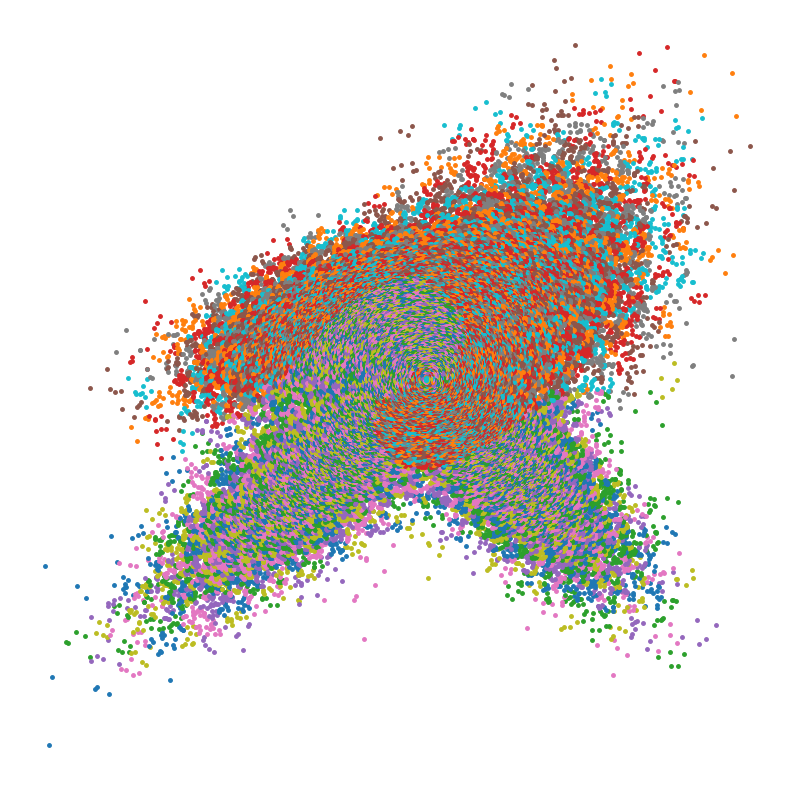

In [6]:
# Vectorized MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
plot_results(clusters)

# STOP HERE

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 4858004.59it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 2762172.70it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 2988460.28it/s]

Number of clusters: 10
Mean of mean distances to centroids: 0.6305178305891925


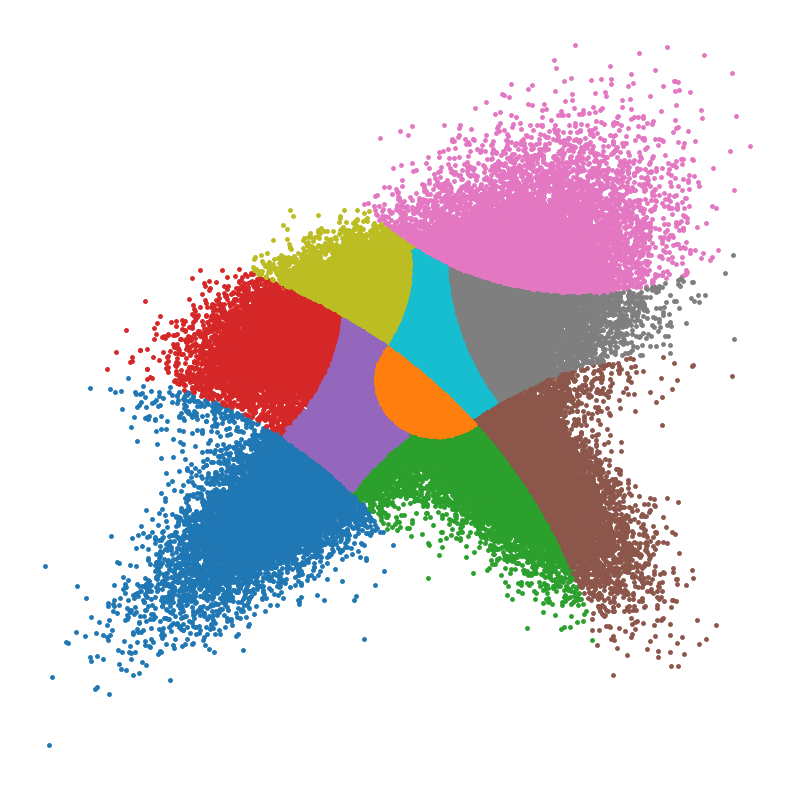

In [7]:
k = 10000
c, cen = mdav(X, len(X) // 2)
c0, cen0 = mdav(c[0], k)
c1, cen1 = mdav(c[1], k)
clusters = np.vstack((c0,c1))
centroids = np.vstack((cen0,cen1))

print_stats(clusters, centroids)
plot_results(clusters)

In [8]:
k = 10000
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, cen00 = mdav(c0[0], k)
c01, cen01 = mdav(c0[1], k)
c10, cen10 = mdav(c1[0], k)
c11, cen11 = mdav(c1[1], k)

clusters = np.vstack((c00,c01,c10,c11))
centroids = np.vstack((cen00,cen01,cen10,cen11))

print_stats(clusters, centroids)
plot_results(clusters)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 4787635.69it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 5376761.36it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 5842788.29it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 6289820.65it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 5590914.42it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 7238047.91it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 5719297.48it/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
k = 5
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, _ = mdav(c0[0], len(c0[0]) // 2)
c01, _ = mdav(c0[1], len(c0[1]) // 2)
c10, _ = mdav(c1[0], len(c1[0]) // 2)
c11, _ = mdav(c1[1], len(c1[1]) // 2)

c000, cen000 = mdav(c00[0], k)
c001, cen001 = mdav(c00[1], k)
c010, cen010 = mdav(c01[0], k)
c011, cen011 = mdav(c01[1], k)
c100, cen100 = mdav(c10[0], k)
c101, cen101 = mdav(c10[1], k)
c110, cen110 = mdav(c11[0], k)
c111, cen111 = mdav(c11[1], k)

clusters = np.vstack(
    (
        c000,
        c001,
        c010,
        c011,
        c100,
        c101,
        c110,
        c111
    )
)

centroids = np.vstack(
    (
        cen000,
        cen001,
        cen010,
        cen011,
        cen100,
        cen101,
        cen110,
        cen111
    )
)

print_stats(clusters, centroids)
#plot_results(clusters)